In [2]:
# Prepare Photo Data
from os import listdir
from os.path import isfile
from pickle import dump
from tqdm import tqdm
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Prepare Text Data
import string

# Load Data
from pickle import load

# Encode Text Data
from keras.preprocessing.text import Tokenizer

# Define Model
from keras.utils import plot_model
from keras.models import Model
from keras.models import load_model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import add
from keras.layers import RepeatVector, TimeDistributed, concatenate, Bidirectional

# Fit Model
import numpy as np
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Evaluate Model
from numpy import argmax, argsort
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu, SmoothingFunction

# Generate Captions
from IPython.display import Image, display

2022-12-21 17:32:36.638373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# preprocess the image for the model
def preprocess_image(filename, image_size):
    #print(filename)
    image = load_img(filename, target_size=(image_size, image_size))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the model
    image = preprocess_input(image)
    return image

In [29]:
# extract features from each photo in the directory
def extract_features(directory, model, image_size):
    # extract features from each photo
    features = dict()
    for name in tqdm(listdir(directory), position=0, leave=True):
        if name.split('.')[-1] == 'jpg':
            # load an image from file
            filename = directory + '/' + name
            #print(directory,name)
            # preprocess the image for the model
            image = preprocess_image(filename, image_size)
            # get features
            feature = model.predict(image, verbose=0)
            # get image id
            image_id = name.split('.')[0]
            # store feature
            features[image_id] = feature
    return features

In [20]:
def plot(model, filename):
    plot_model(model, to_file=filename, show_shapes=True, show_layer_names=False)
    display(Image(filename))

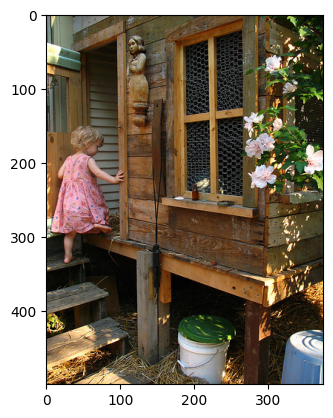

In [21]:
images_path = "../dataset/Flicker8k_Dataset/"
pic = '1000268201_693b08cb0e.jpg'
x=plt.imread(images_path+pic)
plt.imshow(x)
plt.show()
#descriptions['1000268201_693b08cb0e']

In [23]:
from keras.applications.inception_v3 import preprocess_input

In [24]:
# cnn InceptionV3 model
def cnn_inceptionv3():
    # load the model
    model = InceptionV3(weights='imagenet')
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # summarize
    #print(model.summary())
    return model

In [25]:
cnn_inceptionv3 = cnn_inceptionv3()

2022-12-21 17:38:26.703986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 17:38:37.259240: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 24873 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:06:00.0, compute capability: 7.0
2022-12-21 17:38:37.261772: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10880 MB memory:  -> device: 1, name: Tesla V100-SXM2-32GB, pci bus id: 0000:07:00.0, compute capability: 7.0
2022-12-21 17:38:37.264864: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/repli

In [27]:
filename = '../dataset/Pickle/features_inceptionv3.pkl'
# only extract if file does not exist
if not isfile(filename):
    # extract features from all images
    directory = '../dataset/Flicker8k_Dataset'
    features = extract_features(directory, cnn_inceptionv3, 299)
    # save to file
    dump(features, open(filename, 'wb'))

  0%|                                      | 0/16182 [00:00<?, ?it/s]

../dataset/Flicker8k_Dataset 3449718979_e987c64e2d.jpg
../dataset/Flicker8k_Dataset/3449718979_e987c64e2d.jpg


2022-12-21 17:42:34.661711: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-12-21 17:42:35.821857: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
 45%|███████████▎             | 7288/16182 [00:04<00:05, 1655.97it/s]

../dataset/Flicker8k_Dataset 2533010184_ef2fd71297.jpg
../dataset/Flicker8k_Dataset/2533010184_ef2fd71297.jpg
../dataset/Flicker8k_Dataset 495341977_b27279f962.jpg
../dataset/Flicker8k_Dataset/495341977_b27279f962.jpg
../dataset/Flicker8k_Dataset 2985679744_75a7102aab.jpg
../dataset/Flicker8k_Dataset/2985679744_75a7102aab.jpg
../dataset/Flicker8k_Dataset 3667908724_65c7d112f2.jpg
../dataset/Flicker8k_Dataset/3667908724_65c7d112f2.jpg
../dataset/Flicker8k_Dataset 1287982439_6578006e22.jpg
../dataset/Flicker8k_Dataset/1287982439_6578006e22.jpg
../dataset/Flicker8k_Dataset 745563422_f4fa7d9157.jpg
../dataset/Flicker8k_Dataset/745563422_f4fa7d9157.jpg
../dataset/Flicker8k_Dataset 3054200086_657d4398e8.jpg
../dataset/Flicker8k_Dataset/3054200086_657d4398e8.jpg
../dataset/Flicker8k_Dataset 2087317114_cf06df5aa5.jpg
../dataset/Flicker8k_Dataset/2087317114_cf06df5aa5.jpg
../dataset/Flicker8k_Dataset 2595186208_9b16fa0ee3.jpg
../dataset/Flicker8k_Dataset/2595186208_9b16fa0ee3.jpg
../dataset/Fli

 46%|███████████▉              | 7402/16182 [00:14<00:22, 383.82it/s]

../dataset/Flicker8k_Dataset 953941506_5082c9160c.jpg
../dataset/Flicker8k_Dataset/953941506_5082c9160c.jpg
../dataset/Flicker8k_Dataset 2914737181_0c8e052da8.jpg
../dataset/Flicker8k_Dataset/2914737181_0c8e052da8.jpg
../dataset/Flicker8k_Dataset 957682378_46c3b07bcd.jpg
../dataset/Flicker8k_Dataset/957682378_46c3b07bcd.jpg


 46%|███████████▉              | 7404/16182 [00:15<00:23, 376.49it/s]

../dataset/Flicker8k_Dataset 2290589734_b588471345.jpg
../dataset/Flicker8k_Dataset/2290589734_b588471345.jpg
../dataset/Flicker8k_Dataset 2667015110_1670324a33.jpg
../dataset/Flicker8k_Dataset/2667015110_1670324a33.jpg
../dataset/Flicker8k_Dataset 1016887272_03199f49c4.jpg
../dataset/Flicker8k_Dataset/1016887272_03199f49c4.jpg
../dataset/Flicker8k_Dataset 2620113705_a8fa89b8f6.jpg
../dataset/Flicker8k_Dataset/2620113705_a8fa89b8f6.jpg
../dataset/Flicker8k_Dataset 2831656774_36982aafdb.jpg
../dataset/Flicker8k_Dataset/2831656774_36982aafdb.jpg
../dataset/Flicker8k_Dataset 3676788491_01e9bc5f15.jpg
../dataset/Flicker8k_Dataset/3676788491_01e9bc5f15.jpg
../dataset/Flicker8k_Dataset 3658016590_f761e72dc3.jpg
../dataset/Flicker8k_Dataset/3658016590_f761e72dc3.jpg
../dataset/Flicker8k_Dataset 3079073247_97e88e2eb7.jpg
../dataset/Flicker8k_Dataset/3079073247_97e88e2eb7.jpg
../dataset/Flicker8k_Dataset 2086513494_dbbcb583e7.jpg
../dataset/Flicker8k_Dataset/2086513494_dbbcb583e7.jpg
../dataset

 46%|████████████              | 7473/16182 [00:22<00:47, 181.78it/s]

../dataset/Flicker8k_Dataset 2187222896_c206d63396.jpg
../dataset/Flicker8k_Dataset/2187222896_c206d63396.jpg
../dataset/Flicker8k_Dataset 2998504949_1022fec53b.jpg
../dataset/Flicker8k_Dataset/2998504949_1022fec53b.jpg
../dataset/Flicker8k_Dataset 1449370354_380c4123c9.jpg
../dataset/Flicker8k_Dataset/1449370354_380c4123c9.jpg
../dataset/Flicker8k_Dataset 3069786374_804e1123ac.jpg
../dataset/Flicker8k_Dataset/3069786374_804e1123ac.jpg
../dataset/Flicker8k_Dataset 3504479370_ff2d89a043.jpg
../dataset/Flicker8k_Dataset/3504479370_ff2d89a043.jpg
../dataset/Flicker8k_Dataset 2288530008_4ebcee2174.jpg
../dataset/Flicker8k_Dataset/2288530008_4ebcee2174.jpg
../dataset/Flicker8k_Dataset 506412121_67ecc7ec05.jpg
../dataset/Flicker8k_Dataset/506412121_67ecc7ec05.jpg
../dataset/Flicker8k_Dataset 2947452329_08f2d2a467.jpg
../dataset/Flicker8k_Dataset/2947452329_08f2d2a467.jpg
../dataset/Flicker8k_Dataset 3638908276_b1751d30ff.jpg
../dataset/Flicker8k_Dataset/3638908276_b1751d30ff.jpg
../dataset/F

 46%|████████████              | 7511/16182 [00:27<01:07, 128.20it/s]

../dataset/Flicker8k_Dataset 895502702_5170ada2ee.jpg
../dataset/Flicker8k_Dataset/895502702_5170ada2ee.jpg
../dataset/Flicker8k_Dataset 2180480870_dcaf5ac0df.jpg
../dataset/Flicker8k_Dataset/2180480870_dcaf5ac0df.jpg
../dataset/Flicker8k_Dataset 3186527735_6e9fe2cf88.jpg
../dataset/Flicker8k_Dataset/3186527735_6e9fe2cf88.jpg
../dataset/Flicker8k_Dataset 409327234_7b29eecb4e.jpg
../dataset/Flicker8k_Dataset/409327234_7b29eecb4e.jpg
../dataset/Flicker8k_Dataset 472535997_0dbf42b9f3.jpg
../dataset/Flicker8k_Dataset/472535997_0dbf42b9f3.jpg
../dataset/Flicker8k_Dataset 3296226598_1c892c4351.jpg
../dataset/Flicker8k_Dataset/3296226598_1c892c4351.jpg
../dataset/Flicker8k_Dataset 848293676_98e73c52c1.jpg
../dataset/Flicker8k_Dataset/848293676_98e73c52c1.jpg
../dataset/Flicker8k_Dataset 532131603_c82d454c8a.jpg
../dataset/Flicker8k_Dataset/532131603_c82d454c8a.jpg
../dataset/Flicker8k_Dataset 3472485022_5d03e9852d.jpg
../dataset/Flicker8k_Dataset/3472485022_5d03e9852d.jpg
../dataset/Flicker8k

 47%|████████████              | 7535/16182 [00:30<01:24, 101.84it/s]

../dataset/Flicker8k_Dataset 2922512807_d382528a93.jpg
../dataset/Flicker8k_Dataset/2922512807_d382528a93.jpg
../dataset/Flicker8k_Dataset 3272541970_ac0f1de274.jpg
../dataset/Flicker8k_Dataset/3272541970_ac0f1de274.jpg
../dataset/Flicker8k_Dataset 207930963_af3a2f1784.jpg
../dataset/Flicker8k_Dataset/207930963_af3a2f1784.jpg
../dataset/Flicker8k_Dataset 326334188_8850b7bfd4.jpg
../dataset/Flicker8k_Dataset/326334188_8850b7bfd4.jpg
../dataset/Flicker8k_Dataset 3167379087_927ff05a35.jpg
../dataset/Flicker8k_Dataset/3167379087_927ff05a35.jpg
../dataset/Flicker8k_Dataset 3226254560_2f8ac147ea.jpg
../dataset/Flicker8k_Dataset/3226254560_2f8ac147ea.jpg
../dataset/Flicker8k_Dataset 469029994_349e138606.jpg
../dataset/Flicker8k_Dataset/469029994_349e138606.jpg
../dataset/Flicker8k_Dataset 101654506_8eb26cfb60.jpg
../dataset/Flicker8k_Dataset/101654506_8eb26cfb60.jpg
../dataset/Flicker8k_Dataset 3604928725_58147c87cd.jpg
../dataset/Flicker8k_Dataset/3604928725_58147c87cd.jpg
../dataset/Flicker

 47%|████████████▌              | 7551/16182 [00:31<01:38, 87.23it/s]

../dataset/Flicker8k_Dataset 3098714492_19939e3b19.jpg
../dataset/Flicker8k_Dataset/3098714492_19939e3b19.jpg
../dataset/Flicker8k_Dataset 2710416789_555180e399.jpg
../dataset/Flicker8k_Dataset/2710416789_555180e399.jpg
../dataset/Flicker8k_Dataset 2883907436_82bf4a36b8.jpg
../dataset/Flicker8k_Dataset/2883907436_82bf4a36b8.jpg
../dataset/Flicker8k_Dataset 2632366677_43dee456a5.jpg
../dataset/Flicker8k_Dataset/2632366677_43dee456a5.jpg
../dataset/Flicker8k_Dataset 2561341745_2d77d3ff7d.jpg
../dataset/Flicker8k_Dataset/2561341745_2d77d3ff7d.jpg
../dataset/Flicker8k_Dataset 430964917_022995afb6.jpg
../dataset/Flicker8k_Dataset/430964917_022995afb6.jpg
../dataset/Flicker8k_Dataset 1659396176_ced00a549f.jpg
../dataset/Flicker8k_Dataset/1659396176_ced00a549f.jpg
../dataset/Flicker8k_Dataset 3328247381_a9f7fb4898.jpg
../dataset/Flicker8k_Dataset/3328247381_a9f7fb4898.jpg
../dataset/Flicker8k_Dataset 630476551_2ee7399f77.jpg
../dataset/Flicker8k_Dataset/630476551_2ee7399f77.jpg
../dataset/Fli

 47%|████████████▌              | 7562/16182 [00:33<01:56, 73.79it/s]

../dataset/Flicker8k_Dataset 429851331_b248ca01cd.jpg
../dataset/Flicker8k_Dataset/429851331_b248ca01cd.jpg
../dataset/Flicker8k_Dataset 3419634480_c390f62a6e.jpg
../dataset/Flicker8k_Dataset/3419634480_c390f62a6e.jpg
../dataset/Flicker8k_Dataset 2199083344_3aa77f4879.jpg
../dataset/Flicker8k_Dataset/2199083344_3aa77f4879.jpg
../dataset/Flicker8k_Dataset 2256138896_3e24b0b28d.jpg
../dataset/Flicker8k_Dataset/2256138896_3e24b0b28d.jpg
../dataset/Flicker8k_Dataset 3568605391_54ec367d88.jpg
../dataset/Flicker8k_Dataset/3568605391_54ec367d88.jpg
../dataset/Flicker8k_Dataset 2279945145_8815c59217.jpg
../dataset/Flicker8k_Dataset/2279945145_8815c59217.jpg
../dataset/Flicker8k_Dataset 2962977152_9d6958fdd5.jpg
../dataset/Flicker8k_Dataset/2962977152_9d6958fdd5.jpg
../dataset/Flicker8k_Dataset 2502007071_82a8c639cf.jpg
../dataset/Flicker8k_Dataset/2502007071_82a8c639cf.jpg


 47%|████████████▋              | 7570/16182 [00:34<02:08, 66.95it/s]

../dataset/Flicker8k_Dataset 191592626_477ef5e026.jpg
../dataset/Flicker8k_Dataset/191592626_477ef5e026.jpg
../dataset/Flicker8k_Dataset 3697675767_97796334e4.jpg
../dataset/Flicker8k_Dataset/3697675767_97796334e4.jpg
../dataset/Flicker8k_Dataset 2598979962_c01811cfca.jpg
../dataset/Flicker8k_Dataset/2598979962_c01811cfca.jpg
../dataset/Flicker8k_Dataset 3446191973_1db572ed8a.jpg
../dataset/Flicker8k_Dataset/3446191973_1db572ed8a.jpg
../dataset/Flicker8k_Dataset 3697379772_40d831392b.jpg
../dataset/Flicker8k_Dataset/3697379772_40d831392b.jpg
../dataset/Flicker8k_Dataset 3137061312_eb5fdcf3fd.jpg
../dataset/Flicker8k_Dataset/3137061312_eb5fdcf3fd.jpg
../dataset/Flicker8k_Dataset 1332722096_1e3de8ae70.jpg
../dataset/Flicker8k_Dataset/1332722096_1e3de8ae70.jpg
../dataset/Flicker8k_Dataset 3382105769_b1a4e4c60d.jpg
../dataset/Flicker8k_Dataset/3382105769_b1a4e4c60d.jpg


 47%|████████████▋              | 7576/16182 [00:35<02:33, 56.09it/s]

../dataset/Flicker8k_Dataset 3132832452_c354c6396c.jpg
../dataset/Flicker8k_Dataset/3132832452_c354c6396c.jpg
../dataset/Flicker8k_Dataset 109260218_fca831f933.jpg
../dataset/Flicker8k_Dataset/109260218_fca831f933.jpg
../dataset/Flicker8k_Dataset 2129430111_338a94f8fb.jpg
../dataset/Flicker8k_Dataset/2129430111_338a94f8fb.jpg
../dataset/Flicker8k_Dataset 2825668136_107223182c.jpg
../dataset/Flicker8k_Dataset/2825668136_107223182c.jpg


 47%|████████████▋              | 7580/16182 [00:35<02:45, 51.87it/s]

../dataset/Flicker8k_Dataset 2540757246_5a849fbdcb.jpg
../dataset/Flicker8k_Dataset/2540757246_5a849fbdcb.jpg
../dataset/Flicker8k_Dataset 3670907052_c827593564.jpg
../dataset/Flicker8k_Dataset/3670907052_c827593564.jpg
../dataset/Flicker8k_Dataset 1042020065_fb3d3ba5ba.jpg
../dataset/Flicker8k_Dataset/1042020065_fb3d3ba5ba.jpg


 47%|████████████▋              | 7583/16182 [00:35<02:56, 48.71it/s]

../dataset/Flicker8k_Dataset 2939475047_84585ea45c.jpg
../dataset/Flicker8k_Dataset/2939475047_84585ea45c.jpg
../dataset/Flicker8k_Dataset 3280644151_3d89cb1e0e.jpg
../dataset/Flicker8k_Dataset/3280644151_3d89cb1e0e.jpg
../dataset/Flicker8k_Dataset 181777261_84c48b31cb.jpg
../dataset/Flicker8k_Dataset/181777261_84c48b31cb.jpg


 47%|████████████▋              | 7588/16182 [00:36<03:23, 42.16it/s]

../dataset/Flicker8k_Dataset 3322443827_a04a94bb91.jpg
../dataset/Flicker8k_Dataset/3322443827_a04a94bb91.jpg
../dataset/Flicker8k_Dataset 2826030193_4278ccb833.jpg
../dataset/Flicker8k_Dataset/2826030193_4278ccb833.jpg
../dataset/Flicker8k_Dataset 2294516804_11e255807a.jpg
../dataset/Flicker8k_Dataset/2294516804_11e255807a.jpg


 47%|████████████▋              | 7590/16182 [00:36<03:41, 38.82it/s]

../dataset/Flicker8k_Dataset 640409060_6af18fdd54.jpg
../dataset/Flicker8k_Dataset/640409060_6af18fdd54.jpg
../dataset/Flicker8k_Dataset 3051998298_38da5746fa.jpg
../dataset/Flicker8k_Dataset/3051998298_38da5746fa.jpg
../dataset/Flicker8k_Dataset 3197917064_e679a44b8e.jpg
../dataset/Flicker8k_Dataset/3197917064_e679a44b8e.jpg


 47%|████████████▋              | 7594/16182 [00:36<04:37, 30.94it/s]

../dataset/Flicker8k_Dataset 2850719435_221f15e951.jpg
../dataset/Flicker8k_Dataset/2850719435_221f15e951.jpg
../dataset/Flicker8k_Dataset 2376694294_9a4ecc3b90.jpg
../dataset/Flicker8k_Dataset/2376694294_9a4ecc3b90.jpg
../dataset/Flicker8k_Dataset 3380364224_2626d9d354.jpg
../dataset/Flicker8k_Dataset/3380364224_2626d9d354.jpg


 47%|████████████▋              | 7596/16182 [00:37<05:20, 26.77it/s]

../dataset/Flicker8k_Dataset 2392460773_2aa01eb340.jpg
../dataset/Flicker8k_Dataset/2392460773_2aa01eb340.jpg
../dataset/Flicker8k_Dataset 1211015912_9f3ee3a995.jpg
../dataset/Flicker8k_Dataset/1211015912_9f3ee3a995.jpg
../dataset/Flicker8k_Dataset 236095031_5cb17dc54a.jpg
../dataset/Flicker8k_Dataset/236095031_5cb17dc54a.jpg


 47%|████████████▋              | 7598/16182 [00:37<06:14, 22.91it/s]

../dataset/Flicker8k_Dataset 1456393634_74022d9056.jpg
../dataset/Flicker8k_Dataset/1456393634_74022d9056.jpg
../dataset/Flicker8k_Dataset 421730441_6b2267fd31.jpg
../dataset/Flicker8k_Dataset/421730441_6b2267fd31.jpg


 47%|████████████▋              | 7600/16182 [00:37<08:06, 17.63it/s]

../dataset/Flicker8k_Dataset 3111502208_71e2a414f5.jpg
../dataset/Flicker8k_Dataset/3111502208_71e2a414f5.jpg


 47%|████████████▋              | 7603/16182 [00:38<13:08, 10.88it/s]

../dataset/Flicker8k_Dataset 3175434849_859f09fe07.jpg
../dataset/Flicker8k_Dataset/3175434849_859f09fe07.jpg
../dataset/Flicker8k_Dataset 254901702_67ada9867c.jpg
../dataset/Flicker8k_Dataset/254901702_67ada9867c.jpg
../dataset/Flicker8k_Dataset 401476986_73918145a3.jpg
../dataset/Flicker8k_Dataset/401476986_73918145a3.jpg


 47%|████████████▋              | 7605/16182 [00:38<13:36, 10.50it/s]

../dataset/Flicker8k_Dataset 3422394336_e465f60b7c.jpg
../dataset/Flicker8k_Dataset/3422394336_e465f60b7c.jpg
../dataset/Flicker8k_Dataset 2247192427_5e106f24a9.jpg
../dataset/Flicker8k_Dataset/2247192427_5e106f24a9.jpg
../dataset/Flicker8k_Dataset 3484649669_7bfe62080b.jpg
../dataset/Flicker8k_Dataset/3484649669_7bfe62080b.jpg


 47%|████████████▋              | 7609/16182 [00:38<13:30, 10.58it/s]

../dataset/Flicker8k_Dataset 3422146099_35ffc8680e.jpg
../dataset/Flicker8k_Dataset/3422146099_35ffc8680e.jpg
../dataset/Flicker8k_Dataset 3209966887_5b744bd050.jpg
../dataset/Flicker8k_Dataset/3209966887_5b744bd050.jpg
../dataset/Flicker8k_Dataset 2716457668_187a6d2b1c.jpg
../dataset/Flicker8k_Dataset/2716457668_187a6d2b1c.jpg


 47%|████████████▋              | 7611/16182 [00:39<13:22, 10.68it/s]

../dataset/Flicker8k_Dataset 3009383694_e045c6169e.jpg
../dataset/Flicker8k_Dataset/3009383694_e045c6169e.jpg
../dataset/Flicker8k_Dataset 3445296377_1e5082b44b.jpg
../dataset/Flicker8k_Dataset/3445296377_1e5082b44b.jpg
../dataset/Flicker8k_Dataset 3081182021_22cfa18dd4.jpg
../dataset/Flicker8k_Dataset/3081182021_22cfa18dd4.jpg


 47%|████████████▋              | 7615/16182 [00:39<13:28, 10.59it/s]

../dataset/Flicker8k_Dataset 2604825598_593a825b5b.jpg
../dataset/Flicker8k_Dataset/2604825598_593a825b5b.jpg
../dataset/Flicker8k_Dataset 3564742915_5f940b95b4.jpg
../dataset/Flicker8k_Dataset/3564742915_5f940b95b4.jpg
../dataset/Flicker8k_Dataset 309238565_2d5d8dc8bf.jpg
../dataset/Flicker8k_Dataset/309238565_2d5d8dc8bf.jpg


 47%|████████████▋              | 7617/16182 [00:39<13:20, 10.70it/s]

../dataset/Flicker8k_Dataset 3532587748_7e64bb223a.jpg
../dataset/Flicker8k_Dataset/3532587748_7e64bb223a.jpg
../dataset/Flicker8k_Dataset 2090997177_76d482b158.jpg
../dataset/Flicker8k_Dataset/2090997177_76d482b158.jpg
../dataset/Flicker8k_Dataset 1745110280_0cbff5e273.jpg
../dataset/Flicker8k_Dataset/1745110280_0cbff5e273.jpg


 47%|████████████▋              | 7621/16182 [00:40<13:17, 10.74it/s]

../dataset/Flicker8k_Dataset 2447284966_d6bbdb4b6e.jpg
../dataset/Flicker8k_Dataset/2447284966_d6bbdb4b6e.jpg
../dataset/Flicker8k_Dataset 3711826708_bba64fb1e1.jpg
../dataset/Flicker8k_Dataset/3711826708_bba64fb1e1.jpg
../dataset/Flicker8k_Dataset 397451339_76a84bd310.jpg
../dataset/Flicker8k_Dataset/397451339_76a84bd310.jpg


 47%|████████████▋              | 7623/16182 [00:40<14:20,  9.95it/s]

../dataset/Flicker8k_Dataset 2549968784_39bfbe44f9.jpg
../dataset/Flicker8k_Dataset/2549968784_39bfbe44f9.jpg
../dataset/Flicker8k_Dataset 1482960952_95f2d419cb.jpg
../dataset/Flicker8k_Dataset/1482960952_95f2d419cb.jpg


 47%|████████████▋              | 7625/16182 [00:40<16:37,  8.58it/s]

../dataset/Flicker8k_Dataset 2562347802_c049a2ba88.jpg
../dataset/Flicker8k_Dataset/2562347802_c049a2ba88.jpg
../dataset/Flicker8k_Dataset 1570723692_3a2b064d43.jpg
../dataset/Flicker8k_Dataset/1570723692_3a2b064d43.jpg


 47%|████████████▋              | 7628/16182 [00:41<20:20,  7.01it/s]

../dataset/Flicker8k_Dataset 191003284_1025b0fb7d.jpg
../dataset/Flicker8k_Dataset/191003284_1025b0fb7d.jpg
../dataset/Flicker8k_Dataset 3250593457_9049a73b61.jpg
../dataset/Flicker8k_Dataset/3250593457_9049a73b61.jpg


 47%|████████████▋              | 7630/16182 [00:41<18:14,  7.82it/s]

../dataset/Flicker8k_Dataset 2324979199_4193ef7537.jpg
../dataset/Flicker8k_Dataset/2324979199_4193ef7537.jpg
../dataset/Flicker8k_Dataset 2890731828_8a7032503a.jpg
../dataset/Flicker8k_Dataset/2890731828_8a7032503a.jpg
../dataset/Flicker8k_Dataset 2771424045_1fdf9617eb.jpg
../dataset/Flicker8k_Dataset/2771424045_1fdf9617eb.jpg


 47%|████████████▋              | 7632/16182 [00:41<17:05,  8.33it/s]

../dataset/Flicker8k_Dataset 2471974379_a4a4d2b389.jpg
../dataset/Flicker8k_Dataset/2471974379_a4a4d2b389.jpg
../dataset/Flicker8k_Dataset 2554570943_122da6438f.jpg
../dataset/Flicker8k_Dataset/2554570943_122da6438f.jpg


 47%|████████████▋              | 7635/16182 [00:41<15:17,  9.31it/s]

../dataset/Flicker8k_Dataset 3638459638_ec74e3ff89.jpg
../dataset/Flicker8k_Dataset/3638459638_ec74e3ff89.jpg
../dataset/Flicker8k_Dataset 247097023_e656d5854d.jpg
../dataset/Flicker8k_Dataset/247097023_e656d5854d.jpg
../dataset/Flicker8k_Dataset 3372022051_132b8e6233.jpg
../dataset/Flicker8k_Dataset/3372022051_132b8e6233.jpg


 47%|████████████▋              | 7637/16182 [00:42<14:20,  9.93it/s]

../dataset/Flicker8k_Dataset 3713922357_e0a013fb97.jpg
../dataset/Flicker8k_Dataset/3713922357_e0a013fb97.jpg
../dataset/Flicker8k_Dataset 872512911_ca383b40e4.jpg
../dataset/Flicker8k_Dataset/872512911_ca383b40e4.jpg
../dataset/Flicker8k_Dataset 2960422620_81889a3764.jpg
../dataset/Flicker8k_Dataset/2960422620_81889a3764.jpg


 47%|████████████▋              | 7641/16182 [00:42<13:31, 10.53it/s]

../dataset/Flicker8k_Dataset 177302997_5b2d770a0a.jpg
../dataset/Flicker8k_Dataset/177302997_5b2d770a0a.jpg
../dataset/Flicker8k_Dataset 294549892_babb130543.jpg
../dataset/Flicker8k_Dataset/294549892_babb130543.jpg
../dataset/Flicker8k_Dataset 2189995738_352607a63b.jpg
../dataset/Flicker8k_Dataset/2189995738_352607a63b.jpg


 47%|████████████▊              | 7643/16182 [00:42<13:36, 10.46it/s]

../dataset/Flicker8k_Dataset 3187395715_f2940c2b72.jpg
../dataset/Flicker8k_Dataset/3187395715_f2940c2b72.jpg
../dataset/Flicker8k_Dataset 3583321426_f373c52161.jpg
../dataset/Flicker8k_Dataset/3583321426_f373c52161.jpg


 47%|████████████▊              | 7645/16182 [00:42<14:16,  9.97it/s]

../dataset/Flicker8k_Dataset 2955673642_4279b32097.jpg
../dataset/Flicker8k_Dataset/2955673642_4279b32097.jpg
../dataset/Flicker8k_Dataset 2217328285_b1d55c17ca.jpg
../dataset/Flicker8k_Dataset/2217328285_b1d55c17ca.jpg


 47%|████████████▊              | 7647/16182 [00:43<13:58, 10.18it/s]

../dataset/Flicker8k_Dataset 2938316391_97382d14aa.jpg
../dataset/Flicker8k_Dataset/2938316391_97382d14aa.jpg
../dataset/Flicker8k_Dataset 2346401538_f5e8da66fc.jpg
../dataset/Flicker8k_Dataset/2346401538_f5e8da66fc.jpg
../dataset/Flicker8k_Dataset 2405978603_6221b0c2e7.jpg
../dataset/Flicker8k_Dataset/2405978603_6221b0c2e7.jpg


 47%|████████████▊              | 7650/16182 [00:43<20:43,  6.86it/s]

../dataset/Flicker8k_Dataset 742073622_1206be8f7f.jpg
../dataset/Flicker8k_Dataset/742073622_1206be8f7f.jpg
../dataset/Flicker8k_Dataset 3266399073_40820596d5.jpg
../dataset/Flicker8k_Dataset/3266399073_40820596d5.jpg
../dataset/Flicker8k_Dataset 3216085740_699c2ce1ae.jpg
../dataset/Flicker8k_Dataset/3216085740_699c2ce1ae.jpg


 47%|████████████▊              | 7654/16182 [00:44<16:31,  8.60it/s]

../dataset/Flicker8k_Dataset 322050103_145f7233c6.jpg
../dataset/Flicker8k_Dataset/322050103_145f7233c6.jpg
../dataset/Flicker8k_Dataset 2064780645_8f28a1529f.jpg
../dataset/Flicker8k_Dataset/2064780645_8f28a1529f.jpg
../dataset/Flicker8k_Dataset 3275065565_9e2a640fbc.jpg
../dataset/Flicker8k_Dataset/3275065565_9e2a640fbc.jpg


 47%|████████████▊              | 7656/16182 [00:44<15:18,  9.29it/s]

../dataset/Flicker8k_Dataset 3287904625_f68ca5cea7.jpg
../dataset/Flicker8k_Dataset/3287904625_f68ca5cea7.jpg
../dataset/Flicker8k_Dataset 3673878924_506c9d767b.jpg
../dataset/Flicker8k_Dataset/3673878924_506c9d767b.jpg
../dataset/Flicker8k_Dataset 3544669026_1b5c0e6316.jpg
../dataset/Flicker8k_Dataset/3544669026_1b5c0e6316.jpg


 47%|████████████▊              | 7660/16182 [00:44<14:04, 10.10it/s]

../dataset/Flicker8k_Dataset 3671851846_60c25269df.jpg
../dataset/Flicker8k_Dataset/3671851846_60c25269df.jpg
../dataset/Flicker8k_Dataset 2210368267_0615754b48.jpg
../dataset/Flicker8k_Dataset/2210368267_0615754b48.jpg
../dataset/Flicker8k_Dataset 3649387275_75295baa28.jpg
../dataset/Flicker8k_Dataset/3649387275_75295baa28.jpg


 47%|████████████▊              | 7662/16182 [00:44<13:52, 10.23it/s]

../dataset/Flicker8k_Dataset 2282895743_f803f1cf01.jpg
../dataset/Flicker8k_Dataset/2282895743_f803f1cf01.jpg
../dataset/Flicker8k_Dataset 358114269_96fdb5f7c3.jpg
../dataset/Flicker8k_Dataset/358114269_96fdb5f7c3.jpg
../dataset/Flicker8k_Dataset 3213395965_2a823c6865.jpg
../dataset/Flicker8k_Dataset/3213395965_2a823c6865.jpg


 47%|████████████▊              | 7666/16182 [00:45<14:02, 10.10it/s]

../dataset/Flicker8k_Dataset 2642688531_8fb68b2147.jpg
../dataset/Flicker8k_Dataset/2642688531_8fb68b2147.jpg
../dataset/Flicker8k_Dataset 2932740428_b15384f389.jpg
../dataset/Flicker8k_Dataset/2932740428_b15384f389.jpg
../dataset/Flicker8k_Dataset 1138784872_69ade3f2ab.jpg
../dataset/Flicker8k_Dataset/1138784872_69ade3f2ab.jpg


 47%|████████████▊              | 7668/16182 [00:45<13:48, 10.27it/s]

../dataset/Flicker8k_Dataset 2689491604_d8760f57b4.jpg
../dataset/Flicker8k_Dataset/2689491604_d8760f57b4.jpg
../dataset/Flicker8k_Dataset 1352398363_9cc8ffcce9.jpg
../dataset/Flicker8k_Dataset/1352398363_9cc8ffcce9.jpg
../dataset/Flicker8k_Dataset 2589241160_3832440850.jpg
../dataset/Flicker8k_Dataset/2589241160_3832440850.jpg


 47%|████████████▊              | 7670/16182 [00:45<14:16,  9.93it/s]

../dataset/Flicker8k_Dataset 436013859_793d870b6f.jpg
../dataset/Flicker8k_Dataset/436013859_793d870b6f.jpg
../dataset/Flicker8k_Dataset 3527524436_a54aca78a9.jpg
../dataset/Flicker8k_Dataset/3527524436_a54aca78a9.jpg


 47%|████████████▊              | 7672/16182 [00:45<15:00,  9.45it/s]

../dataset/Flicker8k_Dataset 3679405397_bb130ea3c2.jpg
../dataset/Flicker8k_Dataset/3679405397_bb130ea3c2.jpg


 47%|████████████▊              | 7675/16182 [00:46<19:11,  7.39it/s]

../dataset/Flicker8k_Dataset 3356901257_83811a19eb.jpg
../dataset/Flicker8k_Dataset/3356901257_83811a19eb.jpg
../dataset/Flicker8k_Dataset 3477778668_81ff0a68e0.jpg
../dataset/Flicker8k_Dataset/3477778668_81ff0a68e0.jpg
../dataset/Flicker8k_Dataset 661755629_602ea4cf09.jpg
../dataset/Flicker8k_Dataset/661755629_602ea4cf09.jpg


 47%|████████████▊              | 7678/16182 [00:46<16:49,  8.42it/s]

../dataset/Flicker8k_Dataset 418616992_22090c6195.jpg
../dataset/Flicker8k_Dataset/418616992_22090c6195.jpg
../dataset/Flicker8k_Dataset 2597873827_a5cb3e57ba.jpg
../dataset/Flicker8k_Dataset/2597873827_a5cb3e57ba.jpg
../dataset/Flicker8k_Dataset 2890075175_4bd32b201a.jpg
../dataset/Flicker8k_Dataset/2890075175_4bd32b201a.jpg


 47%|████████████▊              | 7680/16182 [00:46<15:50,  8.95it/s]

../dataset/Flicker8k_Dataset 427936315_0b8f7b8d23.jpg
../dataset/Flicker8k_Dataset/427936315_0b8f7b8d23.jpg
../dataset/Flicker8k_Dataset 3549997413_01388dece0.jpg
../dataset/Flicker8k_Dataset/3549997413_01388dece0.jpg


 47%|████████████▊              | 7682/16182 [00:47<15:23,  9.20it/s]

../dataset/Flicker8k_Dataset 392976422_c8d0514bc3.jpg
../dataset/Flicker8k_Dataset/392976422_c8d0514bc3.jpg
../dataset/Flicker8k_Dataset 1319634306_816f21677f.jpg
../dataset/Flicker8k_Dataset/1319634306_816f21677f.jpg


 47%|████████████▊              | 7684/16182 [00:47<15:41,  9.02it/s]

../dataset/Flicker8k_Dataset 2949014128_0d96196261.jpg
../dataset/Flicker8k_Dataset/2949014128_0d96196261.jpg
../dataset/Flicker8k_Dataset 2465691083_894fc48af6.jpg
../dataset/Flicker8k_Dataset/2465691083_894fc48af6.jpg
../dataset/Flicker8k_Dataset 3222749441_3bdfe088e3.jpg
../dataset/Flicker8k_Dataset/3222749441_3bdfe088e3.jpg


 48%|████████████▊              | 7688/16182 [00:47<14:02, 10.08it/s]

../dataset/Flicker8k_Dataset 2769731772_18c44c18e2.jpg
../dataset/Flicker8k_Dataset/2769731772_18c44c18e2.jpg
../dataset/Flicker8k_Dataset 2084103826_ffd76b1e3e.jpg
../dataset/Flicker8k_Dataset/2084103826_ffd76b1e3e.jpg
../dataset/Flicker8k_Dataset 173020287_230bfc4ffc.jpg
../dataset/Flicker8k_Dataset/173020287_230bfc4ffc.jpg


 48%|████████████▊              | 7691/16182 [00:48<13:46, 10.27it/s]

../dataset/Flicker8k_Dataset 1806580620_a8fe0fb9f8.jpg
../dataset/Flicker8k_Dataset/1806580620_a8fe0fb9f8.jpg
../dataset/Flicker8k_Dataset 241345533_99c731403a.jpg
../dataset/Flicker8k_Dataset/241345533_99c731403a.jpg
../dataset/Flicker8k_Dataset 370442541_60d93ecd13.jpg
../dataset/Flicker8k_Dataset/370442541_60d93ecd13.jpg


 48%|████████████▊              | 7693/16182 [00:48<13:23, 10.57it/s]

../dataset/Flicker8k_Dataset 664341930_bd5c8b60ea.jpg
../dataset/Flicker8k_Dataset/664341930_bd5c8b60ea.jpg
../dataset/Flicker8k_Dataset 2679926555_b11cf45595.jpg
../dataset/Flicker8k_Dataset/2679926555_b11cf45595.jpg
../dataset/Flicker8k_Dataset 590445887_4d4fa43923.jpg
../dataset/Flicker8k_Dataset/590445887_4d4fa43923.jpg


 48%|████████████▊              | 7695/16182 [00:48<13:58, 10.12it/s]

../dataset/Flicker8k_Dataset 428485639_a82635d6ee.jpg
../dataset/Flicker8k_Dataset/428485639_a82635d6ee.jpg


 48%|████████████▊              | 7697/16182 [00:48<20:59,  6.74it/s]

../dataset/Flicker8k_Dataset 3532412342_e0a004b404.jpg
../dataset/Flicker8k_Dataset/3532412342_e0a004b404.jpg
../dataset/Flicker8k_Dataset 3673484638_dce87295fe.jpg
../dataset/Flicker8k_Dataset/3673484638_dce87295fe.jpg
../dataset/Flicker8k_Dataset 3503471307_464a8f588c.jpg
../dataset/Flicker8k_Dataset/3503471307_464a8f588c.jpg


 48%|████████████▊              | 7701/16182 [00:49<16:48,  8.41it/s]

../dataset/Flicker8k_Dataset 3424851862_0f51c42922.jpg
../dataset/Flicker8k_Dataset/3424851862_0f51c42922.jpg
../dataset/Flicker8k_Dataset 3522989916_f20319cc59.jpg
../dataset/Flicker8k_Dataset/3522989916_f20319cc59.jpg
../dataset/Flicker8k_Dataset 3432730942_4dc4685277.jpg
../dataset/Flicker8k_Dataset/3432730942_4dc4685277.jpg


 48%|████████████▊              | 7703/16182 [00:49<16:32,  8.54it/s]

../dataset/Flicker8k_Dataset 1142847777_2a0c1c2551.jpg
../dataset/Flicker8k_Dataset/1142847777_2a0c1c2551.jpg
../dataset/Flicker8k_Dataset 1324816249_86600a6759.jpg
../dataset/Flicker8k_Dataset/1324816249_86600a6759.jpg


 48%|████████████▊              | 7705/16182 [00:49<15:38,  9.03it/s]

../dataset/Flicker8k_Dataset 2918880895_e61f74f2f0.jpg
../dataset/Flicker8k_Dataset/2918880895_e61f74f2f0.jpg
../dataset/Flicker8k_Dataset 3344632789_af90d54746.jpg
../dataset/Flicker8k_Dataset/3344632789_af90d54746.jpg
../dataset/Flicker8k_Dataset 3449114979_6cdc3e8da8.jpg
../dataset/Flicker8k_Dataset/3449114979_6cdc3e8da8.jpg


 48%|████████████▊              | 7708/16182 [00:50<14:46,  9.56it/s]

../dataset/Flicker8k_Dataset 3019667009_20db160195.jpg
../dataset/Flicker8k_Dataset/3019667009_20db160195.jpg
../dataset/Flicker8k_Dataset 1469358746_2a879abaf3.jpg
../dataset/Flicker8k_Dataset/1469358746_2a879abaf3.jpg
../dataset/Flicker8k_Dataset 300274198_eefd8e057e.jpg
../dataset/Flicker8k_Dataset/300274198_eefd8e057e.jpg


 48%|████████████▊              | 7712/16182 [00:50<13:57, 10.11it/s]

../dataset/Flicker8k_Dataset 315436114_6d386b8c36.jpg
../dataset/Flicker8k_Dataset/315436114_6d386b8c36.jpg
../dataset/Flicker8k_Dataset 485566887_57eac33bd1.jpg
../dataset/Flicker8k_Dataset/485566887_57eac33bd1.jpg
../dataset/Flicker8k_Dataset 3642220260_3aa8a52670.jpg
../dataset/Flicker8k_Dataset/3642220260_3aa8a52670.jpg


 48%|████████████▊              | 7714/16182 [00:50<13:41, 10.31it/s]

../dataset/Flicker8k_Dataset 1119463452_69d4eecd08.jpg
../dataset/Flicker8k_Dataset/1119463452_69d4eecd08.jpg
../dataset/Flicker8k_Dataset 3484842724_ef1124c87a.jpg
../dataset/Flicker8k_Dataset/3484842724_ef1124c87a.jpg
../dataset/Flicker8k_Dataset 3515451715_ac5ac04efa.jpg
../dataset/Flicker8k_Dataset/3515451715_ac5ac04efa.jpg


 48%|████████████▊              | 7716/16182 [00:50<13:33, 10.40it/s]

../dataset/Flicker8k_Dataset 3052038928_9f53aa2084.jpg
../dataset/Flicker8k_Dataset/3052038928_9f53aa2084.jpg
../dataset/Flicker8k_Dataset 649596742_5ba84ce946.jpg
../dataset/Flicker8k_Dataset/649596742_5ba84ce946.jpg


 48%|████████████▉              | 7718/16182 [00:51<14:30,  9.72it/s]

../dataset/Flicker8k_Dataset 2054869561_ff723e9eab.jpg
../dataset/Flicker8k_Dataset/2054869561_ff723e9eab.jpg


 48%|████████████▉              | 7721/16182 [00:51<19:37,  7.18it/s]

../dataset/Flicker8k_Dataset 2208310655_a3d83080c5.jpg
../dataset/Flicker8k_Dataset/2208310655_a3d83080c5.jpg
../dataset/Flicker8k_Dataset 3249062399_0dafe5e4f5.jpg
../dataset/Flicker8k_Dataset/3249062399_0dafe5e4f5.jpg
../dataset/Flicker8k_Dataset 3400385314_a5bc062e97.jpg
../dataset/Flicker8k_Dataset/3400385314_a5bc062e97.jpg


 48%|████████████▉              | 7724/16182 [00:51<17:07,  8.23it/s]

../dataset/Flicker8k_Dataset 3107059919_0594269f72.jpg
../dataset/Flicker8k_Dataset/3107059919_0594269f72.jpg
../dataset/Flicker8k_Dataset 415118186_64defc96f3.jpg
../dataset/Flicker8k_Dataset/415118186_64defc96f3.jpg
../dataset/Flicker8k_Dataset 3760400645_3ba51d27f9.jpg
../dataset/Flicker8k_Dataset/3760400645_3ba51d27f9.jpg


 48%|████████████▉              | 7726/16182 [00:52<15:59,  8.82it/s]

../dataset/Flicker8k_Dataset 2095435987_1b7591d214.jpg
../dataset/Flicker8k_Dataset/2095435987_1b7591d214.jpg
../dataset/Flicker8k_Dataset 3717309680_e5105afa6d.jpg
../dataset/Flicker8k_Dataset/3717309680_e5105afa6d.jpg
../dataset/Flicker8k_Dataset 3030223792_02b6f2be99.jpg
../dataset/Flicker8k_Dataset/3030223792_02b6f2be99.jpg


 48%|████████████▉              | 7730/16182 [00:52<14:18,  9.84it/s]

../dataset/Flicker8k_Dataset 2930622766_fa8f84deb1.jpg
../dataset/Flicker8k_Dataset/2930622766_fa8f84deb1.jpg
../dataset/Flicker8k_Dataset 3566225740_375fc15dde.jpg
../dataset/Flicker8k_Dataset/3566225740_375fc15dde.jpg
../dataset/Flicker8k_Dataset 576093768_e78f91c176.jpg
../dataset/Flicker8k_Dataset/576093768_e78f91c176.jpg


 48%|████████████▉              | 7732/16182 [00:52<13:50, 10.17it/s]

../dataset/Flicker8k_Dataset 2709359730_13bca100af.jpg
../dataset/Flicker8k_Dataset/2709359730_13bca100af.jpg
../dataset/Flicker8k_Dataset 3017373346_3a34c3fe9d.jpg
../dataset/Flicker8k_Dataset/3017373346_3a34c3fe9d.jpg
../dataset/Flicker8k_Dataset 302983277_69a4e732e4.jpg
../dataset/Flicker8k_Dataset/302983277_69a4e732e4.jpg


 48%|████████████▉              | 7734/16182 [00:52<13:33, 10.38it/s]

../dataset/Flicker8k_Dataset 3441104823_33cdae5a56.jpg
../dataset/Flicker8k_Dataset/3441104823_33cdae5a56.jpg
../dataset/Flicker8k_Dataset 539751252_2bd88c456b.jpg
../dataset/Flicker8k_Dataset/539751252_2bd88c456b.jpg


 48%|████████████▉              | 7742/16182 [00:53<08:30, 16.54it/s]

../dataset/Flicker8k_Dataset 3623302162_099f983d58.jpg
../dataset/Flicker8k_Dataset/3623302162_099f983d58.jpg
../dataset/Flicker8k_Dataset 3647446816_bd4383c828.jpg
../dataset/Flicker8k_Dataset/3647446816_bd4383c828.jpg
../dataset/Flicker8k_Dataset 2424976964_98f58a0618.jpg
../dataset/Flicker8k_Dataset/2424976964_98f58a0618.jpg


 48%|████████████▉              | 7744/16182 [00:53<09:31, 14.77it/s]

../dataset/Flicker8k_Dataset 3561314880_ea9a7e245f.jpg
../dataset/Flicker8k_Dataset/3561314880_ea9a7e245f.jpg
../dataset/Flicker8k_Dataset 3641456303_c50c33337b.jpg
../dataset/Flicker8k_Dataset/3641456303_c50c33337b.jpg


 48%|████████████▉              | 7748/16182 [00:53<07:32, 18.62it/s]

../dataset/Flicker8k_Dataset 2998024845_1529c11694.jpg
../dataset/Flicker8k_Dataset/2998024845_1529c11694.jpg


 48%|████████████▉              | 7753/16182 [00:54<10:33, 13.31it/s]

../dataset/Flicker8k_Dataset 2186139563_e60c1d4b8b.jpg
../dataset/Flicker8k_Dataset/2186139563_e60c1d4b8b.jpg
../dataset/Flicker8k_Dataset 2640153227_57cf1a3d92.jpg
../dataset/Flicker8k_Dataset/2640153227_57cf1a3d92.jpg


 48%|████████████▉              | 7755/16182 [00:54<11:42, 11.99it/s]

../dataset/Flicker8k_Dataset 241346352_c5a0ea43c6.jpg
../dataset/Flicker8k_Dataset/241346352_c5a0ea43c6.jpg
../dataset/Flicker8k_Dataset 3149919755_f9272b10b3.jpg
../dataset/Flicker8k_Dataset/3149919755_f9272b10b3.jpg
../dataset/Flicker8k_Dataset 2021613437_d99731f986.jpg
../dataset/Flicker8k_Dataset/2021613437_d99731f986.jpg


 48%|████████████▉              | 7759/16182 [00:54<12:16, 11.44it/s]

../dataset/Flicker8k_Dataset 2088910854_c6f8d4f5f9.jpg
../dataset/Flicker8k_Dataset/2088910854_c6f8d4f5f9.jpg
../dataset/Flicker8k_Dataset 119534510_d52b3781a3.jpg
../dataset/Flicker8k_Dataset/119534510_d52b3781a3.jpg
../dataset/Flicker8k_Dataset 1143882946_1898d2eeb9.jpg
../dataset/Flicker8k_Dataset/1143882946_1898d2eeb9.jpg


 48%|████████████▉              | 7766/16182 [00:54<07:20, 19.12it/s]

../dataset/Flicker8k_Dataset 3609645320_815c294b65.jpg
../dataset/Flicker8k_Dataset/3609645320_815c294b65.jpg
../dataset/Flicker8k_Dataset 3207654194_43d6bebd68.jpg
../dataset/Flicker8k_Dataset/3207654194_43d6bebd68.jpg
../dataset/Flicker8k_Dataset 3193335577_9bdbaf9f70.jpg
../dataset/Flicker8k_Dataset/3193335577_9bdbaf9f70.jpg


 48%|████████████▉              | 7770/16182 [00:55<07:12, 19.46it/s]

../dataset/Flicker8k_Dataset 3636796219_9916c0465a.jpg
../dataset/Flicker8k_Dataset/3636796219_9916c0465a.jpg
../dataset/Flicker8k_Dataset 3619381206_5bc8b406f9.jpg
../dataset/Flicker8k_Dataset/3619381206_5bc8b406f9.jpg


 48%|████████████▉              | 7777/16182 [00:55<06:32, 21.42it/s]

../dataset/Flicker8k_Dataset 1322323208_c7ecb742c6.jpg
../dataset/Flicker8k_Dataset/1322323208_c7ecb742c6.jpg
../dataset/Flicker8k_Dataset 2741380826_cfe0ddf0a9.jpg
../dataset/Flicker8k_Dataset/2741380826_cfe0ddf0a9.jpg
../dataset/Flicker8k_Dataset 3319338707_892ae2a660.jpg
../dataset/Flicker8k_Dataset/3319338707_892ae2a660.jpg


 48%|█████████████              | 7795/16182 [00:55<04:09, 33.63it/s]

../dataset/Flicker8k_Dataset 3677927146_1696f0b075.jpg
../dataset/Flicker8k_Dataset/3677927146_1696f0b075.jpg
../dataset/Flicker8k_Dataset 3609026563_9c66f2dc41.jpg
../dataset/Flicker8k_Dataset/3609026563_9c66f2dc41.jpg
../dataset/Flicker8k_Dataset 1174629344_a2e1a2bdbf.jpg
../dataset/Flicker8k_Dataset/1174629344_a2e1a2bdbf.jpg


 48%|█████████████              | 7800/16182 [00:55<04:26, 31.41it/s]

../dataset/Flicker8k_Dataset 488352274_9a22064cb3.jpg
../dataset/Flicker8k_Dataset/488352274_9a22064cb3.jpg
../dataset/Flicker8k_Dataset 154871781_ae77696b77.jpg
../dataset/Flicker8k_Dataset/154871781_ae77696b77.jpg
../dataset/Flicker8k_Dataset 1142283988_6b227c5231.jpg
../dataset/Flicker8k_Dataset/1142283988_6b227c5231.jpg


 48%|█████████████              | 7825/16182 [00:56<02:19, 59.80it/s]

../dataset/Flicker8k_Dataset 143688205_630813a466.jpg
../dataset/Flicker8k_Dataset/143688205_630813a466.jpg
../dataset/Flicker8k_Dataset 3376898612_41c91de476.jpg
../dataset/Flicker8k_Dataset/3376898612_41c91de476.jpg
../dataset/Flicker8k_Dataset 1921398767_771743bf4e.jpg
../dataset/Flicker8k_Dataset/1921398767_771743bf4e.jpg


 48%|█████████████              | 7837/16182 [00:57<04:39, 29.85it/s]

../dataset/Flicker8k_Dataset 241347300_7c84ecf764.jpg
../dataset/Flicker8k_Dataset/241347300_7c84ecf764.jpg
../dataset/Flicker8k_Dataset 267164457_2e8b4d30aa.jpg
../dataset/Flicker8k_Dataset/267164457_2e8b4d30aa.jpg
../dataset/Flicker8k_Dataset 1251558317_4ef844b775.jpg
../dataset/Flicker8k_Dataset/1251558317_4ef844b775.jpg


 48%|█████████████              | 7845/16182 [00:57<04:14, 32.74it/s]

../dataset/Flicker8k_Dataset 2505056124_1276e8dbcb.jpg
../dataset/Flicker8k_Dataset/2505056124_1276e8dbcb.jpg
../dataset/Flicker8k_Dataset 3558370311_5734a15890.jpg
../dataset/Flicker8k_Dataset/3558370311_5734a15890.jpg
../dataset/Flicker8k_Dataset 324355356_859988a710.jpg
../dataset/Flicker8k_Dataset/324355356_859988a710.jpg


 49%|█████████████              | 7850/16182 [00:57<04:57, 27.99it/s]

../dataset/Flicker8k_Dataset 3446347599_0ecc49a9d5.jpg
../dataset/Flicker8k_Dataset/3446347599_0ecc49a9d5.jpg
../dataset/Flicker8k_Dataset 3372251830_baa3665928.jpg
../dataset/Flicker8k_Dataset/3372251830_baa3665928.jpg
../dataset/Flicker8k_Dataset 2591603141_33d6397e0a.jpg
../dataset/Flicker8k_Dataset/2591603141_33d6397e0a.jpg


 49%|█████████████▏             | 7868/16182 [00:57<03:16, 42.21it/s]

../dataset/Flicker8k_Dataset 1019604187_d087bf9a5f.jpg
../dataset/Flicker8k_Dataset/1019604187_d087bf9a5f.jpg
../dataset/Flicker8k_Dataset 3406930103_4db7b4dde0.jpg
../dataset/Flicker8k_Dataset/3406930103_4db7b4dde0.jpg
../dataset/Flicker8k_Dataset 3350785999_462f333c44.jpg
../dataset/Flicker8k_Dataset/3350785999_462f333c44.jpg


 49%|█████████████▏             | 7885/16182 [00:58<03:02, 45.52it/s]

../dataset/Flicker8k_Dataset 543102698_38e7e38bbc.jpg
../dataset/Flicker8k_Dataset/543102698_38e7e38bbc.jpg
../dataset/Flicker8k_Dataset 2524084967_a5e011b73d.jpg
../dataset/Flicker8k_Dataset/2524084967_a5e011b73d.jpg
../dataset/Flicker8k_Dataset 363617160_6cb0c723be.jpg
../dataset/Flicker8k_Dataset/363617160_6cb0c723be.jpg
../dataset/Flicker8k_Dataset 2186367337_0ce9ce2104.jpg
../dataset/Flicker8k_Dataset/2186367337_0ce9ce2104.jpg
../dataset/Flicker8k_Dataset 93922153_8d831f7f01.jpg
../dataset/Flicker8k_Dataset/93922153_8d831f7f01.jpg


 49%|█████████████▏             | 7897/16182 [00:58<03:36, 38.30it/s]

../dataset/Flicker8k_Dataset 2759860913_f75b39d783.jpg
../dataset/Flicker8k_Dataset/2759860913_f75b39d783.jpg
../dataset/Flicker8k_Dataset 2654514044_a70a6e2c21.jpg
../dataset/Flicker8k_Dataset/2654514044_a70a6e2c21.jpg


 49%|█████████████▏             | 7902/16182 [00:58<03:26, 40.18it/s]

../dataset/Flicker8k_Dataset 2417341107_97dbab9c5e.jpg
../dataset/Flicker8k_Dataset/2417341107_97dbab9c5e.jpg
../dataset/Flicker8k_Dataset 2810412010_f8b3bc1207.jpg
../dataset/Flicker8k_Dataset/2810412010_f8b3bc1207.jpg


 49%|█████████████▏             | 7907/16182 [00:58<04:23, 31.46it/s]

../dataset/Flicker8k_Dataset 2934837034_a8ca5b1f50.jpg
../dataset/Flicker8k_Dataset/2934837034_a8ca5b1f50.jpg


 49%|█████████████▏             | 7916/16182 [00:59<05:50, 23.57it/s]

../dataset/Flicker8k_Dataset 1053804096_ad278b25f1.jpg
../dataset/Flicker8k_Dataset/1053804096_ad278b25f1.jpg
../dataset/Flicker8k_Dataset 1396703063_e8c3687afe.jpg
../dataset/Flicker8k_Dataset/1396703063_e8c3687afe.jpg


 49%|█████████████▏             | 7930/16182 [00:59<03:46, 36.42it/s]

../dataset/Flicker8k_Dataset 2891185857_54942809cf.jpg
../dataset/Flicker8k_Dataset/2891185857_54942809cf.jpg
../dataset/Flicker8k_Dataset 537758332_8beb9cf522.jpg
../dataset/Flicker8k_Dataset/537758332_8beb9cf522.jpg


 49%|█████████████▏             | 7936/16182 [00:59<03:56, 34.92it/s]

../dataset/Flicker8k_Dataset 2990977776_1ec51c9281.jpg
../dataset/Flicker8k_Dataset/2990977776_1ec51c9281.jpg
../dataset/Flicker8k_Dataset 1321723162_9d4c78b8af.jpg
../dataset/Flicker8k_Dataset/1321723162_9d4c78b8af.jpg
../dataset/Flicker8k_Dataset 1282392036_5a0328eb86.jpg
../dataset/Flicker8k_Dataset/1282392036_5a0328eb86.jpg


 49%|█████████████▎             | 7953/16182 [01:00<03:23, 40.35it/s]

../dataset/Flicker8k_Dataset 2337919839_df83827fa0.jpg
../dataset/Flicker8k_Dataset/2337919839_df83827fa0.jpg
../dataset/Flicker8k_Dataset 1253275679_e955fb7304.jpg
../dataset/Flicker8k_Dataset/1253275679_e955fb7304.jpg
../dataset/Flicker8k_Dataset 3468346269_9d162aacfe.jpg
../dataset/Flicker8k_Dataset/3468346269_9d162aacfe.jpg


 49%|█████████████▎             | 7962/16182 [01:00<03:11, 42.93it/s]

../dataset/Flicker8k_Dataset 281754914_bc8119a0ed.jpg
../dataset/Flicker8k_Dataset/281754914_bc8119a0ed.jpg
../dataset/Flicker8k_Dataset 2358554995_54ed3baa83.jpg
../dataset/Flicker8k_Dataset/2358554995_54ed3baa83.jpg
../dataset/Flicker8k_Dataset 1446933195_8fe9725d62.jpg
../dataset/Flicker8k_Dataset/1446933195_8fe9725d62.jpg


 49%|█████████████▎             | 7973/16182 [01:00<03:39, 37.47it/s]

../dataset/Flicker8k_Dataset 247617035_9f2e821534.jpg
../dataset/Flicker8k_Dataset/247617035_9f2e821534.jpg
../dataset/Flicker8k_Dataset 3417788829_cfdbc34d2c.jpg
../dataset/Flicker8k_Dataset/3417788829_cfdbc34d2c.jpg
../dataset/Flicker8k_Dataset 3171451305_f87b9e09ee.jpg
../dataset/Flicker8k_Dataset/3171451305_f87b9e09ee.jpg


 49%|█████████████▎             | 7978/16182 [01:01<03:57, 34.60it/s]

../dataset/Flicker8k_Dataset 2653552905_4301449235.jpg
../dataset/Flicker8k_Dataset/2653552905_4301449235.jpg
../dataset/Flicker8k_Dataset 566794036_60f7acdf35.jpg
../dataset/Flicker8k_Dataset/566794036_60f7acdf35.jpg
../dataset/Flicker8k_Dataset 3619806638_7480883039.jpg
../dataset/Flicker8k_Dataset/3619806638_7480883039.jpg


 49%|█████████████▎             | 7984/16182 [01:01<04:03, 33.66it/s]

../dataset/Flicker8k_Dataset 2615623392_ab2b9759ae.jpg
../dataset/Flicker8k_Dataset/2615623392_ab2b9759ae.jpg
../dataset/Flicker8k_Dataset 2956895529_ec6275060e.jpg
../dataset/Flicker8k_Dataset/2956895529_ec6275060e.jpg
../dataset/Flicker8k_Dataset 3264350290_f50494e835.jpg
../dataset/Flicker8k_Dataset/3264350290_f50494e835.jpg


 49%|█████████████▎             | 7988/16182 [01:01<05:34, 24.51it/s]

../dataset/Flicker8k_Dataset 336551609_1385ab139e.jpg
../dataset/Flicker8k_Dataset/336551609_1385ab139e.jpg


 49%|█████████████▎             | 7991/16182 [01:02<09:39, 14.14it/s]

../dataset/Flicker8k_Dataset 3262760716_1e9734f5ba.jpg
../dataset/Flicker8k_Dataset/3262760716_1e9734f5ba.jpg
../dataset/Flicker8k_Dataset 438639005_208bc59b0b.jpg
../dataset/Flicker8k_Dataset/438639005_208bc59b0b.jpg


 49%|█████████████▎             | 7994/16182 [01:02<10:19, 13.22it/s]

../dataset/Flicker8k_Dataset 3517466790_17c7753a1a.jpg
../dataset/Flicker8k_Dataset/3517466790_17c7753a1a.jpg
../dataset/Flicker8k_Dataset 3685372942_6ae935b34e.jpg
../dataset/Flicker8k_Dataset/3685372942_6ae935b34e.jpg
../dataset/Flicker8k_Dataset 3006217970_90b42e6b27.jpg
../dataset/Flicker8k_Dataset/3006217970_90b42e6b27.jpg


 49%|█████████████▎             | 7996/16182 [01:02<10:44, 12.71it/s]

../dataset/Flicker8k_Dataset 2860202109_97b2b22652.jpg
../dataset/Flicker8k_Dataset/2860202109_97b2b22652.jpg
../dataset/Flicker8k_Dataset 3741462565_cc35966b7a.jpg
../dataset/Flicker8k_Dataset/3741462565_cc35966b7a.jpg
../dataset/Flicker8k_Dataset 2934000107_d2ff15c814.jpg
../dataset/Flicker8k_Dataset/2934000107_d2ff15c814.jpg


 49%|█████████████▎             | 8001/16182 [01:03<10:39, 12.79it/s]

../dataset/Flicker8k_Dataset 619169586_0a13ee7c21.jpg
../dataset/Flicker8k_Dataset/619169586_0a13ee7c21.jpg
../dataset/Flicker8k_Dataset 2502079538_10ef2e976b.jpg
../dataset/Flicker8k_Dataset/2502079538_10ef2e976b.jpg
../dataset/Flicker8k_Dataset 2637904605_fc355816fc.jpg
../dataset/Flicker8k_Dataset/2637904605_fc355816fc.jpg


 49%|█████████████▎             | 8003/16182 [01:03<11:08, 12.23it/s]

../dataset/Flicker8k_Dataset 3643087589_627a0a9e01.jpg
../dataset/Flicker8k_Dataset/3643087589_627a0a9e01.jpg
../dataset/Flicker8k_Dataset 17273391_55cfc7d3d4.jpg
../dataset/Flicker8k_Dataset/17273391_55cfc7d3d4.jpg
../dataset/Flicker8k_Dataset 3381392182_db2c42430e.jpg
../dataset/Flicker8k_Dataset/3381392182_db2c42430e.jpg


 49%|█████████████▎             | 8007/16182 [01:03<11:36, 11.75it/s]

../dataset/Flicker8k_Dataset 3016726158_4d15b83b06.jpg
../dataset/Flicker8k_Dataset/3016726158_4d15b83b06.jpg
../dataset/Flicker8k_Dataset 2991994607_06f24ec7a6.jpg
../dataset/Flicker8k_Dataset/2991994607_06f24ec7a6.jpg
../dataset/Flicker8k_Dataset 2369248869_0266760c4a.jpg
../dataset/Flicker8k_Dataset/2369248869_0266760c4a.jpg


 49%|█████████████▎             | 8010/16182 [01:03<10:40, 12.76it/s]

../dataset/Flicker8k_Dataset 2994107810_af56326389.jpg
../dataset/Flicker8k_Dataset/2994107810_af56326389.jpg
../dataset/Flicker8k_Dataset 2677656448_6b7e7702af.jpg
../dataset/Flicker8k_Dataset/2677656448_6b7e7702af.jpg


 50%|█████████████▎             | 8012/16182 [01:03<11:26, 11.91it/s]

../dataset/Flicker8k_Dataset 2445283938_ff477c7952.jpg
../dataset/Flicker8k_Dataset/2445283938_ff477c7952.jpg
../dataset/Flicker8k_Dataset 3370308329_7f2de5bb58.jpg
../dataset/Flicker8k_Dataset/3370308329_7f2de5bb58.jpg
../dataset/Flicker8k_Dataset 3576536763_3c8c4f232e.jpg
../dataset/Flicker8k_Dataset/3576536763_3c8c4f232e.jpg


 50%|█████████████▎             | 8014/16182 [01:04<12:01, 11.32it/s]

../dataset/Flicker8k_Dataset 3455898176_f0e003ce58.jpg
../dataset/Flicker8k_Dataset/3455898176_f0e003ce58.jpg
../dataset/Flicker8k_Dataset 3164328039_2c56acf594.jpg
../dataset/Flicker8k_Dataset/3164328039_2c56acf594.jpg


 50%|█████████████▍             | 8017/16182 [01:04<20:30,  6.63it/s]

../dataset/Flicker8k_Dataset 3288839246_fdb00395ae.jpg
../dataset/Flicker8k_Dataset/3288839246_fdb00395ae.jpg
../dataset/Flicker8k_Dataset 3243233886_235a80e8c7.jpg
../dataset/Flicker8k_Dataset/3243233886_235a80e8c7.jpg


 50%|█████████████▍             | 8019/16182 [01:05<18:12,  7.47it/s]

../dataset/Flicker8k_Dataset 2661138991_d55aa0e5dc.jpg
../dataset/Flicker8k_Dataset/2661138991_d55aa0e5dc.jpg
../dataset/Flicker8k_Dataset 2716251485_d6113f4c8a.jpg
../dataset/Flicker8k_Dataset/2716251485_d6113f4c8a.jpg
../dataset/Flicker8k_Dataset 3396817186_b299ee0531.jpg
../dataset/Flicker8k_Dataset/3396817186_b299ee0531.jpg


 50%|█████████████▍             | 8021/16182 [01:05<16:42,  8.14it/s]

../dataset/Flicker8k_Dataset 3664928753_7b0437fedf.jpg
../dataset/Flicker8k_Dataset/3664928753_7b0437fedf.jpg


 50%|█████████████▍             | 8024/16182 [01:05<20:17,  6.70it/s]

../dataset/Flicker8k_Dataset 3155361712_2cbf59c78e.jpg
../dataset/Flicker8k_Dataset/3155361712_2cbf59c78e.jpg
../dataset/Flicker8k_Dataset 1248953128_24c9f8d924.jpg
../dataset/Flicker8k_Dataset/1248953128_24c9f8d924.jpg
../dataset/Flicker8k_Dataset 3449170348_34dac4a380.jpg
../dataset/Flicker8k_Dataset/3449170348_34dac4a380.jpg


 50%|█████████████▍             | 8026/16182 [01:06<17:48,  7.63it/s]

../dataset/Flicker8k_Dataset 2273105617_7c73d2d2d3.jpg
../dataset/Flicker8k_Dataset/2273105617_7c73d2d2d3.jpg
../dataset/Flicker8k_Dataset 3562282690_cd2a95fe9e.jpg
../dataset/Flicker8k_Dataset/3562282690_cd2a95fe9e.jpg
../dataset/Flicker8k_Dataset 3068735836_872fba3068.jpg
../dataset/Flicker8k_Dataset/3068735836_872fba3068.jpg


 50%|█████████████▍             | 8029/16182 [01:06<15:43,  8.65it/s]

../dataset/Flicker8k_Dataset 431282339_0aa60dd78e.jpg
../dataset/Flicker8k_Dataset/431282339_0aa60dd78e.jpg
../dataset/Flicker8k_Dataset 3053743109_a2d780c0d2.jpg
../dataset/Flicker8k_Dataset/3053743109_a2d780c0d2.jpg
../dataset/Flicker8k_Dataset 2680990587_eee6bd04fb.jpg
../dataset/Flicker8k_Dataset/2680990587_eee6bd04fb.jpg


 50%|█████████████▍             | 8033/16182 [01:06<13:54,  9.76it/s]

../dataset/Flicker8k_Dataset 1143373711_2e90b7b799.jpg
../dataset/Flicker8k_Dataset/1143373711_2e90b7b799.jpg
../dataset/Flicker8k_Dataset 3352531708_a65dd694b1.jpg
../dataset/Flicker8k_Dataset/3352531708_a65dd694b1.jpg
../dataset/Flicker8k_Dataset 236518934_c62a133077.jpg
../dataset/Flicker8k_Dataset/236518934_c62a133077.jpg


 50%|█████████████▍             | 8035/16182 [01:06<14:08,  9.61it/s]

../dataset/Flicker8k_Dataset 3490874218_babb404b39.jpg
../dataset/Flicker8k_Dataset/3490874218_babb404b39.jpg
../dataset/Flicker8k_Dataset 2256231539_05c27179f1.jpg
../dataset/Flicker8k_Dataset/2256231539_05c27179f1.jpg


 50%|█████████████▍             | 8037/16182 [01:07<16:18,  8.32it/s]

../dataset/Flicker8k_Dataset 3227148358_f152303584.jpg
../dataset/Flicker8k_Dataset/3227148358_f152303584.jpg
../dataset/Flicker8k_Dataset 3405113041_4b72c24801.jpg
../dataset/Flicker8k_Dataset/3405113041_4b72c24801.jpg


 50%|█████████████▍             | 8039/16182 [01:07<24:16,  5.59it/s]

../dataset/Flicker8k_Dataset 239453674_0df7767208.jpg
../dataset/Flicker8k_Dataset/239453674_0df7767208.jpg
../dataset/Flicker8k_Dataset 3017203816_5dc2a6b392.jpg
../dataset/Flicker8k_Dataset/3017203816_5dc2a6b392.jpg
../dataset/Flicker8k_Dataset 3404408360_430f73b034.jpg
../dataset/Flicker8k_Dataset/3404408360_430f73b034.jpg


 50%|█████████████▍             | 8043/16182 [01:08<16:57,  8.00it/s]

../dataset/Flicker8k_Dataset 219301553_d2fffe9e0c.jpg
../dataset/Flicker8k_Dataset/219301553_d2fffe9e0c.jpg
../dataset/Flicker8k_Dataset 871290646_307cddd4e7.jpg
../dataset/Flicker8k_Dataset/871290646_307cddd4e7.jpg
../dataset/Flicker8k_Dataset 473220329_819a913bbb.jpg
../dataset/Flicker8k_Dataset/473220329_819a913bbb.jpg


 50%|█████████████▍             | 8045/16182 [01:08<15:24,  8.80it/s]

../dataset/Flicker8k_Dataset 2789238858_14261dd25a.jpg
../dataset/Flicker8k_Dataset/2789238858_14261dd25a.jpg
../dataset/Flicker8k_Dataset 2567812221_30fb64f5e9.jpg
../dataset/Flicker8k_Dataset/2567812221_30fb64f5e9.jpg
../dataset/Flicker8k_Dataset 3340575518_137ce2695f.jpg
../dataset/Flicker8k_Dataset/3340575518_137ce2695f.jpg


 50%|█████████████▍             | 8048/16182 [01:08<14:42,  9.22it/s]

../dataset/Flicker8k_Dataset 2172493537_128bc8b187.jpg
../dataset/Flicker8k_Dataset/2172493537_128bc8b187.jpg
../dataset/Flicker8k_Dataset 3535304540_0247e8cf8c.jpg
../dataset/Flicker8k_Dataset/3535304540_0247e8cf8c.jpg
../dataset/Flicker8k_Dataset 3057618932_3b80ae85de.jpg
../dataset/Flicker8k_Dataset/3057618932_3b80ae85de.jpg


 50%|█████████████▍             | 8052/16182 [01:09<13:27, 10.07it/s]

../dataset/Flicker8k_Dataset 2197275664_fabcf3424b.jpg
../dataset/Flicker8k_Dataset/2197275664_fabcf3424b.jpg
../dataset/Flicker8k_Dataset 336460583_6c8ccb7188.jpg
../dataset/Flicker8k_Dataset/336460583_6c8ccb7188.jpg
../dataset/Flicker8k_Dataset 3161044966_27bf6f9dec.jpg
../dataset/Flicker8k_Dataset/3161044966_27bf6f9dec.jpg


 50%|█████████████▍             | 8054/16182 [01:09<13:00, 10.41it/s]

../dataset/Flicker8k_Dataset 537390477_7dd3407f96.jpg
../dataset/Flicker8k_Dataset/537390477_7dd3407f96.jpg
../dataset/Flicker8k_Dataset 3291587911_81fc33300e.jpg
../dataset/Flicker8k_Dataset/3291587911_81fc33300e.jpg
../dataset/Flicker8k_Dataset 3274375509_4fe91a94c0.jpg
../dataset/Flicker8k_Dataset/3274375509_4fe91a94c0.jpg


 50%|█████████████▍             | 8056/16182 [01:09<12:40, 10.68it/s]

../dataset/Flicker8k_Dataset 1521623639_4bda3407cc.jpg
../dataset/Flicker8k_Dataset/1521623639_4bda3407cc.jpg
../dataset/Flicker8k_Dataset 3704431444_f337ec2b90.jpg
../dataset/Flicker8k_Dataset/3704431444_f337ec2b90.jpg


 50%|█████████████▍             | 8058/16182 [01:09<13:04, 10.35it/s]

../dataset/Flicker8k_Dataset 3187924573_203223e6c0.jpg
../dataset/Flicker8k_Dataset/3187924573_203223e6c0.jpg
../dataset/Flicker8k_Dataset 2465441099_a1761a1757.jpg
../dataset/Flicker8k_Dataset/2465441099_a1761a1757.jpg


 50%|█████████████▍             | 8061/16182 [01:10<15:06,  8.96it/s]

../dataset/Flicker8k_Dataset 3469711377_bc29d48737.jpg
../dataset/Flicker8k_Dataset/3469711377_bc29d48737.jpg
../dataset/Flicker8k_Dataset 241346923_18bd84bea4.jpg
../dataset/Flicker8k_Dataset/241346923_18bd84bea4.jpg


 50%|█████████████▍             | 8064/16182 [01:10<20:55,  6.47it/s]

../dataset/Flicker8k_Dataset 3601978895_9fec23ce0c.jpg
../dataset/Flicker8k_Dataset/3601978895_9fec23ce0c.jpg
../dataset/Flicker8k_Dataset 3072730593_b7322d2e05.jpg
../dataset/Flicker8k_Dataset/3072730593_b7322d2e05.jpg
../dataset/Flicker8k_Dataset 3416091866_a96003d652.jpg
../dataset/Flicker8k_Dataset/3416091866_a96003d652.jpg


 50%|█████████████▍             | 8066/16182 [01:10<18:06,  7.47it/s]

../dataset/Flicker8k_Dataset 2877424957_9beb1dc49a.jpg
../dataset/Flicker8k_Dataset/2877424957_9beb1dc49a.jpg
../dataset/Flicker8k_Dataset 3336065481_2c21e622c8.jpg
../dataset/Flicker8k_Dataset/3336065481_2c21e622c8.jpg
../dataset/Flicker8k_Dataset 3649382413_58a4b1efe8.jpg
../dataset/Flicker8k_Dataset/3649382413_58a4b1efe8.jpg


 50%|█████████████▍             | 8070/16182 [01:11<14:40,  9.22it/s]

../dataset/Flicker8k_Dataset 2687328779_b4356dab16.jpg
../dataset/Flicker8k_Dataset/2687328779_b4356dab16.jpg
../dataset/Flicker8k_Dataset 3309082580_7228067ee0.jpg
../dataset/Flicker8k_Dataset/3309082580_7228067ee0.jpg
../dataset/Flicker8k_Dataset 2629334536_11f2d49e05.jpg
../dataset/Flicker8k_Dataset/2629334536_11f2d49e05.jpg


 50%|█████████████▍             | 8072/16182 [01:11<14:30,  9.32it/s]

../dataset/Flicker8k_Dataset 3126981064_1e803c3d7f.jpg
../dataset/Flicker8k_Dataset/3126981064_1e803c3d7f.jpg
../dataset/Flicker8k_Dataset 2561334141_0aacefa5e7.jpg
../dataset/Flicker8k_Dataset/2561334141_0aacefa5e7.jpg


 50%|█████████████▍             | 8074/16182 [01:11<13:54,  9.72it/s]

../dataset/Flicker8k_Dataset 2057305043_952b8dc82c.jpg
../dataset/Flicker8k_Dataset/2057305043_952b8dc82c.jpg
../dataset/Flicker8k_Dataset 455856615_f6361d9253.jpg
../dataset/Flicker8k_Dataset/455856615_f6361d9253.jpg
../dataset/Flicker8k_Dataset 3048597471_5697538daf.jpg
../dataset/Flicker8k_Dataset/3048597471_5697538daf.jpg


 50%|█████████████▍             | 8078/16182 [01:12<13:18, 10.15it/s]

../dataset/Flicker8k_Dataset 693450725_8ad72389e6.jpg
../dataset/Flicker8k_Dataset/693450725_8ad72389e6.jpg
../dataset/Flicker8k_Dataset 2932519416_11f23b6297.jpg
../dataset/Flicker8k_Dataset/2932519416_11f23b6297.jpg
../dataset/Flicker8k_Dataset 2929405404_1dff5ab847.jpg
../dataset/Flicker8k_Dataset/2929405404_1dff5ab847.jpg


 50%|█████████████▍             | 8080/16182 [01:12<13:01, 10.37it/s]

../dataset/Flicker8k_Dataset 2800990525_a1f8427272.jpg
../dataset/Flicker8k_Dataset/2800990525_a1f8427272.jpg
../dataset/Flicker8k_Dataset 2310108346_e82d209ccd.jpg
../dataset/Flicker8k_Dataset/2310108346_e82d209ccd.jpg
../dataset/Flicker8k_Dataset 3352199368_b35f25793e.jpg
../dataset/Flicker8k_Dataset/3352199368_b35f25793e.jpg


 50%|█████████████▍             | 8082/16182 [01:12<13:05, 10.31it/s]

../dataset/Flicker8k_Dataset 3143980056_7a64a94b58.jpg
../dataset/Flicker8k_Dataset/3143980056_7a64a94b58.jpg
../dataset/Flicker8k_Dataset 309771854_952aabe3cc.jpg
../dataset/Flicker8k_Dataset/309771854_952aabe3cc.jpg


 50%|█████████████▍             | 8085/16182 [01:12<15:29,  8.71it/s]

../dataset/Flicker8k_Dataset 214543992_ce6c0d9f9b.jpg
../dataset/Flicker8k_Dataset/214543992_ce6c0d9f9b.jpg
../dataset/Flicker8k_Dataset 3703035378_c6034cac51.jpg
../dataset/Flicker8k_Dataset/3703035378_c6034cac51.jpg


 50%|█████████████▍             | 8088/16182 [01:13<20:38,  6.54it/s]

../dataset/Flicker8k_Dataset 1454841725_4b6e6199e2.jpg
../dataset/Flicker8k_Dataset/1454841725_4b6e6199e2.jpg
../dataset/Flicker8k_Dataset 3321956909_7b5ddf500f.jpg
../dataset/Flicker8k_Dataset/3321956909_7b5ddf500f.jpg
../dataset/Flicker8k_Dataset 2866686547_0a67eb899d.jpg
../dataset/Flicker8k_Dataset/2866686547_0a67eb899d.jpg


 50%|█████████████▍             | 8090/16182 [01:13<17:56,  7.52it/s]

../dataset/Flicker8k_Dataset 2525716531_e6dedee421.jpg
../dataset/Flicker8k_Dataset/2525716531_e6dedee421.jpg
../dataset/Flicker8k_Dataset 3530843182_35af2c821c.jpg
../dataset/Flicker8k_Dataset/3530843182_35af2c821c.jpg
../dataset/Flicker8k_Dataset 3506096155_13632955e8.jpg
../dataset/Flicker8k_Dataset/3506096155_13632955e8.jpg


 50%|█████████████▌             | 8094/16182 [01:14<15:00,  8.98it/s]

../dataset/Flicker8k_Dataset 1253264731_e7c689eca5.jpg
../dataset/Flicker8k_Dataset/1253264731_e7c689eca5.jpg
../dataset/Flicker8k_Dataset 2105756457_a100d8434e.jpg
../dataset/Flicker8k_Dataset/2105756457_a100d8434e.jpg
../dataset/Flicker8k_Dataset 2286032269_8ba929709c.jpg
../dataset/Flicker8k_Dataset/2286032269_8ba929709c.jpg


 50%|█████████████▌             | 8096/16182 [01:14<14:21,  9.39it/s]

../dataset/Flicker8k_Dataset 2613920405_e91e6ebd7a.jpg
../dataset/Flicker8k_Dataset/2613920405_e91e6ebd7a.jpg
../dataset/Flicker8k_Dataset 1356543628_c13ebe38fb.jpg
../dataset/Flicker8k_Dataset/1356543628_c13ebe38fb.jpg
../dataset/Flicker8k_Dataset 2531942624_c3c072064e.jpg
../dataset/Flicker8k_Dataset/2531942624_c3c072064e.jpg


 50%|█████████████▌             | 8100/16182 [01:14<13:20, 10.09it/s]

../dataset/Flicker8k_Dataset 3729405438_6e79077ab2.jpg
../dataset/Flicker8k_Dataset/3729405438_6e79077ab2.jpg
../dataset/Flicker8k_Dataset 3286198467_8880be127e.jpg
../dataset/Flicker8k_Dataset/3286198467_8880be127e.jpg
../dataset/Flicker8k_Dataset 1515883224_14e36a53c7.jpg
../dataset/Flicker8k_Dataset/1515883224_14e36a53c7.jpg


 50%|█████████████▌             | 8102/16182 [01:14<12:55, 10.42it/s]

../dataset/Flicker8k_Dataset 3437273677_47d4462974.jpg
../dataset/Flicker8k_Dataset/3437273677_47d4462974.jpg
../dataset/Flicker8k_Dataset 3005124440_c096b310fb.jpg
../dataset/Flicker8k_Dataset/3005124440_c096b310fb.jpg
../dataset/Flicker8k_Dataset 241345522_c3c266a02a.jpg
../dataset/Flicker8k_Dataset/241345522_c3c266a02a.jpg


 50%|█████████████▌             | 8106/16182 [01:15<12:55, 10.41it/s]

../dataset/Flicker8k_Dataset 3046430047_d7b10123d0.jpg
../dataset/Flicker8k_Dataset/3046430047_d7b10123d0.jpg
../dataset/Flicker8k_Dataset 2884651479_12e400ee58.jpg
../dataset/Flicker8k_Dataset/2884651479_12e400ee58.jpg
../dataset/Flicker8k_Dataset 1819261140_6c022f4b1d.jpg
../dataset/Flicker8k_Dataset/1819261140_6c022f4b1d.jpg


 50%|█████████████▌             | 8108/16182 [01:15<13:23, 10.05it/s]

../dataset/Flicker8k_Dataset 465859490_b077219424.jpg
../dataset/Flicker8k_Dataset/465859490_b077219424.jpg
../dataset/Flicker8k_Dataset 2416964653_db3c2b6a0e.jpg
../dataset/Flicker8k_Dataset/2416964653_db3c2b6a0e.jpg
../dataset/Flicker8k_Dataset 241345721_3f3724a7fc.jpg
../dataset/Flicker8k_Dataset/241345721_3f3724a7fc.jpg


 50%|█████████████▌             | 8110/16182 [01:15<16:25,  8.19it/s]

../dataset/Flicker8k_Dataset 1835511273_790eaae6e6.jpg
../dataset/Flicker8k_Dataset/1835511273_790eaae6e6.jpg


 50%|█████████████▌             | 8112/16182 [01:16<21:30,  6.26it/s]

../dataset/Flicker8k_Dataset 367964525_b1528ac6e4.jpg
../dataset/Flicker8k_Dataset/367964525_b1528ac6e4.jpg
../dataset/Flicker8k_Dataset 3254662117_b2e7dede6e.jpg
../dataset/Flicker8k_Dataset/3254662117_b2e7dede6e.jpg


 50%|█████████████▌             | 8115/16182 [01:16<17:17,  7.78it/s]

../dataset/Flicker8k_Dataset 3308997740_91765ecdcc.jpg
../dataset/Flicker8k_Dataset/3308997740_91765ecdcc.jpg
../dataset/Flicker8k_Dataset 2557922709_24d2a9655a.jpg
../dataset/Flicker8k_Dataset/2557922709_24d2a9655a.jpg
../dataset/Flicker8k_Dataset 2346772831_b2748ba1f0.jpg
../dataset/Flicker8k_Dataset/2346772831_b2748ba1f0.jpg


 50%|█████████████▌             | 8117/16182 [01:16<15:41,  8.56it/s]

../dataset/Flicker8k_Dataset 241346105_c1c860db0d.jpg
../dataset/Flicker8k_Dataset/241346105_c1c860db0d.jpg
../dataset/Flicker8k_Dataset 3484906808_ee20714408.jpg
../dataset/Flicker8k_Dataset/3484906808_ee20714408.jpg
../dataset/Flicker8k_Dataset 3384742888_85230c34d5.jpg
../dataset/Flicker8k_Dataset/3384742888_85230c34d5.jpg


 50%|█████████████▌             | 8120/16182 [01:17<14:37,  9.19it/s]

../dataset/Flicker8k_Dataset 3431101934_99a6c55914.jpg
../dataset/Flicker8k_Dataset/3431101934_99a6c55914.jpg
../dataset/Flicker8k_Dataset 3394070357_cb2a3243fc.jpg
../dataset/Flicker8k_Dataset/3394070357_cb2a3243fc.jpg


 50%|█████████████▌             | 8123/16182 [01:17<13:49,  9.72it/s]

../dataset/Flicker8k_Dataset 2484190118_e89363c465.jpg
../dataset/Flicker8k_Dataset/2484190118_e89363c465.jpg
../dataset/Flicker8k_Dataset 2192802444_b14bb87b95.jpg
../dataset/Flicker8k_Dataset/2192802444_b14bb87b95.jpg
../dataset/Flicker8k_Dataset 3050114829_18bc5a6d7c.jpg
../dataset/Flicker8k_Dataset/3050114829_18bc5a6d7c.jpg


 50%|█████████████▌             | 8126/16182 [01:17<13:31,  9.92it/s]

../dataset/Flicker8k_Dataset 3318995586_c2bc50b92e.jpg
../dataset/Flicker8k_Dataset/3318995586_c2bc50b92e.jpg
../dataset/Flicker8k_Dataset 3294717824_3bb7b5d1c8.jpg
../dataset/Flicker8k_Dataset/3294717824_3bb7b5d1c8.jpg
../dataset/Flicker8k_Dataset 2875583266_4da13ae12d.jpg
../dataset/Flicker8k_Dataset/2875583266_4da13ae12d.jpg


 50%|█████████████▌             | 8128/16182 [01:17<13:21, 10.04it/s]

../dataset/Flicker8k_Dataset 3613585080_36629d8157.jpg
../dataset/Flicker8k_Dataset/3613585080_36629d8157.jpg
../dataset/Flicker8k_Dataset 1213336750_2269b51397.jpg
../dataset/Flicker8k_Dataset/1213336750_2269b51397.jpg


 50%|█████████████▌             | 8130/16182 [01:18<13:24, 10.00it/s]

../dataset/Flicker8k_Dataset 3215081286_d55541aa6b.jpg
../dataset/Flicker8k_Dataset/3215081286_d55541aa6b.jpg
../dataset/Flicker8k_Dataset 799199774_142b1c3bb2.jpg
../dataset/Flicker8k_Dataset/799199774_142b1c3bb2.jpg


 50%|█████████████▌             | 8132/16182 [01:18<14:56,  8.98it/s]

../dataset/Flicker8k_Dataset 3103264875_2a8d534abc.jpg
../dataset/Flicker8k_Dataset/3103264875_2a8d534abc.jpg
../dataset/Flicker8k_Dataset 269650644_059a84ece5.jpg
../dataset/Flicker8k_Dataset/269650644_059a84ece5.jpg


 50%|█████████████▌             | 8133/16182 [01:18<15:55,  8.42it/s]

../dataset/Flicker8k_Dataset 3521201948_9049197f20.jpg
../dataset/Flicker8k_Dataset/3521201948_9049197f20.jpg


 50%|█████████████▌             | 8134/16182 [01:18<22:26,  5.98it/s]

../dataset/Flicker8k_Dataset 2926595608_69b22be8d4.jpg
../dataset/Flicker8k_Dataset/2926595608_69b22be8d4.jpg


 50%|█████████████▌             | 8136/16182 [01:19<21:14,  6.31it/s]

../dataset/Flicker8k_Dataset 3301754574_465af5bf6d.jpg
../dataset/Flicker8k_Dataset/3301754574_465af5bf6d.jpg
../dataset/Flicker8k_Dataset 3130064588_6d1d3fa2dd.jpg
../dataset/Flicker8k_Dataset/3130064588_6d1d3fa2dd.jpg


 50%|█████████████▌             | 8138/16182 [01:19<17:38,  7.60it/s]

../dataset/Flicker8k_Dataset 470887785_e0b1241d94.jpg
../dataset/Flicker8k_Dataset/470887785_e0b1241d94.jpg
../dataset/Flicker8k_Dataset 2986280913_13fb2d472e.jpg
../dataset/Flicker8k_Dataset/2986280913_13fb2d472e.jpg


 50%|█████████████▌             | 8141/16182 [01:19<14:53,  9.00it/s]

../dataset/Flicker8k_Dataset 407569668_19b3f8eaf6.jpg
../dataset/Flicker8k_Dataset/407569668_19b3f8eaf6.jpg
../dataset/Flicker8k_Dataset 3429956016_3c7e3096c2.jpg
../dataset/Flicker8k_Dataset/3429956016_3c7e3096c2.jpg
../dataset/Flicker8k_Dataset 270809922_043e3bef06.jpg
../dataset/Flicker8k_Dataset/270809922_043e3bef06.jpg


 50%|█████████████▌             | 8143/16182 [01:19<14:31,  9.22it/s]

../dataset/Flicker8k_Dataset 3484820303_7be0e914b4.jpg
../dataset/Flicker8k_Dataset/3484820303_7be0e914b4.jpg
../dataset/Flicker8k_Dataset 1388970365_162edcceb4.jpg
../dataset/Flicker8k_Dataset/1388970365_162edcceb4.jpg


 50%|█████████████▌             | 8145/16182 [01:20<14:10,  9.45it/s]

../dataset/Flicker8k_Dataset 2252299132_14ca6e584b.jpg
../dataset/Flicker8k_Dataset/2252299132_14ca6e584b.jpg
../dataset/Flicker8k_Dataset 2094323311_27d58b1513.jpg
../dataset/Flicker8k_Dataset/2094323311_27d58b1513.jpg
../dataset/Flicker8k_Dataset 2550011909_6b95f11330.jpg
../dataset/Flicker8k_Dataset/2550011909_6b95f11330.jpg


 50%|█████████████▌             | 8149/16182 [01:20<13:10, 10.16it/s]

../dataset/Flicker8k_Dataset 1321949151_77b77b4617.jpg
../dataset/Flicker8k_Dataset/1321949151_77b77b4617.jpg
../dataset/Flicker8k_Dataset 652542470_60e858da64.jpg
../dataset/Flicker8k_Dataset/652542470_60e858da64.jpg
../dataset/Flicker8k_Dataset 3286620180_4b00e93e8e.jpg
../dataset/Flicker8k_Dataset/3286620180_4b00e93e8e.jpg


 50%|█████████████▌             | 8151/16182 [01:20<13:11, 10.15it/s]

../dataset/Flicker8k_Dataset 1541272333_1624b22546.jpg
../dataset/Flicker8k_Dataset/1541272333_1624b22546.jpg
../dataset/Flicker8k_Dataset 2662537919_18a29fca8a.jpg
../dataset/Flicker8k_Dataset/2662537919_18a29fca8a.jpg


 50%|█████████████▌             | 8153/16182 [01:20<13:52,  9.64it/s]

../dataset/Flicker8k_Dataset 300222673_573fd4044b.jpg
../dataset/Flicker8k_Dataset/300222673_573fd4044b.jpg
../dataset/Flicker8k_Dataset 3380072636_4cd59385fd.jpg
../dataset/Flicker8k_Dataset/3380072636_4cd59385fd.jpg


 50%|█████████████▌             | 8155/16182 [01:21<13:36,  9.83it/s]

../dataset/Flicker8k_Dataset 3192311620_99bda27fbd.jpg
../dataset/Flicker8k_Dataset/3192311620_99bda27fbd.jpg
../dataset/Flicker8k_Dataset 3293753378_7a8ddb98b2.jpg
../dataset/Flicker8k_Dataset/3293753378_7a8ddb98b2.jpg


 50%|█████████████▌             | 8156/16182 [01:21<14:11,  9.43it/s]

../dataset/Flicker8k_Dataset 1469000260_5d473c8283.jpg
../dataset/Flicker8k_Dataset/1469000260_5d473c8283.jpg


 50%|█████████████▌             | 8159/16182 [01:21<19:54,  6.72it/s]

../dataset/Flicker8k_Dataset 2265096094_8cc34d669c.jpg
../dataset/Flicker8k_Dataset/2265096094_8cc34d669c.jpg
../dataset/Flicker8k_Dataset 446138054_d40c66d5f0.jpg
../dataset/Flicker8k_Dataset/446138054_d40c66d5f0.jpg
../dataset/Flicker8k_Dataset 466956675_a2fb6bf901.jpg
../dataset/Flicker8k_Dataset/466956675_a2fb6bf901.jpg


 50%|█████████████▌             | 8162/16182 [01:22<16:31,  8.09it/s]

../dataset/Flicker8k_Dataset 248174959_2522871152.jpg
../dataset/Flicker8k_Dataset/248174959_2522871152.jpg
../dataset/Flicker8k_Dataset 2745811124_12c4426b8b.jpg
../dataset/Flicker8k_Dataset/2745811124_12c4426b8b.jpg
../dataset/Flicker8k_Dataset 302241178_a582c1b953.jpg
../dataset/Flicker8k_Dataset/302241178_a582c1b953.jpg


 50%|█████████████▌             | 8164/16182 [01:22<15:29,  8.63it/s]

../dataset/Flicker8k_Dataset 3405100926_e96308ce89.jpg
../dataset/Flicker8k_Dataset/3405100926_e96308ce89.jpg
../dataset/Flicker8k_Dataset 3567061016_62768dcce1.jpg
../dataset/Flicker8k_Dataset/3567061016_62768dcce1.jpg


 50%|█████████████▋             | 8166/16182 [01:22<14:34,  9.17it/s]

../dataset/Flicker8k_Dataset 3547524138_4157f660b0.jpg
../dataset/Flicker8k_Dataset/3547524138_4157f660b0.jpg
../dataset/Flicker8k_Dataset 2865703567_52de2444f2.jpg
../dataset/Flicker8k_Dataset/2865703567_52de2444f2.jpg
../dataset/Flicker8k_Dataset 3420338549_bd78d35243.jpg
../dataset/Flicker8k_Dataset/3420338549_bd78d35243.jpg


 50%|█████████████▋             | 8170/16182 [01:22<13:24,  9.96it/s]

../dataset/Flicker8k_Dataset 3173014908_b3e69594b6.jpg
../dataset/Flicker8k_Dataset/3173014908_b3e69594b6.jpg
../dataset/Flicker8k_Dataset 2628331789_c7f7d90e5d.jpg
../dataset/Flicker8k_Dataset/2628331789_c7f7d90e5d.jpg
../dataset/Flicker8k_Dataset 2752230113_b5dab6f0f1.jpg
../dataset/Flicker8k_Dataset/2752230113_b5dab6f0f1.jpg


 51%|█████████████▋             | 8172/16182 [01:23<13:52,  9.62it/s]

../dataset/Flicker8k_Dataset 2483993772_f64e9e4724.jpg
../dataset/Flicker8k_Dataset/2483993772_f64e9e4724.jpg
../dataset/Flicker8k_Dataset 2995935078_beedfe463a.jpg
../dataset/Flicker8k_Dataset/2995935078_beedfe463a.jpg
../dataset/Flicker8k_Dataset 2441629086_52f68eb316.jpg
../dataset/Flicker8k_Dataset/2441629086_52f68eb316.jpg


 51%|█████████████▋             | 8176/16182 [01:23<13:03, 10.21it/s]

../dataset/Flicker8k_Dataset 3264464625_c711cc40c6.jpg
../dataset/Flicker8k_Dataset/3264464625_c711cc40c6.jpg
../dataset/Flicker8k_Dataset 3639704469_fe83e1c9b7.jpg
../dataset/Flicker8k_Dataset/3639704469_fe83e1c9b7.jpg
../dataset/Flicker8k_Dataset 190965502_0b9ed331d9.jpg
../dataset/Flicker8k_Dataset/190965502_0b9ed331d9.jpg


 51%|█████████████▋             | 8178/16182 [01:23<13:01, 10.24it/s]

../dataset/Flicker8k_Dataset 3224578187_749882c17f.jpg
../dataset/Flicker8k_Dataset/3224578187_749882c17f.jpg
../dataset/Flicker8k_Dataset 3072782873_3278f3b3a7.jpg
../dataset/Flicker8k_Dataset/3072782873_3278f3b3a7.jpg
../dataset/Flicker8k_Dataset 1827560917_c8d3c5627f.jpg
../dataset/Flicker8k_Dataset/1827560917_c8d3c5627f.jpg


 51%|█████████████▋             | 8181/16182 [01:24<19:26,  6.86it/s]

../dataset/Flicker8k_Dataset 440190907_bf8b7ba8ef.jpg
../dataset/Flicker8k_Dataset/440190907_bf8b7ba8ef.jpg
../dataset/Flicker8k_Dataset 2315807231_6948b3f3a5.jpg
../dataset/Flicker8k_Dataset/2315807231_6948b3f3a5.jpg


 51%|█████████████▋             | 8183/16182 [01:24<17:32,  7.60it/s]

../dataset/Flicker8k_Dataset 2439154641_bbf985aa57.jpg
../dataset/Flicker8k_Dataset/2439154641_bbf985aa57.jpg
../dataset/Flicker8k_Dataset 3427118504_93126c83e0.jpg
../dataset/Flicker8k_Dataset/3427118504_93126c83e0.jpg


 51%|█████████████▋             | 8185/16182 [01:24<15:54,  8.38it/s]

../dataset/Flicker8k_Dataset 2433175169_da939372f2.jpg
../dataset/Flicker8k_Dataset/2433175169_da939372f2.jpg
../dataset/Flicker8k_Dataset 3367034082_31658a89bb.jpg
../dataset/Flicker8k_Dataset/3367034082_31658a89bb.jpg
../dataset/Flicker8k_Dataset 571130875_30051ac02d.jpg
../dataset/Flicker8k_Dataset/571130875_30051ac02d.jpg


 51%|█████████████▋             | 8188/16182 [01:25<14:53,  8.95it/s]

../dataset/Flicker8k_Dataset 2159447283_fab8c272b0.jpg
../dataset/Flicker8k_Dataset/2159447283_fab8c272b0.jpg
../dataset/Flicker8k_Dataset 2396691909_6b8c2f7c44.jpg
../dataset/Flicker8k_Dataset/2396691909_6b8c2f7c44.jpg


 51%|█████████████▋             | 8190/16182 [01:25<16:03,  8.30it/s]

../dataset/Flicker8k_Dataset 2404488732_ca1bbdacc2.jpg
../dataset/Flicker8k_Dataset/2404488732_ca1bbdacc2.jpg
../dataset/Flicker8k_Dataset 2925737498_57585a7ed9.jpg
../dataset/Flicker8k_Dataset/2925737498_57585a7ed9.jpg


 51%|█████████████▋             | 8193/16182 [01:25<14:16,  9.33it/s]

../dataset/Flicker8k_Dataset 2866820467_ae699235a7.jpg
../dataset/Flicker8k_Dataset/2866820467_ae699235a7.jpg
../dataset/Flicker8k_Dataset 2665461736_595c87f0a3.jpg
../dataset/Flicker8k_Dataset/2665461736_595c87f0a3.jpg
../dataset/Flicker8k_Dataset 3215238223_29de2b35cb.jpg
../dataset/Flicker8k_Dataset/3215238223_29de2b35cb.jpg


 51%|█████████████▋             | 8195/16182 [01:25<13:35,  9.80it/s]

../dataset/Flicker8k_Dataset 2245914678_1f82fc3d80.jpg
../dataset/Flicker8k_Dataset/2245914678_1f82fc3d80.jpg
../dataset/Flicker8k_Dataset 3041348852_872c027c16.jpg
../dataset/Flicker8k_Dataset/3041348852_872c027c16.jpg
../dataset/Flicker8k_Dataset 3372167201_f7f909d480.jpg
../dataset/Flicker8k_Dataset/3372167201_f7f909d480.jpg


 51%|█████████████▋             | 8198/16182 [01:26<13:21,  9.96it/s]

../dataset/Flicker8k_Dataset 2863180332_372510aa49.jpg
../dataset/Flicker8k_Dataset/2863180332_372510aa49.jpg
../dataset/Flicker8k_Dataset 2701487024_e866eb4550.jpg
../dataset/Flicker8k_Dataset/2701487024_e866eb4550.jpg
../dataset/Flicker8k_Dataset 1308617539_54e1a3dfbe.jpg
../dataset/Flicker8k_Dataset/1308617539_54e1a3dfbe.jpg


 51%|█████████████▋             | 8200/16182 [01:26<13:05, 10.16it/s]

../dataset/Flicker8k_Dataset 2474092890_6c0781a8ed.jpg
../dataset/Flicker8k_Dataset/2474092890_6c0781a8ed.jpg
../dataset/Flicker8k_Dataset 2918769188_565dd48060.jpg
../dataset/Flicker8k_Dataset/2918769188_565dd48060.jpg


 51%|█████████████▋             | 8204/16182 [01:27<17:46,  7.48it/s]

../dataset/Flicker8k_Dataset 140526327_3cb984de09.jpg
../dataset/Flicker8k_Dataset/140526327_3cb984de09.jpg
../dataset/Flicker8k_Dataset 501650847_b0beba926c.jpg
../dataset/Flicker8k_Dataset/501650847_b0beba926c.jpg
../dataset/Flicker8k_Dataset 514222285_aa0c8d05b7.jpg
../dataset/Flicker8k_Dataset/514222285_aa0c8d05b7.jpg


 51%|█████████████▋             | 8207/16182 [01:27<15:36,  8.51it/s]

../dataset/Flicker8k_Dataset 566794440_f9ec673a2f.jpg
../dataset/Flicker8k_Dataset/566794440_f9ec673a2f.jpg
../dataset/Flicker8k_Dataset 2312747482_20a81b2230.jpg
../dataset/Flicker8k_Dataset/2312747482_20a81b2230.jpg
../dataset/Flicker8k_Dataset 3435015880_eda46ff50f.jpg
../dataset/Flicker8k_Dataset/3435015880_eda46ff50f.jpg


 51%|█████████████▋             | 8209/16182 [01:27<15:16,  8.70it/s]

../dataset/Flicker8k_Dataset 1478294229_7e1c822fea.jpg
../dataset/Flicker8k_Dataset/1478294229_7e1c822fea.jpg
../dataset/Flicker8k_Dataset 2795287622_da187a3e86.jpg
../dataset/Flicker8k_Dataset/2795287622_da187a3e86.jpg


 51%|█████████████▋             | 8212/16182 [01:27<14:16,  9.30it/s]

../dataset/Flicker8k_Dataset 107582366_d86f2d3347.jpg
../dataset/Flicker8k_Dataset/107582366_d86f2d3347.jpg
../dataset/Flicker8k_Dataset 467858872_f3431df682.jpg
../dataset/Flicker8k_Dataset/467858872_f3431df682.jpg
../dataset/Flicker8k_Dataset 508432819_3d055f395d.jpg
../dataset/Flicker8k_Dataset/508432819_3d055f395d.jpg


 51%|█████████████▋             | 8214/16182 [01:28<13:35,  9.77it/s]

../dataset/Flicker8k_Dataset 1542033433_5453d4c466.jpg
../dataset/Flicker8k_Dataset/1542033433_5453d4c466.jpg
../dataset/Flicker8k_Dataset 3531811969_49af4c22f0.jpg
../dataset/Flicker8k_Dataset/3531811969_49af4c22f0.jpg
../dataset/Flicker8k_Dataset 2528552898_9e49a7033f.jpg
../dataset/Flicker8k_Dataset/2528552898_9e49a7033f.jpg


 51%|█████████████▋             | 8218/16182 [01:28<13:15, 10.01it/s]

../dataset/Flicker8k_Dataset 987907964_5a06a63609.jpg
../dataset/Flicker8k_Dataset/987907964_5a06a63609.jpg
../dataset/Flicker8k_Dataset 1423126855_6cd2a3956c.jpg
../dataset/Flicker8k_Dataset/1423126855_6cd2a3956c.jpg
../dataset/Flicker8k_Dataset 241046599_28b0ca7b9f.jpg
../dataset/Flicker8k_Dataset/241046599_28b0ca7b9f.jpg


 51%|█████████████▋             | 8220/16182 [01:28<13:05, 10.14it/s]

../dataset/Flicker8k_Dataset 489773343_a8aecf7db3.jpg
../dataset/Flicker8k_Dataset/489773343_a8aecf7db3.jpg
../dataset/Flicker8k_Dataset 439049388_3dcee2d30b.jpg
../dataset/Flicker8k_Dataset/439049388_3dcee2d30b.jpg
../dataset/Flicker8k_Dataset 412082368_371df946b3.jpg
../dataset/Flicker8k_Dataset/412082368_371df946b3.jpg


 51%|█████████████▋             | 8222/16182 [01:28<13:04, 10.14it/s]

../dataset/Flicker8k_Dataset 2599903773_0f724d8f63.jpg
../dataset/Flicker8k_Dataset/2599903773_0f724d8f63.jpg
../dataset/Flicker8k_Dataset 3258874419_23fec1bdc1.jpg
../dataset/Flicker8k_Dataset/3258874419_23fec1bdc1.jpg


 51%|█████████████▋             | 8224/16182 [01:29<13:30,  9.81it/s]

../dataset/Flicker8k_Dataset 241347243_c751557497.jpg
../dataset/Flicker8k_Dataset/241347243_c751557497.jpg


 51%|█████████████▋             | 8225/16182 [01:29<20:52,  6.35it/s]

../dataset/Flicker8k_Dataset 3271084924_4778d556cc.jpg
../dataset/Flicker8k_Dataset/3271084924_4778d556cc.jpg
../dataset/Flicker8k_Dataset 2988439935_7cea05bc48.jpg
../dataset/Flicker8k_Dataset/2988439935_7cea05bc48.jpg


 51%|█████████████▋             | 8228/16182 [01:30<24:32,  5.40it/s]

../dataset/Flicker8k_Dataset 1131155939_b4b457b05e.jpg
../dataset/Flicker8k_Dataset/1131155939_b4b457b05e.jpg
../dataset/Flicker8k_Dataset 3399284917_721aefe2a7.jpg
../dataset/Flicker8k_Dataset/3399284917_721aefe2a7.jpg


 51%|█████████████▋             | 8230/16182 [01:30<20:21,  6.51it/s]

../dataset/Flicker8k_Dataset 3079341641_f65f6b0f8b.jpg
../dataset/Flicker8k_Dataset/3079341641_f65f6b0f8b.jpg
../dataset/Flicker8k_Dataset 3583293892_c96af8cd98.jpg
../dataset/Flicker8k_Dataset/3583293892_c96af8cd98.jpg


 51%|█████████████▋             | 8231/16182 [01:30<18:53,  7.01it/s]

../dataset/Flicker8k_Dataset 3645080830_1d9ee2f50a.jpg
../dataset/Flicker8k_Dataset/3645080830_1d9ee2f50a.jpg
../dataset/Flicker8k_Dataset 3416013671_98b5c75046.jpg
../dataset/Flicker8k_Dataset/3416013671_98b5c75046.jpg


 51%|█████████████▋             | 8234/16182 [01:30<16:20,  8.10it/s]

../dataset/Flicker8k_Dataset 2244613488_4d1f9edb33.jpg
../dataset/Flicker8k_Dataset/2244613488_4d1f9edb33.jpg
../dataset/Flicker8k_Dataset 199463720_329a802206.jpg
../dataset/Flicker8k_Dataset/199463720_329a802206.jpg


 51%|█████████████▋             | 8236/16182 [01:31<15:42,  8.43it/s]

../dataset/Flicker8k_Dataset 2867937005_91c092b157.jpg
../dataset/Flicker8k_Dataset/2867937005_91c092b157.jpg
../dataset/Flicker8k_Dataset 3658733605_fbcf570843.jpg
../dataset/Flicker8k_Dataset/3658733605_fbcf570843.jpg


 51%|█████████████▋             | 8238/16182 [01:31<14:43,  8.99it/s]

../dataset/Flicker8k_Dataset 3252588185_3210fe94be.jpg
../dataset/Flicker8k_Dataset/3252588185_3210fe94be.jpg
../dataset/Flicker8k_Dataset 2407091303_931c918490.jpg
../dataset/Flicker8k_Dataset/2407091303_931c918490.jpg


 51%|█████████████▋             | 8240/16182 [01:31<14:05,  9.40it/s]

../dataset/Flicker8k_Dataset 2526041608_a9775ab8d7.jpg
../dataset/Flicker8k_Dataset/2526041608_a9775ab8d7.jpg
../dataset/Flicker8k_Dataset 416106657_cab2a107a5.jpg
../dataset/Flicker8k_Dataset/416106657_cab2a107a5.jpg


 51%|█████████████▊             | 8242/16182 [01:31<14:57,  8.84it/s]

../dataset/Flicker8k_Dataset 1240297429_c36ae0c58f.jpg
../dataset/Flicker8k_Dataset/1240297429_c36ae0c58f.jpg
../dataset/Flicker8k_Dataset 3712008738_1e1fa728da.jpg
../dataset/Flicker8k_Dataset/3712008738_1e1fa728da.jpg


 51%|█████████████▊             | 8244/16182 [01:32<22:18,  5.93it/s]

../dataset/Flicker8k_Dataset 3668984985_b60ceb2ae9.jpg
../dataset/Flicker8k_Dataset/3668984985_b60ceb2ae9.jpg
../dataset/Flicker8k_Dataset 502884177_25939ac000.jpg
../dataset/Flicker8k_Dataset/502884177_25939ac000.jpg


 51%|█████████████▊             | 8247/16182 [01:32<16:52,  7.84it/s]

../dataset/Flicker8k_Dataset 96420612_feb18fc6c6.jpg
../dataset/Flicker8k_Dataset/96420612_feb18fc6c6.jpg
../dataset/Flicker8k_Dataset 2542662402_d781dd7f7c.jpg
../dataset/Flicker8k_Dataset/2542662402_d781dd7f7c.jpg
../dataset/Flicker8k_Dataset 263233914_d25004e4cd.jpg
../dataset/Flicker8k_Dataset/263233914_d25004e4cd.jpg


 51%|█████████████▊             | 8248/16182 [01:32<16:05,  8.21it/s]

../dataset/Flicker8k_Dataset 3264937930_9623496b64.jpg
../dataset/Flicker8k_Dataset/3264937930_9623496b64.jpg
../dataset/Flicker8k_Dataset 3191027142_33e86636ca.jpg
../dataset/Flicker8k_Dataset/3191027142_33e86636ca.jpg


 51%|█████████████▊             | 8251/16182 [01:32<15:16,  8.65it/s]

../dataset/Flicker8k_Dataset 3027009366_c8362521e8.jpg
../dataset/Flicker8k_Dataset/3027009366_c8362521e8.jpg
../dataset/Flicker8k_Dataset 3398746625_5199beea71.jpg
../dataset/Flicker8k_Dataset/3398746625_5199beea71.jpg


 51%|█████████████▊             | 8253/16182 [01:33<14:55,  8.85it/s]

../dataset/Flicker8k_Dataset 3713133789_f05e8daffd.jpg
../dataset/Flicker8k_Dataset/3713133789_f05e8daffd.jpg
../dataset/Flicker8k_Dataset 3025549604_38b86198f5.jpg
../dataset/Flicker8k_Dataset/3025549604_38b86198f5.jpg


 51%|█████████████▊             | 8255/16182 [01:33<14:45,  8.95it/s]

../dataset/Flicker8k_Dataset 2635164923_2a774f7854.jpg
../dataset/Flicker8k_Dataset/2635164923_2a774f7854.jpg
../dataset/Flicker8k_Dataset 361183669_52be9662b9.jpg
../dataset/Flicker8k_Dataset/361183669_52be9662b9.jpg


 51%|█████████████▊             | 8257/16182 [01:33<14:22,  9.19it/s]

../dataset/Flicker8k_Dataset 3433567526_00b5a70319.jpg
../dataset/Flicker8k_Dataset/3433567526_00b5a70319.jpg
../dataset/Flicker8k_Dataset 2878705136_609dfbf318.jpg
../dataset/Flicker8k_Dataset/2878705136_609dfbf318.jpg


 51%|█████████████▊             | 8259/16182 [01:33<14:02,  9.40it/s]

../dataset/Flicker8k_Dataset 3025438110_40af7e6a80.jpg
../dataset/Flicker8k_Dataset/3025438110_40af7e6a80.jpg
../dataset/Flicker8k_Dataset 1280147517_98767ca3b3.jpg
../dataset/Flicker8k_Dataset/1280147517_98767ca3b3.jpg


 51%|█████████████▊             | 8261/16182 [01:33<14:01,  9.42it/s]

../dataset/Flicker8k_Dataset 2356574282_5078f08b58.jpg
../dataset/Flicker8k_Dataset/2356574282_5078f08b58.jpg
../dataset/Flicker8k_Dataset 3628103548_2708abcda2.jpg
../dataset/Flicker8k_Dataset/3628103548_2708abcda2.jpg


 51%|█████████████▊             | 8263/16182 [01:34<15:11,  8.68it/s]

../dataset/Flicker8k_Dataset 3424424006_98f9d1921c.jpg
../dataset/Flicker8k_Dataset/3424424006_98f9d1921c.jpg
../dataset/Flicker8k_Dataset 3485425825_c2f3446e73.jpg
../dataset/Flicker8k_Dataset/3485425825_c2f3446e73.jpg


 51%|█████████████▊             | 8265/16182 [01:34<24:29,  5.39it/s]

../dataset/Flicker8k_Dataset 2924870944_90ff9eca1a.jpg
../dataset/Flicker8k_Dataset/2924870944_90ff9eca1a.jpg
../dataset/Flicker8k_Dataset 3629492654_619d7b67ee.jpg
../dataset/Flicker8k_Dataset/3629492654_619d7b67ee.jpg


 51%|█████████████▊             | 8268/16182 [01:35<17:31,  7.53it/s]

../dataset/Flicker8k_Dataset 1295671216_cde1b9c9d1.jpg
../dataset/Flicker8k_Dataset/1295671216_cde1b9c9d1.jpg
../dataset/Flicker8k_Dataset 463786229_b54c9a3436.jpg
../dataset/Flicker8k_Dataset/463786229_b54c9a3436.jpg
../dataset/Flicker8k_Dataset 3132619510_7dfc947d25.jpg
../dataset/Flicker8k_Dataset/3132619510_7dfc947d25.jpg


 51%|█████████████▊             | 8271/16182 [01:35<15:05,  8.74it/s]

../dataset/Flicker8k_Dataset 3108732084_565b423162.jpg
../dataset/Flicker8k_Dataset/3108732084_565b423162.jpg
../dataset/Flicker8k_Dataset 1204996216_71d7519d9a.jpg
../dataset/Flicker8k_Dataset/1204996216_71d7519d9a.jpg
../dataset/Flicker8k_Dataset 2352414953_10f3cd0f1f.jpg
../dataset/Flicker8k_Dataset/2352414953_10f3cd0f1f.jpg


 51%|█████████████▊             | 8273/16182 [01:35<14:27,  9.11it/s]

../dataset/Flicker8k_Dataset 3520199925_ca18d0f41e.jpg
../dataset/Flicker8k_Dataset/3520199925_ca18d0f41e.jpg
../dataset/Flicker8k_Dataset 2708744743_e231f7fcf9.jpg
../dataset/Flicker8k_Dataset/2708744743_e231f7fcf9.jpg
../dataset/Flicker8k_Dataset 174466741_329a52b2fe.jpg
../dataset/Flicker8k_Dataset/174466741_329a52b2fe.jpg


 51%|█████████████▊             | 8276/16182 [01:35<13:55,  9.46it/s]

../dataset/Flicker8k_Dataset 3339916063_63b960ed46.jpg
../dataset/Flicker8k_Dataset/3339916063_63b960ed46.jpg
../dataset/Flicker8k_Dataset 2540751930_d71c7f5622.jpg
../dataset/Flicker8k_Dataset/2540751930_d71c7f5622.jpg


 51%|█████████████▊             | 8277/16182 [01:36<13:52,  9.49it/s]

../dataset/Flicker8k_Dataset 2423550887_ffc9bbcf71.jpg
../dataset/Flicker8k_Dataset/2423550887_ffc9bbcf71.jpg
../dataset/Flicker8k_Dataset 3098336319_a7e5b061d0.jpg
../dataset/Flicker8k_Dataset/3098336319_a7e5b061d0.jpg


 51%|█████████████▊             | 8280/16182 [01:36<13:38,  9.65it/s]

../dataset/Flicker8k_Dataset 472661386_723aae880b.jpg
../dataset/Flicker8k_Dataset/472661386_723aae880b.jpg
../dataset/Flicker8k_Dataset 3632572264_577703b384.jpg
../dataset/Flicker8k_Dataset/3632572264_577703b384.jpg


 51%|█████████████▊             | 8282/16182 [01:36<14:10,  9.29it/s]

../dataset/Flicker8k_Dataset 1288909046_d2b2b62607.jpg
../dataset/Flicker8k_Dataset/1288909046_d2b2b62607.jpg
../dataset/Flicker8k_Dataset 3520617304_e53d37f0af.jpg
../dataset/Flicker8k_Dataset/3520617304_e53d37f0af.jpg


 51%|█████████████▊             | 8284/16182 [01:36<15:27,  8.52it/s]

../dataset/Flicker8k_Dataset 2825540754_5e0c13e6b8.jpg
../dataset/Flicker8k_Dataset/2825540754_5e0c13e6b8.jpg
../dataset/Flicker8k_Dataset 2670560883_7e7b563092.jpg
../dataset/Flicker8k_Dataset/2670560883_7e7b563092.jpg


 51%|█████████████▊             | 8285/16182 [01:36<17:04,  7.71it/s]

../dataset/Flicker8k_Dataset 310260324_7f941814bc.jpg
../dataset/Flicker8k_Dataset/310260324_7f941814bc.jpg


 51%|█████████████▊             | 8287/16182 [01:37<25:17,  5.20it/s]

../dataset/Flicker8k_Dataset 1536597926_c2e1bc2379.jpg
../dataset/Flicker8k_Dataset/1536597926_c2e1bc2379.jpg
../dataset/Flicker8k_Dataset 3421706363_a3e22a4908.jpg
../dataset/Flicker8k_Dataset/3421706363_a3e22a4908.jpg


 51%|█████████████▊             | 8290/16182 [01:37<17:36,  7.47it/s]

../dataset/Flicker8k_Dataset 2612608861_92beaa3d0b.jpg
../dataset/Flicker8k_Dataset/2612608861_92beaa3d0b.jpg
../dataset/Flicker8k_Dataset 2443229844_277cded27d.jpg
../dataset/Flicker8k_Dataset/2443229844_277cded27d.jpg
../dataset/Flicker8k_Dataset 2068960566_21e85ae0dc.jpg
../dataset/Flicker8k_Dataset/2068960566_21e85ae0dc.jpg


 51%|█████████████▊             | 8292/16182 [01:38<15:57,  8.24it/s]

../dataset/Flicker8k_Dataset 3587009091_37188fd07e.jpg
../dataset/Flicker8k_Dataset/3587009091_37188fd07e.jpg
../dataset/Flicker8k_Dataset 145721498_a27d2db576.jpg
../dataset/Flicker8k_Dataset/145721498_a27d2db576.jpg


 51%|█████████████▊             | 8294/16182 [01:38<14:56,  8.80it/s]

../dataset/Flicker8k_Dataset 3412036192_d8cd12ed3f.jpg
../dataset/Flicker8k_Dataset/3412036192_d8cd12ed3f.jpg
../dataset/Flicker8k_Dataset 3723903586_e98d3d8ec7.jpg
../dataset/Flicker8k_Dataset/3723903586_e98d3d8ec7.jpg


 51%|█████████████▊             | 8296/16182 [01:38<13:55,  9.43it/s]

../dataset/Flicker8k_Dataset 2101128963_fdf8b2a0d7.jpg
../dataset/Flicker8k_Dataset/2101128963_fdf8b2a0d7.jpg
../dataset/Flicker8k_Dataset 241347391_4fcd4639f4.jpg
../dataset/Flicker8k_Dataset/241347391_4fcd4639f4.jpg
../dataset/Flicker8k_Dataset 2696394827_7342ced36f.jpg
../dataset/Flicker8k_Dataset/2696394827_7342ced36f.jpg


 51%|█████████████▊             | 8300/16182 [01:38<13:13,  9.93it/s]

../dataset/Flicker8k_Dataset 311146855_0b65fdb169.jpg
../dataset/Flicker8k_Dataset/311146855_0b65fdb169.jpg
../dataset/Flicker8k_Dataset 3585495069_33cba06d0a.jpg
../dataset/Flicker8k_Dataset/3585495069_33cba06d0a.jpg


 51%|█████████████▊             | 8302/16182 [01:39<13:09,  9.98it/s]

../dataset/Flicker8k_Dataset 387078972_514a38dc33.jpg
../dataset/Flicker8k_Dataset/387078972_514a38dc33.jpg
../dataset/Flicker8k_Dataset 3636632926_09f39f2629.jpg
../dataset/Flicker8k_Dataset/3636632926_09f39f2629.jpg
../dataset/Flicker8k_Dataset 2894217628_f1a4153dca.jpg
../dataset/Flicker8k_Dataset/2894217628_f1a4153dca.jpg


 51%|█████████████▊             | 8304/16182 [01:39<12:42, 10.33it/s]

../dataset/Flicker8k_Dataset 2288099178_41091aa00c.jpg
../dataset/Flicker8k_Dataset/2288099178_41091aa00c.jpg
../dataset/Flicker8k_Dataset 2458862292_466a920ee2.jpg
../dataset/Flicker8k_Dataset/2458862292_466a920ee2.jpg
../dataset/Flicker8k_Dataset 3591462960_86045906bd.jpg
../dataset/Flicker8k_Dataset/3591462960_86045906bd.jpg


 51%|█████████████▊             | 8306/16182 [01:39<12:33, 10.45it/s]

../dataset/Flicker8k_Dataset 3604391853_b4809fcb8c.jpg
../dataset/Flicker8k_Dataset/3604391853_b4809fcb8c.jpg
../dataset/Flicker8k_Dataset 2774430374_fee1d793e7.jpg
../dataset/Flicker8k_Dataset/2774430374_fee1d793e7.jpg


 51%|█████████████▊             | 8308/16182 [01:39<13:23,  9.80it/s]

../dataset/Flicker8k_Dataset 509241560_00e5b20562.jpg
../dataset/Flicker8k_Dataset/509241560_00e5b20562.jpg


 51%|█████████████▊             | 8310/16182 [01:40<20:52,  6.29it/s]

../dataset/Flicker8k_Dataset 3628017876_4ac27e687b.jpg
../dataset/Flicker8k_Dataset/3628017876_4ac27e687b.jpg
../dataset/Flicker8k_Dataset 3497237366_366997495d.jpg
../dataset/Flicker8k_Dataset/3497237366_366997495d.jpg


 51%|█████████████▊             | 8313/16182 [01:40<16:36,  7.90it/s]

../dataset/Flicker8k_Dataset 3420469425_2980b4cd30.jpg
../dataset/Flicker8k_Dataset/3420469425_2980b4cd30.jpg
../dataset/Flicker8k_Dataset 143552829_72b6ba49d4.jpg
../dataset/Flicker8k_Dataset/143552829_72b6ba49d4.jpg
../dataset/Flicker8k_Dataset 3362871440_6c0f27c480.jpg
../dataset/Flicker8k_Dataset/3362871440_6c0f27c480.jpg


 51%|█████████████▊             | 8315/16182 [01:40<14:55,  8.79it/s]

../dataset/Flicker8k_Dataset 106490881_5a2dd9b7bd.jpg
../dataset/Flicker8k_Dataset/106490881_5a2dd9b7bd.jpg
../dataset/Flicker8k_Dataset 476740978_45b65ebe0c.jpg
../dataset/Flicker8k_Dataset/476740978_45b65ebe0c.jpg
../dataset/Flicker8k_Dataset 3630102841_b4c3e00b2c.jpg
../dataset/Flicker8k_Dataset/3630102841_b4c3e00b2c.jpg


 51%|█████████████▉             | 8319/16182 [01:41<13:09,  9.96it/s]

../dataset/Flicker8k_Dataset 3357416302_fcfcdd7b86.jpg
../dataset/Flicker8k_Dataset/3357416302_fcfcdd7b86.jpg
../dataset/Flicker8k_Dataset 2300920203_f29260b1db.jpg
../dataset/Flicker8k_Dataset/2300920203_f29260b1db.jpg
../dataset/Flicker8k_Dataset 370713359_7560808550.jpg
../dataset/Flicker8k_Dataset/370713359_7560808550.jpg


 51%|█████████████▉             | 8321/16182 [01:41<12:55, 10.14it/s]

../dataset/Flicker8k_Dataset 3084010872_cbc3ea8239.jpg
../dataset/Flicker8k_Dataset/3084010872_cbc3ea8239.jpg
../dataset/Flicker8k_Dataset 2951092164_4940b9a517.jpg
../dataset/Flicker8k_Dataset/2951092164_4940b9a517.jpg
../dataset/Flicker8k_Dataset 3081734118_6f2090215c.jpg
../dataset/Flicker8k_Dataset/3081734118_6f2090215c.jpg


 51%|█████████████▉             | 8325/16182 [01:41<12:37, 10.37it/s]

../dataset/Flicker8k_Dataset 1394396709_65040d97ab.jpg
../dataset/Flicker8k_Dataset/1394396709_65040d97ab.jpg
../dataset/Flicker8k_Dataset 3626689571_5817f99c0e.jpg
../dataset/Flicker8k_Dataset/3626689571_5817f99c0e.jpg
../dataset/Flicker8k_Dataset 3179952488_c1c812a03b.jpg
../dataset/Flicker8k_Dataset/3179952488_c1c812a03b.jpg


 51%|█████████████▉             | 8327/16182 [01:41<12:29, 10.48it/s]

../dataset/Flicker8k_Dataset 3713882697_6dd30c7505.jpg
../dataset/Flicker8k_Dataset/3713882697_6dd30c7505.jpg
../dataset/Flicker8k_Dataset 2690538407_7ca157be85.jpg
../dataset/Flicker8k_Dataset/2690538407_7ca157be85.jpg
../dataset/Flicker8k_Dataset 3155365418_43df5486f9.jpg
../dataset/Flicker8k_Dataset/3155365418_43df5486f9.jpg


 51%|█████████████▉             | 8331/16182 [01:42<12:49, 10.20it/s]

../dataset/Flicker8k_Dataset 3710971182_cb01c97d15.jpg
../dataset/Flicker8k_Dataset/3710971182_cb01c97d15.jpg
../dataset/Flicker8k_Dataset 978580450_e862715aba.jpg
../dataset/Flicker8k_Dataset/978580450_e862715aba.jpg
../dataset/Flicker8k_Dataset 3313620862_0c65c645f5.jpg
../dataset/Flicker8k_Dataset/3313620862_0c65c645f5.jpg


 51%|█████████████▉             | 8333/16182 [01:42<14:48,  8.83it/s]

../dataset/Flicker8k_Dataset 3477681171_b1bb8b211d.jpg
../dataset/Flicker8k_Dataset/3477681171_b1bb8b211d.jpg
../dataset/Flicker8k_Dataset 3183777589_460a4f445b.jpg
../dataset/Flicker8k_Dataset/3183777589_460a4f445b.jpg


 52%|█████████████▉             | 8335/16182 [01:43<20:47,  6.29it/s]

../dataset/Flicker8k_Dataset 504765160_b4b083b293.jpg
../dataset/Flicker8k_Dataset/504765160_b4b083b293.jpg
../dataset/Flicker8k_Dataset 403523132_73b9a1a4b3.jpg
../dataset/Flicker8k_Dataset/403523132_73b9a1a4b3.jpg
../dataset/Flicker8k_Dataset 3241965735_8742782a70.jpg
../dataset/Flicker8k_Dataset/3241965735_8742782a70.jpg


 52%|█████████████▉             | 8338/16182 [01:43<16:55,  7.73it/s]

../dataset/Flicker8k_Dataset 3150659152_2ace03690b.jpg
../dataset/Flicker8k_Dataset/3150659152_2ace03690b.jpg
../dataset/Flicker8k_Dataset 1394368714_3bc7c19969.jpg
../dataset/Flicker8k_Dataset/1394368714_3bc7c19969.jpg


 52%|█████████████▉             | 8340/16182 [01:43<15:14,  8.58it/s]

../dataset/Flicker8k_Dataset 2332540384_4cf26406a9.jpg
../dataset/Flicker8k_Dataset/2332540384_4cf26406a9.jpg
../dataset/Flicker8k_Dataset 972381743_5677b420ab.jpg
../dataset/Flicker8k_Dataset/972381743_5677b420ab.jpg
../dataset/Flicker8k_Dataset 3282897060_8c584e2ce8.jpg
../dataset/Flicker8k_Dataset/3282897060_8c584e2ce8.jpg


 52%|█████████████▉             | 8344/16182 [01:43<13:18,  9.81it/s]

../dataset/Flicker8k_Dataset 407678652_1f475acd65.jpg
../dataset/Flicker8k_Dataset/407678652_1f475acd65.jpg
../dataset/Flicker8k_Dataset 2505360288_c972bd29c4.jpg
../dataset/Flicker8k_Dataset/2505360288_c972bd29c4.jpg
../dataset/Flicker8k_Dataset 422763475_0bc814dac6.jpg
../dataset/Flicker8k_Dataset/422763475_0bc814dac6.jpg


 52%|█████████████▉             | 8346/16182 [01:44<12:46, 10.22it/s]

../dataset/Flicker8k_Dataset 3120189281_1938460e85.jpg
../dataset/Flicker8k_Dataset/3120189281_1938460e85.jpg
../dataset/Flicker8k_Dataset 2916009941_34a0013803.jpg
../dataset/Flicker8k_Dataset/2916009941_34a0013803.jpg
../dataset/Flicker8k_Dataset 2999162229_80d17099b6.jpg
../dataset/Flicker8k_Dataset/2999162229_80d17099b6.jpg


 52%|█████████████▉             | 8350/16182 [01:44<12:17, 10.62it/s]

../dataset/Flicker8k_Dataset 3215695965_69fbeba3d5.jpg
../dataset/Flicker8k_Dataset/3215695965_69fbeba3d5.jpg
../dataset/Flicker8k_Dataset 3690189273_927d42ff43.jpg
../dataset/Flicker8k_Dataset/3690189273_927d42ff43.jpg
../dataset/Flicker8k_Dataset 3692593096_fbaea67476.jpg
../dataset/Flicker8k_Dataset/3692593096_fbaea67476.jpg


 52%|█████████████▉             | 8352/16182 [01:44<12:05, 10.79it/s]

../dataset/Flicker8k_Dataset 3126795109_73920ed5dc.jpg
../dataset/Flicker8k_Dataset/3126795109_73920ed5dc.jpg
../dataset/Flicker8k_Dataset 397547349_1fd14b95af.jpg
../dataset/Flicker8k_Dataset/397547349_1fd14b95af.jpg
../dataset/Flicker8k_Dataset 575636303_b0b8fd4eee.jpg
../dataset/Flicker8k_Dataset/575636303_b0b8fd4eee.jpg


 52%|█████████████▉             | 8354/16182 [01:44<12:06, 10.77it/s]

../dataset/Flicker8k_Dataset 2174206711_11cb712a8d.jpg
../dataset/Flicker8k_Dataset/2174206711_11cb712a8d.jpg
../dataset/Flicker8k_Dataset 1805990081_da9cefe3a5.jpg
../dataset/Flicker8k_Dataset/1805990081_da9cefe3a5.jpg


 52%|█████████████▉             | 8356/16182 [01:45<13:06,  9.95it/s]

../dataset/Flicker8k_Dataset 3069216757_c419b3898e.jpg
../dataset/Flicker8k_Dataset/3069216757_c419b3898e.jpg
../dataset/Flicker8k_Dataset 3054997030_797096dd12.jpg
../dataset/Flicker8k_Dataset/3054997030_797096dd12.jpg


 52%|█████████████▉             | 8360/16182 [01:45<19:17,  6.76it/s]

../dataset/Flicker8k_Dataset 3136688093_568b053bdf.jpg
../dataset/Flicker8k_Dataset/3136688093_568b053bdf.jpg
../dataset/Flicker8k_Dataset 3216901052_269ace7b3c.jpg
../dataset/Flicker8k_Dataset/3216901052_269ace7b3c.jpg
../dataset/Flicker8k_Dataset 2307807200_91fa29cba1.jpg
../dataset/Flicker8k_Dataset/2307807200_91fa29cba1.jpg


 52%|█████████████▉             | 8362/16182 [01:46<17:07,  7.61it/s]

../dataset/Flicker8k_Dataset 294353408_d459bdaa68.jpg
../dataset/Flicker8k_Dataset/294353408_d459bdaa68.jpg
../dataset/Flicker8k_Dataset 765929807_de381cc764.jpg
../dataset/Flicker8k_Dataset/765929807_de381cc764.jpg
../dataset/Flicker8k_Dataset 1290894194_8a4ffdc7eb.jpg
../dataset/Flicker8k_Dataset/1290894194_8a4ffdc7eb.jpg


 52%|█████████████▉             | 8365/16182 [01:46<15:10,  8.59it/s]

../dataset/Flicker8k_Dataset 3547704737_57d42d5d9d.jpg
../dataset/Flicker8k_Dataset/3547704737_57d42d5d9d.jpg
../dataset/Flicker8k_Dataset 443430496_3fea95a07d.jpg
../dataset/Flicker8k_Dataset/443430496_3fea95a07d.jpg


 52%|█████████████▉             | 8368/16182 [01:46<13:46,  9.45it/s]

../dataset/Flicker8k_Dataset 3145967019_1a83ebf712.jpg
../dataset/Flicker8k_Dataset/3145967019_1a83ebf712.jpg
../dataset/Flicker8k_Dataset 3457210101_3533edebc8.jpg
../dataset/Flicker8k_Dataset/3457210101_3533edebc8.jpg
../dataset/Flicker8k_Dataset 2419797375_553f867472.jpg
../dataset/Flicker8k_Dataset/2419797375_553f867472.jpg


 52%|█████████████▉             | 8370/16182 [01:46<13:08,  9.91it/s]

../dataset/Flicker8k_Dataset 3204712107_5a06a81002.jpg
../dataset/Flicker8k_Dataset/3204712107_5a06a81002.jpg
../dataset/Flicker8k_Dataset 3514019869_7de4ece2a5.jpg
../dataset/Flicker8k_Dataset/3514019869_7de4ece2a5.jpg
../dataset/Flicker8k_Dataset 3155501473_510f9c9f6b.jpg
../dataset/Flicker8k_Dataset/3155501473_510f9c9f6b.jpg


 52%|█████████████▉             | 8374/16182 [01:47<12:25, 10.47it/s]

../dataset/Flicker8k_Dataset 3459858555_c3f0087a72.jpg
../dataset/Flicker8k_Dataset/3459858555_c3f0087a72.jpg
../dataset/Flicker8k_Dataset 2308978137_bfe776d541.jpg
../dataset/Flicker8k_Dataset/2308978137_bfe776d541.jpg
../dataset/Flicker8k_Dataset 3286045254_696c6b15bd.jpg
../dataset/Flicker8k_Dataset/3286045254_696c6b15bd.jpg


 52%|█████████████▉             | 8376/16182 [01:47<12:23, 10.50it/s]

../dataset/Flicker8k_Dataset 2522297487_57edf117f7.jpg
../dataset/Flicker8k_Dataset/2522297487_57edf117f7.jpg
../dataset/Flicker8k_Dataset 3599124739_b7e60cf477.jpg
../dataset/Flicker8k_Dataset/3599124739_b7e60cf477.jpg
../dataset/Flicker8k_Dataset 1355703632_5683a4b6fb.jpg
../dataset/Flicker8k_Dataset/1355703632_5683a4b6fb.jpg


 52%|█████████████▉             | 8380/16182 [01:47<12:23, 10.49it/s]

../dataset/Flicker8k_Dataset 3278189732_f750cb26b7.jpg
../dataset/Flicker8k_Dataset/3278189732_f750cb26b7.jpg
../dataset/Flicker8k_Dataset 141140165_9002a04f19.jpg
../dataset/Flicker8k_Dataset/141140165_9002a04f19.jpg
../dataset/Flicker8k_Dataset 693785581_68bec8312a.jpg
../dataset/Flicker8k_Dataset/693785581_68bec8312a.jpg


 52%|█████████████▉             | 8382/16182 [01:48<14:40,  8.85it/s]

../dataset/Flicker8k_Dataset 3083016677_5782bc337c.jpg
../dataset/Flicker8k_Dataset/3083016677_5782bc337c.jpg
../dataset/Flicker8k_Dataset 3336808362_c17837afd8.jpg
../dataset/Flicker8k_Dataset/3336808362_c17837afd8.jpg


 52%|█████████████▉             | 8385/16182 [01:48<19:53,  6.53it/s]

../dataset/Flicker8k_Dataset 2541701582_0a651c380f.jpg
../dataset/Flicker8k_Dataset/2541701582_0a651c380f.jpg
../dataset/Flicker8k_Dataset 72218201_e0e9c7d65b.jpg
../dataset/Flicker8k_Dataset/72218201_e0e9c7d65b.jpg
../dataset/Flicker8k_Dataset 2695962887_a1647c567b.jpg
../dataset/Flicker8k_Dataset/2695962887_a1647c567b.jpg


 52%|█████████████▉             | 8387/16182 [01:48<17:41,  7.34it/s]

../dataset/Flicker8k_Dataset 3289893683_d4cc3ce208.jpg
../dataset/Flicker8k_Dataset/3289893683_d4cc3ce208.jpg
../dataset/Flicker8k_Dataset 1020651753_06077ec457.jpg
../dataset/Flicker8k_Dataset/1020651753_06077ec457.jpg
../dataset/Flicker8k_Dataset 2986671935_0c60bbb3fa.jpg
../dataset/Flicker8k_Dataset/2986671935_0c60bbb3fa.jpg


 52%|██████████████             | 8391/16182 [01:49<14:35,  8.90it/s]

../dataset/Flicker8k_Dataset 1229756013_94663527d7.jpg
../dataset/Flicker8k_Dataset/1229756013_94663527d7.jpg
../dataset/Flicker8k_Dataset 3650188378_cc8aea89f0.jpg
../dataset/Flicker8k_Dataset/3650188378_cc8aea89f0.jpg
../dataset/Flicker8k_Dataset 1598085252_f3219b6140.jpg
../dataset/Flicker8k_Dataset/1598085252_f3219b6140.jpg


 52%|██████████████             | 8393/16182 [01:49<13:40,  9.50it/s]

../dataset/Flicker8k_Dataset 290650302_ade636da35.jpg
../dataset/Flicker8k_Dataset/290650302_ade636da35.jpg
../dataset/Flicker8k_Dataset 3191135894_2b4bdabb6d.jpg
../dataset/Flicker8k_Dataset/3191135894_2b4bdabb6d.jpg
../dataset/Flicker8k_Dataset 3123526484_02952e40fc.jpg
../dataset/Flicker8k_Dataset/3123526484_02952e40fc.jpg


 52%|██████████████             | 8397/16182 [01:49<12:43, 10.20it/s]

../dataset/Flicker8k_Dataset 2869491449_1041485a6b.jpg
../dataset/Flicker8k_Dataset/2869491449_1041485a6b.jpg
../dataset/Flicker8k_Dataset 3099923914_fd450f6d51.jpg
../dataset/Flicker8k_Dataset/3099923914_fd450f6d51.jpg
../dataset/Flicker8k_Dataset 3526431764_056d2c61dc.jpg
../dataset/Flicker8k_Dataset/3526431764_056d2c61dc.jpg


 52%|██████████████             | 8399/16182 [01:50<12:24, 10.45it/s]

../dataset/Flicker8k_Dataset 3563461991_de05537878.jpg
../dataset/Flicker8k_Dataset/3563461991_de05537878.jpg
../dataset/Flicker8k_Dataset 2289096282_4ef120f189.jpg
../dataset/Flicker8k_Dataset/2289096282_4ef120f189.jpg
../dataset/Flicker8k_Dataset 3025513877_1a6160070d.jpg
../dataset/Flicker8k_Dataset/3025513877_1a6160070d.jpg


 52%|██████████████             | 8403/16182 [01:50<12:24, 10.45it/s]

../dataset/Flicker8k_Dataset 311267421_e204e643cf.jpg
../dataset/Flicker8k_Dataset/311267421_e204e643cf.jpg
../dataset/Flicker8k_Dataset 3226796100_08c49cfa5c.jpg
../dataset/Flicker8k_Dataset/3226796100_08c49cfa5c.jpg
../dataset/Flicker8k_Dataset 2428094795_d3a8f46046.jpg
../dataset/Flicker8k_Dataset/2428094795_d3a8f46046.jpg


 52%|██████████████             | 8405/16182 [01:50<12:45, 10.16it/s]

../dataset/Flicker8k_Dataset 3312096605_f458757418.jpg
../dataset/Flicker8k_Dataset/3312096605_f458757418.jpg
../dataset/Flicker8k_Dataset 2678612999_893ed671f8.jpg
../dataset/Flicker8k_Dataset/2678612999_893ed671f8.jpg


 52%|██████████████             | 8407/16182 [01:50<14:57,  8.66it/s]

../dataset/Flicker8k_Dataset 3259992164_94600858b3.jpg
../dataset/Flicker8k_Dataset/3259992164_94600858b3.jpg
../dataset/Flicker8k_Dataset 3016741474_72b4355198.jpg
../dataset/Flicker8k_Dataset/3016741474_72b4355198.jpg


 52%|██████████████             | 8410/16182 [01:51<19:26,  6.66it/s]

../dataset/Flicker8k_Dataset 3248220732_0f173fc197.jpg
../dataset/Flicker8k_Dataset/3248220732_0f173fc197.jpg
../dataset/Flicker8k_Dataset 3185371756_ff4e9fa8a6.jpg
../dataset/Flicker8k_Dataset/3185371756_ff4e9fa8a6.jpg
../dataset/Flicker8k_Dataset 3424934891_69f18da66e.jpg
../dataset/Flicker8k_Dataset/3424934891_69f18da66e.jpg


 52%|██████████████             | 8412/16182 [01:51<17:17,  7.49it/s]

../dataset/Flicker8k_Dataset 222878446_32c6fc4bc9.jpg
../dataset/Flicker8k_Dataset/222878446_32c6fc4bc9.jpg
../dataset/Flicker8k_Dataset 3451523035_b61d79f6a8.jpg
../dataset/Flicker8k_Dataset/3451523035_b61d79f6a8.jpg
../dataset/Flicker8k_Dataset 3323952123_deb50b0629.jpg
../dataset/Flicker8k_Dataset/3323952123_deb50b0629.jpg


 52%|██████████████             | 8416/16182 [01:52<14:29,  8.94it/s]

../dataset/Flicker8k_Dataset 241347271_a39a5a0070.jpg
../dataset/Flicker8k_Dataset/241347271_a39a5a0070.jpg
../dataset/Flicker8k_Dataset 1244140539_da4804d828.jpg
../dataset/Flicker8k_Dataset/1244140539_da4804d828.jpg
../dataset/Flicker8k_Dataset 2533424347_cf2f84872b.jpg
../dataset/Flicker8k_Dataset/2533424347_cf2f84872b.jpg


 52%|██████████████             | 8418/16182 [01:52<13:33,  9.55it/s]

../dataset/Flicker8k_Dataset 2893238950_8a027be110.jpg
../dataset/Flicker8k_Dataset/2893238950_8a027be110.jpg
../dataset/Flicker8k_Dataset 506882688_b37d549593.jpg
../dataset/Flicker8k_Dataset/506882688_b37d549593.jpg
../dataset/Flicker8k_Dataset 2693539377_5442430f81.jpg
../dataset/Flicker8k_Dataset/2693539377_5442430f81.jpg


 52%|██████████████             | 8422/16182 [01:52<12:44, 10.15it/s]

../dataset/Flicker8k_Dataset 495340319_705f2e63d6.jpg
../dataset/Flicker8k_Dataset/495340319_705f2e63d6.jpg
../dataset/Flicker8k_Dataset 219843859_94b6d0a580.jpg
../dataset/Flicker8k_Dataset/219843859_94b6d0a580.jpg
../dataset/Flicker8k_Dataset 2178064851_bb39652d28.jpg
../dataset/Flicker8k_Dataset/2178064851_bb39652d28.jpg


 52%|██████████████             | 8424/16182 [01:52<12:41, 10.18it/s]

../dataset/Flicker8k_Dataset 191003283_992257f835.jpg
../dataset/Flicker8k_Dataset/191003283_992257f835.jpg
../dataset/Flicker8k_Dataset 2664102751_d5a737a566.jpg
../dataset/Flicker8k_Dataset/2664102751_d5a737a566.jpg
../dataset/Flicker8k_Dataset 3263946591_a1558b77d3.jpg
../dataset/Flicker8k_Dataset/3263946591_a1558b77d3.jpg


 52%|██████████████             | 8426/16182 [01:53<12:18, 10.50it/s]

../dataset/Flicker8k_Dataset 2273871383_1ddb3562ea.jpg
../dataset/Flicker8k_Dataset/2273871383_1ddb3562ea.jpg
../dataset/Flicker8k_Dataset 2860872588_f2c7b30e1a.jpg
../dataset/Flicker8k_Dataset/2860872588_f2c7b30e1a.jpg


 52%|██████████████             | 8430/16182 [01:53<12:27, 10.37it/s]

../dataset/Flicker8k_Dataset 2977246776_b14be8290d.jpg
../dataset/Flicker8k_Dataset/2977246776_b14be8290d.jpg
../dataset/Flicker8k_Dataset 391020801_aaaae1e42b.jpg
../dataset/Flicker8k_Dataset/391020801_aaaae1e42b.jpg
../dataset/Flicker8k_Dataset 1095590286_c654f7e5a9.jpg
../dataset/Flicker8k_Dataset/1095590286_c654f7e5a9.jpg
../dataset/Flicker8k_Dataset 732468337_a37075225e.jpg
../dataset/Flicker8k_Dataset/732468337_a37075225e.jpg


 52%|██████████████             | 8434/16182 [01:54<17:48,  7.25it/s]

../dataset/Flicker8k_Dataset 640053014_549d2f23d2.jpg
../dataset/Flicker8k_Dataset/640053014_549d2f23d2.jpg
../dataset/Flicker8k_Dataset 2860040276_eac0aca4fc.jpg
../dataset/Flicker8k_Dataset/2860040276_eac0aca4fc.jpg
../dataset/Flicker8k_Dataset 1167662968_e466f1e80a.jpg
../dataset/Flicker8k_Dataset/1167662968_e466f1e80a.jpg


 52%|██████████████             | 8436/16182 [01:54<16:12,  7.96it/s]

../dataset/Flicker8k_Dataset 257588281_39e1c9d929.jpg
../dataset/Flicker8k_Dataset/257588281_39e1c9d929.jpg
../dataset/Flicker8k_Dataset 3444684583_6656e38088.jpg
../dataset/Flicker8k_Dataset/3444684583_6656e38088.jpg
../dataset/Flicker8k_Dataset 2156131463_5b53636cf0.jpg
../dataset/Flicker8k_Dataset/2156131463_5b53636cf0.jpg


 52%|██████████████             | 8439/16182 [01:54<14:50,  8.70it/s]

../dataset/Flicker8k_Dataset 945509052_740bb19bc3.jpg
../dataset/Flicker8k_Dataset/945509052_740bb19bc3.jpg
../dataset/Flicker8k_Dataset 437404867_209625774d.jpg
../dataset/Flicker8k_Dataset/437404867_209625774d.jpg
../dataset/Flicker8k_Dataset 2921793132_ef19f1dd44.jpg
../dataset/Flicker8k_Dataset/2921793132_ef19f1dd44.jpg


 52%|██████████████             | 8443/16182 [01:55<13:48,  9.35it/s]

../dataset/Flicker8k_Dataset 976392326_082dafc3c5.jpg
../dataset/Flicker8k_Dataset/976392326_082dafc3c5.jpg
../dataset/Flicker8k_Dataset 2844018783_524b08e5aa.jpg
../dataset/Flicker8k_Dataset/2844018783_524b08e5aa.jpg
../dataset/Flicker8k_Dataset 2204695848_3d1b140212.jpg
../dataset/Flicker8k_Dataset/2204695848_3d1b140212.jpg


 52%|██████████████             | 8445/16182 [01:55<13:33,  9.51it/s]

../dataset/Flicker8k_Dataset 3138746531_f6b816c126.jpg
../dataset/Flicker8k_Dataset/3138746531_f6b816c126.jpg
../dataset/Flicker8k_Dataset 3541474181_489f19fae7.jpg
../dataset/Flicker8k_Dataset/3541474181_489f19fae7.jpg


 52%|██████████████             | 8447/16182 [01:55<14:07,  9.13it/s]

../dataset/Flicker8k_Dataset 3417672954_46b75dea8d.jpg
../dataset/Flicker8k_Dataset/3417672954_46b75dea8d.jpg
../dataset/Flicker8k_Dataset 2381102729_12fc4d4c76.jpg
../dataset/Flicker8k_Dataset/2381102729_12fc4d4c76.jpg


 52%|██████████████             | 8449/16182 [01:55<13:15,  9.72it/s]

../dataset/Flicker8k_Dataset 2563578471_9a4e4c2ecc.jpg
../dataset/Flicker8k_Dataset/2563578471_9a4e4c2ecc.jpg
../dataset/Flicker8k_Dataset 3405942945_f4af2934a6.jpg
../dataset/Flicker8k_Dataset/3405942945_f4af2934a6.jpg
../dataset/Flicker8k_Dataset 2066271441_1f1f056c01.jpg
../dataset/Flicker8k_Dataset/2066271441_1f1f056c01.jpg


 52%|██████████████             | 8453/16182 [01:56<12:42, 10.14it/s]

../dataset/Flicker8k_Dataset 3234115903_f4dfc8fc75.jpg
../dataset/Flicker8k_Dataset/3234115903_f4dfc8fc75.jpg
../dataset/Flicker8k_Dataset 2192026581_b782d1355a.jpg
../dataset/Flicker8k_Dataset/2192026581_b782d1355a.jpg
../dataset/Flicker8k_Dataset 3429581486_4556471d1a.jpg
../dataset/Flicker8k_Dataset/3429581486_4556471d1a.jpg
../dataset/Flicker8k_Dataset 3351586010_7ffaa90ea8.jpg
../dataset/Flicker8k_Dataset/3351586010_7ffaa90ea8.jpg


 52%|██████████████             | 8456/16182 [01:56<18:53,  6.82it/s]

../dataset/Flicker8k_Dataset 3351418768_596ef7fd6f.jpg
../dataset/Flicker8k_Dataset/3351418768_596ef7fd6f.jpg
../dataset/Flicker8k_Dataset 3568505408_4e30def669.jpg
../dataset/Flicker8k_Dataset/3568505408_4e30def669.jpg
../dataset/Flicker8k_Dataset 2978236380_fb24c43f1e.jpg
../dataset/Flicker8k_Dataset/2978236380_fb24c43f1e.jpg


 52%|██████████████             | 8458/16182 [01:57<16:22,  7.86it/s]

../dataset/Flicker8k_Dataset 3729525173_7f984ed776.jpg
../dataset/Flicker8k_Dataset/3729525173_7f984ed776.jpg
../dataset/Flicker8k_Dataset 3672944692_8d24a44fc6.jpg
../dataset/Flicker8k_Dataset/3672944692_8d24a44fc6.jpg


 52%|██████████████             | 8462/16182 [01:57<14:21,  8.97it/s]

../dataset/Flicker8k_Dataset 2735158990_56ff6bf9b0.jpg
../dataset/Flicker8k_Dataset/2735158990_56ff6bf9b0.jpg
../dataset/Flicker8k_Dataset 3259119085_21613b69df.jpg
../dataset/Flicker8k_Dataset/3259119085_21613b69df.jpg
../dataset/Flicker8k_Dataset 3084011028_d1e2c40d7d.jpg
../dataset/Flicker8k_Dataset/3084011028_d1e2c40d7d.jpg


 52%|██████████████             | 8465/16182 [01:57<13:36,  9.46it/s]

../dataset/Flicker8k_Dataset 1643915227_9f48068772.jpg
../dataset/Flicker8k_Dataset/1643915227_9f48068772.jpg
../dataset/Flicker8k_Dataset 3282634762_2650d0088a.jpg
../dataset/Flicker8k_Dataset/3282634762_2650d0088a.jpg


 52%|██████████████▏            | 8466/16182 [01:57<14:07,  9.10it/s]

../dataset/Flicker8k_Dataset 434433505_966e50e17d.jpg
../dataset/Flicker8k_Dataset/434433505_966e50e17d.jpg
../dataset/Flicker8k_Dataset 365128300_6966058139.jpg
../dataset/Flicker8k_Dataset/365128300_6966058139.jpg


 52%|██████████████▏            | 8468/16182 [01:58<13:14,  9.71it/s]

../dataset/Flicker8k_Dataset 437054333_5c2761b8cd.jpg
../dataset/Flicker8k_Dataset/437054333_5c2761b8cd.jpg
../dataset/Flicker8k_Dataset 541063419_a5f3672d59.jpg
../dataset/Flicker8k_Dataset/541063419_a5f3672d59.jpg
../dataset/Flicker8k_Dataset 418667611_b9995000f4.jpg
../dataset/Flicker8k_Dataset/418667611_b9995000f4.jpg


 52%|██████████████▏            | 8472/16182 [01:58<12:25, 10.34it/s]

../dataset/Flicker8k_Dataset 1400424834_1c76e700c4.jpg
../dataset/Flicker8k_Dataset/1400424834_1c76e700c4.jpg
../dataset/Flicker8k_Dataset 2603033456_3584d95116.jpg
../dataset/Flicker8k_Dataset/2603033456_3584d95116.jpg
../dataset/Flicker8k_Dataset 3662871327_b128d25f04.jpg
../dataset/Flicker8k_Dataset/3662871327_b128d25f04.jpg


 52%|██████████████▏            | 8474/16182 [01:58<12:07, 10.60it/s]

../dataset/Flicker8k_Dataset 370614351_98b8a166b9.jpg
../dataset/Flicker8k_Dataset/370614351_98b8a166b9.jpg
../dataset/Flicker8k_Dataset 3316725440_9ccd9b5417.jpg
../dataset/Flicker8k_Dataset/3316725440_9ccd9b5417.jpg
../dataset/Flicker8k_Dataset 2017276266_566656c59d.jpg
../dataset/Flicker8k_Dataset/2017276266_566656c59d.jpg


 52%|██████████████▏            | 8476/16182 [01:58<12:01, 10.69it/s]

../dataset/Flicker8k_Dataset 432496659_f01464d9fb.jpg
../dataset/Flicker8k_Dataset/432496659_f01464d9fb.jpg
../dataset/Flicker8k_Dataset 3631474374_e40764d153.jpg
../dataset/Flicker8k_Dataset/3631474374_e40764d153.jpg


 52%|██████████████▏            | 8478/16182 [01:59<13:12,  9.72it/s]

../dataset/Flicker8k_Dataset 3640104986_5d8c9a9948.jpg
../dataset/Flicker8k_Dataset/3640104986_5d8c9a9948.jpg


 52%|██████████████▏            | 8481/16182 [01:59<17:34,  7.30it/s]

../dataset/Flicker8k_Dataset 169490297_b6ff13632a.jpg
../dataset/Flicker8k_Dataset/169490297_b6ff13632a.jpg
../dataset/Flicker8k_Dataset 2556392380_ee57514233.jpg
../dataset/Flicker8k_Dataset/2556392380_ee57514233.jpg
../dataset/Flicker8k_Dataset 2540326842_bb26cec999.jpg
../dataset/Flicker8k_Dataset/2540326842_bb26cec999.jpg


 52%|██████████████▏            | 8484/16182 [01:59<15:04,  8.51it/s]

../dataset/Flicker8k_Dataset 3406409018_03de95181e.jpg
../dataset/Flicker8k_Dataset/3406409018_03de95181e.jpg
../dataset/Flicker8k_Dataset 3537920947_6c5a956f47.jpg
../dataset/Flicker8k_Dataset/3537920947_6c5a956f47.jpg
../dataset/Flicker8k_Dataset 3701544312_b2e4e9813d.jpg
../dataset/Flicker8k_Dataset/3701544312_b2e4e9813d.jpg


 52%|██████████████▏            | 8486/16182 [02:00<15:25,  8.32it/s]

../dataset/Flicker8k_Dataset 2209496328_2a34fd201d.jpg
../dataset/Flicker8k_Dataset/2209496328_2a34fd201d.jpg
../dataset/Flicker8k_Dataset 477768471_d7cd618fdb.jpg
../dataset/Flicker8k_Dataset/477768471_d7cd618fdb.jpg


 52%|██████████████▏            | 8488/16182 [02:00<14:15,  8.99it/s]

../dataset/Flicker8k_Dataset 2896640216_761a47f006.jpg
../dataset/Flicker8k_Dataset/2896640216_761a47f006.jpg
../dataset/Flicker8k_Dataset 424869823_7aec015d87.jpg
../dataset/Flicker8k_Dataset/424869823_7aec015d87.jpg


 52%|██████████████▏            | 8490/16182 [02:00<13:49,  9.27it/s]

../dataset/Flicker8k_Dataset 3382303178_69b6d1bdd2.jpg
../dataset/Flicker8k_Dataset/3382303178_69b6d1bdd2.jpg
../dataset/Flicker8k_Dataset 516648762_0cff84ea97.jpg
../dataset/Flicker8k_Dataset/516648762_0cff84ea97.jpg
../dataset/Flicker8k_Dataset 468310111_d9396abcbd.jpg
../dataset/Flicker8k_Dataset/468310111_d9396abcbd.jpg


 52%|██████████████▏            | 8493/16182 [02:00<12:59,  9.87it/s]

../dataset/Flicker8k_Dataset 464251704_b0f0c4c87a.jpg
../dataset/Flicker8k_Dataset/464251704_b0f0c4c87a.jpg
../dataset/Flicker8k_Dataset 3612485611_12dd7742f7.jpg
../dataset/Flicker8k_Dataset/3612485611_12dd7742f7.jpg
../dataset/Flicker8k_Dataset 2732625904_4fbb653434.jpg
../dataset/Flicker8k_Dataset/2732625904_4fbb653434.jpg


 53%|██████████████▏            | 8497/16182 [02:01<12:23, 10.34it/s]

../dataset/Flicker8k_Dataset 2977379863_2e8d7a104e.jpg
../dataset/Flicker8k_Dataset/2977379863_2e8d7a104e.jpg
../dataset/Flicker8k_Dataset 1089755335_0bfbfd30e6.jpg
../dataset/Flicker8k_Dataset/1089755335_0bfbfd30e6.jpg
../dataset/Flicker8k_Dataset 3421789737_f625dd17ed.jpg
../dataset/Flicker8k_Dataset/3421789737_f625dd17ed.jpg


 53%|██████████████▏            | 8499/16182 [02:01<12:29, 10.25it/s]

../dataset/Flicker8k_Dataset 2684489465_32ba1d0344.jpg
../dataset/Flicker8k_Dataset/2684489465_32ba1d0344.jpg
../dataset/Flicker8k_Dataset 1772859261_236c09b861.jpg
../dataset/Flicker8k_Dataset/1772859261_236c09b861.jpg


 53%|██████████████▏            | 8501/16182 [02:01<13:09,  9.73it/s]

../dataset/Flicker8k_Dataset 3557324238_6ba58831d9.jpg
../dataset/Flicker8k_Dataset/3557324238_6ba58831d9.jpg
../dataset/Flicker8k_Dataset 3168123064_d1983b8f92.jpg
../dataset/Flicker8k_Dataset/3168123064_d1983b8f92.jpg


 53%|██████████████▏            | 8504/16182 [02:02<17:06,  7.48it/s]

../dataset/Flicker8k_Dataset 444057017_f1e0fcaef7.jpg
../dataset/Flicker8k_Dataset/444057017_f1e0fcaef7.jpg
../dataset/Flicker8k_Dataset 2662570182_350baa020f.jpg
../dataset/Flicker8k_Dataset/2662570182_350baa020f.jpg
../dataset/Flicker8k_Dataset 3223302125_f8154417f4.jpg
../dataset/Flicker8k_Dataset/3223302125_f8154417f4.jpg


 53%|██████████████▏            | 8506/16182 [02:02<16:05,  7.95it/s]

../dataset/Flicker8k_Dataset 539705321_99406e5820.jpg
../dataset/Flicker8k_Dataset/539705321_99406e5820.jpg
../dataset/Flicker8k_Dataset 2713554148_64cd465e71.jpg
../dataset/Flicker8k_Dataset/2713554148_64cd465e71.jpg


 53%|██████████████▏            | 8508/16182 [02:02<14:32,  8.79it/s]

../dataset/Flicker8k_Dataset 3257103624_e76f25ff9e.jpg
../dataset/Flicker8k_Dataset/3257103624_e76f25ff9e.jpg
../dataset/Flicker8k_Dataset 2546959333_23b957988f.jpg
../dataset/Flicker8k_Dataset/2546959333_23b957988f.jpg
../dataset/Flicker8k_Dataset 3276448136_0d9f5069c5.jpg
../dataset/Flicker8k_Dataset/3276448136_0d9f5069c5.jpg


 53%|██████████████▏            | 8512/16182 [02:02<13:02,  9.80it/s]

../dataset/Flicker8k_Dataset 3364715316_df8c20bac1.jpg
../dataset/Flicker8k_Dataset/3364715316_df8c20bac1.jpg
../dataset/Flicker8k_Dataset 272988646_1588bde6a8.jpg
../dataset/Flicker8k_Dataset/272988646_1588bde6a8.jpg
../dataset/Flicker8k_Dataset 2313230479_13f87c6bf3.jpg
../dataset/Flicker8k_Dataset/2313230479_13f87c6bf3.jpg


 53%|██████████████▏            | 8514/16182 [02:03<12:41, 10.07it/s]

../dataset/Flicker8k_Dataset 412101267_7257e6d8c0.jpg
../dataset/Flicker8k_Dataset/412101267_7257e6d8c0.jpg
../dataset/Flicker8k_Dataset 3389448506_7025e7cc12.jpg
../dataset/Flicker8k_Dataset/3389448506_7025e7cc12.jpg
../dataset/Flicker8k_Dataset 3220140234_e072856e6c.jpg
../dataset/Flicker8k_Dataset/3220140234_e072856e6c.jpg


 53%|██████████████▏            | 8518/16182 [02:03<12:42, 10.05it/s]

../dataset/Flicker8k_Dataset 2196316998_3b2d63f01f.jpg
../dataset/Flicker8k_Dataset/2196316998_3b2d63f01f.jpg
../dataset/Flicker8k_Dataset 3187364311_4c2a87083b.jpg
../dataset/Flicker8k_Dataset/3187364311_4c2a87083b.jpg
../dataset/Flicker8k_Dataset 514222303_cb98584536.jpg
../dataset/Flicker8k_Dataset/514222303_cb98584536.jpg


 53%|██████████████▏            | 8520/16182 [02:03<12:26, 10.26it/s]

../dataset/Flicker8k_Dataset 3019199755_a984bc21b1.jpg
../dataset/Flicker8k_Dataset/3019199755_a984bc21b1.jpg
../dataset/Flicker8k_Dataset 3426144752_28d63615ca.jpg
../dataset/Flicker8k_Dataset/3426144752_28d63615ca.jpg
../dataset/Flicker8k_Dataset 3387630781_f421a94d9d.jpg
../dataset/Flicker8k_Dataset/3387630781_f421a94d9d.jpg


 53%|██████████████▏            | 8522/16182 [02:03<12:18, 10.37it/s]

../dataset/Flicker8k_Dataset 1931690777_897a7d8ab6.jpg
../dataset/Flicker8k_Dataset/1931690777_897a7d8ab6.jpg
../dataset/Flicker8k_Dataset 3278581900_8ce75a5332.jpg
../dataset/Flicker8k_Dataset/3278581900_8ce75a5332.jpg


 53%|██████████████▏            | 8524/16182 [02:04<12:39, 10.08it/s]

../dataset/Flicker8k_Dataset 3141440149_00becbbb93.jpg
../dataset/Flicker8k_Dataset/3141440149_00becbbb93.jpg


 53%|██████████████▏            | 8526/16182 [02:04<19:33,  6.53it/s]

../dataset/Flicker8k_Dataset 3572144280_ea42bbd927.jpg
../dataset/Flicker8k_Dataset/3572144280_ea42bbd927.jpg
../dataset/Flicker8k_Dataset 86542183_5e312ae4d4.jpg
../dataset/Flicker8k_Dataset/86542183_5e312ae4d4.jpg


 53%|██████████████▏            | 8529/16182 [02:05<16:24,  7.77it/s]

../dataset/Flicker8k_Dataset 766346887_a9a9d0637a.jpg
../dataset/Flicker8k_Dataset/766346887_a9a9d0637a.jpg
../dataset/Flicker8k_Dataset 475313618_bdb2f72be5.jpg
../dataset/Flicker8k_Dataset/475313618_bdb2f72be5.jpg
../dataset/Flicker8k_Dataset 2557507575_b247f145bc.jpg
../dataset/Flicker8k_Dataset/2557507575_b247f145bc.jpg


 53%|██████████████▏            | 8531/16182 [02:05<14:53,  8.56it/s]

../dataset/Flicker8k_Dataset 1093737381_b313cd49ff.jpg
../dataset/Flicker8k_Dataset/1093737381_b313cd49ff.jpg
../dataset/Flicker8k_Dataset 3421104520_6a71185b3c.jpg
../dataset/Flicker8k_Dataset/3421104520_6a71185b3c.jpg
../dataset/Flicker8k_Dataset 2532294586_4cd76a837d.jpg
../dataset/Flicker8k_Dataset/2532294586_4cd76a837d.jpg


 53%|██████████████▏            | 8535/16182 [02:05<13:29,  9.45it/s]

../dataset/Flicker8k_Dataset 2252403744_148fc11f68.jpg
../dataset/Flicker8k_Dataset/2252403744_148fc11f68.jpg
../dataset/Flicker8k_Dataset 1339596997_8ac29c1841.jpg
../dataset/Flicker8k_Dataset/1339596997_8ac29c1841.jpg
../dataset/Flicker8k_Dataset 3095137758_bdd1e613dd.jpg
../dataset/Flicker8k_Dataset/3095137758_bdd1e613dd.jpg


 53%|██████████████▏            | 8537/16182 [02:05<13:03,  9.76it/s]

../dataset/Flicker8k_Dataset 502783522_3656f27014.jpg
../dataset/Flicker8k_Dataset/502783522_3656f27014.jpg
../dataset/Flicker8k_Dataset 3415646718_f9f4e23a66.jpg
../dataset/Flicker8k_Dataset/3415646718_f9f4e23a66.jpg
../dataset/Flicker8k_Dataset 3245460937_2710a82709.jpg
../dataset/Flicker8k_Dataset/3245460937_2710a82709.jpg


 53%|██████████████▎            | 8541/16182 [02:06<12:30, 10.18it/s]

../dataset/Flicker8k_Dataset 469617651_278e586e46.jpg
../dataset/Flicker8k_Dataset/469617651_278e586e46.jpg
../dataset/Flicker8k_Dataset 2399114095_c3196ff456.jpg
../dataset/Flicker8k_Dataset/2399114095_c3196ff456.jpg
../dataset/Flicker8k_Dataset 3454754632_977c1523be.jpg
../dataset/Flicker8k_Dataset/3454754632_977c1523be.jpg


 53%|██████████████▎            | 8543/16182 [02:06<12:25, 10.25it/s]

../dataset/Flicker8k_Dataset 2554081584_233bdf289a.jpg
../dataset/Flicker8k_Dataset/2554081584_233bdf289a.jpg
../dataset/Flicker8k_Dataset 505062117_a70b4e10ab.jpg
../dataset/Flicker8k_Dataset/505062117_a70b4e10ab.jpg
../dataset/Flicker8k_Dataset 3215117062_6e07a86352.jpg
../dataset/Flicker8k_Dataset/3215117062_6e07a86352.jpg


 53%|██████████████▎            | 8545/16182 [02:06<12:19, 10.33it/s]

../dataset/Flicker8k_Dataset 3626475209_f71cdd06bd.jpg
../dataset/Flicker8k_Dataset/3626475209_f71cdd06bd.jpg
../dataset/Flicker8k_Dataset 3710050559_f6f12760fe.jpg
../dataset/Flicker8k_Dataset/3710050559_f6f12760fe.jpg


 53%|██████████████▎            | 8547/16182 [02:06<12:36, 10.09it/s]

../dataset/Flicker8k_Dataset 299178969_5ca1de8e40.jpg
../dataset/Flicker8k_Dataset/299178969_5ca1de8e40.jpg


 53%|██████████████▎            | 8549/16182 [02:07<19:07,  6.65it/s]

../dataset/Flicker8k_Dataset 3361990489_92244a58ef.jpg
../dataset/Flicker8k_Dataset/3361990489_92244a58ef.jpg
../dataset/Flicker8k_Dataset 2149968397_a7411729d1.jpg
../dataset/Flicker8k_Dataset/2149968397_a7411729d1.jpg


 53%|██████████████▎            | 8550/16182 [02:07<18:23,  6.91it/s]

../dataset/Flicker8k_Dataset 2309860995_c2e2a0feeb.jpg
../dataset/Flicker8k_Dataset/2309860995_c2e2a0feeb.jpg
../dataset/Flicker8k_Dataset 2696060728_3043cfc38c.jpg
../dataset/Flicker8k_Dataset/2696060728_3043cfc38c.jpg


 53%|██████████████▎            | 8554/16182 [02:07<15:27,  8.22it/s]

../dataset/Flicker8k_Dataset 3396157719_6807d52a81.jpg
../dataset/Flicker8k_Dataset/3396157719_6807d52a81.jpg
../dataset/Flicker8k_Dataset 3211581957_df2f7e2236.jpg
../dataset/Flicker8k_Dataset/3211581957_df2f7e2236.jpg
../dataset/Flicker8k_Dataset 3623650392_7b75d4de21.jpg
../dataset/Flicker8k_Dataset/3623650392_7b75d4de21.jpg


 53%|██████████████▎            | 8556/16182 [02:08<14:13,  8.94it/s]

../dataset/Flicker8k_Dataset 2390369143_6523253a73.jpg
../dataset/Flicker8k_Dataset/2390369143_6523253a73.jpg
../dataset/Flicker8k_Dataset 241345844_69e1c22464.jpg
../dataset/Flicker8k_Dataset/241345844_69e1c22464.jpg
../dataset/Flicker8k_Dataset 835415474_7b7f2a9768.jpg
../dataset/Flicker8k_Dataset/835415474_7b7f2a9768.jpg


 53%|██████████████▎            | 8560/16182 [02:08<13:02,  9.74it/s]

../dataset/Flicker8k_Dataset 488408004_a1e26d4886.jpg
../dataset/Flicker8k_Dataset/488408004_a1e26d4886.jpg
../dataset/Flicker8k_Dataset 2657484284_daa07a3a1b.jpg
../dataset/Flicker8k_Dataset/2657484284_daa07a3a1b.jpg
../dataset/Flicker8k_Dataset 2149982207_5345633bbf.jpg
../dataset/Flicker8k_Dataset/2149982207_5345633bbf.jpg


 53%|██████████████▎            | 8562/16182 [02:08<12:37, 10.06it/s]

../dataset/Flicker8k_Dataset 2223382277_9efa58ec45.jpg
../dataset/Flicker8k_Dataset/2223382277_9efa58ec45.jpg
../dataset/Flicker8k_Dataset 185057637_e8ada37343.jpg
../dataset/Flicker8k_Dataset/185057637_e8ada37343.jpg
../dataset/Flicker8k_Dataset 2596876977_b61ee7ee78.jpg
../dataset/Flicker8k_Dataset/2596876977_b61ee7ee78.jpg


 53%|██████████████▎            | 8566/16182 [02:08<12:27, 10.19it/s]

../dataset/Flicker8k_Dataset 2345984157_724823b1e4.jpg
../dataset/Flicker8k_Dataset/2345984157_724823b1e4.jpg
../dataset/Flicker8k_Dataset 2856700531_312528eea4.jpg
../dataset/Flicker8k_Dataset/2856700531_312528eea4.jpg
../dataset/Flicker8k_Dataset 3107513635_fe8a21f148.jpg
../dataset/Flicker8k_Dataset/3107513635_fe8a21f148.jpg


 53%|██████████████▎            | 8568/16182 [02:09<12:15, 10.36it/s]

../dataset/Flicker8k_Dataset 3189002057_3ef61b803e.jpg
../dataset/Flicker8k_Dataset/3189002057_3ef61b803e.jpg
../dataset/Flicker8k_Dataset 3583903436_028b06c489.jpg
../dataset/Flicker8k_Dataset/3583903436_028b06c489.jpg
../dataset/Flicker8k_Dataset 707972553_36816e53a2.jpg
../dataset/Flicker8k_Dataset/707972553_36816e53a2.jpg


 53%|██████████████▎            | 8570/16182 [02:09<12:43,  9.97it/s]

../dataset/Flicker8k_Dataset 2589308405_e208b5e745.jpg
../dataset/Flicker8k_Dataset/2589308405_e208b5e745.jpg
../dataset/Flicker8k_Dataset 3192266178_f9bf5d3dba.jpg
../dataset/Flicker8k_Dataset/3192266178_f9bf5d3dba.jpg


 53%|██████████████▎            | 8573/16182 [02:10<18:09,  6.98it/s]

../dataset/Flicker8k_Dataset 2911919938_6bb6587a36.jpg
../dataset/Flicker8k_Dataset/2911919938_6bb6587a36.jpg
../dataset/Flicker8k_Dataset 2204777844_1bcf26bf84.jpg
../dataset/Flicker8k_Dataset/2204777844_1bcf26bf84.jpg


 53%|██████████████▎            | 8575/16182 [02:10<15:59,  7.93it/s]

../dataset/Flicker8k_Dataset 1332823164_c70a5d930e.jpg
../dataset/Flicker8k_Dataset/1332823164_c70a5d930e.jpg
../dataset/Flicker8k_Dataset 3710353645_8fbfaa4175.jpg
../dataset/Flicker8k_Dataset/3710353645_8fbfaa4175.jpg
../dataset/Flicker8k_Dataset 150387174_24825cf871.jpg
../dataset/Flicker8k_Dataset/150387174_24825cf871.jpg


 53%|██████████████▎            | 8579/16182 [02:10<13:32,  9.36it/s]

../dataset/Flicker8k_Dataset 344078103_4b23931ce5.jpg
../dataset/Flicker8k_Dataset/344078103_4b23931ce5.jpg
../dataset/Flicker8k_Dataset 509200598_171a1ab6c8.jpg
../dataset/Flicker8k_Dataset/509200598_171a1ab6c8.jpg
../dataset/Flicker8k_Dataset 3075068274_2a28a5263b.jpg
../dataset/Flicker8k_Dataset/3075068274_2a28a5263b.jpg


 53%|██████████████▎            | 8581/16182 [02:10<13:10,  9.62it/s]

../dataset/Flicker8k_Dataset 2271890493_da441718ba.jpg
../dataset/Flicker8k_Dataset/2271890493_da441718ba.jpg
../dataset/Flicker8k_Dataset 3624076529_9793655a21.jpg
../dataset/Flicker8k_Dataset/3624076529_9793655a21.jpg
../dataset/Flicker8k_Dataset 1387443857_602ab6f9bf.jpg
../dataset/Flicker8k_Dataset/1387443857_602ab6f9bf.jpg


 53%|██████████████▎            | 8585/16182 [02:11<12:15, 10.33it/s]

../dataset/Flicker8k_Dataset 3044746136_8b89da5f40.jpg
../dataset/Flicker8k_Dataset/3044746136_8b89da5f40.jpg
../dataset/Flicker8k_Dataset 299676757_571ee47280.jpg
../dataset/Flicker8k_Dataset/299676757_571ee47280.jpg
../dataset/Flicker8k_Dataset 3585117340_73e96b6173.jpg
../dataset/Flicker8k_Dataset/3585117340_73e96b6173.jpg


 53%|██████████████▎            | 8587/16182 [02:11<12:11, 10.39it/s]

../dataset/Flicker8k_Dataset 524360969_472a7152f0.jpg
../dataset/Flicker8k_Dataset/524360969_472a7152f0.jpg
../dataset/Flicker8k_Dataset 3336361161_c06cdd160e.jpg
../dataset/Flicker8k_Dataset/3336361161_c06cdd160e.jpg
../dataset/Flicker8k_Dataset 2709683703_5385ea9ef4.jpg
../dataset/Flicker8k_Dataset/2709683703_5385ea9ef4.jpg


 53%|██████████████▎            | 8591/16182 [02:11<12:12, 10.36it/s]

../dataset/Flicker8k_Dataset 3706653103_e777a825e4.jpg
../dataset/Flicker8k_Dataset/3706653103_e777a825e4.jpg
../dataset/Flicker8k_Dataset 2286236765_2a63eeb550.jpg
../dataset/Flicker8k_Dataset/2286236765_2a63eeb550.jpg
../dataset/Flicker8k_Dataset 3136404885_f4d8f1d15a.jpg
../dataset/Flicker8k_Dataset/3136404885_f4d8f1d15a.jpg


 53%|██████████████▎            | 8593/16182 [02:11<12:19, 10.27it/s]

../dataset/Flicker8k_Dataset 3157622277_9f59b4f62f.jpg
../dataset/Flicker8k_Dataset/3157622277_9f59b4f62f.jpg
../dataset/Flicker8k_Dataset 3271468462_701eb88d3b.jpg
../dataset/Flicker8k_Dataset/3271468462_701eb88d3b.jpg


 53%|██████████████▎            | 8595/16182 [02:12<14:02,  9.01it/s]

../dataset/Flicker8k_Dataset 3585598356_8ce815bbb9.jpg
../dataset/Flicker8k_Dataset/3585598356_8ce815bbb9.jpg
../dataset/Flicker8k_Dataset 3399843227_3b9d2a8dbf.jpg
../dataset/Flicker8k_Dataset/3399843227_3b9d2a8dbf.jpg


 53%|██████████████▎            | 8598/16182 [02:12<18:32,  6.81it/s]

../dataset/Flicker8k_Dataset 2661489896_cc3425777e.jpg
../dataset/Flicker8k_Dataset/2661489896_cc3425777e.jpg
../dataset/Flicker8k_Dataset 3525403875_7f95e0cbfe.jpg
../dataset/Flicker8k_Dataset/3525403875_7f95e0cbfe.jpg
../dataset/Flicker8k_Dataset 2260560631_09093be4c6.jpg
../dataset/Flicker8k_Dataset/2260560631_09093be4c6.jpg


 53%|██████████████▎            | 8601/16182 [02:13<15:38,  8.08it/s]

../dataset/Flicker8k_Dataset 2559114800_17310f3015.jpg
../dataset/Flicker8k_Dataset/2559114800_17310f3015.jpg
../dataset/Flicker8k_Dataset 2081679622_6f1442367d.jpg
../dataset/Flicker8k_Dataset/2081679622_6f1442367d.jpg
../dataset/Flicker8k_Dataset 2573667207_a1bf49befc.jpg
../dataset/Flicker8k_Dataset/2573667207_a1bf49befc.jpg


 53%|██████████████▎            | 8603/16182 [02:13<14:18,  8.83it/s]

../dataset/Flicker8k_Dataset 514990193_2d2422af2c.jpg
../dataset/Flicker8k_Dataset/514990193_2d2422af2c.jpg
../dataset/Flicker8k_Dataset 3563924606_5914392cd8.jpg
../dataset/Flicker8k_Dataset/3563924606_5914392cd8.jpg
../dataset/Flicker8k_Dataset 396179143_e1511336e1.jpg
../dataset/Flicker8k_Dataset/396179143_e1511336e1.jpg


 53%|██████████████▎            | 8607/16182 [02:13<13:17,  9.50it/s]

../dataset/Flicker8k_Dataset 3373870185_f79163fa51.jpg
../dataset/Flicker8k_Dataset/3373870185_f79163fa51.jpg
../dataset/Flicker8k_Dataset 2673148534_8daf0de833.jpg
../dataset/Flicker8k_Dataset/2673148534_8daf0de833.jpg
../dataset/Flicker8k_Dataset 2914331767_8574e7703d.jpg
../dataset/Flicker8k_Dataset/2914331767_8574e7703d.jpg


 53%|██████████████▎            | 8610/16182 [02:13<12:46,  9.88it/s]

../dataset/Flicker8k_Dataset 1812525037_528465037c.jpg
../dataset/Flicker8k_Dataset/1812525037_528465037c.jpg
../dataset/Flicker8k_Dataset 425706089_f138118e12.jpg
../dataset/Flicker8k_Dataset/425706089_f138118e12.jpg
../dataset/Flicker8k_Dataset 3162045919_c2decbb69b.jpg
../dataset/Flicker8k_Dataset/3162045919_c2decbb69b.jpg


 53%|██████████████▎            | 8612/16182 [02:14<12:29, 10.10it/s]

../dataset/Flicker8k_Dataset 241345811_46b5f157d4.jpg
../dataset/Flicker8k_Dataset/241345811_46b5f157d4.jpg
../dataset/Flicker8k_Dataset 2738255684_0324ed062d.jpg
../dataset/Flicker8k_Dataset/2738255684_0324ed062d.jpg
../dataset/Flicker8k_Dataset 3089107423_81a24eaf18.jpg
../dataset/Flicker8k_Dataset/3089107423_81a24eaf18.jpg


 53%|██████████████▍            | 8616/16182 [02:14<11:53, 10.61it/s]

../dataset/Flicker8k_Dataset 1584315962_5b0b45d02d.jpg
../dataset/Flicker8k_Dataset/1584315962_5b0b45d02d.jpg
../dataset/Flicker8k_Dataset 518251319_40e031e818.jpg
../dataset/Flicker8k_Dataset/518251319_40e031e818.jpg
../dataset/Flicker8k_Dataset 2371809188_b805497cba.jpg
../dataset/Flicker8k_Dataset/2371809188_b805497cba.jpg


 53%|██████████████▍            | 8618/16182 [02:14<13:05,  9.62it/s]

../dataset/Flicker8k_Dataset 3273403495_fcd09c453e.jpg
../dataset/Flicker8k_Dataset/3273403495_fcd09c453e.jpg
../dataset/Flicker8k_Dataset 395461421_c586b136de.jpg
../dataset/Flicker8k_Dataset/395461421_c586b136de.jpg


 53%|██████████████▍            | 8619/16182 [02:14<14:04,  8.96it/s]

../dataset/Flicker8k_Dataset 2422018883_336519b5c6.jpg
../dataset/Flicker8k_Dataset/2422018883_336519b5c6.jpg


 53%|██████████████▍            | 8622/16182 [02:15<19:10,  6.57it/s]

../dataset/Flicker8k_Dataset 2044063458_fcc76a7636.jpg
../dataset/Flicker8k_Dataset/2044063458_fcc76a7636.jpg
../dataset/Flicker8k_Dataset 2844963839_ff09cdb81f.jpg
../dataset/Flicker8k_Dataset/2844963839_ff09cdb81f.jpg
../dataset/Flicker8k_Dataset 3376435746_1593d9b243.jpg
../dataset/Flicker8k_Dataset/3376435746_1593d9b243.jpg


 53%|██████████████▍            | 8624/16182 [02:15<16:27,  7.66it/s]

../dataset/Flicker8k_Dataset 3232470286_903a61ea16.jpg
../dataset/Flicker8k_Dataset/3232470286_903a61ea16.jpg
../dataset/Flicker8k_Dataset 3230101918_7d81cb0fc8.jpg
../dataset/Flicker8k_Dataset/3230101918_7d81cb0fc8.jpg
../dataset/Flicker8k_Dataset 1468962616_5803b4397f.jpg
../dataset/Flicker8k_Dataset/1468962616_5803b4397f.jpg


 53%|██████████████▍            | 8628/16182 [02:16<13:56,  9.03it/s]

../dataset/Flicker8k_Dataset 241346471_c756a8f139.jpg
../dataset/Flicker8k_Dataset/241346471_c756a8f139.jpg
../dataset/Flicker8k_Dataset 2285570521_05015cbf4b.jpg
../dataset/Flicker8k_Dataset/2285570521_05015cbf4b.jpg
../dataset/Flicker8k_Dataset 3400082864_9c737c1450.jpg
../dataset/Flicker8k_Dataset/3400082864_9c737c1450.jpg


 53%|██████████████▍            | 8631/16182 [02:16<13:03,  9.64it/s]

../dataset/Flicker8k_Dataset 2330536645_2d36b516e1.jpg
../dataset/Flicker8k_Dataset/2330536645_2d36b516e1.jpg
../dataset/Flicker8k_Dataset 3450776690_38605c667d.jpg
../dataset/Flicker8k_Dataset/3450776690_38605c667d.jpg
../dataset/Flicker8k_Dataset 2220185725_45d4fa68d9.jpg
../dataset/Flicker8k_Dataset/2220185725_45d4fa68d9.jpg


 53%|██████████████▍            | 8633/16182 [02:16<12:40,  9.93it/s]

../dataset/Flicker8k_Dataset 3431261634_c73360406a.jpg
../dataset/Flicker8k_Dataset/3431261634_c73360406a.jpg
../dataset/Flicker8k_Dataset 2090339522_d30d2436f9.jpg
../dataset/Flicker8k_Dataset/2090339522_d30d2436f9.jpg
../dataset/Flicker8k_Dataset 3632258003_6a0a69bf3a.jpg
../dataset/Flicker8k_Dataset/3632258003_6a0a69bf3a.jpg


 53%|██████████████▍            | 8637/16182 [02:17<12:06, 10.38it/s]

../dataset/Flicker8k_Dataset 2479162876_a5ce3306af.jpg
../dataset/Flicker8k_Dataset/2479162876_a5ce3306af.jpg
../dataset/Flicker8k_Dataset 356143774_ef3e93eede.jpg
../dataset/Flicker8k_Dataset/356143774_ef3e93eede.jpg
../dataset/Flicker8k_Dataset 2424111022_4e332b8aee.jpg
../dataset/Flicker8k_Dataset/2424111022_4e332b8aee.jpg


 53%|██████████████▍            | 8639/16182 [02:17<12:18, 10.21it/s]

../dataset/Flicker8k_Dataset 691770760_48ce80a674.jpg
../dataset/Flicker8k_Dataset/691770760_48ce80a674.jpg
../dataset/Flicker8k_Dataset 2206594874_5e0087c6b7.jpg
../dataset/Flicker8k_Dataset/2206594874_5e0087c6b7.jpg
../dataset/Flicker8k_Dataset 2944952557_8484f0da8f.jpg
../dataset/Flicker8k_Dataset/2944952557_8484f0da8f.jpg


 53%|██████████████▍            | 8641/16182 [02:17<12:15, 10.25it/s]

../dataset/Flicker8k_Dataset 2966552760_e65b22cd26.jpg
../dataset/Flicker8k_Dataset/2966552760_e65b22cd26.jpg
../dataset/Flicker8k_Dataset 505929313_7668f021ab.jpg
../dataset/Flicker8k_Dataset/505929313_7668f021ab.jpg


 53%|██████████████▍            | 8644/16182 [02:17<14:53,  8.44it/s]

../dataset/Flicker8k_Dataset 141139674_246c0f90a1.jpg
../dataset/Flicker8k_Dataset/141139674_246c0f90a1.jpg
../dataset/Flicker8k_Dataset 3675825945_96b2916959.jpg
../dataset/Flicker8k_Dataset/3675825945_96b2916959.jpg


 53%|██████████████▍            | 8647/16182 [02:18<18:54,  6.64it/s]

../dataset/Flicker8k_Dataset 69710415_5c2bfb1058.jpg
../dataset/Flicker8k_Dataset/69710415_5c2bfb1058.jpg
../dataset/Flicker8k_Dataset 531197115_2be4d5034b.jpg
../dataset/Flicker8k_Dataset/531197115_2be4d5034b.jpg
../dataset/Flicker8k_Dataset 2443380641_7b38d18f5b.jpg
../dataset/Flicker8k_Dataset/2443380641_7b38d18f5b.jpg


 53%|██████████████▍            | 8650/16182 [02:18<15:41,  8.00it/s]

../dataset/Flicker8k_Dataset 2701271123_6761bc5f26.jpg
../dataset/Flicker8k_Dataset/2701271123_6761bc5f26.jpg
../dataset/Flicker8k_Dataset 751074141_feafc7b16c.jpg
../dataset/Flicker8k_Dataset/751074141_feafc7b16c.jpg
../dataset/Flicker8k_Dataset 2162564553_96de62c7e6.jpg
../dataset/Flicker8k_Dataset/2162564553_96de62c7e6.jpg


 53%|██████████████▍            | 8652/16182 [02:18<14:12,  8.83it/s]

../dataset/Flicker8k_Dataset 2130986011_47cb05c8c9.jpg
../dataset/Flicker8k_Dataset/2130986011_47cb05c8c9.jpg
../dataset/Flicker8k_Dataset 1003163366_44323f5815.jpg
../dataset/Flicker8k_Dataset/1003163366_44323f5815.jpg
../dataset/Flicker8k_Dataset 2723929323_70b93a74ea.jpg
../dataset/Flicker8k_Dataset/2723929323_70b93a74ea.jpg


 53%|██████████████▍            | 8656/16182 [02:19<12:43,  9.86it/s]

../dataset/Flicker8k_Dataset 2990563425_2f7246f458.jpg
../dataset/Flicker8k_Dataset/2990563425_2f7246f458.jpg
../dataset/Flicker8k_Dataset 2375924666_fee50f1cba.jpg
../dataset/Flicker8k_Dataset/2375924666_fee50f1cba.jpg
../dataset/Flicker8k_Dataset 327415627_6313d32a64.jpg
../dataset/Flicker8k_Dataset/327415627_6313d32a64.jpg


 54%|██████████████▍            | 8658/16182 [02:19<12:28, 10.05it/s]

../dataset/Flicker8k_Dataset 1079274291_9aaf896cc1.jpg
../dataset/Flicker8k_Dataset/1079274291_9aaf896cc1.jpg
../dataset/Flicker8k_Dataset 3285180819_a9712fd2bc.jpg
../dataset/Flicker8k_Dataset/3285180819_a9712fd2bc.jpg
../dataset/Flicker8k_Dataset 379006645_b9a2886b51.jpg
../dataset/Flicker8k_Dataset/379006645_b9a2886b51.jpg


 54%|██████████████▍            | 8662/16182 [02:19<12:08, 10.32it/s]

../dataset/Flicker8k_Dataset 3504881781_6a842e043b.jpg
../dataset/Flicker8k_Dataset/3504881781_6a842e043b.jpg
../dataset/Flicker8k_Dataset 3643074723_94d42b7a0c.jpg
../dataset/Flicker8k_Dataset/3643074723_94d42b7a0c.jpg
../dataset/Flicker8k_Dataset 3459362347_c412ef9901.jpg
../dataset/Flicker8k_Dataset/3459362347_c412ef9901.jpg


 54%|██████████████▍            | 8664/16182 [02:20<12:02, 10.40it/s]

../dataset/Flicker8k_Dataset 2199793371_343809ff70.jpg
../dataset/Flicker8k_Dataset/2199793371_343809ff70.jpg
../dataset/Flicker8k_Dataset 2920516901_23d8571419.jpg
../dataset/Flicker8k_Dataset/2920516901_23d8571419.jpg
../dataset/Flicker8k_Dataset 2719101587_4ba70dee14.jpg
../dataset/Flicker8k_Dataset/2719101587_4ba70dee14.jpg


 54%|██████████████▍            | 8666/16182 [02:20<12:08, 10.32it/s]

../dataset/Flicker8k_Dataset 47871819_db55ac4699.jpg
../dataset/Flicker8k_Dataset/47871819_db55ac4699.jpg
../dataset/Flicker8k_Dataset 3347798761_5c5260b000.jpg
../dataset/Flicker8k_Dataset/3347798761_5c5260b000.jpg


 54%|██████████████▍            | 8669/16182 [02:20<15:05,  8.30it/s]

../dataset/Flicker8k_Dataset 3587449716_3bf1552c36.jpg
../dataset/Flicker8k_Dataset/3587449716_3bf1552c36.jpg
../dataset/Flicker8k_Dataset 3533484468_0787830d49.jpg
../dataset/Flicker8k_Dataset/3533484468_0787830d49.jpg


 54%|██████████████▍            | 8672/16182 [02:21<19:19,  6.48it/s]

../dataset/Flicker8k_Dataset 382090166_be2c2c63e1.jpg
../dataset/Flicker8k_Dataset/382090166_be2c2c63e1.jpg
../dataset/Flicker8k_Dataset 2936590102_25036069a6.jpg
../dataset/Flicker8k_Dataset/2936590102_25036069a6.jpg
../dataset/Flicker8k_Dataset 2831846986_5534425cfa.jpg
../dataset/Flicker8k_Dataset/2831846986_5534425cfa.jpg


 54%|██████████████▍            | 8675/16182 [02:21<15:28,  8.08it/s]

../dataset/Flicker8k_Dataset 2081446176_f97dc76951.jpg
../dataset/Flicker8k_Dataset/2081446176_f97dc76951.jpg
../dataset/Flicker8k_Dataset 3154641421_d1b9b8c24c.jpg
../dataset/Flicker8k_Dataset/3154641421_d1b9b8c24c.jpg
../dataset/Flicker8k_Dataset 1579206585_5ca6a24db0.jpg
../dataset/Flicker8k_Dataset/1579206585_5ca6a24db0.jpg


 54%|██████████████▍            | 8678/16182 [02:21<13:39,  9.16it/s]

../dataset/Flicker8k_Dataset 3461677493_5bfb73038e.jpg
../dataset/Flicker8k_Dataset/3461677493_5bfb73038e.jpg
../dataset/Flicker8k_Dataset 3242919570_39a05aa2ee.jpg
../dataset/Flicker8k_Dataset/3242919570_39a05aa2ee.jpg
../dataset/Flicker8k_Dataset 3050650135_23f9d9d2f8.jpg
../dataset/Flicker8k_Dataset/3050650135_23f9d9d2f8.jpg


 54%|██████████████▍            | 8680/16182 [02:22<12:49,  9.75it/s]

../dataset/Flicker8k_Dataset 256085101_2c2617c5d0.jpg
../dataset/Flicker8k_Dataset/256085101_2c2617c5d0.jpg
../dataset/Flicker8k_Dataset 2555622234_3e531e4014.jpg
../dataset/Flicker8k_Dataset/2555622234_3e531e4014.jpg
../dataset/Flicker8k_Dataset 3656030945_fa003bd696.jpg
../dataset/Flicker8k_Dataset/3656030945_fa003bd696.jpg


 54%|██████████████▍            | 8684/16182 [02:22<12:12, 10.24it/s]

../dataset/Flicker8k_Dataset 197142902_f05ff198c2.jpg
../dataset/Flicker8k_Dataset/197142902_f05ff198c2.jpg
../dataset/Flicker8k_Dataset 3535284878_f90f10236e.jpg
../dataset/Flicker8k_Dataset/3535284878_f90f10236e.jpg
../dataset/Flicker8k_Dataset 2836808985_b26e4ca09e.jpg
../dataset/Flicker8k_Dataset/2836808985_b26e4ca09e.jpg


 54%|██████████████▍            | 8686/16182 [02:22<12:10, 10.26it/s]

../dataset/Flicker8k_Dataset 270724499_107481c88f.jpg
../dataset/Flicker8k_Dataset/270724499_107481c88f.jpg
../dataset/Flicker8k_Dataset 1417031097_ab656bc4bd.jpg
../dataset/Flicker8k_Dataset/1417031097_ab656bc4bd.jpg
../dataset/Flicker8k_Dataset 1067180831_a59dc64344.jpg
../dataset/Flicker8k_Dataset/1067180831_a59dc64344.jpg


 54%|██████████████▍            | 8688/16182 [02:22<12:29, 10.00it/s]

../dataset/Flicker8k_Dataset 181415975_2627aa6668.jpg
../dataset/Flicker8k_Dataset/181415975_2627aa6668.jpg
../dataset/Flicker8k_Dataset 2496399593_a24954a5ca.jpg
../dataset/Flicker8k_Dataset/2496399593_a24954a5ca.jpg


 54%|██████████████▌            | 8691/16182 [02:23<12:53,  9.68it/s]

../dataset/Flicker8k_Dataset 307301755_48919ef1b2.jpg
../dataset/Flicker8k_Dataset/307301755_48919ef1b2.jpg
../dataset/Flicker8k_Dataset 3222250187_ef610f267e.jpg
../dataset/Flicker8k_Dataset/3222250187_ef610f267e.jpg


 54%|██████████████▌            | 8693/16182 [02:23<14:45,  8.46it/s]

../dataset/Flicker8k_Dataset 448658518_eec0b648a6.jpg
../dataset/Flicker8k_Dataset/448658518_eec0b648a6.jpg
../dataset/Flicker8k_Dataset 3231575742_31732664cf.jpg
../dataset/Flicker8k_Dataset/3231575742_31732664cf.jpg


 54%|██████████████▌            | 8695/16182 [02:23<20:28,  6.10it/s]

../dataset/Flicker8k_Dataset 3631344685_ed0f3e091b.jpg
../dataset/Flicker8k_Dataset/3631344685_ed0f3e091b.jpg
../dataset/Flicker8k_Dataset 3338474677_7376e426c2.jpg
../dataset/Flicker8k_Dataset/3338474677_7376e426c2.jpg
../dataset/Flicker8k_Dataset 3737711435_113ccd0a52.jpg
../dataset/Flicker8k_Dataset/3737711435_113ccd0a52.jpg


 54%|██████████████▌            | 8699/16182 [02:24<14:46,  8.45it/s]

../dataset/Flicker8k_Dataset 2745663684_650f84e1e6.jpg
../dataset/Flicker8k_Dataset/2745663684_650f84e1e6.jpg
../dataset/Flicker8k_Dataset 1348891916_ebd4413033.jpg
../dataset/Flicker8k_Dataset/1348891916_ebd4413033.jpg
../dataset/Flicker8k_Dataset 2238759450_6475641bdb.jpg
../dataset/Flicker8k_Dataset/2238759450_6475641bdb.jpg


 54%|██████████████▌            | 8701/16182 [02:24<13:33,  9.20it/s]

../dataset/Flicker8k_Dataset 3427540832_c882fded1d.jpg
../dataset/Flicker8k_Dataset/3427540832_c882fded1d.jpg
../dataset/Flicker8k_Dataset 3028969146_26929ae0e8.jpg
../dataset/Flicker8k_Dataset/3028969146_26929ae0e8.jpg
../dataset/Flicker8k_Dataset 2584957647_4f9235c150.jpg
../dataset/Flicker8k_Dataset/2584957647_4f9235c150.jpg


 54%|██████████████▌            | 8703/16182 [02:24<12:52,  9.68it/s]

../dataset/Flicker8k_Dataset 3730011219_588cdc7972.jpg
../dataset/Flicker8k_Dataset/3730011219_588cdc7972.jpg
../dataset/Flicker8k_Dataset 35506150_cbdb630f4f.jpg
../dataset/Flicker8k_Dataset/35506150_cbdb630f4f.jpg


 54%|██████████████▌            | 8707/16182 [02:25<12:31,  9.94it/s]

../dataset/Flicker8k_Dataset 2436081047_bca044c1d3.jpg
../dataset/Flicker8k_Dataset/2436081047_bca044c1d3.jpg
../dataset/Flicker8k_Dataset 2832033116_1677ea1e2e.jpg
../dataset/Flicker8k_Dataset/2832033116_1677ea1e2e.jpg
../dataset/Flicker8k_Dataset 241345656_861aacefde.jpg
../dataset/Flicker8k_Dataset/241345656_861aacefde.jpg


 54%|██████████████▌            | 8709/16182 [02:25<12:44,  9.78it/s]

../dataset/Flicker8k_Dataset 3436313241_6c73153fb6.jpg
../dataset/Flicker8k_Dataset/3436313241_6c73153fb6.jpg
../dataset/Flicker8k_Dataset 1579287915_4257c54451.jpg
../dataset/Flicker8k_Dataset/1579287915_4257c54451.jpg
../dataset/Flicker8k_Dataset 3433259846_800a6079f0.jpg
../dataset/Flicker8k_Dataset/3433259846_800a6079f0.jpg


 54%|██████████████▌            | 8713/16182 [02:25<12:01, 10.35it/s]

../dataset/Flicker8k_Dataset 3659769138_d907fd9647.jpg
../dataset/Flicker8k_Dataset/3659769138_d907fd9647.jpg
../dataset/Flicker8k_Dataset 1564614124_0ee6799935.jpg
../dataset/Flicker8k_Dataset/1564614124_0ee6799935.jpg
../dataset/Flicker8k_Dataset 929679367_ff8c7df2ee.jpg
../dataset/Flicker8k_Dataset/929679367_ff8c7df2ee.jpg


 54%|██████████████▌            | 8715/16182 [02:25<12:27,  9.98it/s]

../dataset/Flicker8k_Dataset 2196284168_76417efbec.jpg
../dataset/Flicker8k_Dataset/2196284168_76417efbec.jpg
../dataset/Flicker8k_Dataset 1112212364_0c48235fc2.jpg
../dataset/Flicker8k_Dataset/1112212364_0c48235fc2.jpg


 54%|██████████████▌            | 8717/16182 [02:26<14:36,  8.52it/s]

../dataset/Flicker8k_Dataset 1379026456_153fd8b51b.jpg
../dataset/Flicker8k_Dataset/1379026456_153fd8b51b.jpg
../dataset/Flicker8k_Dataset 3622216490_1314a58b66.jpg
../dataset/Flicker8k_Dataset/3622216490_1314a58b66.jpg


 54%|██████████████▌            | 8720/16182 [02:26<17:35,  7.07it/s]

../dataset/Flicker8k_Dataset 2981702521_2459f2c1c4.jpg
../dataset/Flicker8k_Dataset/2981702521_2459f2c1c4.jpg
../dataset/Flicker8k_Dataset 3189521080_133777bce5.jpg
../dataset/Flicker8k_Dataset/3189521080_133777bce5.jpg
../dataset/Flicker8k_Dataset 3275711232_e261143664.jpg
../dataset/Flicker8k_Dataset/3275711232_e261143664.jpg


 54%|██████████████▌            | 8722/16182 [02:26<15:34,  7.99it/s]

../dataset/Flicker8k_Dataset 2700147489_f1664f2b61.jpg
../dataset/Flicker8k_Dataset/2700147489_f1664f2b61.jpg
../dataset/Flicker8k_Dataset 3494723363_eaa6bc563b.jpg
../dataset/Flicker8k_Dataset/3494723363_eaa6bc563b.jpg
../dataset/Flicker8k_Dataset 1236964638_1808784a3c.jpg
../dataset/Flicker8k_Dataset/1236964638_1808784a3c.jpg


 54%|██████████████▌            | 8726/16182 [02:27<13:38,  9.11it/s]

../dataset/Flicker8k_Dataset 314904143_5a216a192b.jpg
../dataset/Flicker8k_Dataset/314904143_5a216a192b.jpg
../dataset/Flicker8k_Dataset 1423997242_ea2189ec5e.jpg
../dataset/Flicker8k_Dataset/1423997242_ea2189ec5e.jpg
../dataset/Flicker8k_Dataset 1418266617_b32143275b.jpg
../dataset/Flicker8k_Dataset/1418266617_b32143275b.jpg


 54%|██████████████▌            | 8729/16182 [02:27<13:04,  9.50it/s]

../dataset/Flicker8k_Dataset 3556571710_19cee6f5bd.jpg
../dataset/Flicker8k_Dataset/3556571710_19cee6f5bd.jpg
../dataset/Flicker8k_Dataset 2753506871_dc38e7d153.jpg
../dataset/Flicker8k_Dataset/2753506871_dc38e7d153.jpg
../dataset/Flicker8k_Dataset 256958382_b9006bfc5b.jpg
../dataset/Flicker8k_Dataset/256958382_b9006bfc5b.jpg


 54%|██████████████▌            | 8731/16182 [02:27<12:32,  9.90it/s]

../dataset/Flicker8k_Dataset 3540416139_c884f38351.jpg
../dataset/Flicker8k_Dataset/3540416139_c884f38351.jpg
../dataset/Flicker8k_Dataset 3259757648_71edb4347b.jpg
../dataset/Flicker8k_Dataset/3259757648_71edb4347b.jpg
../dataset/Flicker8k_Dataset 3127888173_9a9a8ac3bd.jpg
../dataset/Flicker8k_Dataset/3127888173_9a9a8ac3bd.jpg


 54%|██████████████▌            | 8735/16182 [02:28<12:00, 10.33it/s]

../dataset/Flicker8k_Dataset 3208032657_27b9d6c4f3.jpg
../dataset/Flicker8k_Dataset/3208032657_27b9d6c4f3.jpg
../dataset/Flicker8k_Dataset 3006926228_cf3c067b3e.jpg
../dataset/Flicker8k_Dataset/3006926228_cf3c067b3e.jpg
../dataset/Flicker8k_Dataset 2161799386_27aa938421.jpg
../dataset/Flicker8k_Dataset/2161799386_27aa938421.jpg


 54%|██████████████▌            | 8737/16182 [02:28<11:46, 10.53it/s]

../dataset/Flicker8k_Dataset 2612949583_f45b3afe33.jpg
../dataset/Flicker8k_Dataset/2612949583_f45b3afe33.jpg
../dataset/Flicker8k_Dataset 3556485995_9cd40269e9.jpg
../dataset/Flicker8k_Dataset/3556485995_9cd40269e9.jpg
../dataset/Flicker8k_Dataset 3647826834_dc63e21bd0.jpg
../dataset/Flicker8k_Dataset/3647826834_dc63e21bd0.jpg


 54%|██████████████▌            | 8739/16182 [02:28<11:36, 10.68it/s]

../dataset/Flicker8k_Dataset 1167669558_87a8a467d6.jpg
../dataset/Flicker8k_Dataset/1167669558_87a8a467d6.jpg
../dataset/Flicker8k_Dataset 319938879_daf0857f91.jpg
../dataset/Flicker8k_Dataset/319938879_daf0857f91.jpg


 54%|██████████████▌            | 8741/16182 [02:28<12:41,  9.78it/s]

../dataset/Flicker8k_Dataset 3189964753_a95536ced9.jpg
../dataset/Flicker8k_Dataset/3189964753_a95536ced9.jpg


 54%|██████████████▌            | 8744/16182 [02:29<18:08,  6.84it/s]

../dataset/Flicker8k_Dataset 2097403787_77a154f5b9.jpg
../dataset/Flicker8k_Dataset/2097403787_77a154f5b9.jpg
../dataset/Flicker8k_Dataset 3109704348_c6416244ce.jpg
../dataset/Flicker8k_Dataset/3109704348_c6416244ce.jpg
../dataset/Flicker8k_Dataset 1258913059_07c613f7ff.jpg
../dataset/Flicker8k_Dataset/1258913059_07c613f7ff.jpg


 54%|██████████████▌            | 8746/16182 [02:29<17:21,  7.14it/s]

../dataset/Flicker8k_Dataset 3447007090_08d997833a.jpg
../dataset/Flicker8k_Dataset/3447007090_08d997833a.jpg
../dataset/Flicker8k_Dataset 3458215674_2aa5e64643.jpg
../dataset/Flicker8k_Dataset/3458215674_2aa5e64643.jpg


 54%|██████████████▌            | 8748/16182 [02:29<14:59,  8.26it/s]

../dataset/Flicker8k_Dataset 1271960365_e54033f883.jpg
../dataset/Flicker8k_Dataset/1271960365_e54033f883.jpg
../dataset/Flicker8k_Dataset 2049646140_d0de01e3c4.jpg
../dataset/Flicker8k_Dataset/2049646140_d0de01e3c4.jpg
../dataset/Flicker8k_Dataset 3703413486_3c682732a0.jpg
../dataset/Flicker8k_Dataset/3703413486_3c682732a0.jpg


 54%|██████████████▌            | 8751/16182 [02:30<13:41,  9.05it/s]

../dataset/Flicker8k_Dataset 1562478333_43d13e5427.jpg
../dataset/Flicker8k_Dataset/1562478333_43d13e5427.jpg
../dataset/Flicker8k_Dataset 3590753142_61993d39df.jpg
../dataset/Flicker8k_Dataset/3590753142_61993d39df.jpg


 54%|██████████████▌            | 8753/16182 [02:30<13:04,  9.47it/s]

../dataset/Flicker8k_Dataset 3184891327_8785194e3c.jpg
../dataset/Flicker8k_Dataset/3184891327_8785194e3c.jpg
../dataset/Flicker8k_Dataset 1924234308_c9ddcf206d.jpg
../dataset/Flicker8k_Dataset/1924234308_c9ddcf206d.jpg
../dataset/Flicker8k_Dataset 524698457_77ba13840a.jpg
../dataset/Flicker8k_Dataset/524698457_77ba13840a.jpg


 54%|██████████████▌            | 8757/16182 [02:30<12:11, 10.15it/s]

../dataset/Flicker8k_Dataset 2612488996_9450de0e54.jpg
../dataset/Flicker8k_Dataset/2612488996_9450de0e54.jpg
../dataset/Flicker8k_Dataset 3629664676_36bcefe6b7.jpg
../dataset/Flicker8k_Dataset/3629664676_36bcefe6b7.jpg
../dataset/Flicker8k_Dataset 2502935765_a0ae1fa7be.jpg
../dataset/Flicker8k_Dataset/2502935765_a0ae1fa7be.jpg


 54%|██████████████▌            | 8759/16182 [02:31<11:49, 10.46it/s]

../dataset/Flicker8k_Dataset 2839807428_efe42423f2.jpg
../dataset/Flicker8k_Dataset/2839807428_efe42423f2.jpg
../dataset/Flicker8k_Dataset 1299459562_ed0e064aee.jpg
../dataset/Flicker8k_Dataset/1299459562_ed0e064aee.jpg
../dataset/Flicker8k_Dataset 3442844140_15aa45e9b8.jpg
../dataset/Flicker8k_Dataset/3442844140_15aa45e9b8.jpg


 54%|██████████████▌            | 8763/16182 [02:31<11:43, 10.54it/s]

../dataset/Flicker8k_Dataset 2222498879_9e82a100ab.jpg
../dataset/Flicker8k_Dataset/2222498879_9e82a100ab.jpg
../dataset/Flicker8k_Dataset 525968880_82623392d1.jpg
../dataset/Flicker8k_Dataset/525968880_82623392d1.jpg
../dataset/Flicker8k_Dataset 2371749487_d80195a2e7.jpg
../dataset/Flicker8k_Dataset/2371749487_d80195a2e7.jpg
../dataset/Flicker8k_Dataset 3099504809_565e17e49d.jpg
../dataset/Flicker8k_Dataset/3099504809_565e17e49d.jpg


 54%|██████████████▋            | 8766/16182 [02:32<18:36,  6.64it/s]

../dataset/Flicker8k_Dataset 1714316707_8bbaa2a2ba.jpg
../dataset/Flicker8k_Dataset/1714316707_8bbaa2a2ba.jpg
../dataset/Flicker8k_Dataset 2943079526_e9033a6556.jpg
../dataset/Flicker8k_Dataset/2943079526_e9033a6556.jpg


 54%|██████████████▋            | 8769/16182 [02:32<15:34,  7.93it/s]

../dataset/Flicker8k_Dataset 3399906919_bc8562b257.jpg
../dataset/Flicker8k_Dataset/3399906919_bc8562b257.jpg
../dataset/Flicker8k_Dataset 3206999917_e682672cbc.jpg
../dataset/Flicker8k_Dataset/3206999917_e682672cbc.jpg
../dataset/Flicker8k_Dataset 3042381160_ffe2b16808.jpg
../dataset/Flicker8k_Dataset/3042381160_ffe2b16808.jpg


 54%|██████████████▋            | 8771/16182 [02:32<14:17,  8.64it/s]

../dataset/Flicker8k_Dataset 3542418447_7c337360d6.jpg
../dataset/Flicker8k_Dataset/3542418447_7c337360d6.jpg
../dataset/Flicker8k_Dataset 249394748_2e4acfbbb5.jpg
../dataset/Flicker8k_Dataset/249394748_2e4acfbbb5.jpg
../dataset/Flicker8k_Dataset 445861800_75fc6a8c16.jpg
../dataset/Flicker8k_Dataset/445861800_75fc6a8c16.jpg


 54%|██████████████▋            | 8775/16182 [02:32<12:28,  9.90it/s]

../dataset/Flicker8k_Dataset 3523874798_9ba2fa46e3.jpg
../dataset/Flicker8k_Dataset/3523874798_9ba2fa46e3.jpg
../dataset/Flicker8k_Dataset 2956562716_5aa3f6ef38.jpg
../dataset/Flicker8k_Dataset/2956562716_5aa3f6ef38.jpg
../dataset/Flicker8k_Dataset 2978394277_4572967b97.jpg
../dataset/Flicker8k_Dataset/2978394277_4572967b97.jpg


 54%|██████████████▋            | 8777/16182 [02:33<12:01, 10.26it/s]

../dataset/Flicker8k_Dataset 2798651021_2566f2a47e.jpg
../dataset/Flicker8k_Dataset/2798651021_2566f2a47e.jpg
../dataset/Flicker8k_Dataset 3208188198_2b271d2a2e.jpg
../dataset/Flicker8k_Dataset/3208188198_2b271d2a2e.jpg
../dataset/Flicker8k_Dataset 3038045802_93f2cd5fbc.jpg
../dataset/Flicker8k_Dataset/3038045802_93f2cd5fbc.jpg


 54%|██████████████▋            | 8779/16182 [02:33<11:56, 10.33it/s]

../dataset/Flicker8k_Dataset 534875358_6ea30d3091.jpg
../dataset/Flicker8k_Dataset/534875358_6ea30d3091.jpg
../dataset/Flicker8k_Dataset 3353962769_ba48691bc6.jpg
../dataset/Flicker8k_Dataset/3353962769_ba48691bc6.jpg


 54%|██████████████▋            | 8783/16182 [02:33<12:09, 10.15it/s]

../dataset/Flicker8k_Dataset 661546153_9d30db6984.jpg
../dataset/Flicker8k_Dataset/661546153_9d30db6984.jpg
../dataset/Flicker8k_Dataset 3443853670_6c79fcfcb2.jpg
../dataset/Flicker8k_Dataset/3443853670_6c79fcfcb2.jpg
../dataset/Flicker8k_Dataset 2538477523_1da77eb11c.jpg
../dataset/Flicker8k_Dataset/2538477523_1da77eb11c.jpg


 54%|██████████████▋            | 8785/16182 [02:33<11:50, 10.42it/s]

../dataset/Flicker8k_Dataset 530950375_eea665583f.jpg
../dataset/Flicker8k_Dataset/530950375_eea665583f.jpg
../dataset/Flicker8k_Dataset 2106772874_381824648b.jpg
../dataset/Flicker8k_Dataset/2106772874_381824648b.jpg
../dataset/Flicker8k_Dataset 423066487_07757b2b49.jpg
../dataset/Flicker8k_Dataset/423066487_07757b2b49.jpg


 54%|██████████████▋            | 8787/16182 [02:34<12:15, 10.06it/s]

../dataset/Flicker8k_Dataset 1620397000_3883e3ecd3.jpg
../dataset/Flicker8k_Dataset/1620397000_3883e3ecd3.jpg


 54%|██████████████▋            | 8789/16182 [02:34<19:20,  6.37it/s]

../dataset/Flicker8k_Dataset 252124738_796599e94b.jpg
../dataset/Flicker8k_Dataset/252124738_796599e94b.jpg
../dataset/Flicker8k_Dataset 327621377_0bc3b7fd26.jpg
../dataset/Flicker8k_Dataset/327621377_0bc3b7fd26.jpg


 54%|██████████████▋            | 8792/16182 [02:35<16:13,  7.59it/s]

../dataset/Flicker8k_Dataset 2616009069_82561da2e5.jpg
../dataset/Flicker8k_Dataset/2616009069_82561da2e5.jpg
../dataset/Flicker8k_Dataset 1332815795_8eea44375e.jpg
../dataset/Flicker8k_Dataset/1332815795_8eea44375e.jpg
../dataset/Flicker8k_Dataset 3298199743_d8dd8f94a0.jpg
../dataset/Flicker8k_Dataset/3298199743_d8dd8f94a0.jpg


 54%|██████████████▋            | 8794/16182 [02:35<14:43,  8.36it/s]

../dataset/Flicker8k_Dataset 3708839890_ed448012cf.jpg
../dataset/Flicker8k_Dataset/3708839890_ed448012cf.jpg
../dataset/Flicker8k_Dataset 3304712466_18cbdb85fe.jpg
../dataset/Flicker8k_Dataset/3304712466_18cbdb85fe.jpg
../dataset/Flicker8k_Dataset 3561130207_d1ed166daa.jpg
../dataset/Flicker8k_Dataset/3561130207_d1ed166daa.jpg


 54%|██████████████▋            | 8796/16182 [02:35<13:42,  8.97it/s]

../dataset/Flicker8k_Dataset 2944836001_b38b516286.jpg
../dataset/Flicker8k_Dataset/2944836001_b38b516286.jpg
../dataset/Flicker8k_Dataset 480200554_6155e9dfeb.jpg
../dataset/Flicker8k_Dataset/480200554_6155e9dfeb.jpg


 54%|██████████████▋            | 8800/16182 [02:35<12:41,  9.70it/s]

../dataset/Flicker8k_Dataset 2214847438_4993210d4c.jpg
../dataset/Flicker8k_Dataset/2214847438_4993210d4c.jpg
../dataset/Flicker8k_Dataset 241347496_1a35fec8dc.jpg
../dataset/Flicker8k_Dataset/241347496_1a35fec8dc.jpg
../dataset/Flicker8k_Dataset 2126950128_74a4882658.jpg
../dataset/Flicker8k_Dataset/2126950128_74a4882658.jpg


 54%|██████████████▋            | 8802/16182 [02:35<12:10, 10.10it/s]

../dataset/Flicker8k_Dataset 3358621566_12bac2e9d2.jpg
../dataset/Flicker8k_Dataset/3358621566_12bac2e9d2.jpg
../dataset/Flicker8k_Dataset 2445783904_e6c38a3a3d.jpg
../dataset/Flicker8k_Dataset/2445783904_e6c38a3a3d.jpg
../dataset/Flicker8k_Dataset 2385146732_d1c67c790e.jpg
../dataset/Flicker8k_Dataset/2385146732_d1c67c790e.jpg


 54%|██████████████▋            | 8806/16182 [02:36<11:36, 10.60it/s]

../dataset/Flicker8k_Dataset 3506869953_802f463178.jpg
../dataset/Flicker8k_Dataset/3506869953_802f463178.jpg
../dataset/Flicker8k_Dataset 3613705104_46d854134e.jpg
../dataset/Flicker8k_Dataset/3613705104_46d854134e.jpg
../dataset/Flicker8k_Dataset 2975118353_5af5a5df54.jpg
../dataset/Flicker8k_Dataset/2975118353_5af5a5df54.jpg


 54%|██████████████▋            | 8808/16182 [02:36<11:43, 10.48it/s]

../dataset/Flicker8k_Dataset 3482787182_a5c6d4b386.jpg
../dataset/Flicker8k_Dataset/3482787182_a5c6d4b386.jpg
../dataset/Flicker8k_Dataset 1418019748_51c7d59c11.jpg
../dataset/Flicker8k_Dataset/1418019748_51c7d59c11.jpg
../dataset/Flicker8k_Dataset 2920969723_83918fe909.jpg
../dataset/Flicker8k_Dataset/2920969723_83918fe909.jpg


 54%|██████████████▋            | 8810/16182 [02:36<12:05, 10.16it/s]

../dataset/Flicker8k_Dataset 2805101709_1c8916f63a.jpg
../dataset/Flicker8k_Dataset/2805101709_1c8916f63a.jpg


 54%|██████████████▋            | 8812/16182 [02:37<18:23,  6.68it/s]

../dataset/Flicker8k_Dataset 171488318_fb26af58e2.jpg
../dataset/Flicker8k_Dataset/171488318_fb26af58e2.jpg
../dataset/Flicker8k_Dataset 3132903412_b4780d0ccf.jpg
../dataset/Flicker8k_Dataset/3132903412_b4780d0ccf.jpg


 54%|██████████████▋            | 8814/16182 [02:37<16:37,  7.38it/s]

../dataset/Flicker8k_Dataset 1552065993_b4dcd2eadf.jpg
../dataset/Flicker8k_Dataset/1552065993_b4dcd2eadf.jpg
../dataset/Flicker8k_Dataset 3346918203_986dca6641.jpg
../dataset/Flicker8k_Dataset/3346918203_986dca6641.jpg
../dataset/Flicker8k_Dataset 2694890967_7c7a89de16.jpg
../dataset/Flicker8k_Dataset/2694890967_7c7a89de16.jpg


 54%|██████████████▋            | 8816/16182 [02:37<14:47,  8.30it/s]

../dataset/Flicker8k_Dataset 3325497914_f9014d615b.jpg
../dataset/Flicker8k_Dataset/3325497914_f9014d615b.jpg
../dataset/Flicker8k_Dataset 3354883962_170d19bfe4.jpg
../dataset/Flicker8k_Dataset/3354883962_170d19bfe4.jpg


 54%|██████████████▋            | 8819/16182 [02:37<13:58,  8.78it/s]

../dataset/Flicker8k_Dataset 3677329561_fa3e1fdcf9.jpg
../dataset/Flicker8k_Dataset/3677329561_fa3e1fdcf9.jpg
../dataset/Flicker8k_Dataset 1342766791_1e72f92455.jpg
../dataset/Flicker8k_Dataset/1342766791_1e72f92455.jpg


 55%|██████████████▋            | 8821/16182 [02:38<13:13,  9.27it/s]

../dataset/Flicker8k_Dataset 2923891109_ea0cc932ed.jpg
../dataset/Flicker8k_Dataset/2923891109_ea0cc932ed.jpg
../dataset/Flicker8k_Dataset 1334892555_1beff092c3.jpg
../dataset/Flicker8k_Dataset/1334892555_1beff092c3.jpg


 55%|██████████████▋            | 8824/16182 [02:38<12:37,  9.72it/s]

../dataset/Flicker8k_Dataset 3325157569_8084ab3293.jpg
../dataset/Flicker8k_Dataset/3325157569_8084ab3293.jpg
../dataset/Flicker8k_Dataset 3625519177_4c2bb9e7f0.jpg
../dataset/Flicker8k_Dataset/3625519177_4c2bb9e7f0.jpg
../dataset/Flicker8k_Dataset 3640417354_b0b3e4aec9.jpg
../dataset/Flicker8k_Dataset/3640417354_b0b3e4aec9.jpg


 55%|██████████████▋            | 8826/16182 [02:38<12:27,  9.84it/s]

../dataset/Flicker8k_Dataset 3420284416_a90af1fb7a.jpg
../dataset/Flicker8k_Dataset/3420284416_a90af1fb7a.jpg
../dataset/Flicker8k_Dataset 3537452619_3bd79f24e0.jpg
../dataset/Flicker8k_Dataset/3537452619_3bd79f24e0.jpg


 55%|██████████████▋            | 8829/16182 [02:38<12:04, 10.16it/s]

../dataset/Flicker8k_Dataset 241347460_81d5d62bf6.jpg
../dataset/Flicker8k_Dataset/241347460_81d5d62bf6.jpg
../dataset/Flicker8k_Dataset 3608400551_d6f7965308.jpg
../dataset/Flicker8k_Dataset/3608400551_d6f7965308.jpg
../dataset/Flicker8k_Dataset 3046190891_05c6ecd9b6.jpg
../dataset/Flicker8k_Dataset/3046190891_05c6ecd9b6.jpg


 55%|██████████████▋            | 8831/16182 [02:39<11:44, 10.44it/s]

../dataset/Flicker8k_Dataset 2234702530_a265a4df22.jpg
../dataset/Flicker8k_Dataset/2234702530_a265a4df22.jpg
../dataset/Flicker8k_Dataset 2931950813_93145c4746.jpg
../dataset/Flicker8k_Dataset/2931950813_93145c4746.jpg
../dataset/Flicker8k_Dataset 141755292_7a0b3364cf.jpg
../dataset/Flicker8k_Dataset/141755292_7a0b3364cf.jpg


 55%|██████████████▋            | 8833/16182 [02:39<12:27,  9.83it/s]

../dataset/Flicker8k_Dataset 2728276857_3f83757ef2.jpg
../dataset/Flicker8k_Dataset/2728276857_3f83757ef2.jpg


 55%|██████████████▋            | 8835/16182 [02:39<18:23,  6.66it/s]

../dataset/Flicker8k_Dataset 3541483943_9776baee7c.jpg
../dataset/Flicker8k_Dataset/3541483943_9776baee7c.jpg
../dataset/Flicker8k_Dataset 459284240_5a4167bf92.jpg
../dataset/Flicker8k_Dataset/459284240_5a4167bf92.jpg


 55%|██████████████▋            | 8837/16182 [02:40<15:50,  7.73it/s]

../dataset/Flicker8k_Dataset 518789868_8895ef8792.jpg
../dataset/Flicker8k_Dataset/518789868_8895ef8792.jpg
../dataset/Flicker8k_Dataset 2422482455_b98d9c2120.jpg
../dataset/Flicker8k_Dataset/2422482455_b98d9c2120.jpg
../dataset/Flicker8k_Dataset 3503624011_733d745d5a.jpg
../dataset/Flicker8k_Dataset/3503624011_733d745d5a.jpg


 55%|██████████████▊            | 8841/16182 [02:40<12:59,  9.42it/s]

../dataset/Flicker8k_Dataset 2045562030_654ddea5e5.jpg
../dataset/Flicker8k_Dataset/2045562030_654ddea5e5.jpg
../dataset/Flicker8k_Dataset 2380765956_6313d8cae3.jpg
../dataset/Flicker8k_Dataset/2380765956_6313d8cae3.jpg
../dataset/Flicker8k_Dataset 1303727828_d1052ee341.jpg
../dataset/Flicker8k_Dataset/1303727828_d1052ee341.jpg


 55%|██████████████▊            | 8843/16182 [02:40<12:23,  9.87it/s]

../dataset/Flicker8k_Dataset 905355838_3a43fdfd4e.jpg
../dataset/Flicker8k_Dataset/905355838_3a43fdfd4e.jpg
../dataset/Flicker8k_Dataset 330325191_63e11d9c93.jpg
../dataset/Flicker8k_Dataset/330325191_63e11d9c93.jpg
../dataset/Flicker8k_Dataset 2896180326_88785fe078.jpg
../dataset/Flicker8k_Dataset/2896180326_88785fe078.jpg


 55%|██████████████▊            | 8847/16182 [02:41<12:04, 10.13it/s]

../dataset/Flicker8k_Dataset 278496691_c1fd93e2d8.jpg
../dataset/Flicker8k_Dataset/278496691_c1fd93e2d8.jpg
../dataset/Flicker8k_Dataset 1962729184_6996e128e7.jpg
../dataset/Flicker8k_Dataset/1962729184_6996e128e7.jpg
../dataset/Flicker8k_Dataset 3480126681_52cea26bda.jpg
../dataset/Flicker8k_Dataset/3480126681_52cea26bda.jpg


 55%|██████████████▊            | 8849/16182 [02:41<11:54, 10.27it/s]

../dataset/Flicker8k_Dataset 3324056835_84904fe2f8.jpg
../dataset/Flicker8k_Dataset/3324056835_84904fe2f8.jpg
../dataset/Flicker8k_Dataset 3106857210_07a92577fc.jpg
../dataset/Flicker8k_Dataset/3106857210_07a92577fc.jpg
../dataset/Flicker8k_Dataset 2427558437_3e839056d7.jpg
../dataset/Flicker8k_Dataset/2427558437_3e839056d7.jpg


 55%|██████████████▊            | 8853/16182 [02:41<11:43, 10.42it/s]

../dataset/Flicker8k_Dataset 2333584535_1eaf9baf3e.jpg
../dataset/Flicker8k_Dataset/2333584535_1eaf9baf3e.jpg
../dataset/Flicker8k_Dataset 3229898555_16877f5180.jpg
../dataset/Flicker8k_Dataset/3229898555_16877f5180.jpg
../dataset/Flicker8k_Dataset 2939464283_fc1a834976.jpg
../dataset/Flicker8k_Dataset/2939464283_fc1a834976.jpg


 55%|██████████████▊            | 8855/16182 [02:41<11:45, 10.39it/s]

../dataset/Flicker8k_Dataset 3247598959_5b2348444c.jpg
../dataset/Flicker8k_Dataset/3247598959_5b2348444c.jpg
../dataset/Flicker8k_Dataset 3227499174_07feb26337.jpg
../dataset/Flicker8k_Dataset/3227499174_07feb26337.jpg


 55%|██████████████▊            | 8857/16182 [02:42<12:46,  9.55it/s]

../dataset/Flicker8k_Dataset 1303727066_23d0f6ed43.jpg
../dataset/Flicker8k_Dataset/1303727066_23d0f6ed43.jpg
../dataset/Flicker8k_Dataset 3614595423_f9e0ab4fb0.jpg
../dataset/Flicker8k_Dataset/3614595423_f9e0ab4fb0.jpg


 55%|██████████████▊            | 8859/16182 [02:42<19:07,  6.38it/s]

../dataset/Flicker8k_Dataset 536828916_b763b82949.jpg
../dataset/Flicker8k_Dataset/536828916_b763b82949.jpg
../dataset/Flicker8k_Dataset 2709648336_15455e60b2.jpg
../dataset/Flicker8k_Dataset/2709648336_15455e60b2.jpg


 55%|██████████████▊            | 8861/16182 [02:42<16:17,  7.49it/s]

../dataset/Flicker8k_Dataset 2834103050_512e5b330a.jpg
../dataset/Flicker8k_Dataset/2834103050_512e5b330a.jpg
../dataset/Flicker8k_Dataset 3756150099_50882fc029.jpg
../dataset/Flicker8k_Dataset/3756150099_50882fc029.jpg
../dataset/Flicker8k_Dataset 3452127051_fa54a902b3.jpg
../dataset/Flicker8k_Dataset/3452127051_fa54a902b3.jpg


 55%|██████████████▊            | 8864/16182 [02:43<14:17,  8.54it/s]

../dataset/Flicker8k_Dataset 2391812384_7429b5e567.jpg
../dataset/Flicker8k_Dataset/2391812384_7429b5e567.jpg
../dataset/Flicker8k_Dataset 3421480658_b3518b6819.jpg
../dataset/Flicker8k_Dataset/3421480658_b3518b6819.jpg
../dataset/Flicker8k_Dataset 1148238960_f8cacec2fc.jpg
../dataset/Flicker8k_Dataset/1148238960_f8cacec2fc.jpg


 55%|██████████████▊            | 8867/16182 [02:43<13:11,  9.24it/s]

../dataset/Flicker8k_Dataset 2562483332_eb791a3ce5.jpg
../dataset/Flicker8k_Dataset/2562483332_eb791a3ce5.jpg
../dataset/Flicker8k_Dataset 2597308074_acacc12e1b.jpg
../dataset/Flicker8k_Dataset/2597308074_acacc12e1b.jpg


 55%|██████████████▊            | 8870/16182 [02:43<12:33,  9.70it/s]

../dataset/Flicker8k_Dataset 2273028514_d7b584f73d.jpg
../dataset/Flicker8k_Dataset/2273028514_d7b584f73d.jpg
../dataset/Flicker8k_Dataset 241345981_1ef4f8109c.jpg
../dataset/Flicker8k_Dataset/241345981_1ef4f8109c.jpg
../dataset/Flicker8k_Dataset 3520079657_b828d96d50.jpg
../dataset/Flicker8k_Dataset/3520079657_b828d96d50.jpg


 55%|██████████████▊            | 8872/16182 [02:43<12:28,  9.77it/s]

../dataset/Flicker8k_Dataset 3717809376_f97611ab84.jpg
../dataset/Flicker8k_Dataset/3717809376_f97611ab84.jpg
../dataset/Flicker8k_Dataset 2602085456_d1beebcb29.jpg
../dataset/Flicker8k_Dataset/2602085456_d1beebcb29.jpg


 55%|██████████████▊            | 8874/16182 [02:44<12:13,  9.96it/s]

../dataset/Flicker8k_Dataset 2759596272_e0ce0a965a.jpg
../dataset/Flicker8k_Dataset/2759596272_e0ce0a965a.jpg
../dataset/Flicker8k_Dataset 2414390475_28a0107bb0.jpg
../dataset/Flicker8k_Dataset/2414390475_28a0107bb0.jpg
../dataset/Flicker8k_Dataset 3077166963_fe172c709d.jpg
../dataset/Flicker8k_Dataset/3077166963_fe172c709d.jpg


 55%|██████████████▊            | 8876/16182 [02:44<12:05, 10.06it/s]

../dataset/Flicker8k_Dataset 3126773489_7ae425af17.jpg
../dataset/Flicker8k_Dataset/3126773489_7ae425af17.jpg
../dataset/Flicker8k_Dataset 1012212859_01547e3f17.jpg
../dataset/Flicker8k_Dataset/1012212859_01547e3f17.jpg


 55%|██████████████▊            | 8879/16182 [02:44<12:57,  9.39it/s]

../dataset/Flicker8k_Dataset 3473320907_3884a7203b.jpg
../dataset/Flicker8k_Dataset/3473320907_3884a7203b.jpg
../dataset/Flicker8k_Dataset 1926129518_4350f4f552.jpg
../dataset/Flicker8k_Dataset/1926129518_4350f4f552.jpg


 55%|██████████████▊            | 8880/16182 [02:44<13:40,  8.90it/s]

../dataset/Flicker8k_Dataset 3214237686_6566b8b52f.jpg
../dataset/Flicker8k_Dataset/3214237686_6566b8b52f.jpg


 55%|██████████████▊            | 8882/16182 [02:45<19:43,  6.17it/s]

../dataset/Flicker8k_Dataset 250406927_a5028a31d4.jpg
../dataset/Flicker8k_Dataset/250406927_a5028a31d4.jpg
../dataset/Flicker8k_Dataset 3208999896_dab42dc40b.jpg
../dataset/Flicker8k_Dataset/3208999896_dab42dc40b.jpg


 55%|██████████████▊            | 8884/16182 [02:45<16:25,  7.41it/s]

../dataset/Flicker8k_Dataset 185972340_781d60ccfd.jpg
../dataset/Flicker8k_Dataset/185972340_781d60ccfd.jpg
../dataset/Flicker8k_Dataset 2302516347_26054442f9.jpg
../dataset/Flicker8k_Dataset/2302516347_26054442f9.jpg
../dataset/Flicker8k_Dataset 693164706_9624582e69.jpg
../dataset/Flicker8k_Dataset/693164706_9624582e69.jpg


 55%|██████████████▊            | 8888/16182 [02:45<12:42,  9.56it/s]

../dataset/Flicker8k_Dataset 3333039854_461329aac2.jpg
../dataset/Flicker8k_Dataset/3333039854_461329aac2.jpg
../dataset/Flicker8k_Dataset 2618322793_5fb164d86a.jpg
../dataset/Flicker8k_Dataset/2618322793_5fb164d86a.jpg
../dataset/Flicker8k_Dataset 3534952095_975cca0056.jpg
../dataset/Flicker8k_Dataset/3534952095_975cca0056.jpg


 55%|██████████████▊            | 8890/16182 [02:45<12:04, 10.06it/s]

../dataset/Flicker8k_Dataset 2867699650_e6ddb540de.jpg
../dataset/Flicker8k_Dataset/2867699650_e6ddb540de.jpg
../dataset/Flicker8k_Dataset 2490365757_b869282cb3.jpg
../dataset/Flicker8k_Dataset/2490365757_b869282cb3.jpg
../dataset/Flicker8k_Dataset 3548191125_514f47e493.jpg
../dataset/Flicker8k_Dataset/3548191125_514f47e493.jpg


 55%|██████████████▊            | 8894/16182 [02:46<11:46, 10.31it/s]

../dataset/Flicker8k_Dataset 434938585_fbf913dfb4.jpg
../dataset/Flicker8k_Dataset/434938585_fbf913dfb4.jpg
../dataset/Flicker8k_Dataset 854333409_38bc1da9dc.jpg
../dataset/Flicker8k_Dataset/854333409_38bc1da9dc.jpg
../dataset/Flicker8k_Dataset 3108378861_d2214d971e.jpg
../dataset/Flicker8k_Dataset/3108378861_d2214d971e.jpg


 55%|██████████████▊            | 8896/16182 [02:46<11:55, 10.19it/s]

../dataset/Flicker8k_Dataset 3229730008_63f8ca2de2.jpg
../dataset/Flicker8k_Dataset/3229730008_63f8ca2de2.jpg
../dataset/Flicker8k_Dataset 3506216254_04d119cac7.jpg
../dataset/Flicker8k_Dataset/3506216254_04d119cac7.jpg


 55%|██████████████▊            | 8898/16182 [02:46<11:58, 10.14it/s]

../dataset/Flicker8k_Dataset 3251460982_4578a568bb.jpg
../dataset/Flicker8k_Dataset/3251460982_4578a568bb.jpg
../dataset/Flicker8k_Dataset 2708582445_5e5999b956.jpg
../dataset/Flicker8k_Dataset/2708582445_5e5999b956.jpg


 55%|██████████████▊            | 8900/16182 [02:46<12:00, 10.11it/s]

../dataset/Flicker8k_Dataset 1445123245_c7b9db0e0c.jpg
../dataset/Flicker8k_Dataset/1445123245_c7b9db0e0c.jpg
../dataset/Flicker8k_Dataset 3564312955_716e86c48b.jpg
../dataset/Flicker8k_Dataset/3564312955_716e86c48b.jpg
../dataset/Flicker8k_Dataset 2385871317_44cde2f354.jpg
../dataset/Flicker8k_Dataset/2385871317_44cde2f354.jpg


 55%|██████████████▊            | 8902/16182 [02:47<12:03, 10.07it/s]

../dataset/Flicker8k_Dataset 501520507_c86f805ab8.jpg
../dataset/Flicker8k_Dataset/501520507_c86f805ab8.jpg
../dataset/Flicker8k_Dataset 2218334049_e649dbdb1a.jpg
../dataset/Flicker8k_Dataset/2218334049_e649dbdb1a.jpg


 55%|██████████████▊            | 8904/16182 [02:47<14:24,  8.41it/s]

../dataset/Flicker8k_Dataset 157139628_5dc483e2e4.jpg
../dataset/Flicker8k_Dataset/157139628_5dc483e2e4.jpg


 55%|██████████████▊            | 8907/16182 [02:48<16:57,  7.15it/s]

../dataset/Flicker8k_Dataset 207237775_fa0a15c6fe.jpg
../dataset/Flicker8k_Dataset/207237775_fa0a15c6fe.jpg
../dataset/Flicker8k_Dataset 3301822808_f2ccff86f4.jpg
../dataset/Flicker8k_Dataset/3301822808_f2ccff86f4.jpg
../dataset/Flicker8k_Dataset 340425915_490293058f.jpg
../dataset/Flicker8k_Dataset/340425915_490293058f.jpg


 55%|██████████████▊            | 8909/16182 [02:48<15:06,  8.03it/s]

../dataset/Flicker8k_Dataset 3404870997_7b0cd755de.jpg
../dataset/Flicker8k_Dataset/3404870997_7b0cd755de.jpg
../dataset/Flicker8k_Dataset 1024138940_f1fefbdce1.jpg
../dataset/Flicker8k_Dataset/1024138940_f1fefbdce1.jpg
../dataset/Flicker8k_Dataset 3375534917_62350bd06b.jpg
../dataset/Flicker8k_Dataset/3375534917_62350bd06b.jpg


 55%|██████████████▊            | 8913/16182 [02:48<12:59,  9.33it/s]

../dataset/Flicker8k_Dataset 1397923690_d3bf1f799e.jpg
../dataset/Flicker8k_Dataset/1397923690_d3bf1f799e.jpg
../dataset/Flicker8k_Dataset 3410899419_4f8dca6f3f.jpg
../dataset/Flicker8k_Dataset/3410899419_4f8dca6f3f.jpg
../dataset/Flicker8k_Dataset 3546027589_253553252a.jpg
../dataset/Flicker8k_Dataset/3546027589_253553252a.jpg


 55%|██████████████▊            | 8915/16182 [02:48<12:20,  9.82it/s]

../dataset/Flicker8k_Dataset 207731022_988f6afb35.jpg
../dataset/Flicker8k_Dataset/207731022_988f6afb35.jpg
../dataset/Flicker8k_Dataset 3354330935_de75be9d2f.jpg
../dataset/Flicker8k_Dataset/3354330935_de75be9d2f.jpg
../dataset/Flicker8k_Dataset 2978024878_a45b282bf4.jpg
../dataset/Flicker8k_Dataset/2978024878_a45b282bf4.jpg


 55%|██████████████▉            | 8919/16182 [02:49<11:52, 10.20it/s]

../dataset/Flicker8k_Dataset 3053916979_848d32261b.jpg
../dataset/Flicker8k_Dataset/3053916979_848d32261b.jpg
../dataset/Flicker8k_Dataset 2845845721_d0bc113ff7.jpg
../dataset/Flicker8k_Dataset/2845845721_d0bc113ff7.jpg
../dataset/Flicker8k_Dataset 1528205014_1323aa9dfd.jpg
../dataset/Flicker8k_Dataset/1528205014_1323aa9dfd.jpg


 55%|██████████████▉            | 8921/16182 [02:49<11:55, 10.15it/s]

../dataset/Flicker8k_Dataset 3285993030_87b0f1d202.jpg
../dataset/Flicker8k_Dataset/3285993030_87b0f1d202.jpg
../dataset/Flicker8k_Dataset 3362189985_fbae8f860a.jpg
../dataset/Flicker8k_Dataset/3362189985_fbae8f860a.jpg
../dataset/Flicker8k_Dataset 517102724_a0f3069156.jpg
../dataset/Flicker8k_Dataset/517102724_a0f3069156.jpg


 55%|██████████████▉            | 8925/16182 [02:49<11:44, 10.30it/s]

../dataset/Flicker8k_Dataset 248994078_a9257f448b.jpg
../dataset/Flicker8k_Dataset/248994078_a9257f448b.jpg
../dataset/Flicker8k_Dataset 2894008505_a445ccaaff.jpg
../dataset/Flicker8k_Dataset/2894008505_a445ccaaff.jpg
../dataset/Flicker8k_Dataset 2058472558_7dd5014abd.jpg
../dataset/Flicker8k_Dataset/2058472558_7dd5014abd.jpg


 55%|██████████████▉            | 8927/16182 [02:49<12:37,  9.57it/s]

../dataset/Flicker8k_Dataset 3176277818_235486a3cd.jpg
../dataset/Flicker8k_Dataset/3176277818_235486a3cd.jpg
../dataset/Flicker8k_Dataset 1015584366_dfcec3c85a.jpg
../dataset/Flicker8k_Dataset/1015584366_dfcec3c85a.jpg


 55%|██████████████▉            | 8928/16182 [02:50<13:37,  8.87it/s]

../dataset/Flicker8k_Dataset 2862676319_a9dab1309f.jpg
../dataset/Flicker8k_Dataset/2862676319_a9dab1309f.jpg


 55%|██████████████▉            | 8931/16182 [02:50<18:21,  6.58it/s]

../dataset/Flicker8k_Dataset 1056873310_49c665eb22.jpg
../dataset/Flicker8k_Dataset/1056873310_49c665eb22.jpg
../dataset/Flicker8k_Dataset 251792066_b5233b3d86.jpg
../dataset/Flicker8k_Dataset/251792066_b5233b3d86.jpg
../dataset/Flicker8k_Dataset 2148916767_644ea6a7fa.jpg
../dataset/Flicker8k_Dataset/2148916767_644ea6a7fa.jpg


 55%|██████████████▉            | 8934/16182 [02:51<15:04,  8.01it/s]

../dataset/Flicker8k_Dataset 279901198_e7a88c855a.jpg
../dataset/Flicker8k_Dataset/279901198_e7a88c855a.jpg
../dataset/Flicker8k_Dataset 3638178504_be1ff246bd.jpg
../dataset/Flicker8k_Dataset/3638178504_be1ff246bd.jpg
../dataset/Flicker8k_Dataset 293881927_ac62900fd4.jpg
../dataset/Flicker8k_Dataset/293881927_ac62900fd4.jpg


 55%|██████████████▉            | 8937/16182 [02:51<13:38,  8.85it/s]

../dataset/Flicker8k_Dataset 3664297064_a4d45cbbbc.jpg
../dataset/Flicker8k_Dataset/3664297064_a4d45cbbbc.jpg
../dataset/Flicker8k_Dataset 805682444_90ed9e1ef3.jpg
../dataset/Flicker8k_Dataset/805682444_90ed9e1ef3.jpg
../dataset/Flicker8k_Dataset 3469585782_e708496552.jpg
../dataset/Flicker8k_Dataset/3469585782_e708496552.jpg


 55%|██████████████▉            | 8939/16182 [02:51<12:57,  9.31it/s]

../dataset/Flicker8k_Dataset 2870426310_4d59795032.jpg
../dataset/Flicker8k_Dataset/2870426310_4d59795032.jpg
../dataset/Flicker8k_Dataset 3687996569_99163a41c3.jpg
../dataset/Flicker8k_Dataset/3687996569_99163a41c3.jpg
../dataset/Flicker8k_Dataset 284279868_2ca98e3dcd.jpg
../dataset/Flicker8k_Dataset/284279868_2ca98e3dcd.jpg


 55%|██████████████▉            | 8943/16182 [02:51<11:58, 10.08it/s]

../dataset/Flicker8k_Dataset 3604384157_99241be16e.jpg
../dataset/Flicker8k_Dataset/3604384157_99241be16e.jpg
../dataset/Flicker8k_Dataset 1659358141_0433c9bf99.jpg
../dataset/Flicker8k_Dataset/1659358141_0433c9bf99.jpg
../dataset/Flicker8k_Dataset 540721368_12ac732c6c.jpg
../dataset/Flicker8k_Dataset/540721368_12ac732c6c.jpg


 55%|██████████████▉            | 8945/16182 [02:52<12:11,  9.89it/s]

../dataset/Flicker8k_Dataset 2736902411_a0010f89ae.jpg
../dataset/Flicker8k_Dataset/2736902411_a0010f89ae.jpg
../dataset/Flicker8k_Dataset 2172526745_649f420569.jpg
../dataset/Flicker8k_Dataset/2172526745_649f420569.jpg
../dataset/Flicker8k_Dataset 2976537455_f3988c2d46.jpg
../dataset/Flicker8k_Dataset/2976537455_f3988c2d46.jpg


 55%|██████████████▉            | 8949/16182 [02:52<11:55, 10.11it/s]

../dataset/Flicker8k_Dataset 496110746_a93ca191ae.jpg
../dataset/Flicker8k_Dataset/496110746_a93ca191ae.jpg
../dataset/Flicker8k_Dataset 265528702_8653eab9fa.jpg
../dataset/Flicker8k_Dataset/265528702_8653eab9fa.jpg
../dataset/Flicker8k_Dataset 925491651_57df3a5b36.jpg
../dataset/Flicker8k_Dataset/925491651_57df3a5b36.jpg


 55%|██████████████▉            | 8951/16182 [02:52<12:42,  9.48it/s]

../dataset/Flicker8k_Dataset 1350811702_2ce7cfd0c5.jpg
../dataset/Flicker8k_Dataset/1350811702_2ce7cfd0c5.jpg
../dataset/Flicker8k_Dataset 985067019_705fe4a4cc.jpg
../dataset/Flicker8k_Dataset/985067019_705fe4a4cc.jpg


 55%|██████████████▉            | 8952/16182 [02:52<13:40,  8.81it/s]

../dataset/Flicker8k_Dataset 3322200641_c2e51ff37b.jpg
../dataset/Flicker8k_Dataset/3322200641_c2e51ff37b.jpg


 55%|██████████████▉            | 8955/16182 [02:53<18:21,  6.56it/s]

../dataset/Flicker8k_Dataset 2642475077_69d19deb74.jpg
../dataset/Flicker8k_Dataset/2642475077_69d19deb74.jpg
../dataset/Flicker8k_Dataset 2582390123_71120edb0c.jpg
../dataset/Flicker8k_Dataset/2582390123_71120edb0c.jpg
../dataset/Flicker8k_Dataset 3296715418_29542dcdc2.jpg
../dataset/Flicker8k_Dataset/3296715418_29542dcdc2.jpg


 55%|██████████████▉            | 8957/16182 [02:53<15:50,  7.60it/s]

../dataset/Flicker8k_Dataset 3212085754_35fdc9ccaa.jpg
../dataset/Flicker8k_Dataset/3212085754_35fdc9ccaa.jpg
../dataset/Flicker8k_Dataset 2788652511_4f10060e07.jpg
../dataset/Flicker8k_Dataset/2788652511_4f10060e07.jpg


 55%|██████████████▉            | 8960/16182 [02:54<13:44,  8.76it/s]

../dataset/Flicker8k_Dataset 3259579174_30a8a27058.jpg
../dataset/Flicker8k_Dataset/3259579174_30a8a27058.jpg
../dataset/Flicker8k_Dataset 3336759846_5220e27deb.jpg
../dataset/Flicker8k_Dataset/3336759846_5220e27deb.jpg
../dataset/Flicker8k_Dataset 2543247940_083f1b7969.jpg
../dataset/Flicker8k_Dataset/2543247940_083f1b7969.jpg


 55%|██████████████▉            | 8962/16182 [02:54<12:44,  9.45it/s]

../dataset/Flicker8k_Dataset 2746072388_b127f8259b.jpg
../dataset/Flicker8k_Dataset/2746072388_b127f8259b.jpg
../dataset/Flicker8k_Dataset 3386893620_5f0bb4e794.jpg
../dataset/Flicker8k_Dataset/3386893620_5f0bb4e794.jpg
../dataset/Flicker8k_Dataset 2061944672_0383e65c8a.jpg
../dataset/Flicker8k_Dataset/2061944672_0383e65c8a.jpg


 55%|██████████████▉            | 8966/16182 [02:54<11:53, 10.12it/s]

../dataset/Flicker8k_Dataset 511749704_3037806cb1.jpg
../dataset/Flicker8k_Dataset/511749704_3037806cb1.jpg
../dataset/Flicker8k_Dataset 3560771491_2a18b6241e.jpg
../dataset/Flicker8k_Dataset/3560771491_2a18b6241e.jpg
../dataset/Flicker8k_Dataset 3595216998_0a19efebd0.jpg
../dataset/Flicker8k_Dataset/3595216998_0a19efebd0.jpg


 55%|██████████████▉            | 8968/16182 [02:54<11:57, 10.05it/s]

../dataset/Flicker8k_Dataset 2723477522_d89f5ac62b.jpg
../dataset/Flicker8k_Dataset/2723477522_d89f5ac62b.jpg
../dataset/Flicker8k_Dataset 2271468944_3264d29208.jpg
../dataset/Flicker8k_Dataset/2271468944_3264d29208.jpg
../dataset/Flicker8k_Dataset 1355450069_c0675b0706.jpg
../dataset/Flicker8k_Dataset/1355450069_c0675b0706.jpg


 55%|██████████████▉            | 8972/16182 [02:55<12:04,  9.95it/s]

../dataset/Flicker8k_Dataset 256283122_a4ef4a17cb.jpg
../dataset/Flicker8k_Dataset/256283122_a4ef4a17cb.jpg
../dataset/Flicker8k_Dataset 3251234434_d01e25a50a.jpg
../dataset/Flicker8k_Dataset/3251234434_d01e25a50a.jpg
../dataset/Flicker8k_Dataset 2575647360_f5de38c751.jpg
../dataset/Flicker8k_Dataset/2575647360_f5de38c751.jpg


 55%|██████████████▉            | 8974/16182 [02:55<12:08,  9.89it/s]

../dataset/Flicker8k_Dataset 446291803_2fd4641b99.jpg
../dataset/Flicker8k_Dataset/446291803_2fd4641b99.jpg
../dataset/Flicker8k_Dataset 861661418_8a37024ace.jpg
../dataset/Flicker8k_Dataset/861661418_8a37024ace.jpg


 55%|██████████████▉            | 8976/16182 [02:55<14:27,  8.31it/s]

../dataset/Flicker8k_Dataset 3315323307_bd148a8964.jpg
../dataset/Flicker8k_Dataset/3315323307_bd148a8964.jpg
../dataset/Flicker8k_Dataset 2813784259_d201044d71.jpg
../dataset/Flicker8k_Dataset/2813784259_d201044d71.jpg


 55%|██████████████▉            | 8979/16182 [02:56<19:17,  6.22it/s]

../dataset/Flicker8k_Dataset 798343627_7492fe0c12.jpg
../dataset/Flicker8k_Dataset/798343627_7492fe0c12.jpg
../dataset/Flicker8k_Dataset 2120469056_7a738413be.jpg
../dataset/Flicker8k_Dataset/2120469056_7a738413be.jpg
../dataset/Flicker8k_Dataset 3163563871_cef3cf33ea.jpg
../dataset/Flicker8k_Dataset/3163563871_cef3cf33ea.jpg


 56%|██████████████▉            | 8982/16182 [02:56<15:22,  7.81it/s]

../dataset/Flicker8k_Dataset 881725588_efabbcd96a.jpg
../dataset/Flicker8k_Dataset/881725588_efabbcd96a.jpg
../dataset/Flicker8k_Dataset 2467853482_17009933e8.jpg
../dataset/Flicker8k_Dataset/2467853482_17009933e8.jpg
../dataset/Flicker8k_Dataset 2991771557_d98fa0a69f.jpg
../dataset/Flicker8k_Dataset/2991771557_d98fa0a69f.jpg


 56%|██████████████▉            | 8984/16182 [02:56<13:52,  8.65it/s]

../dataset/Flicker8k_Dataset 358559906_d5f3f584f4.jpg
../dataset/Flicker8k_Dataset/358559906_d5f3f584f4.jpg
../dataset/Flicker8k_Dataset 3089842255_359ccf5c40.jpg
../dataset/Flicker8k_Dataset/3089842255_359ccf5c40.jpg
../dataset/Flicker8k_Dataset 2579572274_826598b14a.jpg
../dataset/Flicker8k_Dataset/2579572274_826598b14a.jpg


 56%|██████████████▉            | 8988/16182 [02:57<12:29,  9.60it/s]

../dataset/Flicker8k_Dataset 3317145805_071b15debb.jpg
../dataset/Flicker8k_Dataset/3317145805_071b15debb.jpg
../dataset/Flicker8k_Dataset 2751602672_ca5e1f6447.jpg
../dataset/Flicker8k_Dataset/2751602672_ca5e1f6447.jpg
../dataset/Flicker8k_Dataset 3536561454_e75993d903.jpg
../dataset/Flicker8k_Dataset/3536561454_e75993d903.jpg


 56%|███████████████            | 8990/16182 [02:57<11:55, 10.05it/s]

../dataset/Flicker8k_Dataset 3559429170_3183c404b9.jpg
../dataset/Flicker8k_Dataset/3559429170_3183c404b9.jpg
../dataset/Flicker8k_Dataset 2359784186_36c9746d02.jpg
../dataset/Flicker8k_Dataset/2359784186_36c9746d02.jpg
../dataset/Flicker8k_Dataset 3033257301_e2c8a39b04.jpg
../dataset/Flicker8k_Dataset/3033257301_e2c8a39b04.jpg


 56%|███████████████            | 8994/16182 [02:57<11:18, 10.59it/s]

../dataset/Flicker8k_Dataset 3564436847_57825db87d.jpg
../dataset/Flicker8k_Dataset/3564436847_57825db87d.jpg
../dataset/Flicker8k_Dataset 3362049454_ea0c22e57b.jpg
../dataset/Flicker8k_Dataset/3362049454_ea0c22e57b.jpg
../dataset/Flicker8k_Dataset 3016759846_062663f8ab.jpg
../dataset/Flicker8k_Dataset/3016759846_062663f8ab.jpg


 56%|███████████████            | 8996/16182 [02:58<11:26, 10.46it/s]

../dataset/Flicker8k_Dataset 104136873_5b5d41be75.jpg
../dataset/Flicker8k_Dataset/104136873_5b5d41be75.jpg
../dataset/Flicker8k_Dataset 542269487_5d77b363eb.jpg
../dataset/Flicker8k_Dataset/542269487_5d77b363eb.jpg
../dataset/Flicker8k_Dataset 3603116579_4a28a932e2.jpg
../dataset/Flicker8k_Dataset/3603116579_4a28a932e2.jpg


 56%|███████████████            | 8998/16182 [02:58<11:22, 10.53it/s]

../dataset/Flicker8k_Dataset 494921598_af73bda568.jpg
../dataset/Flicker8k_Dataset/494921598_af73bda568.jpg
../dataset/Flicker8k_Dataset 2522809984_2e8a7df4fb.jpg
../dataset/Flicker8k_Dataset/2522809984_2e8a7df4fb.jpg


 56%|███████████████            | 9001/16182 [02:58<13:50,  8.65it/s]

../dataset/Flicker8k_Dataset 2000459828_3c9e109106.jpg
../dataset/Flicker8k_Dataset/2000459828_3c9e109106.jpg
../dataset/Flicker8k_Dataset 3300019891_8f404d94a1.jpg
../dataset/Flicker8k_Dataset/3300019891_8f404d94a1.jpg


 56%|███████████████            | 9004/16182 [02:59<17:24,  6.87it/s]

../dataset/Flicker8k_Dataset 2937697444_2367ff0e28.jpg
../dataset/Flicker8k_Dataset/2937697444_2367ff0e28.jpg
../dataset/Flicker8k_Dataset 1067675215_7336a694d6.jpg
../dataset/Flicker8k_Dataset/1067675215_7336a694d6.jpg
../dataset/Flicker8k_Dataset 3019917636_4e0bb0acc4.jpg
../dataset/Flicker8k_Dataset/3019917636_4e0bb0acc4.jpg


 56%|███████████████            | 9007/16182 [02:59<14:35,  8.20it/s]

../dataset/Flicker8k_Dataset 2797185895_4d9e1e9508.jpg
../dataset/Flicker8k_Dataset/2797185895_4d9e1e9508.jpg
../dataset/Flicker8k_Dataset 2949762776_52ece64d28.jpg
../dataset/Flicker8k_Dataset/2949762776_52ece64d28.jpg
../dataset/Flicker8k_Dataset 114051287_dd85625a04.jpg
../dataset/Flicker8k_Dataset/114051287_dd85625a04.jpg


 56%|███████████████            | 9009/16182 [02:59<13:18,  8.98it/s]

../dataset/Flicker8k_Dataset 1177994172_10d143cb8d.jpg
../dataset/Flicker8k_Dataset/1177994172_10d143cb8d.jpg
../dataset/Flicker8k_Dataset 3415287719_3c776f370e.jpg
../dataset/Flicker8k_Dataset/3415287719_3c776f370e.jpg
../dataset/Flicker8k_Dataset 1303335399_b3facd47ab.jpg
../dataset/Flicker8k_Dataset/1303335399_b3facd47ab.jpg


 56%|███████████████            | 9013/16182 [03:00<12:01,  9.94it/s]

../dataset/Flicker8k_Dataset 1814086703_33390d5fc7.jpg
../dataset/Flicker8k_Dataset/1814086703_33390d5fc7.jpg
../dataset/Flicker8k_Dataset 3595398879_13e33b8916.jpg
../dataset/Flicker8k_Dataset/3595398879_13e33b8916.jpg
../dataset/Flicker8k_Dataset 242064301_a9d12f1754.jpg
../dataset/Flicker8k_Dataset/242064301_a9d12f1754.jpg


 56%|███████████████            | 9015/16182 [03:00<11:56, 10.00it/s]

../dataset/Flicker8k_Dataset 3204354161_caf89ec784.jpg
../dataset/Flicker8k_Dataset/3204354161_caf89ec784.jpg
../dataset/Flicker8k_Dataset 2450299735_62c095f40e.jpg
../dataset/Flicker8k_Dataset/2450299735_62c095f40e.jpg
../dataset/Flicker8k_Dataset 3632842482_482f29e712.jpg
../dataset/Flicker8k_Dataset/3632842482_482f29e712.jpg


 56%|███████████████            | 9019/16182 [03:00<11:16, 10.59it/s]

../dataset/Flicker8k_Dataset 3319177177_130a72b8ae.jpg
../dataset/Flicker8k_Dataset/3319177177_130a72b8ae.jpg
../dataset/Flicker8k_Dataset 3061481868_d1e00b1f2e.jpg
../dataset/Flicker8k_Dataset/3061481868_d1e00b1f2e.jpg
../dataset/Flicker8k_Dataset 1500853305_0150615ce9.jpg
../dataset/Flicker8k_Dataset/1500853305_0150615ce9.jpg


 56%|███████████████            | 9021/16182 [03:00<11:46, 10.13it/s]

../dataset/Flicker8k_Dataset 3542341321_faa2d2d48a.jpg
../dataset/Flicker8k_Dataset/3542341321_faa2d2d48a.jpg
../dataset/Flicker8k_Dataset 442594271_2c3dd38483.jpg
../dataset/Flicker8k_Dataset/442594271_2c3dd38483.jpg


 56%|███████████████            | 9023/16182 [03:01<11:40, 10.21it/s]

../dataset/Flicker8k_Dataset 3000722396_1ae2e976c2.jpg
../dataset/Flicker8k_Dataset/3000722396_1ae2e976c2.jpg
../dataset/Flicker8k_Dataset 2276499757_b44dc6f8ce.jpg
../dataset/Flicker8k_Dataset/2276499757_b44dc6f8ce.jpg


 56%|███████████████            | 9025/16182 [03:01<13:03,  9.14it/s]

../dataset/Flicker8k_Dataset 2348491126_30db0d46ef.jpg
../dataset/Flicker8k_Dataset/2348491126_30db0d46ef.jpg
../dataset/Flicker8k_Dataset 3708743823_3e3e0554d1.jpg
../dataset/Flicker8k_Dataset/3708743823_3e3e0554d1.jpg


 56%|███████████████            | 9028/16182 [03:01<16:30,  7.22it/s]

../dataset/Flicker8k_Dataset 2075493556_b763648389.jpg
../dataset/Flicker8k_Dataset/2075493556_b763648389.jpg
../dataset/Flicker8k_Dataset 3029043380_b28644ea5d.jpg
../dataset/Flicker8k_Dataset/3029043380_b28644ea5d.jpg
../dataset/Flicker8k_Dataset 2148991939_3b9fd6c439.jpg
../dataset/Flicker8k_Dataset/2148991939_3b9fd6c439.jpg


 56%|███████████████            | 9030/16182 [03:02<14:50,  8.03it/s]

../dataset/Flicker8k_Dataset 3401437960_7da856e004.jpg
../dataset/Flicker8k_Dataset/3401437960_7da856e004.jpg
../dataset/Flicker8k_Dataset 2924259848_effb4dcb82.jpg
../dataset/Flicker8k_Dataset/2924259848_effb4dcb82.jpg
../dataset/Flicker8k_Dataset 3120953244_b00b152246.jpg
../dataset/Flicker8k_Dataset/3120953244_b00b152246.jpg


 56%|███████████████            | 9034/16182 [03:02<12:49,  9.29it/s]

../dataset/Flicker8k_Dataset 2926786902_815a99a154.jpg
../dataset/Flicker8k_Dataset/2926786902_815a99a154.jpg
../dataset/Flicker8k_Dataset 3290465391_258429e2f9.jpg
../dataset/Flicker8k_Dataset/3290465391_258429e2f9.jpg
../dataset/Flicker8k_Dataset 3547000169_40191e02ca.jpg
../dataset/Flicker8k_Dataset/3547000169_40191e02ca.jpg


 56%|███████████████            | 9036/16182 [03:02<12:24,  9.60it/s]

../dataset/Flicker8k_Dataset 3500139659_b2a60b0141.jpg
../dataset/Flicker8k_Dataset/3500139659_b2a60b0141.jpg
../dataset/Flicker8k_Dataset 2467821766_0510c9a2d1.jpg
../dataset/Flicker8k_Dataset/2467821766_0510c9a2d1.jpg


 56%|███████████████            | 9038/16182 [03:02<12:13,  9.74it/s]

../dataset/Flicker8k_Dataset 288025239_5e59ba9c3b.jpg
../dataset/Flicker8k_Dataset/288025239_5e59ba9c3b.jpg
../dataset/Flicker8k_Dataset 3425685827_03683e8e5a.jpg
../dataset/Flicker8k_Dataset/3425685827_03683e8e5a.jpg
../dataset/Flicker8k_Dataset 3326454455_960e5442e9.jpg
../dataset/Flicker8k_Dataset/3326454455_960e5442e9.jpg


 56%|███████████████            | 9042/16182 [03:03<11:53, 10.00it/s]

../dataset/Flicker8k_Dataset 3344798356_5cc41f7939.jpg
../dataset/Flicker8k_Dataset/3344798356_5cc41f7939.jpg
../dataset/Flicker8k_Dataset 2510197716_fddca0ac75.jpg
../dataset/Flicker8k_Dataset/2510197716_fddca0ac75.jpg
../dataset/Flicker8k_Dataset 3640348910_fcd627ec66.jpg
../dataset/Flicker8k_Dataset/3640348910_fcd627ec66.jpg


 56%|███████████████            | 9044/16182 [03:03<11:54,  9.99it/s]

../dataset/Flicker8k_Dataset 537359971_6e28f5e66e.jpg
../dataset/Flicker8k_Dataset/537359971_6e28f5e66e.jpg
../dataset/Flicker8k_Dataset 3051341320_1d0166e775.jpg
../dataset/Flicker8k_Dataset/3051341320_1d0166e775.jpg
../dataset/Flicker8k_Dataset 3582914905_f58db879ae.jpg
../dataset/Flicker8k_Dataset/3582914905_f58db879ae.jpg


 56%|███████████████            | 9046/16182 [03:03<11:45, 10.12it/s]

../dataset/Flicker8k_Dataset 2465218087_fca77998c6.jpg
../dataset/Flicker8k_Dataset/2465218087_fca77998c6.jpg
../dataset/Flicker8k_Dataset 3431860810_44277cd360.jpg
../dataset/Flicker8k_Dataset/3431860810_44277cd360.jpg


 56%|███████████████            | 9049/16182 [03:04<13:00,  9.14it/s]

../dataset/Flicker8k_Dataset 2885912662_a3a2dfde45.jpg
../dataset/Flicker8k_Dataset/2885912662_a3a2dfde45.jpg
../dataset/Flicker8k_Dataset 1131804997_177c3c0640.jpg
../dataset/Flicker8k_Dataset/1131804997_177c3c0640.jpg


 56%|███████████████            | 9052/16182 [03:04<16:50,  7.06it/s]

../dataset/Flicker8k_Dataset 3263741906_6e4508d1c8.jpg
../dataset/Flicker8k_Dataset/3263741906_6e4508d1c8.jpg
../dataset/Flicker8k_Dataset 3393394134_0caac47e1c.jpg
../dataset/Flicker8k_Dataset/3393394134_0caac47e1c.jpg
../dataset/Flicker8k_Dataset 618771382_459bb492e4.jpg
../dataset/Flicker8k_Dataset/618771382_459bb492e4.jpg


 56%|███████████████            | 9054/16182 [03:04<14:59,  7.92it/s]

../dataset/Flicker8k_Dataset 3050606344_af711c726c.jpg
../dataset/Flicker8k_Dataset/3050606344_af711c726c.jpg
../dataset/Flicker8k_Dataset 3557295488_600d387347.jpg
../dataset/Flicker8k_Dataset/3557295488_600d387347.jpg
../dataset/Flicker8k_Dataset 3546720729_38fff1bbd9.jpg
../dataset/Flicker8k_Dataset/3546720729_38fff1bbd9.jpg


 56%|███████████████            | 9058/16182 [03:05<12:36,  9.42it/s]

../dataset/Flicker8k_Dataset 1460500597_866fa0c6f3.jpg
../dataset/Flicker8k_Dataset/1460500597_866fa0c6f3.jpg
../dataset/Flicker8k_Dataset 2657663775_bc98bf67ac.jpg
../dataset/Flicker8k_Dataset/2657663775_bc98bf67ac.jpg
../dataset/Flicker8k_Dataset 416788726_5b4eb1466e.jpg
../dataset/Flicker8k_Dataset/416788726_5b4eb1466e.jpg


 56%|███████████████            | 9060/16182 [03:05<12:49,  9.25it/s]

../dataset/Flicker8k_Dataset 278007543_99f5a91a3e.jpg
../dataset/Flicker8k_Dataset/278007543_99f5a91a3e.jpg
../dataset/Flicker8k_Dataset 310728631_155c3bbeea.jpg
../dataset/Flicker8k_Dataset/310728631_155c3bbeea.jpg


 56%|███████████████            | 9062/16182 [03:05<12:10,  9.74it/s]

../dataset/Flicker8k_Dataset 3101796900_59c15e0edc.jpg
../dataset/Flicker8k_Dataset/3101796900_59c15e0edc.jpg
../dataset/Flicker8k_Dataset 3286111436_891ae7dab9.jpg
../dataset/Flicker8k_Dataset/3286111436_891ae7dab9.jpg
../dataset/Flicker8k_Dataset 2887171449_f54a2b9f39.jpg
../dataset/Flicker8k_Dataset/2887171449_f54a2b9f39.jpg


 56%|███████████████▏           | 9066/16182 [03:05<11:15, 10.53it/s]

../dataset/Flicker8k_Dataset 1472053993_bed67a3ba7.jpg
../dataset/Flicker8k_Dataset/1472053993_bed67a3ba7.jpg
../dataset/Flicker8k_Dataset 1932161768_996eadac87.jpg
../dataset/Flicker8k_Dataset/1932161768_996eadac87.jpg
../dataset/Flicker8k_Dataset 3525417522_7beb617f8b.jpg
../dataset/Flicker8k_Dataset/3525417522_7beb617f8b.jpg


 56%|███████████████▏           | 9068/16182 [03:06<11:07, 10.66it/s]

../dataset/Flicker8k_Dataset 3565749152_7924d15b04.jpg
../dataset/Flicker8k_Dataset/3565749152_7924d15b04.jpg
../dataset/Flicker8k_Dataset 3415113018_7b95ddcd11.jpg
../dataset/Flicker8k_Dataset/3415113018_7b95ddcd11.jpg
../dataset/Flicker8k_Dataset 3134387321_3a253224c1.jpg
../dataset/Flicker8k_Dataset/3134387321_3a253224c1.jpg


 56%|███████████████▏           | 9070/16182 [03:06<10:56, 10.83it/s]

../dataset/Flicker8k_Dataset 1557451043_f5c91ff6f4.jpg
../dataset/Flicker8k_Dataset/1557451043_f5c91ff6f4.jpg
../dataset/Flicker8k_Dataset 3183195653_11b66acb34.jpg
../dataset/Flicker8k_Dataset/3183195653_11b66acb34.jpg


 56%|███████████████▏           | 9072/16182 [03:06<11:48, 10.04it/s]

../dataset/Flicker8k_Dataset 3638318149_b60450bfbe.jpg
../dataset/Flicker8k_Dataset/3638318149_b60450bfbe.jpg
../dataset/Flicker8k_Dataset 2613209320_edf6a2b7e9.jpg
../dataset/Flicker8k_Dataset/2613209320_edf6a2b7e9.jpg


 56%|███████████████▏           | 9076/16182 [03:07<15:49,  7.48it/s]

../dataset/Flicker8k_Dataset 3014015906_fdba461f36.jpg
../dataset/Flicker8k_Dataset/3014015906_fdba461f36.jpg
../dataset/Flicker8k_Dataset 3151860914_46e30cd5ea.jpg
../dataset/Flicker8k_Dataset/3151860914_46e30cd5ea.jpg
../dataset/Flicker8k_Dataset 1777816180_08d7e8063b.jpg
../dataset/Flicker8k_Dataset/1777816180_08d7e8063b.jpg


 56%|███████████████▏           | 9078/16182 [03:07<14:33,  8.13it/s]

../dataset/Flicker8k_Dataset 3484576025_a8c50942aa.jpg
../dataset/Flicker8k_Dataset/3484576025_a8c50942aa.jpg
../dataset/Flicker8k_Dataset 1470061031_4cb59c12a8.jpg
../dataset/Flicker8k_Dataset/1470061031_4cb59c12a8.jpg


 56%|███████████████▏           | 9081/16182 [03:07<13:22,  8.85it/s]

../dataset/Flicker8k_Dataset 3102204862_f1d220230b.jpg
../dataset/Flicker8k_Dataset/3102204862_f1d220230b.jpg
../dataset/Flicker8k_Dataset 415793623_6c1225ae27.jpg
../dataset/Flicker8k_Dataset/415793623_6c1225ae27.jpg
../dataset/Flicker8k_Dataset 3251088971_f4471048e3.jpg
../dataset/Flicker8k_Dataset/3251088971_f4471048e3.jpg


 56%|███████████████▏           | 9084/16182 [03:08<12:24,  9.54it/s]

../dataset/Flicker8k_Dataset 439916996_1ddb9dc8e7.jpg
../dataset/Flicker8k_Dataset/439916996_1ddb9dc8e7.jpg
../dataset/Flicker8k_Dataset 3263215700_e27f81f8b9.jpg
../dataset/Flicker8k_Dataset/3263215700_e27f81f8b9.jpg
../dataset/Flicker8k_Dataset 3331190056_09f4ca9fd2.jpg
../dataset/Flicker8k_Dataset/3331190056_09f4ca9fd2.jpg


 56%|███████████████▏           | 9087/16182 [03:08<12:04,  9.80it/s]

../dataset/Flicker8k_Dataset 3589367895_5d3729e3ea.jpg
../dataset/Flicker8k_Dataset/3589367895_5d3729e3ea.jpg
../dataset/Flicker8k_Dataset 3208553539_2bf6c6d162.jpg
../dataset/Flicker8k_Dataset/3208553539_2bf6c6d162.jpg
../dataset/Flicker8k_Dataset 307994435_592f933a6d.jpg
../dataset/Flicker8k_Dataset/307994435_592f933a6d.jpg


 56%|███████████████▏           | 9089/16182 [03:08<11:58,  9.87it/s]

../dataset/Flicker8k_Dataset 1072153132_53d2bb1b60.jpg
../dataset/Flicker8k_Dataset/1072153132_53d2bb1b60.jpg
../dataset/Flicker8k_Dataset 3468023754_8a07d4c56e.jpg
../dataset/Flicker8k_Dataset/3468023754_8a07d4c56e.jpg


 56%|███████████████▏           | 9091/16182 [03:08<12:18,  9.61it/s]

../dataset/Flicker8k_Dataset 3563668905_689ed479c5.jpg
../dataset/Flicker8k_Dataset/3563668905_689ed479c5.jpg
../dataset/Flicker8k_Dataset 1313961775_824b87d155.jpg
../dataset/Flicker8k_Dataset/1313961775_824b87d155.jpg


 56%|███████████████▏           | 9094/16182 [03:09<11:44, 10.06it/s]

../dataset/Flicker8k_Dataset 539676201_c8f1f04952.jpg
../dataset/Flicker8k_Dataset/539676201_c8f1f04952.jpg
../dataset/Flicker8k_Dataset 2460477085_088e25f857.jpg
../dataset/Flicker8k_Dataset/2460477085_088e25f857.jpg
../dataset/Flicker8k_Dataset 3093970461_825b0cac2f.jpg
../dataset/Flicker8k_Dataset/3093970461_825b0cac2f.jpg


 56%|███████████████▏           | 9096/16182 [03:09<12:58,  9.10it/s]

../dataset/Flicker8k_Dataset 1348304997_afe60a61df.jpg
../dataset/Flicker8k_Dataset/1348304997_afe60a61df.jpg
../dataset/Flicker8k_Dataset 241346794_4319f8af67.jpg
../dataset/Flicker8k_Dataset/241346794_4319f8af67.jpg


 56%|███████████████▏           | 9098/16182 [03:09<20:41,  5.70it/s]

../dataset/Flicker8k_Dataset 795081510_53fd17d101.jpg
../dataset/Flicker8k_Dataset/795081510_53fd17d101.jpg
../dataset/Flicker8k_Dataset 2619267133_53a5904ef4.jpg
../dataset/Flicker8k_Dataset/2619267133_53a5904ef4.jpg


 56%|███████████████▏           | 9101/16182 [03:10<15:29,  7.62it/s]

../dataset/Flicker8k_Dataset 3477683327_d9e6a2a64f.jpg
../dataset/Flicker8k_Dataset/3477683327_d9e6a2a64f.jpg
../dataset/Flicker8k_Dataset 3255732353_fbc487aefc.jpg
../dataset/Flicker8k_Dataset/3255732353_fbc487aefc.jpg
../dataset/Flicker8k_Dataset 501320769_31eea7b7ea.jpg
../dataset/Flicker8k_Dataset/501320769_31eea7b7ea.jpg


 56%|███████████████▏           | 9103/16182 [03:10<13:32,  8.71it/s]

../dataset/Flicker8k_Dataset 1626754053_81126b67b6.jpg
../dataset/Flicker8k_Dataset/1626754053_81126b67b6.jpg
../dataset/Flicker8k_Dataset 3576840040_9356b5b10a.jpg
../dataset/Flicker8k_Dataset/3576840040_9356b5b10a.jpg
../dataset/Flicker8k_Dataset 1466307485_5e6743332e.jpg
../dataset/Flicker8k_Dataset/1466307485_5e6743332e.jpg


 56%|███████████████▏           | 9107/16182 [03:10<12:05,  9.75it/s]

../dataset/Flicker8k_Dataset 2277081067_d2b4c98bce.jpg
../dataset/Flicker8k_Dataset/2277081067_d2b4c98bce.jpg
../dataset/Flicker8k_Dataset 298920219_9a3f80acc5.jpg
../dataset/Flicker8k_Dataset/298920219_9a3f80acc5.jpg
../dataset/Flicker8k_Dataset 3533775651_9d7e93dacf.jpg
../dataset/Flicker8k_Dataset/3533775651_9d7e93dacf.jpg


 56%|███████████████▏           | 9109/16182 [03:10<11:57,  9.86it/s]

../dataset/Flicker8k_Dataset 2110898123_07729c1461.jpg
../dataset/Flicker8k_Dataset/2110898123_07729c1461.jpg
../dataset/Flicker8k_Dataset 2594336381_a93772823b.jpg
../dataset/Flicker8k_Dataset/2594336381_a93772823b.jpg
../dataset/Flicker8k_Dataset 2644430445_47c985a2ee.jpg
../dataset/Flicker8k_Dataset/2644430445_47c985a2ee.jpg


 56%|███████████████▏           | 9113/16182 [03:11<11:27, 10.28it/s]

../dataset/Flicker8k_Dataset 2644920808_f5a214b744.jpg
../dataset/Flicker8k_Dataset/2644920808_f5a214b744.jpg
../dataset/Flicker8k_Dataset 2602306033_2b3100d36b.jpg
../dataset/Flicker8k_Dataset/2602306033_2b3100d36b.jpg
../dataset/Flicker8k_Dataset 380515798_c2abbf46b0.jpg
../dataset/Flicker8k_Dataset/380515798_c2abbf46b0.jpg


 56%|███████████████▏           | 9115/16182 [03:11<11:27, 10.28it/s]

../dataset/Flicker8k_Dataset 3339558806_b4afdc8394.jpg
../dataset/Flicker8k_Dataset/3339558806_b4afdc8394.jpg
../dataset/Flicker8k_Dataset 3529314899_b4e533bb76.jpg
../dataset/Flicker8k_Dataset/3529314899_b4e533bb76.jpg
../dataset/Flicker8k_Dataset 3492734013_e6b177ed99.jpg
../dataset/Flicker8k_Dataset/3492734013_e6b177ed99.jpg


 56%|███████████████▏           | 9117/16182 [03:11<11:12, 10.50it/s]

../dataset/Flicker8k_Dataset 252504549_135b0db5a3.jpg
../dataset/Flicker8k_Dataset/252504549_135b0db5a3.jpg
../dataset/Flicker8k_Dataset 2083434441_a93bc6306b.jpg
../dataset/Flicker8k_Dataset/2083434441_a93bc6306b.jpg


 56%|███████████████▏           | 9119/16182 [03:11<11:51,  9.93it/s]

../dataset/Flicker8k_Dataset 2976684095_ce7ccfd423.jpg
../dataset/Flicker8k_Dataset/2976684095_ce7ccfd423.jpg


 56%|███████████████▏           | 9121/16182 [03:12<17:45,  6.63it/s]

../dataset/Flicker8k_Dataset 1248357227_2b4175fc39.jpg
../dataset/Flicker8k_Dataset/1248357227_2b4175fc39.jpg
../dataset/Flicker8k_Dataset 3501386648_e11e3f3152.jpg
../dataset/Flicker8k_Dataset/3501386648_e11e3f3152.jpg


 56%|███████████████▏           | 9124/16182 [03:12<15:13,  7.72it/s]

../dataset/Flicker8k_Dataset 2735290454_1bd8bc5eac.jpg
../dataset/Flicker8k_Dataset/2735290454_1bd8bc5eac.jpg
../dataset/Flicker8k_Dataset 1413956047_c826f90c8b.jpg
../dataset/Flicker8k_Dataset/1413956047_c826f90c8b.jpg
../dataset/Flicker8k_Dataset 3176072448_b84c99cf7f.jpg
../dataset/Flicker8k_Dataset/3176072448_b84c99cf7f.jpg


 56%|███████████████▏           | 9127/16182 [03:13<13:42,  8.58it/s]

../dataset/Flicker8k_Dataset 3679407035_708774de34.jpg
../dataset/Flicker8k_Dataset/3679407035_708774de34.jpg
../dataset/Flicker8k_Dataset 3504275465_604ce2ef34.jpg
../dataset/Flicker8k_Dataset/3504275465_604ce2ef34.jpg


 56%|███████████████▏           | 9128/16182 [03:13<13:23,  8.78it/s]

../dataset/Flicker8k_Dataset 2141713971_e25eb12712.jpg
../dataset/Flicker8k_Dataset/2141713971_e25eb12712.jpg
../dataset/Flicker8k_Dataset 2120571547_05cd56de85.jpg
../dataset/Flicker8k_Dataset/2120571547_05cd56de85.jpg


 56%|███████████████▏           | 9130/16182 [03:13<13:06,  8.97it/s]

../dataset/Flicker8k_Dataset 2218843713_cf28ea319e.jpg
../dataset/Flicker8k_Dataset/2218843713_cf28ea319e.jpg
../dataset/Flicker8k_Dataset 3692836015_d11180727b.jpg
../dataset/Flicker8k_Dataset/3692836015_d11180727b.jpg


 56%|███████████████▏           | 9132/16182 [03:13<12:29,  9.40it/s]

../dataset/Flicker8k_Dataset 2666078276_f7b3056997.jpg
../dataset/Flicker8k_Dataset/2666078276_f7b3056997.jpg
../dataset/Flicker8k_Dataset 107318069_e9f2ef32de.jpg
../dataset/Flicker8k_Dataset/107318069_e9f2ef32de.jpg
../dataset/Flicker8k_Dataset 2999730677_0cfa1c146e.jpg
../dataset/Flicker8k_Dataset/2999730677_0cfa1c146e.jpg


 56%|███████████████▏           | 9135/16182 [03:13<12:01,  9.77it/s]

../dataset/Flicker8k_Dataset 3351596152_bf283f03d1.jpg
../dataset/Flicker8k_Dataset/3351596152_bf283f03d1.jpg
../dataset/Flicker8k_Dataset 2233426944_0959835ced.jpg
../dataset/Flicker8k_Dataset/2233426944_0959835ced.jpg
../dataset/Flicker8k_Dataset 3591457224_88281dd04f.jpg
../dataset/Flicker8k_Dataset/3591457224_88281dd04f.jpg


 56%|███████████████▏           | 9139/16182 [03:14<11:26, 10.26it/s]

../dataset/Flicker8k_Dataset 2330843604_b8d75d6ac7.jpg
../dataset/Flicker8k_Dataset/2330843604_b8d75d6ac7.jpg
../dataset/Flicker8k_Dataset 3698607223_22fe09763a.jpg
../dataset/Flicker8k_Dataset/3698607223_22fe09763a.jpg
../dataset/Flicker8k_Dataset 233361142_d9d5f0cae9.jpg
../dataset/Flicker8k_Dataset/233361142_d9d5f0cae9.jpg


 56%|███████████████▎           | 9141/16182 [03:14<11:58,  9.79it/s]

../dataset/Flicker8k_Dataset 1975531316_8b00eeaaf7.jpg
../dataset/Flicker8k_Dataset/1975531316_8b00eeaaf7.jpg
../dataset/Flicker8k_Dataset 3626998066_3ae11ee278.jpg
../dataset/Flicker8k_Dataset/3626998066_3ae11ee278.jpg


 57%|███████████████▎           | 9143/16182 [03:15<18:51,  6.22it/s]

../dataset/Flicker8k_Dataset 3551281733_b43bf6f870.jpg
../dataset/Flicker8k_Dataset/3551281733_b43bf6f870.jpg
../dataset/Flicker8k_Dataset 2641288004_30ce961211.jpg
../dataset/Flicker8k_Dataset/2641288004_30ce961211.jpg


 57%|███████████████▎           | 9145/16182 [03:15<15:47,  7.43it/s]

../dataset/Flicker8k_Dataset 172097783_292c5413d8.jpg
../dataset/Flicker8k_Dataset/172097783_292c5413d8.jpg
../dataset/Flicker8k_Dataset 280706862_14c30d734a.jpg
../dataset/Flicker8k_Dataset/280706862_14c30d734a.jpg
../dataset/Flicker8k_Dataset 2901880865_3fd7b66a45.jpg
../dataset/Flicker8k_Dataset/2901880865_3fd7b66a45.jpg


 57%|███████████████▎           | 9148/16182 [03:15<13:48,  8.49it/s]

../dataset/Flicker8k_Dataset 1798209205_77dbf525b0.jpg
../dataset/Flicker8k_Dataset/1798209205_77dbf525b0.jpg
../dataset/Flicker8k_Dataset 2300168895_a9b83e16fc.jpg
../dataset/Flicker8k_Dataset/2300168895_a9b83e16fc.jpg
../dataset/Flicker8k_Dataset 2934628301_41ea2e6cf9.jpg
../dataset/Flicker8k_Dataset/2934628301_41ea2e6cf9.jpg


 57%|███████████████▎           | 9152/16182 [03:15<12:06,  9.68it/s]

../dataset/Flicker8k_Dataset 1511807116_41c3645e8c.jpg
../dataset/Flicker8k_Dataset/1511807116_41c3645e8c.jpg
../dataset/Flicker8k_Dataset 3053415073_5b667230ed.jpg
../dataset/Flicker8k_Dataset/3053415073_5b667230ed.jpg
../dataset/Flicker8k_Dataset 3524519277_bd0c3e7382.jpg
../dataset/Flicker8k_Dataset/3524519277_bd0c3e7382.jpg


 57%|███████████████▎           | 9154/16182 [03:16<11:48,  9.92it/s]

../dataset/Flicker8k_Dataset 3656906086_7034f69ab6.jpg
../dataset/Flicker8k_Dataset/3656906086_7034f69ab6.jpg
../dataset/Flicker8k_Dataset 2980118787_2099de53ec.jpg
../dataset/Flicker8k_Dataset/2980118787_2099de53ec.jpg
../dataset/Flicker8k_Dataset 3384528359_e920154177.jpg
../dataset/Flicker8k_Dataset/3384528359_e920154177.jpg


 57%|███████████████▎           | 9158/16182 [03:16<11:25, 10.24it/s]

../dataset/Flicker8k_Dataset 519754987_51861fea85.jpg
../dataset/Flicker8k_Dataset/519754987_51861fea85.jpg
../dataset/Flicker8k_Dataset 3246991821_750a3097e2.jpg
../dataset/Flicker8k_Dataset/3246991821_750a3097e2.jpg
../dataset/Flicker8k_Dataset 2116444946_1f5d1fe5d1.jpg
../dataset/Flicker8k_Dataset/2116444946_1f5d1fe5d1.jpg


 57%|███████████████▎           | 9160/16182 [03:16<11:15, 10.40it/s]

../dataset/Flicker8k_Dataset 3068407619_5207b26986.jpg
../dataset/Flicker8k_Dataset/3068407619_5207b26986.jpg
../dataset/Flicker8k_Dataset 3173928684_4ea0ee5114.jpg
../dataset/Flicker8k_Dataset/3173928684_4ea0ee5114.jpg
../dataset/Flicker8k_Dataset 2409312675_7755a7b816.jpg
../dataset/Flicker8k_Dataset/2409312675_7755a7b816.jpg


 57%|███████████████▎           | 9162/16182 [03:16<11:14, 10.41it/s]

../dataset/Flicker8k_Dataset 2949982320_c704b31626.jpg
../dataset/Flicker8k_Dataset/2949982320_c704b31626.jpg
../dataset/Flicker8k_Dataset 481887827_f8975dabf1.jpg
../dataset/Flicker8k_Dataset/481887827_f8975dabf1.jpg


 57%|███████████████▎           | 9164/16182 [03:17<11:47,  9.91it/s]

../dataset/Flicker8k_Dataset 3631136463_53ff624b82.jpg
../dataset/Flicker8k_Dataset/3631136463_53ff624b82.jpg


 57%|███████████████▎           | 9166/16182 [03:17<18:10,  6.44it/s]

../dataset/Flicker8k_Dataset 116409198_0fe0c94f3b.jpg
../dataset/Flicker8k_Dataset/116409198_0fe0c94f3b.jpg
../dataset/Flicker8k_Dataset 1235580648_7eebaed9bc.jpg
../dataset/Flicker8k_Dataset/1235580648_7eebaed9bc.jpg


 57%|███████████████▎           | 9168/16182 [03:17<16:06,  7.26it/s]

../dataset/Flicker8k_Dataset 3305895920_100a67d148.jpg
../dataset/Flicker8k_Dataset/3305895920_100a67d148.jpg
../dataset/Flicker8k_Dataset 446514680_ff5ca15ece.jpg
../dataset/Flicker8k_Dataset/446514680_ff5ca15ece.jpg
../dataset/Flicker8k_Dataset 3593392955_a4125087f6.jpg
../dataset/Flicker8k_Dataset/3593392955_a4125087f6.jpg


 57%|███████████████▎           | 9172/16182 [03:18<13:31,  8.63it/s]

../dataset/Flicker8k_Dataset 2695085632_10c4e6ea78.jpg
../dataset/Flicker8k_Dataset/2695085632_10c4e6ea78.jpg
../dataset/Flicker8k_Dataset 3413669228_ec64efeb34.jpg
../dataset/Flicker8k_Dataset/3413669228_ec64efeb34.jpg
../dataset/Flicker8k_Dataset 3085667865_fa001816be.jpg
../dataset/Flicker8k_Dataset/3085667865_fa001816be.jpg


 57%|███████████████▎           | 9174/16182 [03:18<12:55,  9.03it/s]

../dataset/Flicker8k_Dataset 2156726763_034ecd2e39.jpg
../dataset/Flicker8k_Dataset/2156726763_034ecd2e39.jpg
../dataset/Flicker8k_Dataset 3421131122_2e4bde661e.jpg
../dataset/Flicker8k_Dataset/3421131122_2e4bde661e.jpg
../dataset/Flicker8k_Dataset 3485657956_7481582565.jpg
../dataset/Flicker8k_Dataset/3485657956_7481582565.jpg


 57%|███████████████▎           | 9178/16182 [03:18<11:49,  9.87it/s]

../dataset/Flicker8k_Dataset 3372340429_91c4f4af30.jpg
../dataset/Flicker8k_Dataset/3372340429_91c4f4af30.jpg
../dataset/Flicker8k_Dataset 2646046871_c3a5dbb971.jpg
../dataset/Flicker8k_Dataset/2646046871_c3a5dbb971.jpg
../dataset/Flicker8k_Dataset 3560125106_691c292893.jpg
../dataset/Flicker8k_Dataset/3560125106_691c292893.jpg


 57%|███████████████▎           | 9180/16182 [03:18<11:32, 10.11it/s]

../dataset/Flicker8k_Dataset 3286017638_c688c83e3d.jpg
../dataset/Flicker8k_Dataset/3286017638_c688c83e3d.jpg
../dataset/Flicker8k_Dataset 2462153092_e3f4d8f6a2.jpg
../dataset/Flicker8k_Dataset/2462153092_e3f4d8f6a2.jpg
../dataset/Flicker8k_Dataset 3248352729_ab264b2222.jpg
../dataset/Flicker8k_Dataset/3248352729_ab264b2222.jpg


 57%|███████████████▎           | 9184/16182 [03:19<11:21, 10.27it/s]

../dataset/Flicker8k_Dataset 2601612082_4b9be27426.jpg
../dataset/Flicker8k_Dataset/2601612082_4b9be27426.jpg
../dataset/Flicker8k_Dataset 3024022266_3528c16ed8.jpg
../dataset/Flicker8k_Dataset/3024022266_3528c16ed8.jpg
../dataset/Flicker8k_Dataset 2619454551_c4bb726a85.jpg
../dataset/Flicker8k_Dataset/2619454551_c4bb726a85.jpg


 57%|███████████████▎           | 9186/16182 [03:19<11:23, 10.23it/s]

../dataset/Flicker8k_Dataset 1343426964_cde3fb54e8.jpg
../dataset/Flicker8k_Dataset/1343426964_cde3fb54e8.jpg
../dataset/Flicker8k_Dataset 3284460070_6805990149.jpg
../dataset/Flicker8k_Dataset/3284460070_6805990149.jpg


 57%|███████████████▎           | 9188/16182 [03:19<12:17,  9.48it/s]

../dataset/Flicker8k_Dataset 3589895574_ee08207d26.jpg
../dataset/Flicker8k_Dataset/3589895574_ee08207d26.jpg
../dataset/Flicker8k_Dataset 2683963310_20dcd5e566.jpg
../dataset/Flicker8k_Dataset/2683963310_20dcd5e566.jpg


 57%|███████████████▎           | 9190/16182 [03:20<18:00,  6.47it/s]

../dataset/Flicker8k_Dataset 3470303255_fbb41b8dd0.jpg
../dataset/Flicker8k_Dataset/3470303255_fbb41b8dd0.jpg
../dataset/Flicker8k_Dataset 3106223494_52d4d2d75d.jpg
../dataset/Flicker8k_Dataset/3106223494_52d4d2d75d.jpg


 57%|███████████████▎           | 9192/16182 [03:20<15:19,  7.60it/s]

../dataset/Flicker8k_Dataset 3103587323_7f093d5b90.jpg
../dataset/Flicker8k_Dataset/3103587323_7f093d5b90.jpg
../dataset/Flicker8k_Dataset 3562001359_65c63aeda3.jpg
../dataset/Flicker8k_Dataset/3562001359_65c63aeda3.jpg
../dataset/Flicker8k_Dataset 2581066814_179d28f306.jpg
../dataset/Flicker8k_Dataset/2581066814_179d28f306.jpg


 57%|███████████████▎           | 9196/16182 [03:20<13:10,  8.84it/s]

../dataset/Flicker8k_Dataset 3169394115_2193158cee.jpg
../dataset/Flicker8k_Dataset/3169394115_2193158cee.jpg
../dataset/Flicker8k_Dataset 2862931640_2501bd36c5.jpg
../dataset/Flicker8k_Dataset/2862931640_2501bd36c5.jpg
../dataset/Flicker8k_Dataset 2815745115_c8479d560c.jpg
../dataset/Flicker8k_Dataset/2815745115_c8479d560c.jpg


 57%|███████████████▎           | 9198/16182 [03:21<12:34,  9.26it/s]

../dataset/Flicker8k_Dataset 2412390588_a89cab30f4.jpg
../dataset/Flicker8k_Dataset/2412390588_a89cab30f4.jpg
../dataset/Flicker8k_Dataset 772403830_08b72c7da9.jpg
../dataset/Flicker8k_Dataset/772403830_08b72c7da9.jpg


 57%|███████████████▎           | 9205/16182 [03:21<07:08, 16.27it/s]

../dataset/Flicker8k_Dataset 2403078014_4b1d6f8bde.jpg
../dataset/Flicker8k_Dataset/2403078014_4b1d6f8bde.jpg
../dataset/Flicker8k_Dataset 3530342993_a4a1f0e516.jpg
../dataset/Flicker8k_Dataset/3530342993_a4a1f0e516.jpg
../dataset/Flicker8k_Dataset 3413806271_17b7e102aa.jpg
../dataset/Flicker8k_Dataset/3413806271_17b7e102aa.jpg


 57%|███████████████▎           | 9207/16182 [03:21<08:24, 13.84it/s]

../dataset/Flicker8k_Dataset 2759813381_73303113d9.jpg
../dataset/Flicker8k_Dataset/2759813381_73303113d9.jpg
../dataset/Flicker8k_Dataset 404890608_33f138aefa.jpg
../dataset/Flicker8k_Dataset/404890608_33f138aefa.jpg


 57%|███████████████▎           | 9209/16182 [03:21<07:51, 14.79it/s]

../dataset/Flicker8k_Dataset 3036641436_d6594fc45f.jpg
../dataset/Flicker8k_Dataset/3036641436_d6594fc45f.jpg
../dataset/Flicker8k_Dataset 2603690144_7a28b1d13c.jpg
../dataset/Flicker8k_Dataset/2603690144_7a28b1d13c.jpg


 57%|███████████████▎           | 9213/16182 [03:22<09:28, 12.26it/s]

../dataset/Flicker8k_Dataset 451597318_4f370b1339.jpg
../dataset/Flicker8k_Dataset/451597318_4f370b1339.jpg
../dataset/Flicker8k_Dataset 2260369648_e21ae6494a.jpg
../dataset/Flicker8k_Dataset/2260369648_e21ae6494a.jpg
../dataset/Flicker8k_Dataset 2551632823_0cb7dd779b.jpg
../dataset/Flicker8k_Dataset/2551632823_0cb7dd779b.jpg


 57%|███████████████▍           | 9215/16182 [03:22<10:45, 10.80it/s]

../dataset/Flicker8k_Dataset 2693425189_47740c22ed.jpg
../dataset/Flicker8k_Dataset/2693425189_47740c22ed.jpg
../dataset/Flicker8k_Dataset 3247423890_163f00a2cb.jpg
../dataset/Flicker8k_Dataset/3247423890_163f00a2cb.jpg
../dataset/Flicker8k_Dataset 2181724497_dbb7fcb0a9.jpg
../dataset/Flicker8k_Dataset/2181724497_dbb7fcb0a9.jpg


 57%|███████████████▍           | 9218/16182 [03:23<16:06,  7.21it/s]

../dataset/Flicker8k_Dataset 3317073508_7e13565c1b.jpg
../dataset/Flicker8k_Dataset/3317073508_7e13565c1b.jpg
../dataset/Flicker8k_Dataset 583174725_6b522b621f.jpg
../dataset/Flicker8k_Dataset/583174725_6b522b621f.jpg
../dataset/Flicker8k_Dataset 3539767254_c598b8e6c7.jpg
../dataset/Flicker8k_Dataset/3539767254_c598b8e6c7.jpg


 57%|███████████████▍           | 9224/16182 [03:23<09:50, 11.79it/s]

../dataset/Flicker8k_Dataset 2874984466_1aafec2c9f.jpg
../dataset/Flicker8k_Dataset/2874984466_1aafec2c9f.jpg
../dataset/Flicker8k_Dataset 424379231_23f1ade134.jpg
../dataset/Flicker8k_Dataset/424379231_23f1ade134.jpg
../dataset/Flicker8k_Dataset 2453990033_df53f0d8c8.jpg
../dataset/Flicker8k_Dataset/2453990033_df53f0d8c8.jpg


 57%|███████████████▍           | 9229/16182 [03:23<07:12, 16.08it/s]

../dataset/Flicker8k_Dataset 2521062020_f8b983e4b2.jpg
../dataset/Flicker8k_Dataset/2521062020_f8b983e4b2.jpg
../dataset/Flicker8k_Dataset 241346260_f50d57b517.jpg
../dataset/Flicker8k_Dataset/241346260_f50d57b517.jpg
../dataset/Flicker8k_Dataset 1808007704_ee8a93abb4.jpg
../dataset/Flicker8k_Dataset/1808007704_ee8a93abb4.jpg


 57%|███████████████▍           | 9234/16182 [03:23<07:43, 14.99it/s]

../dataset/Flicker8k_Dataset 393284934_d38e1cd6fe.jpg
../dataset/Flicker8k_Dataset/393284934_d38e1cd6fe.jpg
../dataset/Flicker8k_Dataset 522700240_d9af45e60d.jpg
../dataset/Flicker8k_Dataset/522700240_d9af45e60d.jpg
../dataset/Flicker8k_Dataset 3490044563_8eb551ef59.jpg
../dataset/Flicker8k_Dataset/3490044563_8eb551ef59.jpg


 57%|███████████████▍           | 9237/16182 [03:24<07:38, 15.16it/s]

../dataset/Flicker8k_Dataset 427167162_2c99779444.jpg
../dataset/Flicker8k_Dataset/427167162_2c99779444.jpg
../dataset/Flicker8k_Dataset 278002800_3817135105.jpg
../dataset/Flicker8k_Dataset/278002800_3817135105.jpg
../dataset/Flicker8k_Dataset 3595992258_6f192e6ae7.jpg
../dataset/Flicker8k_Dataset/3595992258_6f192e6ae7.jpg


 57%|███████████████▍           | 9251/16182 [03:24<04:12, 27.43it/s]

../dataset/Flicker8k_Dataset 2525232298_cf42d415ab.jpg
../dataset/Flicker8k_Dataset/2525232298_cf42d415ab.jpg
../dataset/Flicker8k_Dataset 180094434_b0f244832d.jpg
../dataset/Flicker8k_Dataset/180094434_b0f244832d.jpg
../dataset/Flicker8k_Dataset 3004287781_c041c09c16.jpg
../dataset/Flicker8k_Dataset/3004287781_c041c09c16.jpg


 57%|███████████████▍           | 9259/16182 [03:24<03:37, 31.81it/s]

../dataset/Flicker8k_Dataset 2756591658_3ca6db1595.jpg
../dataset/Flicker8k_Dataset/2756591658_3ca6db1595.jpg
../dataset/Flicker8k_Dataset 3651971126_309e6a5e22.jpg
../dataset/Flicker8k_Dataset/3651971126_309e6a5e22.jpg
../dataset/Flicker8k_Dataset 3539817989_5353062a39.jpg
../dataset/Flicker8k_Dataset/3539817989_5353062a39.jpg


 57%|███████████████▍           | 9264/16182 [03:24<03:48, 30.23it/s]

../dataset/Flicker8k_Dataset 2423138514_950f79e432.jpg
../dataset/Flicker8k_Dataset/2423138514_950f79e432.jpg
../dataset/Flicker8k_Dataset 3677954655_df4c0845aa.jpg
../dataset/Flicker8k_Dataset/3677954655_df4c0845aa.jpg


 57%|███████████████▍           | 9268/16182 [03:25<05:45, 20.00it/s]

../dataset/Flicker8k_Dataset 3235746553_a40416c00e.jpg
../dataset/Flicker8k_Dataset/3235746553_a40416c00e.jpg
../dataset/Flicker8k_Dataset 3518755601_cebf11e515.jpg
../dataset/Flicker8k_Dataset/3518755601_cebf11e515.jpg


 57%|███████████████▍           | 9271/16182 [03:25<09:01, 12.77it/s]

../dataset/Flicker8k_Dataset 3494105596_f05cb0d56f.jpg
../dataset/Flicker8k_Dataset/3494105596_f05cb0d56f.jpg
../dataset/Flicker8k_Dataset 3430287726_94a1825bbf.jpg
../dataset/Flicker8k_Dataset/3430287726_94a1825bbf.jpg
../dataset/Flicker8k_Dataset 1550772959_9ca9fa625f.jpg
../dataset/Flicker8k_Dataset/1550772959_9ca9fa625f.jpg


 57%|███████████████▍           | 9275/16182 [03:26<08:03, 14.30it/s]

../dataset/Flicker8k_Dataset 2656039837_f46b29af92.jpg
../dataset/Flicker8k_Dataset/2656039837_f46b29af92.jpg
../dataset/Flicker8k_Dataset 109823395_6fb423a90f.jpg
../dataset/Flicker8k_Dataset/109823395_6fb423a90f.jpg
../dataset/Flicker8k_Dataset 587604325_af5d6df679.jpg
../dataset/Flicker8k_Dataset/587604325_af5d6df679.jpg


 57%|███████████████▍           | 9280/16182 [03:26<06:51, 16.77it/s]

../dataset/Flicker8k_Dataset 752052256_243d111bf0.jpg
../dataset/Flicker8k_Dataset/752052256_243d111bf0.jpg
../dataset/Flicker8k_Dataset 3541491057_61a49588d9.jpg
../dataset/Flicker8k_Dataset/3541491057_61a49588d9.jpg
../dataset/Flicker8k_Dataset 434792818_56375e203f.jpg
../dataset/Flicker8k_Dataset/434792818_56375e203f.jpg


 57%|███████████████▌           | 9292/16182 [03:26<05:10, 22.17it/s]

../dataset/Flicker8k_Dataset 2730819220_b58af1119a.jpg
../dataset/Flicker8k_Dataset/2730819220_b58af1119a.jpg
../dataset/Flicker8k_Dataset 733964952_69f011a6c4.jpg
../dataset/Flicker8k_Dataset/733964952_69f011a6c4.jpg
../dataset/Flicker8k_Dataset 958326692_6210150354.jpg
../dataset/Flicker8k_Dataset/958326692_6210150354.jpg


 57%|███████████████▌           | 9295/16182 [03:26<05:38, 20.37it/s]

../dataset/Flicker8k_Dataset 3668518431_43abb169eb.jpg
../dataset/Flicker8k_Dataset/3668518431_43abb169eb.jpg
../dataset/Flicker8k_Dataset 3561543598_3c1b572f9b.jpg
../dataset/Flicker8k_Dataset/3561543598_3c1b572f9b.jpg


 57%|███████████████▌           | 9301/16182 [03:27<05:49, 19.68it/s]

../dataset/Flicker8k_Dataset 3389321512_b11f499dab.jpg
../dataset/Flicker8k_Dataset/3389321512_b11f499dab.jpg
../dataset/Flicker8k_Dataset 136639119_6040b00946.jpg
../dataset/Flicker8k_Dataset/136639119_6040b00946.jpg
../dataset/Flicker8k_Dataset 273248777_eaf0288ab3.jpg
../dataset/Flicker8k_Dataset/273248777_eaf0288ab3.jpg


 57%|███████████████▌           | 9304/16182 [03:27<07:05, 16.18it/s]

../dataset/Flicker8k_Dataset 1110208841_5bb6806afe.jpg
../dataset/Flicker8k_Dataset/1110208841_5bb6806afe.jpg
../dataset/Flicker8k_Dataset 3400041870_4e7732b40f.jpg
../dataset/Flicker8k_Dataset/3400041870_4e7732b40f.jpg
../dataset/Flicker8k_Dataset 2479652566_8f9fac8af5.jpg
../dataset/Flicker8k_Dataset/2479652566_8f9fac8af5.jpg


 58%|███████████████▌           | 9308/16182 [03:27<06:31, 17.57it/s]

../dataset/Flicker8k_Dataset 766061382_6c7ff514c4.jpg
../dataset/Flicker8k_Dataset/766061382_6c7ff514c4.jpg
../dataset/Flicker8k_Dataset 1155138244_859fd6e079.jpg
../dataset/Flicker8k_Dataset/1155138244_859fd6e079.jpg


 58%|███████████████▌           | 9314/16182 [03:28<06:01, 18.97it/s]

../dataset/Flicker8k_Dataset 3348191949_b0b925e5f1.jpg
../dataset/Flicker8k_Dataset/3348191949_b0b925e5f1.jpg
../dataset/Flicker8k_Dataset 3500505549_d848209837.jpg
../dataset/Flicker8k_Dataset/3500505549_d848209837.jpg


 58%|███████████████▌           | 9329/16182 [03:28<04:26, 25.75it/s]

../dataset/Flicker8k_Dataset 2900274587_f2cbca4c58.jpg
../dataset/Flicker8k_Dataset/2900274587_f2cbca4c58.jpg
../dataset/Flicker8k_Dataset 424416723_19c56cb365.jpg
../dataset/Flicker8k_Dataset/424416723_19c56cb365.jpg
../dataset/Flicker8k_Dataset 2754271176_4a2cda8c15.jpg
../dataset/Flicker8k_Dataset/2754271176_4a2cda8c15.jpg


 58%|███████████████▌           | 9333/16182 [03:28<04:35, 24.84it/s]

../dataset/Flicker8k_Dataset 3569284680_44fef444ef.jpg
../dataset/Flicker8k_Dataset/3569284680_44fef444ef.jpg
../dataset/Flicker8k_Dataset 2333816000_7105d0ffac.jpg
../dataset/Flicker8k_Dataset/2333816000_7105d0ffac.jpg
../dataset/Flicker8k_Dataset 2647394564_4843800cff.jpg
../dataset/Flicker8k_Dataset/2647394564_4843800cff.jpg


 58%|███████████████▌           | 9341/16182 [03:29<04:56, 23.06it/s]

../dataset/Flicker8k_Dataset 3184206563_5435f2b494.jpg
../dataset/Flicker8k_Dataset/3184206563_5435f2b494.jpg
../dataset/Flicker8k_Dataset 3540598210_972f0ff573.jpg
../dataset/Flicker8k_Dataset/3540598210_972f0ff573.jpg
../dataset/Flicker8k_Dataset 3301744710_b51280eb56.jpg
../dataset/Flicker8k_Dataset/3301744710_b51280eb56.jpg


 58%|███████████████▌           | 9346/16182 [03:29<04:40, 24.36it/s]

../dataset/Flicker8k_Dataset 3596959859_a7cb1e194b.jpg
../dataset/Flicker8k_Dataset/3596959859_a7cb1e194b.jpg
../dataset/Flicker8k_Dataset 534886684_a6c9f40fa1.jpg
../dataset/Flicker8k_Dataset/534886684_a6c9f40fa1.jpg
../dataset/Flicker8k_Dataset 719837187_3e7bf1d472.jpg
../dataset/Flicker8k_Dataset/719837187_3e7bf1d472.jpg


 58%|███████████████▌           | 9351/16182 [03:29<04:30, 25.23it/s]

../dataset/Flicker8k_Dataset 2743652730_d909c7ae82.jpg
../dataset/Flicker8k_Dataset/2743652730_d909c7ae82.jpg
../dataset/Flicker8k_Dataset 765298136_7805fbb079.jpg
../dataset/Flicker8k_Dataset/765298136_7805fbb079.jpg
../dataset/Flicker8k_Dataset 2565237642_bdd46d7cef.jpg
../dataset/Flicker8k_Dataset/2565237642_bdd46d7cef.jpg


 58%|███████████████▌           | 9361/16182 [03:30<04:38, 24.45it/s]

../dataset/Flicker8k_Dataset 1713248047_d03721456d.jpg
../dataset/Flicker8k_Dataset/1713248047_d03721456d.jpg
../dataset/Flicker8k_Dataset 2502354602_f4d6dcf42d.jpg
../dataset/Flicker8k_Dataset/2502354602_f4d6dcf42d.jpg
../dataset/Flicker8k_Dataset 1022975728_75515238d8.jpg
../dataset/Flicker8k_Dataset/1022975728_75515238d8.jpg


 58%|███████████████▋           | 9367/16182 [03:30<04:54, 23.15it/s]

../dataset/Flicker8k_Dataset 3728256505_7f8db8270d.jpg
../dataset/Flicker8k_Dataset/3728256505_7f8db8270d.jpg
../dataset/Flicker8k_Dataset 3257277774_aba333a94c.jpg
../dataset/Flicker8k_Dataset/3257277774_aba333a94c.jpg
../dataset/Flicker8k_Dataset 3724487641_d2096f10e5.jpg
../dataset/Flicker8k_Dataset/3724487641_d2096f10e5.jpg


 58%|███████████████▋           | 9374/16182 [03:30<04:19, 26.25it/s]

../dataset/Flicker8k_Dataset 535123126_c06c1ab9bf.jpg
../dataset/Flicker8k_Dataset/535123126_c06c1ab9bf.jpg
../dataset/Flicker8k_Dataset 2344412916_9a5a9b1c82.jpg
../dataset/Flicker8k_Dataset/2344412916_9a5a9b1c82.jpg


 58%|███████████████▋           | 9377/16182 [03:30<05:49, 19.49it/s]

../dataset/Flicker8k_Dataset 205682549_713aa6cd88.jpg
../dataset/Flicker8k_Dataset/205682549_713aa6cd88.jpg
../dataset/Flicker8k_Dataset 2860041212_797afd6ccf.jpg
../dataset/Flicker8k_Dataset/2860041212_797afd6ccf.jpg


 58%|███████████████▋           | 9380/16182 [03:31<09:50, 11.52it/s]

../dataset/Flicker8k_Dataset 2866254827_9a8f592017.jpg
../dataset/Flicker8k_Dataset/2866254827_9a8f592017.jpg
../dataset/Flicker8k_Dataset 3697359692_8a5cdbe4fe.jpg
../dataset/Flicker8k_Dataset/3697359692_8a5cdbe4fe.jpg
../dataset/Flicker8k_Dataset 2270483627_16fe41b063.jpg
../dataset/Flicker8k_Dataset/2270483627_16fe41b063.jpg


 58%|███████████████▋           | 9382/16182 [03:31<09:54, 11.43it/s]

../dataset/Flicker8k_Dataset 824123145_59243e504e.jpg
../dataset/Flicker8k_Dataset/824123145_59243e504e.jpg
../dataset/Flicker8k_Dataset 597543181_6a85ef4c17.jpg
../dataset/Flicker8k_Dataset/597543181_6a85ef4c17.jpg
../dataset/Flicker8k_Dataset 3595643050_d312e4b652.jpg
../dataset/Flicker8k_Dataset/3595643050_d312e4b652.jpg


 58%|███████████████▋           | 9392/16182 [03:31<06:34, 17.19it/s]

../dataset/Flicker8k_Dataset 3364026240_645d533fda.jpg
../dataset/Flicker8k_Dataset/3364026240_645d533fda.jpg
../dataset/Flicker8k_Dataset 3003691049_f4363c2d5c.jpg
../dataset/Flicker8k_Dataset/3003691049_f4363c2d5c.jpg
../dataset/Flicker8k_Dataset 2719102611_fef453bf30.jpg
../dataset/Flicker8k_Dataset/2719102611_fef453bf30.jpg


 58%|███████████████▋           | 9397/16182 [03:32<05:40, 19.93it/s]

../dataset/Flicker8k_Dataset 3675685612_3987d91d92.jpg
../dataset/Flicker8k_Dataset/3675685612_3987d91d92.jpg
../dataset/Flicker8k_Dataset 2934359101_cdf57442dc.jpg
../dataset/Flicker8k_Dataset/2934359101_cdf57442dc.jpg
../dataset/Flicker8k_Dataset 2702506716_17a7fb3ba4.jpg
../dataset/Flicker8k_Dataset/2702506716_17a7fb3ba4.jpg


 58%|███████████████▋           | 9400/16182 [03:32<06:45, 16.71it/s]

../dataset/Flicker8k_Dataset 435827376_4384c3005a.jpg
../dataset/Flicker8k_Dataset/435827376_4384c3005a.jpg
../dataset/Flicker8k_Dataset 3437034427_6df5e9fbf9.jpg
../dataset/Flicker8k_Dataset/3437034427_6df5e9fbf9.jpg
../dataset/Flicker8k_Dataset 1473618073_7db56a5237.jpg
../dataset/Flicker8k_Dataset/1473618073_7db56a5237.jpg


 58%|███████████████▋           | 9409/16182 [03:32<05:43, 19.73it/s]

../dataset/Flicker8k_Dataset 1383840121_c092110917.jpg
../dataset/Flicker8k_Dataset/1383840121_c092110917.jpg
../dataset/Flicker8k_Dataset 58368365_03ed3e5bdf.jpg
../dataset/Flicker8k_Dataset/58368365_03ed3e5bdf.jpg
../dataset/Flicker8k_Dataset 247619370_a01fb21dd3.jpg
../dataset/Flicker8k_Dataset/247619370_a01fb21dd3.jpg


 58%|███████████████▋           | 9416/16182 [03:32<04:33, 24.72it/s]

../dataset/Flicker8k_Dataset 3352871762_c9e88592d3.jpg
../dataset/Flicker8k_Dataset/3352871762_c9e88592d3.jpg
../dataset/Flicker8k_Dataset 839295615_bb9baf2f95.jpg
../dataset/Flicker8k_Dataset/839295615_bb9baf2f95.jpg


 58%|███████████████▋           | 9419/16182 [03:33<05:17, 21.30it/s]

../dataset/Flicker8k_Dataset 3506607642_40037b3fbf.jpg
../dataset/Flicker8k_Dataset/3506607642_40037b3fbf.jpg
../dataset/Flicker8k_Dataset 2695085448_a11833df95.jpg
../dataset/Flicker8k_Dataset/2695085448_a11833df95.jpg


 58%|███████████████▋           | 9422/16182 [03:33<06:20, 17.74it/s]

../dataset/Flicker8k_Dataset 2363006088_b3e3aa5c0b.jpg
../dataset/Flicker8k_Dataset/2363006088_b3e3aa5c0b.jpg
../dataset/Flicker8k_Dataset 3472449219_eb927f05b8.jpg
../dataset/Flicker8k_Dataset/3472449219_eb927f05b8.jpg
../dataset/Flicker8k_Dataset 3065560742_f6e266ccd9.jpg
../dataset/Flicker8k_Dataset/3065560742_f6e266ccd9.jpg


 58%|███████████████▋           | 9426/16182 [03:34<10:34, 10.64it/s]

../dataset/Flicker8k_Dataset 3399312265_9c74378692.jpg
../dataset/Flicker8k_Dataset/3399312265_9c74378692.jpg
../dataset/Flicker8k_Dataset 3631810528_7233c0f421.jpg
../dataset/Flicker8k_Dataset/3631810528_7233c0f421.jpg
../dataset/Flicker8k_Dataset 2328616978_fb21be2b87.jpg
../dataset/Flicker8k_Dataset/2328616978_fb21be2b87.jpg


 58%|███████████████▋           | 9428/16182 [03:34<10:37, 10.59it/s]

../dataset/Flicker8k_Dataset 3490528249_6aae9b867b.jpg
../dataset/Flicker8k_Dataset/3490528249_6aae9b867b.jpg
../dataset/Flicker8k_Dataset 3464708890_3cab754998.jpg
../dataset/Flicker8k_Dataset/3464708890_3cab754998.jpg


 58%|███████████████▋           | 9430/16182 [03:35<17:04,  6.59it/s]

../dataset/Flicker8k_Dataset 3367758711_a8c09607ac.jpg
../dataset/Flicker8k_Dataset/3367758711_a8c09607ac.jpg
../dataset/Flicker8k_Dataset 2980445969_a86f4e6a0e.jpg
../dataset/Flicker8k_Dataset/2980445969_a86f4e6a0e.jpg


 58%|███████████████▋           | 9434/16182 [03:35<14:26,  7.78it/s]

../dataset/Flicker8k_Dataset 3254640083_eb34b8edfe.jpg
../dataset/Flicker8k_Dataset/3254640083_eb34b8edfe.jpg
../dataset/Flicker8k_Dataset 3299820401_c2589186c5.jpg
../dataset/Flicker8k_Dataset/3299820401_c2589186c5.jpg
../dataset/Flicker8k_Dataset 3375549004_beee810e60.jpg
../dataset/Flicker8k_Dataset/3375549004_beee810e60.jpg


 58%|███████████████▋           | 9436/16182 [03:35<13:32,  8.30it/s]

../dataset/Flicker8k_Dataset 756004341_1a816df714.jpg
../dataset/Flicker8k_Dataset/756004341_1a816df714.jpg
../dataset/Flicker8k_Dataset 3451085951_e66f7f5d5c.jpg
../dataset/Flicker8k_Dataset/3451085951_e66f7f5d5c.jpg


 58%|███████████████▋           | 9438/16182 [03:35<13:04,  8.60it/s]

../dataset/Flicker8k_Dataset 2808870080_4ea4f3327e.jpg
../dataset/Flicker8k_Dataset/2808870080_4ea4f3327e.jpg
../dataset/Flicker8k_Dataset 3488087117_2719647989.jpg
../dataset/Flicker8k_Dataset/3488087117_2719647989.jpg


 58%|███████████████▊           | 9440/16182 [03:36<12:51,  8.74it/s]

../dataset/Flicker8k_Dataset 3482879314_d3387e95b1.jpg
../dataset/Flicker8k_Dataset/3482879314_d3387e95b1.jpg
../dataset/Flicker8k_Dataset 2586028627_ddd054d8cc.jpg
../dataset/Flicker8k_Dataset/2586028627_ddd054d8cc.jpg


 58%|███████████████▊           | 9442/16182 [03:36<14:31,  7.73it/s]

../dataset/Flicker8k_Dataset 289599470_cc665e2dfb.jpg
../dataset/Flicker8k_Dataset/289599470_cc665e2dfb.jpg
../dataset/Flicker8k_Dataset 2887103049_a867e74358.jpg
../dataset/Flicker8k_Dataset/2887103049_a867e74358.jpg


 58%|███████████████▊           | 9445/16182 [03:37<18:38,  6.02it/s]

../dataset/Flicker8k_Dataset 3029715635_43ab414dfb.jpg
../dataset/Flicker8k_Dataset/3029715635_43ab414dfb.jpg
../dataset/Flicker8k_Dataset 380537190_11d6c0a412.jpg
../dataset/Flicker8k_Dataset/380537190_11d6c0a412.jpg
../dataset/Flicker8k_Dataset 3720210639_18bb34e475.jpg
../dataset/Flicker8k_Dataset/3720210639_18bb34e475.jpg


 58%|███████████████▊           | 9448/16182 [03:37<14:50,  7.56it/s]

../dataset/Flicker8k_Dataset 3652764505_87139e71f8.jpg
../dataset/Flicker8k_Dataset/3652764505_87139e71f8.jpg
../dataset/Flicker8k_Dataset 1721637099_93e9ec2a2f.jpg
../dataset/Flicker8k_Dataset/1721637099_93e9ec2a2f.jpg


 58%|███████████████▊           | 9450/16182 [03:37<13:23,  8.38it/s]

../dataset/Flicker8k_Dataset 19212715_20476497a3.jpg
../dataset/Flicker8k_Dataset/19212715_20476497a3.jpg
../dataset/Flicker8k_Dataset 97731718_eb7ba71fd3.jpg
../dataset/Flicker8k_Dataset/97731718_eb7ba71fd3.jpg
../dataset/Flicker8k_Dataset 3338217927_3c5cf3f7c6.jpg
../dataset/Flicker8k_Dataset/3338217927_3c5cf3f7c6.jpg


 58%|███████████████▊           | 9452/16182 [03:37<12:30,  8.97it/s]

../dataset/Flicker8k_Dataset 2584020755_14e2b3e8fc.jpg
../dataset/Flicker8k_Dataset/2584020755_14e2b3e8fc.jpg
../dataset/Flicker8k_Dataset 554774472_b5d165ff69.jpg
../dataset/Flicker8k_Dataset/554774472_b5d165ff69.jpg
../dataset/Flicker8k_Dataset 3050976633_9c25cf6fa0.jpg
../dataset/Flicker8k_Dataset/3050976633_9c25cf6fa0.jpg


 58%|███████████████▊           | 9456/16182 [03:38<11:41,  9.58it/s]

../dataset/Flicker8k_Dataset 3621652774_fd9634bd5b.jpg
../dataset/Flicker8k_Dataset/3621652774_fd9634bd5b.jpg
../dataset/Flicker8k_Dataset 1799188614_b5189728ba.jpg
../dataset/Flicker8k_Dataset/1799188614_b5189728ba.jpg
../dataset/Flicker8k_Dataset 1472653060_7427d2865a.jpg
../dataset/Flicker8k_Dataset/1472653060_7427d2865a.jpg


 58%|███████████████▊           | 9458/16182 [03:38<11:44,  9.54it/s]

../dataset/Flicker8k_Dataset 3284899112_f11ab3cfe6.jpg
../dataset/Flicker8k_Dataset/3284899112_f11ab3cfe6.jpg
../dataset/Flicker8k_Dataset 3215108916_0473007b47.jpg
../dataset/Flicker8k_Dataset/3215108916_0473007b47.jpg


 58%|███████████████▊           | 9460/16182 [03:38<12:05,  9.27it/s]

../dataset/Flicker8k_Dataset 1082252566_8c79beef93.jpg
../dataset/Flicker8k_Dataset/1082252566_8c79beef93.jpg
../dataset/Flicker8k_Dataset 155221027_b23a4331b7.jpg
../dataset/Flicker8k_Dataset/155221027_b23a4331b7.jpg


 58%|███████████████▊           | 9462/16182 [03:38<12:00,  9.32it/s]

../dataset/Flicker8k_Dataset 284441196_8ebb216d0d.jpg
../dataset/Flicker8k_Dataset/284441196_8ebb216d0d.jpg
../dataset/Flicker8k_Dataset 2373234213_4ebe9c4ee5.jpg
../dataset/Flicker8k_Dataset/2373234213_4ebe9c4ee5.jpg


 58%|███████████████▊           | 9464/16182 [03:39<14:39,  7.63it/s]

../dataset/Flicker8k_Dataset 439492931_a96d590e40.jpg
../dataset/Flicker8k_Dataset/439492931_a96d590e40.jpg
../dataset/Flicker8k_Dataset 758921886_55a351dd67.jpg
../dataset/Flicker8k_Dataset/758921886_55a351dd67.jpg


 58%|███████████████▊           | 9465/16182 [03:39<16:30,  6.78it/s]

../dataset/Flicker8k_Dataset 3595408539_a7d8aabc24.jpg
../dataset/Flicker8k_Dataset/3595408539_a7d8aabc24.jpg


 59%|███████████████▊           | 9467/16182 [03:39<22:32,  4.96it/s]

../dataset/Flicker8k_Dataset 2483993827_243894a4f9.jpg
../dataset/Flicker8k_Dataset/2483993827_243894a4f9.jpg
../dataset/Flicker8k_Dataset 3399618896_9ef60cd32c.jpg
../dataset/Flicker8k_Dataset/3399618896_9ef60cd32c.jpg


 59%|███████████████▊           | 9469/16182 [03:40<17:30,  6.39it/s]

../dataset/Flicker8k_Dataset 224273695_0b517bd0eb.jpg
../dataset/Flicker8k_Dataset/224273695_0b517bd0eb.jpg
../dataset/Flicker8k_Dataset 3582689770_e57ab56671.jpg
../dataset/Flicker8k_Dataset/3582689770_e57ab56671.jpg


 59%|███████████████▊           | 9472/16182 [03:40<13:35,  8.23it/s]

../dataset/Flicker8k_Dataset 2895403073_906768cafa.jpg
../dataset/Flicker8k_Dataset/2895403073_906768cafa.jpg
../dataset/Flicker8k_Dataset 335588286_f67ed8c9f9.jpg
../dataset/Flicker8k_Dataset/335588286_f67ed8c9f9.jpg
../dataset/Flicker8k_Dataset 224026428_0165164ceb.jpg
../dataset/Flicker8k_Dataset/224026428_0165164ceb.jpg


 59%|███████████████▊           | 9474/16182 [03:40<12:41,  8.81it/s]

../dataset/Flicker8k_Dataset 3064716525_b8418d4946.jpg
../dataset/Flicker8k_Dataset/3064716525_b8418d4946.jpg
../dataset/Flicker8k_Dataset 3378553508_e37e281d25.jpg
../dataset/Flicker8k_Dataset/3378553508_e37e281d25.jpg


 59%|███████████████▊           | 9476/16182 [03:40<12:09,  9.19it/s]

../dataset/Flicker8k_Dataset 269898095_d00ac7d7a4.jpg
../dataset/Flicker8k_Dataset/269898095_d00ac7d7a4.jpg
../dataset/Flicker8k_Dataset 2864340145_d28b842faf.jpg
../dataset/Flicker8k_Dataset/2864340145_d28b842faf.jpg


 59%|███████████████▊           | 9479/16182 [03:41<11:25,  9.78it/s]

../dataset/Flicker8k_Dataset 3560081723_62da0035bd.jpg
../dataset/Flicker8k_Dataset/3560081723_62da0035bd.jpg
../dataset/Flicker8k_Dataset 1215334959_b1970965f7.jpg
../dataset/Flicker8k_Dataset/1215334959_b1970965f7.jpg
../dataset/Flicker8k_Dataset 3374054694_fa56f29267.jpg
../dataset/Flicker8k_Dataset/3374054694_fa56f29267.jpg


 59%|███████████████▊           | 9481/16182 [03:41<11:12,  9.97it/s]

../dataset/Flicker8k_Dataset 3549140234_e99b07c739.jpg
../dataset/Flicker8k_Dataset/3549140234_e99b07c739.jpg
../dataset/Flicker8k_Dataset 2285741931_07159a21f2.jpg
../dataset/Flicker8k_Dataset/2285741931_07159a21f2.jpg
../dataset/Flicker8k_Dataset 2406591500_403f145905.jpg
../dataset/Flicker8k_Dataset/2406591500_403f145905.jpg


 59%|███████████████▊           | 9484/16182 [03:41<12:07,  9.21it/s]

../dataset/Flicker8k_Dataset 449287870_f17fb825d7.jpg
../dataset/Flicker8k_Dataset/449287870_f17fb825d7.jpg
../dataset/Flicker8k_Dataset 3326024473_4c16e4fbfc.jpg
../dataset/Flicker8k_Dataset/3326024473_4c16e4fbfc.jpg


 59%|███████████████▊           | 9486/16182 [03:41<12:31,  8.91it/s]

../dataset/Flicker8k_Dataset 2434074318_e35a567220.jpg
../dataset/Flicker8k_Dataset/2434074318_e35a567220.jpg
../dataset/Flicker8k_Dataset 1514957266_a19827c538.jpg
../dataset/Flicker8k_Dataset/1514957266_a19827c538.jpg


 59%|███████████████▊           | 9487/16182 [03:42<13:03,  8.55it/s]

../dataset/Flicker8k_Dataset 1104133405_c04a00707f.jpg
../dataset/Flicker8k_Dataset/1104133405_c04a00707f.jpg


 59%|███████████████▊           | 9489/16182 [03:42<19:00,  5.87it/s]

../dataset/Flicker8k_Dataset 698107542_3aa0ba78b4.jpg
../dataset/Flicker8k_Dataset/698107542_3aa0ba78b4.jpg
../dataset/Flicker8k_Dataset 2194806429_ca4c3770c1.jpg
../dataset/Flicker8k_Dataset/2194806429_ca4c3770c1.jpg


 59%|███████████████▊           | 9491/16182 [03:42<15:30,  7.19it/s]

../dataset/Flicker8k_Dataset 3001612175_53567ffb58.jpg
../dataset/Flicker8k_Dataset/3001612175_53567ffb58.jpg
../dataset/Flicker8k_Dataset 3349528565_0bc013b70a.jpg
../dataset/Flicker8k_Dataset/3349528565_0bc013b70a.jpg


 59%|███████████████▊           | 9493/16182 [03:42<13:38,  8.18it/s]

../dataset/Flicker8k_Dataset 1439282131_3814d6ae04.jpg
../dataset/Flicker8k_Dataset/1439282131_3814d6ae04.jpg
../dataset/Flicker8k_Dataset 3067885047_f69d90c35b.jpg
../dataset/Flicker8k_Dataset/3067885047_f69d90c35b.jpg


 59%|███████████████▊           | 9495/16182 [03:43<12:50,  8.68it/s]

../dataset/Flicker8k_Dataset 2968693931_52d161b8e7.jpg
../dataset/Flicker8k_Dataset/2968693931_52d161b8e7.jpg
../dataset/Flicker8k_Dataset 3459570613_3932816d3f.jpg
../dataset/Flicker8k_Dataset/3459570613_3932816d3f.jpg


 59%|███████████████▊           | 9496/16182 [03:43<12:31,  8.89it/s]

../dataset/Flicker8k_Dataset 3565654691_22b97d3994.jpg
../dataset/Flicker8k_Dataset/3565654691_22b97d3994.jpg
../dataset/Flicker8k_Dataset 2136455112_202c093ba4.jpg
../dataset/Flicker8k_Dataset/2136455112_202c093ba4.jpg


 59%|███████████████▊           | 9498/16182 [03:43<12:04,  9.23it/s]

../dataset/Flicker8k_Dataset 3261666285_86fceb762d.jpg
../dataset/Flicker8k_Dataset/3261666285_86fceb762d.jpg
../dataset/Flicker8k_Dataset 551403320_dfdcf9fc3b.jpg
../dataset/Flicker8k_Dataset/551403320_dfdcf9fc3b.jpg


 59%|███████████████▊           | 9501/16182 [03:43<12:20,  9.02it/s]

../dataset/Flicker8k_Dataset 1917203130_fcaff8b10e.jpg
../dataset/Flicker8k_Dataset/1917203130_fcaff8b10e.jpg
../dataset/Flicker8k_Dataset 3510218982_318f738b76.jpg
../dataset/Flicker8k_Dataset/3510218982_318f738b76.jpg


 59%|███████████████▊           | 9503/16182 [03:44<12:16,  9.07it/s]

../dataset/Flicker8k_Dataset 2527303359_6c3dc3f282.jpg
../dataset/Flicker8k_Dataset/2527303359_6c3dc3f282.jpg
../dataset/Flicker8k_Dataset 2994205788_f8b3f2e840.jpg
../dataset/Flicker8k_Dataset/2994205788_f8b3f2e840.jpg


 59%|███████████████▊           | 9505/16182 [03:44<11:57,  9.31it/s]

../dataset/Flicker8k_Dataset 3591461782_687e320042.jpg
../dataset/Flicker8k_Dataset/3591461782_687e320042.jpg
../dataset/Flicker8k_Dataset 2081141788_38fa84ce3c.jpg
../dataset/Flicker8k_Dataset/2081141788_38fa84ce3c.jpg


 59%|███████████████▊           | 9507/16182 [03:44<11:51,  9.38it/s]

../dataset/Flicker8k_Dataset 3351704877_28dea303aa.jpg
../dataset/Flicker8k_Dataset/3351704877_28dea303aa.jpg
../dataset/Flicker8k_Dataset 405534893_2d0f3b0147.jpg
../dataset/Flicker8k_Dataset/405534893_2d0f3b0147.jpg


 59%|███████████████▊           | 9508/16182 [03:44<12:43,  8.74it/s]

../dataset/Flicker8k_Dataset 3364258732_9942c557e5.jpg
../dataset/Flicker8k_Dataset/3364258732_9942c557e5.jpg


 59%|███████████████▊           | 9510/16182 [03:45<20:32,  5.41it/s]

../dataset/Flicker8k_Dataset 540338917_57069687be.jpg
../dataset/Flicker8k_Dataset/540338917_57069687be.jpg
../dataset/Flicker8k_Dataset 468918320_9c275b877f.jpg
../dataset/Flicker8k_Dataset/468918320_9c275b877f.jpg


 59%|███████████████▊           | 9512/16182 [03:45<16:49,  6.61it/s]

../dataset/Flicker8k_Dataset 3262647146_a53770a21d.jpg
../dataset/Flicker8k_Dataset/3262647146_a53770a21d.jpg
../dataset/Flicker8k_Dataset 688210930_85c5675d5b.jpg
../dataset/Flicker8k_Dataset/688210930_85c5675d5b.jpg


 59%|███████████████▊           | 9514/16182 [03:45<14:57,  7.43it/s]

../dataset/Flicker8k_Dataset 3047749814_621ed0786b.jpg
../dataset/Flicker8k_Dataset/3047749814_621ed0786b.jpg
../dataset/Flicker8k_Dataset 3215896272_e9b4b547a9.jpg
../dataset/Flicker8k_Dataset/3215896272_e9b4b547a9.jpg


 59%|███████████████▉           | 9516/16182 [03:45<13:29,  8.23it/s]

../dataset/Flicker8k_Dataset 3364151356_eecd07a23e.jpg
../dataset/Flicker8k_Dataset/3364151356_eecd07a23e.jpg
../dataset/Flicker8k_Dataset 262570082_6364f58f33.jpg
../dataset/Flicker8k_Dataset/262570082_6364f58f33.jpg


 59%|███████████████▉           | 9518/16182 [03:46<13:49,  8.03it/s]

../dataset/Flicker8k_Dataset 3619232550_0b1e1fd4e4.jpg
../dataset/Flicker8k_Dataset/3619232550_0b1e1fd4e4.jpg
../dataset/Flicker8k_Dataset 1691573772_1adef8e40e.jpg
../dataset/Flicker8k_Dataset/1691573772_1adef8e40e.jpg


 59%|███████████████▉           | 9520/16182 [03:46<12:27,  8.91it/s]

../dataset/Flicker8k_Dataset 2926233397_71e617f3a3.jpg
../dataset/Flicker8k_Dataset/2926233397_71e617f3a3.jpg
../dataset/Flicker8k_Dataset 843616798_5ab0ecb525.jpg
../dataset/Flicker8k_Dataset/843616798_5ab0ecb525.jpg


 59%|███████████████▉           | 9522/16182 [03:46<12:36,  8.81it/s]

../dataset/Flicker8k_Dataset 708860480_1a956ae0f7.jpg
../dataset/Flicker8k_Dataset/708860480_1a956ae0f7.jpg
../dataset/Flicker8k_Dataset 3110018626_307a123b59.jpg
../dataset/Flicker8k_Dataset/3110018626_307a123b59.jpg


 59%|███████████████▉           | 9524/16182 [03:46<12:17,  9.03it/s]

../dataset/Flicker8k_Dataset 3211437611_bd4af3730b.jpg
../dataset/Flicker8k_Dataset/3211437611_bd4af3730b.jpg
../dataset/Flicker8k_Dataset 3365602213_dd3287a633.jpg
../dataset/Flicker8k_Dataset/3365602213_dd3287a633.jpg


 59%|███████████████▉           | 9526/16182 [03:46<11:39,  9.51it/s]

../dataset/Flicker8k_Dataset 429270993_294ba8e64c.jpg
../dataset/Flicker8k_Dataset/429270993_294ba8e64c.jpg
../dataset/Flicker8k_Dataset 102455176_5f8ead62d5.jpg
../dataset/Flicker8k_Dataset/102455176_5f8ead62d5.jpg
../dataset/Flicker8k_Dataset 3178300150_d4605ff02c.jpg
../dataset/Flicker8k_Dataset/3178300150_d4605ff02c.jpg


 59%|███████████████▉           | 9529/16182 [03:47<12:30,  8.86it/s]

../dataset/Flicker8k_Dataset 2090387793_274ab4cf7d.jpg
../dataset/Flicker8k_Dataset/2090387793_274ab4cf7d.jpg
../dataset/Flicker8k_Dataset 238512430_30dc12b683.jpg
../dataset/Flicker8k_Dataset/238512430_30dc12b683.jpg


 59%|███████████████▉           | 9531/16182 [03:47<18:41,  5.93it/s]

../dataset/Flicker8k_Dataset 2993388841_6746140656.jpg
../dataset/Flicker8k_Dataset/2993388841_6746140656.jpg
../dataset/Flicker8k_Dataset 3677318686_b018862bb7.jpg
../dataset/Flicker8k_Dataset/3677318686_b018862bb7.jpg


 59%|███████████████▉           | 9533/16182 [03:48<15:11,  7.29it/s]

../dataset/Flicker8k_Dataset 2595102568_347f6d4b07.jpg
../dataset/Flicker8k_Dataset/2595102568_347f6d4b07.jpg
../dataset/Flicker8k_Dataset 2544246151_727427ee07.jpg
../dataset/Flicker8k_Dataset/2544246151_727427ee07.jpg


 59%|███████████████▉           | 9535/16182 [03:48<14:41,  7.54it/s]

../dataset/Flicker8k_Dataset 2326879311_555ebef188.jpg
../dataset/Flicker8k_Dataset/2326879311_555ebef188.jpg
../dataset/Flicker8k_Dataset 3155400369_69e3d6d70f.jpg
../dataset/Flicker8k_Dataset/3155400369_69e3d6d70f.jpg


 59%|███████████████▉           | 9538/16182 [03:48<13:23,  8.27it/s]

../dataset/Flicker8k_Dataset 55473406_1d2271c1f2.jpg
../dataset/Flicker8k_Dataset/55473406_1d2271c1f2.jpg
../dataset/Flicker8k_Dataset 3720366614_dfa8fe1088.jpg
../dataset/Flicker8k_Dataset/3720366614_dfa8fe1088.jpg
../dataset/Flicker8k_Dataset 3508882611_3947c0dbf5.jpg
../dataset/Flicker8k_Dataset/3508882611_3947c0dbf5.jpg


 59%|███████████████▉           | 9540/16182 [03:48<12:17,  9.00it/s]

../dataset/Flicker8k_Dataset 3174196837_800689a2f3.jpg
../dataset/Flicker8k_Dataset/3174196837_800689a2f3.jpg
../dataset/Flicker8k_Dataset 3349194268_0ee555c9a2.jpg
../dataset/Flicker8k_Dataset/3349194268_0ee555c9a2.jpg


 59%|███████████████▉           | 9543/16182 [03:49<11:33,  9.58it/s]

../dataset/Flicker8k_Dataset 3644142276_caed26029e.jpg
../dataset/Flicker8k_Dataset/3644142276_caed26029e.jpg
../dataset/Flicker8k_Dataset 2579899436_5086a33c7a.jpg
../dataset/Flicker8k_Dataset/2579899436_5086a33c7a.jpg
../dataset/Flicker8k_Dataset 696663662_232edd58af.jpg
../dataset/Flicker8k_Dataset/696663662_232edd58af.jpg


 59%|███████████████▉           | 9545/16182 [03:49<10:53, 10.15it/s]

../dataset/Flicker8k_Dataset 3195188609_01afbe46e6.jpg
../dataset/Flicker8k_Dataset/3195188609_01afbe46e6.jpg
../dataset/Flicker8k_Dataset 2275253272_00f941366e.jpg
../dataset/Flicker8k_Dataset/2275253272_00f941366e.jpg
../dataset/Flicker8k_Dataset 3715469645_6d1dc019b3.jpg
../dataset/Flicker8k_Dataset/3715469645_6d1dc019b3.jpg


 59%|███████████████▉           | 9549/16182 [03:49<10:25, 10.61it/s]

../dataset/Flicker8k_Dataset 2268596214_ca532f5c63.jpg
../dataset/Flicker8k_Dataset/2268596214_ca532f5c63.jpg
../dataset/Flicker8k_Dataset 1460352062_d64fb633e0.jpg
../dataset/Flicker8k_Dataset/1460352062_d64fb633e0.jpg
../dataset/Flicker8k_Dataset 1836335410_de8313a64e.jpg
../dataset/Flicker8k_Dataset/1836335410_de8313a64e.jpg


 59%|███████████████▉           | 9551/16182 [03:49<11:01, 10.02it/s]

../dataset/Flicker8k_Dataset 3399616238_77acf4ee12.jpg
../dataset/Flicker8k_Dataset/3399616238_77acf4ee12.jpg
../dataset/Flicker8k_Dataset 3675742996_02ccef16a3.jpg
../dataset/Flicker8k_Dataset/3675742996_02ccef16a3.jpg


 59%|███████████████▉           | 9554/16182 [03:50<15:12,  7.26it/s]

../dataset/Flicker8k_Dataset 466956209_2ffcea3941.jpg
../dataset/Flicker8k_Dataset/466956209_2ffcea3941.jpg
../dataset/Flicker8k_Dataset 3143765063_a7761b16d3.jpg
../dataset/Flicker8k_Dataset/3143765063_a7761b16d3.jpg
../dataset/Flicker8k_Dataset 1429723917_6af585e4c0.jpg
../dataset/Flicker8k_Dataset/1429723917_6af585e4c0.jpg


 59%|███████████████▉           | 9557/16182 [03:50<13:13,  8.35it/s]

../dataset/Flicker8k_Dataset 3351493005_6e5030f596.jpg
../dataset/Flicker8k_Dataset/3351493005_6e5030f596.jpg
../dataset/Flicker8k_Dataset 661757041_61e131e913.jpg
../dataset/Flicker8k_Dataset/661757041_61e131e913.jpg
../dataset/Flicker8k_Dataset 3454988449_1de1ef4f20.jpg
../dataset/Flicker8k_Dataset/3454988449_1de1ef4f20.jpg


 59%|███████████████▉           | 9559/16182 [03:51<12:23,  8.90it/s]

../dataset/Flicker8k_Dataset 2124040721_bffc0a091a.jpg
../dataset/Flicker8k_Dataset/2124040721_bffc0a091a.jpg
../dataset/Flicker8k_Dataset 2430860418_fd0726f414.jpg
../dataset/Flicker8k_Dataset/2430860418_fd0726f414.jpg
../dataset/Flicker8k_Dataset 2807209904_389d81f33a.jpg
../dataset/Flicker8k_Dataset/2807209904_389d81f33a.jpg


 59%|███████████████▉           | 9562/16182 [03:51<11:53,  9.27it/s]

../dataset/Flicker8k_Dataset 1401961581_76921a75c5.jpg
../dataset/Flicker8k_Dataset/1401961581_76921a75c5.jpg
../dataset/Flicker8k_Dataset 3164415865_612f9fd8bc.jpg
../dataset/Flicker8k_Dataset/3164415865_612f9fd8bc.jpg


 59%|███████████████▉           | 9564/16182 [03:51<11:39,  9.46it/s]

../dataset/Flicker8k_Dataset 2511762757_bd0ab0a017.jpg
../dataset/Flicker8k_Dataset/2511762757_bd0ab0a017.jpg
../dataset/Flicker8k_Dataset 2446315531_7c9704eec0.jpg
../dataset/Flicker8k_Dataset/2446315531_7c9704eec0.jpg


 59%|███████████████▉           | 9567/16182 [03:51<11:09,  9.89it/s]

../dataset/Flicker8k_Dataset 3213992947_3f3f967a9f.jpg
../dataset/Flicker8k_Dataset/3213992947_3f3f967a9f.jpg
../dataset/Flicker8k_Dataset 2815256108_fc1302117d.jpg
../dataset/Flicker8k_Dataset/2815256108_fc1302117d.jpg
../dataset/Flicker8k_Dataset 1539166395_0cdc0accee.jpg
../dataset/Flicker8k_Dataset/1539166395_0cdc0accee.jpg


 59%|███████████████▉           | 9569/16182 [03:52<11:02,  9.98it/s]

../dataset/Flicker8k_Dataset 2269795781_46a296aa21.jpg
../dataset/Flicker8k_Dataset/2269795781_46a296aa21.jpg
../dataset/Flicker8k_Dataset 3681414069_71ba164f71.jpg
../dataset/Flicker8k_Dataset/3681414069_71ba164f71.jpg
../dataset/Flicker8k_Dataset 2344898759_5674382bcd.jpg
../dataset/Flicker8k_Dataset/2344898759_5674382bcd.jpg


 59%|███████████████▉           | 9573/16182 [03:52<10:44, 10.25it/s]

../dataset/Flicker8k_Dataset 3585488964_1467945775.jpg
../dataset/Flicker8k_Dataset/3585488964_1467945775.jpg
../dataset/Flicker8k_Dataset 3296584432_bef3c965a3.jpg
../dataset/Flicker8k_Dataset/3296584432_bef3c965a3.jpg
../dataset/Flicker8k_Dataset 2201192417_d934730fea.jpg
../dataset/Flicker8k_Dataset/2201192417_d934730fea.jpg
../dataset/Flicker8k_Dataset 2826574228_c63009e473.jpg
../dataset/Flicker8k_Dataset/2826574228_c63009e473.jpg


 59%|███████████████▉           | 9576/16182 [03:53<15:49,  6.96it/s]

../dataset/Flicker8k_Dataset 3131160589_dc73c209b7.jpg
../dataset/Flicker8k_Dataset/3131160589_dc73c209b7.jpg
../dataset/Flicker8k_Dataset 2817230861_d27341dec0.jpg
../dataset/Flicker8k_Dataset/2817230861_d27341dec0.jpg


 59%|███████████████▉           | 9578/16182 [03:53<14:11,  7.76it/s]

../dataset/Flicker8k_Dataset 3091338773_9cf10467b4.jpg
../dataset/Flicker8k_Dataset/3091338773_9cf10467b4.jpg
../dataset/Flicker8k_Dataset 3344526059_4a097af285.jpg
../dataset/Flicker8k_Dataset/3344526059_4a097af285.jpg


 59%|███████████████▉           | 9581/16182 [03:53<12:08,  9.06it/s]

../dataset/Flicker8k_Dataset 508261758_78fb8ae067.jpg
../dataset/Flicker8k_Dataset/508261758_78fb8ae067.jpg
../dataset/Flicker8k_Dataset 2278766574_f71f1704a8.jpg
../dataset/Flicker8k_Dataset/2278766574_f71f1704a8.jpg
../dataset/Flicker8k_Dataset 3295391572_cbfde03a10.jpg
../dataset/Flicker8k_Dataset/3295391572_cbfde03a10.jpg


 59%|███████████████▉           | 9583/16182 [03:53<11:21,  9.69it/s]

../dataset/Flicker8k_Dataset 3246190363_68d903bfcb.jpg
../dataset/Flicker8k_Dataset/3246190363_68d903bfcb.jpg
../dataset/Flicker8k_Dataset 3204081508_0e7f408097.jpg
../dataset/Flicker8k_Dataset/3204081508_0e7f408097.jpg
../dataset/Flicker8k_Dataset 2189181027_a445b13438.jpg
../dataset/Flicker8k_Dataset/2189181027_a445b13438.jpg


 59%|███████████████▉           | 9587/16182 [03:54<10:51, 10.12it/s]

../dataset/Flicker8k_Dataset 312427606_defa0dfaa8.jpg
../dataset/Flicker8k_Dataset/312427606_defa0dfaa8.jpg
../dataset/Flicker8k_Dataset 3690159129_93ba49ea18.jpg
../dataset/Flicker8k_Dataset/3690159129_93ba49ea18.jpg
../dataset/Flicker8k_Dataset 3130970054_04a3865c43.jpg
../dataset/Flicker8k_Dataset/3130970054_04a3865c43.jpg


 59%|███████████████▉           | 9589/16182 [03:54<10:48, 10.17it/s]

../dataset/Flicker8k_Dataset 3090398639_68c0dfa9a5.jpg
../dataset/Flicker8k_Dataset/3090398639_68c0dfa9a5.jpg
../dataset/Flicker8k_Dataset 2520255786_b70a3ec032.jpg
../dataset/Flicker8k_Dataset/2520255786_b70a3ec032.jpg
../dataset/Flicker8k_Dataset 307327914_f98f576adb.jpg
../dataset/Flicker8k_Dataset/307327914_f98f576adb.jpg


 59%|████████████████           | 9593/16182 [03:54<10:35, 10.36it/s]

../dataset/Flicker8k_Dataset 2095444126_201ff9f222.jpg
../dataset/Flicker8k_Dataset/2095444126_201ff9f222.jpg
../dataset/Flicker8k_Dataset 2775744946_1ab5d500a2.jpg
../dataset/Flicker8k_Dataset/2775744946_1ab5d500a2.jpg
../dataset/Flicker8k_Dataset 2394824046_51cec8e5e7.jpg
../dataset/Flicker8k_Dataset/2394824046_51cec8e5e7.jpg


 59%|████████████████           | 9595/16182 [03:54<10:22, 10.58it/s]

../dataset/Flicker8k_Dataset 2137071442_1c9658c81a.jpg
../dataset/Flicker8k_Dataset/2137071442_1c9658c81a.jpg
../dataset/Flicker8k_Dataset 3104182973_5bb1c31275.jpg
../dataset/Flicker8k_Dataset/3104182973_5bb1c31275.jpg
../dataset/Flicker8k_Dataset 3609952704_3719ab0524.jpg
../dataset/Flicker8k_Dataset/3609952704_3719ab0524.jpg


 59%|████████████████           | 9597/16182 [03:55<10:52, 10.09it/s]

../dataset/Flicker8k_Dataset 3541141771_67d305c873.jpg
../dataset/Flicker8k_Dataset/3541141771_67d305c873.jpg


 59%|████████████████           | 9599/16182 [03:55<17:00,  6.45it/s]

../dataset/Flicker8k_Dataset 544122267_e9e0100bc5.jpg
../dataset/Flicker8k_Dataset/544122267_e9e0100bc5.jpg
../dataset/Flicker8k_Dataset 3212456649_40a3052682.jpg
../dataset/Flicker8k_Dataset/3212456649_40a3052682.jpg


 59%|████████████████           | 9602/16182 [03:55<14:06,  7.77it/s]

../dataset/Flicker8k_Dataset 2531837969_6f28637811.jpg
../dataset/Flicker8k_Dataset/2531837969_6f28637811.jpg
../dataset/Flicker8k_Dataset 3396043950_12783c5147.jpg
../dataset/Flicker8k_Dataset/3396043950_12783c5147.jpg
../dataset/Flicker8k_Dataset 2949337912_beba55698b.jpg
../dataset/Flicker8k_Dataset/2949337912_beba55698b.jpg


 59%|████████████████           | 9604/16182 [03:56<13:01,  8.41it/s]

../dataset/Flicker8k_Dataset 2410618963_fb78307d18.jpg
../dataset/Flicker8k_Dataset/2410618963_fb78307d18.jpg
../dataset/Flicker8k_Dataset 3696698390_989f1488e7.jpg
../dataset/Flicker8k_Dataset/3696698390_989f1488e7.jpg
../dataset/Flicker8k_Dataset 2823575468_15f6c345fc.jpg
../dataset/Flicker8k_Dataset/2823575468_15f6c345fc.jpg


 59%|████████████████           | 9607/16182 [03:56<12:09,  9.02it/s]

../dataset/Flicker8k_Dataset 3454355269_6185e29f95.jpg
../dataset/Flicker8k_Dataset/3454355269_6185e29f95.jpg
../dataset/Flicker8k_Dataset 2911552402_5166bc173b.jpg
../dataset/Flicker8k_Dataset/2911552402_5166bc173b.jpg
../dataset/Flicker8k_Dataset 486300784_2cc7a770ff.jpg
../dataset/Flicker8k_Dataset/486300784_2cc7a770ff.jpg


 59%|████████████████           | 9611/16182 [03:56<11:20,  9.65it/s]

../dataset/Flicker8k_Dataset 1449692616_60507875fb.jpg
../dataset/Flicker8k_Dataset/1449692616_60507875fb.jpg
../dataset/Flicker8k_Dataset 3265209567_b3b9c8e0fe.jpg
../dataset/Flicker8k_Dataset/3265209567_b3b9c8e0fe.jpg
../dataset/Flicker8k_Dataset 2909955251_4b326a46a7.jpg
../dataset/Flicker8k_Dataset/2909955251_4b326a46a7.jpg


 59%|████████████████           | 9613/16182 [03:57<11:10,  9.79it/s]

../dataset/Flicker8k_Dataset 488590040_35a3e96c89.jpg
../dataset/Flicker8k_Dataset/488590040_35a3e96c89.jpg
../dataset/Flicker8k_Dataset 2925760802_50c1e84936.jpg
../dataset/Flicker8k_Dataset/2925760802_50c1e84936.jpg
../dataset/Flicker8k_Dataset 457945610_1a23b9ced0.jpg
../dataset/Flicker8k_Dataset/457945610_1a23b9ced0.jpg


 59%|████████████████           | 9615/16182 [03:57<11:01,  9.93it/s]

../dataset/Flicker8k_Dataset 3593220756_5c416c3ceb.jpg
../dataset/Flicker8k_Dataset/3593220756_5c416c3ceb.jpg
../dataset/Flicker8k_Dataset 433810429_a4da0eac50.jpg
../dataset/Flicker8k_Dataset/433810429_a4da0eac50.jpg


 59%|████████████████           | 9618/16182 [03:57<11:18,  9.68it/s]

../dataset/Flicker8k_Dataset 524105255_b346f288be.jpg
../dataset/Flicker8k_Dataset/524105255_b346f288be.jpg
../dataset/Flicker8k_Dataset 256444892_efcb3bd824.jpg
../dataset/Flicker8k_Dataset/256444892_efcb3bd824.jpg


 59%|████████████████           | 9620/16182 [03:57<12:48,  8.54it/s]

../dataset/Flicker8k_Dataset 1732436777_950bcdc9b8.jpg
../dataset/Flicker8k_Dataset/1732436777_950bcdc9b8.jpg
../dataset/Flicker8k_Dataset 233327292_3bcbc3783f.jpg
../dataset/Flicker8k_Dataset/233327292_3bcbc3783f.jpg


 59%|████████████████           | 9622/16182 [03:58<19:12,  5.69it/s]

../dataset/Flicker8k_Dataset 3524975665_7bec41578b.jpg
../dataset/Flicker8k_Dataset/3524975665_7bec41578b.jpg
../dataset/Flicker8k_Dataset 3268443910_b36dbc1e5c.jpg
../dataset/Flicker8k_Dataset/3268443910_b36dbc1e5c.jpg


 59%|████████████████           | 9625/16182 [03:58<13:56,  7.84it/s]

../dataset/Flicker8k_Dataset 2304444199_05386d2e9c.jpg
../dataset/Flicker8k_Dataset/2304444199_05386d2e9c.jpg
../dataset/Flicker8k_Dataset 3653462288_bfe2360a64.jpg
../dataset/Flicker8k_Dataset/3653462288_bfe2360a64.jpg
../dataset/Flicker8k_Dataset 3329289652_e09b80e2f3.jpg
../dataset/Flicker8k_Dataset/3329289652_e09b80e2f3.jpg


 59%|████████████████           | 9627/16182 [03:58<12:21,  8.84it/s]

../dataset/Flicker8k_Dataset 3474999131_788cbf253f.jpg
../dataset/Flicker8k_Dataset/3474999131_788cbf253f.jpg
../dataset/Flicker8k_Dataset 3514278386_de2343577e.jpg
../dataset/Flicker8k_Dataset/3514278386_de2343577e.jpg
../dataset/Flicker8k_Dataset 428408242_b32faf2240.jpg
../dataset/Flicker8k_Dataset/428408242_b32faf2240.jpg


 60%|████████████████           | 9631/16182 [03:59<11:09,  9.78it/s]

../dataset/Flicker8k_Dataset 3616638478_641d02183d.jpg
../dataset/Flicker8k_Dataset/3616638478_641d02183d.jpg
../dataset/Flicker8k_Dataset 3443703471_14845d8850.jpg
../dataset/Flicker8k_Dataset/3443703471_14845d8850.jpg
../dataset/Flicker8k_Dataset 3245070961_8977fdd548.jpg
../dataset/Flicker8k_Dataset/3245070961_8977fdd548.jpg


 60%|████████████████           | 9633/16182 [03:59<11:01,  9.90it/s]

../dataset/Flicker8k_Dataset 1259936608_e3f0064f23.jpg
../dataset/Flicker8k_Dataset/1259936608_e3f0064f23.jpg
../dataset/Flicker8k_Dataset 1977827746_4e13d7e19f.jpg
../dataset/Flicker8k_Dataset/1977827746_4e13d7e19f.jpg
../dataset/Flicker8k_Dataset 3224560800_8fefd52510.jpg
../dataset/Flicker8k_Dataset/3224560800_8fefd52510.jpg


 60%|████████████████           | 9637/16182 [03:59<10:49, 10.07it/s]

../dataset/Flicker8k_Dataset 2618866067_07cbc83dc5.jpg
../dataset/Flicker8k_Dataset/2618866067_07cbc83dc5.jpg
../dataset/Flicker8k_Dataset 1763020597_d4cc8f0f8a.jpg
../dataset/Flicker8k_Dataset/1763020597_d4cc8f0f8a.jpg
../dataset/Flicker8k_Dataset 386160015_d4b31df68e.jpg
../dataset/Flicker8k_Dataset/386160015_d4b31df68e.jpg


 60%|████████████████           | 9639/16182 [04:00<10:38, 10.25it/s]

../dataset/Flicker8k_Dataset 2751567262_e089b33ed9.jpg
../dataset/Flicker8k_Dataset/2751567262_e089b33ed9.jpg
../dataset/Flicker8k_Dataset 377872672_d499aae449.jpg
../dataset/Flicker8k_Dataset/377872672_d499aae449.jpg
../dataset/Flicker8k_Dataset 3271495320_bca47795fb.jpg
../dataset/Flicker8k_Dataset/3271495320_bca47795fb.jpg


 60%|████████████████           | 9641/16182 [04:00<10:36, 10.27it/s]

../dataset/Flicker8k_Dataset 246055693_ccb69ac5c6.jpg
../dataset/Flicker8k_Dataset/246055693_ccb69ac5c6.jpg
../dataset/Flicker8k_Dataset 1932314876_9cc46fd054.jpg
../dataset/Flicker8k_Dataset/1932314876_9cc46fd054.jpg


 60%|████████████████           | 9643/16182 [04:00<11:16,  9.67it/s]

../dataset/Flicker8k_Dataset 424779662_568f9606d0.jpg
../dataset/Flicker8k_Dataset/424779662_568f9606d0.jpg


 60%|████████████████           | 9645/16182 [04:01<18:02,  6.04it/s]

../dataset/Flicker8k_Dataset 405253184_5f611f3880.jpg
../dataset/Flicker8k_Dataset/405253184_5f611f3880.jpg
../dataset/Flicker8k_Dataset 950273886_88c324e663.jpg
../dataset/Flicker8k_Dataset/950273886_88c324e663.jpg


 60%|████████████████           | 9647/16182 [04:01<15:04,  7.23it/s]

../dataset/Flicker8k_Dataset 3282925526_535ff9f2b2.jpg
../dataset/Flicker8k_Dataset/3282925526_535ff9f2b2.jpg
../dataset/Flicker8k_Dataset 3069037969_bb7319e0dc.jpg
../dataset/Flicker8k_Dataset/3069037969_bb7319e0dc.jpg
../dataset/Flicker8k_Dataset 2392625002_83a5a0978f.jpg
../dataset/Flicker8k_Dataset/2392625002_83a5a0978f.jpg


 60%|████████████████           | 9651/16182 [04:01<12:17,  8.85it/s]

../dataset/Flicker8k_Dataset 2469351714_d72becd21e.jpg
../dataset/Flicker8k_Dataset/2469351714_d72becd21e.jpg
../dataset/Flicker8k_Dataset 2294598473_40637b5c04.jpg
../dataset/Flicker8k_Dataset/2294598473_40637b5c04.jpg
../dataset/Flicker8k_Dataset 3167365436_c379bda282.jpg
../dataset/Flicker8k_Dataset/3167365436_c379bda282.jpg


 60%|████████████████           | 9653/16182 [04:01<11:43,  9.28it/s]

../dataset/Flicker8k_Dataset 3593556797_46b49a02a8.jpg
../dataset/Flicker8k_Dataset/3593556797_46b49a02a8.jpg
../dataset/Flicker8k_Dataset 241347689_d0b1ac297d.jpg
../dataset/Flicker8k_Dataset/241347689_d0b1ac297d.jpg
../dataset/Flicker8k_Dataset 3348785391_c243faf6bb.jpg
../dataset/Flicker8k_Dataset/3348785391_c243faf6bb.jpg


 60%|████████████████           | 9657/16182 [04:02<10:55,  9.95it/s]

../dataset/Flicker8k_Dataset 3457572788_e1fe4f6480.jpg
../dataset/Flicker8k_Dataset/3457572788_e1fe4f6480.jpg
../dataset/Flicker8k_Dataset 3091921457_83eee69591.jpg
../dataset/Flicker8k_Dataset/3091921457_83eee69591.jpg
../dataset/Flicker8k_Dataset 892340814_bdd61e10a4.jpg
../dataset/Flicker8k_Dataset/892340814_bdd61e10a4.jpg


 60%|████████████████           | 9659/16182 [04:02<10:43, 10.14it/s]

../dataset/Flicker8k_Dataset 3699522388_2333f01f40.jpg
../dataset/Flicker8k_Dataset/3699522388_2333f01f40.jpg
../dataset/Flicker8k_Dataset 3627076769_3b71e73018.jpg
../dataset/Flicker8k_Dataset/3627076769_3b71e73018.jpg
../dataset/Flicker8k_Dataset 460195978_fc522a4979.jpg
../dataset/Flicker8k_Dataset/460195978_fc522a4979.jpg


 60%|████████████████           | 9663/16182 [04:02<10:41, 10.16it/s]

../dataset/Flicker8k_Dataset 2854207034_1f00555703.jpg
../dataset/Flicker8k_Dataset/2854207034_1f00555703.jpg
../dataset/Flicker8k_Dataset 3582685410_05315a15b8.jpg
../dataset/Flicker8k_Dataset/3582685410_05315a15b8.jpg
../dataset/Flicker8k_Dataset 3307147971_5b3abf61f9.jpg
../dataset/Flicker8k_Dataset/3307147971_5b3abf61f9.jpg


 60%|████████████████▏          | 9665/16182 [04:02<10:44, 10.12it/s]

../dataset/Flicker8k_Dataset 3270083123_fcc1208053.jpg
../dataset/Flicker8k_Dataset/3270083123_fcc1208053.jpg
../dataset/Flicker8k_Dataset 3648988742_888a16f600.jpg
../dataset/Flicker8k_Dataset/3648988742_888a16f600.jpg


 60%|████████████████▏          | 9667/16182 [04:03<12:09,  8.93it/s]

../dataset/Flicker8k_Dataset 3486154327_8be7c78569.jpg
../dataset/Flicker8k_Dataset/3486154327_8be7c78569.jpg
../dataset/Flicker8k_Dataset 486917990_72bd4069af.jpg
../dataset/Flicker8k_Dataset/486917990_72bd4069af.jpg


 60%|████████████████▏          | 9670/16182 [04:03<15:33,  6.97it/s]

../dataset/Flicker8k_Dataset 3569329986_1f468729b2.jpg
../dataset/Flicker8k_Dataset/3569329986_1f468729b2.jpg
../dataset/Flicker8k_Dataset 3610687607_895fdc94bd.jpg
../dataset/Flicker8k_Dataset/3610687607_895fdc94bd.jpg
../dataset/Flicker8k_Dataset 3216926094_bc975e84b9.jpg
../dataset/Flicker8k_Dataset/3216926094_bc975e84b9.jpg


 60%|████████████████▏          | 9672/16182 [04:04<14:14,  7.62it/s]

../dataset/Flicker8k_Dataset 2062607137_dac194ad02.jpg
../dataset/Flicker8k_Dataset/2062607137_dac194ad02.jpg
../dataset/Flicker8k_Dataset 3393035454_2d2370ffd4.jpg
../dataset/Flicker8k_Dataset/3393035454_2d2370ffd4.jpg


 60%|████████████████▏          | 9674/16182 [04:04<12:53,  8.41it/s]

../dataset/Flicker8k_Dataset 3624676866_8f6d0efcc9.jpg
../dataset/Flicker8k_Dataset/3624676866_8f6d0efcc9.jpg
../dataset/Flicker8k_Dataset 305749904_54a612fd1a.jpg
../dataset/Flicker8k_Dataset/305749904_54a612fd1a.jpg
../dataset/Flicker8k_Dataset 3344233740_c010378da7.jpg
../dataset/Flicker8k_Dataset/3344233740_c010378da7.jpg


 60%|████████████████▏          | 9678/16182 [04:04<11:21,  9.54it/s]

../dataset/Flicker8k_Dataset 2467803152_70eeca1334.jpg
../dataset/Flicker8k_Dataset/2467803152_70eeca1334.jpg
../dataset/Flicker8k_Dataset 2698666984_13e17236ae.jpg
../dataset/Flicker8k_Dataset/2698666984_13e17236ae.jpg
../dataset/Flicker8k_Dataset 3014080715_f4f0dbb56e.jpg
../dataset/Flicker8k_Dataset/3014080715_f4f0dbb56e.jpg


 60%|████████████████▏          | 9680/16182 [04:04<11:00,  9.84it/s]

../dataset/Flicker8k_Dataset 2514612680_b0d2d77099.jpg
../dataset/Flicker8k_Dataset/2514612680_b0d2d77099.jpg
../dataset/Flicker8k_Dataset 514073775_56796be990.jpg
../dataset/Flicker8k_Dataset/514073775_56796be990.jpg
../dataset/Flicker8k_Dataset 223299142_521aedf9e7.jpg
../dataset/Flicker8k_Dataset/223299142_521aedf9e7.jpg


 60%|████████████████▏          | 9684/16182 [04:05<10:51,  9.97it/s]

../dataset/Flicker8k_Dataset 3223224391_be50bf4f43.jpg
../dataset/Flicker8k_Dataset/3223224391_be50bf4f43.jpg
../dataset/Flicker8k_Dataset 3546474710_903c3c9fd3.jpg
../dataset/Flicker8k_Dataset/3546474710_903c3c9fd3.jpg
../dataset/Flicker8k_Dataset 3174417550_d2e6100278.jpg
../dataset/Flicker8k_Dataset/3174417550_d2e6100278.jpg


 60%|████████████████▏          | 9686/16182 [04:05<10:50,  9.99it/s]

../dataset/Flicker8k_Dataset 241347547_902725b9f8.jpg
../dataset/Flicker8k_Dataset/241347547_902725b9f8.jpg
../dataset/Flicker8k_Dataset 3094568845_d0b56c5651.jpg
../dataset/Flicker8k_Dataset/3094568845_d0b56c5651.jpg


 60%|████████████████▏          | 9688/16182 [04:05<10:37, 10.18it/s]

../dataset/Flicker8k_Dataset 462198798_89e2df0358.jpg
../dataset/Flicker8k_Dataset/462198798_89e2df0358.jpg
../dataset/Flicker8k_Dataset 2885891981_6b02620ae9.jpg
../dataset/Flicker8k_Dataset/2885891981_6b02620ae9.jpg
../dataset/Flicker8k_Dataset 215876547_fa584c5ec3.jpg
../dataset/Flicker8k_Dataset/215876547_fa584c5ec3.jpg


 60%|████████████████▏          | 9691/16182 [04:06<12:16,  8.82it/s]

../dataset/Flicker8k_Dataset 3534548254_7bee952a0e.jpg
../dataset/Flicker8k_Dataset/3534548254_7bee952a0e.jpg
../dataset/Flicker8k_Dataset 3131990048_369b081021.jpg
../dataset/Flicker8k_Dataset/3131990048_369b081021.jpg


 60%|████████████████▏          | 9694/16182 [04:06<16:20,  6.62it/s]

../dataset/Flicker8k_Dataset 377872472_35805fc143.jpg
../dataset/Flicker8k_Dataset/377872472_35805fc143.jpg
../dataset/Flicker8k_Dataset 3102363657_dc95fe6850.jpg
../dataset/Flicker8k_Dataset/3102363657_dc95fe6850.jpg
../dataset/Flicker8k_Dataset 3079787482_0757e9d167.jpg
../dataset/Flicker8k_Dataset/3079787482_0757e9d167.jpg


 60%|████████████████▏          | 9696/16182 [04:06<14:10,  7.62it/s]

../dataset/Flicker8k_Dataset 2970461648_fe14ba0359.jpg
../dataset/Flicker8k_Dataset/2970461648_fe14ba0359.jpg
../dataset/Flicker8k_Dataset 3273625566_2454f1556b.jpg
../dataset/Flicker8k_Dataset/3273625566_2454f1556b.jpg
../dataset/Flicker8k_Dataset 3517056462_483ee5a914.jpg
../dataset/Flicker8k_Dataset/3517056462_483ee5a914.jpg


 60%|████████████████▏          | 9700/16182 [04:07<12:04,  8.95it/s]

../dataset/Flicker8k_Dataset 2399219552_bbba0a9a59.jpg
../dataset/Flicker8k_Dataset/2399219552_bbba0a9a59.jpg
../dataset/Flicker8k_Dataset 3563673070_71fa0903ed.jpg
../dataset/Flicker8k_Dataset/3563673070_71fa0903ed.jpg
../dataset/Flicker8k_Dataset 3524612244_64f00afec5.jpg
../dataset/Flicker8k_Dataset/3524612244_64f00afec5.jpg


 60%|████████████████▏          | 9703/16182 [04:07<11:25,  9.45it/s]

../dataset/Flicker8k_Dataset 3069937639_364fc11e99.jpg
../dataset/Flicker8k_Dataset/3069937639_364fc11e99.jpg
../dataset/Flicker8k_Dataset 241347803_afb04b12c4.jpg
../dataset/Flicker8k_Dataset/241347803_afb04b12c4.jpg
../dataset/Flicker8k_Dataset 483841513_e660391880.jpg
../dataset/Flicker8k_Dataset/483841513_e660391880.jpg


 60%|████████████████▏          | 9705/16182 [04:07<10:58,  9.84it/s]

../dataset/Flicker8k_Dataset 2429729667_42effc165d.jpg
../dataset/Flicker8k_Dataset/2429729667_42effc165d.jpg
../dataset/Flicker8k_Dataset 3198237818_cb5eb302f0.jpg
../dataset/Flicker8k_Dataset/3198237818_cb5eb302f0.jpg
../dataset/Flicker8k_Dataset 3098824948_23c31df031.jpg
../dataset/Flicker8k_Dataset/3098824948_23c31df031.jpg


 60%|████████████████▏          | 9709/16182 [04:08<10:21, 10.42it/s]

../dataset/Flicker8k_Dataset 3247500085_c4f641aa84.jpg
../dataset/Flicker8k_Dataset/3247500085_c4f641aa84.jpg
../dataset/Flicker8k_Dataset 2099323664_bb20457f26.jpg
../dataset/Flicker8k_Dataset/2099323664_bb20457f26.jpg
../dataset/Flicker8k_Dataset 3335375223_b4da8df523.jpg
../dataset/Flicker8k_Dataset/3335375223_b4da8df523.jpg


 60%|████████████████▏          | 9711/16182 [04:08<10:34, 10.20it/s]

../dataset/Flicker8k_Dataset 3264650118_be7df266e7.jpg
../dataset/Flicker8k_Dataset/3264650118_be7df266e7.jpg
../dataset/Flicker8k_Dataset 2103568100_5d018c495b.jpg
../dataset/Flicker8k_Dataset/2103568100_5d018c495b.jpg
../dataset/Flicker8k_Dataset 637342973_89f6fac1f7.jpg
../dataset/Flicker8k_Dataset/637342973_89f6fac1f7.jpg


 60%|████████████████▏          | 9713/16182 [04:08<10:34, 10.19it/s]

../dataset/Flicker8k_Dataset 2472678549_67068a1566.jpg
../dataset/Flicker8k_Dataset/2472678549_67068a1566.jpg
../dataset/Flicker8k_Dataset 3437654963_c4fdc17e8b.jpg
../dataset/Flicker8k_Dataset/3437654963_c4fdc17e8b.jpg


 60%|████████████████▏          | 9716/16182 [04:08<13:20,  8.08it/s]

../dataset/Flicker8k_Dataset 478754346_addb53893c.jpg
../dataset/Flicker8k_Dataset/478754346_addb53893c.jpg
../dataset/Flicker8k_Dataset 989851184_9ef368e520.jpg
../dataset/Flicker8k_Dataset/989851184_9ef368e520.jpg


 60%|████████████████▏          | 9719/16182 [04:09<16:43,  6.44it/s]

../dataset/Flicker8k_Dataset 3532593368_be10432e92.jpg
../dataset/Flicker8k_Dataset/3532593368_be10432e92.jpg
../dataset/Flicker8k_Dataset 2431470169_0eeba7d602.jpg
../dataset/Flicker8k_Dataset/2431470169_0eeba7d602.jpg
../dataset/Flicker8k_Dataset 3175712926_5a470d0886.jpg
../dataset/Flicker8k_Dataset/3175712926_5a470d0886.jpg


 60%|████████████████▏          | 9721/16182 [04:09<14:28,  7.44it/s]

../dataset/Flicker8k_Dataset 2453891449_fedb277908.jpg
../dataset/Flicker8k_Dataset/2453891449_fedb277908.jpg
../dataset/Flicker8k_Dataset 3150742439_b8a352e1e0.jpg
../dataset/Flicker8k_Dataset/3150742439_b8a352e1e0.jpg
../dataset/Flicker8k_Dataset 2624044128_641b38c0cf.jpg
../dataset/Flicker8k_Dataset/2624044128_641b38c0cf.jpg


 60%|████████████████▏          | 9725/16182 [04:10<12:07,  8.87it/s]

../dataset/Flicker8k_Dataset 3399798295_a452963365.jpg
../dataset/Flicker8k_Dataset/3399798295_a452963365.jpg
../dataset/Flicker8k_Dataset 2752919987_8bfca604ab.jpg
../dataset/Flicker8k_Dataset/2752919987_8bfca604ab.jpg
../dataset/Flicker8k_Dataset 3497502407_ec566442c9.jpg
../dataset/Flicker8k_Dataset/3497502407_ec566442c9.jpg


 60%|████████████████▏          | 9727/16182 [04:10<11:29,  9.36it/s]

../dataset/Flicker8k_Dataset 2872806249_00bea3c4e7.jpg
../dataset/Flicker8k_Dataset/2872806249_00bea3c4e7.jpg
../dataset/Flicker8k_Dataset 3035118753_69287079dc.jpg
../dataset/Flicker8k_Dataset/3035118753_69287079dc.jpg
../dataset/Flicker8k_Dataset 58357057_dea882479e.jpg
../dataset/Flicker8k_Dataset/58357057_dea882479e.jpg


 60%|████████████████▏          | 9731/16182 [04:10<10:50,  9.92it/s]

../dataset/Flicker8k_Dataset 3601533527_6c2439113c.jpg
../dataset/Flicker8k_Dataset/3601533527_6c2439113c.jpg
../dataset/Flicker8k_Dataset 2714699748_c9270dd5aa.jpg
../dataset/Flicker8k_Dataset/2714699748_c9270dd5aa.jpg
../dataset/Flicker8k_Dataset 2192333873_2a0cbe849d.jpg
../dataset/Flicker8k_Dataset/2192333873_2a0cbe849d.jpg


 60%|████████████████▏          | 9733/16182 [04:10<10:33, 10.17it/s]

../dataset/Flicker8k_Dataset 3225025519_c089c14559.jpg
../dataset/Flicker8k_Dataset/3225025519_c089c14559.jpg
../dataset/Flicker8k_Dataset 3092200805_dd1f83ddbe.jpg
../dataset/Flicker8k_Dataset/3092200805_dd1f83ddbe.jpg
../dataset/Flicker8k_Dataset 2385744837_8780f6731a.jpg
../dataset/Flicker8k_Dataset/2385744837_8780f6731a.jpg


 60%|████████████████▏          | 9737/16182 [04:11<10:25, 10.30it/s]

../dataset/Flicker8k_Dataset 3402638444_dab914a3de.jpg
../dataset/Flicker8k_Dataset/3402638444_dab914a3de.jpg
../dataset/Flicker8k_Dataset 3363750526_efcedc47a9.jpg
../dataset/Flicker8k_Dataset/3363750526_efcedc47a9.jpg
../dataset/Flicker8k_Dataset 518610439_b64ab21c02.jpg
../dataset/Flicker8k_Dataset/518610439_b64ab21c02.jpg


 60%|████████████████▏          | 9739/16182 [04:11<11:32,  9.30it/s]

../dataset/Flicker8k_Dataset 535830521_aa971319fc.jpg
../dataset/Flicker8k_Dataset/535830521_aa971319fc.jpg
../dataset/Flicker8k_Dataset 3458434150_2b0d619244.jpg
../dataset/Flicker8k_Dataset/3458434150_2b0d619244.jpg


 60%|████████████████▎          | 9740/16182 [04:11<12:26,  8.63it/s]

../dataset/Flicker8k_Dataset 397725001_e51f7c391c.jpg
../dataset/Flicker8k_Dataset/397725001_e51f7c391c.jpg


 60%|████████████████▎          | 9743/16182 [04:12<16:29,  6.51it/s]

../dataset/Flicker8k_Dataset 3584196366_a4b43d6644.jpg
../dataset/Flicker8k_Dataset/3584196366_a4b43d6644.jpg
../dataset/Flicker8k_Dataset 2834752476_3177e617f1.jpg
../dataset/Flicker8k_Dataset/2834752476_3177e617f1.jpg
../dataset/Flicker8k_Dataset 2884301336_dc8e974431.jpg
../dataset/Flicker8k_Dataset/2884301336_dc8e974431.jpg


 60%|████████████████▎          | 9746/16182 [04:12<13:39,  7.85it/s]

../dataset/Flicker8k_Dataset 3597326009_3678a98a43.jpg
../dataset/Flicker8k_Dataset/3597326009_3678a98a43.jpg
../dataset/Flicker8k_Dataset 186890601_8a6b0f1769.jpg
../dataset/Flicker8k_Dataset/186890601_8a6b0f1769.jpg
../dataset/Flicker8k_Dataset 3503011427_a4ee547c77.jpg
../dataset/Flicker8k_Dataset/3503011427_a4ee547c77.jpg


 60%|████████████████▎          | 9749/16182 [04:12<11:59,  8.94it/s]

../dataset/Flicker8k_Dataset 3725177385_62d5e13634.jpg
../dataset/Flicker8k_Dataset/3725177385_62d5e13634.jpg
../dataset/Flicker8k_Dataset 3077781040_bc27778609.jpg
../dataset/Flicker8k_Dataset/3077781040_bc27778609.jpg
../dataset/Flicker8k_Dataset 2908859957_e96c33c1e0.jpg
../dataset/Flicker8k_Dataset/2908859957_e96c33c1e0.jpg


 60%|████████████████▎          | 9751/16182 [04:13<11:21,  9.43it/s]

../dataset/Flicker8k_Dataset 3493000349_81c540e828.jpg
../dataset/Flicker8k_Dataset/3493000349_81c540e828.jpg
../dataset/Flicker8k_Dataset 2434006663_207a284cec.jpg
../dataset/Flicker8k_Dataset/2434006663_207a284cec.jpg
../dataset/Flicker8k_Dataset 3457364788_3514a52091.jpg
../dataset/Flicker8k_Dataset/3457364788_3514a52091.jpg


 60%|████████████████▎          | 9753/16182 [04:13<11:01,  9.72it/s]

../dataset/Flicker8k_Dataset 2752329719_868545b7d2.jpg
../dataset/Flicker8k_Dataset/2752329719_868545b7d2.jpg
../dataset/Flicker8k_Dataset 3516312179_f520469038.jpg
../dataset/Flicker8k_Dataset/3516312179_f520469038.jpg


 60%|████████████████▎          | 9756/16182 [04:13<11:03,  9.68it/s]

../dataset/Flicker8k_Dataset 2896668718_0c3cff910f.jpg
../dataset/Flicker8k_Dataset/2896668718_0c3cff910f.jpg
../dataset/Flicker8k_Dataset 241347611_cb265be138.jpg
../dataset/Flicker8k_Dataset/241347611_cb265be138.jpg
../dataset/Flicker8k_Dataset 3601491447_a338875b51.jpg
../dataset/Flicker8k_Dataset/3601491447_a338875b51.jpg


 60%|████████████████▎          | 9759/16182 [04:14<11:29,  9.32it/s]

../dataset/Flicker8k_Dataset 2540360421_f7c2401da8.jpg
../dataset/Flicker8k_Dataset/2540360421_f7c2401da8.jpg
../dataset/Flicker8k_Dataset 535309053_ec737abde8.jpg
../dataset/Flicker8k_Dataset/535309053_ec737abde8.jpg


 60%|████████████████▎          | 9761/16182 [04:14<11:48,  9.07it/s]

../dataset/Flicker8k_Dataset 3257107194_f235c8f7ab.jpg
../dataset/Flicker8k_Dataset/3257107194_f235c8f7ab.jpg
../dataset/Flicker8k_Dataset 491600485_26c52c8816.jpg
../dataset/Flicker8k_Dataset/491600485_26c52c8816.jpg


 60%|████████████████▎          | 9763/16182 [04:14<12:43,  8.41it/s]

../dataset/Flicker8k_Dataset 3024172109_a10198e1dd.jpg
../dataset/Flicker8k_Dataset/3024172109_a10198e1dd.jpg
../dataset/Flicker8k_Dataset 2095478050_736c4d2d28.jpg
../dataset/Flicker8k_Dataset/2095478050_736c4d2d28.jpg


 60%|████████████████▎          | 9765/16182 [04:15<18:20,  5.83it/s]

../dataset/Flicker8k_Dataset 3603870481_1ebc696d91.jpg
../dataset/Flicker8k_Dataset/3603870481_1ebc696d91.jpg
../dataset/Flicker8k_Dataset 2113530024_5bc6a90e42.jpg
../dataset/Flicker8k_Dataset/2113530024_5bc6a90e42.jpg


 60%|████████████████▎          | 9768/16182 [04:15<13:25,  7.96it/s]

../dataset/Flicker8k_Dataset 512991147_dc48e6839c.jpg
../dataset/Flicker8k_Dataset/512991147_dc48e6839c.jpg
../dataset/Flicker8k_Dataset 2729147877_c3ec3445bf.jpg
../dataset/Flicker8k_Dataset/2729147877_c3ec3445bf.jpg
../dataset/Flicker8k_Dataset 3443161359_65544fd732.jpg
../dataset/Flicker8k_Dataset/3443161359_65544fd732.jpg


 60%|████████████████▎          | 9770/16182 [04:15<12:02,  8.88it/s]

../dataset/Flicker8k_Dataset 3082196097_2d15455b00.jpg
../dataset/Flicker8k_Dataset/3082196097_2d15455b00.jpg
../dataset/Flicker8k_Dataset 3351357065_a6a9b3d485.jpg
../dataset/Flicker8k_Dataset/3351357065_a6a9b3d485.jpg
../dataset/Flicker8k_Dataset 3225296260_2ee72b4917.jpg
../dataset/Flicker8k_Dataset/3225296260_2ee72b4917.jpg


 60%|████████████████▎          | 9774/16182 [04:15<10:46,  9.92it/s]

../dataset/Flicker8k_Dataset 3222842866_cb85243ce4.jpg
../dataset/Flicker8k_Dataset/3222842866_cb85243ce4.jpg
../dataset/Flicker8k_Dataset 442220883_ff3d6e507f.jpg
../dataset/Flicker8k_Dataset/442220883_ff3d6e507f.jpg
../dataset/Flicker8k_Dataset 3335370208_460fc19bfa.jpg
../dataset/Flicker8k_Dataset/3335370208_460fc19bfa.jpg


 60%|████████████████▎          | 9776/16182 [04:16<10:49,  9.86it/s]

../dataset/Flicker8k_Dataset 3482314155_bd1e668b4e.jpg
../dataset/Flicker8k_Dataset/3482314155_bd1e668b4e.jpg
../dataset/Flicker8k_Dataset 2968885599_0672a5f016.jpg
../dataset/Flicker8k_Dataset/2968885599_0672a5f016.jpg


 60%|████████████████▎          | 9778/16182 [04:16<11:08,  9.58it/s]

../dataset/Flicker8k_Dataset 2774705720_1cb85812dc.jpg
../dataset/Flicker8k_Dataset/2774705720_1cb85812dc.jpg
../dataset/Flicker8k_Dataset 3234375022_1464ea7f8a.jpg
../dataset/Flicker8k_Dataset/3234375022_1464ea7f8a.jpg


 60%|████████████████▎          | 9781/16182 [04:16<10:46,  9.90it/s]

../dataset/Flicker8k_Dataset 3229821595_77ace81c6b.jpg
../dataset/Flicker8k_Dataset/3229821595_77ace81c6b.jpg
../dataset/Flicker8k_Dataset 3485599424_94de8ede51.jpg
../dataset/Flicker8k_Dataset/3485599424_94de8ede51.jpg
../dataset/Flicker8k_Dataset 247704641_d883902277.jpg
../dataset/Flicker8k_Dataset/247704641_d883902277.jpg


 60%|████████████████▎          | 9783/16182 [04:16<10:19, 10.33it/s]

../dataset/Flicker8k_Dataset 2661437618_ca7a15f3cb.jpg
../dataset/Flicker8k_Dataset/2661437618_ca7a15f3cb.jpg
../dataset/Flicker8k_Dataset 3532194771_07faf20d76.jpg
../dataset/Flicker8k_Dataset/3532194771_07faf20d76.jpg
../dataset/Flicker8k_Dataset 360723732_23199af4bf.jpg
../dataset/Flicker8k_Dataset/360723732_23199af4bf.jpg


 60%|████████████████▎          | 9785/16182 [04:16<10:29, 10.16it/s]

../dataset/Flicker8k_Dataset 3623331945_df0f51d7dd.jpg
../dataset/Flicker8k_Dataset/3623331945_df0f51d7dd.jpg
../dataset/Flicker8k_Dataset 3513362553_5fc5779e20.jpg
../dataset/Flicker8k_Dataset/3513362553_5fc5779e20.jpg


 60%|████████████████▎          | 9789/16182 [04:17<15:03,  7.08it/s]

../dataset/Flicker8k_Dataset 530454257_66d58b49ee.jpg
../dataset/Flicker8k_Dataset/530454257_66d58b49ee.jpg
../dataset/Flicker8k_Dataset 3404906655_bc51c69c1e.jpg
../dataset/Flicker8k_Dataset/3404906655_bc51c69c1e.jpg
../dataset/Flicker8k_Dataset 1989145280_3b54452188.jpg
../dataset/Flicker8k_Dataset/1989145280_3b54452188.jpg


 61%|████████████████▎          | 9792/16182 [04:18<12:53,  8.26it/s]

../dataset/Flicker8k_Dataset 241346580_b3c035d65c.jpg
../dataset/Flicker8k_Dataset/241346580_b3c035d65c.jpg
../dataset/Flicker8k_Dataset 3411595210_8e0893b266.jpg
../dataset/Flicker8k_Dataset/3411595210_8e0893b266.jpg
../dataset/Flicker8k_Dataset 2755314937_1e974bf2b5.jpg
../dataset/Flicker8k_Dataset/2755314937_1e974bf2b5.jpg


 61%|████████████████▎          | 9795/16182 [04:18<11:49,  9.00it/s]

../dataset/Flicker8k_Dataset 3578841731_f775cab089.jpg
../dataset/Flicker8k_Dataset/3578841731_f775cab089.jpg
../dataset/Flicker8k_Dataset 3461114418_c27b4043a2.jpg
../dataset/Flicker8k_Dataset/3461114418_c27b4043a2.jpg


 61%|████████████████▎          | 9796/16182 [04:18<11:37,  9.15it/s]

../dataset/Flicker8k_Dataset 2921112724_5cb85d7413.jpg
../dataset/Flicker8k_Dataset/2921112724_5cb85d7413.jpg
../dataset/Flicker8k_Dataset 2490768374_45d94fc658.jpg
../dataset/Flicker8k_Dataset/2490768374_45d94fc658.jpg


 61%|████████████████▎          | 9798/16182 [04:18<11:48,  9.01it/s]

../dataset/Flicker8k_Dataset 2056377805_e9a9b3bcf0.jpg
../dataset/Flicker8k_Dataset/2056377805_e9a9b3bcf0.jpg
../dataset/Flicker8k_Dataset 2407470303_6fd5e3600d.jpg
../dataset/Flicker8k_Dataset/2407470303_6fd5e3600d.jpg
../dataset/Flicker8k_Dataset 3052196390_c59dd24ca8.jpg
../dataset/Flicker8k_Dataset/3052196390_c59dd24ca8.jpg


 61%|████████████████▎          | 9803/16182 [04:19<09:13, 11.52it/s]

../dataset/Flicker8k_Dataset 3084731832_8e518e320d.jpg
../dataset/Flicker8k_Dataset/3084731832_8e518e320d.jpg
../dataset/Flicker8k_Dataset 3420260768_26a600b844.jpg
../dataset/Flicker8k_Dataset/3420260768_26a600b844.jpg
../dataset/Flicker8k_Dataset 2856456013_335297f587.jpg
../dataset/Flicker8k_Dataset/2856456013_335297f587.jpg


 61%|████████████████▎          | 9805/16182 [04:19<09:32, 11.14it/s]

../dataset/Flicker8k_Dataset 110595925_f3395c8bd6.jpg
../dataset/Flicker8k_Dataset/110595925_f3395c8bd6.jpg
../dataset/Flicker8k_Dataset 2855594918_1d1e6a6061.jpg
../dataset/Flicker8k_Dataset/2855594918_1d1e6a6061.jpg
../dataset/Flicker8k_Dataset 3342855466_44038a8aa3.jpg
../dataset/Flicker8k_Dataset/3342855466_44038a8aa3.jpg


 61%|████████████████▎          | 9809/16182 [04:19<09:33, 11.10it/s]

../dataset/Flicker8k_Dataset 2102315758_a9148a842f.jpg
../dataset/Flicker8k_Dataset/2102315758_a9148a842f.jpg
../dataset/Flicker8k_Dataset 3710468717_c051d96a5f.jpg
../dataset/Flicker8k_Dataset/3710468717_c051d96a5f.jpg
../dataset/Flicker8k_Dataset 242324909_06d5a6c44b.jpg
../dataset/Flicker8k_Dataset/242324909_06d5a6c44b.jpg


 61%|████████████████▎          | 9811/16182 [04:19<10:33, 10.05it/s]

../dataset/Flicker8k_Dataset 2489602993_896c1ea40a.jpg
../dataset/Flicker8k_Dataset/2489602993_896c1ea40a.jpg
../dataset/Flicker8k_Dataset 2257294002_0073263c54.jpg
../dataset/Flicker8k_Dataset/2257294002_0073263c54.jpg


 61%|████████████████▎          | 9813/16182 [04:20<15:00,  7.07it/s]

../dataset/Flicker8k_Dataset 3488512097_e500cb499f.jpg
../dataset/Flicker8k_Dataset/3488512097_e500cb499f.jpg
../dataset/Flicker8k_Dataset 2242178517_2325b85e5f.jpg
../dataset/Flicker8k_Dataset/2242178517_2325b85e5f.jpg
../dataset/Flicker8k_Dataset 3593222804_c187808ac3.jpg
../dataset/Flicker8k_Dataset/3593222804_c187808ac3.jpg


 61%|████████████████▍          | 9820/16182 [04:20<09:02, 11.72it/s]

../dataset/Flicker8k_Dataset 2281054343_95d6d3b882.jpg
../dataset/Flicker8k_Dataset/2281054343_95d6d3b882.jpg
../dataset/Flicker8k_Dataset 3262301835_9f1a49b80a.jpg
../dataset/Flicker8k_Dataset/3262301835_9f1a49b80a.jpg
../dataset/Flicker8k_Dataset 3687062281_e62f70baf3.jpg
../dataset/Flicker8k_Dataset/3687062281_e62f70baf3.jpg


 61%|████████████████▍          | 9822/16182 [04:20<09:50, 10.76it/s]

../dataset/Flicker8k_Dataset 3478176372_7c510a0cef.jpg
../dataset/Flicker8k_Dataset/3478176372_7c510a0cef.jpg
../dataset/Flicker8k_Dataset 3062273350_fd66106f21.jpg
../dataset/Flicker8k_Dataset/3062273350_fd66106f21.jpg


 61%|████████████████▍          | 9824/16182 [04:21<09:41, 10.93it/s]

../dataset/Flicker8k_Dataset 3541915243_956c1aa8ef.jpg
../dataset/Flicker8k_Dataset/3541915243_956c1aa8ef.jpg
../dataset/Flicker8k_Dataset 3356642567_f1d92cb81b.jpg
../dataset/Flicker8k_Dataset/3356642567_f1d92cb81b.jpg
../dataset/Flicker8k_Dataset 2875658507_c0d9ceae90.jpg
../dataset/Flicker8k_Dataset/2875658507_c0d9ceae90.jpg


 61%|████████████████▍          | 9829/16182 [04:21<07:49, 13.52it/s]

../dataset/Flicker8k_Dataset 3516825206_5750824874.jpg
../dataset/Flicker8k_Dataset/3516825206_5750824874.jpg
../dataset/Flicker8k_Dataset 781387473_208ba152b3.jpg
../dataset/Flicker8k_Dataset/781387473_208ba152b3.jpg
../dataset/Flicker8k_Dataset 2249264723_d08655d9f2.jpg
../dataset/Flicker8k_Dataset/2249264723_d08655d9f2.jpg


 61%|████████████████▍          | 9832/16182 [04:21<07:26, 14.23it/s]

../dataset/Flicker8k_Dataset 2541901399_0a57f4cc76.jpg
../dataset/Flicker8k_Dataset/2541901399_0a57f4cc76.jpg
../dataset/Flicker8k_Dataset 2076865206_53918c820c.jpg
../dataset/Flicker8k_Dataset/2076865206_53918c820c.jpg


 61%|████████████████▍          | 9838/16182 [04:21<07:06, 14.88it/s]

../dataset/Flicker8k_Dataset 152029243_b3582c36fa.jpg
../dataset/Flicker8k_Dataset/152029243_b3582c36fa.jpg
../dataset/Flicker8k_Dataset 2111360187_d2505437b7.jpg
../dataset/Flicker8k_Dataset/2111360187_d2505437b7.jpg
../dataset/Flicker8k_Dataset 3393343330_b13df4d8ec.jpg
../dataset/Flicker8k_Dataset/3393343330_b13df4d8ec.jpg


 61%|████████████████▍          | 9840/16182 [04:22<06:42, 15.77it/s]

../dataset/Flicker8k_Dataset 1287064529_aa4e4f3c31.jpg
../dataset/Flicker8k_Dataset/1287064529_aa4e4f3c31.jpg
../dataset/Flicker8k_Dataset 3522076584_7c603d2ac5.jpg
../dataset/Flicker8k_Dataset/3522076584_7c603d2ac5.jpg


 61%|████████████████▍          | 9844/16182 [04:22<07:31, 14.04it/s]

../dataset/Flicker8k_Dataset 2735558076_0d7bbc18fc.jpg
../dataset/Flicker8k_Dataset/2735558076_0d7bbc18fc.jpg
../dataset/Flicker8k_Dataset 1402843760_d30f1dbf0f.jpg
../dataset/Flicker8k_Dataset/1402843760_d30f1dbf0f.jpg


 61%|████████████████▍          | 9847/16182 [04:22<10:32, 10.02it/s]

../dataset/Flicker8k_Dataset 2053441349_a98b5fc742.jpg
../dataset/Flicker8k_Dataset/2053441349_a98b5fc742.jpg
../dataset/Flicker8k_Dataset 3201666946_04fe837aff.jpg
../dataset/Flicker8k_Dataset/3201666946_04fe837aff.jpg


 61%|████████████████▍          | 9850/16182 [04:23<09:37, 10.96it/s]

../dataset/Flicker8k_Dataset 774009278_8e75b7d498.jpg
../dataset/Flicker8k_Dataset/774009278_8e75b7d498.jpg
../dataset/Flicker8k_Dataset 2507312812_768b53b023.jpg
../dataset/Flicker8k_Dataset/2507312812_768b53b023.jpg


 61%|████████████████▍          | 9856/16182 [04:23<08:02, 13.12it/s]

../dataset/Flicker8k_Dataset 2144049642_070cf541b4.jpg
../dataset/Flicker8k_Dataset/2144049642_070cf541b4.jpg
../dataset/Flicker8k_Dataset 2466495935_623b144183.jpg
../dataset/Flicker8k_Dataset/2466495935_623b144183.jpg
../dataset/Flicker8k_Dataset 1446053356_a924b4893f.jpg
../dataset/Flicker8k_Dataset/1446053356_a924b4893f.jpg


 61%|████████████████▍          | 9863/16182 [04:23<05:55, 17.78it/s]

../dataset/Flicker8k_Dataset 2813992915_f732cf8539.jpg
../dataset/Flicker8k_Dataset/2813992915_f732cf8539.jpg
../dataset/Flicker8k_Dataset 2789648482_1df61f224a.jpg
../dataset/Flicker8k_Dataset/2789648482_1df61f224a.jpg
../dataset/Flicker8k_Dataset 3090957866_f1b2b7f214.jpg
../dataset/Flicker8k_Dataset/3090957866_f1b2b7f214.jpg


 61%|████████████████▍          | 9865/16182 [04:23<06:43, 15.66it/s]

../dataset/Flicker8k_Dataset 3227111573_c82f7d68b1.jpg
../dataset/Flicker8k_Dataset/3227111573_c82f7d68b1.jpg
../dataset/Flicker8k_Dataset 3691670743_0ed111bcf3.jpg
../dataset/Flicker8k_Dataset/3691670743_0ed111bcf3.jpg
../dataset/Flicker8k_Dataset 3474958471_9106beb07f.jpg
../dataset/Flicker8k_Dataset/3474958471_9106beb07f.jpg


 61%|████████████████▍          | 9872/16182 [04:24<05:53, 17.87it/s]

../dataset/Flicker8k_Dataset 531261613_f1a045cd75.jpg
../dataset/Flicker8k_Dataset/531261613_f1a045cd75.jpg
../dataset/Flicker8k_Dataset 3420278866_1d17c12713.jpg
../dataset/Flicker8k_Dataset/3420278866_1d17c12713.jpg
../dataset/Flicker8k_Dataset 3694991841_141804da1f.jpg
../dataset/Flicker8k_Dataset/3694991841_141804da1f.jpg


 61%|████████████████▍          | 9874/16182 [04:24<06:41, 15.71it/s]

../dataset/Flicker8k_Dataset 2080033499_6be742f483.jpg
../dataset/Flicker8k_Dataset/2080033499_6be742f483.jpg
../dataset/Flicker8k_Dataset 2298077331_f9a1488067.jpg
../dataset/Flicker8k_Dataset/2298077331_f9a1488067.jpg
../dataset/Flicker8k_Dataset 2613889835_6f50a3b83b.jpg
../dataset/Flicker8k_Dataset/2613889835_6f50a3b83b.jpg


 61%|████████████████▍          | 9882/16182 [04:24<05:24, 19.42it/s]

../dataset/Flicker8k_Dataset 3538213870_9856a76b2a.jpg
../dataset/Flicker8k_Dataset/3538213870_9856a76b2a.jpg
../dataset/Flicker8k_Dataset 2461990494_c5ece064cc.jpg
../dataset/Flicker8k_Dataset/2461990494_c5ece064cc.jpg
../dataset/Flicker8k_Dataset 946051430_8db7e4ce09.jpg
../dataset/Flicker8k_Dataset/946051430_8db7e4ce09.jpg


 61%|████████████████▍          | 9884/16182 [04:25<05:38, 18.59it/s]

../dataset/Flicker8k_Dataset 2578161080_e007c9177a.jpg
../dataset/Flicker8k_Dataset/2578161080_e007c9177a.jpg


 61%|████████████████▍          | 9887/16182 [04:25<08:12, 12.79it/s]

../dataset/Flicker8k_Dataset 3240351042_5d29c94b0e.jpg
../dataset/Flicker8k_Dataset/3240351042_5d29c94b0e.jpg
../dataset/Flicker8k_Dataset 3506468593_7e41a6d9f1.jpg
../dataset/Flicker8k_Dataset/3506468593_7e41a6d9f1.jpg


 61%|████████████████▌          | 9894/16182 [04:25<06:10, 16.97it/s]

../dataset/Flicker8k_Dataset 521658170_a837af87e9.jpg
../dataset/Flicker8k_Dataset/521658170_a837af87e9.jpg
../dataset/Flicker8k_Dataset 3326204251_2f9e446a2f.jpg
../dataset/Flicker8k_Dataset/3326204251_2f9e446a2f.jpg
../dataset/Flicker8k_Dataset 997722733_0cb5439472.jpg
../dataset/Flicker8k_Dataset/997722733_0cb5439472.jpg


 61%|████████████████▌          | 9901/16182 [04:26<04:37, 22.61it/s]

../dataset/Flicker8k_Dataset 3342271377_446ffc34c0.jpg
../dataset/Flicker8k_Dataset/3342271377_446ffc34c0.jpg
../dataset/Flicker8k_Dataset 2904997007_23d4b94101.jpg
../dataset/Flicker8k_Dataset/2904997007_23d4b94101.jpg


 61%|████████████████▌          | 9910/16182 [04:26<04:29, 23.31it/s]

../dataset/Flicker8k_Dataset 3288274849_07ff76ee93.jpg
../dataset/Flicker8k_Dataset/3288274849_07ff76ee93.jpg
../dataset/Flicker8k_Dataset 937559727_ae2613cee5.jpg
../dataset/Flicker8k_Dataset/937559727_ae2613cee5.jpg
../dataset/Flicker8k_Dataset 3680031186_c3c6698f9d.jpg
../dataset/Flicker8k_Dataset/3680031186_c3c6698f9d.jpg


 61%|████████████████▌          | 9913/16182 [04:26<04:59, 20.91it/s]

../dataset/Flicker8k_Dataset 3641022607_e7a5455d6c.jpg
../dataset/Flicker8k_Dataset/3641022607_e7a5455d6c.jpg
../dataset/Flicker8k_Dataset 2447035752_415f4bb152.jpg
../dataset/Flicker8k_Dataset/2447035752_415f4bb152.jpg
../dataset/Flicker8k_Dataset 3314180199_2121e80368.jpg
../dataset/Flicker8k_Dataset/3314180199_2121e80368.jpg


 61%|████████████████▌          | 9916/16182 [04:26<06:17, 16.59it/s]

../dataset/Flicker8k_Dataset 366548880_3d3e914746.jpg
../dataset/Flicker8k_Dataset/366548880_3d3e914746.jpg
../dataset/Flicker8k_Dataset 3714551959_66ece78f27.jpg
../dataset/Flicker8k_Dataset/3714551959_66ece78f27.jpg
../dataset/Flicker8k_Dataset 3674565156_14d3b41450.jpg
../dataset/Flicker8k_Dataset/3674565156_14d3b41450.jpg


 61%|████████████████▌          | 9921/16182 [04:27<06:00, 17.36it/s]

../dataset/Flicker8k_Dataset 2399551242_c62a46dd5f.jpg
../dataset/Flicker8k_Dataset/2399551242_c62a46dd5f.jpg
../dataset/Flicker8k_Dataset 3355683198_715fb1a2ac.jpg
../dataset/Flicker8k_Dataset/3355683198_715fb1a2ac.jpg
../dataset/Flicker8k_Dataset 1808504612_3508f3c9bb.jpg
../dataset/Flicker8k_Dataset/1808504612_3508f3c9bb.jpg


 61%|████████████████▌          | 9927/16182 [04:27<04:48, 21.72it/s]

../dataset/Flicker8k_Dataset 3569667295_6e51db08ef.jpg
../dataset/Flicker8k_Dataset/3569667295_6e51db08ef.jpg
../dataset/Flicker8k_Dataset 166321294_4a5e68535f.jpg
../dataset/Flicker8k_Dataset/166321294_4a5e68535f.jpg
../dataset/Flicker8k_Dataset 3635577874_48ebaac734.jpg
../dataset/Flicker8k_Dataset/3635577874_48ebaac734.jpg


 61%|████████████████▌          | 9930/16182 [04:28<08:56, 11.65it/s]

../dataset/Flicker8k_Dataset 2718027742_70a72f99ae.jpg
../dataset/Flicker8k_Dataset/2718027742_70a72f99ae.jpg
../dataset/Flicker8k_Dataset 3686924335_3c51e8834a.jpg
../dataset/Flicker8k_Dataset/3686924335_3c51e8834a.jpg


 61%|████████████████▌          | 9944/16182 [04:28<04:46, 21.80it/s]

../dataset/Flicker8k_Dataset 160792599_6a7ec52516.jpg
../dataset/Flicker8k_Dataset/160792599_6a7ec52516.jpg
../dataset/Flicker8k_Dataset 2812590023_50182bc417.jpg
../dataset/Flicker8k_Dataset/2812590023_50182bc417.jpg
../dataset/Flicker8k_Dataset 1225443522_1633e7121f.jpg
../dataset/Flicker8k_Dataset/1225443522_1633e7121f.jpg


 61%|████████████████▌          | 9947/16182 [04:28<05:10, 20.06it/s]

../dataset/Flicker8k_Dataset 2402744031_11f9f2f2b8.jpg
../dataset/Flicker8k_Dataset/2402744031_11f9f2f2b8.jpg
../dataset/Flicker8k_Dataset 3634828052_3b6aeda7d6.jpg
../dataset/Flicker8k_Dataset/3634828052_3b6aeda7d6.jpg
../dataset/Flicker8k_Dataset 1057210460_09c6f4c6c1.jpg
../dataset/Flicker8k_Dataset/1057210460_09c6f4c6c1.jpg


 62%|████████████████▌          | 9957/16182 [04:29<04:31, 22.93it/s]

../dataset/Flicker8k_Dataset 345284642_77dded0907.jpg
../dataset/Flicker8k_Dataset/345284642_77dded0907.jpg
../dataset/Flicker8k_Dataset 3271061953_700b96520c.jpg
../dataset/Flicker8k_Dataset/3271061953_700b96520c.jpg
../dataset/Flicker8k_Dataset 3091580843_178042c50b.jpg
../dataset/Flicker8k_Dataset/3091580843_178042c50b.jpg


 62%|████████████████▌          | 9961/16182 [04:29<04:36, 22.48it/s]

../dataset/Flicker8k_Dataset 3143991972_7193381aeb.jpg
../dataset/Flicker8k_Dataset/3143991972_7193381aeb.jpg
../dataset/Flicker8k_Dataset 1341787777_4f1ebb1793.jpg
../dataset/Flicker8k_Dataset/1341787777_4f1ebb1793.jpg
../dataset/Flicker8k_Dataset 3212625256_685bc4de99.jpg
../dataset/Flicker8k_Dataset/3212625256_685bc4de99.jpg


 62%|████████████████▋          | 9970/16182 [04:29<04:20, 23.83it/s]

../dataset/Flicker8k_Dataset 3422219732_3d0be52cc3.jpg
../dataset/Flicker8k_Dataset/3422219732_3d0be52cc3.jpg
../dataset/Flicker8k_Dataset 281419391_522557ce27.jpg
../dataset/Flicker8k_Dataset/281419391_522557ce27.jpg
../dataset/Flicker8k_Dataset 3134092148_151154139a.jpg
../dataset/Flicker8k_Dataset/3134092148_151154139a.jpg


 62%|████████████████▋          | 9980/16182 [04:29<03:38, 28.36it/s]

../dataset/Flicker8k_Dataset 2429272699_8a9699775e.jpg
../dataset/Flicker8k_Dataset/2429272699_8a9699775e.jpg
../dataset/Flicker8k_Dataset 3228960484_9aab98b91a.jpg
../dataset/Flicker8k_Dataset/3228960484_9aab98b91a.jpg
../dataset/Flicker8k_Dataset 2890057168_c712f932e0.jpg
../dataset/Flicker8k_Dataset/2890057168_c712f932e0.jpg
../dataset/Flicker8k_Dataset 468930779_8008d90e10.jpg
../dataset/Flicker8k_Dataset/468930779_8008d90e10.jpg
../dataset/Flicker8k_Dataset 3500829879_a643818d84.jpg
../dataset/Flicker8k_Dataset/3500829879_a643818d84.jpg


 62%|████████████████▋          | 9983/16182 [04:30<05:12, 19.83it/s]

../dataset/Flicker8k_Dataset 1263801010_5c74bf1715.jpg
../dataset/Flicker8k_Dataset/1263801010_5c74bf1715.jpg


 62%|████████████████▋          | 9988/16182 [04:30<07:28, 13.81it/s]

../dataset/Flicker8k_Dataset 1606988704_fe330878a3.jpg
../dataset/Flicker8k_Dataset/1606988704_fe330878a3.jpg
../dataset/Flicker8k_Dataset 3203878596_cbb307ce3b.jpg
../dataset/Flicker8k_Dataset/3203878596_cbb307ce3b.jpg


 62%|████████████████▋          | 9999/16182 [04:31<04:17, 24.06it/s]

../dataset/Flicker8k_Dataset 324208502_674488bcea.jpg
../dataset/Flicker8k_Dataset/324208502_674488bcea.jpg
../dataset/Flicker8k_Dataset 3680218298_582e6a2289.jpg
../dataset/Flicker8k_Dataset/3680218298_582e6a2289.jpg
../dataset/Flicker8k_Dataset 2659606300_bea3feaf8b.jpg
../dataset/Flicker8k_Dataset/2659606300_bea3feaf8b.jpg


 62%|████████████████          | 10002/16182 [04:31<04:48, 21.44it/s]

../dataset/Flicker8k_Dataset 1813597483_3f09d2a020.jpg
../dataset/Flicker8k_Dataset/1813597483_3f09d2a020.jpg
../dataset/Flicker8k_Dataset 1625306051_7099519baa.jpg
../dataset/Flicker8k_Dataset/1625306051_7099519baa.jpg
../dataset/Flicker8k_Dataset 3070713991_8696796937.jpg
../dataset/Flicker8k_Dataset/3070713991_8696796937.jpg


 62%|████████████████          | 10013/16182 [04:31<03:26, 29.82it/s]

../dataset/Flicker8k_Dataset 3178005751_fca19815ac.jpg
../dataset/Flicker8k_Dataset/3178005751_fca19815ac.jpg
../dataset/Flicker8k_Dataset 2618538137_44fffe10c4.jpg
../dataset/Flicker8k_Dataset/2618538137_44fffe10c4.jpg
../dataset/Flicker8k_Dataset 2294688426_96c8614f1d.jpg
../dataset/Flicker8k_Dataset/2294688426_96c8614f1d.jpg


 62%|████████████████          | 10017/16182 [04:31<05:05, 20.16it/s]

../dataset/Flicker8k_Dataset 3301935788_2bb7bbc515.jpg
../dataset/Flicker8k_Dataset/3301935788_2bb7bbc515.jpg
../dataset/Flicker8k_Dataset 3058627443_1d57ff0a2c.jpg
../dataset/Flicker8k_Dataset/3058627443_1d57ff0a2c.jpg
../dataset/Flicker8k_Dataset 3511062827_cd87871c67.jpg
../dataset/Flicker8k_Dataset/3511062827_cd87871c67.jpg


 62%|████████████████          | 10021/16182 [04:32<05:06, 20.08it/s]

../dataset/Flicker8k_Dataset 1351764581_4d4fb1b40f.jpg
../dataset/Flicker8k_Dataset/1351764581_4d4fb1b40f.jpg
../dataset/Flicker8k_Dataset 472396131_6e97068d93.jpg
../dataset/Flicker8k_Dataset/472396131_6e97068d93.jpg
../dataset/Flicker8k_Dataset 2594042571_2e4666507e.jpg
../dataset/Flicker8k_Dataset/2594042571_2e4666507e.jpg


 62%|████████████████          | 10027/16182 [04:32<05:43, 17.89it/s]

../dataset/Flicker8k_Dataset 2522540026_6ee8ab4c6a.jpg
../dataset/Flicker8k_Dataset/2522540026_6ee8ab4c6a.jpg
../dataset/Flicker8k_Dataset 3666188047_e81e1d97a7.jpg
../dataset/Flicker8k_Dataset/3666188047_e81e1d97a7.jpg
../dataset/Flicker8k_Dataset 2282043629_91b7831352.jpg
../dataset/Flicker8k_Dataset/2282043629_91b7831352.jpg


 62%|████████████████          | 10031/16182 [04:32<05:28, 18.72it/s]

../dataset/Flicker8k_Dataset 469021173_aa31c07108.jpg
../dataset/Flicker8k_Dataset/469021173_aa31c07108.jpg
../dataset/Flicker8k_Dataset 3712923460_1b20ebb131.jpg
../dataset/Flicker8k_Dataset/3712923460_1b20ebb131.jpg
../dataset/Flicker8k_Dataset 1417941060_2a0f7908bc.jpg
../dataset/Flicker8k_Dataset/1417941060_2a0f7908bc.jpg


 62%|████████████████          | 10034/16182 [04:33<08:40, 11.80it/s]

../dataset/Flicker8k_Dataset 365274901_576b0f8241.jpg
../dataset/Flicker8k_Dataset/365274901_576b0f8241.jpg
../dataset/Flicker8k_Dataset 3381584882_341ee3092f.jpg
../dataset/Flicker8k_Dataset/3381584882_341ee3092f.jpg


 62%|████████████████▏         | 10040/16182 [04:33<07:31, 13.61it/s]

../dataset/Flicker8k_Dataset 2753531542_ace2c870b7.jpg
../dataset/Flicker8k_Dataset/2753531542_ace2c870b7.jpg
../dataset/Flicker8k_Dataset 2949880800_ca9a1bb7e6.jpg
../dataset/Flicker8k_Dataset/2949880800_ca9a1bb7e6.jpg
../dataset/Flicker8k_Dataset 108899015_bf36131a57.jpg
../dataset/Flicker8k_Dataset/108899015_bf36131a57.jpg


 62%|████████████████▏         | 10044/16182 [04:33<06:39, 15.35it/s]

../dataset/Flicker8k_Dataset 2788628994_61123c03d2.jpg
../dataset/Flicker8k_Dataset/2788628994_61123c03d2.jpg
../dataset/Flicker8k_Dataset 97406261_5eea044056.jpg
../dataset/Flicker8k_Dataset/97406261_5eea044056.jpg
../dataset/Flicker8k_Dataset 3581818450_546c89ca38.jpg
../dataset/Flicker8k_Dataset/3581818450_546c89ca38.jpg


 62%|████████████████▏         | 10051/16182 [04:34<05:47, 17.63it/s]

../dataset/Flicker8k_Dataset 3649916507_b88a3d2082.jpg
../dataset/Flicker8k_Dataset/3649916507_b88a3d2082.jpg
../dataset/Flicker8k_Dataset 608257195_6ec6f48e37.jpg
../dataset/Flicker8k_Dataset/608257195_6ec6f48e37.jpg
../dataset/Flicker8k_Dataset 2088532947_c628e44c4a.jpg
../dataset/Flicker8k_Dataset/2088532947_c628e44c4a.jpg


 62%|████████████████▏         | 10053/16182 [04:34<06:36, 15.44it/s]

../dataset/Flicker8k_Dataset 278608022_4175813019.jpg
../dataset/Flicker8k_Dataset/278608022_4175813019.jpg
../dataset/Flicker8k_Dataset 3397259310_1ed1a346b5.jpg
../dataset/Flicker8k_Dataset/3397259310_1ed1a346b5.jpg


 62%|████████████████▏         | 10058/16182 [04:34<06:10, 16.54it/s]

../dataset/Flicker8k_Dataset 1980882959_9a161f3469.jpg
../dataset/Flicker8k_Dataset/1980882959_9a161f3469.jpg
../dataset/Flicker8k_Dataset 2714703706_d21c5cb8df.jpg
../dataset/Flicker8k_Dataset/2714703706_d21c5cb8df.jpg
../dataset/Flicker8k_Dataset 3004359992_f6b3617706.jpg
../dataset/Flicker8k_Dataset/3004359992_f6b3617706.jpg


 62%|████████████████▏         | 10060/16182 [04:34<06:55, 14.72it/s]

../dataset/Flicker8k_Dataset 1056338697_4f7d7ce270.jpg
../dataset/Flicker8k_Dataset/1056338697_4f7d7ce270.jpg
../dataset/Flicker8k_Dataset 3093971101_543237971d.jpg
../dataset/Flicker8k_Dataset/3093971101_543237971d.jpg
../dataset/Flicker8k_Dataset 109738763_90541ef30d.jpg
../dataset/Flicker8k_Dataset/109738763_90541ef30d.jpg


 62%|████████████████▏         | 10062/16182 [04:35<07:37, 13.39it/s]

../dataset/Flicker8k_Dataset 244760301_5809214866.jpg
../dataset/Flicker8k_Dataset/244760301_5809214866.jpg
../dataset/Flicker8k_Dataset 3721799573_2f470950e0.jpg
../dataset/Flicker8k_Dataset/3721799573_2f470950e0.jpg


 62%|████████████████▏         | 10064/16182 [04:35<08:31, 11.96it/s]

../dataset/Flicker8k_Dataset 241347356_8a515555fd.jpg
../dataset/Flicker8k_Dataset/241347356_8a515555fd.jpg
../dataset/Flicker8k_Dataset 616045808_0286d0574b.jpg
../dataset/Flicker8k_Dataset/616045808_0286d0574b.jpg


 62%|████████████████▏         | 10068/16182 [04:36<12:06,  8.42it/s]

../dataset/Flicker8k_Dataset 3222496967_45d468ee66.jpg
../dataset/Flicker8k_Dataset/3222496967_45d468ee66.jpg
../dataset/Flicker8k_Dataset 3292016893_24d14c8b4f.jpg
../dataset/Flicker8k_Dataset/3292016893_24d14c8b4f.jpg


 62%|████████████████▏         | 10070/16182 [04:36<11:21,  8.97it/s]

../dataset/Flicker8k_Dataset 3540155303_08225a4567.jpg
../dataset/Flicker8k_Dataset/3540155303_08225a4567.jpg
../dataset/Flicker8k_Dataset 967719295_3257695095.jpg
../dataset/Flicker8k_Dataset/967719295_3257695095.jpg
../dataset/Flicker8k_Dataset 3306464579_1b16a0caf2.jpg
../dataset/Flicker8k_Dataset/3306464579_1b16a0caf2.jpg


 62%|████████████████▏         | 10075/16182 [04:36<09:28, 10.74it/s]

../dataset/Flicker8k_Dataset 2449552677_ee78f01bae.jpg
../dataset/Flicker8k_Dataset/2449552677_ee78f01bae.jpg
../dataset/Flicker8k_Dataset 2448393373_80c011d301.jpg
../dataset/Flicker8k_Dataset/2448393373_80c011d301.jpg
../dataset/Flicker8k_Dataset 380041023_0dfd712ef1.jpg
../dataset/Flicker8k_Dataset/380041023_0dfd712ef1.jpg


 62%|████████████████▏         | 10078/16182 [04:36<08:18, 12.23it/s]

../dataset/Flicker8k_Dataset 3139238055_2817a0c7d8.jpg
../dataset/Flicker8k_Dataset/3139238055_2817a0c7d8.jpg
../dataset/Flicker8k_Dataset 3537201804_ce07aff237.jpg
../dataset/Flicker8k_Dataset/3537201804_ce07aff237.jpg
../dataset/Flicker8k_Dataset 229951087_4c20600c32.jpg
../dataset/Flicker8k_Dataset/229951087_4c20600c32.jpg


 62%|████████████████▏         | 10083/16182 [04:37<07:44, 13.14it/s]

../dataset/Flicker8k_Dataset 3272071680_648a99f7d2.jpg
../dataset/Flicker8k_Dataset/3272071680_648a99f7d2.jpg
../dataset/Flicker8k_Dataset 3532192208_64b069d05d.jpg
../dataset/Flicker8k_Dataset/3532192208_64b069d05d.jpg
../dataset/Flicker8k_Dataset 2103361407_4ed4fc46bf.jpg
../dataset/Flicker8k_Dataset/2103361407_4ed4fc46bf.jpg


 62%|████████████████▏         | 10085/16182 [04:37<08:10, 12.43it/s]

../dataset/Flicker8k_Dataset 452416075_60b2bb5832.jpg
../dataset/Flicker8k_Dataset/452416075_60b2bb5832.jpg
../dataset/Flicker8k_Dataset 3255017708_2b02bfcdcf.jpg
../dataset/Flicker8k_Dataset/3255017708_2b02bfcdcf.jpg
../dataset/Flicker8k_Dataset 1398613231_18de248606.jpg
../dataset/Flicker8k_Dataset/1398613231_18de248606.jpg


 62%|████████████████▏         | 10089/16182 [04:37<09:05, 11.18it/s]

../dataset/Flicker8k_Dataset 3081330705_7a1732e12c.jpg
../dataset/Flicker8k_Dataset/3081330705_7a1732e12c.jpg
../dataset/Flicker8k_Dataset 229978782_3c690f5a0e.jpg
../dataset/Flicker8k_Dataset/229978782_3c690f5a0e.jpg
../dataset/Flicker8k_Dataset 2455286250_fb6a66175a.jpg
../dataset/Flicker8k_Dataset/2455286250_fb6a66175a.jpg


 62%|████████████████▏         | 10091/16182 [04:37<09:10, 11.06it/s]

../dataset/Flicker8k_Dataset 3273325447_81c94000da.jpg
../dataset/Flicker8k_Dataset/3273325447_81c94000da.jpg
../dataset/Flicker8k_Dataset 3397633339_d1ae6d9a0e.jpg
../dataset/Flicker8k_Dataset/3397633339_d1ae6d9a0e.jpg
../dataset/Flicker8k_Dataset 229954612_a4438297ee.jpg
../dataset/Flicker8k_Dataset/229954612_a4438297ee.jpg


 62%|████████████████▏         | 10093/16182 [04:38<10:06, 10.03it/s]

../dataset/Flicker8k_Dataset 3183519385_311555d5f5.jpg
../dataset/Flicker8k_Dataset/3183519385_311555d5f5.jpg


 62%|████████████████▏         | 10095/16182 [04:38<16:03,  6.32it/s]

../dataset/Flicker8k_Dataset 1402641725_5e027ecaa7.jpg
../dataset/Flicker8k_Dataset/1402641725_5e027ecaa7.jpg
../dataset/Flicker8k_Dataset 468608014_09fd20eb9b.jpg
../dataset/Flicker8k_Dataset/468608014_09fd20eb9b.jpg


 62%|████████████████▏         | 10098/16182 [04:39<13:22,  7.58it/s]

../dataset/Flicker8k_Dataset 2436160351_108924a65b.jpg
../dataset/Flicker8k_Dataset/2436160351_108924a65b.jpg
../dataset/Flicker8k_Dataset 2708686056_1b8f356264.jpg
../dataset/Flicker8k_Dataset/2708686056_1b8f356264.jpg
../dataset/Flicker8k_Dataset 3328646934_5cca4cebce.jpg
../dataset/Flicker8k_Dataset/3328646934_5cca4cebce.jpg


 62%|████████████████▏         | 10100/16182 [04:39<12:09,  8.34it/s]

../dataset/Flicker8k_Dataset 3393926562_66cc01b001.jpg
../dataset/Flicker8k_Dataset/3393926562_66cc01b001.jpg
../dataset/Flicker8k_Dataset 3544573946_e03aebbfde.jpg
../dataset/Flicker8k_Dataset/3544573946_e03aebbfde.jpg
../dataset/Flicker8k_Dataset 3634785801_4b23184a06.jpg
../dataset/Flicker8k_Dataset/3634785801_4b23184a06.jpg


 62%|████████████████▏         | 10105/16182 [04:39<09:31, 10.63it/s]

../dataset/Flicker8k_Dataset 532036676_e88b13e0a1.jpg
../dataset/Flicker8k_Dataset/532036676_e88b13e0a1.jpg
../dataset/Flicker8k_Dataset 408748500_e8dc8c0c4f.jpg
../dataset/Flicker8k_Dataset/408748500_e8dc8c0c4f.jpg


 62%|████████████████▏         | 10107/16182 [04:39<09:36, 10.54it/s]

../dataset/Flicker8k_Dataset 1445754124_647168f211.jpg
../dataset/Flicker8k_Dataset/1445754124_647168f211.jpg
../dataset/Flicker8k_Dataset 3067971348_69af5bb309.jpg
../dataset/Flicker8k_Dataset/3067971348_69af5bb309.jpg
../dataset/Flicker8k_Dataset 123889082_d3751e0350.jpg
../dataset/Flicker8k_Dataset/123889082_d3751e0350.jpg


 62%|████████████████▏         | 10109/16182 [04:40<09:42, 10.43it/s]

../dataset/Flicker8k_Dataset 3353950389_1153d5e452.jpg
../dataset/Flicker8k_Dataset/3353950389_1153d5e452.jpg
../dataset/Flicker8k_Dataset 3491013009_572cf2c18a.jpg
../dataset/Flicker8k_Dataset/3491013009_572cf2c18a.jpg


 62%|████████████████▏         | 10111/16182 [04:40<09:47, 10.34it/s]

../dataset/Flicker8k_Dataset 3439982121_0afc6d5973.jpg
../dataset/Flicker8k_Dataset/3439982121_0afc6d5973.jpg
../dataset/Flicker8k_Dataset 2695001634_127fe2f0d7.jpg
../dataset/Flicker8k_Dataset/2695001634_127fe2f0d7.jpg
../dataset/Flicker8k_Dataset 378170167_9b5119d918.jpg
../dataset/Flicker8k_Dataset/378170167_9b5119d918.jpg


 62%|████████████████▏         | 10113/16182 [04:40<09:53, 10.23it/s]

../dataset/Flicker8k_Dataset 2867845624_22e4fe0a23.jpg
../dataset/Flicker8k_Dataset/2867845624_22e4fe0a23.jpg
../dataset/Flicker8k_Dataset 3409326324_a704565e8f.jpg
../dataset/Flicker8k_Dataset/3409326324_a704565e8f.jpg


 63%|████████████████▎         | 10115/16182 [04:40<10:11,  9.93it/s]

../dataset/Flicker8k_Dataset 3248752274_96740ed073.jpg
../dataset/Flicker8k_Dataset/3248752274_96740ed073.jpg
../dataset/Flicker8k_Dataset 1338523142_57fce8229b.jpg
../dataset/Flicker8k_Dataset/1338523142_57fce8229b.jpg


 63%|████████████████▎         | 10117/16182 [04:40<11:06,  9.11it/s]

../dataset/Flicker8k_Dataset 3478877323_0a507a601b.jpg
../dataset/Flicker8k_Dataset/3478877323_0a507a601b.jpg


 63%|████████████████▎         | 10119/16182 [04:41<16:21,  6.18it/s]

../dataset/Flicker8k_Dataset 3677693858_62f2f3163f.jpg
../dataset/Flicker8k_Dataset/3677693858_62f2f3163f.jpg
../dataset/Flicker8k_Dataset 3275627207_0b41e44597.jpg
../dataset/Flicker8k_Dataset/3275627207_0b41e44597.jpg
../dataset/Flicker8k_Dataset 3262075846_5695021d84.jpg
../dataset/Flicker8k_Dataset/3262075846_5695021d84.jpg


 63%|████████████████▎         | 10124/16182 [04:41<10:55,  9.25it/s]

../dataset/Flicker8k_Dataset 1056359656_662cee0814.jpg
../dataset/Flicker8k_Dataset/1056359656_662cee0814.jpg
../dataset/Flicker8k_Dataset 1392272228_cf104086e6.jpg
../dataset/Flicker8k_Dataset/1392272228_cf104086e6.jpg
../dataset/Flicker8k_Dataset 2888732432_7e907a3df1.jpg
../dataset/Flicker8k_Dataset/2888732432_7e907a3df1.jpg


 63%|████████████████▎         | 10126/16182 [04:42<10:32,  9.57it/s]

../dataset/Flicker8k_Dataset 3094317837_b31cbf969e.jpg
../dataset/Flicker8k_Dataset/3094317837_b31cbf969e.jpg
../dataset/Flicker8k_Dataset 1998457059_c9ac9a1e1a.jpg
../dataset/Flicker8k_Dataset/1998457059_c9ac9a1e1a.jpg
../dataset/Flicker8k_Dataset 974924582_10bed89b8d.jpg
../dataset/Flicker8k_Dataset/974924582_10bed89b8d.jpg


 63%|████████████████▎         | 10130/16182 [04:42<09:49, 10.27it/s]

../dataset/Flicker8k_Dataset 2057160636_6e9cf3b5f0.jpg
../dataset/Flicker8k_Dataset/2057160636_6e9cf3b5f0.jpg
../dataset/Flicker8k_Dataset 2305437797_e6c3460190.jpg
../dataset/Flicker8k_Dataset/2305437797_e6c3460190.jpg
../dataset/Flicker8k_Dataset 241109594_3cb90fe2a3.jpg
../dataset/Flicker8k_Dataset/241109594_3cb90fe2a3.jpg


 63%|████████████████▎         | 10132/16182 [04:42<09:37, 10.48it/s]

../dataset/Flicker8k_Dataset 378453580_21d688748e.jpg
../dataset/Flicker8k_Dataset/378453580_21d688748e.jpg
../dataset/Flicker8k_Dataset 2451285022_59255e7fd9.jpg
../dataset/Flicker8k_Dataset/2451285022_59255e7fd9.jpg
../dataset/Flicker8k_Dataset 2291485126_b8d41a63f4.jpg
../dataset/Flicker8k_Dataset/2291485126_b8d41a63f4.jpg


 63%|████████████████▎         | 10136/16182 [04:42<09:34, 10.53it/s]

../dataset/Flicker8k_Dataset 3200120942_59cfbb3437.jpg
../dataset/Flicker8k_Dataset/3200120942_59cfbb3437.jpg
../dataset/Flicker8k_Dataset 3583065748_7d149a865c.jpg
../dataset/Flicker8k_Dataset/3583065748_7d149a865c.jpg
../dataset/Flicker8k_Dataset 3341084434_db5e7d1fdc.jpg
../dataset/Flicker8k_Dataset/3341084434_db5e7d1fdc.jpg


 63%|████████████████▎         | 10138/16182 [04:43<09:48, 10.27it/s]

../dataset/Flicker8k_Dataset 3204686006_88f04547b9.jpg
../dataset/Flicker8k_Dataset/3204686006_88f04547b9.jpg
../dataset/Flicker8k_Dataset 2470519275_65725fd38d.jpg
../dataset/Flicker8k_Dataset/2470519275_65725fd38d.jpg


 63%|████████████████▎         | 10140/16182 [04:43<09:48, 10.27it/s]

../dataset/Flicker8k_Dataset 3262793378_773b21ec19.jpg
../dataset/Flicker8k_Dataset/3262793378_773b21ec19.jpg
../dataset/Flicker8k_Dataset 319185571_56162796da.jpg
../dataset/Flicker8k_Dataset/319185571_56162796da.jpg


 63%|████████████████▎         | 10142/16182 [04:43<10:55,  9.21it/s]

../dataset/Flicker8k_Dataset 232193739_ed5f348c7a.jpg
../dataset/Flicker8k_Dataset/232193739_ed5f348c7a.jpg
../dataset/Flicker8k_Dataset 2245916742_73af13c733.jpg
../dataset/Flicker8k_Dataset/2245916742_73af13c733.jpg


 63%|████████████████▎         | 10143/16182 [04:43<11:54,  8.45it/s]

../dataset/Flicker8k_Dataset 3095225232_2e6e6dc92e.jpg
../dataset/Flicker8k_Dataset/3095225232_2e6e6dc92e.jpg


 63%|████████████████▎         | 10146/16182 [04:44<16:05,  6.25it/s]

../dataset/Flicker8k_Dataset 2070831523_5035d5537e.jpg
../dataset/Flicker8k_Dataset/2070831523_5035d5537e.jpg
../dataset/Flicker8k_Dataset 2466093839_33bbc8cbd9.jpg
../dataset/Flicker8k_Dataset/2466093839_33bbc8cbd9.jpg
../dataset/Flicker8k_Dataset 3716272233_7845ec5b3e.jpg
../dataset/Flicker8k_Dataset/3716272233_7845ec5b3e.jpg


 63%|████████████████▎         | 10148/16182 [04:44<13:47,  7.29it/s]

../dataset/Flicker8k_Dataset 3209350613_eb86579ee8.jpg
../dataset/Flicker8k_Dataset/3209350613_eb86579ee8.jpg
../dataset/Flicker8k_Dataset 3704698586_a42c25d0c1.jpg
../dataset/Flicker8k_Dataset/3704698586_a42c25d0c1.jpg
../dataset/Flicker8k_Dataset 3018847610_0bf4d7e43d.jpg
../dataset/Flicker8k_Dataset/3018847610_0bf4d7e43d.jpg


 63%|████████████████▎         | 10152/16182 [04:45<11:22,  8.83it/s]

../dataset/Flicker8k_Dataset 250892549_1e06a06a78.jpg
../dataset/Flicker8k_Dataset/250892549_1e06a06a78.jpg
../dataset/Flicker8k_Dataset 3439414478_8038ba9409.jpg
../dataset/Flicker8k_Dataset/3439414478_8038ba9409.jpg
../dataset/Flicker8k_Dataset 387974450_bcd205daac.jpg
../dataset/Flicker8k_Dataset/387974450_bcd205daac.jpg


 63%|████████████████▎         | 10155/16182 [04:45<10:36,  9.47it/s]

../dataset/Flicker8k_Dataset 3569420080_72fbe84751.jpg
../dataset/Flicker8k_Dataset/3569420080_72fbe84751.jpg
../dataset/Flicker8k_Dataset 2229509318_be3fef006b.jpg
../dataset/Flicker8k_Dataset/2229509318_be3fef006b.jpg
../dataset/Flicker8k_Dataset 3674521435_89ff681074.jpg
../dataset/Flicker8k_Dataset/3674521435_89ff681074.jpg


 63%|████████████████▎         | 10157/16182 [04:45<10:04,  9.96it/s]

../dataset/Flicker8k_Dataset 145721496_687af9bb18.jpg
../dataset/Flicker8k_Dataset/145721496_687af9bb18.jpg
../dataset/Flicker8k_Dataset 3287969199_08e775d896.jpg
../dataset/Flicker8k_Dataset/3287969199_08e775d896.jpg
../dataset/Flicker8k_Dataset 3240048764_acce8af2a5.jpg
../dataset/Flicker8k_Dataset/3240048764_acce8af2a5.jpg


 63%|████████████████▎         | 10161/16182 [04:45<09:37, 10.42it/s]

../dataset/Flicker8k_Dataset 3225310099_d8e419ba56.jpg
../dataset/Flicker8k_Dataset/3225310099_d8e419ba56.jpg
../dataset/Flicker8k_Dataset 461505235_590102a5bf.jpg
../dataset/Flicker8k_Dataset/461505235_590102a5bf.jpg
../dataset/Flicker8k_Dataset 3561537309_e271d57492.jpg
../dataset/Flicker8k_Dataset/3561537309_e271d57492.jpg


 63%|████████████████▎         | 10163/16182 [04:46<09:39, 10.39it/s]

../dataset/Flicker8k_Dataset 3689727848_b53f931130.jpg
../dataset/Flicker8k_Dataset/3689727848_b53f931130.jpg
../dataset/Flicker8k_Dataset 3532539748_795d16ef07.jpg
../dataset/Flicker8k_Dataset/3532539748_795d16ef07.jpg


 63%|████████████████▎         | 10165/16182 [04:46<09:45, 10.28it/s]

../dataset/Flicker8k_Dataset 3490867290_13bcd3a7f0.jpg
../dataset/Flicker8k_Dataset/3490867290_13bcd3a7f0.jpg
../dataset/Flicker8k_Dataset 2842849030_89548af61c.jpg
../dataset/Flicker8k_Dataset/2842849030_89548af61c.jpg


 63%|████████████████▎         | 10167/16182 [04:46<11:09,  8.98it/s]

../dataset/Flicker8k_Dataset 3033612929_764d977bd5.jpg
../dataset/Flicker8k_Dataset/3033612929_764d977bd5.jpg
../dataset/Flicker8k_Dataset 1141718391_24164bf1b1.jpg
../dataset/Flicker8k_Dataset/1141718391_24164bf1b1.jpg


 63%|████████████████▎         | 10168/16182 [04:46<11:58,  8.37it/s]

../dataset/Flicker8k_Dataset 111537222_07e56d5a30.jpg
../dataset/Flicker8k_Dataset/111537222_07e56d5a30.jpg


 63%|████████████████▎         | 10171/16182 [04:47<14:52,  6.74it/s]

../dataset/Flicker8k_Dataset 3030294889_78b2ccbe51.jpg
../dataset/Flicker8k_Dataset/3030294889_78b2ccbe51.jpg
../dataset/Flicker8k_Dataset 3396153660_f729d9f9b9.jpg
../dataset/Flicker8k_Dataset/3396153660_f729d9f9b9.jpg
../dataset/Flicker8k_Dataset 2346189044_546ed84aa9.jpg
../dataset/Flicker8k_Dataset/2346189044_546ed84aa9.jpg


 63%|████████████████▎         | 10174/16182 [04:47<12:21,  8.10it/s]

../dataset/Flicker8k_Dataset 470887791_86d5a08a38.jpg
../dataset/Flicker8k_Dataset/470887791_86d5a08a38.jpg
../dataset/Flicker8k_Dataset 3335097235_538f4777c3.jpg
../dataset/Flicker8k_Dataset/3335097235_538f4777c3.jpg
../dataset/Flicker8k_Dataset 267015208_d80b3eb94d.jpg
../dataset/Flicker8k_Dataset/267015208_d80b3eb94d.jpg


 63%|████████████████▎         | 10176/16182 [04:47<11:21,  8.81it/s]

../dataset/Flicker8k_Dataset 2098646162_e3b3bbf14c.jpg
../dataset/Flicker8k_Dataset/2098646162_e3b3bbf14c.jpg
../dataset/Flicker8k_Dataset 537225246_dd0e2158a7.jpg
../dataset/Flicker8k_Dataset/537225246_dd0e2158a7.jpg
../dataset/Flicker8k_Dataset 3260191163_6c1551eee8.jpg
../dataset/Flicker8k_Dataset/3260191163_6c1551eee8.jpg


 63%|████████████████▎         | 10180/16182 [04:48<10:10,  9.83it/s]

../dataset/Flicker8k_Dataset 1131800850_89c7ffd477.jpg
../dataset/Flicker8k_Dataset/1131800850_89c7ffd477.jpg
../dataset/Flicker8k_Dataset 200771289_31902164a7.jpg
../dataset/Flicker8k_Dataset/200771289_31902164a7.jpg
../dataset/Flicker8k_Dataset 3220126881_b0a4f7cccb.jpg
../dataset/Flicker8k_Dataset/3220126881_b0a4f7cccb.jpg


 63%|████████████████▎         | 10182/16182 [04:48<10:03,  9.93it/s]

../dataset/Flicker8k_Dataset 2730994020_64ac1d18be.jpg
../dataset/Flicker8k_Dataset/2730994020_64ac1d18be.jpg
../dataset/Flicker8k_Dataset 3107592525_0bcd00777e.jpg
../dataset/Flicker8k_Dataset/3107592525_0bcd00777e.jpg


 63%|████████████████▎         | 10184/16182 [04:48<10:02,  9.96it/s]

../dataset/Flicker8k_Dataset 1303548017_47de590273.jpg
../dataset/Flicker8k_Dataset/1303548017_47de590273.jpg
../dataset/Flicker8k_Dataset 2180886307_5156460b2c.jpg
../dataset/Flicker8k_Dataset/2180886307_5156460b2c.jpg
../dataset/Flicker8k_Dataset 3403263046_3cc701a07a.jpg
../dataset/Flicker8k_Dataset/3403263046_3cc701a07a.jpg


 63%|████████████████▎         | 10188/16182 [04:48<09:43, 10.28it/s]

../dataset/Flicker8k_Dataset 97105139_fae46fe8ef.jpg
../dataset/Flicker8k_Dataset/97105139_fae46fe8ef.jpg
../dataset/Flicker8k_Dataset 2535746605_8124bf4e4f.jpg
../dataset/Flicker8k_Dataset/2535746605_8124bf4e4f.jpg
../dataset/Flicker8k_Dataset 374103966_2987706be1.jpg
../dataset/Flicker8k_Dataset/374103966_2987706be1.jpg


 63%|████████████████▎         | 10190/16182 [04:49<10:29,  9.52it/s]

../dataset/Flicker8k_Dataset 278388986_78ba84eb8f.jpg
../dataset/Flicker8k_Dataset/278388986_78ba84eb8f.jpg
../dataset/Flicker8k_Dataset 3613005134_bb7f304da1.jpg
../dataset/Flicker8k_Dataset/3613005134_bb7f304da1.jpg


 63%|████████████████▎         | 10191/16182 [04:49<11:03,  9.04it/s]

../dataset/Flicker8k_Dataset 1362128028_8422d53dc4.jpg
../dataset/Flicker8k_Dataset/1362128028_8422d53dc4.jpg


 63%|████████████████▍         | 10194/16182 [04:50<14:53,  6.70it/s]

../dataset/Flicker8k_Dataset 3429351222_17ae744daf.jpg
../dataset/Flicker8k_Dataset/3429351222_17ae744daf.jpg
../dataset/Flicker8k_Dataset 3016178284_ec50a09e8c.jpg
../dataset/Flicker8k_Dataset/3016178284_ec50a09e8c.jpg
../dataset/Flicker8k_Dataset 3555231025_73fa54fa29.jpg
../dataset/Flicker8k_Dataset/3555231025_73fa54fa29.jpg


 63%|████████████████▍         | 10196/16182 [04:50<12:59,  7.68it/s]

../dataset/Flicker8k_Dataset 2689001252_e0016c89f0.jpg
../dataset/Flicker8k_Dataset/2689001252_e0016c89f0.jpg
../dataset/Flicker8k_Dataset 3528251308_481a28283a.jpg
../dataset/Flicker8k_Dataset/3528251308_481a28283a.jpg
../dataset/Flicker8k_Dataset 2949353587_64c54e9589.jpg
../dataset/Flicker8k_Dataset/2949353587_64c54e9589.jpg


 63%|████████████████▍         | 10200/16182 [04:50<10:43,  9.29it/s]

../dataset/Flicker8k_Dataset 887108308_2da97f15ef.jpg
../dataset/Flicker8k_Dataset/887108308_2da97f15ef.jpg
../dataset/Flicker8k_Dataset 1432179046_8e3d75cf81.jpg
../dataset/Flicker8k_Dataset/1432179046_8e3d75cf81.jpg
../dataset/Flicker8k_Dataset 240696675_7d05193aa0.jpg
../dataset/Flicker8k_Dataset/240696675_7d05193aa0.jpg


 63%|████████████████▍         | 10202/16182 [04:50<10:17,  9.68it/s]

../dataset/Flicker8k_Dataset 2930318834_8366811283.jpg
../dataset/Flicker8k_Dataset/2930318834_8366811283.jpg
../dataset/Flicker8k_Dataset 2711720095_0b98426d3c.jpg
../dataset/Flicker8k_Dataset/2711720095_0b98426d3c.jpg
../dataset/Flicker8k_Dataset 2471447879_6554cefb16.jpg
../dataset/Flicker8k_Dataset/2471447879_6554cefb16.jpg


 63%|████████████████▍         | 10206/16182 [04:51<09:25, 10.57it/s]

../dataset/Flicker8k_Dataset 3234719720_5bb2fc5ffa.jpg
../dataset/Flicker8k_Dataset/3234719720_5bb2fc5ffa.jpg
../dataset/Flicker8k_Dataset 3254645823_a7c072481c.jpg
../dataset/Flicker8k_Dataset/3254645823_a7c072481c.jpg
../dataset/Flicker8k_Dataset 3726170067_094cc1b7e5.jpg
../dataset/Flicker8k_Dataset/3726170067_094cc1b7e5.jpg


 63%|████████████████▍         | 10208/16182 [04:51<09:13, 10.80it/s]

../dataset/Flicker8k_Dataset 3635991166_f95304af0a.jpg
../dataset/Flicker8k_Dataset/3635991166_f95304af0a.jpg
../dataset/Flicker8k_Dataset 2083778090_3aecaa11cc.jpg
../dataset/Flicker8k_Dataset/2083778090_3aecaa11cc.jpg
../dataset/Flicker8k_Dataset 2678798732_2998f9969c.jpg
../dataset/Flicker8k_Dataset/2678798732_2998f9969c.jpg


 63%|████████████████▍         | 10212/16182 [04:51<09:30, 10.47it/s]

../dataset/Flicker8k_Dataset 2404520067_87798dbaee.jpg
../dataset/Flicker8k_Dataset/2404520067_87798dbaee.jpg
../dataset/Flicker8k_Dataset 2774554310_007e980a90.jpg
../dataset/Flicker8k_Dataset/2774554310_007e980a90.jpg
../dataset/Flicker8k_Dataset 3250695024_93e8ab7305.jpg
../dataset/Flicker8k_Dataset/3250695024_93e8ab7305.jpg


 63%|████████████████▍         | 10214/16182 [04:51<09:34, 10.38it/s]

../dataset/Flicker8k_Dataset 1417882092_c94c251eb3.jpg
../dataset/Flicker8k_Dataset/1417882092_c94c251eb3.jpg
../dataset/Flicker8k_Dataset 3551787566_b5ebbe2440.jpg
../dataset/Flicker8k_Dataset/3551787566_b5ebbe2440.jpg


 63%|████████████████▍         | 10216/16182 [04:52<10:46,  9.23it/s]

../dataset/Flicker8k_Dataset 3472270112_0a7cb7b27c.jpg
../dataset/Flicker8k_Dataset/3472270112_0a7cb7b27c.jpg
../dataset/Flicker8k_Dataset 317383917_d8bfa350b6.jpg
../dataset/Flicker8k_Dataset/317383917_d8bfa350b6.jpg


 63%|████████████████▍         | 10218/16182 [04:52<15:11,  6.54it/s]

../dataset/Flicker8k_Dataset 1280320287_b2a4b9b7bd.jpg
../dataset/Flicker8k_Dataset/1280320287_b2a4b9b7bd.jpg
../dataset/Flicker8k_Dataset 2021671653_567395c7cf.jpg
../dataset/Flicker8k_Dataset/2021671653_567395c7cf.jpg


 63%|████████████████▍         | 10220/16182 [04:52<13:31,  7.35it/s]

../dataset/Flicker8k_Dataset 3509575615_653cbf01fc.jpg
../dataset/Flicker8k_Dataset/3509575615_653cbf01fc.jpg
../dataset/Flicker8k_Dataset 2414384480_096867d695.jpg
../dataset/Flicker8k_Dataset/2414384480_096867d695.jpg


 63%|████████████████▍         | 10223/16182 [04:53<11:15,  8.83it/s]

../dataset/Flicker8k_Dataset 244571201_0339d8e8d1.jpg
../dataset/Flicker8k_Dataset/244571201_0339d8e8d1.jpg
../dataset/Flicker8k_Dataset 2496236371_61dec88113.jpg
../dataset/Flicker8k_Dataset/2496236371_61dec88113.jpg
../dataset/Flicker8k_Dataset 2895700779_fac1d9d278.jpg
../dataset/Flicker8k_Dataset/2895700779_fac1d9d278.jpg


 63%|████████████████▍         | 10225/16182 [04:53<10:23,  9.55it/s]

../dataset/Flicker8k_Dataset 2354540393_a149722680.jpg
../dataset/Flicker8k_Dataset/2354540393_a149722680.jpg
../dataset/Flicker8k_Dataset 2631625732_75b714e685.jpg
../dataset/Flicker8k_Dataset/2631625732_75b714e685.jpg
../dataset/Flicker8k_Dataset 3638992163_a085cc0c24.jpg
../dataset/Flicker8k_Dataset/3638992163_a085cc0c24.jpg


 63%|████████████████▍         | 10227/16182 [04:53<10:01,  9.89it/s]

../dataset/Flicker8k_Dataset 2340919359_f56787d307.jpg
../dataset/Flicker8k_Dataset/2340919359_f56787d307.jpg
../dataset/Flicker8k_Dataset 279230262_e541f9b670.jpg
../dataset/Flicker8k_Dataset/279230262_e541f9b670.jpg


 63%|████████████████▍         | 10231/16182 [04:53<10:04,  9.84it/s]

../dataset/Flicker8k_Dataset 2752341621_54490b9b09.jpg
../dataset/Flicker8k_Dataset/2752341621_54490b9b09.jpg
../dataset/Flicker8k_Dataset 3132006797_04822b5866.jpg
../dataset/Flicker8k_Dataset/3132006797_04822b5866.jpg
../dataset/Flicker8k_Dataset 524036004_6747cf909b.jpg
../dataset/Flicker8k_Dataset/524036004_6747cf909b.jpg


 63%|████████████████▍         | 10233/16182 [04:54<09:38, 10.28it/s]

../dataset/Flicker8k_Dataset 2766291711_4e13a2b594.jpg
../dataset/Flicker8k_Dataset/2766291711_4e13a2b594.jpg
../dataset/Flicker8k_Dataset 3247341210_5d1e50df23.jpg
../dataset/Flicker8k_Dataset/3247341210_5d1e50df23.jpg
../dataset/Flicker8k_Dataset 3195701071_81879257f5.jpg
../dataset/Flicker8k_Dataset/3195701071_81879257f5.jpg


 63%|████████████████▍         | 10237/16182 [04:54<09:19, 10.63it/s]

../dataset/Flicker8k_Dataset 2287023569_fd7a9c60b8.jpg
../dataset/Flicker8k_Dataset/2287023569_fd7a9c60b8.jpg
../dataset/Flicker8k_Dataset 366713533_bd6d48cf02.jpg
../dataset/Flicker8k_Dataset/366713533_bd6d48cf02.jpg
../dataset/Flicker8k_Dataset 3139160252_75109e9e05.jpg
../dataset/Flicker8k_Dataset/3139160252_75109e9e05.jpg


 63%|████████████████▍         | 10239/16182 [04:54<09:51, 10.04it/s]

../dataset/Flicker8k_Dataset 2060031241_a3ae7a06bb.jpg
../dataset/Flicker8k_Dataset/2060031241_a3ae7a06bb.jpg
../dataset/Flicker8k_Dataset 757133580_ba974ef649.jpg
../dataset/Flicker8k_Dataset/757133580_ba974ef649.jpg


 63%|████████████████▍         | 10241/16182 [04:55<15:16,  6.48it/s]

../dataset/Flicker8k_Dataset 272546805_536c719648.jpg
../dataset/Flicker8k_Dataset/272546805_536c719648.jpg
../dataset/Flicker8k_Dataset 2275029674_6d4891c20e.jpg
../dataset/Flicker8k_Dataset/2275029674_6d4891c20e.jpg
../dataset/Flicker8k_Dataset 313051099_1bb87d6c56.jpg
../dataset/Flicker8k_Dataset/313051099_1bb87d6c56.jpg


 63%|████████████████▍         | 10245/16182 [04:55<12:08,  8.15it/s]

../dataset/Flicker8k_Dataset 3759492488_592cd78ed1.jpg
../dataset/Flicker8k_Dataset/3759492488_592cd78ed1.jpg
../dataset/Flicker8k_Dataset 512031915_0dd03dcdf9.jpg
../dataset/Flicker8k_Dataset/512031915_0dd03dcdf9.jpg
../dataset/Flicker8k_Dataset 3029463004_c2d2c8f404.jpg
../dataset/Flicker8k_Dataset/3029463004_c2d2c8f404.jpg


 63%|████████████████▍         | 10247/16182 [04:55<11:19,  8.74it/s]

../dataset/Flicker8k_Dataset 3677514746_26f5588150.jpg
../dataset/Flicker8k_Dataset/3677514746_26f5588150.jpg
../dataset/Flicker8k_Dataset 3562050678_4196a7fff3.jpg
../dataset/Flicker8k_Dataset/3562050678_4196a7fff3.jpg


 63%|████████████████▍         | 10250/16182 [04:56<10:43,  9.22it/s]

../dataset/Flicker8k_Dataset 3600909823_ce72c26e66.jpg
../dataset/Flicker8k_Dataset/3600909823_ce72c26e66.jpg
../dataset/Flicker8k_Dataset 820169182_f5e78d7d19.jpg
../dataset/Flicker8k_Dataset/820169182_f5e78d7d19.jpg
../dataset/Flicker8k_Dataset 3357708906_fb3a54dd78.jpg
../dataset/Flicker8k_Dataset/3357708906_fb3a54dd78.jpg


 63%|████████████████▍         | 10252/16182 [04:56<10:21,  9.54it/s]

../dataset/Flicker8k_Dataset 3175849727_bf30b892cb.jpg
../dataset/Flicker8k_Dataset/3175849727_bf30b892cb.jpg
../dataset/Flicker8k_Dataset 1523800748_a59e980eee.jpg
../dataset/Flicker8k_Dataset/1523800748_a59e980eee.jpg
../dataset/Flicker8k_Dataset 2208067635_39a03834ca.jpg
../dataset/Flicker8k_Dataset/2208067635_39a03834ca.jpg


 63%|████████████████▍         | 10256/16182 [04:56<09:49, 10.04it/s]

../dataset/Flicker8k_Dataset 1947351225_288d788983.jpg
../dataset/Flicker8k_Dataset/1947351225_288d788983.jpg
../dataset/Flicker8k_Dataset 2151056407_c9c09b0a02.jpg
../dataset/Flicker8k_Dataset/2151056407_c9c09b0a02.jpg
../dataset/Flicker8k_Dataset 3406116788_c8f62e32d1.jpg
../dataset/Flicker8k_Dataset/3406116788_c8f62e32d1.jpg


 63%|████████████████▍         | 10258/16182 [04:56<09:56,  9.94it/s]

../dataset/Flicker8k_Dataset 428796930_476a3d6395.jpg
../dataset/Flicker8k_Dataset/428796930_476a3d6395.jpg
../dataset/Flicker8k_Dataset 743571049_68080e8751.jpg
../dataset/Flicker8k_Dataset/743571049_68080e8751.jpg


 63%|████████████████▍         | 10260/16182 [04:57<09:43, 10.14it/s]

../dataset/Flicker8k_Dataset 2209888959_d636b1be0b.jpg
../dataset/Flicker8k_Dataset/2209888959_d636b1be0b.jpg
../dataset/Flicker8k_Dataset 3049649128_d83d847168.jpg
../dataset/Flicker8k_Dataset/3049649128_d83d847168.jpg
../dataset/Flicker8k_Dataset 3074842262_62b1b2168c.jpg
../dataset/Flicker8k_Dataset/3074842262_62b1b2168c.jpg


 63%|████████████████▍         | 10263/16182 [04:57<10:25,  9.46it/s]

../dataset/Flicker8k_Dataset 3321516504_5ee97771cb.jpg
../dataset/Flicker8k_Dataset/3321516504_5ee97771cb.jpg
../dataset/Flicker8k_Dataset 2959500257_3621429a37.jpg
../dataset/Flicker8k_Dataset/2959500257_3621429a37.jpg


 63%|████████████████▍         | 10265/16182 [04:58<15:09,  6.51it/s]

../dataset/Flicker8k_Dataset 1107246521_d16a476380.jpg
../dataset/Flicker8k_Dataset/1107246521_d16a476380.jpg
../dataset/Flicker8k_Dataset 2570559405_dc93007f76.jpg
../dataset/Flicker8k_Dataset/2570559405_dc93007f76.jpg


 63%|████████████████▍         | 10267/16182 [04:58<13:44,  7.17it/s]

../dataset/Flicker8k_Dataset 1082379191_ec1e53f996.jpg
../dataset/Flicker8k_Dataset/1082379191_ec1e53f996.jpg
../dataset/Flicker8k_Dataset 3640443200_b8066f37f6.jpg
../dataset/Flicker8k_Dataset/3640443200_b8066f37f6.jpg


 63%|████████████████▍         | 10269/16182 [04:58<11:46,  8.37it/s]

../dataset/Flicker8k_Dataset 3517127930_5dbddb45f6.jpg
../dataset/Flicker8k_Dataset/3517127930_5dbddb45f6.jpg
../dataset/Flicker8k_Dataset 3425069551_aba046a1b6.jpg
../dataset/Flicker8k_Dataset/3425069551_aba046a1b6.jpg
../dataset/Flicker8k_Dataset 244774022_a12c07afdb.jpg
../dataset/Flicker8k_Dataset/244774022_a12c07afdb.jpg


 63%|████████████████▌         | 10273/16182 [04:58<10:07,  9.72it/s]

../dataset/Flicker8k_Dataset 556568556_bc5124dc8e.jpg
../dataset/Flicker8k_Dataset/556568556_bc5124dc8e.jpg
../dataset/Flicker8k_Dataset 308307853_5a51fbdecc.jpg
../dataset/Flicker8k_Dataset/308307853_5a51fbdecc.jpg
../dataset/Flicker8k_Dataset 2173677067_9d0732bcc2.jpg
../dataset/Flicker8k_Dataset/2173677067_9d0732bcc2.jpg


 63%|████████████████▌         | 10275/16182 [04:58<09:55,  9.92it/s]

../dataset/Flicker8k_Dataset 251958970_fa6b423f23.jpg
../dataset/Flicker8k_Dataset/251958970_fa6b423f23.jpg
../dataset/Flicker8k_Dataset 2473689180_e9d8fd656a.jpg
../dataset/Flicker8k_Dataset/2473689180_e9d8fd656a.jpg
../dataset/Flicker8k_Dataset 2959737718_31203fddb5.jpg
../dataset/Flicker8k_Dataset/2959737718_31203fddb5.jpg


 64%|████████████████▌         | 10279/16182 [04:59<09:25, 10.45it/s]

../dataset/Flicker8k_Dataset 3420323191_d66e003264.jpg
../dataset/Flicker8k_Dataset/3420323191_d66e003264.jpg
../dataset/Flicker8k_Dataset 2782850287_1408f7ec43.jpg
../dataset/Flicker8k_Dataset/2782850287_1408f7ec43.jpg
../dataset/Flicker8k_Dataset 3549277110_24d4064ccd.jpg
../dataset/Flicker8k_Dataset/3549277110_24d4064ccd.jpg


 64%|████████████████▌         | 10281/16182 [04:59<09:11, 10.69it/s]

../dataset/Flicker8k_Dataset 2938747424_64e64784f0.jpg
../dataset/Flicker8k_Dataset/2938747424_64e64784f0.jpg
../dataset/Flicker8k_Dataset 2496370758_a3fbc49837.jpg
../dataset/Flicker8k_Dataset/2496370758_a3fbc49837.jpg
../dataset/Flicker8k_Dataset 2519812011_f85c3b5cb5.jpg
../dataset/Flicker8k_Dataset/2519812011_f85c3b5cb5.jpg


 64%|████████████████▌         | 10285/16182 [04:59<09:06, 10.79it/s]

../dataset/Flicker8k_Dataset 3613955682_3860e116cf.jpg
../dataset/Flicker8k_Dataset/3613955682_3860e116cf.jpg
../dataset/Flicker8k_Dataset 3559781965_d4ec00e506.jpg
../dataset/Flicker8k_Dataset/3559781965_d4ec00e506.jpg
../dataset/Flicker8k_Dataset 3019842612_8501c1791e.jpg
../dataset/Flicker8k_Dataset/3019842612_8501c1791e.jpg


 64%|████████████████▌         | 10287/16182 [05:00<09:50,  9.99it/s]

../dataset/Flicker8k_Dataset 2451988767_244bff98d1.jpg
../dataset/Flicker8k_Dataset/2451988767_244bff98d1.jpg
../dataset/Flicker8k_Dataset 3181409177_edb09c2718.jpg
../dataset/Flicker8k_Dataset/3181409177_edb09c2718.jpg


 64%|████████████████▌         | 10289/16182 [05:00<14:30,  6.77it/s]

../dataset/Flicker8k_Dataset 1685990174_09c4fb7df8.jpg
../dataset/Flicker8k_Dataset/1685990174_09c4fb7df8.jpg
../dataset/Flicker8k_Dataset 3122579598_14841c038a.jpg
../dataset/Flicker8k_Dataset/3122579598_14841c038a.jpg


 64%|████████████████▌         | 10292/16182 [05:00<12:40,  7.74it/s]

../dataset/Flicker8k_Dataset 3126752627_dc2d6674da.jpg
../dataset/Flicker8k_Dataset/3126752627_dc2d6674da.jpg
../dataset/Flicker8k_Dataset 2867736861_43c9487a65.jpg
../dataset/Flicker8k_Dataset/2867736861_43c9487a65.jpg
../dataset/Flicker8k_Dataset 2219959872_988e6d498e.jpg
../dataset/Flicker8k_Dataset/2219959872_988e6d498e.jpg


 64%|████████████████▌         | 10294/16182 [05:01<11:43,  8.37it/s]

../dataset/Flicker8k_Dataset 3030823649_3b7b6c728d.jpg
../dataset/Flicker8k_Dataset/3030823649_3b7b6c728d.jpg
../dataset/Flicker8k_Dataset 3665569615_9a71c4b6e4.jpg
../dataset/Flicker8k_Dataset/3665569615_9a71c4b6e4.jpg


 64%|████████████████▌         | 10296/16182 [05:01<11:04,  8.86it/s]

../dataset/Flicker8k_Dataset 2495394666_2ef6c37519.jpg
../dataset/Flicker8k_Dataset/2495394666_2ef6c37519.jpg
../dataset/Flicker8k_Dataset 2747714500_49476225c6.jpg
../dataset/Flicker8k_Dataset/2747714500_49476225c6.jpg
../dataset/Flicker8k_Dataset 482882307_7dcb9eee11.jpg
../dataset/Flicker8k_Dataset/482882307_7dcb9eee11.jpg


 64%|████████████████▌         | 10300/16182 [05:01<09:54,  9.89it/s]

../dataset/Flicker8k_Dataset 2910758605_73a3f5a5c2.jpg
../dataset/Flicker8k_Dataset/2910758605_73a3f5a5c2.jpg
../dataset/Flicker8k_Dataset 2085726719_a57a75dbe5.jpg
../dataset/Flicker8k_Dataset/2085726719_a57a75dbe5.jpg
../dataset/Flicker8k_Dataset 3571193625_835da90c5e.jpg
../dataset/Flicker8k_Dataset/3571193625_835da90c5e.jpg


 64%|████████████████▌         | 10302/16182 [05:01<09:42, 10.10it/s]

../dataset/Flicker8k_Dataset 300500054_56653bf217.jpg
../dataset/Flicker8k_Dataset/300500054_56653bf217.jpg
../dataset/Flicker8k_Dataset 374828031_9d087da5cf.jpg
../dataset/Flicker8k_Dataset/374828031_9d087da5cf.jpg
../dataset/Flicker8k_Dataset 544257613_d9a1fea3f7.jpg
../dataset/Flicker8k_Dataset/544257613_d9a1fea3f7.jpg


 64%|████████████████▌         | 10306/16182 [05:02<09:37, 10.18it/s]

../dataset/Flicker8k_Dataset 3108544687_c7115823f5.jpg
../dataset/Flicker8k_Dataset/3108544687_c7115823f5.jpg
../dataset/Flicker8k_Dataset 479807465_cf42f39d00.jpg
../dataset/Flicker8k_Dataset/479807465_cf42f39d00.jpg
../dataset/Flicker8k_Dataset 3527926597_45af299eee.jpg
../dataset/Flicker8k_Dataset/3527926597_45af299eee.jpg


 64%|████████████████▌         | 10308/16182 [05:02<09:24, 10.40it/s]

../dataset/Flicker8k_Dataset 2293149170_38fb2257ea.jpg
../dataset/Flicker8k_Dataset/2293149170_38fb2257ea.jpg
../dataset/Flicker8k_Dataset 3737539561_d1dc161040.jpg
../dataset/Flicker8k_Dataset/3737539561_d1dc161040.jpg


 64%|████████████████▌         | 10310/16182 [05:02<10:13,  9.57it/s]

../dataset/Flicker8k_Dataset 186890605_ddff5b694e.jpg
../dataset/Flicker8k_Dataset/186890605_ddff5b694e.jpg
../dataset/Flicker8k_Dataset 421932359_edbf181f44.jpg
../dataset/Flicker8k_Dataset/421932359_edbf181f44.jpg


 64%|████████████████▌         | 10312/16182 [05:03<14:19,  6.83it/s]

../dataset/Flicker8k_Dataset 539667015_fd0a3bea07.jpg
../dataset/Flicker8k_Dataset/539667015_fd0a3bea07.jpg
../dataset/Flicker8k_Dataset 161905204_247c6ca6de.jpg
../dataset/Flicker8k_Dataset/161905204_247c6ca6de.jpg


 64%|████████████████▌         | 10315/16182 [05:03<11:45,  8.31it/s]

../dataset/Flicker8k_Dataset 3377344932_6dfce93248.jpg
../dataset/Flicker8k_Dataset/3377344932_6dfce93248.jpg
../dataset/Flicker8k_Dataset 109202801_c6381eef15.jpg
../dataset/Flicker8k_Dataset/109202801_c6381eef15.jpg
../dataset/Flicker8k_Dataset 2090327868_9f99e2740d.jpg
../dataset/Flicker8k_Dataset/2090327868_9f99e2740d.jpg


 64%|████████████████▌         | 10317/16182 [05:03<10:44,  9.10it/s]

../dataset/Flicker8k_Dataset 432248727_e7b623adbf.jpg
../dataset/Flicker8k_Dataset/432248727_e7b623adbf.jpg
../dataset/Flicker8k_Dataset 365584746_681f33fa46.jpg
../dataset/Flicker8k_Dataset/365584746_681f33fa46.jpg
../dataset/Flicker8k_Dataset 3180806542_49b6de312d.jpg
../dataset/Flicker8k_Dataset/3180806542_49b6de312d.jpg


 64%|████████████████▌         | 10321/16182 [05:04<09:54,  9.86it/s]

../dataset/Flicker8k_Dataset 3256603992_67312b5a36.jpg
../dataset/Flicker8k_Dataset/3256603992_67312b5a36.jpg
../dataset/Flicker8k_Dataset 3086526292_f799d237c7.jpg
../dataset/Flicker8k_Dataset/3086526292_f799d237c7.jpg
../dataset/Flicker8k_Dataset 494329594_6e751372a0.jpg
../dataset/Flicker8k_Dataset/494329594_6e751372a0.jpg


 64%|████████████████▌         | 10323/16182 [05:04<09:55,  9.84it/s]

../dataset/Flicker8k_Dataset 1348947380_14f0fc1237.jpg
../dataset/Flicker8k_Dataset/1348947380_14f0fc1237.jpg
../dataset/Flicker8k_Dataset 3174713468_e22fa7779e.jpg
../dataset/Flicker8k_Dataset/3174713468_e22fa7779e.jpg


 64%|████████████████▌         | 10326/16182 [05:04<09:43, 10.03it/s]

../dataset/Flicker8k_Dataset 397815951_3b02090324.jpg
../dataset/Flicker8k_Dataset/397815951_3b02090324.jpg
../dataset/Flicker8k_Dataset 226607225_44d696db6b.jpg
../dataset/Flicker8k_Dataset/226607225_44d696db6b.jpg
../dataset/Flicker8k_Dataset 2772532341_c4597a94ed.jpg
../dataset/Flicker8k_Dataset/2772532341_c4597a94ed.jpg


 64%|████████████████▌         | 10328/16182 [05:04<09:48,  9.95it/s]

../dataset/Flicker8k_Dataset 3155390408_8e1a81efb2.jpg
../dataset/Flicker8k_Dataset/3155390408_8e1a81efb2.jpg
../dataset/Flicker8k_Dataset 3514188115_f51932ae5d.jpg
../dataset/Flicker8k_Dataset/3514188115_f51932ae5d.jpg


 64%|████████████████▌         | 10330/16182 [05:05<10:00,  9.75it/s]

../dataset/Flicker8k_Dataset 3510219078_670b6b3157.jpg
../dataset/Flicker8k_Dataset/3510219078_670b6b3157.jpg
../dataset/Flicker8k_Dataset 3609032038_005c789f64.jpg
../dataset/Flicker8k_Dataset/3609032038_005c789f64.jpg


 64%|████████████████▌         | 10332/16182 [05:05<10:44,  9.08it/s]

../dataset/Flicker8k_Dataset 2929006980_9f9f8f3d21.jpg
../dataset/Flicker8k_Dataset/2929006980_9f9f8f3d21.jpg
../dataset/Flicker8k_Dataset 2517284816_9b8fd3c6b6.jpg
../dataset/Flicker8k_Dataset/2517284816_9b8fd3c6b6.jpg


 64%|████████████████▌         | 10333/16182 [05:05<11:27,  8.51it/s]

../dataset/Flicker8k_Dataset 293151893_ee7249eccb.jpg
../dataset/Flicker8k_Dataset/293151893_ee7249eccb.jpg


 64%|████████████████▌         | 10335/16182 [05:05<16:34,  5.88it/s]

../dataset/Flicker8k_Dataset 2455528149_6c3477fd33.jpg
../dataset/Flicker8k_Dataset/2455528149_6c3477fd33.jpg
../dataset/Flicker8k_Dataset 2936707421_8e629874b8.jpg
../dataset/Flicker8k_Dataset/2936707421_8e629874b8.jpg


 64%|████████████████▌         | 10337/16182 [05:06<13:16,  7.34it/s]

../dataset/Flicker8k_Dataset 380034515_4fbdfa6b26.jpg
../dataset/Flicker8k_Dataset/380034515_4fbdfa6b26.jpg
../dataset/Flicker8k_Dataset 3109136206_f7d201b368.jpg
../dataset/Flicker8k_Dataset/3109136206_f7d201b368.jpg
../dataset/Flicker8k_Dataset 2663794355_e726ec7e05.jpg
../dataset/Flicker8k_Dataset/2663794355_e726ec7e05.jpg


 64%|████████████████▌         | 10340/16182 [05:06<11:42,  8.32it/s]

../dataset/Flicker8k_Dataset 1781227288_6811e734be.jpg
../dataset/Flicker8k_Dataset/1781227288_6811e734be.jpg
../dataset/Flicker8k_Dataset 911795495_342bb15b97.jpg
../dataset/Flicker8k_Dataset/911795495_342bb15b97.jpg


 64%|████████████████▌         | 10342/16182 [05:06<10:57,  8.88it/s]

../dataset/Flicker8k_Dataset 2284239186_c827f4defa.jpg
../dataset/Flicker8k_Dataset/2284239186_c827f4defa.jpg
../dataset/Flicker8k_Dataset 2705947033_5999147842.jpg
../dataset/Flicker8k_Dataset/2705947033_5999147842.jpg


 64%|████████████████▌         | 10344/16182 [05:06<10:22,  9.38it/s]

../dataset/Flicker8k_Dataset 3646927481_5e0af1efab.jpg
../dataset/Flicker8k_Dataset/3646927481_5e0af1efab.jpg
../dataset/Flicker8k_Dataset 2281006675_fde04e93dd.jpg
../dataset/Flicker8k_Dataset/2281006675_fde04e93dd.jpg
../dataset/Flicker8k_Dataset 2052202553_373dad145b.jpg
../dataset/Flicker8k_Dataset/2052202553_373dad145b.jpg


 64%|████████████████▋         | 10348/16182 [05:07<09:41, 10.04it/s]

../dataset/Flicker8k_Dataset 339658315_fbb178c252.jpg
../dataset/Flicker8k_Dataset/339658315_fbb178c252.jpg
../dataset/Flicker8k_Dataset 3553374585_25b1bd6970.jpg
../dataset/Flicker8k_Dataset/3553374585_25b1bd6970.jpg
../dataset/Flicker8k_Dataset 2481598514_05a65d1f72.jpg
../dataset/Flicker8k_Dataset/2481598514_05a65d1f72.jpg


 64%|████████████████▋         | 10350/16182 [05:07<09:39, 10.07it/s]

../dataset/Flicker8k_Dataset 400851260_5911898657.jpg
../dataset/Flicker8k_Dataset/400851260_5911898657.jpg
../dataset/Flicker8k_Dataset 3042380610_c5ea61eef8.jpg
../dataset/Flicker8k_Dataset/3042380610_c5ea61eef8.jpg
../dataset/Flicker8k_Dataset 515755283_8f890b3207.jpg
../dataset/Flicker8k_Dataset/515755283_8f890b3207.jpg


 64%|████████████████▋         | 10354/16182 [05:07<09:17, 10.45it/s]

../dataset/Flicker8k_Dataset 2376878930_dd3e7cc544.jpg
../dataset/Flicker8k_Dataset/2376878930_dd3e7cc544.jpg
../dataset/Flicker8k_Dataset 3384314832_dffc944152.jpg
../dataset/Flicker8k_Dataset/3384314832_dffc944152.jpg
../dataset/Flicker8k_Dataset 2699733386_c346c87ea6.jpg
../dataset/Flicker8k_Dataset/2699733386_c346c87ea6.jpg


 64%|████████████████▋         | 10356/16182 [05:07<09:34, 10.14it/s]

../dataset/Flicker8k_Dataset 3047264346_e24601bfbf.jpg
../dataset/Flicker8k_Dataset/3047264346_e24601bfbf.jpg
../dataset/Flicker8k_Dataset 2830880811_d7f66dd2cf.jpg
../dataset/Flicker8k_Dataset/2830880811_d7f66dd2cf.jpg


 64%|████████████████▋         | 10358/16182 [05:08<15:09,  6.41it/s]

../dataset/Flicker8k_Dataset 233270519_d60d4518fa.jpg
../dataset/Flicker8k_Dataset/233270519_d60d4518fa.jpg
../dataset/Flicker8k_Dataset 2269021076_cefc9af989.jpg
../dataset/Flicker8k_Dataset/2269021076_cefc9af989.jpg


 64%|████████████████▋         | 10360/16182 [05:08<13:15,  7.32it/s]

../dataset/Flicker8k_Dataset 753285176_f21a2b984d.jpg
../dataset/Flicker8k_Dataset/753285176_f21a2b984d.jpg
../dataset/Flicker8k_Dataset 3477315700_52a4d740a5.jpg
../dataset/Flicker8k_Dataset/3477315700_52a4d740a5.jpg
../dataset/Flicker8k_Dataset 1296412797_85b6d2f8d6.jpg
../dataset/Flicker8k_Dataset/1296412797_85b6d2f8d6.jpg


 64%|████████████████▋         | 10364/16182 [05:09<11:08,  8.71it/s]

../dataset/Flicker8k_Dataset 3441511444_b031585b45.jpg
../dataset/Flicker8k_Dataset/3441511444_b031585b45.jpg
../dataset/Flicker8k_Dataset 3429194423_98e911a101.jpg
../dataset/Flicker8k_Dataset/3429194423_98e911a101.jpg
../dataset/Flicker8k_Dataset 270816949_ffad112278.jpg
../dataset/Flicker8k_Dataset/270816949_ffad112278.jpg


 64%|████████████████▋         | 10366/16182 [05:09<10:32,  9.19it/s]

../dataset/Flicker8k_Dataset 3330675488_8692476a4a.jpg
../dataset/Flicker8k_Dataset/3330675488_8692476a4a.jpg
../dataset/Flicker8k_Dataset 2596619849_7b635dd310.jpg
../dataset/Flicker8k_Dataset/2596619849_7b635dd310.jpg
../dataset/Flicker8k_Dataset 2056042552_f59e338533.jpg
../dataset/Flicker8k_Dataset/2056042552_f59e338533.jpg


 64%|████████████████▋         | 10370/16182 [05:09<10:04,  9.61it/s]

../dataset/Flicker8k_Dataset 2787276494_82703f570a.jpg
../dataset/Flicker8k_Dataset/2787276494_82703f570a.jpg
../dataset/Flicker8k_Dataset 3270047169_2ed289a9af.jpg
../dataset/Flicker8k_Dataset/3270047169_2ed289a9af.jpg
../dataset/Flicker8k_Dataset 3107463441_7c68606450.jpg
../dataset/Flicker8k_Dataset/3107463441_7c68606450.jpg


 64%|████████████████▋         | 10372/16182 [05:09<10:01,  9.66it/s]

../dataset/Flicker8k_Dataset 2498897831_0bbb5d5b51.jpg
../dataset/Flicker8k_Dataset/2498897831_0bbb5d5b51.jpg
../dataset/Flicker8k_Dataset 3551447084_becc6a4666.jpg
../dataset/Flicker8k_Dataset/3551447084_becc6a4666.jpg
../dataset/Flicker8k_Dataset 3605676864_0fb491267e.jpg
../dataset/Flicker8k_Dataset/3605676864_0fb491267e.jpg


 64%|████████████████▋         | 10376/16182 [05:10<09:34, 10.11it/s]

../dataset/Flicker8k_Dataset 506478284_7cf8bdbe36.jpg
../dataset/Flicker8k_Dataset/506478284_7cf8bdbe36.jpg
../dataset/Flicker8k_Dataset 3612249030_e2829ffa31.jpg
../dataset/Flicker8k_Dataset/3612249030_e2829ffa31.jpg
../dataset/Flicker8k_Dataset 3373544964_c9f1253b7d.jpg
../dataset/Flicker8k_Dataset/3373544964_c9f1253b7d.jpg


 64%|████████████████▋         | 10378/16182 [05:10<09:43,  9.95it/s]

../dataset/Flicker8k_Dataset 756909515_a416161656.jpg
../dataset/Flicker8k_Dataset/756909515_a416161656.jpg
../dataset/Flicker8k_Dataset 2102581664_5ea50f85c6.jpg
../dataset/Flicker8k_Dataset/2102581664_5ea50f85c6.jpg


 64%|████████████████▋         | 10380/16182 [05:10<10:52,  8.89it/s]

../dataset/Flicker8k_Dataset 1481062342_d9e34366c4.jpg
../dataset/Flicker8k_Dataset/1481062342_d9e34366c4.jpg
../dataset/Flicker8k_Dataset 2588927489_f4da2f11ec.jpg
../dataset/Flicker8k_Dataset/2588927489_f4da2f11ec.jpg


 64%|████████████████▋         | 10383/16182 [05:11<13:46,  7.02it/s]

../dataset/Flicker8k_Dataset 2998861375_02817e0147.jpg
../dataset/Flicker8k_Dataset/2998861375_02817e0147.jpg
../dataset/Flicker8k_Dataset 3082934678_58534e9d2c.jpg
../dataset/Flicker8k_Dataset/3082934678_58534e9d2c.jpg
../dataset/Flicker8k_Dataset 317641829_ab2607a6c0.jpg
../dataset/Flicker8k_Dataset/317641829_ab2607a6c0.jpg


 64%|████████████████▋         | 10385/16182 [05:11<12:07,  7.97it/s]

../dataset/Flicker8k_Dataset 416960865_048fd3f294.jpg
../dataset/Flicker8k_Dataset/416960865_048fd3f294.jpg
../dataset/Flicker8k_Dataset 527968666_1fcddf81ab.jpg
../dataset/Flicker8k_Dataset/527968666_1fcddf81ab.jpg
../dataset/Flicker8k_Dataset 2878578240_caf64c3b19.jpg
../dataset/Flicker8k_Dataset/2878578240_caf64c3b19.jpg


 64%|████████████████▋         | 10389/16182 [05:11<10:21,  9.32it/s]

../dataset/Flicker8k_Dataset 292887910_f34ac101c8.jpg
../dataset/Flicker8k_Dataset/292887910_f34ac101c8.jpg
../dataset/Flicker8k_Dataset 1808370027_2088394eb4.jpg
../dataset/Flicker8k_Dataset/1808370027_2088394eb4.jpg
../dataset/Flicker8k_Dataset 3507670136_2e5f94accf.jpg
../dataset/Flicker8k_Dataset/3507670136_2e5f94accf.jpg


 64%|████████████████▋         | 10391/16182 [05:12<09:49,  9.82it/s]

../dataset/Flicker8k_Dataset 2320125735_27fe729948.jpg
../dataset/Flicker8k_Dataset/2320125735_27fe729948.jpg
../dataset/Flicker8k_Dataset 3125628091_25a31709df.jpg
../dataset/Flicker8k_Dataset/3125628091_25a31709df.jpg
../dataset/Flicker8k_Dataset 3207343907_995f7ac1d2.jpg
../dataset/Flicker8k_Dataset/3207343907_995f7ac1d2.jpg


 64%|████████████████▋         | 10395/16182 [05:12<09:23, 10.28it/s]

../dataset/Flicker8k_Dataset 189740668_0b045f1ff2.jpg
../dataset/Flicker8k_Dataset/189740668_0b045f1ff2.jpg
../dataset/Flicker8k_Dataset 2985439112_8a3b77d5c9.jpg
../dataset/Flicker8k_Dataset/2985439112_8a3b77d5c9.jpg
../dataset/Flicker8k_Dataset 3165826902_6bf9c4bdb2.jpg
../dataset/Flicker8k_Dataset/3165826902_6bf9c4bdb2.jpg


 64%|████████████████▋         | 10397/16182 [05:12<09:11, 10.48it/s]

../dataset/Flicker8k_Dataset 2641770481_c98465ff35.jpg
../dataset/Flicker8k_Dataset/2641770481_c98465ff35.jpg
../dataset/Flicker8k_Dataset 2362481035_a7600875d0.jpg
../dataset/Flicker8k_Dataset/2362481035_a7600875d0.jpg
../dataset/Flicker8k_Dataset 2215165918_2bf5b659dd.jpg
../dataset/Flicker8k_Dataset/2215165918_2bf5b659dd.jpg


 64%|████████████████▋         | 10401/16182 [05:13<09:11, 10.49it/s]

../dataset/Flicker8k_Dataset 3590557969_d0270d518b.jpg
../dataset/Flicker8k_Dataset/3590557969_d0270d518b.jpg
../dataset/Flicker8k_Dataset 2477623312_58e8e8c8af.jpg
../dataset/Flicker8k_Dataset/2477623312_58e8e8c8af.jpg
../dataset/Flicker8k_Dataset 3495349745_1b29a63571.jpg
../dataset/Flicker8k_Dataset/3495349745_1b29a63571.jpg


 64%|████████████████▋         | 10403/16182 [05:13<09:14, 10.43it/s]

../dataset/Flicker8k_Dataset 3503544012_1771be9d3a.jpg
../dataset/Flicker8k_Dataset/3503544012_1771be9d3a.jpg
../dataset/Flicker8k_Dataset 289860281_94d699f36d.jpg
../dataset/Flicker8k_Dataset/289860281_94d699f36d.jpg


 64%|████████████████▋         | 10405/16182 [05:13<10:46,  8.93it/s]

../dataset/Flicker8k_Dataset 3033825101_44a4390f16.jpg
../dataset/Flicker8k_Dataset/3033825101_44a4390f16.jpg
../dataset/Flicker8k_Dataset 262446581_06ef7d9445.jpg
../dataset/Flicker8k_Dataset/262446581_06ef7d9445.jpg


 64%|████████████████▋         | 10407/16182 [05:14<14:22,  6.70it/s]

../dataset/Flicker8k_Dataset 190638179_be9da86589.jpg
../dataset/Flicker8k_Dataset/190638179_be9da86589.jpg
../dataset/Flicker8k_Dataset 2578395598_6982734d46.jpg
../dataset/Flicker8k_Dataset/2578395598_6982734d46.jpg


 64%|████████████████▋         | 10409/16182 [05:14<12:27,  7.72it/s]

../dataset/Flicker8k_Dataset 2808098783_c56b44befa.jpg
../dataset/Flicker8k_Dataset/2808098783_c56b44befa.jpg
../dataset/Flicker8k_Dataset 3650986674_3e101c606b.jpg
../dataset/Flicker8k_Dataset/3650986674_3e101c606b.jpg
../dataset/Flicker8k_Dataset 3484365373_98d5304935.jpg
../dataset/Flicker8k_Dataset/3484365373_98d5304935.jpg


 64%|████████████████▋         | 10412/16182 [05:14<10:57,  8.77it/s]

../dataset/Flicker8k_Dataset 1317292658_ba29330a0b.jpg
../dataset/Flicker8k_Dataset/1317292658_ba29330a0b.jpg
../dataset/Flicker8k_Dataset 766099402_cdda6964f0.jpg
../dataset/Flicker8k_Dataset/766099402_cdda6964f0.jpg
../dataset/Flicker8k_Dataset 2616284322_b13e7c344e.jpg
../dataset/Flicker8k_Dataset/2616284322_b13e7c344e.jpg


 64%|████████████████▋         | 10416/16182 [05:14<09:50,  9.77it/s]

../dataset/Flicker8k_Dataset 3640870001_acbd1d5ceb.jpg
../dataset/Flicker8k_Dataset/3640870001_acbd1d5ceb.jpg
../dataset/Flicker8k_Dataset 3229913073_e7857a5966.jpg
../dataset/Flicker8k_Dataset/3229913073_e7857a5966.jpg
../dataset/Flicker8k_Dataset 3662963630_8f097e38d4.jpg
../dataset/Flicker8k_Dataset/3662963630_8f097e38d4.jpg


 64%|████████████████▋         | 10418/16182 [05:15<09:37,  9.97it/s]

../dataset/Flicker8k_Dataset 3695949492_27ca3892fd.jpg
../dataset/Flicker8k_Dataset/3695949492_27ca3892fd.jpg
../dataset/Flicker8k_Dataset 2300229745_af7a20c959.jpg
../dataset/Flicker8k_Dataset/2300229745_af7a20c959.jpg
../dataset/Flicker8k_Dataset 3402081035_a54cfab1d9.jpg
../dataset/Flicker8k_Dataset/3402081035_a54cfab1d9.jpg


 64%|████████████████▋         | 10422/16182 [05:15<09:19, 10.30it/s]

../dataset/Flicker8k_Dataset 866841633_05d273b96d.jpg
../dataset/Flicker8k_Dataset/866841633_05d273b96d.jpg
../dataset/Flicker8k_Dataset 3066338314_2c3fb731d1.jpg
../dataset/Flicker8k_Dataset/3066338314_2c3fb731d1.jpg
../dataset/Flicker8k_Dataset 2085557551_7a88d01d4e.jpg
../dataset/Flicker8k_Dataset/2085557551_7a88d01d4e.jpg


 64%|████████████████▋         | 10424/16182 [05:15<09:13, 10.39it/s]

../dataset/Flicker8k_Dataset 3305767464_d64a336f60.jpg
../dataset/Flicker8k_Dataset/3305767464_d64a336f60.jpg
../dataset/Flicker8k_Dataset 2687529141_edee32649e.jpg
../dataset/Flicker8k_Dataset/2687529141_edee32649e.jpg
../dataset/Flicker8k_Dataset 837893113_81854e94e3.jpg
../dataset/Flicker8k_Dataset/837893113_81854e94e3.jpg


 64%|████████████████▊         | 10426/16182 [05:15<09:18, 10.31it/s]

../dataset/Flicker8k_Dataset 2303356248_65dd6aba6f.jpg
../dataset/Flicker8k_Dataset/2303356248_65dd6aba6f.jpg
../dataset/Flicker8k_Dataset 2838085973_42b6e9b5b1.jpg
../dataset/Flicker8k_Dataset/2838085973_42b6e9b5b1.jpg


 64%|████████████████▊         | 10429/16182 [05:16<10:55,  8.78it/s]

../dataset/Flicker8k_Dataset 407008823_bdd7fc6ed5.jpg
../dataset/Flicker8k_Dataset/407008823_bdd7fc6ed5.jpg
../dataset/Flicker8k_Dataset 3174431688_ae84778db0.jpg
../dataset/Flicker8k_Dataset/3174431688_ae84778db0.jpg


 64%|████████████████▊         | 10431/16182 [05:16<16:07,  5.95it/s]

../dataset/Flicker8k_Dataset 3097171315_0ba7d283b1.jpg
../dataset/Flicker8k_Dataset/3097171315_0ba7d283b1.jpg
../dataset/Flicker8k_Dataset 2587017287_888c811b5a.jpg
../dataset/Flicker8k_Dataset/2587017287_888c811b5a.jpg
../dataset/Flicker8k_Dataset 3105315670_5f86f73753.jpg
../dataset/Flicker8k_Dataset/3105315670_5f86f73753.jpg


 64%|████████████████▊         | 10435/16182 [05:17<11:35,  8.26it/s]

../dataset/Flicker8k_Dataset 3339105374_cc41e0b7d7.jpg
../dataset/Flicker8k_Dataset/3339105374_cc41e0b7d7.jpg
../dataset/Flicker8k_Dataset 3278811919_d5a3432af6.jpg
../dataset/Flicker8k_Dataset/3278811919_d5a3432af6.jpg
../dataset/Flicker8k_Dataset 3197981073_3156963446.jpg
../dataset/Flicker8k_Dataset/3197981073_3156963446.jpg


 65%|████████████████▊         | 10438/16182 [05:17<10:32,  9.09it/s]

../dataset/Flicker8k_Dataset 3638440337_6d5c19a8f0.jpg
../dataset/Flicker8k_Dataset/3638440337_6d5c19a8f0.jpg
../dataset/Flicker8k_Dataset 2114126343_a0f74ff63b.jpg
../dataset/Flicker8k_Dataset/2114126343_a0f74ff63b.jpg
../dataset/Flicker8k_Dataset 3426724811_137855b4f7.jpg
../dataset/Flicker8k_Dataset/3426724811_137855b4f7.jpg


 65%|████████████████▊         | 10440/16182 [05:17<09:58,  9.59it/s]

../dataset/Flicker8k_Dataset 3086507638_d8a2cd0ac3.jpg
../dataset/Flicker8k_Dataset/3086507638_d8a2cd0ac3.jpg
../dataset/Flicker8k_Dataset 3139118874_599b30b116.jpg
../dataset/Flicker8k_Dataset/3139118874_599b30b116.jpg
../dataset/Flicker8k_Dataset 3041170372_c4376cd497.jpg
../dataset/Flicker8k_Dataset/3041170372_c4376cd497.jpg


 65%|████████████████▊         | 10444/16182 [05:18<09:32, 10.02it/s]

../dataset/Flicker8k_Dataset 2886411666_72d8b12ce4.jpg
../dataset/Flicker8k_Dataset/2886411666_72d8b12ce4.jpg
../dataset/Flicker8k_Dataset 3665549027_d7fb05d157.jpg
../dataset/Flicker8k_Dataset/3665549027_d7fb05d157.jpg
../dataset/Flicker8k_Dataset 2847615962_c330bded6e.jpg
../dataset/Flicker8k_Dataset/2847615962_c330bded6e.jpg


 65%|████████████████▊         | 10446/16182 [05:18<09:36,  9.96it/s]

../dataset/Flicker8k_Dataset 2211593099_4a4f1c85d2.jpg
../dataset/Flicker8k_Dataset/2211593099_4a4f1c85d2.jpg
../dataset/Flicker8k_Dataset 846085364_fc9d23df46.jpg
../dataset/Flicker8k_Dataset/846085364_fc9d23df46.jpg
../dataset/Flicker8k_Dataset 3109780402_dbae082dc5.jpg
../dataset/Flicker8k_Dataset/3109780402_dbae082dc5.jpg


 65%|████████████████▊         | 10450/16182 [05:18<09:22, 10.19it/s]

../dataset/Flicker8k_Dataset 2094543127_46d2f1fedf.jpg
../dataset/Flicker8k_Dataset/2094543127_46d2f1fedf.jpg
../dataset/Flicker8k_Dataset 2658009523_b49d611db8.jpg
../dataset/Flicker8k_Dataset/2658009523_b49d611db8.jpg
../dataset/Flicker8k_Dataset 3224227640_31865b3651.jpg
../dataset/Flicker8k_Dataset/3224227640_31865b3651.jpg


 65%|████████████████▊         | 10452/16182 [05:18<09:50,  9.71it/s]

../dataset/Flicker8k_Dataset 2273038287_3004a72a34.jpg
../dataset/Flicker8k_Dataset/2273038287_3004a72a34.jpg
../dataset/Flicker8k_Dataset 583087629_a09334e1fb.jpg
../dataset/Flicker8k_Dataset/583087629_a09334e1fb.jpg


 65%|████████████████▊         | 10454/16182 [05:19<12:31,  7.63it/s]

../dataset/Flicker8k_Dataset 197107117_4b438b1872.jpg
../dataset/Flicker8k_Dataset/197107117_4b438b1872.jpg
../dataset/Flicker8k_Dataset 3157220149_cc3c8cc84d.jpg
../dataset/Flicker8k_Dataset/3157220149_cc3c8cc84d.jpg


 65%|████████████████▊         | 10457/16182 [05:19<13:51,  6.88it/s]

../dataset/Flicker8k_Dataset 3655964639_21e76383d0.jpg
../dataset/Flicker8k_Dataset/3655964639_21e76383d0.jpg
../dataset/Flicker8k_Dataset 2115631346_9585a479b0.jpg
../dataset/Flicker8k_Dataset/2115631346_9585a479b0.jpg
../dataset/Flicker8k_Dataset 2272750492_91e8f67328.jpg
../dataset/Flicker8k_Dataset/2272750492_91e8f67328.jpg


 65%|████████████████▊         | 10459/16182 [05:19<12:00,  7.94it/s]

../dataset/Flicker8k_Dataset 2119302248_72493d458c.jpg
../dataset/Flicker8k_Dataset/2119302248_72493d458c.jpg
../dataset/Flicker8k_Dataset 3181701312_70a379ab6e.jpg
../dataset/Flicker8k_Dataset/3181701312_70a379ab6e.jpg
../dataset/Flicker8k_Dataset 534313000_4ad39c7ee0.jpg
../dataset/Flicker8k_Dataset/534313000_4ad39c7ee0.jpg


 65%|████████████████▊         | 10463/16182 [05:20<10:08,  9.40it/s]

../dataset/Flicker8k_Dataset 3080056515_3013830309.jpg
../dataset/Flicker8k_Dataset/3080056515_3013830309.jpg
../dataset/Flicker8k_Dataset 1449625950_fc9a8d02d9.jpg
../dataset/Flicker8k_Dataset/1449625950_fc9a8d02d9.jpg
../dataset/Flicker8k_Dataset 365759754_6cf7068c9a.jpg
../dataset/Flicker8k_Dataset/365759754_6cf7068c9a.jpg


 65%|████████████████▊         | 10465/16182 [05:20<09:45,  9.76it/s]

../dataset/Flicker8k_Dataset 2987775031_3f9ac69319.jpg
../dataset/Flicker8k_Dataset/2987775031_3f9ac69319.jpg
../dataset/Flicker8k_Dataset 531055369_936fd76a63.jpg
../dataset/Flicker8k_Dataset/531055369_936fd76a63.jpg
../dataset/Flicker8k_Dataset 2497074804_b4f3e7fd90.jpg
../dataset/Flicker8k_Dataset/2497074804_b4f3e7fd90.jpg


 65%|████████████████▊         | 10469/16182 [05:20<09:04, 10.50it/s]

../dataset/Flicker8k_Dataset 3466891862_9afde75568.jpg
../dataset/Flicker8k_Dataset/3466891862_9afde75568.jpg
../dataset/Flicker8k_Dataset 3463922449_f6040a2931.jpg
../dataset/Flicker8k_Dataset/3463922449_f6040a2931.jpg
../dataset/Flicker8k_Dataset 124972799_de706b6d0b.jpg
../dataset/Flicker8k_Dataset/124972799_de706b6d0b.jpg


 65%|████████████████▊         | 10471/16182 [05:21<08:54, 10.68it/s]

../dataset/Flicker8k_Dataset 566384456_97da3c7bd6.jpg
../dataset/Flicker8k_Dataset/566384456_97da3c7bd6.jpg
../dataset/Flicker8k_Dataset 2980348138_91cc6f6d0f.jpg
../dataset/Flicker8k_Dataset/2980348138_91cc6f6d0f.jpg
../dataset/Flicker8k_Dataset 2899276965_a20b839cfd.jpg
../dataset/Flicker8k_Dataset/2899276965_a20b839cfd.jpg


 65%|████████████████▊         | 10475/16182 [05:21<08:58, 10.59it/s]

../dataset/Flicker8k_Dataset 2856524322_1d04452a21.jpg
../dataset/Flicker8k_Dataset/2856524322_1d04452a21.jpg
../dataset/Flicker8k_Dataset 3109268897_d43797fc6a.jpg
../dataset/Flicker8k_Dataset/3109268897_d43797fc6a.jpg
../dataset/Flicker8k_Dataset 2990471798_73c50c76fb.jpg
../dataset/Flicker8k_Dataset/2990471798_73c50c76fb.jpg


 65%|████████████████▊         | 10477/16182 [05:21<09:01, 10.54it/s]

../dataset/Flicker8k_Dataset 3590653633_495de5f288.jpg
../dataset/Flicker8k_Dataset/3590653633_495de5f288.jpg
../dataset/Flicker8k_Dataset 3672940355_47f30e2b28.jpg
../dataset/Flicker8k_Dataset/3672940355_47f30e2b28.jpg


 65%|████████████████▊         | 10479/16182 [05:21<10:37,  8.95it/s]

../dataset/Flicker8k_Dataset 3386060324_b98fdfa449.jpg
../dataset/Flicker8k_Dataset/3386060324_b98fdfa449.jpg
../dataset/Flicker8k_Dataset 3502459991_fdec2da131.jpg
../dataset/Flicker8k_Dataset/3502459991_fdec2da131.jpg


 65%|████████████████▊         | 10481/16182 [05:22<15:51,  5.99it/s]

../dataset/Flicker8k_Dataset 2123932281_1a4fd38455.jpg
../dataset/Flicker8k_Dataset/2123932281_1a4fd38455.jpg
../dataset/Flicker8k_Dataset 475042270_719ebe6c48.jpg
../dataset/Flicker8k_Dataset/475042270_719ebe6c48.jpg
../dataset/Flicker8k_Dataset 2077346067_0a3a5aae65.jpg
../dataset/Flicker8k_Dataset/2077346067_0a3a5aae65.jpg


 65%|████████████████▊         | 10485/16182 [05:22<11:51,  8.00it/s]

../dataset/Flicker8k_Dataset 3164423279_9b27cb6a06.jpg
../dataset/Flicker8k_Dataset/3164423279_9b27cb6a06.jpg
../dataset/Flicker8k_Dataset 2877159456_ea4a46b0d2.jpg
../dataset/Flicker8k_Dataset/2877159456_ea4a46b0d2.jpg
../dataset/Flicker8k_Dataset 3100251515_c68027cc22.jpg
../dataset/Flicker8k_Dataset/3100251515_c68027cc22.jpg


 65%|████████████████▊         | 10487/16182 [05:23<10:52,  8.73it/s]

../dataset/Flicker8k_Dataset 990890291_afc72be141.jpg
../dataset/Flicker8k_Dataset/990890291_afc72be141.jpg
../dataset/Flicker8k_Dataset 3370085095_6abbb67c1d.jpg
../dataset/Flicker8k_Dataset/3370085095_6abbb67c1d.jpg
../dataset/Flicker8k_Dataset 3570800810_978c993133.jpg
../dataset/Flicker8k_Dataset/3570800810_978c993133.jpg


 65%|████████████████▊         | 10490/16182 [05:23<10:10,  9.33it/s]

../dataset/Flicker8k_Dataset 1131340021_83f46b150a.jpg
../dataset/Flicker8k_Dataset/1131340021_83f46b150a.jpg
../dataset/Flicker8k_Dataset 2458269558_277012780d.jpg
../dataset/Flicker8k_Dataset/2458269558_277012780d.jpg
../dataset/Flicker8k_Dataset 3235076435_1eaa40bd0a.jpg
../dataset/Flicker8k_Dataset/3235076435_1eaa40bd0a.jpg


 65%|████████████████▊         | 10494/16182 [05:23<09:30,  9.98it/s]

../dataset/Flicker8k_Dataset 3415311628_c220a65762.jpg
../dataset/Flicker8k_Dataset/3415311628_c220a65762.jpg
../dataset/Flicker8k_Dataset 2814037463_74de97da86.jpg
../dataset/Flicker8k_Dataset/2814037463_74de97da86.jpg
../dataset/Flicker8k_Dataset 2599131872_65789d86d5.jpg
../dataset/Flicker8k_Dataset/2599131872_65789d86d5.jpg


 65%|████████████████▊         | 10496/16182 [05:23<09:17, 10.20it/s]

../dataset/Flicker8k_Dataset 3323514651_3efdbd63ed.jpg
../dataset/Flicker8k_Dataset/3323514651_3efdbd63ed.jpg
../dataset/Flicker8k_Dataset 3726025663_e7d35d23f6.jpg
../dataset/Flicker8k_Dataset/3726025663_e7d35d23f6.jpg
../dataset/Flicker8k_Dataset 2574194729_1f099647ee.jpg
../dataset/Flicker8k_Dataset/2574194729_1f099647ee.jpg


 65%|████████████████▊         | 10499/16182 [05:24<09:52,  9.60it/s]

../dataset/Flicker8k_Dataset 2519594430_551225e5bd.jpg
../dataset/Flicker8k_Dataset/2519594430_551225e5bd.jpg
../dataset/Flicker8k_Dataset 2029280005_a19609c81a.jpg
../dataset/Flicker8k_Dataset/2029280005_a19609c81a.jpg


 65%|████████████████▊         | 10501/16182 [05:24<09:43,  9.73it/s]

../dataset/Flicker8k_Dataset 1163282319_b729b24c46.jpg
../dataset/Flicker8k_Dataset/1163282319_b729b24c46.jpg
../dataset/Flicker8k_Dataset 2718376488_3c62f7642c.jpg
../dataset/Flicker8k_Dataset/2718376488_3c62f7642c.jpg


 65%|████████████████▉         | 10503/16182 [05:24<10:58,  8.62it/s]

../dataset/Flicker8k_Dataset 127490019_7c5c08cb11.jpg
../dataset/Flicker8k_Dataset/127490019_7c5c08cb11.jpg
../dataset/Flicker8k_Dataset 506367606_7cca2bba9b.jpg
../dataset/Flicker8k_Dataset/506367606_7cca2bba9b.jpg


 65%|████████████████▉         | 10506/16182 [05:25<13:29,  7.01it/s]

../dataset/Flicker8k_Dataset 2876994989_a4ebbd8491.jpg
../dataset/Flicker8k_Dataset/2876994989_a4ebbd8491.jpg
../dataset/Flicker8k_Dataset 3106782647_b078830a9e.jpg
../dataset/Flicker8k_Dataset/3106782647_b078830a9e.jpg
../dataset/Flicker8k_Dataset 3116769029_f5a76f04ba.jpg
../dataset/Flicker8k_Dataset/3116769029_f5a76f04ba.jpg


 65%|████████████████▉         | 10508/16182 [05:25<11:50,  7.98it/s]

../dataset/Flicker8k_Dataset 2165677531_e1d5e086f7.jpg
../dataset/Flicker8k_Dataset/2165677531_e1d5e086f7.jpg
../dataset/Flicker8k_Dataset 2710698257_2e4ca8dd44.jpg
../dataset/Flicker8k_Dataset/2710698257_2e4ca8dd44.jpg


 65%|████████████████▉         | 10511/16182 [05:25<10:37,  8.89it/s]

../dataset/Flicker8k_Dataset 3014986976_0e7b858970.jpg
../dataset/Flicker8k_Dataset/3014986976_0e7b858970.jpg
../dataset/Flicker8k_Dataset 3153828367_5fc2c37c07.jpg
../dataset/Flicker8k_Dataset/3153828367_5fc2c37c07.jpg
../dataset/Flicker8k_Dataset 2255338013_566127590b.jpg
../dataset/Flicker8k_Dataset/2255338013_566127590b.jpg


 65%|████████████████▉         | 10513/16182 [05:25<09:52,  9.56it/s]

../dataset/Flicker8k_Dataset 2286823363_7d554ea740.jpg
../dataset/Flicker8k_Dataset/2286823363_7d554ea740.jpg
../dataset/Flicker8k_Dataset 1965278563_8279e408de.jpg
../dataset/Flicker8k_Dataset/1965278563_8279e408de.jpg
../dataset/Flicker8k_Dataset 3360994630_d4616c1b14.jpg
../dataset/Flicker8k_Dataset/3360994630_d4616c1b14.jpg


 65%|████████████████▉         | 10517/16182 [05:26<09:16, 10.19it/s]

../dataset/Flicker8k_Dataset 3517124784_4b4eb62a7a.jpg
../dataset/Flicker8k_Dataset/3517124784_4b4eb62a7a.jpg
../dataset/Flicker8k_Dataset 3687996279_05b5a2a706.jpg
../dataset/Flicker8k_Dataset/3687996279_05b5a2a706.jpg
../dataset/Flicker8k_Dataset 2739332078_13d9acce59.jpg
../dataset/Flicker8k_Dataset/2739332078_13d9acce59.jpg


 65%|████████████████▉         | 10519/16182 [05:26<09:31,  9.90it/s]

../dataset/Flicker8k_Dataset 3299418821_21531b5b3c.jpg
../dataset/Flicker8k_Dataset/3299418821_21531b5b3c.jpg
../dataset/Flicker8k_Dataset 2659554389_ed3d15093f.jpg
../dataset/Flicker8k_Dataset/2659554389_ed3d15093f.jpg


 65%|████████████████▉         | 10521/16182 [05:26<09:37,  9.80it/s]

../dataset/Flicker8k_Dataset 519061891_320061864e.jpg
../dataset/Flicker8k_Dataset/519061891_320061864e.jpg
../dataset/Flicker8k_Dataset 3473534758_1ae3847781.jpg
../dataset/Flicker8k_Dataset/3473534758_1ae3847781.jpg
../dataset/Flicker8k_Dataset 3613175012_bcd063e7c9.jpg
../dataset/Flicker8k_Dataset/3613175012_bcd063e7c9.jpg


 65%|████████████████▉         | 10523/16182 [05:26<09:25, 10.01it/s]

../dataset/Flicker8k_Dataset 2652155912_8ba5426790.jpg
../dataset/Flicker8k_Dataset/2652155912_8ba5426790.jpg
../dataset/Flicker8k_Dataset 2893476169_f38dd32051.jpg
../dataset/Flicker8k_Dataset/2893476169_f38dd32051.jpg


 65%|████████████████▉         | 10526/16182 [05:27<09:56,  9.48it/s]

../dataset/Flicker8k_Dataset 3147758035_e8a70818cb.jpg
../dataset/Flicker8k_Dataset/3147758035_e8a70818cb.jpg
../dataset/Flicker8k_Dataset 3225478803_f7a9a41a1d.jpg
../dataset/Flicker8k_Dataset/3225478803_f7a9a41a1d.jpg


 65%|████████████████▉         | 10529/16182 [05:27<14:10,  6.64it/s]

../dataset/Flicker8k_Dataset 3653764864_225958c9c1.jpg
../dataset/Flicker8k_Dataset/3653764864_225958c9c1.jpg
../dataset/Flicker8k_Dataset 1335617803_4fbc03dab0.jpg
../dataset/Flicker8k_Dataset/1335617803_4fbc03dab0.jpg
../dataset/Flicker8k_Dataset 539801139_7258ee437f.jpg
../dataset/Flicker8k_Dataset/539801139_7258ee437f.jpg


 65%|████████████████▉         | 10532/16182 [05:28<11:28,  8.21it/s]

../dataset/Flicker8k_Dataset 3330654550_3efe9a71af.jpg
../dataset/Flicker8k_Dataset/3330654550_3efe9a71af.jpg
../dataset/Flicker8k_Dataset 3086523890_fd9394af8b.jpg
../dataset/Flicker8k_Dataset/3086523890_fd9394af8b.jpg
../dataset/Flicker8k_Dataset 3508522093_51f6d77f45.jpg
../dataset/Flicker8k_Dataset/3508522093_51f6d77f45.jpg


 65%|████████████████▉         | 10534/16182 [05:28<10:34,  8.90it/s]

../dataset/Flicker8k_Dataset 2064790732_219e52e19c.jpg
../dataset/Flicker8k_Dataset/2064790732_219e52e19c.jpg
../dataset/Flicker8k_Dataset 2267819545_446c5a3e18.jpg
../dataset/Flicker8k_Dataset/2267819545_446c5a3e18.jpg
../dataset/Flicker8k_Dataset 2755952680_68a0a1fa42.jpg
../dataset/Flicker8k_Dataset/2755952680_68a0a1fa42.jpg


 65%|████████████████▉         | 10537/16182 [05:28<10:40,  8.82it/s]

../dataset/Flicker8k_Dataset 2981372647_2061278c60.jpg
../dataset/Flicker8k_Dataset/2981372647_2061278c60.jpg
../dataset/Flicker8k_Dataset 2061927950_dafba5b8a3.jpg
../dataset/Flicker8k_Dataset/2061927950_dafba5b8a3.jpg


 65%|████████████████▉         | 10539/16182 [05:28<10:06,  9.30it/s]

../dataset/Flicker8k_Dataset 2612040125_0a93889f06.jpg
../dataset/Flicker8k_Dataset/2612040125_0a93889f06.jpg
../dataset/Flicker8k_Dataset 799486353_f665d7b0f0.jpg
../dataset/Flicker8k_Dataset/799486353_f665d7b0f0.jpg
../dataset/Flicker8k_Dataset 3418504074_083f0bb68d.jpg
../dataset/Flicker8k_Dataset/3418504074_083f0bb68d.jpg


 65%|████████████████▉         | 10543/16182 [05:29<09:23, 10.00it/s]

../dataset/Flicker8k_Dataset 512026551_ba63ddbd31.jpg
../dataset/Flicker8k_Dataset/512026551_ba63ddbd31.jpg
../dataset/Flicker8k_Dataset 3220009216_10f088185e.jpg
../dataset/Flicker8k_Dataset/3220009216_10f088185e.jpg
../dataset/Flicker8k_Dataset 3417231408_6ce951c011.jpg
../dataset/Flicker8k_Dataset/3417231408_6ce951c011.jpg


 65%|████████████████▉         | 10545/16182 [05:29<09:18, 10.10it/s]

../dataset/Flicker8k_Dataset 241031254_0c6f30e3d1.jpg
../dataset/Flicker8k_Dataset/241031254_0c6f30e3d1.jpg
../dataset/Flicker8k_Dataset 2206960564_325ed0c7ae.jpg
../dataset/Flicker8k_Dataset/2206960564_325ed0c7ae.jpg
../dataset/Flicker8k_Dataset 3454149297_01454a2554.jpg
../dataset/Flicker8k_Dataset/3454149297_01454a2554.jpg


 65%|████████████████▉         | 10547/16182 [05:29<09:14, 10.17it/s]

../dataset/Flicker8k_Dataset 3219122000_bd6b4ae5ff.jpg
../dataset/Flicker8k_Dataset/3219122000_bd6b4ae5ff.jpg
../dataset/Flicker8k_Dataset 2480832276_fa55480ecb.jpg
../dataset/Flicker8k_Dataset/2480832276_fa55480ecb.jpg


 65%|████████████████▉         | 10550/16182 [05:30<11:10,  8.40it/s]

../dataset/Flicker8k_Dataset 2218743570_9d6614c51c.jpg
../dataset/Flicker8k_Dataset/2218743570_9d6614c51c.jpg
../dataset/Flicker8k_Dataset 143552697_af27e9acf5.jpg
../dataset/Flicker8k_Dataset/143552697_af27e9acf5.jpg


 65%|████████████████▉         | 10553/16182 [05:30<13:03,  7.18it/s]

../dataset/Flicker8k_Dataset 3297272270_285b8878b2.jpg
../dataset/Flicker8k_Dataset/3297272270_285b8878b2.jpg
../dataset/Flicker8k_Dataset 3606355203_1260f43ec0.jpg
../dataset/Flicker8k_Dataset/3606355203_1260f43ec0.jpg
../dataset/Flicker8k_Dataset 1357724865_4faf4e1418.jpg
../dataset/Flicker8k_Dataset/1357724865_4faf4e1418.jpg


 65%|████████████████▉         | 10555/16182 [05:30<11:46,  7.97it/s]

../dataset/Flicker8k_Dataset 2649406158_ded6be38de.jpg
../dataset/Flicker8k_Dataset/2649406158_ded6be38de.jpg
../dataset/Flicker8k_Dataset 3701878677_8f2c26227b.jpg
../dataset/Flicker8k_Dataset/3701878677_8f2c26227b.jpg


 65%|████████████████▉         | 10557/16182 [05:31<11:26,  8.20it/s]

../dataset/Flicker8k_Dataset 3578477508_b7d839da16.jpg
../dataset/Flicker8k_Dataset/3578477508_b7d839da16.jpg
../dataset/Flicker8k_Dataset 292780636_72e1968949.jpg
../dataset/Flicker8k_Dataset/292780636_72e1968949.jpg


 65%|████████████████▉         | 10560/16182 [05:31<10:06,  9.27it/s]

../dataset/Flicker8k_Dataset 3553225222_f5ebe44af1.jpg
../dataset/Flicker8k_Dataset/3553225222_f5ebe44af1.jpg
../dataset/Flicker8k_Dataset 2355880294_8f78a6fea6.jpg
../dataset/Flicker8k_Dataset/2355880294_8f78a6fea6.jpg
../dataset/Flicker8k_Dataset 2004674713_2883e63c67.jpg
../dataset/Flicker8k_Dataset/2004674713_2883e63c67.jpg


 65%|████████████████▉         | 10562/16182 [05:31<09:45,  9.59it/s]

../dataset/Flicker8k_Dataset 311619377_2ba3b36675.jpg
../dataset/Flicker8k_Dataset/311619377_2ba3b36675.jpg
../dataset/Flicker8k_Dataset 2364394224_c17b09e035.jpg
../dataset/Flicker8k_Dataset/2364394224_c17b09e035.jpg
../dataset/Flicker8k_Dataset 3113769557_9edbb8275c.jpg
../dataset/Flicker8k_Dataset/3113769557_9edbb8275c.jpg


 65%|████████████████▉         | 10566/16182 [05:31<09:09, 10.22it/s]

../dataset/Flicker8k_Dataset 3104400277_1524e4f758.jpg
../dataset/Flicker8k_Dataset/3104400277_1524e4f758.jpg
../dataset/Flicker8k_Dataset 2116316160_d5fa7abdc3.jpg
../dataset/Flicker8k_Dataset/2116316160_d5fa7abdc3.jpg
../dataset/Flicker8k_Dataset 3106340185_80d0cb770a.jpg
../dataset/Flicker8k_Dataset/3106340185_80d0cb770a.jpg


 65%|████████████████▉         | 10568/16182 [05:32<09:06, 10.28it/s]

../dataset/Flicker8k_Dataset 2384401298_e389c01abc.jpg
../dataset/Flicker8k_Dataset/2384401298_e389c01abc.jpg
../dataset/Flicker8k_Dataset 2090545563_a4e66ec76b.jpg
../dataset/Flicker8k_Dataset/2090545563_a4e66ec76b.jpg
../dataset/Flicker8k_Dataset 3513265399_a32e8cfd18.jpg
../dataset/Flicker8k_Dataset/3513265399_a32e8cfd18.jpg


 65%|████████████████▉         | 10572/16182 [05:32<08:53, 10.51it/s]

../dataset/Flicker8k_Dataset 3565021218_d2bc1aa644.jpg
../dataset/Flicker8k_Dataset/3565021218_d2bc1aa644.jpg
../dataset/Flicker8k_Dataset 2460159430_71ab1aacfa.jpg
../dataset/Flicker8k_Dataset/2460159430_71ab1aacfa.jpg
../dataset/Flicker8k_Dataset 3264337159_e1680a35ba.jpg
../dataset/Flicker8k_Dataset/3264337159_e1680a35ba.jpg
../dataset/Flicker8k_Dataset 247691240_3881777ab8.jpg
../dataset/Flicker8k_Dataset/247691240_3881777ab8.jpg


 65%|████████████████▉         | 10575/16182 [05:33<13:46,  6.78it/s]

../dataset/Flicker8k_Dataset 2800004913_c8394ba332.jpg
../dataset/Flicker8k_Dataset/2800004913_c8394ba332.jpg
../dataset/Flicker8k_Dataset 2257798999_d9d1b9a45a.jpg
../dataset/Flicker8k_Dataset/2257798999_d9d1b9a45a.jpg


 65%|████████████████▉         | 10578/16182 [05:33<11:42,  7.98it/s]

../dataset/Flicker8k_Dataset 3123770450_cedc16d162.jpg
../dataset/Flicker8k_Dataset/3123770450_cedc16d162.jpg
../dataset/Flicker8k_Dataset 3214579977_fa9fb006a6.jpg
../dataset/Flicker8k_Dataset/3214579977_fa9fb006a6.jpg
../dataset/Flicker8k_Dataset 3203707977_cc9448fecb.jpg
../dataset/Flicker8k_Dataset/3203707977_cc9448fecb.jpg


 65%|████████████████▉         | 10580/16182 [05:33<10:38,  8.78it/s]

../dataset/Flicker8k_Dataset 3577235421_69e4efb8d1.jpg
../dataset/Flicker8k_Dataset/3577235421_69e4efb8d1.jpg
../dataset/Flicker8k_Dataset 2609836649_b55831ed41.jpg
../dataset/Flicker8k_Dataset/2609836649_b55831ed41.jpg
../dataset/Flicker8k_Dataset 2302747917_aa0300eb68.jpg
../dataset/Flicker8k_Dataset/2302747917_aa0300eb68.jpg


 65%|█████████████████         | 10584/16182 [05:34<09:32,  9.78it/s]

../dataset/Flicker8k_Dataset 2219805467_370ee1b7aa.jpg
../dataset/Flicker8k_Dataset/2219805467_370ee1b7aa.jpg
../dataset/Flicker8k_Dataset 2039457436_fc30f5e1ce.jpg
../dataset/Flicker8k_Dataset/2039457436_fc30f5e1ce.jpg
../dataset/Flicker8k_Dataset 3115901702_f07aa0ef74.jpg
../dataset/Flicker8k_Dataset/3115901702_f07aa0ef74.jpg


 65%|█████████████████         | 10586/16182 [05:34<09:22,  9.96it/s]

../dataset/Flicker8k_Dataset 3025315215_a5d367971a.jpg
../dataset/Flicker8k_Dataset/3025315215_a5d367971a.jpg
../dataset/Flicker8k_Dataset 1994416869_4dd769a806.jpg
../dataset/Flicker8k_Dataset/1994416869_4dd769a806.jpg
../dataset/Flicker8k_Dataset 3198247669_7493af04a7.jpg
../dataset/Flicker8k_Dataset/3198247669_7493af04a7.jpg


 65%|█████████████████         | 10590/16182 [05:34<09:08, 10.19it/s]

../dataset/Flicker8k_Dataset 2471493912_2d4746b834.jpg
../dataset/Flicker8k_Dataset/2471493912_2d4746b834.jpg
../dataset/Flicker8k_Dataset 3442138291_3e75f4bdb8.jpg
../dataset/Flicker8k_Dataset/3442138291_3e75f4bdb8.jpg
../dataset/Flicker8k_Dataset 3237760601_5334f3f3b5.jpg
../dataset/Flicker8k_Dataset/3237760601_5334f3f3b5.jpg


 65%|█████████████████         | 10592/16182 [05:34<09:04, 10.26it/s]

../dataset/Flicker8k_Dataset 334768700_51c439b9ee.jpg
../dataset/Flicker8k_Dataset/334768700_51c439b9ee.jpg
../dataset/Flicker8k_Dataset 2877637572_641cd29901.jpg
../dataset/Flicker8k_Dataset/2877637572_641cd29901.jpg
../dataset/Flicker8k_Dataset 2861932486_52befd8592.jpg
../dataset/Flicker8k_Dataset/2861932486_52befd8592.jpg


 65%|█████████████████         | 10594/16182 [05:35<08:59, 10.35it/s]

../dataset/Flicker8k_Dataset 2831313661_1a328acb70.jpg
../dataset/Flicker8k_Dataset/2831313661_1a328acb70.jpg
../dataset/Flicker8k_Dataset 3504940491_94c43792ed.jpg
../dataset/Flicker8k_Dataset/3504940491_94c43792ed.jpg


 65%|█████████████████         | 10596/16182 [05:35<09:49,  9.48it/s]

../dataset/Flicker8k_Dataset 3453313865_1ebff5393c.jpg
../dataset/Flicker8k_Dataset/3453313865_1ebff5393c.jpg


 65%|█████████████████         | 10598/16182 [05:35<15:26,  6.02it/s]

../dataset/Flicker8k_Dataset 527288854_f26127b770.jpg
../dataset/Flicker8k_Dataset/527288854_f26127b770.jpg
../dataset/Flicker8k_Dataset 3333921867_6cc7d7c73d.jpg
../dataset/Flicker8k_Dataset/3333921867_6cc7d7c73d.jpg


 66%|█████████████████         | 10600/16182 [05:36<13:35,  6.84it/s]

../dataset/Flicker8k_Dataset 3534512991_f9fd66f165.jpg
../dataset/Flicker8k_Dataset/3534512991_f9fd66f165.jpg
../dataset/Flicker8k_Dataset 1453366750_6e8cf601bf.jpg
../dataset/Flicker8k_Dataset/1453366750_6e8cf601bf.jpg


 66%|█████████████████         | 10602/16182 [05:36<11:52,  7.83it/s]

../dataset/Flicker8k_Dataset 2358898017_24496b80e8.jpg
../dataset/Flicker8k_Dataset/2358898017_24496b80e8.jpg
../dataset/Flicker8k_Dataset 3681651647_08eba60f89.jpg
../dataset/Flicker8k_Dataset/3681651647_08eba60f89.jpg
../dataset/Flicker8k_Dataset 2623247254_3bfc795121.jpg
../dataset/Flicker8k_Dataset/2623247254_3bfc795121.jpg


 66%|█████████████████         | 10605/16182 [05:36<10:26,  8.90it/s]

../dataset/Flicker8k_Dataset 3189941492_a3f4347b1a.jpg
../dataset/Flicker8k_Dataset/3189941492_a3f4347b1a.jpg
../dataset/Flicker8k_Dataset 3016200560_5bf8a70797.jpg
../dataset/Flicker8k_Dataset/3016200560_5bf8a70797.jpg


 66%|█████████████████         | 10607/16182 [05:36<10:11,  9.12it/s]

../dataset/Flicker8k_Dataset 3165750962_e2e3843679.jpg
../dataset/Flicker8k_Dataset/3165750962_e2e3843679.jpg
../dataset/Flicker8k_Dataset 3117562746_62f57a02b5.jpg
../dataset/Flicker8k_Dataset/3117562746_62f57a02b5.jpg


 66%|█████████████████         | 10609/16182 [05:37<09:58,  9.31it/s]

../dataset/Flicker8k_Dataset 709373049_15b8b6457a.jpg
../dataset/Flicker8k_Dataset/709373049_15b8b6457a.jpg
../dataset/Flicker8k_Dataset 3476451861_5b9c9ce191.jpg
../dataset/Flicker8k_Dataset/3476451861_5b9c9ce191.jpg


 66%|█████████████████         | 10611/16182 [05:37<09:34,  9.70it/s]

../dataset/Flicker8k_Dataset 1597319381_1e80d9e39c.jpg
../dataset/Flicker8k_Dataset/1597319381_1e80d9e39c.jpg
../dataset/Flicker8k_Dataset 3338291921_fe7ae0c8f8.jpg
../dataset/Flicker8k_Dataset/3338291921_fe7ae0c8f8.jpg
../dataset/Flicker8k_Dataset 3443460885_46115463b4.jpg
../dataset/Flicker8k_Dataset/3443460885_46115463b4.jpg


 66%|█████████████████         | 10615/16182 [05:37<09:08, 10.15it/s]

../dataset/Flicker8k_Dataset 2917843040_7c9caaaa8a.jpg
../dataset/Flicker8k_Dataset/2917843040_7c9caaaa8a.jpg
../dataset/Flicker8k_Dataset 3325578605_afa7f662ec.jpg
../dataset/Flicker8k_Dataset/3325578605_afa7f662ec.jpg
../dataset/Flicker8k_Dataset 2266144051_614b2d62b0.jpg
../dataset/Flicker8k_Dataset/2266144051_614b2d62b0.jpg


 66%|█████████████████         | 10617/16182 [05:37<09:07, 10.16it/s]

../dataset/Flicker8k_Dataset 2920305300_a5b1b2329a.jpg
../dataset/Flicker8k_Dataset/2920305300_a5b1b2329a.jpg
../dataset/Flicker8k_Dataset 3088322308_b0c940b3a3.jpg
../dataset/Flicker8k_Dataset/3088322308_b0c940b3a3.jpg
../dataset/Flicker8k_Dataset 3206058778_7053ee6b52.jpg
../dataset/Flicker8k_Dataset/3206058778_7053ee6b52.jpg


 66%|█████████████████         | 10620/16182 [05:38<13:30,  6.86it/s]

../dataset/Flicker8k_Dataset 2939371251_f923569a72.jpg
../dataset/Flicker8k_Dataset/2939371251_f923569a72.jpg
../dataset/Flicker8k_Dataset 2414397449_2ac3b78e0d.jpg
../dataset/Flicker8k_Dataset/2414397449_2ac3b78e0d.jpg


 66%|█████████████████         | 10623/16182 [05:38<11:20,  8.16it/s]

../dataset/Flicker8k_Dataset 2125454445_5c5c4bf906.jpg
../dataset/Flicker8k_Dataset/2125454445_5c5c4bf906.jpg
../dataset/Flicker8k_Dataset 3349451628_4249a21c8f.jpg
../dataset/Flicker8k_Dataset/3349451628_4249a21c8f.jpg
../dataset/Flicker8k_Dataset 2251418114_2b0cd4c139.jpg
../dataset/Flicker8k_Dataset/2251418114_2b0cd4c139.jpg


 66%|█████████████████         | 10626/16182 [05:39<10:10,  9.09it/s]

../dataset/Flicker8k_Dataset 460781612_6815c74d37.jpg
../dataset/Flicker8k_Dataset/460781612_6815c74d37.jpg
../dataset/Flicker8k_Dataset 2802337003_56e555cd30.jpg
../dataset/Flicker8k_Dataset/2802337003_56e555cd30.jpg
../dataset/Flicker8k_Dataset 3184112120_6ddcd98016.jpg
../dataset/Flicker8k_Dataset/3184112120_6ddcd98016.jpg


 66%|█████████████████         | 10629/16182 [05:39<09:45,  9.49it/s]

../dataset/Flicker8k_Dataset 3134341610_3c55e373a7.jpg
../dataset/Flicker8k_Dataset/3134341610_3c55e373a7.jpg
../dataset/Flicker8k_Dataset 2938875913_0ed920a6be.jpg
../dataset/Flicker8k_Dataset/2938875913_0ed920a6be.jpg
../dataset/Flicker8k_Dataset 3027399066_ca85495775.jpg
../dataset/Flicker8k_Dataset/3027399066_ca85495775.jpg


 66%|█████████████████         | 10631/16182 [05:39<09:45,  9.48it/s]

../dataset/Flicker8k_Dataset 3724581378_41049da264.jpg
../dataset/Flicker8k_Dataset/3724581378_41049da264.jpg
../dataset/Flicker8k_Dataset 3009018821_ba47396e24.jpg
../dataset/Flicker8k_Dataset/3009018821_ba47396e24.jpg


 66%|█████████████████         | 10633/16182 [05:39<10:00,  9.24it/s]

../dataset/Flicker8k_Dataset 2089350172_dc2cf9fcf6.jpg
../dataset/Flicker8k_Dataset/2089350172_dc2cf9fcf6.jpg
../dataset/Flicker8k_Dataset 3395173129_f0ac0a1ed4.jpg
../dataset/Flicker8k_Dataset/3395173129_f0ac0a1ed4.jpg


 66%|█████████████████         | 10635/16182 [05:40<09:54,  9.33it/s]

../dataset/Flicker8k_Dataset 2887750774_920eb171aa.jpg
../dataset/Flicker8k_Dataset/2887750774_920eb171aa.jpg
../dataset/Flicker8k_Dataset 3227423095_5049951eab.jpg
../dataset/Flicker8k_Dataset/3227423095_5049951eab.jpg


 66%|█████████████████         | 10637/16182 [05:40<09:26,  9.79it/s]

../dataset/Flicker8k_Dataset 2968182121_b3b491df85.jpg
../dataset/Flicker8k_Dataset/2968182121_b3b491df85.jpg
../dataset/Flicker8k_Dataset 3088074124_481139dc92.jpg
../dataset/Flicker8k_Dataset/3088074124_481139dc92.jpg
../dataset/Flicker8k_Dataset 262963190_a78b799e89.jpg
../dataset/Flicker8k_Dataset/262963190_a78b799e89.jpg


 66%|█████████████████         | 10640/16182 [05:40<09:44,  9.48it/s]

../dataset/Flicker8k_Dataset 3508637029_89f3bdd3a2.jpg
../dataset/Flicker8k_Dataset/3508637029_89f3bdd3a2.jpg
../dataset/Flicker8k_Dataset 2085255128_61224cc47f.jpg
../dataset/Flicker8k_Dataset/2085255128_61224cc47f.jpg


 66%|█████████████████         | 10642/16182 [05:41<15:38,  5.90it/s]

../dataset/Flicker8k_Dataset 2744600462_5804577296.jpg
../dataset/Flicker8k_Dataset/2744600462_5804577296.jpg
../dataset/Flicker8k_Dataset 3597354819_0069aaf16e.jpg
../dataset/Flicker8k_Dataset/3597354819_0069aaf16e.jpg


 66%|█████████████████         | 10645/16182 [05:41<11:40,  7.91it/s]

../dataset/Flicker8k_Dataset 2602679255_785b851b46.jpg
../dataset/Flicker8k_Dataset/2602679255_785b851b46.jpg
../dataset/Flicker8k_Dataset 2461616306_3ee7ac1b4b.jpg
../dataset/Flicker8k_Dataset/2461616306_3ee7ac1b4b.jpg
../dataset/Flicker8k_Dataset 488416045_1c6d903fe0.jpg
../dataset/Flicker8k_Dataset/488416045_1c6d903fe0.jpg


 66%|█████████████████         | 10647/16182 [05:41<10:31,  8.77it/s]

../dataset/Flicker8k_Dataset 2648165716_02e2e74fd6.jpg
../dataset/Flicker8k_Dataset/2648165716_02e2e74fd6.jpg
../dataset/Flicker8k_Dataset 3138562460_44227a35cf.jpg
../dataset/Flicker8k_Dataset/3138562460_44227a35cf.jpg
../dataset/Flicker8k_Dataset 3639967449_137f48b43d.jpg
../dataset/Flicker8k_Dataset/3639967449_137f48b43d.jpg


 66%|█████████████████         | 10651/16182 [05:42<09:31,  9.67it/s]

../dataset/Flicker8k_Dataset 2337757064_08c4033824.jpg
../dataset/Flicker8k_Dataset/2337757064_08c4033824.jpg
../dataset/Flicker8k_Dataset 977856234_0d9caee7b2.jpg
../dataset/Flicker8k_Dataset/977856234_0d9caee7b2.jpg
../dataset/Flicker8k_Dataset 3146937399_8c046b7b1a.jpg
../dataset/Flicker8k_Dataset/3146937399_8c046b7b1a.jpg


 66%|█████████████████         | 10652/16182 [05:42<09:36,  9.60it/s]

../dataset/Flicker8k_Dataset 2393911878_68afe6e6c1.jpg
../dataset/Flicker8k_Dataset/2393911878_68afe6e6c1.jpg


 66%|█████████████████         | 10655/16182 [05:42<15:07,  6.09it/s]

../dataset/Flicker8k_Dataset 3413571342_b9855795e2.jpg
../dataset/Flicker8k_Dataset/3413571342_b9855795e2.jpg
../dataset/Flicker8k_Dataset 3396251819_1efa69310f.jpg
../dataset/Flicker8k_Dataset/3396251819_1efa69310f.jpg
../dataset/Flicker8k_Dataset 3417102649_5c0b2f4b4d.jpg
../dataset/Flicker8k_Dataset/3417102649_5c0b2f4b4d.jpg


 66%|█████████████████         | 10657/16182 [05:43<13:06,  7.03it/s]

../dataset/Flicker8k_Dataset 3523819210_99782628fc.jpg
../dataset/Flicker8k_Dataset/3523819210_99782628fc.jpg
../dataset/Flicker8k_Dataset 2676937700_456134c7b5.jpg
../dataset/Flicker8k_Dataset/2676937700_456134c7b5.jpg


 66%|█████████████████         | 10658/16182 [05:43<12:56,  7.11it/s]

../dataset/Flicker8k_Dataset 3366904106_e996320d20.jpg
../dataset/Flicker8k_Dataset/3366904106_e996320d20.jpg


 66%|█████████████████▏        | 10660/16182 [05:43<17:14,  5.34it/s]

../dataset/Flicker8k_Dataset 2640000969_b5404a5143.jpg
../dataset/Flicker8k_Dataset/2640000969_b5404a5143.jpg
../dataset/Flicker8k_Dataset 2195620255_6693479734.jpg
../dataset/Flicker8k_Dataset/2195620255_6693479734.jpg


 66%|█████████████████▏        | 10662/16182 [05:44<14:38,  6.29it/s]

../dataset/Flicker8k_Dataset 241374292_11e3198daa.jpg
../dataset/Flicker8k_Dataset/241374292_11e3198daa.jpg
../dataset/Flicker8k_Dataset 3256456935_664a7a5bba.jpg
../dataset/Flicker8k_Dataset/3256456935_664a7a5bba.jpg


 66%|█████████████████▏        | 10664/16182 [05:44<12:35,  7.30it/s]

../dataset/Flicker8k_Dataset 3705976184_53ae07e898.jpg
../dataset/Flicker8k_Dataset/3705976184_53ae07e898.jpg
../dataset/Flicker8k_Dataset 2909811789_ed8f3fd972.jpg
../dataset/Flicker8k_Dataset/2909811789_ed8f3fd972.jpg


 66%|█████████████████▏        | 10666/16182 [05:44<11:10,  8.22it/s]

../dataset/Flicker8k_Dataset 2092177624_13ab757e8b.jpg
../dataset/Flicker8k_Dataset/2092177624_13ab757e8b.jpg
../dataset/Flicker8k_Dataset 1015118661_980735411b.jpg
../dataset/Flicker8k_Dataset/1015118661_980735411b.jpg


 66%|█████████████████▏        | 10668/16182 [05:44<10:20,  8.88it/s]

../dataset/Flicker8k_Dataset 1674612291_7154c5ab61.jpg
../dataset/Flicker8k_Dataset/1674612291_7154c5ab61.jpg
../dataset/Flicker8k_Dataset 3294964868_16f4f9fa9d.jpg
../dataset/Flicker8k_Dataset/3294964868_16f4f9fa9d.jpg


 66%|█████████████████▏        | 10670/16182 [05:44<10:08,  9.06it/s]

../dataset/Flicker8k_Dataset 3301021288_95935b7a74.jpg
../dataset/Flicker8k_Dataset/3301021288_95935b7a74.jpg
../dataset/Flicker8k_Dataset 2254913901_569f568926.jpg
../dataset/Flicker8k_Dataset/2254913901_569f568926.jpg


 66%|█████████████████▏        | 10672/16182 [05:45<10:36,  8.65it/s]

../dataset/Flicker8k_Dataset 1818403842_553a2a392c.jpg
../dataset/Flicker8k_Dataset/1818403842_553a2a392c.jpg
../dataset/Flicker8k_Dataset 1428681303_04213524e3.jpg
../dataset/Flicker8k_Dataset/1428681303_04213524e3.jpg


 66%|█████████████████▏        | 10674/16182 [05:45<10:15,  8.95it/s]

../dataset/Flicker8k_Dataset 3475005101_6f6e437459.jpg
../dataset/Flicker8k_Dataset/3475005101_6f6e437459.jpg
../dataset/Flicker8k_Dataset 2244551043_21b8cca866.jpg
../dataset/Flicker8k_Dataset/2244551043_21b8cca866.jpg


 66%|█████████████████▏        | 10676/16182 [05:45<10:03,  9.13it/s]

../dataset/Flicker8k_Dataset 143680442_2f03f76944.jpg
../dataset/Flicker8k_Dataset/143680442_2f03f76944.jpg
../dataset/Flicker8k_Dataset 2107837987_ffecfc367a.jpg
../dataset/Flicker8k_Dataset/2107837987_ffecfc367a.jpg


 66%|█████████████████▏        | 10678/16182 [05:45<10:51,  8.45it/s]

../dataset/Flicker8k_Dataset 3436395540_63bc8f2fe0.jpg
../dataset/Flicker8k_Dataset/3436395540_63bc8f2fe0.jpg
../dataset/Flicker8k_Dataset 3266261886_36e1323d2f.jpg
../dataset/Flicker8k_Dataset/3266261886_36e1323d2f.jpg


 66%|█████████████████▏        | 10680/16182 [05:46<17:11,  5.33it/s]

../dataset/Flicker8k_Dataset 2246717855_c0c08fe5d2.jpg
../dataset/Flicker8k_Dataset/2246717855_c0c08fe5d2.jpg
../dataset/Flicker8k_Dataset 2923497185_c64004ff2d.jpg
../dataset/Flicker8k_Dataset/2923497185_c64004ff2d.jpg


 66%|█████████████████▏        | 10683/16182 [05:46<12:18,  7.45it/s]

../dataset/Flicker8k_Dataset 3410902181_b2a3c6eec9.jpg
../dataset/Flicker8k_Dataset/3410902181_b2a3c6eec9.jpg
../dataset/Flicker8k_Dataset 3412450683_7da035f2de.jpg
../dataset/Flicker8k_Dataset/3412450683_7da035f2de.jpg
../dataset/Flicker8k_Dataset 282116218_7fd7583d6e.jpg
../dataset/Flicker8k_Dataset/282116218_7fd7583d6e.jpg


 66%|█████████████████▏        | 10685/16182 [05:46<10:56,  8.38it/s]

../dataset/Flicker8k_Dataset 3279988814_d3693dcb6c.jpg
../dataset/Flicker8k_Dataset/3279988814_d3693dcb6c.jpg
../dataset/Flicker8k_Dataset 1149179852_acad4d7300.jpg
../dataset/Flicker8k_Dataset/1149179852_acad4d7300.jpg
../dataset/Flicker8k_Dataset 1478268555_7e301fc510.jpg
../dataset/Flicker8k_Dataset/1478268555_7e301fc510.jpg


 66%|█████████████████▏        | 10687/16182 [05:47<10:12,  8.97it/s]

../dataset/Flicker8k_Dataset 1563731247_7f21d8bec0.jpg
../dataset/Flicker8k_Dataset/1563731247_7f21d8bec0.jpg
../dataset/Flicker8k_Dataset 3555573680_41c1540a86.jpg
../dataset/Flicker8k_Dataset/3555573680_41c1540a86.jpg


 66%|█████████████████▏        | 10690/16182 [05:47<09:58,  9.18it/s]

../dataset/Flicker8k_Dataset 516394876_8b9b8021bc.jpg
../dataset/Flicker8k_Dataset/516394876_8b9b8021bc.jpg
../dataset/Flicker8k_Dataset 3580082200_ea10bf2f68.jpg
../dataset/Flicker8k_Dataset/3580082200_ea10bf2f68.jpg


 66%|█████████████████▏        | 10692/16182 [05:47<09:53,  9.25it/s]

../dataset/Flicker8k_Dataset 2508313118_524e93d48c.jpg
../dataset/Flicker8k_Dataset/2508313118_524e93d48c.jpg
../dataset/Flicker8k_Dataset 3174726084_c108de0a64.jpg
../dataset/Flicker8k_Dataset/3174726084_c108de0a64.jpg


 66%|█████████████████▏        | 10694/16182 [05:47<10:06,  9.05it/s]

../dataset/Flicker8k_Dataset 2891240104_6755281868.jpg
../dataset/Flicker8k_Dataset/2891240104_6755281868.jpg
../dataset/Flicker8k_Dataset 2249865945_f432c8e5da.jpg
../dataset/Flicker8k_Dataset/2249865945_f432c8e5da.jpg


 66%|█████████████████▏        | 10696/16182 [05:48<10:00,  9.13it/s]

../dataset/Flicker8k_Dataset 3298175192_bbef524ddc.jpg
../dataset/Flicker8k_Dataset/3298175192_bbef524ddc.jpg
../dataset/Flicker8k_Dataset 2557129157_074a5a3128.jpg
../dataset/Flicker8k_Dataset/2557129157_074a5a3128.jpg


 66%|█████████████████▏        | 10698/16182 [05:48<10:30,  8.69it/s]

../dataset/Flicker8k_Dataset 3073579130_7c95d16a7f.jpg
../dataset/Flicker8k_Dataset/3073579130_7c95d16a7f.jpg
../dataset/Flicker8k_Dataset 2909875716_25c8652614.jpg
../dataset/Flicker8k_Dataset/2909875716_25c8652614.jpg


 66%|█████████████████▏        | 10700/16182 [05:48<12:27,  7.34it/s]

../dataset/Flicker8k_Dataset 3685373706_37f2ced9ff.jpg
../dataset/Flicker8k_Dataset/3685373706_37f2ced9ff.jpg
../dataset/Flicker8k_Dataset 2782480767_064c95eff2.jpg
../dataset/Flicker8k_Dataset/2782480767_064c95eff2.jpg


 66%|█████████████████▏        | 10702/16182 [05:49<18:05,  5.05it/s]

../dataset/Flicker8k_Dataset 3670075789_92ea9a183a.jpg
../dataset/Flicker8k_Dataset/3670075789_92ea9a183a.jpg
../dataset/Flicker8k_Dataset 3185695861_86152b2755.jpg
../dataset/Flicker8k_Dataset/3185695861_86152b2755.jpg


 66%|█████████████████▏        | 10704/16182 [05:49<13:49,  6.61it/s]

../dataset/Flicker8k_Dataset 2666205903_8d287669e1.jpg
../dataset/Flicker8k_Dataset/2666205903_8d287669e1.jpg
../dataset/Flicker8k_Dataset 3258394043_a0b6a94dce.jpg
../dataset/Flicker8k_Dataset/3258394043_a0b6a94dce.jpg


 66%|█████████████████▏        | 10706/16182 [05:49<11:43,  7.79it/s]

../dataset/Flicker8k_Dataset 1356796100_b265479721.jpg
../dataset/Flicker8k_Dataset/1356796100_b265479721.jpg
../dataset/Flicker8k_Dataset 2942094037_f6b36fd3db.jpg
../dataset/Flicker8k_Dataset/2942094037_f6b36fd3db.jpg


 66%|█████████████████▏        | 10708/16182 [05:49<11:11,  8.15it/s]

../dataset/Flicker8k_Dataset 3517362674_0f5296de19.jpg
../dataset/Flicker8k_Dataset/3517362674_0f5296de19.jpg
../dataset/Flicker8k_Dataset 3347701468_bb0001b035.jpg
../dataset/Flicker8k_Dataset/3347701468_bb0001b035.jpg


 66%|█████████████████▏        | 10710/16182 [05:50<10:34,  8.62it/s]

../dataset/Flicker8k_Dataset 2677614492_792023b928.jpg
../dataset/Flicker8k_Dataset/2677614492_792023b928.jpg
../dataset/Flicker8k_Dataset 2704934519_457dc38986.jpg
../dataset/Flicker8k_Dataset/2704934519_457dc38986.jpg


 66%|█████████████████▏        | 10712/16182 [05:50<10:02,  9.08it/s]

../dataset/Flicker8k_Dataset 3086810882_94036f4475.jpg
../dataset/Flicker8k_Dataset/3086810882_94036f4475.jpg
../dataset/Flicker8k_Dataset 3423249426_02bedf9260.jpg
../dataset/Flicker8k_Dataset/3423249426_02bedf9260.jpg


 66%|█████████████████▏        | 10714/16182 [05:50<09:46,  9.33it/s]

../dataset/Flicker8k_Dataset 3636055584_65a60426f8.jpg
../dataset/Flicker8k_Dataset/3636055584_65a60426f8.jpg
../dataset/Flicker8k_Dataset 3244171699_ace4b5d999.jpg
../dataset/Flicker8k_Dataset/3244171699_ace4b5d999.jpg


 66%|█████████████████▏        | 10716/16182 [05:50<09:39,  9.43it/s]

../dataset/Flicker8k_Dataset 3056530884_27766059bc.jpg
../dataset/Flicker8k_Dataset/3056530884_27766059bc.jpg
../dataset/Flicker8k_Dataset 2219805677_7b7cc188c7.jpg
../dataset/Flicker8k_Dataset/2219805677_7b7cc188c7.jpg


 66%|█████████████████▏        | 10718/16182 [05:50<09:47,  9.30it/s]

../dataset/Flicker8k_Dataset 1394620454_bf708cc501.jpg
../dataset/Flicker8k_Dataset/1394620454_bf708cc501.jpg
../dataset/Flicker8k_Dataset 2568417021_afa68423e5.jpg
../dataset/Flicker8k_Dataset/2568417021_afa68423e5.jpg


 66%|█████████████████▏        | 10720/16182 [05:51<10:12,  8.92it/s]

../dataset/Flicker8k_Dataset 458004873_f084c47a88.jpg
../dataset/Flicker8k_Dataset/458004873_f084c47a88.jpg
../dataset/Flicker8k_Dataset 495014499_8fd065cfd9.jpg
../dataset/Flicker8k_Dataset/495014499_8fd065cfd9.jpg


 66%|█████████████████▏        | 10722/16182 [05:51<12:01,  7.57it/s]

../dataset/Flicker8k_Dataset 2984174290_a915748d77.jpg
../dataset/Flicker8k_Dataset/2984174290_a915748d77.jpg
../dataset/Flicker8k_Dataset 2120411340_104eb610b1.jpg
../dataset/Flicker8k_Dataset/2120411340_104eb610b1.jpg


 66%|█████████████████▏        | 10724/16182 [05:51<16:50,  5.40it/s]

../dataset/Flicker8k_Dataset 3628994466_a12065d29b.jpg
../dataset/Flicker8k_Dataset/3628994466_a12065d29b.jpg
../dataset/Flicker8k_Dataset 3550276904_19de3561c5.jpg
../dataset/Flicker8k_Dataset/3550276904_19de3561c5.jpg


 66%|█████████████████▏        | 10726/16182 [05:52<13:15,  6.86it/s]

../dataset/Flicker8k_Dataset 3255482333_5bcee79f7e.jpg
../dataset/Flicker8k_Dataset/3255482333_5bcee79f7e.jpg
../dataset/Flicker8k_Dataset 1167908324_8caab45e15.jpg
../dataset/Flicker8k_Dataset/1167908324_8caab45e15.jpg


 66%|█████████████████▏        | 10728/16182 [05:52<11:18,  8.03it/s]

../dataset/Flicker8k_Dataset 473988700_570422001b.jpg
../dataset/Flicker8k_Dataset/473988700_570422001b.jpg
../dataset/Flicker8k_Dataset 2713897716_c8cd610360.jpg
../dataset/Flicker8k_Dataset/2713897716_c8cd610360.jpg


 66%|█████████████████▏        | 10730/16182 [05:52<10:35,  8.58it/s]

../dataset/Flicker8k_Dataset 210686241_b8e069fff3.jpg
../dataset/Flicker8k_Dataset/210686241_b8e069fff3.jpg
../dataset/Flicker8k_Dataset 970641406_9a20ee636a.jpg
../dataset/Flicker8k_Dataset/970641406_9a20ee636a.jpg


 66%|█████████████████▏        | 10732/16182 [05:52<10:02,  9.04it/s]

../dataset/Flicker8k_Dataset 2885382946_f541ea5722.jpg
../dataset/Flicker8k_Dataset/2885382946_f541ea5722.jpg
../dataset/Flicker8k_Dataset 3701249979_8bc757e171.jpg
../dataset/Flicker8k_Dataset/3701249979_8bc757e171.jpg


 66%|█████████████████▏        | 10734/16182 [05:53<09:56,  9.14it/s]

../dataset/Flicker8k_Dataset 3409947123_a8d07edecf.jpg
../dataset/Flicker8k_Dataset/3409947123_a8d07edecf.jpg
../dataset/Flicker8k_Dataset 3589368949_0866846949.jpg
../dataset/Flicker8k_Dataset/3589368949_0866846949.jpg


 66%|█████████████████▏        | 10736/16182 [05:53<09:45,  9.30it/s]

../dataset/Flicker8k_Dataset 2511019188_ca71775f2d.jpg
../dataset/Flicker8k_Dataset/2511019188_ca71775f2d.jpg
../dataset/Flicker8k_Dataset 3192069971_83c5a90b4c.jpg
../dataset/Flicker8k_Dataset/3192069971_83c5a90b4c.jpg


 66%|█████████████████▎        | 10738/16182 [05:53<09:49,  9.23it/s]

../dataset/Flicker8k_Dataset 3545427060_c16a8b7dfd.jpg
../dataset/Flicker8k_Dataset/3545427060_c16a8b7dfd.jpg
../dataset/Flicker8k_Dataset 3393446245_37dd3f3b59.jpg
../dataset/Flicker8k_Dataset/3393446245_37dd3f3b59.jpg


 66%|█████████████████▎        | 10740/16182 [05:53<09:59,  9.07it/s]

../dataset/Flicker8k_Dataset 3375014075_157388f8a9.jpg
../dataset/Flicker8k_Dataset/3375014075_157388f8a9.jpg
../dataset/Flicker8k_Dataset 2656890977_7a9f0e4138.jpg
../dataset/Flicker8k_Dataset/2656890977_7a9f0e4138.jpg


 66%|█████████████████▎        | 10742/16182 [05:53<10:20,  8.77it/s]

../dataset/Flicker8k_Dataset 3648097366_706c8a57a1.jpg
../dataset/Flicker8k_Dataset/3648097366_706c8a57a1.jpg
../dataset/Flicker8k_Dataset 3494345896_dd6b32cfa3.jpg
../dataset/Flicker8k_Dataset/3494345896_dd6b32cfa3.jpg


 66%|█████████████████▎        | 10744/16182 [05:54<12:23,  7.32it/s]

../dataset/Flicker8k_Dataset 2607130765_97833d6ce1.jpg
../dataset/Flicker8k_Dataset/2607130765_97833d6ce1.jpg
../dataset/Flicker8k_Dataset 3636491114_ab34dac833.jpg
../dataset/Flicker8k_Dataset/3636491114_ab34dac833.jpg


 66%|█████████████████▎        | 10746/16182 [05:54<17:03,  5.31it/s]

../dataset/Flicker8k_Dataset 3559374748_f18c7caa55.jpg
../dataset/Flicker8k_Dataset/3559374748_f18c7caa55.jpg
../dataset/Flicker8k_Dataset 3398745929_8cd3bbb8a8.jpg
../dataset/Flicker8k_Dataset/3398745929_8cd3bbb8a8.jpg
../dataset/Flicker8k_Dataset 2472634822_7d5d2858c0.jpg
../dataset/Flicker8k_Dataset/2472634822_7d5d2858c0.jpg


 66%|█████████████████▎        | 10750/16182 [05:55<11:28,  7.89it/s]

../dataset/Flicker8k_Dataset 1355935187_2c99648138.jpg
../dataset/Flicker8k_Dataset/1355935187_2c99648138.jpg
../dataset/Flicker8k_Dataset 55470226_52ff517151.jpg
../dataset/Flicker8k_Dataset/55470226_52ff517151.jpg
../dataset/Flicker8k_Dataset 3475092236_cf45d383c7.jpg
../dataset/Flicker8k_Dataset/3475092236_cf45d383c7.jpg


 66%|█████████████████▎        | 10752/16182 [05:55<10:28,  8.64it/s]

../dataset/Flicker8k_Dataset 3014169370_fc4059352e.jpg
../dataset/Flicker8k_Dataset/3014169370_fc4059352e.jpg
../dataset/Flicker8k_Dataset 2914206497_5e36ac6324.jpg
../dataset/Flicker8k_Dataset/2914206497_5e36ac6324.jpg
../dataset/Flicker8k_Dataset 1405221276_21634dcd58.jpg
../dataset/Flicker8k_Dataset/1405221276_21634dcd58.jpg


 66%|█████████████████▎        | 10755/16182 [05:55<09:57,  9.08it/s]

../dataset/Flicker8k_Dataset 3648160673_0c783236a6.jpg
../dataset/Flicker8k_Dataset/3648160673_0c783236a6.jpg
../dataset/Flicker8k_Dataset 3211453055_05cbfe37cd.jpg
../dataset/Flicker8k_Dataset/3211453055_05cbfe37cd.jpg


 66%|█████████████████▎        | 10757/16182 [05:55<09:39,  9.35it/s]

../dataset/Flicker8k_Dataset 3191982761_88793192ed.jpg
../dataset/Flicker8k_Dataset/3191982761_88793192ed.jpg
../dataset/Flicker8k_Dataset 3183875944_b2be694e06.jpg
../dataset/Flicker8k_Dataset/3183875944_b2be694e06.jpg
../dataset/Flicker8k_Dataset 3427402225_234d712eeb.jpg
../dataset/Flicker8k_Dataset/3427402225_234d712eeb.jpg


 66%|█████████████████▎        | 10761/16182 [05:56<09:01, 10.01it/s]

../dataset/Flicker8k_Dataset 241346434_0527ea1c07.jpg
../dataset/Flicker8k_Dataset/241346434_0527ea1c07.jpg
../dataset/Flicker8k_Dataset 1245022983_fb329886dd.jpg
../dataset/Flicker8k_Dataset/1245022983_fb329886dd.jpg
../dataset/Flicker8k_Dataset 3323498985_fd9d2803fd.jpg
../dataset/Flicker8k_Dataset/3323498985_fd9d2803fd.jpg


 67%|█████████████████▎        | 10763/16182 [05:56<09:13,  9.79it/s]

../dataset/Flicker8k_Dataset 3205214191_29b42b9b09.jpg
../dataset/Flicker8k_Dataset/3205214191_29b42b9b09.jpg
../dataset/Flicker8k_Dataset 3043904009_3b5e0412cd.jpg
../dataset/Flicker8k_Dataset/3043904009_3b5e0412cd.jpg


 67%|█████████████████▎        | 10765/16182 [05:56<09:59,  9.04it/s]

../dataset/Flicker8k_Dataset 3600221224_945df01247.jpg
../dataset/Flicker8k_Dataset/3600221224_945df01247.jpg
../dataset/Flicker8k_Dataset 2243904502_2d265fed80.jpg
../dataset/Flicker8k_Dataset/2243904502_2d265fed80.jpg


 67%|█████████████████▎        | 10766/16182 [05:56<10:20,  8.73it/s]

../dataset/Flicker8k_Dataset 754852108_72f80d421f.jpg
../dataset/Flicker8k_Dataset/754852108_72f80d421f.jpg


 67%|█████████████████▎        | 10769/16182 [05:57<14:19,  6.30it/s]

../dataset/Flicker8k_Dataset 3425851292_de92a072ee.jpg
../dataset/Flicker8k_Dataset/3425851292_de92a072ee.jpg
../dataset/Flicker8k_Dataset 3197891333_b1b0fd1702.jpg
../dataset/Flicker8k_Dataset/3197891333_b1b0fd1702.jpg
../dataset/Flicker8k_Dataset 269986132_91b71e8aaa.jpg
../dataset/Flicker8k_Dataset/269986132_91b71e8aaa.jpg


 67%|█████████████████▎        | 10771/16182 [05:57<12:15,  7.36it/s]

../dataset/Flicker8k_Dataset 489372715_ce52da796a.jpg
../dataset/Flicker8k_Dataset/489372715_ce52da796a.jpg
../dataset/Flicker8k_Dataset 3516299821_8f0375d221.jpg
../dataset/Flicker8k_Dataset/3516299821_8f0375d221.jpg
../dataset/Flicker8k_Dataset 3269380710_9161b0bd00.jpg
../dataset/Flicker8k_Dataset/3269380710_9161b0bd00.jpg


 67%|█████████████████▎        | 10775/16182 [05:58<10:14,  8.80it/s]

../dataset/Flicker8k_Dataset 2826647354_650ff5eb03.jpg
../dataset/Flicker8k_Dataset/2826647354_650ff5eb03.jpg
../dataset/Flicker8k_Dataset 2866974237_e3c1e267c0.jpg
../dataset/Flicker8k_Dataset/2866974237_e3c1e267c0.jpg
../dataset/Flicker8k_Dataset 219070971_ae43410b9e.jpg
../dataset/Flicker8k_Dataset/219070971_ae43410b9e.jpg


 67%|█████████████████▎        | 10778/16182 [05:58<09:33,  9.42it/s]

../dataset/Flicker8k_Dataset 295258727_eaf75e0887.jpg
../dataset/Flicker8k_Dataset/295258727_eaf75e0887.jpg
../dataset/Flicker8k_Dataset 3596131692_91b8a05606.jpg
../dataset/Flicker8k_Dataset/3596131692_91b8a05606.jpg
../dataset/Flicker8k_Dataset 3319723910_af5b5f1fae.jpg
../dataset/Flicker8k_Dataset/3319723910_af5b5f1fae.jpg


 67%|█████████████████▎        | 10780/16182 [05:58<09:02,  9.96it/s]

../dataset/Flicker8k_Dataset 268365231_a0acecdc45.jpg
../dataset/Flicker8k_Dataset/268365231_a0acecdc45.jpg
../dataset/Flicker8k_Dataset 3358682439_be4b83544c.jpg
../dataset/Flicker8k_Dataset/3358682439_be4b83544c.jpg
../dataset/Flicker8k_Dataset 1508269285_6c5723f67d.jpg
../dataset/Flicker8k_Dataset/1508269285_6c5723f67d.jpg


 67%|█████████████████▎        | 10784/16182 [05:58<09:00,  9.99it/s]

../dataset/Flicker8k_Dataset 2351479551_e8820a1ff3.jpg
../dataset/Flicker8k_Dataset/2351479551_e8820a1ff3.jpg
../dataset/Flicker8k_Dataset 1809758121_96026913bb.jpg
../dataset/Flicker8k_Dataset/1809758121_96026913bb.jpg
../dataset/Flicker8k_Dataset 3573202338_f43dd22d28.jpg
../dataset/Flicker8k_Dataset/3573202338_f43dd22d28.jpg


 67%|█████████████████▎        | 10786/16182 [05:59<08:46, 10.24it/s]

../dataset/Flicker8k_Dataset 3650111717_346804ec2f.jpg
../dataset/Flicker8k_Dataset/3650111717_346804ec2f.jpg
../dataset/Flicker8k_Dataset 2533414541_362bf043bb.jpg
../dataset/Flicker8k_Dataset/2533414541_362bf043bb.jpg
../dataset/Flicker8k_Dataset 2923825744_ca125353f0.jpg
../dataset/Flicker8k_Dataset/2923825744_ca125353f0.jpg


 67%|█████████████████▎        | 10788/16182 [05:59<08:42, 10.32it/s]

../dataset/Flicker8k_Dataset 417577408_eb571658c1.jpg
../dataset/Flicker8k_Dataset/417577408_eb571658c1.jpg
../dataset/Flicker8k_Dataset 2355819665_39021ff642.jpg
../dataset/Flicker8k_Dataset/2355819665_39021ff642.jpg


 67%|█████████████████▎        | 10790/16182 [05:59<09:31,  9.44it/s]

../dataset/Flicker8k_Dataset 2516317118_10ae66b87a.jpg
../dataset/Flicker8k_Dataset/2516317118_10ae66b87a.jpg


 67%|█████████████████▎        | 10792/16182 [06:00<13:46,  6.52it/s]

../dataset/Flicker8k_Dataset 3166366760_e43cf66eda.jpg
../dataset/Flicker8k_Dataset/3166366760_e43cf66eda.jpg
../dataset/Flicker8k_Dataset 3046429283_08de594901.jpg
../dataset/Flicker8k_Dataset/3046429283_08de594901.jpg


 67%|█████████████████▎        | 10794/16182 [06:00<11:45,  7.63it/s]

../dataset/Flicker8k_Dataset 3207676216_48478bce97.jpg
../dataset/Flicker8k_Dataset/3207676216_48478bce97.jpg
../dataset/Flicker8k_Dataset 3419238351_ac18b440c0.jpg
../dataset/Flicker8k_Dataset/3419238351_ac18b440c0.jpg
../dataset/Flicker8k_Dataset 3522000960_47415c3890.jpg
../dataset/Flicker8k_Dataset/3522000960_47415c3890.jpg


 67%|█████████████████▎        | 10797/16182 [06:00<10:28,  8.57it/s]

../dataset/Flicker8k_Dataset 333973142_abcd151002.jpg
../dataset/Flicker8k_Dataset/333973142_abcd151002.jpg
../dataset/Flicker8k_Dataset 3375920709_ef7370fa09.jpg
../dataset/Flicker8k_Dataset/3375920709_ef7370fa09.jpg


 67%|█████████████████▎        | 10799/16182 [06:00<09:39,  9.29it/s]

../dataset/Flicker8k_Dataset 3649307685_60c1294d2a.jpg
../dataset/Flicker8k_Dataset/3649307685_60c1294d2a.jpg
../dataset/Flicker8k_Dataset 2911658792_6a6ef07e3a.jpg
../dataset/Flicker8k_Dataset/2911658792_6a6ef07e3a.jpg
../dataset/Flicker8k_Dataset 707941195_4386109029.jpg
../dataset/Flicker8k_Dataset/707941195_4386109029.jpg


 67%|█████████████████▎        | 10803/16182 [06:01<09:27,  9.47it/s]

../dataset/Flicker8k_Dataset 3454315016_f1e30d4676.jpg
../dataset/Flicker8k_Dataset/3454315016_f1e30d4676.jpg
../dataset/Flicker8k_Dataset 1022454332_6af2c1449a.jpg
../dataset/Flicker8k_Dataset/1022454332_6af2c1449a.jpg
../dataset/Flicker8k_Dataset 697582336_601462e052.jpg
../dataset/Flicker8k_Dataset/697582336_601462e052.jpg


 67%|█████████████████▎        | 10806/16182 [06:01<09:10,  9.76it/s]

../dataset/Flicker8k_Dataset 3546891929_f31a99cd0d.jpg
../dataset/Flicker8k_Dataset/3546891929_f31a99cd0d.jpg
../dataset/Flicker8k_Dataset 451081733_40218cec31.jpg
../dataset/Flicker8k_Dataset/451081733_40218cec31.jpg
../dataset/Flicker8k_Dataset 3697456750_460aea7252.jpg
../dataset/Flicker8k_Dataset/3697456750_460aea7252.jpg


 67%|█████████████████▎        | 10808/16182 [06:01<08:50, 10.13it/s]

../dataset/Flicker8k_Dataset 3454621502_73af6742fb.jpg
../dataset/Flicker8k_Dataset/3454621502_73af6742fb.jpg
../dataset/Flicker8k_Dataset 3625049113_554d82c2a1.jpg
../dataset/Flicker8k_Dataset/3625049113_554d82c2a1.jpg
../dataset/Flicker8k_Dataset 2707873672_15e6b5d54b.jpg
../dataset/Flicker8k_Dataset/2707873672_15e6b5d54b.jpg


 67%|█████████████████▎        | 10810/16182 [06:01<08:49, 10.15it/s]

../dataset/Flicker8k_Dataset 2672354635_3a03f76486.jpg
../dataset/Flicker8k_Dataset/2672354635_3a03f76486.jpg
../dataset/Flicker8k_Dataset 2261257940_449b6e6c91.jpg
../dataset/Flicker8k_Dataset/2261257940_449b6e6c91.jpg


 67%|█████████████████▎        | 10813/16182 [06:02<09:36,  9.32it/s]

../dataset/Flicker8k_Dataset 3375134059_7e9eb2ef01.jpg
../dataset/Flicker8k_Dataset/3375134059_7e9eb2ef01.jpg
../dataset/Flicker8k_Dataset 3170856184_efabfd0297.jpg
../dataset/Flicker8k_Dataset/3170856184_efabfd0297.jpg


 67%|█████████████████▍        | 10816/16182 [06:02<13:15,  6.75it/s]

../dataset/Flicker8k_Dataset 2298283771_fb21a4217e.jpg
../dataset/Flicker8k_Dataset/2298283771_fb21a4217e.jpg
../dataset/Flicker8k_Dataset 3718892835_a3e74a3417.jpg
../dataset/Flicker8k_Dataset/3718892835_a3e74a3417.jpg
../dataset/Flicker8k_Dataset 2943384009_c8cf749181.jpg
../dataset/Flicker8k_Dataset/2943384009_c8cf749181.jpg


 67%|█████████████████▍        | 10818/16182 [06:03<11:36,  7.70it/s]

../dataset/Flicker8k_Dataset 2571096893_694ce79768.jpg
../dataset/Flicker8k_Dataset/2571096893_694ce79768.jpg
../dataset/Flicker8k_Dataset 2727051596_be65bfb3d3.jpg
../dataset/Flicker8k_Dataset/2727051596_be65bfb3d3.jpg


 67%|█████████████████▍        | 10820/16182 [06:03<11:28,  7.79it/s]

../dataset/Flicker8k_Dataset 2969380952_9f1eb7f93b.jpg
../dataset/Flicker8k_Dataset/2969380952_9f1eb7f93b.jpg
../dataset/Flicker8k_Dataset 3530087422_7eb2b2c289.jpg
../dataset/Flicker8k_Dataset/3530087422_7eb2b2c289.jpg


 67%|█████████████████▍        | 10822/16182 [06:03<10:08,  8.81it/s]

../dataset/Flicker8k_Dataset 3516653997_98ec551a67.jpg
../dataset/Flicker8k_Dataset/3516653997_98ec551a67.jpg
../dataset/Flicker8k_Dataset 3590294974_4ef98f013e.jpg
../dataset/Flicker8k_Dataset/3590294974_4ef98f013e.jpg
../dataset/Flicker8k_Dataset 2935986346_29df6cf692.jpg
../dataset/Flicker8k_Dataset/2935986346_29df6cf692.jpg


 67%|█████████████████▍        | 10824/16182 [06:03<09:24,  9.50it/s]

../dataset/Flicker8k_Dataset 2657301826_aab4c36e6c.jpg
../dataset/Flicker8k_Dataset/2657301826_aab4c36e6c.jpg
../dataset/Flicker8k_Dataset 1956678973_223cb1b847.jpg
../dataset/Flicker8k_Dataset/1956678973_223cb1b847.jpg


 67%|█████████████████▍        | 10828/16182 [06:04<08:54, 10.01it/s]

../dataset/Flicker8k_Dataset 3671950830_b570bac1b9.jpg
../dataset/Flicker8k_Dataset/3671950830_b570bac1b9.jpg
../dataset/Flicker8k_Dataset 3657016761_d553e514d9.jpg
../dataset/Flicker8k_Dataset/3657016761_d553e514d9.jpg
../dataset/Flicker8k_Dataset 492493570_c27237a396.jpg
../dataset/Flicker8k_Dataset/492493570_c27237a396.jpg


 67%|█████████████████▍        | 10830/16182 [06:04<08:45, 10.18it/s]

../dataset/Flicker8k_Dataset 582788646_dc40748639.jpg
../dataset/Flicker8k_Dataset/582788646_dc40748639.jpg
../dataset/Flicker8k_Dataset 3099264059_21653e2536.jpg
../dataset/Flicker8k_Dataset/3099264059_21653e2536.jpg
../dataset/Flicker8k_Dataset 3315353266_70f0bbb1c3.jpg
../dataset/Flicker8k_Dataset/3315353266_70f0bbb1c3.jpg


 67%|█████████████████▍        | 10834/16182 [06:04<08:25, 10.59it/s]

../dataset/Flicker8k_Dataset 271660510_dd4ba34b35.jpg
../dataset/Flicker8k_Dataset/271660510_dd4ba34b35.jpg
../dataset/Flicker8k_Dataset 2623560640_0445c9a138.jpg
../dataset/Flicker8k_Dataset/2623560640_0445c9a138.jpg
../dataset/Flicker8k_Dataset 3108197858_441ff38565.jpg
../dataset/Flicker8k_Dataset/3108197858_441ff38565.jpg


 67%|█████████████████▍        | 10836/16182 [06:04<08:44, 10.18it/s]

../dataset/Flicker8k_Dataset 2100909581_b7dde5b704.jpg
../dataset/Flicker8k_Dataset/2100909581_b7dde5b704.jpg
../dataset/Flicker8k_Dataset 397982550_cf9f5cdb74.jpg
../dataset/Flicker8k_Dataset/397982550_cf9f5cdb74.jpg
../dataset/Flicker8k_Dataset 2457052334_b5a1d99048.jpg
../dataset/Flicker8k_Dataset/2457052334_b5a1d99048.jpg


 67%|█████████████████▍        | 10839/16182 [06:05<13:14,  6.72it/s]

../dataset/Flicker8k_Dataset 3058439373_9276a4702a.jpg
../dataset/Flicker8k_Dataset/3058439373_9276a4702a.jpg
../dataset/Flicker8k_Dataset 3332467180_d72f9b067d.jpg
../dataset/Flicker8k_Dataset/3332467180_d72f9b067d.jpg


 67%|█████████████████▍        | 10842/16182 [06:05<11:21,  7.84it/s]

../dataset/Flicker8k_Dataset 2232518012_8cb0bbc43b.jpg
../dataset/Flicker8k_Dataset/2232518012_8cb0bbc43b.jpg
../dataset/Flicker8k_Dataset 2436398074_8737f40869.jpg
../dataset/Flicker8k_Dataset/2436398074_8737f40869.jpg
../dataset/Flicker8k_Dataset 2887744223_029f2fd5fe.jpg
../dataset/Flicker8k_Dataset/2887744223_029f2fd5fe.jpg


 67%|█████████████████▍        | 10844/16182 [06:06<10:34,  8.42it/s]

../dataset/Flicker8k_Dataset 260392825_ea61660633.jpg
../dataset/Flicker8k_Dataset/260392825_ea61660633.jpg
../dataset/Flicker8k_Dataset 3073535022_4af81f360c.jpg
../dataset/Flicker8k_Dataset/3073535022_4af81f360c.jpg


 67%|█████████████████▍        | 10846/16182 [06:06<10:02,  8.85it/s]

../dataset/Flicker8k_Dataset 2885111681_dc328ecfff.jpg
../dataset/Flicker8k_Dataset/2885111681_dc328ecfff.jpg
../dataset/Flicker8k_Dataset 508958120_afe274f726.jpg
../dataset/Flicker8k_Dataset/508958120_afe274f726.jpg
../dataset/Flicker8k_Dataset 427683329_95d510a087.jpg
../dataset/Flicker8k_Dataset/427683329_95d510a087.jpg


 67%|█████████████████▍        | 10850/16182 [06:06<09:05,  9.77it/s]

../dataset/Flicker8k_Dataset 1465666502_de289b3b9c.jpg
../dataset/Flicker8k_Dataset/1465666502_de289b3b9c.jpg
../dataset/Flicker8k_Dataset 3518608016_46453d8b18.jpg
../dataset/Flicker8k_Dataset/3518608016_46453d8b18.jpg
../dataset/Flicker8k_Dataset 447722389_4b51b7e13d.jpg
../dataset/Flicker8k_Dataset/447722389_4b51b7e13d.jpg


 67%|█████████████████▍        | 10852/16182 [06:06<09:00,  9.86it/s]

../dataset/Flicker8k_Dataset 2380464803_a64f05bfa9.jpg
../dataset/Flicker8k_Dataset/2380464803_a64f05bfa9.jpg
../dataset/Flicker8k_Dataset 2891961886_b7a2f0b0fd.jpg
../dataset/Flicker8k_Dataset/2891961886_b7a2f0b0fd.jpg
../dataset/Flicker8k_Dataset 222759342_98294380fc.jpg
../dataset/Flicker8k_Dataset/222759342_98294380fc.jpg


 67%|█████████████████▍        | 10856/16182 [06:07<08:38, 10.27it/s]

../dataset/Flicker8k_Dataset 3687222696_85bf6f78f7.jpg
../dataset/Flicker8k_Dataset/3687222696_85bf6f78f7.jpg
../dataset/Flicker8k_Dataset 3297323827_f582356478.jpg
../dataset/Flicker8k_Dataset/3297323827_f582356478.jpg
../dataset/Flicker8k_Dataset 3767841911_6678052eb6.jpg
../dataset/Flicker8k_Dataset/3767841911_6678052eb6.jpg


 67%|█████████████████▍        | 10858/16182 [06:07<08:50, 10.03it/s]

../dataset/Flicker8k_Dataset 874665322_9ad05c4065.jpg
../dataset/Flicker8k_Dataset/874665322_9ad05c4065.jpg
../dataset/Flicker8k_Dataset 3431194126_ca78f5fde6.jpg
../dataset/Flicker8k_Dataset/3431194126_ca78f5fde6.jpg
../dataset/Flicker8k_Dataset 2074244690_82e30ff44b.jpg
../dataset/Flicker8k_Dataset/2074244690_82e30ff44b.jpg


 67%|█████████████████▍        | 10861/16182 [06:08<13:02,  6.80it/s]

../dataset/Flicker8k_Dataset 3694093650_547259731e.jpg
../dataset/Flicker8k_Dataset/3694093650_547259731e.jpg
../dataset/Flicker8k_Dataset 381514859_b40418d9c3.jpg
../dataset/Flicker8k_Dataset/381514859_b40418d9c3.jpg


 67%|█████████████████▍        | 10864/16182 [06:08<11:07,  7.97it/s]

../dataset/Flicker8k_Dataset 2260649048_ae45d17e68.jpg
../dataset/Flicker8k_Dataset/2260649048_ae45d17e68.jpg
../dataset/Flicker8k_Dataset 543326592_70bd4d8602.jpg
../dataset/Flicker8k_Dataset/543326592_70bd4d8602.jpg
../dataset/Flicker8k_Dataset 140377584_12bdbdf2f8.jpg
../dataset/Flicker8k_Dataset/140377584_12bdbdf2f8.jpg


 67%|█████████████████▍        | 10867/16182 [06:08<09:58,  8.88it/s]

../dataset/Flicker8k_Dataset 415657941_454d370721.jpg
../dataset/Flicker8k_Dataset/415657941_454d370721.jpg
../dataset/Flicker8k_Dataset 3738685861_8dfff28760.jpg
../dataset/Flicker8k_Dataset/3738685861_8dfff28760.jpg
../dataset/Flicker8k_Dataset 3599442049_e448c7c9b2.jpg
../dataset/Flicker8k_Dataset/3599442049_e448c7c9b2.jpg


 67%|█████████████████▍        | 10870/16182 [06:09<09:10,  9.65it/s]

../dataset/Flicker8k_Dataset 2196050115_e236d91f52.jpg
../dataset/Flicker8k_Dataset/2196050115_e236d91f52.jpg
../dataset/Flicker8k_Dataset 2043427251_83b746da8e.jpg
../dataset/Flicker8k_Dataset/2043427251_83b746da8e.jpg
../dataset/Flicker8k_Dataset 260162669_c79a900afb.jpg
../dataset/Flicker8k_Dataset/260162669_c79a900afb.jpg


 67%|█████████████████▍        | 10872/16182 [06:09<08:45, 10.11it/s]

../dataset/Flicker8k_Dataset 3321334180_8f764e0e0f.jpg
../dataset/Flicker8k_Dataset/3321334180_8f764e0e0f.jpg
../dataset/Flicker8k_Dataset 124195430_d14028660f.jpg
../dataset/Flicker8k_Dataset/124195430_d14028660f.jpg
../dataset/Flicker8k_Dataset 515702827_be3c6ce857.jpg
../dataset/Flicker8k_Dataset/515702827_be3c6ce857.jpg


 67%|█████████████████▍        | 10876/16182 [06:09<08:23, 10.53it/s]

../dataset/Flicker8k_Dataset 2353088412_5e5804c6f5.jpg
../dataset/Flicker8k_Dataset/2353088412_5e5804c6f5.jpg
../dataset/Flicker8k_Dataset 1388346434_524d0b6dfa.jpg
../dataset/Flicker8k_Dataset/1388346434_524d0b6dfa.jpg
../dataset/Flicker8k_Dataset 112243673_fd68255217.jpg
../dataset/Flicker8k_Dataset/112243673_fd68255217.jpg


 67%|█████████████████▍        | 10878/16182 [06:09<08:18, 10.63it/s]

../dataset/Flicker8k_Dataset 3085973779_29f44fbdaa.jpg
../dataset/Flicker8k_Dataset/3085973779_29f44fbdaa.jpg
../dataset/Flicker8k_Dataset 2987195421_e830c59fb6.jpg
../dataset/Flicker8k_Dataset/2987195421_e830c59fb6.jpg
../dataset/Flicker8k_Dataset 2534502836_7a75305655.jpg
../dataset/Flicker8k_Dataset/2534502836_7a75305655.jpg


 67%|█████████████████▍        | 10880/16182 [06:09<08:21, 10.58it/s]

../dataset/Flicker8k_Dataset 2836325261_a3bf5c59be.jpg
../dataset/Flicker8k_Dataset/2836325261_a3bf5c59be.jpg
../dataset/Flicker8k_Dataset 2701042060_92508ea8fa.jpg
../dataset/Flicker8k_Dataset/2701042060_92508ea8fa.jpg


 67%|█████████████████▍        | 10882/16182 [06:10<08:42, 10.14it/s]

../dataset/Flicker8k_Dataset 241345942_ea76966542.jpg
../dataset/Flicker8k_Dataset/241345942_ea76966542.jpg


 67%|█████████████████▍        | 10884/16182 [06:10<13:38,  6.47it/s]

../dataset/Flicker8k_Dataset 2839532455_36a7dc4758.jpg
../dataset/Flicker8k_Dataset/2839532455_36a7dc4758.jpg
../dataset/Flicker8k_Dataset 3415578043_03d33e6efd.jpg
../dataset/Flicker8k_Dataset/3415578043_03d33e6efd.jpg


 67%|█████████████████▍        | 10886/16182 [06:10<12:20,  7.15it/s]

../dataset/Flicker8k_Dataset 2656749876_e32495bd8c.jpg
../dataset/Flicker8k_Dataset/2656749876_e32495bd8c.jpg
../dataset/Flicker8k_Dataset 836828001_af98d16256.jpg
../dataset/Flicker8k_Dataset/836828001_af98d16256.jpg
../dataset/Flicker8k_Dataset 3415228562_4efa9c9b70.jpg
../dataset/Flicker8k_Dataset/3415228562_4efa9c9b70.jpg


 67%|█████████████████▍        | 10888/16182 [06:11<10:52,  8.11it/s]

../dataset/Flicker8k_Dataset 1459032057_97e73ed6ab.jpg
../dataset/Flicker8k_Dataset/1459032057_97e73ed6ab.jpg
../dataset/Flicker8k_Dataset 2797438951_88a3ed7541.jpg
../dataset/Flicker8k_Dataset/2797438951_88a3ed7541.jpg


 67%|█████████████████▌        | 10892/16182 [06:11<09:42,  9.09it/s]

../dataset/Flicker8k_Dataset 2437266971_b91a8f9a00.jpg
../dataset/Flicker8k_Dataset/2437266971_b91a8f9a00.jpg
../dataset/Flicker8k_Dataset 530888330_a18343e38d.jpg
../dataset/Flicker8k_Dataset/530888330_a18343e38d.jpg
../dataset/Flicker8k_Dataset 293879742_5fe0ffd894.jpg
../dataset/Flicker8k_Dataset/293879742_5fe0ffd894.jpg


 67%|█████████████████▌        | 10895/16182 [06:11<09:12,  9.57it/s]

../dataset/Flicker8k_Dataset 2198511848_311d8a8c2f.jpg
../dataset/Flicker8k_Dataset/2198511848_311d8a8c2f.jpg
../dataset/Flicker8k_Dataset 1579198375_84b18e003a.jpg
../dataset/Flicker8k_Dataset/1579198375_84b18e003a.jpg
../dataset/Flicker8k_Dataset 2902486045_6298eb22ef.jpg
../dataset/Flicker8k_Dataset/2902486045_6298eb22ef.jpg


 67%|█████████████████▌        | 10897/16182 [06:12<08:57,  9.84it/s]

../dataset/Flicker8k_Dataset 2810333931_47fd8dd340.jpg
../dataset/Flicker8k_Dataset/2810333931_47fd8dd340.jpg
../dataset/Flicker8k_Dataset 2447972568_1e9b287691.jpg
../dataset/Flicker8k_Dataset/2447972568_1e9b287691.jpg
../dataset/Flicker8k_Dataset 2778290592_1910bb0431.jpg
../dataset/Flicker8k_Dataset/2778290592_1910bb0431.jpg


 67%|█████████████████▌        | 10901/16182 [06:12<08:45, 10.06it/s]

../dataset/Flicker8k_Dataset 2670637584_d96efb8afa.jpg
../dataset/Flicker8k_Dataset/2670637584_d96efb8afa.jpg
../dataset/Flicker8k_Dataset 3111482098_11c0f4f309.jpg
../dataset/Flicker8k_Dataset/3111482098_11c0f4f309.jpg
../dataset/Flicker8k_Dataset 3534183988_3763593dfb.jpg
../dataset/Flicker8k_Dataset/3534183988_3763593dfb.jpg


 67%|█████████████████▌        | 10903/16182 [06:12<08:30, 10.35it/s]

../dataset/Flicker8k_Dataset 1459250022_bf1eddad11.jpg
../dataset/Flicker8k_Dataset/1459250022_bf1eddad11.jpg
../dataset/Flicker8k_Dataset 3116011063_f4071ccce6.jpg
../dataset/Flicker8k_Dataset/3116011063_f4071ccce6.jpg
../dataset/Flicker8k_Dataset 3730011701_5352e02286.jpg
../dataset/Flicker8k_Dataset/3730011701_5352e02286.jpg


 67%|█████████████████▌        | 10905/16182 [06:12<08:55,  9.86it/s]

../dataset/Flicker8k_Dataset 2940366012_1ef8ab334e.jpg
../dataset/Flicker8k_Dataset/2940366012_1ef8ab334e.jpg


 67%|█████████████████▌        | 10907/16182 [06:13<13:06,  6.71it/s]

../dataset/Flicker8k_Dataset 2853811730_fbb8ab0878.jpg
../dataset/Flicker8k_Dataset/2853811730_fbb8ab0878.jpg
../dataset/Flicker8k_Dataset 3293596075_973b0bfd08.jpg
../dataset/Flicker8k_Dataset/3293596075_973b0bfd08.jpg


 67%|█████████████████▌        | 10909/16182 [06:13<11:15,  7.81it/s]

../dataset/Flicker8k_Dataset 3196100539_102fe877b3.jpg
../dataset/Flicker8k_Dataset/3196100539_102fe877b3.jpg
../dataset/Flicker8k_Dataset 2374247382_023a86b9ca.jpg
../dataset/Flicker8k_Dataset/2374247382_023a86b9ca.jpg
../dataset/Flicker8k_Dataset 3708244207_0d3a2b2f92.jpg
../dataset/Flicker8k_Dataset/3708244207_0d3a2b2f92.jpg


 67%|█████████████████▌        | 10913/16182 [06:13<09:54,  8.86it/s]

../dataset/Flicker8k_Dataset 3357194782_c261bb6cbf.jpg
../dataset/Flicker8k_Dataset/3357194782_c261bb6cbf.jpg
../dataset/Flicker8k_Dataset 3425756814_13909354d4.jpg
../dataset/Flicker8k_Dataset/3425756814_13909354d4.jpg
../dataset/Flicker8k_Dataset 1417295167_5299df6db8.jpg
../dataset/Flicker8k_Dataset/1417295167_5299df6db8.jpg


 67%|█████████████████▌        | 10915/16182 [06:14<09:56,  8.83it/s]

../dataset/Flicker8k_Dataset 3626642428_3396568c3c.jpg
../dataset/Flicker8k_Dataset/3626642428_3396568c3c.jpg
../dataset/Flicker8k_Dataset 2268601066_b018b124fd.jpg
../dataset/Flicker8k_Dataset/2268601066_b018b124fd.jpg


 67%|█████████████████▌        | 10917/16182 [06:14<09:37,  9.12it/s]

../dataset/Flicker8k_Dataset 2847859796_4d9cb0d31f.jpg
../dataset/Flicker8k_Dataset/2847859796_4d9cb0d31f.jpg
../dataset/Flicker8k_Dataset 3421129418_088af794f7.jpg
../dataset/Flicker8k_Dataset/3421129418_088af794f7.jpg


 67%|█████████████████▌        | 10920/16182 [06:14<09:07,  9.62it/s]

../dataset/Flicker8k_Dataset 2768662025_44001fe5d1.jpg
../dataset/Flicker8k_Dataset/2768662025_44001fe5d1.jpg
../dataset/Flicker8k_Dataset 3576060775_d9121519cc.jpg
../dataset/Flicker8k_Dataset/3576060775_d9121519cc.jpg
../dataset/Flicker8k_Dataset 493507605_48fe8e3739.jpg
../dataset/Flicker8k_Dataset/493507605_48fe8e3739.jpg


 67%|█████████████████▌        | 10922/16182 [06:14<08:50,  9.91it/s]

../dataset/Flicker8k_Dataset 2057306459_2f52ce648e.jpg
../dataset/Flicker8k_Dataset/2057306459_2f52ce648e.jpg
../dataset/Flicker8k_Dataset 2384147448_c1869070d3.jpg
../dataset/Flicker8k_Dataset/2384147448_c1869070d3.jpg


 68%|█████████████████▌        | 10924/16182 [06:15<08:52,  9.88it/s]

../dataset/Flicker8k_Dataset 3341489212_a879e1544a.jpg
../dataset/Flicker8k_Dataset/3341489212_a879e1544a.jpg
../dataset/Flicker8k_Dataset 1160034462_16b38174fe.jpg
../dataset/Flicker8k_Dataset/1160034462_16b38174fe.jpg
../dataset/Flicker8k_Dataset 426065353_e9a604a01f.jpg
../dataset/Flicker8k_Dataset/426065353_e9a604a01f.jpg


 68%|█████████████████▌        | 10926/16182 [06:15<08:40, 10.10it/s]

../dataset/Flicker8k_Dataset 2565618804_8d7ed87389.jpg
../dataset/Flicker8k_Dataset/2565618804_8d7ed87389.jpg
../dataset/Flicker8k_Dataset 2558312618_13d362df66.jpg
../dataset/Flicker8k_Dataset/2558312618_13d362df66.jpg


 68%|█████████████████▌        | 10929/16182 [06:15<13:42,  6.39it/s]

../dataset/Flicker8k_Dataset 3487979741_5f244c0c4b.jpg
../dataset/Flicker8k_Dataset/3487979741_5f244c0c4b.jpg
../dataset/Flicker8k_Dataset 3572942419_16ebdc3d46.jpg
../dataset/Flicker8k_Dataset/3572942419_16ebdc3d46.jpg


 68%|█████████████████▌        | 10931/16182 [06:16<11:37,  7.52it/s]

../dataset/Flicker8k_Dataset 3453019315_cfd5c10dae.jpg
../dataset/Flicker8k_Dataset/3453019315_cfd5c10dae.jpg
../dataset/Flicker8k_Dataset 3263497678_8bb688ca01.jpg
../dataset/Flicker8k_Dataset/3263497678_8bb688ca01.jpg
../dataset/Flicker8k_Dataset 109260216_85b0be5378.jpg
../dataset/Flicker8k_Dataset/109260216_85b0be5378.jpg


 68%|█████████████████▌        | 10935/16182 [06:16<09:45,  8.96it/s]

../dataset/Flicker8k_Dataset 457875937_982588d918.jpg
../dataset/Flicker8k_Dataset/457875937_982588d918.jpg
../dataset/Flicker8k_Dataset 940973925_a2e6d7951c.jpg
../dataset/Flicker8k_Dataset/940973925_a2e6d7951c.jpg
../dataset/Flicker8k_Dataset 496380034_d22aeeedb3.jpg
../dataset/Flicker8k_Dataset/496380034_d22aeeedb3.jpg


 68%|█████████████████▌        | 10937/16182 [06:16<09:15,  9.44it/s]

../dataset/Flicker8k_Dataset 2888386138_578d21033a.jpg
../dataset/Flicker8k_Dataset/2888386138_578d21033a.jpg
../dataset/Flicker8k_Dataset 1682079482_9a72fa57fa.jpg
../dataset/Flicker8k_Dataset/1682079482_9a72fa57fa.jpg
../dataset/Flicker8k_Dataset 2945036454_280fa5b29f.jpg
../dataset/Flicker8k_Dataset/2945036454_280fa5b29f.jpg


 68%|█████████████████▌        | 10941/16182 [06:17<08:40, 10.08it/s]

../dataset/Flicker8k_Dataset 1464120327_d90279ca3a.jpg
../dataset/Flicker8k_Dataset/1464120327_d90279ca3a.jpg
../dataset/Flicker8k_Dataset 3613375729_d0b3c41556.jpg
../dataset/Flicker8k_Dataset/3613375729_d0b3c41556.jpg
../dataset/Flicker8k_Dataset 3316046339_8e504be038.jpg
../dataset/Flicker8k_Dataset/3316046339_8e504be038.jpg


 68%|█████████████████▌        | 10943/16182 [06:17<08:33, 10.20it/s]

../dataset/Flicker8k_Dataset 2735979477_eef7c680f9.jpg
../dataset/Flicker8k_Dataset/2735979477_eef7c680f9.jpg
../dataset/Flicker8k_Dataset 325576658_59f68bdbd6.jpg
../dataset/Flicker8k_Dataset/325576658_59f68bdbd6.jpg
../dataset/Flicker8k_Dataset 2842609837_b3a0b383f7.jpg
../dataset/Flicker8k_Dataset/2842609837_b3a0b383f7.jpg


 68%|█████████████████▌        | 10947/16182 [06:17<08:21, 10.43it/s]

../dataset/Flicker8k_Dataset 3221036999_3f7b152d8a.jpg
../dataset/Flicker8k_Dataset/3221036999_3f7b152d8a.jpg
../dataset/Flicker8k_Dataset 3166969425_b5ace2f9c2.jpg
../dataset/Flicker8k_Dataset/3166969425_b5ace2f9c2.jpg
../dataset/Flicker8k_Dataset 2088460083_42ee8a595a.jpg
../dataset/Flicker8k_Dataset/2088460083_42ee8a595a.jpg


 68%|█████████████████▌        | 10949/16182 [06:17<08:27, 10.30it/s]

../dataset/Flicker8k_Dataset 502671104_b2114246c7.jpg
../dataset/Flicker8k_Dataset/502671104_b2114246c7.jpg
../dataset/Flicker8k_Dataset 3457460673_800d7f7dd9.jpg
../dataset/Flicker8k_Dataset/3457460673_800d7f7dd9.jpg


 68%|█████████████████▌        | 10951/16182 [06:18<08:57,  9.73it/s]

../dataset/Flicker8k_Dataset 1026685415_0431cbf574.jpg
../dataset/Flicker8k_Dataset/1026685415_0431cbf574.jpg
../dataset/Flicker8k_Dataset 2244171992_a4beb04d8e.jpg
../dataset/Flicker8k_Dataset/2244171992_a4beb04d8e.jpg


 68%|█████████████████▌        | 10953/16182 [06:18<13:39,  6.38it/s]

../dataset/Flicker8k_Dataset 2894229082_ddc395f138.jpg
../dataset/Flicker8k_Dataset/2894229082_ddc395f138.jpg
../dataset/Flicker8k_Dataset 3649384501_f1e06c58c0.jpg
../dataset/Flicker8k_Dataset/3649384501_f1e06c58c0.jpg


 68%|█████████████████▌        | 10955/16182 [06:18<11:43,  7.43it/s]

../dataset/Flicker8k_Dataset 2672588619_3849930e99.jpg
../dataset/Flicker8k_Dataset/2672588619_3849930e99.jpg
../dataset/Flicker8k_Dataset 3697378565_7060d9281a.jpg
../dataset/Flicker8k_Dataset/3697378565_7060d9281a.jpg
../dataset/Flicker8k_Dataset 289616152_012a9f16c6.jpg
../dataset/Flicker8k_Dataset/289616152_012a9f16c6.jpg


 68%|█████████████████▌        | 10959/16182 [06:19<09:43,  8.96it/s]

../dataset/Flicker8k_Dataset 3218889785_86cb64014f.jpg
../dataset/Flicker8k_Dataset/3218889785_86cb64014f.jpg
../dataset/Flicker8k_Dataset 343073813_df822aceac.jpg
../dataset/Flicker8k_Dataset/343073813_df822aceac.jpg
../dataset/Flicker8k_Dataset 2148695079_9ae6a9b1c7.jpg
../dataset/Flicker8k_Dataset/2148695079_9ae6a9b1c7.jpg


 68%|█████████████████▌        | 10961/16182 [06:19<09:17,  9.37it/s]

../dataset/Flicker8k_Dataset 2601008162_f00eeb5c14.jpg
../dataset/Flicker8k_Dataset/2601008162_f00eeb5c14.jpg
../dataset/Flicker8k_Dataset 2034553054_b00c166895.jpg
../dataset/Flicker8k_Dataset/2034553054_b00c166895.jpg
../dataset/Flicker8k_Dataset 242109387_e497277e07.jpg
../dataset/Flicker8k_Dataset/242109387_e497277e07.jpg


 68%|█████████████████▌        | 10965/16182 [06:19<08:49,  9.86it/s]

../dataset/Flicker8k_Dataset 501699433_f8df386cf9.jpg
../dataset/Flicker8k_Dataset/501699433_f8df386cf9.jpg
../dataset/Flicker8k_Dataset 2493974889_50ae29f1e1.jpg
../dataset/Flicker8k_Dataset/2493974889_50ae29f1e1.jpg
../dataset/Flicker8k_Dataset 2887614578_ed7ba21775.jpg
../dataset/Flicker8k_Dataset/2887614578_ed7ba21775.jpg


 68%|█████████████████▌        | 10967/16182 [06:19<08:37, 10.07it/s]

../dataset/Flicker8k_Dataset 245895500_a4eb97af02.jpg
../dataset/Flicker8k_Dataset/245895500_a4eb97af02.jpg
../dataset/Flicker8k_Dataset 3027365101_3818be6e16.jpg
../dataset/Flicker8k_Dataset/3027365101_3818be6e16.jpg


 68%|█████████████████▌        | 10969/16182 [06:20<08:43,  9.95it/s]

../dataset/Flicker8k_Dataset 3295671644_0e10891b6d.jpg
../dataset/Flicker8k_Dataset/3295671644_0e10891b6d.jpg
../dataset/Flicker8k_Dataset 2229179070_dc8ea8582e.jpg
../dataset/Flicker8k_Dataset/2229179070_dc8ea8582e.jpg
../dataset/Flicker8k_Dataset 2960033435_c20cc7399a.jpg
../dataset/Flicker8k_Dataset/2960033435_c20cc7399a.jpg


 68%|█████████████████▋        | 10971/16182 [06:20<08:42,  9.98it/s]

../dataset/Flicker8k_Dataset 3485816074_363cab4bff.jpg
../dataset/Flicker8k_Dataset/3485816074_363cab4bff.jpg
../dataset/Flicker8k_Dataset 3231880001_193a579b97.jpg
../dataset/Flicker8k_Dataset/3231880001_193a579b97.jpg


 68%|█████████████████▋        | 10974/16182 [06:20<09:30,  9.14it/s]

../dataset/Flicker8k_Dataset 2762702644_2aa3bf9680.jpg
../dataset/Flicker8k_Dataset/2762702644_2aa3bf9680.jpg
../dataset/Flicker8k_Dataset 2854234756_8c0e472f51.jpg
../dataset/Flicker8k_Dataset/2854234756_8c0e472f51.jpg


 68%|█████████████████▋        | 10976/16182 [06:21<13:41,  6.33it/s]

../dataset/Flicker8k_Dataset 241346971_c100650320.jpg
../dataset/Flicker8k_Dataset/241346971_c100650320.jpg
../dataset/Flicker8k_Dataset 2215136723_960edfea49.jpg
../dataset/Flicker8k_Dataset/2215136723_960edfea49.jpg


 68%|█████████████████▋        | 10978/16182 [06:21<11:24,  7.60it/s]

../dataset/Flicker8k_Dataset 160585932_fa6339f248.jpg
../dataset/Flicker8k_Dataset/160585932_fa6339f248.jpg
../dataset/Flicker8k_Dataset 1164765687_7aca07bbe7.jpg
../dataset/Flicker8k_Dataset/1164765687_7aca07bbe7.jpg
../dataset/Flicker8k_Dataset 1468103286_96a6e07029.jpg
../dataset/Flicker8k_Dataset/1468103286_96a6e07029.jpg


 68%|█████████████████▋        | 10982/16182 [06:21<09:31,  9.09it/s]

../dataset/Flicker8k_Dataset 2135360514_7dcb9ed796.jpg
../dataset/Flicker8k_Dataset/2135360514_7dcb9ed796.jpg
../dataset/Flicker8k_Dataset 812196663_0c969970b5.jpg
../dataset/Flicker8k_Dataset/812196663_0c969970b5.jpg
../dataset/Flicker8k_Dataset 2866529477_7e0c053ebc.jpg
../dataset/Flicker8k_Dataset/2866529477_7e0c053ebc.jpg


 68%|█████████████████▋        | 10985/16182 [06:22<08:49,  9.82it/s]

../dataset/Flicker8k_Dataset 3621177753_1718c30ea0.jpg
../dataset/Flicker8k_Dataset/3621177753_1718c30ea0.jpg
../dataset/Flicker8k_Dataset 873633312_a756d8b381.jpg
../dataset/Flicker8k_Dataset/873633312_a756d8b381.jpg
../dataset/Flicker8k_Dataset 460935487_75b2da7854.jpg
../dataset/Flicker8k_Dataset/460935487_75b2da7854.jpg


 68%|█████████████████▋        | 10987/16182 [06:22<08:25, 10.27it/s]

../dataset/Flicker8k_Dataset 2881087519_ca0aa79b2b.jpg
../dataset/Flicker8k_Dataset/2881087519_ca0aa79b2b.jpg
../dataset/Flicker8k_Dataset 1434005938_ad75c8598c.jpg
../dataset/Flicker8k_Dataset/1434005938_ad75c8598c.jpg
../dataset/Flicker8k_Dataset 635444010_bd81c89ab7.jpg
../dataset/Flicker8k_Dataset/635444010_bd81c89ab7.jpg


 68%|█████████████████▋        | 10989/16182 [06:22<08:23, 10.32it/s]

../dataset/Flicker8k_Dataset 522486784_978021d537.jpg
../dataset/Flicker8k_Dataset/522486784_978021d537.jpg
../dataset/Flicker8k_Dataset 3064383768_f6838f57da.jpg
../dataset/Flicker8k_Dataset/3064383768_f6838f57da.jpg


 68%|█████████████████▋        | 10993/16182 [06:22<08:28, 10.20it/s]

../dataset/Flicker8k_Dataset 3163477256_073605e06e.jpg
../dataset/Flicker8k_Dataset/3163477256_073605e06e.jpg
../dataset/Flicker8k_Dataset 3148193539_de9dd48fc8.jpg
../dataset/Flicker8k_Dataset/3148193539_de9dd48fc8.jpg
../dataset/Flicker8k_Dataset 2633082074_32c85f532c.jpg
../dataset/Flicker8k_Dataset/2633082074_32c85f532c.jpg


 68%|█████████████████▋        | 10995/16182 [06:23<08:24, 10.29it/s]

../dataset/Flicker8k_Dataset 2942133798_e57c862a90.jpg
../dataset/Flicker8k_Dataset/2942133798_e57c862a90.jpg
../dataset/Flicker8k_Dataset 3315110972_1090d11728.jpg
../dataset/Flicker8k_Dataset/3315110972_1090d11728.jpg
../dataset/Flicker8k_Dataset 1463638541_c02cfa04dc.jpg
../dataset/Flicker8k_Dataset/1463638541_c02cfa04dc.jpg


 68%|█████████████████▋        | 10998/16182 [06:23<09:33,  9.05it/s]

../dataset/Flicker8k_Dataset 3393152604_27bd1037f2.jpg
../dataset/Flicker8k_Dataset/3393152604_27bd1037f2.jpg
../dataset/Flicker8k_Dataset 3653837067_94050699ec.jpg
../dataset/Flicker8k_Dataset/3653837067_94050699ec.jpg


 68%|█████████████████▋        | 11001/16182 [06:24<13:04,  6.60it/s]

../dataset/Flicker8k_Dataset 2868776402_aef437e493.jpg
../dataset/Flicker8k_Dataset/2868776402_aef437e493.jpg
../dataset/Flicker8k_Dataset 1443807993_aebfb2784a.jpg
../dataset/Flicker8k_Dataset/1443807993_aebfb2784a.jpg
../dataset/Flicker8k_Dataset 3520321387_710ab74cda.jpg
../dataset/Flicker8k_Dataset/3520321387_710ab74cda.jpg


 68%|█████████████████▋        | 11003/16182 [06:24<11:20,  7.61it/s]

../dataset/Flicker8k_Dataset 374567836_3ae12ecffb.jpg
../dataset/Flicker8k_Dataset/374567836_3ae12ecffb.jpg
../dataset/Flicker8k_Dataset 2780105274_52360c4cca.jpg
../dataset/Flicker8k_Dataset/2780105274_52360c4cca.jpg
../dataset/Flicker8k_Dataset 3339263085_6db9fd0981.jpg
../dataset/Flicker8k_Dataset/3339263085_6db9fd0981.jpg


 68%|█████████████████▋        | 11007/16182 [06:24<09:37,  8.96it/s]

../dataset/Flicker8k_Dataset 3243588540_b418ac7eda.jpg
../dataset/Flicker8k_Dataset/3243588540_b418ac7eda.jpg
../dataset/Flicker8k_Dataset 3330333217_1a69497a74.jpg
../dataset/Flicker8k_Dataset/3330333217_1a69497a74.jpg
../dataset/Flicker8k_Dataset 3197247245_9c93b60b8a.jpg
../dataset/Flicker8k_Dataset/3197247245_9c93b60b8a.jpg


 68%|█████████████████▋        | 11009/16182 [06:24<09:08,  9.44it/s]

../dataset/Flicker8k_Dataset 3170802797_3c851bb475.jpg
../dataset/Flicker8k_Dataset/3170802797_3c851bb475.jpg
../dataset/Flicker8k_Dataset 258476074_f28f4a1ae6.jpg
../dataset/Flicker8k_Dataset/258476074_f28f4a1ae6.jpg
../dataset/Flicker8k_Dataset 2664103423_c539f61016.jpg
../dataset/Flicker8k_Dataset/2664103423_c539f61016.jpg


 68%|█████████████████▋        | 11013/16182 [06:25<08:30, 10.13it/s]

../dataset/Flicker8k_Dataset 1363924449_487f0733df.jpg
../dataset/Flicker8k_Dataset/1363924449_487f0733df.jpg
../dataset/Flicker8k_Dataset 263854883_0f320c1562.jpg
../dataset/Flicker8k_Dataset/263854883_0f320c1562.jpg
../dataset/Flicker8k_Dataset 3425071001_e7c9809ef2.jpg
../dataset/Flicker8k_Dataset/3425071001_e7c9809ef2.jpg


 68%|█████████████████▋        | 11015/16182 [06:25<08:24, 10.24it/s]

../dataset/Flicker8k_Dataset 2266142543_b2de18c081.jpg
../dataset/Flicker8k_Dataset/2266142543_b2de18c081.jpg
../dataset/Flicker8k_Dataset 2453971388_76616b6a82.jpg
../dataset/Flicker8k_Dataset/2453971388_76616b6a82.jpg
../dataset/Flicker8k_Dataset 3126681108_f88128699c.jpg
../dataset/Flicker8k_Dataset/3126681108_f88128699c.jpg


 68%|█████████████████▋        | 11019/16182 [06:25<08:23, 10.26it/s]

../dataset/Flicker8k_Dataset 368212336_bc19b0bb72.jpg
../dataset/Flicker8k_Dataset/368212336_bc19b0bb72.jpg
../dataset/Flicker8k_Dataset 304408047_98bab3ea64.jpg
../dataset/Flicker8k_Dataset/304408047_98bab3ea64.jpg
../dataset/Flicker8k_Dataset 3374759363_d6f7a0df41.jpg
../dataset/Flicker8k_Dataset/3374759363_d6f7a0df41.jpg


 68%|█████████████████▋        | 11021/16182 [06:26<08:54,  9.65it/s]

../dataset/Flicker8k_Dataset 2140305708_591d10b54d.jpg
../dataset/Flicker8k_Dataset/2140305708_591d10b54d.jpg
../dataset/Flicker8k_Dataset 3043266735_904dda6ded.jpg
../dataset/Flicker8k_Dataset/3043266735_904dda6ded.jpg


 68%|█████████████████▋        | 11022/16182 [06:26<09:33,  9.00it/s]

../dataset/Flicker8k_Dataset 2892989340_bb7e0e5548.jpg
../dataset/Flicker8k_Dataset/2892989340_bb7e0e5548.jpg


 68%|█████████████████▋        | 11026/16182 [06:26<11:11,  7.68it/s]

../dataset/Flicker8k_Dataset 2836360729_6500249fe6.jpg
../dataset/Flicker8k_Dataset/2836360729_6500249fe6.jpg
../dataset/Flicker8k_Dataset 3088572348_264c47f78c.jpg
../dataset/Flicker8k_Dataset/3088572348_264c47f78c.jpg
../dataset/Flicker8k_Dataset 2673564214_3a9598804f.jpg
../dataset/Flicker8k_Dataset/2673564214_3a9598804f.jpg


 68%|█████████████████▋        | 11028/16182 [06:27<10:21,  8.29it/s]

../dataset/Flicker8k_Dataset 3457455611_94ee93929f.jpg
../dataset/Flicker8k_Dataset/3457455611_94ee93929f.jpg
../dataset/Flicker8k_Dataset 1311132744_5ffd03f831.jpg
../dataset/Flicker8k_Dataset/1311132744_5ffd03f831.jpg
../dataset/Flicker8k_Dataset 1884727806_d84f209868.jpg
../dataset/Flicker8k_Dataset/1884727806_d84f209868.jpg


 68%|█████████████████▋        | 11033/16182 [06:27<08:19, 10.31it/s]

../dataset/Flicker8k_Dataset 2551344688_17a12a6948.jpg
../dataset/Flicker8k_Dataset/2551344688_17a12a6948.jpg
../dataset/Flicker8k_Dataset 367925122_335ed279a8.jpg
../dataset/Flicker8k_Dataset/367925122_335ed279a8.jpg
../dataset/Flicker8k_Dataset 314685044_da4390728e.jpg
../dataset/Flicker8k_Dataset/314685044_da4390728e.jpg


 68%|█████████████████▋        | 11036/16182 [06:27<07:18, 11.74it/s]

../dataset/Flicker8k_Dataset 296873864_4de75de261.jpg
../dataset/Flicker8k_Dataset/296873864_4de75de261.jpg
../dataset/Flicker8k_Dataset 2741051940_89fb6b2cee.jpg
../dataset/Flicker8k_Dataset/2741051940_89fb6b2cee.jpg
../dataset/Flicker8k_Dataset 537479916_c033897fac.jpg
../dataset/Flicker8k_Dataset/537479916_c033897fac.jpg


 68%|█████████████████▋        | 11040/16182 [06:27<07:42, 11.11it/s]

../dataset/Flicker8k_Dataset 2938072630_d641b63e4d.jpg
../dataset/Flicker8k_Dataset/2938072630_d641b63e4d.jpg
../dataset/Flicker8k_Dataset 822836318_21544f0f78.jpg
../dataset/Flicker8k_Dataset/822836318_21544f0f78.jpg
../dataset/Flicker8k_Dataset 54723805_bcf7af3f16.jpg
../dataset/Flicker8k_Dataset/54723805_bcf7af3f16.jpg


 68%|█████████████████▋        | 11043/16182 [06:28<06:53, 12.44it/s]

../dataset/Flicker8k_Dataset 3482062809_3b694322c4.jpg
../dataset/Flicker8k_Dataset/3482062809_3b694322c4.jpg
../dataset/Flicker8k_Dataset 1433397131_8634fa6664.jpg
../dataset/Flicker8k_Dataset/1433397131_8634fa6664.jpg
../dataset/Flicker8k_Dataset 3420064875_0349a75d69.jpg
../dataset/Flicker8k_Dataset/3420064875_0349a75d69.jpg


 68%|█████████████████▊        | 11049/16182 [06:28<06:18, 13.55it/s]

../dataset/Flicker8k_Dataset 2238019823_79318d1f11.jpg
../dataset/Flicker8k_Dataset/2238019823_79318d1f11.jpg
../dataset/Flicker8k_Dataset 261737543_b8fdc24671.jpg
../dataset/Flicker8k_Dataset/261737543_b8fdc24671.jpg
../dataset/Flicker8k_Dataset 3199895624_4f01798c6f.jpg
../dataset/Flicker8k_Dataset/3199895624_4f01798c6f.jpg


 68%|█████████████████▊        | 11053/16182 [06:28<06:04, 14.08it/s]

../dataset/Flicker8k_Dataset 2844747252_64567cf14a.jpg
../dataset/Flicker8k_Dataset/2844747252_64567cf14a.jpg
../dataset/Flicker8k_Dataset 56494233_1824005879.jpg
../dataset/Flicker8k_Dataset/56494233_1824005879.jpg


 68%|█████████████████▊        | 11055/16182 [06:28<06:12, 13.76it/s]

../dataset/Flicker8k_Dataset 3568065409_1c381aa854.jpg
../dataset/Flicker8k_Dataset/3568065409_1c381aa854.jpg


 68%|█████████████████▊        | 11062/16182 [06:29<06:44, 12.66it/s]

../dataset/Flicker8k_Dataset 3721881082_afe9fc734e.jpg
../dataset/Flicker8k_Dataset/3721881082_afe9fc734e.jpg
../dataset/Flicker8k_Dataset 2295216243_0712928988.jpg
../dataset/Flicker8k_Dataset/2295216243_0712928988.jpg
../dataset/Flicker8k_Dataset 3397228832_8ce5b1c26f.jpg
../dataset/Flicker8k_Dataset/3397228832_8ce5b1c26f.jpg


 68%|█████████████████▊        | 11064/16182 [06:29<07:02, 12.11it/s]

../dataset/Flicker8k_Dataset 3185662156_c877583c53.jpg
../dataset/Flicker8k_Dataset/3185662156_c877583c53.jpg
../dataset/Flicker8k_Dataset 2301867590_98c0ecb0cb.jpg
../dataset/Flicker8k_Dataset/2301867590_98c0ecb0cb.jpg
../dataset/Flicker8k_Dataset 3175446111_681a89f873.jpg
../dataset/Flicker8k_Dataset/3175446111_681a89f873.jpg


 68%|█████████████████▊        | 11072/16182 [06:30<05:13, 16.32it/s]

../dataset/Flicker8k_Dataset 3461106572_920c8c0112.jpg
../dataset/Flicker8k_Dataset/3461106572_920c8c0112.jpg
../dataset/Flicker8k_Dataset 382151094_c7376cf22b.jpg
../dataset/Flicker8k_Dataset/382151094_c7376cf22b.jpg
../dataset/Flicker8k_Dataset 2655183854_5852790214.jpg
../dataset/Flicker8k_Dataset/2655183854_5852790214.jpg


 68%|█████████████████▊        | 11076/16182 [06:30<05:42, 14.93it/s]

../dataset/Flicker8k_Dataset 2715155329_1ed1756000.jpg
../dataset/Flicker8k_Dataset/2715155329_1ed1756000.jpg
../dataset/Flicker8k_Dataset 1527297882_dededc7891.jpg
../dataset/Flicker8k_Dataset/1527297882_dededc7891.jpg
../dataset/Flicker8k_Dataset 2064417101_3b9d817f4a.jpg
../dataset/Flicker8k_Dataset/2064417101_3b9d817f4a.jpg


 68%|█████████████████▊        | 11078/16182 [06:30<06:12, 13.69it/s]

../dataset/Flicker8k_Dataset 2265367960_7928c5642f.jpg
../dataset/Flicker8k_Dataset/2265367960_7928c5642f.jpg
../dataset/Flicker8k_Dataset 3189307452_aebc12380b.jpg
../dataset/Flicker8k_Dataset/3189307452_aebc12380b.jpg
../dataset/Flicker8k_Dataset 2681215810_00b0642f7b.jpg
../dataset/Flicker8k_Dataset/2681215810_00b0642f7b.jpg


 69%|█████████████████▊        | 11087/16182 [06:31<04:27, 19.07it/s]

../dataset/Flicker8k_Dataset 3716244806_97d5a1fb61.jpg
../dataset/Flicker8k_Dataset/3716244806_97d5a1fb61.jpg
../dataset/Flicker8k_Dataset 283428775_a3665bee7c.jpg
../dataset/Flicker8k_Dataset/283428775_a3665bee7c.jpg
../dataset/Flicker8k_Dataset 523692399_d2e261a302.jpg
../dataset/Flicker8k_Dataset/523692399_d2e261a302.jpg


 69%|█████████████████▊        | 11089/16182 [06:31<05:11, 16.33it/s]

../dataset/Flicker8k_Dataset 3627011534_485f667b10.jpg
../dataset/Flicker8k_Dataset/3627011534_485f667b10.jpg
../dataset/Flicker8k_Dataset 2856923934_6eb8832c9a.jpg
../dataset/Flicker8k_Dataset/2856923934_6eb8832c9a.jpg
../dataset/Flicker8k_Dataset 3046286572_d2050ab0d9.jpg
../dataset/Flicker8k_Dataset/3046286572_d2050ab0d9.jpg


 69%|█████████████████▊        | 11093/16182 [06:31<06:00, 14.13it/s]

../dataset/Flicker8k_Dataset 313326614_b2adbe59e0.jpg
../dataset/Flicker8k_Dataset/313326614_b2adbe59e0.jpg
../dataset/Flicker8k_Dataset 2587846523_b177c9a3e3.jpg
../dataset/Flicker8k_Dataset/2587846523_b177c9a3e3.jpg


 69%|█████████████████▊        | 11097/16182 [06:31<06:23, 13.28it/s]

../dataset/Flicker8k_Dataset 2828583747_8cfb7217af.jpg
../dataset/Flicker8k_Dataset/2828583747_8cfb7217af.jpg
../dataset/Flicker8k_Dataset 823697339_aadbeef495.jpg
../dataset/Flicker8k_Dataset/823697339_aadbeef495.jpg


 69%|█████████████████▊        | 11101/16182 [06:32<09:19,  9.08it/s]

../dataset/Flicker8k_Dataset 3699763582_f28c5130dd.jpg
../dataset/Flicker8k_Dataset/3699763582_f28c5130dd.jpg
../dataset/Flicker8k_Dataset 3502563726_30d1ce29c8.jpg
../dataset/Flicker8k_Dataset/3502563726_30d1ce29c8.jpg
../dataset/Flicker8k_Dataset 1342780478_bacc32344d.jpg
../dataset/Flicker8k_Dataset/1342780478_bacc32344d.jpg


 69%|█████████████████▊        | 11103/16182 [06:32<09:00,  9.40it/s]

../dataset/Flicker8k_Dataset 771048251_602e5e8f45.jpg
../dataset/Flicker8k_Dataset/771048251_602e5e8f45.jpg
../dataset/Flicker8k_Dataset 244368383_e90b6b2f20.jpg
../dataset/Flicker8k_Dataset/244368383_e90b6b2f20.jpg
../dataset/Flicker8k_Dataset 2242863004_3a9f82a31f.jpg
../dataset/Flicker8k_Dataset/2242863004_3a9f82a31f.jpg


 69%|█████████████████▊        | 11107/16182 [06:33<08:32,  9.91it/s]

../dataset/Flicker8k_Dataset 2956413620_d59de03a06.jpg
../dataset/Flicker8k_Dataset/2956413620_d59de03a06.jpg
../dataset/Flicker8k_Dataset 2053006423_6adf69ca67.jpg
../dataset/Flicker8k_Dataset/2053006423_6adf69ca67.jpg
../dataset/Flicker8k_Dataset 394161692_2576920777.jpg
../dataset/Flicker8k_Dataset/394161692_2576920777.jpg


 69%|█████████████████▊        | 11112/16182 [06:33<06:22, 13.25it/s]

../dataset/Flicker8k_Dataset 375384566_254c2362d4.jpg
../dataset/Flicker8k_Dataset/375384566_254c2362d4.jpg
../dataset/Flicker8k_Dataset 542405691_0594b1ce72.jpg
../dataset/Flicker8k_Dataset/542405691_0594b1ce72.jpg
../dataset/Flicker8k_Dataset 2306674172_dc07c7f847.jpg
../dataset/Flicker8k_Dataset/2306674172_dc07c7f847.jpg


 69%|█████████████████▊        | 11115/16182 [06:33<05:59, 14.11it/s]

../dataset/Flicker8k_Dataset 3028095878_07341efc9c.jpg
../dataset/Flicker8k_Dataset/3028095878_07341efc9c.jpg
../dataset/Flicker8k_Dataset 871290666_4877e128c0.jpg
../dataset/Flicker8k_Dataset/871290666_4877e128c0.jpg
../dataset/Flicker8k_Dataset 1569562856_eedb5a0a1f.jpg
../dataset/Flicker8k_Dataset/1569562856_eedb5a0a1f.jpg


 69%|█████████████████▊        | 11119/16182 [06:34<06:48, 12.38it/s]

../dataset/Flicker8k_Dataset 3424927725_c4d1fcfac3.jpg
../dataset/Flicker8k_Dataset/3424927725_c4d1fcfac3.jpg
../dataset/Flicker8k_Dataset 3356494271_6103d0b556.jpg
../dataset/Flicker8k_Dataset/3356494271_6103d0b556.jpg
../dataset/Flicker8k_Dataset 432167214_c17fcc1a2d.jpg
../dataset/Flicker8k_Dataset/432167214_c17fcc1a2d.jpg


 69%|█████████████████▊        | 11121/16182 [06:34<07:07, 11.83it/s]

../dataset/Flicker8k_Dataset 275516348_cbccebc125.jpg
../dataset/Flicker8k_Dataset/275516348_cbccebc125.jpg
../dataset/Flicker8k_Dataset 3489774350_a94e6c7bfc.jpg
../dataset/Flicker8k_Dataset/3489774350_a94e6c7bfc.jpg
../dataset/Flicker8k_Dataset 533483374_86c5d4c13e.jpg
../dataset/Flicker8k_Dataset/533483374_86c5d4c13e.jpg


 69%|█████████████████▊        | 11123/16182 [06:34<07:57, 10.60it/s]

../dataset/Flicker8k_Dataset 2603792708_18a97bac97.jpg
../dataset/Flicker8k_Dataset/2603792708_18a97bac97.jpg
../dataset/Flicker8k_Dataset 3275527950_41aca690a1.jpg
../dataset/Flicker8k_Dataset/3275527950_41aca690a1.jpg


 69%|█████████████████▊        | 11125/16182 [06:34<09:06,  9.25it/s]

../dataset/Flicker8k_Dataset 3251906388_c09d44340e.jpg
../dataset/Flicker8k_Dataset/3251906388_c09d44340e.jpg


 69%|█████████████████▉        | 11127/16182 [06:35<12:44,  6.61it/s]

../dataset/Flicker8k_Dataset 3477672764_7f07657a26.jpg
../dataset/Flicker8k_Dataset/3477672764_7f07657a26.jpg
../dataset/Flicker8k_Dataset 2764178773_d63b502812.jpg
../dataset/Flicker8k_Dataset/2764178773_d63b502812.jpg
../dataset/Flicker8k_Dataset 2084157130_f288e492e4.jpg
../dataset/Flicker8k_Dataset/2084157130_f288e492e4.jpg


 69%|█████████████████▉        | 11131/16182 [06:35<10:15,  8.20it/s]

../dataset/Flicker8k_Dataset 1001773457_577c3a7d70.jpg
../dataset/Flicker8k_Dataset/1001773457_577c3a7d70.jpg
../dataset/Flicker8k_Dataset 3442540072_b22ca2410f.jpg
../dataset/Flicker8k_Dataset/3442540072_b22ca2410f.jpg
../dataset/Flicker8k_Dataset 527272653_8a5bd818e5.jpg
../dataset/Flicker8k_Dataset/527272653_8a5bd818e5.jpg


 69%|█████████████████▉        | 11134/16182 [06:35<09:15,  9.09it/s]

../dataset/Flicker8k_Dataset 2368266191_87d77750f1.jpg
../dataset/Flicker8k_Dataset/2368266191_87d77750f1.jpg
../dataset/Flicker8k_Dataset 2393410666_b8c20fff61.jpg
../dataset/Flicker8k_Dataset/2393410666_b8c20fff61.jpg
../dataset/Flicker8k_Dataset 900144365_03cd1899e3.jpg
../dataset/Flicker8k_Dataset/900144365_03cd1899e3.jpg


 69%|█████████████████▉        | 11136/16182 [06:36<08:48,  9.55it/s]

../dataset/Flicker8k_Dataset 2194495372_bdac7d9e71.jpg
../dataset/Flicker8k_Dataset/2194495372_bdac7d9e71.jpg
../dataset/Flicker8k_Dataset 384465370_9918873f9a.jpg
../dataset/Flicker8k_Dataset/384465370_9918873f9a.jpg
../dataset/Flicker8k_Dataset 2825483885_3f7c54db3e.jpg
../dataset/Flicker8k_Dataset/2825483885_3f7c54db3e.jpg


 69%|█████████████████▉        | 11140/16182 [06:36<08:13, 10.21it/s]

../dataset/Flicker8k_Dataset 2234910971_80e0325918.jpg
../dataset/Flicker8k_Dataset/2234910971_80e0325918.jpg
../dataset/Flicker8k_Dataset 2696866120_254a0345bc.jpg
../dataset/Flicker8k_Dataset/2696866120_254a0345bc.jpg
../dataset/Flicker8k_Dataset 1461653394_8ab96aae63.jpg
../dataset/Flicker8k_Dataset/1461653394_8ab96aae63.jpg


 69%|█████████████████▉        | 11142/16182 [06:36<08:13, 10.21it/s]

../dataset/Flicker8k_Dataset 3500342526_393c739e2f.jpg
../dataset/Flicker8k_Dataset/3500342526_393c739e2f.jpg
../dataset/Flicker8k_Dataset 2405599120_ec5f32af6f.jpg
../dataset/Flicker8k_Dataset/2405599120_ec5f32af6f.jpg


 69%|█████████████████▉        | 11144/16182 [06:36<08:58,  9.35it/s]

../dataset/Flicker8k_Dataset 3295452057_0c987f895f.jpg
../dataset/Flicker8k_Dataset/3295452057_0c987f895f.jpg
../dataset/Flicker8k_Dataset 3534668485_6887629ff0.jpg
../dataset/Flicker8k_Dataset/3534668485_6887629ff0.jpg


 69%|█████████████████▉        | 11146/16182 [06:37<08:35,  9.78it/s]

../dataset/Flicker8k_Dataset 3118534315_cc03e5ddab.jpg
../dataset/Flicker8k_Dataset/3118534315_cc03e5ddab.jpg
../dataset/Flicker8k_Dataset 3143155555_32b6d24f34.jpg
../dataset/Flicker8k_Dataset/3143155555_32b6d24f34.jpg
../dataset/Flicker8k_Dataset 1119015538_e8e796281e.jpg
../dataset/Flicker8k_Dataset/1119015538_e8e796281e.jpg


 69%|█████████████████▉        | 11149/16182 [06:37<09:10,  9.14it/s]

../dataset/Flicker8k_Dataset 3364160101_c5e6c52b25.jpg
../dataset/Flicker8k_Dataset/3364160101_c5e6c52b25.jpg
../dataset/Flicker8k_Dataset 2880051254_e0ca96b6be.jpg
../dataset/Flicker8k_Dataset/2880051254_e0ca96b6be.jpg


 69%|█████████████████▉        | 11152/16182 [06:38<11:59,  6.99it/s]

../dataset/Flicker8k_Dataset 2787868417_810985234d.jpg
../dataset/Flicker8k_Dataset/2787868417_810985234d.jpg
../dataset/Flicker8k_Dataset 3608849440_e7d2bed29f.jpg
../dataset/Flicker8k_Dataset/3608849440_e7d2bed29f.jpg
../dataset/Flicker8k_Dataset 2469620360_6c620c6f35.jpg
../dataset/Flicker8k_Dataset/2469620360_6c620c6f35.jpg


 69%|█████████████████▉        | 11154/16182 [06:38<10:38,  7.88it/s]

../dataset/Flicker8k_Dataset 3111402233_6285bcba7a.jpg
../dataset/Flicker8k_Dataset/3111402233_6285bcba7a.jpg
../dataset/Flicker8k_Dataset 3019923691_3b3c5a4766.jpg
../dataset/Flicker8k_Dataset/3019923691_3b3c5a4766.jpg
../dataset/Flicker8k_Dataset 1191338263_a4fa073154.jpg
../dataset/Flicker8k_Dataset/1191338263_a4fa073154.jpg


 69%|█████████████████▉        | 11158/16182 [06:38<08:54,  9.41it/s]

../dataset/Flicker8k_Dataset 3105623068_392b767a7b.jpg
../dataset/Flicker8k_Dataset/3105623068_392b767a7b.jpg
../dataset/Flicker8k_Dataset 416992999_654a99a903.jpg
../dataset/Flicker8k_Dataset/416992999_654a99a903.jpg
../dataset/Flicker8k_Dataset 448252603_7d928c900e.jpg
../dataset/Flicker8k_Dataset/448252603_7d928c900e.jpg


 69%|█████████████████▉        | 11160/16182 [06:38<08:34,  9.76it/s]

../dataset/Flicker8k_Dataset 2842865689_e37256d9ce.jpg
../dataset/Flicker8k_Dataset/2842865689_e37256d9ce.jpg
../dataset/Flicker8k_Dataset 1118557877_736f339752.jpg
../dataset/Flicker8k_Dataset/1118557877_736f339752.jpg
../dataset/Flicker8k_Dataset 3429142249_d09a32e291.jpg
../dataset/Flicker8k_Dataset/3429142249_d09a32e291.jpg


 69%|█████████████████▉        | 11162/16182 [06:38<08:17, 10.09it/s]

../dataset/Flicker8k_Dataset 3643684616_9d2be87a5a.jpg
../dataset/Flicker8k_Dataset/3643684616_9d2be87a5a.jpg
../dataset/Flicker8k_Dataset 285306009_f6ddabe687.jpg
../dataset/Flicker8k_Dataset/285306009_f6ddabe687.jpg


 69%|█████████████████▉        | 11166/16182 [06:39<08:20, 10.02it/s]

../dataset/Flicker8k_Dataset 2195887578_3ba2f29b48.jpg
../dataset/Flicker8k_Dataset/2195887578_3ba2f29b48.jpg
../dataset/Flicker8k_Dataset 391324644_d23fdf06cb.jpg
../dataset/Flicker8k_Dataset/391324644_d23fdf06cb.jpg
../dataset/Flicker8k_Dataset 1425069590_570cc7c2d8.jpg
../dataset/Flicker8k_Dataset/1425069590_570cc7c2d8.jpg


 69%|█████████████████▉        | 11168/16182 [06:39<08:03, 10.38it/s]

../dataset/Flicker8k_Dataset 3396036947_0af6c3aab7.jpg
../dataset/Flicker8k_Dataset/3396036947_0af6c3aab7.jpg
../dataset/Flicker8k_Dataset 3498997518_c2b16f0a0e.jpg
../dataset/Flicker8k_Dataset/3498997518_c2b16f0a0e.jpg
../dataset/Flicker8k_Dataset 2647593678_1fa3bb516c.jpg
../dataset/Flicker8k_Dataset/2647593678_1fa3bb516c.jpg


 69%|█████████████████▉        | 11170/16182 [06:39<08:04, 10.35it/s]

../dataset/Flicker8k_Dataset 2831314869_5025300133.jpg
../dataset/Flicker8k_Dataset/2831314869_5025300133.jpg
../dataset/Flicker8k_Dataset 33108590_d685bfe51c.jpg
../dataset/Flicker8k_Dataset/33108590_d685bfe51c.jpg


 69%|█████████████████▉        | 11172/16182 [06:39<08:24,  9.94it/s]

../dataset/Flicker8k_Dataset 3227594168_3351722aae.jpg
../dataset/Flicker8k_Dataset/3227594168_3351722aae.jpg
../dataset/Flicker8k_Dataset 381976882_0063d16d88.jpg
../dataset/Flicker8k_Dataset/381976882_0063d16d88.jpg


 69%|█████████████████▉        | 11176/16182 [06:40<11:36,  7.19it/s]

../dataset/Flicker8k_Dataset 3330102093_1d6e35e78d.jpg
../dataset/Flicker8k_Dataset/3330102093_1d6e35e78d.jpg
../dataset/Flicker8k_Dataset 502115726_927dd684d3.jpg
../dataset/Flicker8k_Dataset/502115726_927dd684d3.jpg
../dataset/Flicker8k_Dataset 3745451546_fc8ec70cbd.jpg
../dataset/Flicker8k_Dataset/3745451546_fc8ec70cbd.jpg


 69%|█████████████████▉        | 11178/16182 [06:40<10:34,  7.89it/s]

../dataset/Flicker8k_Dataset 2271671533_7538ccd556.jpg
../dataset/Flicker8k_Dataset/2271671533_7538ccd556.jpg
../dataset/Flicker8k_Dataset 3134644844_493eec6cdc.jpg
../dataset/Flicker8k_Dataset/3134644844_493eec6cdc.jpg


 69%|█████████████████▉        | 11181/16182 [06:41<09:29,  8.79it/s]

../dataset/Flicker8k_Dataset 2944193661_7b255af9cc.jpg
../dataset/Flicker8k_Dataset/2944193661_7b255af9cc.jpg
../dataset/Flicker8k_Dataset 463978865_c87c6ca84c.jpg
../dataset/Flicker8k_Dataset/463978865_c87c6ca84c.jpg
../dataset/Flicker8k_Dataset 2789937754_5d1fa62e95.jpg
../dataset/Flicker8k_Dataset/2789937754_5d1fa62e95.jpg


 69%|█████████████████▉        | 11183/16182 [06:41<09:54,  8.41it/s]

../dataset/Flicker8k_Dataset 2066241589_b80e9f676c.jpg
../dataset/Flicker8k_Dataset/2066241589_b80e9f676c.jpg
../dataset/Flicker8k_Dataset 3640329164_20cb245fd5.jpg
../dataset/Flicker8k_Dataset/3640329164_20cb245fd5.jpg


 69%|█████████████████▉        | 11185/16182 [06:41<09:08,  9.11it/s]

../dataset/Flicker8k_Dataset 2885387575_9127ea10f1.jpg
../dataset/Flicker8k_Dataset/2885387575_9127ea10f1.jpg
../dataset/Flicker8k_Dataset 2600386812_8790879d9a.jpg
../dataset/Flicker8k_Dataset/2600386812_8790879d9a.jpg
../dataset/Flicker8k_Dataset 3341077091_7ca0833373.jpg
../dataset/Flicker8k_Dataset/3341077091_7ca0833373.jpg


 69%|█████████████████▉        | 11189/16182 [06:42<08:21,  9.95it/s]

../dataset/Flicker8k_Dataset 471402959_0b187560df.jpg
../dataset/Flicker8k_Dataset/471402959_0b187560df.jpg
../dataset/Flicker8k_Dataset 3632047678_f202609e50.jpg
../dataset/Flicker8k_Dataset/3632047678_f202609e50.jpg
../dataset/Flicker8k_Dataset 875731481_a5a0a09934.jpg
../dataset/Flicker8k_Dataset/875731481_a5a0a09934.jpg


 69%|█████████████████▉        | 11191/16182 [06:42<08:13, 10.12it/s]

../dataset/Flicker8k_Dataset 2204550058_2707d92338.jpg
../dataset/Flicker8k_Dataset/2204550058_2707d92338.jpg
../dataset/Flicker8k_Dataset 3476381830_3751dd9339.jpg
../dataset/Flicker8k_Dataset/3476381830_3751dd9339.jpg
../dataset/Flicker8k_Dataset 3490186050_4cb4193d4d.jpg
../dataset/Flicker8k_Dataset/3490186050_4cb4193d4d.jpg


 69%|█████████████████▉        | 11195/16182 [06:42<07:51, 10.58it/s]

../dataset/Flicker8k_Dataset 260231029_966e2f1727.jpg
../dataset/Flicker8k_Dataset/260231029_966e2f1727.jpg
../dataset/Flicker8k_Dataset 2447289477_e888df561d.jpg
../dataset/Flicker8k_Dataset/2447289477_e888df561d.jpg
../dataset/Flicker8k_Dataset 3470951932_27ed74eb0b.jpg
../dataset/Flicker8k_Dataset/3470951932_27ed74eb0b.jpg
../dataset/Flicker8k_Dataset 3027850131_a7772e0ba0.jpg
../dataset/Flicker8k_Dataset/3027850131_a7772e0ba0.jpg


 69%|█████████████████▉        | 11199/16182 [06:43<11:05,  7.49it/s]

../dataset/Flicker8k_Dataset 3571675421_7e07ac07c5.jpg
../dataset/Flicker8k_Dataset/3571675421_7e07ac07c5.jpg
../dataset/Flicker8k_Dataset 3170897628_3054087f8c.jpg
../dataset/Flicker8k_Dataset/3170897628_3054087f8c.jpg
../dataset/Flicker8k_Dataset 3116985493_04b1dc3345.jpg
../dataset/Flicker8k_Dataset/3116985493_04b1dc3345.jpg


 69%|█████████████████▉        | 11201/16182 [06:43<10:09,  8.17it/s]

../dataset/Flicker8k_Dataset 2855667597_bf6ceaef8e.jpg
../dataset/Flicker8k_Dataset/2855667597_bf6ceaef8e.jpg
../dataset/Flicker8k_Dataset 483039719_75181b2726.jpg
../dataset/Flicker8k_Dataset/483039719_75181b2726.jpg


 69%|██████████████████        | 11203/16182 [06:43<09:49,  8.45it/s]

../dataset/Flicker8k_Dataset 2902661518_1513be3ea6.jpg
../dataset/Flicker8k_Dataset/2902661518_1513be3ea6.jpg
../dataset/Flicker8k_Dataset 511844627_0ec78e01e9.jpg
../dataset/Flicker8k_Dataset/511844627_0ec78e01e9.jpg
../dataset/Flicker8k_Dataset 2913818905_8e4d9aa82a.jpg
../dataset/Flicker8k_Dataset/2913818905_8e4d9aa82a.jpg


 69%|██████████████████        | 11207/16182 [06:44<08:44,  9.49it/s]

../dataset/Flicker8k_Dataset 3580375310_46ec3e476c.jpg
../dataset/Flicker8k_Dataset/3580375310_46ec3e476c.jpg
../dataset/Flicker8k_Dataset 489551372_b19a6ad0ed.jpg
../dataset/Flicker8k_Dataset/489551372_b19a6ad0ed.jpg
../dataset/Flicker8k_Dataset 3415003392_139c0f3586.jpg
../dataset/Flicker8k_Dataset/3415003392_139c0f3586.jpg


 69%|██████████████████        | 11210/16182 [06:44<08:17, 10.00it/s]

../dataset/Flicker8k_Dataset 3707077198_efd6aa808d.jpg
../dataset/Flicker8k_Dataset/3707077198_efd6aa808d.jpg
../dataset/Flicker8k_Dataset 2913207978_9e9624e249.jpg
../dataset/Flicker8k_Dataset/2913207978_9e9624e249.jpg
../dataset/Flicker8k_Dataset 3532205154_5674b628ea.jpg
../dataset/Flicker8k_Dataset/3532205154_5674b628ea.jpg


 69%|██████████████████        | 11212/16182 [06:44<08:10, 10.14it/s]

../dataset/Flicker8k_Dataset 2205336881_d9ee4179d3.jpg
../dataset/Flicker8k_Dataset/2205336881_d9ee4179d3.jpg
../dataset/Flicker8k_Dataset 2456907314_49bc4591c4.jpg
../dataset/Flicker8k_Dataset/2456907314_49bc4591c4.jpg
../dataset/Flicker8k_Dataset 3550763985_800cfee7e4.jpg
../dataset/Flicker8k_Dataset/3550763985_800cfee7e4.jpg


 69%|██████████████████        | 11216/16182 [06:44<07:56, 10.42it/s]

../dataset/Flicker8k_Dataset 2456615908_59cdac6605.jpg
../dataset/Flicker8k_Dataset/2456615908_59cdac6605.jpg
../dataset/Flicker8k_Dataset 2955985301_e4139bc772.jpg
../dataset/Flicker8k_Dataset/2955985301_e4139bc772.jpg
../dataset/Flicker8k_Dataset 3360876049_9047edeab9.jpg
../dataset/Flicker8k_Dataset/3360876049_9047edeab9.jpg


 69%|██████████████████        | 11218/16182 [06:45<08:03, 10.27it/s]

../dataset/Flicker8k_Dataset 2521770311_3086ca90de.jpg
../dataset/Flicker8k_Dataset/2521770311_3086ca90de.jpg
../dataset/Flicker8k_Dataset 2594459477_8ca0121a9a.jpg
../dataset/Flicker8k_Dataset/2594459477_8ca0121a9a.jpg


 69%|██████████████████        | 11220/16182 [06:45<08:49,  9.38it/s]

../dataset/Flicker8k_Dataset 3594566537_55bd712fdb.jpg
../dataset/Flicker8k_Dataset/3594566537_55bd712fdb.jpg
../dataset/Flicker8k_Dataset 2822891602_ff61df2ece.jpg
../dataset/Flicker8k_Dataset/2822891602_ff61df2ece.jpg


 69%|██████████████████        | 11222/16182 [06:45<12:10,  6.79it/s]

../dataset/Flicker8k_Dataset 1479857177_9d4a6f38fd.jpg
../dataset/Flicker8k_Dataset/1479857177_9d4a6f38fd.jpg
../dataset/Flicker8k_Dataset 2837640996_0183db8d93.jpg
../dataset/Flicker8k_Dataset/2837640996_0183db8d93.jpg


 69%|██████████████████        | 11225/16182 [06:46<10:15,  8.05it/s]

../dataset/Flicker8k_Dataset 2555535057_007501dae5.jpg
../dataset/Flicker8k_Dataset/2555535057_007501dae5.jpg
../dataset/Flicker8k_Dataset 543291644_64539956e9.jpg
../dataset/Flicker8k_Dataset/543291644_64539956e9.jpg
../dataset/Flicker8k_Dataset 2479553749_f7ac031940.jpg
../dataset/Flicker8k_Dataset/2479553749_f7ac031940.jpg


 69%|██████████████████        | 11228/16182 [06:46<09:06,  9.06it/s]

../dataset/Flicker8k_Dataset 3534824784_7133119316.jpg
../dataset/Flicker8k_Dataset/3534824784_7133119316.jpg
../dataset/Flicker8k_Dataset 3544803461_a418ca611e.jpg
../dataset/Flicker8k_Dataset/3544803461_a418ca611e.jpg
../dataset/Flicker8k_Dataset 3701291852_373ea46bb6.jpg
../dataset/Flicker8k_Dataset/3701291852_373ea46bb6.jpg


 69%|██████████████████        | 11230/16182 [06:46<08:42,  9.48it/s]

../dataset/Flicker8k_Dataset 3616771728_2c16bf8d85.jpg
../dataset/Flicker8k_Dataset/3616771728_2c16bf8d85.jpg
../dataset/Flicker8k_Dataset 2611651553_61f859837e.jpg
../dataset/Flicker8k_Dataset/2611651553_61f859837e.jpg
../dataset/Flicker8k_Dataset 3534046564_4f8546e364.jpg
../dataset/Flicker8k_Dataset/3534046564_4f8546e364.jpg


 69%|██████████████████        | 11234/16182 [06:47<08:02, 10.25it/s]

../dataset/Flicker8k_Dataset 1022454428_b6b660a67b.jpg
../dataset/Flicker8k_Dataset/1022454428_b6b660a67b.jpg
../dataset/Flicker8k_Dataset 2685788323_ceab14534a.jpg
../dataset/Flicker8k_Dataset/2685788323_ceab14534a.jpg
../dataset/Flicker8k_Dataset 3151492269_28d8edaa68.jpg
../dataset/Flicker8k_Dataset/3151492269_28d8edaa68.jpg


 69%|██████████████████        | 11236/16182 [06:47<08:02, 10.26it/s]

../dataset/Flicker8k_Dataset 3319586526_3994e9cd58.jpg
../dataset/Flicker8k_Dataset/3319586526_3994e9cd58.jpg
../dataset/Flicker8k_Dataset 3304511635_113beaf458.jpg
../dataset/Flicker8k_Dataset/3304511635_113beaf458.jpg
../dataset/Flicker8k_Dataset 3691622437_f13644273c.jpg
../dataset/Flicker8k_Dataset/3691622437_f13644273c.jpg


 69%|██████████████████        | 11240/16182 [06:47<07:47, 10.57it/s]

../dataset/Flicker8k_Dataset 961611340_251081fcb8.jpg
../dataset/Flicker8k_Dataset/961611340_251081fcb8.jpg
../dataset/Flicker8k_Dataset 2760716468_b541e9fd0f.jpg
../dataset/Flicker8k_Dataset/2760716468_b541e9fd0f.jpg
../dataset/Flicker8k_Dataset 3425887426_bf60b8afa3.jpg
../dataset/Flicker8k_Dataset/3425887426_bf60b8afa3.jpg


 69%|██████████████████        | 11242/16182 [06:47<07:44, 10.64it/s]

../dataset/Flicker8k_Dataset 3211577298_14296db6fd.jpg
../dataset/Flicker8k_Dataset/3211577298_14296db6fd.jpg
../dataset/Flicker8k_Dataset 98377566_e4674d1ebd.jpg
../dataset/Flicker8k_Dataset/98377566_e4674d1ebd.jpg
../dataset/Flicker8k_Dataset 3281611946_f42deed2e1.jpg
../dataset/Flicker8k_Dataset/3281611946_f42deed2e1.jpg


 69%|██████████████████        | 11245/16182 [06:48<11:47,  6.98it/s]

../dataset/Flicker8k_Dataset 1176580356_9810d877bf.jpg
../dataset/Flicker8k_Dataset/1176580356_9810d877bf.jpg
../dataset/Flicker8k_Dataset 2526585002_10987a63f3.jpg
../dataset/Flicker8k_Dataset/2526585002_10987a63f3.jpg


 70%|██████████████████        | 11247/16182 [06:48<10:40,  7.71it/s]

../dataset/Flicker8k_Dataset 2282600972_c22d1e03c7.jpg
../dataset/Flicker8k_Dataset/2282600972_c22d1e03c7.jpg
../dataset/Flicker8k_Dataset 3260088697_af9b6d2393.jpg
../dataset/Flicker8k_Dataset/3260088697_af9b6d2393.jpg


 70%|██████████████████        | 11249/16182 [06:48<09:38,  8.52it/s]

../dataset/Flicker8k_Dataset 3046949818_245b05f507.jpg
../dataset/Flicker8k_Dataset/3046949818_245b05f507.jpg
../dataset/Flicker8k_Dataset 2509824208_247aca3ea3.jpg
../dataset/Flicker8k_Dataset/2509824208_247aca3ea3.jpg


 70%|██████████████████        | 11252/16182 [06:49<08:55,  9.20it/s]

../dataset/Flicker8k_Dataset 3258397351_1a70f1993d.jpg
../dataset/Flicker8k_Dataset/3258397351_1a70f1993d.jpg
../dataset/Flicker8k_Dataset 3498327617_d2e3db3ee3.jpg
../dataset/Flicker8k_Dataset/3498327617_d2e3db3ee3.jpg
../dataset/Flicker8k_Dataset 3609027309_af75f773d9.jpg
../dataset/Flicker8k_Dataset/3609027309_af75f773d9.jpg


 70%|██████████████████        | 11254/16182 [06:49<08:42,  9.43it/s]

../dataset/Flicker8k_Dataset 3616808182_fb4eaec778.jpg
../dataset/Flicker8k_Dataset/3616808182_fb4eaec778.jpg
../dataset/Flicker8k_Dataset 2518094853_dfce24ce8c.jpg
../dataset/Flicker8k_Dataset/2518094853_dfce24ce8c.jpg
../dataset/Flicker8k_Dataset 3582066525_e9d6377f56.jpg
../dataset/Flicker8k_Dataset/3582066525_e9d6377f56.jpg


 70%|██████████████████        | 11258/16182 [06:49<08:07, 10.09it/s]

../dataset/Flicker8k_Dataset 3634032601_2236676cdd.jpg
../dataset/Flicker8k_Dataset/3634032601_2236676cdd.jpg
../dataset/Flicker8k_Dataset 3143953179_1c08c023a5.jpg
../dataset/Flicker8k_Dataset/3143953179_1c08c023a5.jpg
../dataset/Flicker8k_Dataset 3455405300_aa3069ecaa.jpg
../dataset/Flicker8k_Dataset/3455405300_aa3069ecaa.jpg


 70%|██████████████████        | 11260/16182 [06:50<08:09, 10.05it/s]

../dataset/Flicker8k_Dataset 2564663851_3a9832e4fc.jpg
../dataset/Flicker8k_Dataset/2564663851_3a9832e4fc.jpg
../dataset/Flicker8k_Dataset 3048380686_732db55281.jpg
../dataset/Flicker8k_Dataset/3048380686_732db55281.jpg
../dataset/Flicker8k_Dataset 2921094201_2ed70a7963.jpg
../dataset/Flicker8k_Dataset/2921094201_2ed70a7963.jpg


 70%|██████████████████        | 11264/16182 [06:50<07:59, 10.27it/s]

../dataset/Flicker8k_Dataset 482047956_9a29e9cee6.jpg
../dataset/Flicker8k_Dataset/482047956_9a29e9cee6.jpg
../dataset/Flicker8k_Dataset 236476706_175081ce18.jpg
../dataset/Flicker8k_Dataset/236476706_175081ce18.jpg
../dataset/Flicker8k_Dataset 95734038_2ab5783da7.jpg
../dataset/Flicker8k_Dataset/95734038_2ab5783da7.jpg


 70%|██████████████████        | 11266/16182 [06:50<08:22,  9.78it/s]

../dataset/Flicker8k_Dataset 2937942758_712be5c610.jpg
../dataset/Flicker8k_Dataset/2937942758_712be5c610.jpg
../dataset/Flicker8k_Dataset 3665169936_01ae94c9fd.jpg
../dataset/Flicker8k_Dataset/3665169936_01ae94c9fd.jpg


 70%|██████████████████        | 11268/16182 [06:51<12:05,  6.78it/s]

../dataset/Flicker8k_Dataset 3275537015_74e04c0f3e.jpg
../dataset/Flicker8k_Dataset/3275537015_74e04c0f3e.jpg
../dataset/Flicker8k_Dataset 3514184232_b336414040.jpg
../dataset/Flicker8k_Dataset/3514184232_b336414040.jpg


 70%|██████████████████        | 11270/16182 [06:51<10:18,  7.95it/s]

../dataset/Flicker8k_Dataset 2512876666_9da03f9589.jpg
../dataset/Flicker8k_Dataset/2512876666_9da03f9589.jpg
../dataset/Flicker8k_Dataset 3441399292_60c83bd5db.jpg
../dataset/Flicker8k_Dataset/3441399292_60c83bd5db.jpg
../dataset/Flicker8k_Dataset 2876993733_cb26107d18.jpg
../dataset/Flicker8k_Dataset/2876993733_cb26107d18.jpg


 70%|██████████████████        | 11274/16182 [06:51<08:39,  9.46it/s]

../dataset/Flicker8k_Dataset 3487015378_2e90a79f4b.jpg
../dataset/Flicker8k_Dataset/3487015378_2e90a79f4b.jpg
../dataset/Flicker8k_Dataset 3372215826_b3e6403b2e.jpg
../dataset/Flicker8k_Dataset/3372215826_b3e6403b2e.jpg
../dataset/Flicker8k_Dataset 3181322965_ce9da15271.jpg
../dataset/Flicker8k_Dataset/3181322965_ce9da15271.jpg


 70%|██████████████████        | 11276/16182 [06:51<08:23,  9.74it/s]

../dataset/Flicker8k_Dataset 3119887391_212f379797.jpg
../dataset/Flicker8k_Dataset/3119887391_212f379797.jpg
../dataset/Flicker8k_Dataset 477204750_d04d111cd4.jpg
../dataset/Flicker8k_Dataset/477204750_d04d111cd4.jpg
../dataset/Flicker8k_Dataset 3403370354_5d266873b4.jpg
../dataset/Flicker8k_Dataset/3403370354_5d266873b4.jpg


 70%|██████████████████        | 11280/16182 [06:52<07:57, 10.26it/s]

../dataset/Flicker8k_Dataset 2216568822_84c295c3b0.jpg
../dataset/Flicker8k_Dataset/2216568822_84c295c3b0.jpg
../dataset/Flicker8k_Dataset 2150564996_d173a506d7.jpg
../dataset/Flicker8k_Dataset/2150564996_d173a506d7.jpg
../dataset/Flicker8k_Dataset 3156991513_3bf03333d8.jpg
../dataset/Flicker8k_Dataset/3156991513_3bf03333d8.jpg


 70%|██████████████████▏       | 11282/16182 [06:52<07:59, 10.21it/s]

../dataset/Flicker8k_Dataset 3693297007_94512e861e.jpg
../dataset/Flicker8k_Dataset/3693297007_94512e861e.jpg
../dataset/Flicker8k_Dataset 3211289105_e0360a9c7f.jpg
../dataset/Flicker8k_Dataset/3211289105_e0360a9c7f.jpg
../dataset/Flicker8k_Dataset 2220175999_081aa9cce8.jpg
../dataset/Flicker8k_Dataset/2220175999_081aa9cce8.jpg


 70%|██████████████████▏       | 11286/16182 [06:52<07:50, 10.40it/s]

../dataset/Flicker8k_Dataset 221973402_ecb1cd51f1.jpg
../dataset/Flicker8k_Dataset/221973402_ecb1cd51f1.jpg
../dataset/Flicker8k_Dataset 2534652796_c8a23288ab.jpg
../dataset/Flicker8k_Dataset/2534652796_c8a23288ab.jpg
../dataset/Flicker8k_Dataset 3134585858_a8c3493ca5.jpg
../dataset/Flicker8k_Dataset/3134585858_a8c3493ca5.jpg


 70%|██████████████████▏       | 11288/16182 [06:52<07:44, 10.53it/s]

../dataset/Flicker8k_Dataset 2481490320_7978c76271.jpg
../dataset/Flicker8k_Dataset/2481490320_7978c76271.jpg
../dataset/Flicker8k_Dataset 3672105509_53b13b2ed4.jpg
../dataset/Flicker8k_Dataset/3672105509_53b13b2ed4.jpg
../dataset/Flicker8k_Dataset 2115849046_2aa9fa8d13.jpg
../dataset/Flicker8k_Dataset/2115849046_2aa9fa8d13.jpg


 70%|██████████████████▏       | 11290/16182 [06:53<08:18,  9.82it/s]

../dataset/Flicker8k_Dataset 2183967273_d182e18cf6.jpg
../dataset/Flicker8k_Dataset/2183967273_d182e18cf6.jpg


 70%|██████████████████▏       | 11292/16182 [06:53<13:12,  6.17it/s]

../dataset/Flicker8k_Dataset 3606846822_28c40b933a.jpg
../dataset/Flicker8k_Dataset/3606846822_28c40b933a.jpg
../dataset/Flicker8k_Dataset 3724738804_f00748a137.jpg
../dataset/Flicker8k_Dataset/3724738804_f00748a137.jpg


 70%|██████████████████▏       | 11294/16182 [06:54<11:15,  7.24it/s]

../dataset/Flicker8k_Dataset 3343197133_9256848fa9.jpg
../dataset/Flicker8k_Dataset/3343197133_9256848fa9.jpg
../dataset/Flicker8k_Dataset 3444982197_0ff15cc50b.jpg
../dataset/Flicker8k_Dataset/3444982197_0ff15cc50b.jpg
../dataset/Flicker8k_Dataset 1490213660_9ea45550cf.jpg
../dataset/Flicker8k_Dataset/1490213660_9ea45550cf.jpg


 70%|██████████████████▏       | 11296/16182 [06:54<10:23,  7.84it/s]

../dataset/Flicker8k_Dataset 3532098999_4e07a0a17e.jpg
../dataset/Flicker8k_Dataset/3532098999_4e07a0a17e.jpg
../dataset/Flicker8k_Dataset 2844641033_dab3715a99.jpg
../dataset/Flicker8k_Dataset/2844641033_dab3715a99.jpg


 70%|██████████████████▏       | 11299/16182 [06:54<09:28,  8.58it/s]

../dataset/Flicker8k_Dataset 2255266906_8222af18b9.jpg
../dataset/Flicker8k_Dataset/2255266906_8222af18b9.jpg
../dataset/Flicker8k_Dataset 268654674_d29e00b3d0.jpg
../dataset/Flicker8k_Dataset/268654674_d29e00b3d0.jpg


 70%|██████████████████▏       | 11301/16182 [06:54<09:27,  8.59it/s]

../dataset/Flicker8k_Dataset 2873648844_8efc7d78f1.jpg
../dataset/Flicker8k_Dataset/2873648844_8efc7d78f1.jpg
../dataset/Flicker8k_Dataset 2714878018_1593c38d69.jpg
../dataset/Flicker8k_Dataset/2714878018_1593c38d69.jpg


 70%|██████████████████▏       | 11303/16182 [06:55<08:55,  9.12it/s]

../dataset/Flicker8k_Dataset 2460799229_ce45a1d940.jpg
../dataset/Flicker8k_Dataset/2460799229_ce45a1d940.jpg
../dataset/Flicker8k_Dataset 3516521516_9950340b96.jpg
../dataset/Flicker8k_Dataset/3516521516_9950340b96.jpg


 70%|██████████████████▏       | 11305/16182 [06:55<09:56,  8.18it/s]

../dataset/Flicker8k_Dataset 2587818583_4aa8e7b174.jpg
../dataset/Flicker8k_Dataset/2587818583_4aa8e7b174.jpg
../dataset/Flicker8k_Dataset 3467843559_a457ce37b6.jpg
../dataset/Flicker8k_Dataset/3467843559_a457ce37b6.jpg


 70%|██████████████████▏       | 11308/16182 [06:55<08:50,  9.18it/s]

../dataset/Flicker8k_Dataset 3479423813_517e93a43a.jpg
../dataset/Flicker8k_Dataset/3479423813_517e93a43a.jpg
../dataset/Flicker8k_Dataset 2783620390_02c166c733.jpg
../dataset/Flicker8k_Dataset/2783620390_02c166c733.jpg
../dataset/Flicker8k_Dataset 3324375078_9441f72898.jpg
../dataset/Flicker8k_Dataset/3324375078_9441f72898.jpg


 70%|██████████████████▏       | 11310/16182 [06:55<08:51,  9.17it/s]

../dataset/Flicker8k_Dataset 3240558825_cd859d6230.jpg
../dataset/Flicker8k_Dataset/3240558825_cd859d6230.jpg
../dataset/Flicker8k_Dataset 318667317_108c402140.jpg
../dataset/Flicker8k_Dataset/318667317_108c402140.jpg


 70%|██████████████████▏       | 11311/16182 [06:55<09:42,  8.36it/s]

../dataset/Flicker8k_Dataset 3159995270_17334ccb5b.jpg
../dataset/Flicker8k_Dataset/3159995270_17334ccb5b.jpg


 70%|██████████████████▏       | 11313/16182 [06:56<14:52,  5.45it/s]

../dataset/Flicker8k_Dataset 3712574653_e009f76d19.jpg
../dataset/Flicker8k_Dataset/3712574653_e009f76d19.jpg
../dataset/Flicker8k_Dataset 2049051050_20359a434a.jpg
../dataset/Flicker8k_Dataset/2049051050_20359a434a.jpg


 70%|██████████████████▏       | 11315/16182 [06:56<11:31,  7.04it/s]

../dataset/Flicker8k_Dataset 3403797144_53e49412ec.jpg
../dataset/Flicker8k_Dataset/3403797144_53e49412ec.jpg
../dataset/Flicker8k_Dataset 3197482764_2f289cb726.jpg
../dataset/Flicker8k_Dataset/3197482764_2f289cb726.jpg
../dataset/Flicker8k_Dataset 3562816250_6e14d436b1.jpg
../dataset/Flicker8k_Dataset/3562816250_6e14d436b1.jpg


 70%|██████████████████▏       | 11319/16182 [06:57<09:08,  8.87it/s]

../dataset/Flicker8k_Dataset 3168796547_0c14b368f9.jpg
../dataset/Flicker8k_Dataset/3168796547_0c14b368f9.jpg
../dataset/Flicker8k_Dataset 2592019072_a6c0090da4.jpg
../dataset/Flicker8k_Dataset/2592019072_a6c0090da4.jpg
../dataset/Flicker8k_Dataset 860928274_744d14f198.jpg
../dataset/Flicker8k_Dataset/860928274_744d14f198.jpg


 70%|██████████████████▏       | 11322/16182 [06:57<08:25,  9.61it/s]

../dataset/Flicker8k_Dataset 207275121_ee4dfa0bf2.jpg
../dataset/Flicker8k_Dataset/207275121_ee4dfa0bf2.jpg
../dataset/Flicker8k_Dataset 3376439178_159e4126de.jpg
../dataset/Flicker8k_Dataset/3376439178_159e4126de.jpg
../dataset/Flicker8k_Dataset 263850317_5bb3a18a08.jpg
../dataset/Flicker8k_Dataset/263850317_5bb3a18a08.jpg


 70%|██████████████████▏       | 11324/16182 [06:57<08:15,  9.81it/s]

../dataset/Flicker8k_Dataset 56489627_e1de43de34.jpg
../dataset/Flicker8k_Dataset/56489627_e1de43de34.jpg
../dataset/Flicker8k_Dataset 408573233_1fff966798.jpg
../dataset/Flicker8k_Dataset/408573233_1fff966798.jpg


 70%|██████████████████▏       | 11326/16182 [06:57<08:22,  9.66it/s]

../dataset/Flicker8k_Dataset 3425662680_41c7c50e8d.jpg
../dataset/Flicker8k_Dataset/3425662680_41c7c50e8d.jpg
../dataset/Flicker8k_Dataset 2170187328_65c2f11891.jpg
../dataset/Flicker8k_Dataset/2170187328_65c2f11891.jpg
../dataset/Flicker8k_Dataset 303607405_f36edf16c6.jpg
../dataset/Flicker8k_Dataset/303607405_f36edf16c6.jpg


 70%|██████████████████▏       | 11329/16182 [06:58<08:28,  9.54it/s]

../dataset/Flicker8k_Dataset 3472364264_dbde5a8d0a.jpg
../dataset/Flicker8k_Dataset/3472364264_dbde5a8d0a.jpg
../dataset/Flicker8k_Dataset 3354063643_1d8814eb13.jpg
../dataset/Flicker8k_Dataset/3354063643_1d8814eb13.jpg


 70%|██████████████████▏       | 11331/16182 [06:58<08:24,  9.61it/s]

../dataset/Flicker8k_Dataset 3088399255_1bd9a6aa04.jpg
../dataset/Flicker8k_Dataset/3088399255_1bd9a6aa04.jpg
../dataset/Flicker8k_Dataset 609681901_66809d2dc1.jpg
../dataset/Flicker8k_Dataset/609681901_66809d2dc1.jpg


 70%|██████████████████▏       | 11333/16182 [06:58<08:35,  9.41it/s]

../dataset/Flicker8k_Dataset 526661994_21838fc72c.jpg
../dataset/Flicker8k_Dataset/526661994_21838fc72c.jpg
../dataset/Flicker8k_Dataset 3259222690_69737f2a6e.jpg
../dataset/Flicker8k_Dataset/3259222690_69737f2a6e.jpg


 70%|██████████████████▏       | 11334/16182 [06:58<09:39,  8.37it/s]

../dataset/Flicker8k_Dataset 539493423_9d7d1b77fa.jpg
../dataset/Flicker8k_Dataset/539493423_9d7d1b77fa.jpg


 70%|██████████████████▏       | 11337/16182 [06:59<13:01,  6.20it/s]

../dataset/Flicker8k_Dataset 2865409854_afedf98860.jpg
../dataset/Flicker8k_Dataset/2865409854_afedf98860.jpg
../dataset/Flicker8k_Dataset 3695064885_a6922f06b2.jpg
../dataset/Flicker8k_Dataset/3695064885_a6922f06b2.jpg
../dataset/Flicker8k_Dataset 2649705487_4605e879e9.jpg
../dataset/Flicker8k_Dataset/2649705487_4605e879e9.jpg


 70%|██████████████████▏       | 11339/16182 [06:59<10:56,  7.37it/s]

../dataset/Flicker8k_Dataset 3627679667_0e3de9fc90.jpg
../dataset/Flicker8k_Dataset/3627679667_0e3de9fc90.jpg
../dataset/Flicker8k_Dataset 3349968447_b5d4a477b2.jpg
../dataset/Flicker8k_Dataset/3349968447_b5d4a477b2.jpg
../dataset/Flicker8k_Dataset 3651476768_2bae721a6b.jpg
../dataset/Flicker8k_Dataset/3651476768_2bae721a6b.jpg


 70%|██████████████████▏       | 11343/16182 [06:59<09:06,  8.86it/s]

../dataset/Flicker8k_Dataset 1874617189_e85d3f4326.jpg
../dataset/Flicker8k_Dataset/1874617189_e85d3f4326.jpg
../dataset/Flicker8k_Dataset 2754898893_95239c1f19.jpg
../dataset/Flicker8k_Dataset/2754898893_95239c1f19.jpg
../dataset/Flicker8k_Dataset 2751694538_fffa3d307d.jpg
../dataset/Flicker8k_Dataset/2751694538_fffa3d307d.jpg


 70%|██████████████████▏       | 11345/16182 [07:00<08:26,  9.55it/s]

../dataset/Flicker8k_Dataset 3456579559_b5c8927938.jpg
../dataset/Flicker8k_Dataset/3456579559_b5c8927938.jpg
../dataset/Flicker8k_Dataset 279550225_d64d56158a.jpg
../dataset/Flicker8k_Dataset/279550225_d64d56158a.jpg
../dataset/Flicker8k_Dataset 2900048238_74bd69d87d.jpg
../dataset/Flicker8k_Dataset/2900048238_74bd69d87d.jpg


 70%|██████████████████▏       | 11347/16182 [07:00<08:11,  9.84it/s]

../dataset/Flicker8k_Dataset 239807547_4923efc821.jpg
../dataset/Flicker8k_Dataset/239807547_4923efc821.jpg
../dataset/Flicker8k_Dataset 2635483351_bc1a8273aa.jpg
../dataset/Flicker8k_Dataset/2635483351_bc1a8273aa.jpg


 70%|██████████████████▏       | 11351/16182 [07:00<08:06,  9.93it/s]

../dataset/Flicker8k_Dataset 3269895626_7b253c82ed.jpg
../dataset/Flicker8k_Dataset/3269895626_7b253c82ed.jpg
../dataset/Flicker8k_Dataset 3218481970_1fa627b3da.jpg
../dataset/Flicker8k_Dataset/3218481970_1fa627b3da.jpg
../dataset/Flicker8k_Dataset 1689658980_0074d81d28.jpg
../dataset/Flicker8k_Dataset/1689658980_0074d81d28.jpg


 70%|██████████████████▏       | 11353/16182 [07:00<07:55, 10.15it/s]

../dataset/Flicker8k_Dataset 1778020185_1d44c04dae.jpg
../dataset/Flicker8k_Dataset/1778020185_1d44c04dae.jpg
../dataset/Flicker8k_Dataset 3619630328_2d0865b6f4.jpg
../dataset/Flicker8k_Dataset/3619630328_2d0865b6f4.jpg
../dataset/Flicker8k_Dataset 309687244_4bdf3b591f.jpg
../dataset/Flicker8k_Dataset/309687244_4bdf3b591f.jpg


 70%|██████████████████▏       | 11355/16182 [07:01<07:50, 10.27it/s]

../dataset/Flicker8k_Dataset 2247889670_413db8094b.jpg
../dataset/Flicker8k_Dataset/2247889670_413db8094b.jpg
../dataset/Flicker8k_Dataset 2833431496_09d999db4d.jpg
../dataset/Flicker8k_Dataset/2833431496_09d999db4d.jpg


 70%|██████████████████▏       | 11357/16182 [07:01<08:01, 10.02it/s]

../dataset/Flicker8k_Dataset 3604496023_c1f546423e.jpg
../dataset/Flicker8k_Dataset/3604496023_c1f546423e.jpg
../dataset/Flicker8k_Dataset 1773928579_5664a810dc.jpg
../dataset/Flicker8k_Dataset/1773928579_5664a810dc.jpg


 70%|██████████████████▎       | 11359/16182 [07:01<09:28,  8.49it/s]

../dataset/Flicker8k_Dataset 1685463722_55843b6d3c.jpg
../dataset/Flicker8k_Dataset/1685463722_55843b6d3c.jpg


 70%|██████████████████▎       | 11362/16182 [07:02<11:55,  6.74it/s]

../dataset/Flicker8k_Dataset 2633722629_5eeb649c09.jpg
../dataset/Flicker8k_Dataset/2633722629_5eeb649c09.jpg
../dataset/Flicker8k_Dataset 3162289423_4ca8915d0c.jpg
../dataset/Flicker8k_Dataset/3162289423_4ca8915d0c.jpg
../dataset/Flicker8k_Dataset 2342478660_faef1afea8.jpg
../dataset/Flicker8k_Dataset/2342478660_faef1afea8.jpg


 70%|██████████████████▎       | 11364/16182 [07:02<10:27,  7.68it/s]

../dataset/Flicker8k_Dataset 2307451605_22e9c06530.jpg
../dataset/Flicker8k_Dataset/2307451605_22e9c06530.jpg
../dataset/Flicker8k_Dataset 2290330500_e7bdaa58e1.jpg
../dataset/Flicker8k_Dataset/2290330500_e7bdaa58e1.jpg
../dataset/Flicker8k_Dataset 2521213787_ca9b5a1758.jpg
../dataset/Flicker8k_Dataset/2521213787_ca9b5a1758.jpg


 70%|██████████████████▎       | 11367/16182 [07:02<09:13,  8.70it/s]

../dataset/Flicker8k_Dataset 480607352_65614ab348.jpg
../dataset/Flicker8k_Dataset/480607352_65614ab348.jpg
../dataset/Flicker8k_Dataset 264141937_585320617a.jpg
../dataset/Flicker8k_Dataset/264141937_585320617a.jpg
../dataset/Flicker8k_Dataset 3186863842_5832573c5e.jpg
../dataset/Flicker8k_Dataset/3186863842_5832573c5e.jpg


 70%|██████████████████▎       | 11371/16182 [07:03<08:11,  9.79it/s]

../dataset/Flicker8k_Dataset 456512643_0aac2fa9ce.jpg
../dataset/Flicker8k_Dataset/456512643_0aac2fa9ce.jpg
../dataset/Flicker8k_Dataset 3109124656_626b596d5e.jpg
../dataset/Flicker8k_Dataset/3109124656_626b596d5e.jpg
../dataset/Flicker8k_Dataset 2321466753_5606a10721.jpg
../dataset/Flicker8k_Dataset/2321466753_5606a10721.jpg


 70%|██████████████████▎       | 11373/16182 [07:03<07:51, 10.20it/s]

../dataset/Flicker8k_Dataset 3163323414_d1ce127aa6.jpg
../dataset/Flicker8k_Dataset/3163323414_d1ce127aa6.jpg
../dataset/Flicker8k_Dataset 3336831820_5c5df4b033.jpg
../dataset/Flicker8k_Dataset/3336831820_5c5df4b033.jpg
../dataset/Flicker8k_Dataset 3277162496_dff7eeb59e.jpg
../dataset/Flicker8k_Dataset/3277162496_dff7eeb59e.jpg


 70%|██████████████████▎       | 11375/16182 [07:03<07:45, 10.32it/s]

../dataset/Flicker8k_Dataset 270864951_1737ae5479.jpg
../dataset/Flicker8k_Dataset/270864951_1737ae5479.jpg
../dataset/Flicker8k_Dataset 3030566410_393c36a6c5.jpg
../dataset/Flicker8k_Dataset/3030566410_393c36a6c5.jpg


 70%|██████████████████▎       | 11379/16182 [07:03<07:49, 10.22it/s]

../dataset/Flicker8k_Dataset 2263655670_517890f5b7.jpg
../dataset/Flicker8k_Dataset/2263655670_517890f5b7.jpg
../dataset/Flicker8k_Dataset 3330935489_9cb67ca36b.jpg
../dataset/Flicker8k_Dataset/3330935489_9cb67ca36b.jpg
../dataset/Flicker8k_Dataset 2212472643_80238475b5.jpg
../dataset/Flicker8k_Dataset/2212472643_80238475b5.jpg


 70%|██████████████████▎       | 11381/16182 [07:04<07:48, 10.24it/s]

../dataset/Flicker8k_Dataset 3183195185_cd0ff994a1.jpg
../dataset/Flicker8k_Dataset/3183195185_cd0ff994a1.jpg
../dataset/Flicker8k_Dataset 340667199_ecae5f6029.jpg
../dataset/Flicker8k_Dataset/340667199_ecae5f6029.jpg


 70%|██████████████████▎       | 11383/16182 [07:04<09:05,  8.79it/s]

../dataset/Flicker8k_Dataset 2452334314_a7c443a787.jpg
../dataset/Flicker8k_Dataset/2452334314_a7c443a787.jpg
../dataset/Flicker8k_Dataset 2094810449_f8df9dcdf7.jpg
../dataset/Flicker8k_Dataset/2094810449_f8df9dcdf7.jpg


 70%|██████████████████▎       | 11384/16182 [07:04<09:33,  8.36it/s]

../dataset/Flicker8k_Dataset 3687995245_624b54090d.jpg
../dataset/Flicker8k_Dataset/3687995245_624b54090d.jpg


 70%|██████████████████▎       | 11386/16182 [07:04<12:50,  6.23it/s]

../dataset/Flicker8k_Dataset 1235681222_819231767a.jpg
../dataset/Flicker8k_Dataset/1235681222_819231767a.jpg
../dataset/Flicker8k_Dataset 3666324102_18ecdf8253.jpg
../dataset/Flicker8k_Dataset/3666324102_18ecdf8253.jpg
../dataset/Flicker8k_Dataset 469259974_bb03c15c42.jpg
../dataset/Flicker8k_Dataset/469259974_bb03c15c42.jpg


 70%|██████████████████▎       | 11390/16182 [07:05<09:31,  8.39it/s]

../dataset/Flicker8k_Dataset 765091078_a8a11c6f9e.jpg
../dataset/Flicker8k_Dataset/765091078_a8a11c6f9e.jpg
../dataset/Flicker8k_Dataset 640506101_ae1145b6d1.jpg
../dataset/Flicker8k_Dataset/640506101_ae1145b6d1.jpg
../dataset/Flicker8k_Dataset 3040051410_6205682ba3.jpg
../dataset/Flicker8k_Dataset/3040051410_6205682ba3.jpg


 70%|██████████████████▎       | 11392/16182 [07:05<08:59,  8.88it/s]

../dataset/Flicker8k_Dataset 256292144_b53aadae27.jpg
../dataset/Flicker8k_Dataset/256292144_b53aadae27.jpg
../dataset/Flicker8k_Dataset 512550372_438849ce19.jpg
../dataset/Flicker8k_Dataset/512550372_438849ce19.jpg
../dataset/Flicker8k_Dataset 3196995975_3e38eabf01.jpg
../dataset/Flicker8k_Dataset/3196995975_3e38eabf01.jpg


 70%|██████████████████▎       | 11396/16182 [07:05<08:08,  9.80it/s]

../dataset/Flicker8k_Dataset 2318659263_c24005a5cb.jpg
../dataset/Flicker8k_Dataset/2318659263_c24005a5cb.jpg
../dataset/Flicker8k_Dataset 207584893_63e73c5c28.jpg
../dataset/Flicker8k_Dataset/207584893_63e73c5c28.jpg
../dataset/Flicker8k_Dataset 2715337869_e4fe36db50.jpg
../dataset/Flicker8k_Dataset/2715337869_e4fe36db50.jpg


 70%|██████████████████▎       | 11398/16182 [07:06<08:01,  9.93it/s]

../dataset/Flicker8k_Dataset 297169473_d3974e0275.jpg
../dataset/Flicker8k_Dataset/297169473_d3974e0275.jpg
../dataset/Flicker8k_Dataset 897621891_efb1e00d1d.jpg
../dataset/Flicker8k_Dataset/897621891_efb1e00d1d.jpg
../dataset/Flicker8k_Dataset 2932498509_27cb0038ec.jpg
../dataset/Flicker8k_Dataset/2932498509_27cb0038ec.jpg


 70%|██████████████████▎       | 11400/16182 [07:06<07:57, 10.01it/s]

../dataset/Flicker8k_Dataset 506738508_327efdf9c3.jpg
../dataset/Flicker8k_Dataset/506738508_327efdf9c3.jpg
../dataset/Flicker8k_Dataset 469969326_4b84073286.jpg
../dataset/Flicker8k_Dataset/469969326_4b84073286.jpg


 70%|██████████████████▎       | 11402/16182 [07:06<08:00,  9.95it/s]

../dataset/Flicker8k_Dataset 872135364_8c1e47d163.jpg
../dataset/Flicker8k_Dataset/872135364_8c1e47d163.jpg
../dataset/Flicker8k_Dataset 3478084305_9e1219c3b6.jpg
../dataset/Flicker8k_Dataset/3478084305_9e1219c3b6.jpg


 70%|██████████████████▎       | 11405/16182 [07:06<08:38,  9.21it/s]

../dataset/Flicker8k_Dataset 2344875609_8e172d682b.jpg
../dataset/Flicker8k_Dataset/2344875609_8e172d682b.jpg
../dataset/Flicker8k_Dataset 3259002340_707ce96858.jpg
../dataset/Flicker8k_Dataset/3259002340_707ce96858.jpg


 70%|██████████████████▎       | 11407/16182 [07:07<09:11,  8.66it/s]

../dataset/Flicker8k_Dataset 561179890_af8e31cb2e.jpg
../dataset/Flicker8k_Dataset/561179890_af8e31cb2e.jpg
../dataset/Flicker8k_Dataset 3516935867_78cf63c69c.jpg
../dataset/Flicker8k_Dataset/3516935867_78cf63c69c.jpg


 71%|██████████████████▎       | 11410/16182 [07:07<11:53,  6.69it/s]

../dataset/Flicker8k_Dataset 3213622536_31da7f6682.jpg
../dataset/Flicker8k_Dataset/3213622536_31da7f6682.jpg
../dataset/Flicker8k_Dataset 3518118675_5053b3f738.jpg
../dataset/Flicker8k_Dataset/3518118675_5053b3f738.jpg
../dataset/Flicker8k_Dataset 3215847501_c723905ba4.jpg
../dataset/Flicker8k_Dataset/3215847501_c723905ba4.jpg


 71%|██████████████████▎       | 11412/16182 [07:07<10:17,  7.72it/s]

../dataset/Flicker8k_Dataset 457631171_12b1aee828.jpg
../dataset/Flicker8k_Dataset/457631171_12b1aee828.jpg
../dataset/Flicker8k_Dataset 2715035273_8fc8b1291c.jpg
../dataset/Flicker8k_Dataset/2715035273_8fc8b1291c.jpg
../dataset/Flicker8k_Dataset 2888702775_0939a6680e.jpg
../dataset/Flicker8k_Dataset/2888702775_0939a6680e.jpg


 71%|██████████████████▎       | 11416/16182 [07:08<08:34,  9.25it/s]

../dataset/Flicker8k_Dataset 2760371526_63f3d01760.jpg
../dataset/Flicker8k_Dataset/2760371526_63f3d01760.jpg
../dataset/Flicker8k_Dataset 3495453699_1c9faedf3c.jpg
../dataset/Flicker8k_Dataset/3495453699_1c9faedf3c.jpg
../dataset/Flicker8k_Dataset 237953705_cfe6999307.jpg
../dataset/Flicker8k_Dataset/237953705_cfe6999307.jpg


 71%|██████████████████▎       | 11418/16182 [07:08<08:10,  9.72it/s]

../dataset/Flicker8k_Dataset 3346289227_198fced308.jpg
../dataset/Flicker8k_Dataset/3346289227_198fced308.jpg
../dataset/Flicker8k_Dataset 2058124718_89822bc96e.jpg
../dataset/Flicker8k_Dataset/2058124718_89822bc96e.jpg
../dataset/Flicker8k_Dataset 2650568697_ffb79bf2ea.jpg
../dataset/Flicker8k_Dataset/2650568697_ffb79bf2ea.jpg


 71%|██████████████████▎       | 11422/16182 [07:08<07:47, 10.19it/s]

../dataset/Flicker8k_Dataset 2503629305_055e9ec4b1.jpg
../dataset/Flicker8k_Dataset/2503629305_055e9ec4b1.jpg
../dataset/Flicker8k_Dataset 2909081008_9a7bfc599a.jpg
../dataset/Flicker8k_Dataset/2909081008_9a7bfc599a.jpg
../dataset/Flicker8k_Dataset 3437107047_715c60e9c8.jpg
../dataset/Flicker8k_Dataset/3437107047_715c60e9c8.jpg


 71%|██████████████████▎       | 11424/16182 [07:09<08:21,  9.49it/s]

../dataset/Flicker8k_Dataset 2716903793_fb7a3d8ba6.jpg
../dataset/Flicker8k_Dataset/2716903793_fb7a3d8ba6.jpg
../dataset/Flicker8k_Dataset 1164131282_b30926f332.jpg
../dataset/Flicker8k_Dataset/1164131282_b30926f332.jpg


 71%|██████████████████▎       | 11426/16182 [07:09<08:02,  9.86it/s]

../dataset/Flicker8k_Dataset 3368207495_1e2dbd6d3f.jpg
../dataset/Flicker8k_Dataset/3368207495_1e2dbd6d3f.jpg
../dataset/Flicker8k_Dataset 2682382530_f9f8fd1e89.jpg
../dataset/Flicker8k_Dataset/2682382530_f9f8fd1e89.jpg
../dataset/Flicker8k_Dataset 2109479807_eec8d72ca7.jpg
../dataset/Flicker8k_Dataset/2109479807_eec8d72ca7.jpg


 71%|██████████████████▎       | 11428/16182 [07:09<07:54, 10.03it/s]

../dataset/Flicker8k_Dataset 485054073_fef8b80b4b.jpg
../dataset/Flicker8k_Dataset/485054073_fef8b80b4b.jpg
../dataset/Flicker8k_Dataset 2402793046_3385554e81.jpg
../dataset/Flicker8k_Dataset/2402793046_3385554e81.jpg


 71%|██████████████████▎       | 11431/16182 [07:09<08:26,  9.38it/s]

../dataset/Flicker8k_Dataset 2995461857_dd26188dcf.jpg
../dataset/Flicker8k_Dataset/2995461857_dd26188dcf.jpg
../dataset/Flicker8k_Dataset 1468429623_f001988691.jpg
../dataset/Flicker8k_Dataset/1468429623_f001988691.jpg


 71%|██████████████████▎       | 11433/16182 [07:10<12:12,  6.48it/s]

../dataset/Flicker8k_Dataset 2343525685_3eba3b6686.jpg
../dataset/Flicker8k_Dataset/2343525685_3eba3b6686.jpg
../dataset/Flicker8k_Dataset 3106791484_13e18c33d8.jpg
../dataset/Flicker8k_Dataset/3106791484_13e18c33d8.jpg


 71%|██████████████████▎       | 11436/16182 [07:10<09:43,  8.14it/s]

../dataset/Flicker8k_Dataset 3186073578_6e115f45f5.jpg
../dataset/Flicker8k_Dataset/3186073578_6e115f45f5.jpg
../dataset/Flicker8k_Dataset 3497234632_6ec740fc1e.jpg
../dataset/Flicker8k_Dataset/3497234632_6ec740fc1e.jpg
../dataset/Flicker8k_Dataset 3120648767_812c72eabe.jpg
../dataset/Flicker8k_Dataset/3120648767_812c72eabe.jpg


 71%|██████████████████▍       | 11438/16182 [07:10<08:53,  8.90it/s]

../dataset/Flicker8k_Dataset 3209620285_edfc479392.jpg
../dataset/Flicker8k_Dataset/3209620285_edfc479392.jpg
../dataset/Flicker8k_Dataset 1348957576_c4a78eb974.jpg
../dataset/Flicker8k_Dataset/1348957576_c4a78eb974.jpg
../dataset/Flicker8k_Dataset 3561639055_5ac66ae92f.jpg
../dataset/Flicker8k_Dataset/3561639055_5ac66ae92f.jpg


 71%|██████████████████▍       | 11440/16182 [07:11<08:23,  9.42it/s]

../dataset/Flicker8k_Dataset 128912885_8350d277a4.jpg
../dataset/Flicker8k_Dataset/128912885_8350d277a4.jpg
../dataset/Flicker8k_Dataset 3246804978_ea2c9e56f2.jpg
../dataset/Flicker8k_Dataset/3246804978_ea2c9e56f2.jpg


 71%|██████████████████▍       | 11443/16182 [07:11<08:36,  9.17it/s]

../dataset/Flicker8k_Dataset 2947274789_a1a35b33c3.jpg
../dataset/Flicker8k_Dataset/2947274789_a1a35b33c3.jpg
../dataset/Flicker8k_Dataset 2655647656_ee450446ed.jpg
../dataset/Flicker8k_Dataset/2655647656_ee450446ed.jpg


 71%|██████████████████▍       | 11445/16182 [07:11<08:13,  9.60it/s]

../dataset/Flicker8k_Dataset 3183883750_b6acc40397.jpg
../dataset/Flicker8k_Dataset/3183883750_b6acc40397.jpg
../dataset/Flicker8k_Dataset 2249141510_f534708374.jpg
../dataset/Flicker8k_Dataset/2249141510_f534708374.jpg
../dataset/Flicker8k_Dataset 1663751778_90501966f0.jpg
../dataset/Flicker8k_Dataset/1663751778_90501966f0.jpg


 71%|██████████████████▍       | 11449/16182 [07:11<07:46, 10.15it/s]

../dataset/Flicker8k_Dataset 3268908792_c24529fe88.jpg
../dataset/Flicker8k_Dataset/3268908792_c24529fe88.jpg
../dataset/Flicker8k_Dataset 3348385580_10b53391f9.jpg
../dataset/Flicker8k_Dataset/3348385580_10b53391f9.jpg
../dataset/Flicker8k_Dataset 3040033126_9f4b88261b.jpg
../dataset/Flicker8k_Dataset/3040033126_9f4b88261b.jpg


 71%|██████████████████▍       | 11451/16182 [07:12<07:40, 10.28it/s]

../dataset/Flicker8k_Dataset 3241726740_6d256d61ec.jpg
../dataset/Flicker8k_Dataset/3241726740_6d256d61ec.jpg
../dataset/Flicker8k_Dataset 2539933563_17ff0758c7.jpg
../dataset/Flicker8k_Dataset/2539933563_17ff0758c7.jpg
../dataset/Flicker8k_Dataset 3186412658_2ab2ebd397.jpg
../dataset/Flicker8k_Dataset/3186412658_2ab2ebd397.jpg


 71%|██████████████████▍       | 11453/16182 [07:12<07:47, 10.11it/s]

../dataset/Flicker8k_Dataset 1475046848_831245fc64.jpg
../dataset/Flicker8k_Dataset/1475046848_831245fc64.jpg
../dataset/Flicker8k_Dataset 2565703445_dd6899bc0e.jpg
../dataset/Flicker8k_Dataset/2565703445_dd6899bc0e.jpg


 71%|██████████████████▍       | 11457/16182 [07:13<10:54,  7.22it/s]

../dataset/Flicker8k_Dataset 1309330801_aeeb23f1ee.jpg
../dataset/Flicker8k_Dataset/1309330801_aeeb23f1ee.jpg
../dataset/Flicker8k_Dataset 3726700898_c50494b8bd.jpg
../dataset/Flicker8k_Dataset/3726700898_c50494b8bd.jpg
../dataset/Flicker8k_Dataset 2304374703_555195d8d5.jpg
../dataset/Flicker8k_Dataset/2304374703_555195d8d5.jpg


 71%|██████████████████▍       | 11459/16182 [07:13<09:59,  7.88it/s]

../dataset/Flicker8k_Dataset 3025334206_76888792e5.jpg
../dataset/Flicker8k_Dataset/3025334206_76888792e5.jpg
../dataset/Flicker8k_Dataset 3472066410_065b4f99d3.jpg
../dataset/Flicker8k_Dataset/3472066410_065b4f99d3.jpg


 71%|██████████████████▍       | 11461/16182 [07:13<09:54,  7.94it/s]

../dataset/Flicker8k_Dataset 475816542_f5c2736815.jpg
../dataset/Flicker8k_Dataset/475816542_f5c2736815.jpg
../dataset/Flicker8k_Dataset 2768972186_92787cd523.jpg
../dataset/Flicker8k_Dataset/2768972186_92787cd523.jpg


 71%|██████████████████▍       | 11463/16182 [07:13<08:57,  8.78it/s]

../dataset/Flicker8k_Dataset 3640109324_3ce89e4d1a.jpg
../dataset/Flicker8k_Dataset/3640109324_3ce89e4d1a.jpg
../dataset/Flicker8k_Dataset 3323419265_7fefaa9d5d.jpg
../dataset/Flicker8k_Dataset/3323419265_7fefaa9d5d.jpg
../dataset/Flicker8k_Dataset 2676651833_3bb42bbb32.jpg
../dataset/Flicker8k_Dataset/2676651833_3bb42bbb32.jpg


 71%|██████████████████▍       | 11467/16182 [07:14<07:46, 10.10it/s]

../dataset/Flicker8k_Dataset 667626_18933d713e.jpg
../dataset/Flicker8k_Dataset/667626_18933d713e.jpg
../dataset/Flicker8k_Dataset 2721656220_5f4cda8bc1.jpg
../dataset/Flicker8k_Dataset/2721656220_5f4cda8bc1.jpg
../dataset/Flicker8k_Dataset 361092202_3d70144ebd.jpg
../dataset/Flicker8k_Dataset/361092202_3d70144ebd.jpg


 71%|██████████████████▍       | 11469/16182 [07:14<07:35, 10.34it/s]

../dataset/Flicker8k_Dataset 3487820317_3728e7569e.jpg
../dataset/Flicker8k_Dataset/3487820317_3728e7569e.jpg
../dataset/Flicker8k_Dataset 3353278454_2f3a4d0bbc.jpg
../dataset/Flicker8k_Dataset/3353278454_2f3a4d0bbc.jpg
../dataset/Flicker8k_Dataset 762947607_2001ee4c72.jpg
../dataset/Flicker8k_Dataset/762947607_2001ee4c72.jpg


 71%|██████████████████▍       | 11473/16182 [07:14<07:22, 10.65it/s]

../dataset/Flicker8k_Dataset 2815788792_d226215d10.jpg
../dataset/Flicker8k_Dataset/2815788792_d226215d10.jpg
../dataset/Flicker8k_Dataset 883040210_3c4a10f030.jpg
../dataset/Flicker8k_Dataset/883040210_3c4a10f030.jpg
../dataset/Flicker8k_Dataset 2609900643_c07bcb0bae.jpg
../dataset/Flicker8k_Dataset/2609900643_c07bcb0bae.jpg


 71%|██████████████████▍       | 11475/16182 [07:14<07:19, 10.70it/s]

../dataset/Flicker8k_Dataset 394563330_68b566368c.jpg
../dataset/Flicker8k_Dataset/394563330_68b566368c.jpg
../dataset/Flicker8k_Dataset 1277185009_06478dd457.jpg
../dataset/Flicker8k_Dataset/1277185009_06478dd457.jpg
../dataset/Flicker8k_Dataset 278559394_b23af734b9.jpg
../dataset/Flicker8k_Dataset/278559394_b23af734b9.jpg


 71%|██████████████████▍       | 11477/16182 [07:15<07:47, 10.06it/s]

../dataset/Flicker8k_Dataset 2151300603_248a9fe715.jpg
../dataset/Flicker8k_Dataset/2151300603_248a9fe715.jpg
../dataset/Flicker8k_Dataset 411863595_d77156687e.jpg
../dataset/Flicker8k_Dataset/411863595_d77156687e.jpg


 71%|██████████████████▍       | 11480/16182 [07:15<12:01,  6.51it/s]

../dataset/Flicker8k_Dataset 2801146217_03a0b59ccb.jpg
../dataset/Flicker8k_Dataset/2801146217_03a0b59ccb.jpg
../dataset/Flicker8k_Dataset 1771490732_0ab5f029ac.jpg
../dataset/Flicker8k_Dataset/1771490732_0ab5f029ac.jpg


 71%|██████████████████▍       | 11482/16182 [07:15<10:46,  7.27it/s]

../dataset/Flicker8k_Dataset 3495490064_8db40a83af.jpg
../dataset/Flicker8k_Dataset/3495490064_8db40a83af.jpg
../dataset/Flicker8k_Dataset 261490838_2f3ac98b12.jpg
../dataset/Flicker8k_Dataset/261490838_2f3ac98b12.jpg
../dataset/Flicker8k_Dataset 1473250020_dc829a090f.jpg
../dataset/Flicker8k_Dataset/1473250020_dc829a090f.jpg


 71%|██████████████████▍       | 11486/16182 [07:16<08:35,  9.11it/s]

../dataset/Flicker8k_Dataset 1352410176_af6b139734.jpg
../dataset/Flicker8k_Dataset/1352410176_af6b139734.jpg
../dataset/Flicker8k_Dataset 2971431335_e192613db4.jpg
../dataset/Flicker8k_Dataset/2971431335_e192613db4.jpg
../dataset/Flicker8k_Dataset 3475552729_a3abd81ee6.jpg
../dataset/Flicker8k_Dataset/3475552729_a3abd81ee6.jpg


 71%|██████████████████▍       | 11488/16182 [07:16<08:10,  9.56it/s]

../dataset/Flicker8k_Dataset 2933912528_52b05f84a1.jpg
../dataset/Flicker8k_Dataset/2933912528_52b05f84a1.jpg
../dataset/Flicker8k_Dataset 247652942_29ede19352.jpg
../dataset/Flicker8k_Dataset/247652942_29ede19352.jpg


 71%|██████████████████▍       | 11491/16182 [07:16<07:56,  9.85it/s]

../dataset/Flicker8k_Dataset 134894450_dadea45d65.jpg
../dataset/Flicker8k_Dataset/134894450_dadea45d65.jpg
../dataset/Flicker8k_Dataset 41999070_838089137e.jpg
../dataset/Flicker8k_Dataset/41999070_838089137e.jpg
../dataset/Flicker8k_Dataset 3279228339_71deaa3d9b.jpg
../dataset/Flicker8k_Dataset/3279228339_71deaa3d9b.jpg


 71%|██████████████████▍       | 11493/16182 [07:16<07:40, 10.19it/s]

../dataset/Flicker8k_Dataset 2140747429_62cfd89ae9.jpg
../dataset/Flicker8k_Dataset/2140747429_62cfd89ae9.jpg
../dataset/Flicker8k_Dataset 3283368342_b96d45210e.jpg
../dataset/Flicker8k_Dataset/3283368342_b96d45210e.jpg
../dataset/Flicker8k_Dataset 247778426_fd59734130.jpg
../dataset/Flicker8k_Dataset/247778426_fd59734130.jpg


 71%|██████████████████▍       | 11497/16182 [07:17<07:22, 10.58it/s]

../dataset/Flicker8k_Dataset 3497485793_e36c1d2779.jpg
../dataset/Flicker8k_Dataset/3497485793_e36c1d2779.jpg
../dataset/Flicker8k_Dataset 3447876218_4ccf42d7a0.jpg
../dataset/Flicker8k_Dataset/3447876218_4ccf42d7a0.jpg
../dataset/Flicker8k_Dataset 2252635585_b48b3485b0.jpg
../dataset/Flicker8k_Dataset/2252635585_b48b3485b0.jpg


 71%|██████████████████▍       | 11499/16182 [07:17<07:24, 10.55it/s]

../dataset/Flicker8k_Dataset 3632225464_612d7b4c0f.jpg
../dataset/Flicker8k_Dataset/3632225464_612d7b4c0f.jpg
../dataset/Flicker8k_Dataset 750196276_c3258c6f1b.jpg
../dataset/Flicker8k_Dataset/750196276_c3258c6f1b.jpg
../dataset/Flicker8k_Dataset 3547368652_0d85c665d3.jpg
../dataset/Flicker8k_Dataset/3547368652_0d85c665d3.jpg


 71%|██████████████████▍       | 11501/16182 [07:17<07:42, 10.12it/s]

../dataset/Flicker8k_Dataset 3159447439_c1496cbaea.jpg
../dataset/Flicker8k_Dataset/3159447439_c1496cbaea.jpg


 71%|██████████████████▍       | 11503/16182 [07:18<12:14,  6.37it/s]

../dataset/Flicker8k_Dataset 3135504530_0f4130d8f8.jpg
../dataset/Flicker8k_Dataset/3135504530_0f4130d8f8.jpg
../dataset/Flicker8k_Dataset 390992388_d74daee638.jpg
../dataset/Flicker8k_Dataset/390992388_d74daee638.jpg


 71%|██████████████████▍       | 11506/16182 [07:18<10:22,  7.51it/s]

../dataset/Flicker8k_Dataset 2003663004_5b70920a98.jpg
../dataset/Flicker8k_Dataset/2003663004_5b70920a98.jpg
../dataset/Flicker8k_Dataset 412056525_191724b058.jpg
../dataset/Flicker8k_Dataset/412056525_191724b058.jpg
../dataset/Flicker8k_Dataset 3474985008_0a827cd340.jpg
../dataset/Flicker8k_Dataset/3474985008_0a827cd340.jpg


 71%|██████████████████▍       | 11508/16182 [07:18<09:39,  8.06it/s]

../dataset/Flicker8k_Dataset 3245912109_fdeef6b456.jpg
../dataset/Flicker8k_Dataset/3245912109_fdeef6b456.jpg
../dataset/Flicker8k_Dataset 2538423833_d1f492d1fb.jpg
../dataset/Flicker8k_Dataset/2538423833_d1f492d1fb.jpg


 71%|██████████████████▍       | 11511/16182 [07:19<08:45,  8.89it/s]

../dataset/Flicker8k_Dataset 2325258180_6217dd17eb.jpg
../dataset/Flicker8k_Dataset/2325258180_6217dd17eb.jpg
../dataset/Flicker8k_Dataset 2855695119_4342aae0a3.jpg
../dataset/Flicker8k_Dataset/2855695119_4342aae0a3.jpg
../dataset/Flicker8k_Dataset 3549673305_4dfd44e04a.jpg
../dataset/Flicker8k_Dataset/3549673305_4dfd44e04a.jpg


 71%|██████████████████▍       | 11513/16182 [07:19<08:33,  9.10it/s]

../dataset/Flicker8k_Dataset 406642021_9ec852eccf.jpg
../dataset/Flicker8k_Dataset/406642021_9ec852eccf.jpg
../dataset/Flicker8k_Dataset 2796801478_8ebd7e550b.jpg
../dataset/Flicker8k_Dataset/2796801478_8ebd7e550b.jpg


 71%|██████████████████▌       | 11515/16182 [07:19<08:22,  9.29it/s]

../dataset/Flicker8k_Dataset 3597924257_d0da3c5fe6.jpg
../dataset/Flicker8k_Dataset/3597924257_d0da3c5fe6.jpg
../dataset/Flicker8k_Dataset 2846843520_b0e6211478.jpg
../dataset/Flicker8k_Dataset/2846843520_b0e6211478.jpg


 71%|██████████████████▌       | 11518/16182 [07:19<07:55,  9.80it/s]

../dataset/Flicker8k_Dataset 3440724965_03d6ca5399.jpg
../dataset/Flicker8k_Dataset/3440724965_03d6ca5399.jpg
../dataset/Flicker8k_Dataset 271770120_880e8d8e52.jpg
../dataset/Flicker8k_Dataset/271770120_880e8d8e52.jpg
../dataset/Flicker8k_Dataset 3195040792_a03954a19f.jpg
../dataset/Flicker8k_Dataset/3195040792_a03954a19f.jpg


 71%|██████████████████▌       | 11520/16182 [07:20<07:38, 10.17it/s]

../dataset/Flicker8k_Dataset 1957371533_62bc720bac.jpg
../dataset/Flicker8k_Dataset/1957371533_62bc720bac.jpg
../dataset/Flicker8k_Dataset 475317104_1cdc1653b4.jpg
../dataset/Flicker8k_Dataset/475317104_1cdc1653b4.jpg
../dataset/Flicker8k_Dataset 2993167183_2bda95fa3d.jpg
../dataset/Flicker8k_Dataset/2993167183_2bda95fa3d.jpg


 71%|██████████████████▌       | 11522/16182 [07:20<07:32, 10.30it/s]

../dataset/Flicker8k_Dataset 3481859121_3d3e566ec0.jpg
../dataset/Flicker8k_Dataset/3481859121_3d3e566ec0.jpg
../dataset/Flicker8k_Dataset 381052465_722e00807b.jpg
../dataset/Flicker8k_Dataset/381052465_722e00807b.jpg


 71%|██████████████████▌       | 11525/16182 [07:20<11:42,  6.63it/s]

../dataset/Flicker8k_Dataset 3683592946_262e9bfbfd.jpg
../dataset/Flicker8k_Dataset/3683592946_262e9bfbfd.jpg
../dataset/Flicker8k_Dataset 3331009729_d3b14738e6.jpg
../dataset/Flicker8k_Dataset/3331009729_d3b14738e6.jpg


 71%|██████████████████▌       | 11527/16182 [07:21<10:32,  7.36it/s]

../dataset/Flicker8k_Dataset 1119418776_58e4b93eac.jpg
../dataset/Flicker8k_Dataset/1119418776_58e4b93eac.jpg
../dataset/Flicker8k_Dataset 3547647914_4dd56a8c1b.jpg
../dataset/Flicker8k_Dataset/3547647914_4dd56a8c1b.jpg


 71%|██████████████████▌       | 11529/16182 [07:21<09:18,  8.34it/s]

../dataset/Flicker8k_Dataset 166433861_70b66cd381.jpg
../dataset/Flicker8k_Dataset/166433861_70b66cd381.jpg
../dataset/Flicker8k_Dataset 1516714577_7d1c35a8d8.jpg
../dataset/Flicker8k_Dataset/1516714577_7d1c35a8d8.jpg
../dataset/Flicker8k_Dataset 436009777_440c7679a1.jpg
../dataset/Flicker8k_Dataset/436009777_440c7679a1.jpg


 71%|██████████████████▌       | 11533/16182 [07:21<08:15,  9.37it/s]

../dataset/Flicker8k_Dataset 3647170476_0fd71a4c9f.jpg
../dataset/Flicker8k_Dataset/3647170476_0fd71a4c9f.jpg
../dataset/Flicker8k_Dataset 2554531876_5d7f193992.jpg
../dataset/Flicker8k_Dataset/2554531876_5d7f193992.jpg
../dataset/Flicker8k_Dataset 3630332976_fdba22c50b.jpg
../dataset/Flicker8k_Dataset/3630332976_fdba22c50b.jpg


 71%|██████████████████▌       | 11535/16182 [07:21<07:54,  9.78it/s]

../dataset/Flicker8k_Dataset 3204922011_185e48949a.jpg
../dataset/Flicker8k_Dataset/3204922011_185e48949a.jpg
../dataset/Flicker8k_Dataset 3359089834_263e529c71.jpg
../dataset/Flicker8k_Dataset/3359089834_263e529c71.jpg
../dataset/Flicker8k_Dataset 2257099774_37d0d3aa9a.jpg
../dataset/Flicker8k_Dataset/2257099774_37d0d3aa9a.jpg


 71%|██████████████████▌       | 11539/16182 [07:22<07:42, 10.04it/s]

../dataset/Flicker8k_Dataset 1187593464_ce862352c6.jpg
../dataset/Flicker8k_Dataset/1187593464_ce862352c6.jpg
../dataset/Flicker8k_Dataset 1679557684_50a206e4a9.jpg
../dataset/Flicker8k_Dataset/1679557684_50a206e4a9.jpg
../dataset/Flicker8k_Dataset 197924859_f6e39a7dfa.jpg
../dataset/Flicker8k_Dataset/197924859_f6e39a7dfa.jpg


 71%|██████████████████▌       | 11541/16182 [07:22<07:41, 10.07it/s]

../dataset/Flicker8k_Dataset 2271755053_e1b1ec8442.jpg
../dataset/Flicker8k_Dataset/2271755053_e1b1ec8442.jpg
../dataset/Flicker8k_Dataset 3359636318_39267812a0.jpg
../dataset/Flicker8k_Dataset/3359636318_39267812a0.jpg
../dataset/Flicker8k_Dataset 3301859683_2d5e4b40a3.jpg
../dataset/Flicker8k_Dataset/3301859683_2d5e4b40a3.jpg


 71%|██████████████████▌       | 11545/16182 [07:22<07:22, 10.48it/s]

../dataset/Flicker8k_Dataset 549887636_0ea5ae4739.jpg
../dataset/Flicker8k_Dataset/549887636_0ea5ae4739.jpg
../dataset/Flicker8k_Dataset 3191805046_77c334b506.jpg
../dataset/Flicker8k_Dataset/3191805046_77c334b506.jpg
../dataset/Flicker8k_Dataset 245442617_407eba1e98.jpg
../dataset/Flicker8k_Dataset/245442617_407eba1e98.jpg
../dataset/Flicker8k_Dataset 3189251454_03b76c2e92.jpg
../dataset/Flicker8k_Dataset/3189251454_03b76c2e92.jpg


 71%|██████████████████▌       | 11548/16182 [07:23<11:00,  7.02it/s]

../dataset/Flicker8k_Dataset 429205889_ff5a006311.jpg
../dataset/Flicker8k_Dataset/429205889_ff5a006311.jpg
../dataset/Flicker8k_Dataset 3727740053_3baa94ffcb.jpg
../dataset/Flicker8k_Dataset/3727740053_3baa94ffcb.jpg


 71%|██████████████████▌       | 11550/16182 [07:23<09:54,  7.79it/s]

../dataset/Flicker8k_Dataset 371522748_dc557bcd6c.jpg
../dataset/Flicker8k_Dataset/371522748_dc557bcd6c.jpg
../dataset/Flicker8k_Dataset 3671777903_6fbf643980.jpg
../dataset/Flicker8k_Dataset/3671777903_6fbf643980.jpg


 71%|██████████████████▌       | 11553/16182 [07:24<08:42,  8.87it/s]

../dataset/Flicker8k_Dataset 3214885227_2be09e7cfb.jpg
../dataset/Flicker8k_Dataset/3214885227_2be09e7cfb.jpg
../dataset/Flicker8k_Dataset 3696246123_99d4d10140.jpg
../dataset/Flicker8k_Dataset/3696246123_99d4d10140.jpg
../dataset/Flicker8k_Dataset 2881468095_d4ce8c0c52.jpg
../dataset/Flicker8k_Dataset/2881468095_d4ce8c0c52.jpg


 71%|██████████████████▌       | 11555/16182 [07:24<08:28,  9.09it/s]

../dataset/Flicker8k_Dataset 3665179773_dd217416fc.jpg
../dataset/Flicker8k_Dataset/3665179773_dd217416fc.jpg
../dataset/Flicker8k_Dataset 3537806062_c50d814aba.jpg
../dataset/Flicker8k_Dataset/3537806062_c50d814aba.jpg


 71%|██████████████████▌       | 11557/16182 [07:24<08:35,  8.97it/s]

../dataset/Flicker8k_Dataset 319847643_df7c2a1d25.jpg
../dataset/Flicker8k_Dataset/319847643_df7c2a1d25.jpg
../dataset/Flicker8k_Dataset 3581451227_618854cea4.jpg
../dataset/Flicker8k_Dataset/3581451227_618854cea4.jpg


 71%|██████████████████▌       | 11559/16182 [07:24<08:12,  9.38it/s]

../dataset/Flicker8k_Dataset 3228793611_8f260ea500.jpg
../dataset/Flicker8k_Dataset/3228793611_8f260ea500.jpg
../dataset/Flicker8k_Dataset 3090600019_8808fe7a9d.jpg
../dataset/Flicker8k_Dataset/3090600019_8808fe7a9d.jpg


 71%|██████████████████▌       | 11561/16182 [07:24<07:56,  9.71it/s]

../dataset/Flicker8k_Dataset 143688895_e837c3bc76.jpg
../dataset/Flicker8k_Dataset/143688895_e837c3bc76.jpg
../dataset/Flicker8k_Dataset 3566111626_9a35a7b2c0.jpg
../dataset/Flicker8k_Dataset/3566111626_9a35a7b2c0.jpg
../dataset/Flicker8k_Dataset 487071033_27e460a1b9.jpg
../dataset/Flicker8k_Dataset/487071033_27e460a1b9.jpg


 71%|██████████████████▌       | 11564/16182 [07:25<07:47,  9.89it/s]

../dataset/Flicker8k_Dataset 1580671272_3e99d94305.jpg
../dataset/Flicker8k_Dataset/1580671272_3e99d94305.jpg
../dataset/Flicker8k_Dataset 3112821789_1f7c3bbb99.jpg
../dataset/Flicker8k_Dataset/3112821789_1f7c3bbb99.jpg
../dataset/Flicker8k_Dataset 3307077951_dd31f1971c.jpg
../dataset/Flicker8k_Dataset/3307077951_dd31f1971c.jpg


 71%|██████████████████▌       | 11566/16182 [07:25<07:28, 10.28it/s]

../dataset/Flicker8k_Dataset 2642474867_4e6346f809.jpg
../dataset/Flicker8k_Dataset/2642474867_4e6346f809.jpg
../dataset/Flicker8k_Dataset 2785108434_cd4a1c949c.jpg
../dataset/Flicker8k_Dataset/2785108434_cd4a1c949c.jpg


 71%|██████████████████▌       | 11568/16182 [07:25<07:49,  9.83it/s]

../dataset/Flicker8k_Dataset 3366571152_20afb88ac1.jpg
../dataset/Flicker8k_Dataset/3366571152_20afb88ac1.jpg


 71%|██████████████████▌       | 11570/16182 [07:26<12:37,  6.09it/s]

../dataset/Flicker8k_Dataset 3641999223_942f8198cc.jpg
../dataset/Flicker8k_Dataset/3641999223_942f8198cc.jpg
../dataset/Flicker8k_Dataset 2580215443_4e64afe3d5.jpg
../dataset/Flicker8k_Dataset/2580215443_4e64afe3d5.jpg


 72%|██████████████████▌       | 11572/16182 [07:26<10:30,  7.31it/s]

../dataset/Flicker8k_Dataset 3042488474_0d2ec81eb8.jpg
../dataset/Flicker8k_Dataset/3042488474_0d2ec81eb8.jpg
../dataset/Flicker8k_Dataset 3240094420_a9eea11d39.jpg
../dataset/Flicker8k_Dataset/3240094420_a9eea11d39.jpg
../dataset/Flicker8k_Dataset 3523559027_a65619a34b.jpg
../dataset/Flicker8k_Dataset/3523559027_a65619a34b.jpg


 72%|██████████████████▌       | 11576/16182 [07:26<08:32,  8.99it/s]

../dataset/Flicker8k_Dataset 918886676_3323fb2a01.jpg
../dataset/Flicker8k_Dataset/918886676_3323fb2a01.jpg
../dataset/Flicker8k_Dataset 2288315705_5f4c37d932.jpg
../dataset/Flicker8k_Dataset/2288315705_5f4c37d932.jpg
../dataset/Flicker8k_Dataset 2797149878_bb8e27ecf9.jpg
../dataset/Flicker8k_Dataset/2797149878_bb8e27ecf9.jpg


 72%|██████████████████▌       | 11578/16182 [07:26<08:06,  9.45it/s]

../dataset/Flicker8k_Dataset 3425414048_fa14d33067.jpg
../dataset/Flicker8k_Dataset/3425414048_fa14d33067.jpg
../dataset/Flicker8k_Dataset 1174525839_7c1e6cfa86.jpg
../dataset/Flicker8k_Dataset/1174525839_7c1e6cfa86.jpg
../dataset/Flicker8k_Dataset 2837799692_2f1c50722a.jpg
../dataset/Flicker8k_Dataset/2837799692_2f1c50722a.jpg


 72%|██████████████████▌       | 11582/16182 [07:27<07:38, 10.04it/s]

../dataset/Flicker8k_Dataset 2561212119_1af8cb9b5d.jpg
../dataset/Flicker8k_Dataset/2561212119_1af8cb9b5d.jpg
../dataset/Flicker8k_Dataset 3600403707_527aa0596e.jpg
../dataset/Flicker8k_Dataset/3600403707_527aa0596e.jpg
../dataset/Flicker8k_Dataset 1787222774_d5c68cce53.jpg
../dataset/Flicker8k_Dataset/1787222774_d5c68cce53.jpg


 72%|██████████████████▌       | 11584/16182 [07:27<07:33, 10.15it/s]

../dataset/Flicker8k_Dataset 2884252132_5d8e776893.jpg
../dataset/Flicker8k_Dataset/2884252132_5d8e776893.jpg
../dataset/Flicker8k_Dataset 2976946039_fb9147908d.jpg
../dataset/Flicker8k_Dataset/2976946039_fb9147908d.jpg
../dataset/Flicker8k_Dataset 505955292_026f1489f2.jpg
../dataset/Flicker8k_Dataset/505955292_026f1489f2.jpg


 72%|██████████████████▌       | 11588/16182 [07:27<07:25, 10.31it/s]

../dataset/Flicker8k_Dataset 358875403_f357f03713.jpg
../dataset/Flicker8k_Dataset/358875403_f357f03713.jpg
../dataset/Flicker8k_Dataset 3259992722_4c5e895734.jpg
../dataset/Flicker8k_Dataset/3259992722_4c5e895734.jpg
../dataset/Flicker8k_Dataset 1198194316_543cc7b945.jpg
../dataset/Flicker8k_Dataset/1198194316_543cc7b945.jpg


 72%|██████████████████▌       | 11590/16182 [07:28<07:26, 10.28it/s]

../dataset/Flicker8k_Dataset 3234890865_bb3c316968.jpg
../dataset/Flicker8k_Dataset/3234890865_bb3c316968.jpg
../dataset/Flicker8k_Dataset 3154528397_89112faf4b.jpg
../dataset/Flicker8k_Dataset/3154528397_89112faf4b.jpg


 72%|██████████████████▋       | 11592/16182 [07:28<07:55,  9.66it/s]

../dataset/Flicker8k_Dataset 2600883097_aca38cc146.jpg
../dataset/Flicker8k_Dataset/2600883097_aca38cc146.jpg
../dataset/Flicker8k_Dataset 1034276567_49bb87c51c.jpg
../dataset/Flicker8k_Dataset/1034276567_49bb87c51c.jpg


 72%|██████████████████▋       | 11594/16182 [07:28<11:30,  6.64it/s]

../dataset/Flicker8k_Dataset 480505313_2dc686e5db.jpg
../dataset/Flicker8k_Dataset/480505313_2dc686e5db.jpg
../dataset/Flicker8k_Dataset 3524914023_4e96edb09f.jpg
../dataset/Flicker8k_Dataset/3524914023_4e96edb09f.jpg


 72%|██████████████████▋       | 11597/16182 [07:29<09:33,  8.00it/s]

../dataset/Flicker8k_Dataset 3726120436_740bda8416.jpg
../dataset/Flicker8k_Dataset/3726120436_740bda8416.jpg
../dataset/Flicker8k_Dataset 3283913180_7d4e43602d.jpg
../dataset/Flicker8k_Dataset/3283913180_7d4e43602d.jpg
../dataset/Flicker8k_Dataset 3206919175_e3a11b6874.jpg
../dataset/Flicker8k_Dataset/3206919175_e3a11b6874.jpg


 72%|██████████████████▋       | 11599/16182 [07:29<08:33,  8.92it/s]

../dataset/Flicker8k_Dataset 3255620561_7644747791.jpg
../dataset/Flicker8k_Dataset/3255620561_7644747791.jpg
../dataset/Flicker8k_Dataset 524310507_51220580de.jpg
../dataset/Flicker8k_Dataset/524310507_51220580de.jpg
../dataset/Flicker8k_Dataset 2537197415_af7c30dfc8.jpg
../dataset/Flicker8k_Dataset/2537197415_af7c30dfc8.jpg


 72%|██████████████████▋       | 11601/16182 [07:29<07:59,  9.55it/s]

../dataset/Flicker8k_Dataset 3330019493_fd36fbc2ea.jpg
../dataset/Flicker8k_Dataset/3330019493_fd36fbc2ea.jpg
../dataset/Flicker8k_Dataset 539750844_02a07ec524.jpg
../dataset/Flicker8k_Dataset/539750844_02a07ec524.jpg


 72%|██████████████████▋       | 11603/16182 [07:29<07:53,  9.67it/s]

../dataset/Flicker8k_Dataset 1463732130_a754441289.jpg
../dataset/Flicker8k_Dataset/1463732130_a754441289.jpg
../dataset/Flicker8k_Dataset 413231421_43833a11f5.jpg
../dataset/Flicker8k_Dataset/413231421_43833a11f5.jpg


 72%|██████████████████▋       | 11607/16182 [07:30<07:35, 10.04it/s]

../dataset/Flicker8k_Dataset 2187503678_fd743e0a00.jpg
../dataset/Flicker8k_Dataset/2187503678_fd743e0a00.jpg
../dataset/Flicker8k_Dataset 2746910139_77ba5be2c5.jpg
../dataset/Flicker8k_Dataset/2746910139_77ba5be2c5.jpg
../dataset/Flicker8k_Dataset 2863848437_f2592ab42d.jpg
../dataset/Flicker8k_Dataset/2863848437_f2592ab42d.jpg


 72%|██████████████████▋       | 11609/16182 [07:30<07:35, 10.04it/s]

../dataset/Flicker8k_Dataset 621000329_84f48948eb.jpg
../dataset/Flicker8k_Dataset/621000329_84f48948eb.jpg
../dataset/Flicker8k_Dataset 436393371_822ee70952.jpg
../dataset/Flicker8k_Dataset/436393371_822ee70952.jpg
../dataset/Flicker8k_Dataset 1130401779_8c30182e3e.jpg
../dataset/Flicker8k_Dataset/1130401779_8c30182e3e.jpg


 72%|██████████████████▋       | 11613/16182 [07:30<07:23, 10.31it/s]

../dataset/Flicker8k_Dataset 2904129133_e6ae5a1ec6.jpg
../dataset/Flicker8k_Dataset/2904129133_e6ae5a1ec6.jpg
../dataset/Flicker8k_Dataset 2055646179_169807fed4.jpg
../dataset/Flicker8k_Dataset/2055646179_169807fed4.jpg
../dataset/Flicker8k_Dataset 2903469015_a1e7d969c2.jpg
../dataset/Flicker8k_Dataset/2903469015_a1e7d969c2.jpg


 72%|██████████████████▋       | 11615/16182 [07:30<07:48,  9.74it/s]

../dataset/Flicker8k_Dataset 2747436384_9470c56cb9.jpg
../dataset/Flicker8k_Dataset/2747436384_9470c56cb9.jpg
../dataset/Flicker8k_Dataset 3468694409_a51571d621.jpg
../dataset/Flicker8k_Dataset/3468694409_a51571d621.jpg


 72%|██████████████████▋       | 11616/16182 [07:31<09:05,  8.37it/s]

../dataset/Flicker8k_Dataset 2602279427_191773c9e2.jpg
../dataset/Flicker8k_Dataset/2602279427_191773c9e2.jpg


 72%|██████████████████▋       | 11619/16182 [07:31<10:37,  7.16it/s]

../dataset/Flicker8k_Dataset 2848895544_6d06210e9d.jpg
../dataset/Flicker8k_Dataset/2848895544_6d06210e9d.jpg
../dataset/Flicker8k_Dataset 3258396041_69717247f7.jpg
../dataset/Flicker8k_Dataset/3258396041_69717247f7.jpg
../dataset/Flicker8k_Dataset 3615239961_62b4dbc174.jpg
../dataset/Flicker8k_Dataset/3615239961_62b4dbc174.jpg


 72%|██████████████████▋       | 11621/16182 [07:31<09:38,  7.89it/s]

../dataset/Flicker8k_Dataset 2504764590_cf017c2a6e.jpg
../dataset/Flicker8k_Dataset/2504764590_cf017c2a6e.jpg
../dataset/Flicker8k_Dataset 3007214949_a4b027f8a3.jpg
../dataset/Flicker8k_Dataset/3007214949_a4b027f8a3.jpg
../dataset/Flicker8k_Dataset 543603259_ef26d9c72d.jpg
../dataset/Flicker8k_Dataset/543603259_ef26d9c72d.jpg


 72%|██████████████████▋       | 11625/16182 [07:32<08:15,  9.20it/s]

../dataset/Flicker8k_Dataset 3276475986_66cd9cc7e4.jpg
../dataset/Flicker8k_Dataset/3276475986_66cd9cc7e4.jpg
../dataset/Flicker8k_Dataset 3634281981_d9cf1d1a33.jpg
../dataset/Flicker8k_Dataset/3634281981_d9cf1d1a33.jpg
../dataset/Flicker8k_Dataset 1424775129_ffea9c13ab.jpg
../dataset/Flicker8k_Dataset/1424775129_ffea9c13ab.jpg


 72%|██████████████████▋       | 11627/16182 [07:32<07:58,  9.52it/s]

../dataset/Flicker8k_Dataset 1517721825_10176d0683.jpg
../dataset/Flicker8k_Dataset/1517721825_10176d0683.jpg
../dataset/Flicker8k_Dataset 2699426519_228719b1db.jpg
../dataset/Flicker8k_Dataset/2699426519_228719b1db.jpg
../dataset/Flicker8k_Dataset 2533642917_a5eace85e6.jpg
../dataset/Flicker8k_Dataset/2533642917_a5eace85e6.jpg


 72%|██████████████████▋       | 11631/16182 [07:32<07:31, 10.07it/s]

../dataset/Flicker8k_Dataset 3288174272_2daa06d360.jpg
../dataset/Flicker8k_Dataset/3288174272_2daa06d360.jpg
../dataset/Flicker8k_Dataset 1178705300_c224d9a4f1.jpg
../dataset/Flicker8k_Dataset/1178705300_c224d9a4f1.jpg
../dataset/Flicker8k_Dataset 2196846255_2c1635359a.jpg
../dataset/Flicker8k_Dataset/2196846255_2c1635359a.jpg


 72%|██████████████████▋       | 11633/16182 [07:33<07:28, 10.13it/s]

../dataset/Flicker8k_Dataset 3308171165_20f93d2fba.jpg
../dataset/Flicker8k_Dataset/3308171165_20f93d2fba.jpg
../dataset/Flicker8k_Dataset 2185793891_5a5e903ca6.jpg
../dataset/Flicker8k_Dataset/2185793891_5a5e903ca6.jpg
../dataset/Flicker8k_Dataset 3339319023_5dcc3ef81a.jpg
../dataset/Flicker8k_Dataset/3339319023_5dcc3ef81a.jpg


 72%|██████████████████▋       | 11636/16182 [07:33<07:50,  9.67it/s]

../dataset/Flicker8k_Dataset 3228517564_74b00a923b.jpg
../dataset/Flicker8k_Dataset/3228517564_74b00a923b.jpg
../dataset/Flicker8k_Dataset 3150315970_8f045c41a4.jpg
../dataset/Flicker8k_Dataset/3150315970_8f045c41a4.jpg


 72%|██████████████████▋       | 11638/16182 [07:33<07:51,  9.63it/s]

../dataset/Flicker8k_Dataset 3503689049_63212220be.jpg
../dataset/Flicker8k_Dataset/3503689049_63212220be.jpg
../dataset/Flicker8k_Dataset 3264397357_72f084cac1.jpg
../dataset/Flicker8k_Dataset/3264397357_72f084cac1.jpg


 72%|██████████████████▋       | 11640/16182 [07:33<09:41,  7.81it/s]

../dataset/Flicker8k_Dataset 3221128704_d1205db79b.jpg
../dataset/Flicker8k_Dataset/3221128704_d1205db79b.jpg
../dataset/Flicker8k_Dataset 2855727603_e917ded363.jpg
../dataset/Flicker8k_Dataset/2855727603_e917ded363.jpg


 72%|██████████████████▋       | 11643/16182 [07:34<10:57,  6.91it/s]

../dataset/Flicker8k_Dataset 3400186336_37043a2f5b.jpg
../dataset/Flicker8k_Dataset/3400186336_37043a2f5b.jpg
../dataset/Flicker8k_Dataset 2469498117_b4543e1460.jpg
../dataset/Flicker8k_Dataset/2469498117_b4543e1460.jpg
../dataset/Flicker8k_Dataset 255741044_1102982213.jpg
../dataset/Flicker8k_Dataset/255741044_1102982213.jpg


 72%|██████████████████▋       | 11645/16182 [07:34<09:34,  7.90it/s]

../dataset/Flicker8k_Dataset 3150380412_7021e5444a.jpg
../dataset/Flicker8k_Dataset/3150380412_7021e5444a.jpg
../dataset/Flicker8k_Dataset 195084264_72fb347b0f.jpg
../dataset/Flicker8k_Dataset/195084264_72fb347b0f.jpg
../dataset/Flicker8k_Dataset 2729655904_1dd01922fb.jpg
../dataset/Flicker8k_Dataset/2729655904_1dd01922fb.jpg


 72%|██████████████████▋       | 11649/16182 [07:34<08:15,  9.15it/s]

../dataset/Flicker8k_Dataset 923550133_ac9d7a2932.jpg
../dataset/Flicker8k_Dataset/923550133_ac9d7a2932.jpg
../dataset/Flicker8k_Dataset 95728664_06c43b90f1.jpg
../dataset/Flicker8k_Dataset/95728664_06c43b90f1.jpg
../dataset/Flicker8k_Dataset 3099694681_19a72c8bdc.jpg
../dataset/Flicker8k_Dataset/3099694681_19a72c8bdc.jpg


 72%|██████████████████▋       | 11651/16182 [07:35<07:51,  9.61it/s]

../dataset/Flicker8k_Dataset 2757779501_c41c86a595.jpg
../dataset/Flicker8k_Dataset/2757779501_c41c86a595.jpg
../dataset/Flicker8k_Dataset 3279524184_d5e2ffbaed.jpg
../dataset/Flicker8k_Dataset/3279524184_d5e2ffbaed.jpg
../dataset/Flicker8k_Dataset 1982852140_56425fa7a2.jpg
../dataset/Flicker8k_Dataset/1982852140_56425fa7a2.jpg


 72%|██████████████████▋       | 11655/16182 [07:35<07:28, 10.10it/s]

../dataset/Flicker8k_Dataset 433855742_c2a6fda763.jpg
../dataset/Flicker8k_Dataset/433855742_c2a6fda763.jpg
../dataset/Flicker8k_Dataset 2346402952_e47d0065b6.jpg
../dataset/Flicker8k_Dataset/2346402952_e47d0065b6.jpg
../dataset/Flicker8k_Dataset 802594049_289e3c8420.jpg
../dataset/Flicker8k_Dataset/802594049_289e3c8420.jpg


 72%|██████████████████▋       | 11657/16182 [07:35<07:18, 10.32it/s]

../dataset/Flicker8k_Dataset 2861413434_f0e2a10179.jpg
../dataset/Flicker8k_Dataset/2861413434_f0e2a10179.jpg
../dataset/Flicker8k_Dataset 514431934_9cf78f05a9.jpg
../dataset/Flicker8k_Dataset/514431934_9cf78f05a9.jpg
../dataset/Flicker8k_Dataset 2974587819_742fb7c338.jpg
../dataset/Flicker8k_Dataset/2974587819_742fb7c338.jpg


 72%|██████████████████▋       | 11661/16182 [07:36<07:19, 10.30it/s]

../dataset/Flicker8k_Dataset 241347114_6273736da8.jpg
../dataset/Flicker8k_Dataset/241347114_6273736da8.jpg
../dataset/Flicker8k_Dataset 3042405316_ba3a01926b.jpg
../dataset/Flicker8k_Dataset/3042405316_ba3a01926b.jpg
../dataset/Flicker8k_Dataset 3066491113_86569e15be.jpg
../dataset/Flicker8k_Dataset/3066491113_86569e15be.jpg


 72%|██████████████████▋       | 11663/16182 [07:36<07:46,  9.70it/s]

../dataset/Flicker8k_Dataset 3640020134_367941f5ec.jpg
../dataset/Flicker8k_Dataset/3640020134_367941f5ec.jpg
../dataset/Flicker8k_Dataset 557721978_dfde31bc02.jpg
../dataset/Flicker8k_Dataset/557721978_dfde31bc02.jpg


 72%|██████████████████▋       | 11664/16182 [07:36<08:26,  8.92it/s]

../dataset/Flicker8k_Dataset 447111935_5af98563e3.jpg
../dataset/Flicker8k_Dataset/447111935_5af98563e3.jpg


 72%|██████████████████▋       | 11665/16182 [07:36<10:20,  7.27it/s]

../dataset/Flicker8k_Dataset 2999735171_87ca43c225.jpg
../dataset/Flicker8k_Dataset/2999735171_87ca43c225.jpg


 72%|██████████████████▋       | 11668/16182 [07:37<11:35,  6.49it/s]

../dataset/Flicker8k_Dataset 2860400846_2c1026a573.jpg
../dataset/Flicker8k_Dataset/2860400846_2c1026a573.jpg
../dataset/Flicker8k_Dataset 3497106366_d1a256e723.jpg
../dataset/Flicker8k_Dataset/3497106366_d1a256e723.jpg
../dataset/Flicker8k_Dataset 2788945468_74a9618cfa.jpg
../dataset/Flicker8k_Dataset/2788945468_74a9618cfa.jpg


 72%|██████████████████▊       | 11671/16182 [07:37<09:20,  8.04it/s]

../dataset/Flicker8k_Dataset 3584930205_a3f58a4b7c.jpg
../dataset/Flicker8k_Dataset/3584930205_a3f58a4b7c.jpg
../dataset/Flicker8k_Dataset 2635400219_2e1a984fd3.jpg
../dataset/Flicker8k_Dataset/2635400219_2e1a984fd3.jpg
../dataset/Flicker8k_Dataset 1923476156_e20976b32d.jpg
../dataset/Flicker8k_Dataset/1923476156_e20976b32d.jpg


 72%|██████████████████▊       | 11673/16182 [07:37<08:31,  8.82it/s]

../dataset/Flicker8k_Dataset 3472703856_568d9778b5.jpg
../dataset/Flicker8k_Dataset/3472703856_568d9778b5.jpg
../dataset/Flicker8k_Dataset 2310233145_910cb5b4c8.jpg
../dataset/Flicker8k_Dataset/2310233145_910cb5b4c8.jpg
../dataset/Flicker8k_Dataset 3476709230_6439305bf2.jpg
../dataset/Flicker8k_Dataset/3476709230_6439305bf2.jpg


 72%|██████████████████▊       | 11676/16182 [07:38<08:02,  9.35it/s]

../dataset/Flicker8k_Dataset 3388094307_5a83be64a5.jpg
../dataset/Flicker8k_Dataset/3388094307_5a83be64a5.jpg
../dataset/Flicker8k_Dataset 2934325103_e9b8d7430f.jpg
../dataset/Flicker8k_Dataset/2934325103_e9b8d7430f.jpg


 72%|██████████████████▊       | 11678/16182 [07:38<08:13,  9.14it/s]

../dataset/Flicker8k_Dataset 2876848241_63290edfb4.jpg
../dataset/Flicker8k_Dataset/2876848241_63290edfb4.jpg
../dataset/Flicker8k_Dataset 2273799395_5072a5736d.jpg
../dataset/Flicker8k_Dataset/2273799395_5072a5736d.jpg


 72%|██████████████████▊       | 11679/16182 [07:38<08:19,  9.02it/s]

../dataset/Flicker8k_Dataset 3074265400_bf9e10621e.jpg
../dataset/Flicker8k_Dataset/3074265400_bf9e10621e.jpg
../dataset/Flicker8k_Dataset 1523984678_edd68464da.jpg
../dataset/Flicker8k_Dataset/1523984678_edd68464da.jpg


 72%|██████████████████▊       | 11682/16182 [07:38<08:03,  9.30it/s]

../dataset/Flicker8k_Dataset 2899594400_61b4f6c114.jpg
../dataset/Flicker8k_Dataset/2899594400_61b4f6c114.jpg
../dataset/Flicker8k_Dataset 2165459064_5b81ff23eb.jpg
../dataset/Flicker8k_Dataset/2165459064_5b81ff23eb.jpg


 72%|██████████████████▊       | 11684/16182 [07:38<07:52,  9.52it/s]

../dataset/Flicker8k_Dataset 3607405494_0df89110a6.jpg
../dataset/Flicker8k_Dataset/3607405494_0df89110a6.jpg
../dataset/Flicker8k_Dataset 1262583859_653f1469a9.jpg
../dataset/Flicker8k_Dataset/1262583859_653f1469a9.jpg


 72%|██████████████████▊       | 11686/16182 [07:39<08:04,  9.28it/s]

../dataset/Flicker8k_Dataset 290982269_79fc9f36dc.jpg
../dataset/Flicker8k_Dataset/290982269_79fc9f36dc.jpg
../dataset/Flicker8k_Dataset 2994104606_bc2df6c1f4.jpg
../dataset/Flicker8k_Dataset/2994104606_bc2df6c1f4.jpg


 72%|██████████████████▊       | 11688/16182 [07:39<10:11,  7.35it/s]

../dataset/Flicker8k_Dataset 2857372127_d86639002c.jpg
../dataset/Flicker8k_Dataset/2857372127_d86639002c.jpg
../dataset/Flicker8k_Dataset 3354200211_35348e47d8.jpg
../dataset/Flicker8k_Dataset/3354200211_35348e47d8.jpg


 72%|██████████████████▊       | 11691/16182 [07:40<11:54,  6.29it/s]

../dataset/Flicker8k_Dataset 888425986_e4b6c12324.jpg
../dataset/Flicker8k_Dataset/888425986_e4b6c12324.jpg
../dataset/Flicker8k_Dataset 3471066276_fb1e82e905.jpg
../dataset/Flicker8k_Dataset/3471066276_fb1e82e905.jpg
../dataset/Flicker8k_Dataset 2518219912_f47214aa16.jpg
../dataset/Flicker8k_Dataset/2518219912_f47214aa16.jpg


 72%|██████████████████▊       | 11694/16182 [07:40<09:30,  7.86it/s]

../dataset/Flicker8k_Dataset 451326127_2d95a2e1c2.jpg
../dataset/Flicker8k_Dataset/451326127_2d95a2e1c2.jpg
../dataset/Flicker8k_Dataset 3501083764_cf592292a6.jpg
../dataset/Flicker8k_Dataset/3501083764_cf592292a6.jpg
../dataset/Flicker8k_Dataset 1269470943_ba7fc49b4d.jpg
../dataset/Flicker8k_Dataset/1269470943_ba7fc49b4d.jpg


 72%|██████████████████▊       | 11696/16182 [07:40<08:48,  8.49it/s]

../dataset/Flicker8k_Dataset 3417662443_2eaea88977.jpg
../dataset/Flicker8k_Dataset/3417662443_2eaea88977.jpg
../dataset/Flicker8k_Dataset 241345446_2e47ae8ddc.jpg
../dataset/Flicker8k_Dataset/241345446_2e47ae8ddc.jpg
../dataset/Flicker8k_Dataset 3635177305_bfbe1fc348.jpg
../dataset/Flicker8k_Dataset/3635177305_bfbe1fc348.jpg


 72%|██████████████████▊       | 11700/16182 [07:41<07:53,  9.47it/s]

../dataset/Flicker8k_Dataset 3569126684_a68b29a57f.jpg
../dataset/Flicker8k_Dataset/3569126684_a68b29a57f.jpg
../dataset/Flicker8k_Dataset 3677860841_3aa9d8036c.jpg
../dataset/Flicker8k_Dataset/3677860841_3aa9d8036c.jpg
../dataset/Flicker8k_Dataset 3259110412_9908c45144.jpg
../dataset/Flicker8k_Dataset/3259110412_9908c45144.jpg


 72%|██████████████████▊       | 11703/16182 [07:41<07:43,  9.67it/s]

../dataset/Flicker8k_Dataset 261883591_3f2bca823c.jpg
../dataset/Flicker8k_Dataset/261883591_3f2bca823c.jpg
../dataset/Flicker8k_Dataset 3636247381_65ccf8f106.jpg
../dataset/Flicker8k_Dataset/3636247381_65ccf8f106.jpg
../dataset/Flicker8k_Dataset 1337792872_d01a390b33.jpg
../dataset/Flicker8k_Dataset/1337792872_d01a390b33.jpg


 72%|██████████████████▊       | 11705/16182 [07:41<08:31,  8.76it/s]

../dataset/Flicker8k_Dataset 3654869593_c8599a8e20.jpg
../dataset/Flicker8k_Dataset/3654869593_c8599a8e20.jpg
../dataset/Flicker8k_Dataset 2280354512_c0d035d53f.jpg
../dataset/Flicker8k_Dataset/2280354512_c0d035d53f.jpg


 72%|██████████████████▊       | 11707/16182 [07:41<09:01,  8.27it/s]

../dataset/Flicker8k_Dataset 1030985833_b0902ea560.jpg
../dataset/Flicker8k_Dataset/1030985833_b0902ea560.jpg
../dataset/Flicker8k_Dataset 3048211972_db71d104c2.jpg
../dataset/Flicker8k_Dataset/3048211972_db71d104c2.jpg


 72%|██████████████████▊       | 11709/16182 [07:42<09:11,  8.11it/s]

../dataset/Flicker8k_Dataset 2410399168_1462c422d4.jpg
../dataset/Flicker8k_Dataset/2410399168_1462c422d4.jpg
../dataset/Flicker8k_Dataset 3406802138_ef77bbddd0.jpg
../dataset/Flicker8k_Dataset/3406802138_ef77bbddd0.jpg


 72%|██████████████████▊       | 11710/16182 [07:42<09:40,  7.70it/s]

../dataset/Flicker8k_Dataset 3477712686_8428614c75.jpg
../dataset/Flicker8k_Dataset/3477712686_8428614c75.jpg


 72%|██████████████████▊       | 11712/16182 [07:42<12:38,  5.90it/s]

../dataset/Flicker8k_Dataset 3728164558_52729baefa.jpg
../dataset/Flicker8k_Dataset/3728164558_52729baefa.jpg
../dataset/Flicker8k_Dataset 3435653630_3b6cca2c40.jpg
../dataset/Flicker8k_Dataset/3435653630_3b6cca2c40.jpg
../dataset/Flicker8k_Dataset 1419286010_b59af3962a.jpg
../dataset/Flicker8k_Dataset/1419286010_b59af3962a.jpg


 72%|██████████████████▊       | 11715/16182 [07:42<09:32,  7.80it/s]

../dataset/Flicker8k_Dataset 2426215757_e008a91fcb.jpg
../dataset/Flicker8k_Dataset/2426215757_e008a91fcb.jpg
../dataset/Flicker8k_Dataset 226531363_33ac01d931.jpg
../dataset/Flicker8k_Dataset/226531363_33ac01d931.jpg
../dataset/Flicker8k_Dataset 3120266797_47e7d91614.jpg
../dataset/Flicker8k_Dataset/3120266797_47e7d91614.jpg


 72%|██████████████████▊       | 11718/16182 [07:43<08:19,  8.94it/s]

../dataset/Flicker8k_Dataset 3639684919_cb6fbf5638.jpg
../dataset/Flicker8k_Dataset/3639684919_cb6fbf5638.jpg
../dataset/Flicker8k_Dataset 3310067561_b92017acab.jpg
../dataset/Flicker8k_Dataset/3310067561_b92017acab.jpg


 72%|██████████████████▊       | 11720/16182 [07:43<07:51,  9.46it/s]

../dataset/Flicker8k_Dataset 2804374083_311f98f5f2.jpg
../dataset/Flicker8k_Dataset/2804374083_311f98f5f2.jpg
../dataset/Flicker8k_Dataset 2992999413_018f48aabc.jpg
../dataset/Flicker8k_Dataset/2992999413_018f48aabc.jpg
../dataset/Flicker8k_Dataset 1616016569_673de1d678.jpg
../dataset/Flicker8k_Dataset/1616016569_673de1d678.jpg


 72%|██████████████████▊       | 11724/16182 [07:43<07:25, 10.01it/s]

../dataset/Flicker8k_Dataset 1526325728_74eb4153d8.jpg
../dataset/Flicker8k_Dataset/1526325728_74eb4153d8.jpg
../dataset/Flicker8k_Dataset 3407584080_c6abf71ae3.jpg
../dataset/Flicker8k_Dataset/3407584080_c6abf71ae3.jpg
../dataset/Flicker8k_Dataset 3084018061_df66d98325.jpg
../dataset/Flicker8k_Dataset/3084018061_df66d98325.jpg


 72%|██████████████████▊       | 11726/16182 [07:44<07:42,  9.64it/s]

../dataset/Flicker8k_Dataset 3717845800_ab45e255b8.jpg
../dataset/Flicker8k_Dataset/3717845800_ab45e255b8.jpg
../dataset/Flicker8k_Dataset 1305564994_00513f9a5b.jpg
../dataset/Flicker8k_Dataset/1305564994_00513f9a5b.jpg
../dataset/Flicker8k_Dataset 2604305843_ebe3e8a328.jpg
../dataset/Flicker8k_Dataset/2604305843_ebe3e8a328.jpg


 72%|██████████████████▊       | 11730/16182 [07:44<07:20, 10.11it/s]

../dataset/Flicker8k_Dataset 2364774105_fbaf0c191f.jpg
../dataset/Flicker8k_Dataset/2364774105_fbaf0c191f.jpg
../dataset/Flicker8k_Dataset 3638577494_fe55f7b4cb.jpg
../dataset/Flicker8k_Dataset/3638577494_fe55f7b4cb.jpg
../dataset/Flicker8k_Dataset 2635905544_dbc65d0622.jpg
../dataset/Flicker8k_Dataset/2635905544_dbc65d0622.jpg


 73%|██████████████████▊       | 11732/16182 [07:44<07:17, 10.18it/s]

../dataset/Flicker8k_Dataset 3638631362_af29bbff01.jpg
../dataset/Flicker8k_Dataset/3638631362_af29bbff01.jpg
../dataset/Flicker8k_Dataset 269630255_c3ec75c792.jpg
../dataset/Flicker8k_Dataset/269630255_c3ec75c792.jpg
../dataset/Flicker8k_Dataset 2623496164_68ffeb5067.jpg
../dataset/Flicker8k_Dataset/2623496164_68ffeb5067.jpg


 73%|██████████████████▊       | 11735/16182 [07:45<10:54,  6.80it/s]

../dataset/Flicker8k_Dataset 2090723611_318031cfa5.jpg
../dataset/Flicker8k_Dataset/2090723611_318031cfa5.jpg
../dataset/Flicker8k_Dataset 687513087_413d4a3a3b.jpg
../dataset/Flicker8k_Dataset/687513087_413d4a3a3b.jpg
../dataset/Flicker8k_Dataset 3613242966_a1c63a0174.jpg
../dataset/Flicker8k_Dataset/3613242966_a1c63a0174.jpg


 73%|██████████████████▊       | 11739/16182 [07:45<08:53,  8.33it/s]

../dataset/Flicker8k_Dataset 3328495660_ed0e3f29cf.jpg
../dataset/Flicker8k_Dataset/3328495660_ed0e3f29cf.jpg
../dataset/Flicker8k_Dataset 3427233064_6af01bfc5c.jpg
../dataset/Flicker8k_Dataset/3427233064_6af01bfc5c.jpg
../dataset/Flicker8k_Dataset 3426789838_8771f0ed56.jpg
../dataset/Flicker8k_Dataset/3426789838_8771f0ed56.jpg


 73%|██████████████████▊       | 11741/16182 [07:45<08:14,  8.98it/s]

../dataset/Flicker8k_Dataset 3004291289_c4892898ae.jpg
../dataset/Flicker8k_Dataset/3004291289_c4892898ae.jpg
../dataset/Flicker8k_Dataset 2937497894_e3664a9513.jpg
../dataset/Flicker8k_Dataset/2937497894_e3664a9513.jpg
../dataset/Flicker8k_Dataset 3315250232_83e24a2d51.jpg
../dataset/Flicker8k_Dataset/3315250232_83e24a2d51.jpg


 73%|██████████████████▊       | 11744/16182 [07:46<08:04,  9.16it/s]

../dataset/Flicker8k_Dataset 1287475186_2dee85f1a5.jpg
../dataset/Flicker8k_Dataset/1287475186_2dee85f1a5.jpg
../dataset/Flicker8k_Dataset 96973080_783e375945.jpg
../dataset/Flicker8k_Dataset/96973080_783e375945.jpg


 73%|██████████████████▊       | 11746/16182 [07:46<07:37,  9.70it/s]

../dataset/Flicker8k_Dataset 3652150541_8fb5a3a5d1.jpg
../dataset/Flicker8k_Dataset/3652150541_8fb5a3a5d1.jpg
../dataset/Flicker8k_Dataset 3178489390_13a6ae7524.jpg
../dataset/Flicker8k_Dataset/3178489390_13a6ae7524.jpg
../dataset/Flicker8k_Dataset 3568197730_a071d7595b.jpg
../dataset/Flicker8k_Dataset/3568197730_a071d7595b.jpg


 73%|██████████████████▉       | 11750/16182 [07:46<07:16, 10.16it/s]

../dataset/Flicker8k_Dataset 2942311160_a154104c62.jpg
../dataset/Flicker8k_Dataset/2942311160_a154104c62.jpg
../dataset/Flicker8k_Dataset 3078844565_16e9cdcea2.jpg
../dataset/Flicker8k_Dataset/3078844565_16e9cdcea2.jpg
../dataset/Flicker8k_Dataset 403678611_73978faed7.jpg
../dataset/Flicker8k_Dataset/403678611_73978faed7.jpg


 73%|██████████████████▉       | 11752/16182 [07:46<07:12, 10.24it/s]

../dataset/Flicker8k_Dataset 182493240_40410254b0.jpg
../dataset/Flicker8k_Dataset/182493240_40410254b0.jpg
../dataset/Flicker8k_Dataset 3434526008_02359881a0.jpg
../dataset/Flicker8k_Dataset/3434526008_02359881a0.jpg
../dataset/Flicker8k_Dataset 3078229723_2aa52600de.jpg
../dataset/Flicker8k_Dataset/3078229723_2aa52600de.jpg


 73%|██████████████████▉       | 11754/16182 [07:47<07:05, 10.42it/s]

../dataset/Flicker8k_Dataset 1470132731_fa416b7504.jpg
../dataset/Flicker8k_Dataset/1470132731_fa416b7504.jpg
../dataset/Flicker8k_Dataset 1425013325_bff69bc9da.jpg
../dataset/Flicker8k_Dataset/1425013325_bff69bc9da.jpg


 73%|██████████████████▉       | 11756/16182 [07:47<07:23,  9.98it/s]

../dataset/Flicker8k_Dataset 3380519003_9f91d5a7fb.jpg
../dataset/Flicker8k_Dataset/3380519003_9f91d5a7fb.jpg


 73%|██████████████████▉       | 11758/16182 [07:47<11:45,  6.27it/s]

../dataset/Flicker8k_Dataset 2775249812_f4db95e818.jpg
../dataset/Flicker8k_Dataset/2775249812_f4db95e818.jpg
../dataset/Flicker8k_Dataset 309430053_cc58bcc36a.jpg
../dataset/Flicker8k_Dataset/309430053_cc58bcc36a.jpg
../dataset/Flicker8k_Dataset 2561849813_ff9caa52ac.jpg
../dataset/Flicker8k_Dataset/2561849813_ff9caa52ac.jpg


 73%|██████████████████▉       | 11761/16182 [07:48<09:58,  7.39it/s]

../dataset/Flicker8k_Dataset 2553619107_d382a820f9.jpg
../dataset/Flicker8k_Dataset/2553619107_d382a820f9.jpg
../dataset/Flicker8k_Dataset 3368569524_a9df2fc312.jpg
../dataset/Flicker8k_Dataset/3368569524_a9df2fc312.jpg


 73%|██████████████████▉       | 11763/16182 [07:48<09:45,  7.55it/s]

../dataset/Flicker8k_Dataset 3502343542_f9b46688e5.jpg
../dataset/Flicker8k_Dataset/3502343542_f9b46688e5.jpg
../dataset/Flicker8k_Dataset 424307754_1e2f44d265.jpg
../dataset/Flicker8k_Dataset/424307754_1e2f44d265.jpg


 73%|██████████████████▉       | 11765/16182 [07:48<08:33,  8.60it/s]

../dataset/Flicker8k_Dataset 3739833689_a0038545bd.jpg
../dataset/Flicker8k_Dataset/3739833689_a0038545bd.jpg
../dataset/Flicker8k_Dataset 3511890331_6163612bb9.jpg
../dataset/Flicker8k_Dataset/3511890331_6163612bb9.jpg
../dataset/Flicker8k_Dataset 2328106090_b7c2725501.jpg
../dataset/Flicker8k_Dataset/2328106090_b7c2725501.jpg


 73%|██████████████████▉       | 11769/16182 [07:49<07:38,  9.63it/s]

../dataset/Flicker8k_Dataset 2562377955_8d670ccec6.jpg
../dataset/Flicker8k_Dataset/2562377955_8d670ccec6.jpg
../dataset/Flicker8k_Dataset 3154152744_4e93ec8a62.jpg
../dataset/Flicker8k_Dataset/3154152744_4e93ec8a62.jpg
../dataset/Flicker8k_Dataset 2379150102_157d718d1d.jpg
../dataset/Flicker8k_Dataset/2379150102_157d718d1d.jpg


 73%|██████████████████▉       | 11771/16182 [07:49<07:27,  9.86it/s]

../dataset/Flicker8k_Dataset 2884420269_225d27f242.jpg
../dataset/Flicker8k_Dataset/2884420269_225d27f242.jpg
../dataset/Flicker8k_Dataset 300922408_05a4f9938c.jpg
../dataset/Flicker8k_Dataset/300922408_05a4f9938c.jpg


 73%|██████████████████▉       | 11773/16182 [07:50<13:43,  5.35it/s]

../dataset/Flicker8k_Dataset 1659358133_95cd1027bd.jpg
../dataset/Flicker8k_Dataset/1659358133_95cd1027bd.jpg
../dataset/Flicker8k_Dataset 146577645_91b570c0d0.jpg
../dataset/Flicker8k_Dataset/146577645_91b570c0d0.jpg


 73%|██████████████████▉       | 11775/16182 [07:50<15:51,  4.63it/s]

../dataset/Flicker8k_Dataset 248646530_03c6284759.jpg
../dataset/Flicker8k_Dataset/248646530_03c6284759.jpg
../dataset/Flicker8k_Dataset 3211029717_2affe6bbd5.jpg
../dataset/Flicker8k_Dataset/3211029717_2affe6bbd5.jpg


 73%|██████████████████▉       | 11777/16182 [07:50<13:04,  5.62it/s]

../dataset/Flicker8k_Dataset 2525666287_638ab5e784.jpg
../dataset/Flicker8k_Dataset/2525666287_638ab5e784.jpg
../dataset/Flicker8k_Dataset 2715289538_d77c8d0a85.jpg
../dataset/Flicker8k_Dataset/2715289538_d77c8d0a85.jpg


 73%|██████████████████▉       | 11779/16182 [07:51<10:47,  6.80it/s]

../dataset/Flicker8k_Dataset 3339768802_8ab768558a.jpg
../dataset/Flicker8k_Dataset/3339768802_8ab768558a.jpg
../dataset/Flicker8k_Dataset 1222322358_225067636e.jpg
../dataset/Flicker8k_Dataset/1222322358_225067636e.jpg


 73%|██████████████████▉       | 11781/16182 [07:51<09:55,  7.39it/s]

../dataset/Flicker8k_Dataset 3721082512_8277087f3f.jpg
../dataset/Flicker8k_Dataset/3721082512_8277087f3f.jpg
../dataset/Flicker8k_Dataset 2553550034_5901aa9d6c.jpg
../dataset/Flicker8k_Dataset/2553550034_5901aa9d6c.jpg


 73%|██████████████████▉       | 11783/16182 [07:51<09:02,  8.11it/s]

../dataset/Flicker8k_Dataset 186348874_75b2cf1ec5.jpg
../dataset/Flicker8k_Dataset/186348874_75b2cf1ec5.jpg
../dataset/Flicker8k_Dataset 315125146_d9a8e60061.jpg
../dataset/Flicker8k_Dataset/315125146_d9a8e60061.jpg


 73%|██████████████████▉       | 11785/16182 [07:51<08:28,  8.65it/s]

../dataset/Flicker8k_Dataset 989754491_7e53fb4586.jpg
../dataset/Flicker8k_Dataset/989754491_7e53fb4586.jpg
../dataset/Flicker8k_Dataset 3667822570_d39850e217.jpg
../dataset/Flicker8k_Dataset/3667822570_d39850e217.jpg


 73%|██████████████████▉       | 11787/16182 [07:52<08:09,  8.99it/s]

../dataset/Flicker8k_Dataset 115684808_cb01227802.jpg
../dataset/Flicker8k_Dataset/115684808_cb01227802.jpg
../dataset/Flicker8k_Dataset 3442978981_53bf1f45f3.jpg
../dataset/Flicker8k_Dataset/3442978981_53bf1f45f3.jpg


 73%|██████████████████▉       | 11789/16182 [07:52<07:44,  9.45it/s]

../dataset/Flicker8k_Dataset 3105691757_817083b0a6.jpg
../dataset/Flicker8k_Dataset/3105691757_817083b0a6.jpg
../dataset/Flicker8k_Dataset 3188319076_71724fcc07.jpg
../dataset/Flicker8k_Dataset/3188319076_71724fcc07.jpg


 73%|██████████████████▉       | 11791/16182 [07:52<07:41,  9.51it/s]

../dataset/Flicker8k_Dataset 2276314067_7ee246f859.jpg
../dataset/Flicker8k_Dataset/2276314067_7ee246f859.jpg
../dataset/Flicker8k_Dataset 769260947_02bc973d76.jpg
../dataset/Flicker8k_Dataset/769260947_02bc973d76.jpg


 73%|██████████████████▉       | 11793/16182 [07:52<08:00,  9.13it/s]

../dataset/Flicker8k_Dataset 1386251841_5f384a0fea.jpg
../dataset/Flicker8k_Dataset/1386251841_5f384a0fea.jpg
../dataset/Flicker8k_Dataset 3457315666_b943111dec.jpg
../dataset/Flicker8k_Dataset/3457315666_b943111dec.jpg


 73%|██████████████████▉       | 11794/16182 [07:52<08:16,  8.84it/s]

../dataset/Flicker8k_Dataset 2441313372_6a1d59582b.jpg
../dataset/Flicker8k_Dataset/2441313372_6a1d59582b.jpg


 73%|██████████████████▉       | 11796/16182 [07:53<12:47,  5.71it/s]

../dataset/Flicker8k_Dataset 2069279767_fb32bfb2de.jpg
../dataset/Flicker8k_Dataset/2069279767_fb32bfb2de.jpg
../dataset/Flicker8k_Dataset 1087168168_70280d024a.jpg
../dataset/Flicker8k_Dataset/1087168168_70280d024a.jpg


 73%|██████████████████▉       | 11798/16182 [07:53<11:17,  6.48it/s]

../dataset/Flicker8k_Dataset 2108799322_e25aa6e185.jpg
../dataset/Flicker8k_Dataset/2108799322_e25aa6e185.jpg
../dataset/Flicker8k_Dataset 2689163361_4939875be5.jpg
../dataset/Flicker8k_Dataset/2689163361_4939875be5.jpg


 73%|██████████████████▉       | 11800/16182 [07:53<10:12,  7.16it/s]

../dataset/Flicker8k_Dataset 431018958_84b2beebff.jpg
../dataset/Flicker8k_Dataset/431018958_84b2beebff.jpg
../dataset/Flicker8k_Dataset 2759211664_d21393b668.jpg
../dataset/Flicker8k_Dataset/2759211664_d21393b668.jpg


 73%|██████████████████▉       | 11802/16182 [07:54<09:04,  8.04it/s]

../dataset/Flicker8k_Dataset 2766726291_b83eb5d315.jpg
../dataset/Flicker8k_Dataset/2766726291_b83eb5d315.jpg
../dataset/Flicker8k_Dataset 2817847072_5eb3bc30ac.jpg
../dataset/Flicker8k_Dataset/2817847072_5eb3bc30ac.jpg


 73%|██████████████████▉       | 11804/16182 [07:54<08:25,  8.65it/s]

../dataset/Flicker8k_Dataset 343218198_1ca90e0734.jpg
../dataset/Flicker8k_Dataset/343218198_1ca90e0734.jpg
../dataset/Flicker8k_Dataset 217583047_5e93e1e119.jpg
../dataset/Flicker8k_Dataset/217583047_5e93e1e119.jpg


 73%|██████████████████▉       | 11806/16182 [07:54<08:08,  8.95it/s]

../dataset/Flicker8k_Dataset 135235570_5698072cd4.jpg
../dataset/Flicker8k_Dataset/135235570_5698072cd4.jpg
../dataset/Flicker8k_Dataset 496971341_22782195f0.jpg
../dataset/Flicker8k_Dataset/496971341_22782195f0.jpg


 73%|██████████████████▉       | 11808/16182 [07:54<08:00,  9.10it/s]

../dataset/Flicker8k_Dataset 278002875_d011ae9dc5.jpg
../dataset/Flicker8k_Dataset/278002875_d011ae9dc5.jpg
../dataset/Flicker8k_Dataset 3392293702_ccb0599857.jpg
../dataset/Flicker8k_Dataset/3392293702_ccb0599857.jpg


 73%|██████████████████▉       | 11810/16182 [07:54<07:52,  9.26it/s]

../dataset/Flicker8k_Dataset 3607489370_92683861f7.jpg
../dataset/Flicker8k_Dataset/3607489370_92683861f7.jpg
../dataset/Flicker8k_Dataset 3217620013_8b17873273.jpg
../dataset/Flicker8k_Dataset/3217620013_8b17873273.jpg


 73%|██████████████████▉       | 11813/16182 [07:55<07:33,  9.63it/s]

../dataset/Flicker8k_Dataset 2125626631_a4b63af97e.jpg
../dataset/Flicker8k_Dataset/2125626631_a4b63af97e.jpg
../dataset/Flicker8k_Dataset 2709536455_2a6046e38a.jpg
../dataset/Flicker8k_Dataset/2709536455_2a6046e38a.jpg


 73%|██████████████████▉       | 11814/16182 [07:55<07:58,  9.13it/s]

../dataset/Flicker8k_Dataset 2782433864_5a0c311d87.jpg
../dataset/Flicker8k_Dataset/2782433864_5a0c311d87.jpg
../dataset/Flicker8k_Dataset 2266901263_4324af1f03.jpg
../dataset/Flicker8k_Dataset/2266901263_4324af1f03.jpg


 73%|██████████████████▉       | 11816/16182 [07:55<12:29,  5.82it/s]

../dataset/Flicker8k_Dataset 2543679402_9359e1ee4e.jpg
../dataset/Flicker8k_Dataset/2543679402_9359e1ee4e.jpg
../dataset/Flicker8k_Dataset 2449446913_28fa5b7c75.jpg
../dataset/Flicker8k_Dataset/2449446913_28fa5b7c75.jpg


 73%|██████████████████▉       | 11818/16182 [07:56<09:59,  7.28it/s]

../dataset/Flicker8k_Dataset 1387785218_cee67735f5.jpg
../dataset/Flicker8k_Dataset/1387785218_cee67735f5.jpg
../dataset/Flicker8k_Dataset 2924884899_f512c84332.jpg
../dataset/Flicker8k_Dataset/2924884899_f512c84332.jpg
../dataset/Flicker8k_Dataset 2606433181_f8f9d38579.jpg
../dataset/Flicker8k_Dataset/2606433181_f8f9d38579.jpg


 73%|██████████████████▉       | 11821/16182 [07:56<08:31,  8.52it/s]

../dataset/Flicker8k_Dataset 3088677667_4a8befb70e.jpg
../dataset/Flicker8k_Dataset/3088677667_4a8befb70e.jpg
../dataset/Flicker8k_Dataset 3693961165_9d6c333d5b.jpg
../dataset/Flicker8k_Dataset/3693961165_9d6c333d5b.jpg


 73%|██████████████████▉       | 11823/16182 [07:56<08:00,  9.07it/s]

../dataset/Flicker8k_Dataset 3210359094_ee51285301.jpg
../dataset/Flicker8k_Dataset/3210359094_ee51285301.jpg
../dataset/Flicker8k_Dataset 495055747_a75872762a.jpg
../dataset/Flicker8k_Dataset/495055747_a75872762a.jpg
../dataset/Flicker8k_Dataset 942399470_6132d3e5d2.jpg
../dataset/Flicker8k_Dataset/942399470_6132d3e5d2.jpg


 73%|███████████████████       | 11826/16182 [07:56<07:37,  9.53it/s]

../dataset/Flicker8k_Dataset 2720215226_5a98ff2bd3.jpg
../dataset/Flicker8k_Dataset/2720215226_5a98ff2bd3.jpg
../dataset/Flicker8k_Dataset 1084040636_97d9633581.jpg
../dataset/Flicker8k_Dataset/1084040636_97d9633581.jpg
../dataset/Flicker8k_Dataset 2816259113_461f8dedb0.jpg
../dataset/Flicker8k_Dataset/2816259113_461f8dedb0.jpg


 73%|███████████████████       | 11829/16182 [07:57<07:28,  9.70it/s]

../dataset/Flicker8k_Dataset 1402859872_0fc8cf8108.jpg
../dataset/Flicker8k_Dataset/1402859872_0fc8cf8108.jpg
../dataset/Flicker8k_Dataset 2769605231_dae8b30201.jpg
../dataset/Flicker8k_Dataset/2769605231_dae8b30201.jpg


 73%|███████████████████       | 11831/16182 [07:57<07:23,  9.82it/s]

../dataset/Flicker8k_Dataset 3694219419_a7a83d4886.jpg
../dataset/Flicker8k_Dataset/3694219419_a7a83d4886.jpg
../dataset/Flicker8k_Dataset 2862509442_4f5dc96dca.jpg
../dataset/Flicker8k_Dataset/2862509442_4f5dc96dca.jpg


 73%|███████████████████       | 11833/16182 [07:57<07:22,  9.83it/s]

../dataset/Flicker8k_Dataset 2190227737_6e0bde2623.jpg
../dataset/Flicker8k_Dataset/2190227737_6e0bde2623.jpg
../dataset/Flicker8k_Dataset 3355827928_c96c0c3e88.jpg
../dataset/Flicker8k_Dataset/3355827928_c96c0c3e88.jpg
../dataset/Flicker8k_Dataset 2724485630_7d2452df00.jpg
../dataset/Flicker8k_Dataset/2724485630_7d2452df00.jpg


 73%|███████████████████       | 11836/16182 [07:57<08:00,  9.05it/s]

../dataset/Flicker8k_Dataset 2789688929_9424fceed1.jpg
../dataset/Flicker8k_Dataset/2789688929_9424fceed1.jpg
../dataset/Flicker8k_Dataset 2127031632_77505e4218.jpg
../dataset/Flicker8k_Dataset/2127031632_77505e4218.jpg


 73%|███████████████████       | 11838/16182 [07:58<11:58,  6.05it/s]

../dataset/Flicker8k_Dataset 1479124077_17dcc0d5d7.jpg
../dataset/Flicker8k_Dataset/1479124077_17dcc0d5d7.jpg
../dataset/Flicker8k_Dataset 411216802_aead9e67e3.jpg
../dataset/Flicker8k_Dataset/411216802_aead9e67e3.jpg


 73%|███████████████████       | 11840/16182 [07:58<10:01,  7.21it/s]

../dataset/Flicker8k_Dataset 1975171469_84e425f61b.jpg
../dataset/Flicker8k_Dataset/1975171469_84e425f61b.jpg
../dataset/Flicker8k_Dataset 319851847_7212423309.jpg
../dataset/Flicker8k_Dataset/319851847_7212423309.jpg


 73%|███████████████████       | 11842/16182 [07:58<09:07,  7.93it/s]

../dataset/Flicker8k_Dataset 532457586_bddfc5251d.jpg
../dataset/Flicker8k_Dataset/532457586_bddfc5251d.jpg
../dataset/Flicker8k_Dataset 1429546659_44cb09cbe2.jpg
../dataset/Flicker8k_Dataset/1429546659_44cb09cbe2.jpg


 73%|███████████████████       | 11844/16182 [07:59<08:28,  8.53it/s]

../dataset/Flicker8k_Dataset 121971540_0a986ee176.jpg
../dataset/Flicker8k_Dataset/121971540_0a986ee176.jpg
../dataset/Flicker8k_Dataset 3286193613_fc046e8016.jpg
../dataset/Flicker8k_Dataset/3286193613_fc046e8016.jpg


 73%|███████████████████       | 11846/16182 [07:59<08:18,  8.70it/s]

../dataset/Flicker8k_Dataset 394136487_4fc531b33a.jpg
../dataset/Flicker8k_Dataset/394136487_4fc531b33a.jpg
../dataset/Flicker8k_Dataset 2295447147_458cfea65a.jpg
../dataset/Flicker8k_Dataset/2295447147_458cfea65a.jpg


 73%|███████████████████       | 11848/16182 [07:59<07:54,  9.12it/s]

../dataset/Flicker8k_Dataset 3398276602_c7d106c34f.jpg
../dataset/Flicker8k_Dataset/3398276602_c7d106c34f.jpg
../dataset/Flicker8k_Dataset 3056569684_c264c88d00.jpg
../dataset/Flicker8k_Dataset/3056569684_c264c88d00.jpg


 73%|███████████████████       | 11850/16182 [07:59<07:46,  9.29it/s]

../dataset/Flicker8k_Dataset 1248734482_3038218f3b.jpg
../dataset/Flicker8k_Dataset/1248734482_3038218f3b.jpg
../dataset/Flicker8k_Dataset 156967462_72db9b722c.jpg
../dataset/Flicker8k_Dataset/156967462_72db9b722c.jpg


 73%|███████████████████       | 11852/16182 [07:59<07:45,  9.30it/s]

../dataset/Flicker8k_Dataset 3676561090_9828a9f6d0.jpg
../dataset/Flicker8k_Dataset/3676561090_9828a9f6d0.jpg
../dataset/Flicker8k_Dataset 466176275_f40d37851e.jpg
../dataset/Flicker8k_Dataset/466176275_f40d37851e.jpg


 73%|███████████████████       | 11854/16182 [08:00<07:47,  9.26it/s]

../dataset/Flicker8k_Dataset 431410325_f4916b5460.jpg
../dataset/Flicker8k_Dataset/431410325_f4916b5460.jpg
../dataset/Flicker8k_Dataset 278002947_3fd22a2cb6.jpg
../dataset/Flicker8k_Dataset/278002947_3fd22a2cb6.jpg


 73%|███████████████████       | 11856/16182 [08:00<08:21,  8.62it/s]

../dataset/Flicker8k_Dataset 70995350_75d0698839.jpg
../dataset/Flicker8k_Dataset/70995350_75d0698839.jpg
../dataset/Flicker8k_Dataset 1355833561_9c43073eda.jpg
../dataset/Flicker8k_Dataset/1355833561_9c43073eda.jpg


 73%|███████████████████       | 11858/16182 [08:00<13:34,  5.31it/s]

../dataset/Flicker8k_Dataset 2998185688_8d33e4ce38.jpg
../dataset/Flicker8k_Dataset/2998185688_8d33e4ce38.jpg
../dataset/Flicker8k_Dataset 96978713_775d66a18d.jpg
../dataset/Flicker8k_Dataset/96978713_775d66a18d.jpg


 73%|███████████████████       | 11861/16182 [08:01<09:31,  7.56it/s]

../dataset/Flicker8k_Dataset 2951750234_a4741f708b.jpg
../dataset/Flicker8k_Dataset/2951750234_a4741f708b.jpg
../dataset/Flicker8k_Dataset 1784309115_0ad6791146.jpg
../dataset/Flicker8k_Dataset/1784309115_0ad6791146.jpg
../dataset/Flicker8k_Dataset 237277765_9e6fa5b99a.jpg
../dataset/Flicker8k_Dataset/237277765_9e6fa5b99a.jpg


 73%|███████████████████       | 11863/16182 [08:01<08:31,  8.45it/s]

../dataset/Flicker8k_Dataset 96985174_31d4c6f06d.jpg
../dataset/Flicker8k_Dataset/96985174_31d4c6f06d.jpg
../dataset/Flicker8k_Dataset 3553476195_fb3747d7c1.jpg
../dataset/Flicker8k_Dataset/3553476195_fb3747d7c1.jpg


 73%|███████████████████       | 11866/16182 [08:01<07:48,  9.21it/s]

../dataset/Flicker8k_Dataset 405534993_5158644f98.jpg
../dataset/Flicker8k_Dataset/405534993_5158644f98.jpg
../dataset/Flicker8k_Dataset 3419197575_aa5b84a9f0.jpg
../dataset/Flicker8k_Dataset/3419197575_aa5b84a9f0.jpg
../dataset/Flicker8k_Dataset 3500136982_bf7a85531e.jpg
../dataset/Flicker8k_Dataset/3500136982_bf7a85531e.jpg


 73%|███████████████████       | 11867/16182 [08:01<07:47,  9.24it/s]

../dataset/Flicker8k_Dataset 2041867793_552819a40b.jpg
../dataset/Flicker8k_Dataset/2041867793_552819a40b.jpg
../dataset/Flicker8k_Dataset 733965014_1a0b2b5ee9.jpg
../dataset/Flicker8k_Dataset/733965014_1a0b2b5ee9.jpg


 73%|███████████████████       | 11870/16182 [08:02<07:42,  9.33it/s]

../dataset/Flicker8k_Dataset 2644326817_8f45080b87.jpg
../dataset/Flicker8k_Dataset/2644326817_8f45080b87.jpg
../dataset/Flicker8k_Dataset 1236951314_0308dc4138.jpg
../dataset/Flicker8k_Dataset/1236951314_0308dc4138.jpg


 73%|███████████████████       | 11872/16182 [08:02<07:46,  9.24it/s]

../dataset/Flicker8k_Dataset 3296124052_6f1d1c9f8d.jpg
../dataset/Flicker8k_Dataset/3296124052_6f1d1c9f8d.jpg
../dataset/Flicker8k_Dataset 441817653_fbdf83060b.jpg
../dataset/Flicker8k_Dataset/441817653_fbdf83060b.jpg


 73%|███████████████████       | 11874/16182 [08:02<08:12,  8.75it/s]

../dataset/Flicker8k_Dataset 979383193_0a542a059d.jpg
../dataset/Flicker8k_Dataset/979383193_0a542a059d.jpg
../dataset/Flicker8k_Dataset 2522467011_cc825d89ac.jpg
../dataset/Flicker8k_Dataset/2522467011_cc825d89ac.jpg


 73%|███████████████████       | 11876/16182 [08:02<08:05,  8.88it/s]

../dataset/Flicker8k_Dataset 1151466868_3bc4d9580b.jpg
../dataset/Flicker8k_Dataset/1151466868_3bc4d9580b.jpg
../dataset/Flicker8k_Dataset 413737417_b0a8b445e9.jpg
../dataset/Flicker8k_Dataset/413737417_b0a8b445e9.jpg


 73%|███████████████████       | 11878/16182 [08:03<09:03,  7.92it/s]

../dataset/Flicker8k_Dataset 2684323357_c7a6d05d05.jpg
../dataset/Flicker8k_Dataset/2684323357_c7a6d05d05.jpg
../dataset/Flicker8k_Dataset 3096163135_584901a5ae.jpg
../dataset/Flicker8k_Dataset/3096163135_584901a5ae.jpg


 73%|███████████████████       | 11879/16182 [08:03<15:12,  4.72it/s]

../dataset/Flicker8k_Dataset 1507563902_6ec8d5d822.jpg
../dataset/Flicker8k_Dataset/1507563902_6ec8d5d822.jpg
../dataset/Flicker8k_Dataset 2560278143_aa5110aa37.jpg
../dataset/Flicker8k_Dataset/2560278143_aa5110aa37.jpg


 73%|███████████████████       | 11881/16182 [08:03<11:34,  6.19it/s]

../dataset/Flicker8k_Dataset 2194286203_5dc620006a.jpg
../dataset/Flicker8k_Dataset/2194286203_5dc620006a.jpg
../dataset/Flicker8k_Dataset 2853205396_4fbe8d7a73.jpg
../dataset/Flicker8k_Dataset/2853205396_4fbe8d7a73.jpg


 73%|███████████████████       | 11885/16182 [08:04<08:47,  8.14it/s]

../dataset/Flicker8k_Dataset 2613993276_3c365cca12.jpg
../dataset/Flicker8k_Dataset/2613993276_3c365cca12.jpg
../dataset/Flicker8k_Dataset 3342272425_804316cb3d.jpg
../dataset/Flicker8k_Dataset/3342272425_804316cb3d.jpg
../dataset/Flicker8k_Dataset 3594029059_cee1f4c59a.jpg
../dataset/Flicker8k_Dataset/3594029059_cee1f4c59a.jpg


 73%|███████████████████       | 11887/16182 [08:04<08:02,  8.91it/s]

../dataset/Flicker8k_Dataset 3691729694_2b97f14c1e.jpg
../dataset/Flicker8k_Dataset/3691729694_2b97f14c1e.jpg
../dataset/Flicker8k_Dataset 390992102_67fa31b22f.jpg
../dataset/Flicker8k_Dataset/390992102_67fa31b22f.jpg
../dataset/Flicker8k_Dataset 2675685200_0913d84d9b.jpg
../dataset/Flicker8k_Dataset/2675685200_0913d84d9b.jpg


 73%|███████████████████       | 11891/16182 [08:04<07:17,  9.81it/s]

../dataset/Flicker8k_Dataset 3758787457_1a903ee1e9.jpg
../dataset/Flicker8k_Dataset/3758787457_1a903ee1e9.jpg
../dataset/Flicker8k_Dataset 3479050296_65bcea69a0.jpg
../dataset/Flicker8k_Dataset/3479050296_65bcea69a0.jpg
../dataset/Flicker8k_Dataset 3019986034_7453777274.jpg
../dataset/Flicker8k_Dataset/3019986034_7453777274.jpg


 73%|███████████████████       | 11893/16182 [08:04<07:11,  9.93it/s]

../dataset/Flicker8k_Dataset 3637966641_1b108a35ba.jpg
../dataset/Flicker8k_Dataset/3637966641_1b108a35ba.jpg
../dataset/Flicker8k_Dataset 2929669711_b2d5a640f0.jpg
../dataset/Flicker8k_Dataset/2929669711_b2d5a640f0.jpg
../dataset/Flicker8k_Dataset 818340833_7b963c0ee3.jpg
../dataset/Flicker8k_Dataset/818340833_7b963c0ee3.jpg


 74%|███████████████████       | 11897/16182 [08:05<07:00, 10.20it/s]

../dataset/Flicker8k_Dataset 2372572028_53b76104a9.jpg
../dataset/Flicker8k_Dataset/2372572028_53b76104a9.jpg
../dataset/Flicker8k_Dataset 2248487950_c62d0c81a9.jpg
../dataset/Flicker8k_Dataset/2248487950_c62d0c81a9.jpg
../dataset/Flicker8k_Dataset 3467941308_ae6989e29c.jpg
../dataset/Flicker8k_Dataset/3467941308_ae6989e29c.jpg


 74%|███████████████████       | 11899/16182 [08:05<06:53, 10.37it/s]

../dataset/Flicker8k_Dataset 3700004668_99c3e3f55b.jpg
../dataset/Flicker8k_Dataset/3700004668_99c3e3f55b.jpg
../dataset/Flicker8k_Dataset 1969573381_5ecfae4c80.jpg
../dataset/Flicker8k_Dataset/1969573381_5ecfae4c80.jpg
../dataset/Flicker8k_Dataset 3199460792_deef518c01.jpg
../dataset/Flicker8k_Dataset/3199460792_deef518c01.jpg


 74%|███████████████████       | 11902/16182 [08:05<07:48,  9.14it/s]

../dataset/Flicker8k_Dataset 1197800988_7fb0ca4888.jpg
../dataset/Flicker8k_Dataset/1197800988_7fb0ca4888.jpg
../dataset/Flicker8k_Dataset 3211210739_3dea005fde.jpg
../dataset/Flicker8k_Dataset/3211210739_3dea005fde.jpg


 74%|███████████████████▏      | 11905/16182 [08:06<10:24,  6.85it/s]

../dataset/Flicker8k_Dataset 3280672302_2967177653.jpg
../dataset/Flicker8k_Dataset/3280672302_2967177653.jpg
../dataset/Flicker8k_Dataset 3571039224_b34fa2f94c.jpg
../dataset/Flicker8k_Dataset/3571039224_b34fa2f94c.jpg
../dataset/Flicker8k_Dataset 2325386353_1f1a05e1ce.jpg
../dataset/Flicker8k_Dataset/2325386353_1f1a05e1ce.jpg


 74%|███████████████████▏      | 11907/16182 [08:06<08:58,  7.93it/s]

../dataset/Flicker8k_Dataset 2982928615_06db40f4cd.jpg
../dataset/Flicker8k_Dataset/2982928615_06db40f4cd.jpg
../dataset/Flicker8k_Dataset 1956944011_c5661d3f22.jpg
../dataset/Flicker8k_Dataset/1956944011_c5661d3f22.jpg
../dataset/Flicker8k_Dataset 2656688132_d93be870e0.jpg
../dataset/Flicker8k_Dataset/2656688132_d93be870e0.jpg


 74%|███████████████████▏      | 11910/16182 [08:06<08:04,  8.82it/s]

../dataset/Flicker8k_Dataset 3428386573_670f5362f0.jpg
../dataset/Flicker8k_Dataset/3428386573_670f5362f0.jpg
../dataset/Flicker8k_Dataset 3330680118_4e541889c1.jpg
../dataset/Flicker8k_Dataset/3330680118_4e541889c1.jpg


 74%|███████████████████▏      | 11913/16182 [08:07<07:27,  9.54it/s]

../dataset/Flicker8k_Dataset 2831723637_30d4456665.jpg
../dataset/Flicker8k_Dataset/2831723637_30d4456665.jpg
../dataset/Flicker8k_Dataset 2079554580_f18d5c181b.jpg
../dataset/Flicker8k_Dataset/2079554580_f18d5c181b.jpg
../dataset/Flicker8k_Dataset 3672057606_cb6393dbd9.jpg
../dataset/Flicker8k_Dataset/3672057606_cb6393dbd9.jpg


 74%|███████████████████▏      | 11915/16182 [08:07<07:12,  9.86it/s]

../dataset/Flicker8k_Dataset 2823200990_7b02b7cc36.jpg
../dataset/Flicker8k_Dataset/2823200990_7b02b7cc36.jpg
../dataset/Flicker8k_Dataset 2603334363_cfa32c4482.jpg
../dataset/Flicker8k_Dataset/2603334363_cfa32c4482.jpg
../dataset/Flicker8k_Dataset 2886533440_dfa832f2fa.jpg
../dataset/Flicker8k_Dataset/2886533440_dfa832f2fa.jpg


 74%|███████████████████▏      | 11919/16182 [08:07<06:52, 10.33it/s]

../dataset/Flicker8k_Dataset 997338199_7343367d7f.jpg
../dataset/Flicker8k_Dataset/997338199_7343367d7f.jpg
../dataset/Flicker8k_Dataset 459778335_857d8ffebf.jpg
../dataset/Flicker8k_Dataset/459778335_857d8ffebf.jpg
../dataset/Flicker8k_Dataset 1386964743_9e80d96b05.jpg
../dataset/Flicker8k_Dataset/1386964743_9e80d96b05.jpg


 74%|███████████████████▏      | 11921/16182 [08:08<07:09,  9.92it/s]

../dataset/Flicker8k_Dataset 2638981862_6b23833f37.jpg
../dataset/Flicker8k_Dataset/2638981862_6b23833f37.jpg
../dataset/Flicker8k_Dataset 2378356400_f6bde5d9b3.jpg
../dataset/Flicker8k_Dataset/2378356400_f6bde5d9b3.jpg


 74%|███████████████████▏      | 11923/16182 [08:08<07:07,  9.96it/s]

../dataset/Flicker8k_Dataset 2098418613_85a0c9afea.jpg
../dataset/Flicker8k_Dataset/2098418613_85a0c9afea.jpg
../dataset/Flicker8k_Dataset 3523920786_0eb63993fd.jpg
../dataset/Flicker8k_Dataset/3523920786_0eb63993fd.jpg
../dataset/Flicker8k_Dataset 241347700_ef2451d256.jpg
../dataset/Flicker8k_Dataset/241347700_ef2451d256.jpg


 74%|███████████████████▏      | 11926/16182 [08:08<08:02,  8.82it/s]

../dataset/Flicker8k_Dataset 3400135828_0ac128b6eb.jpg
../dataset/Flicker8k_Dataset/3400135828_0ac128b6eb.jpg
../dataset/Flicker8k_Dataset 3168354472_866fe70d36.jpg
../dataset/Flicker8k_Dataset/3168354472_866fe70d36.jpg


 74%|███████████████████▏      | 11929/16182 [08:09<10:44,  6.59it/s]

../dataset/Flicker8k_Dataset 542648687_adf13c406b.jpg
../dataset/Flicker8k_Dataset/542648687_adf13c406b.jpg
../dataset/Flicker8k_Dataset 166654939_80ea4ddbcc.jpg
../dataset/Flicker8k_Dataset/166654939_80ea4ddbcc.jpg
../dataset/Flicker8k_Dataset 3184031654_34b5c4ffe1.jpg
../dataset/Flicker8k_Dataset/3184031654_34b5c4ffe1.jpg


 74%|███████████████████▏      | 11931/16182 [08:09<09:27,  7.49it/s]

../dataset/Flicker8k_Dataset 3599392711_8264881de2.jpg
../dataset/Flicker8k_Dataset/3599392711_8264881de2.jpg
../dataset/Flicker8k_Dataset 2931254547_e97c6d0d63.jpg
../dataset/Flicker8k_Dataset/2931254547_e97c6d0d63.jpg
../dataset/Flicker8k_Dataset 2587106431_1cc0e719c6.jpg
../dataset/Flicker8k_Dataset/2587106431_1cc0e719c6.jpg


 74%|███████████████████▏      | 11935/16182 [08:09<07:36,  9.29it/s]

../dataset/Flicker8k_Dataset 3560726559_4c4bed9f2d.jpg
../dataset/Flicker8k_Dataset/3560726559_4c4bed9f2d.jpg
../dataset/Flicker8k_Dataset 543363241_74d8246fab.jpg
../dataset/Flicker8k_Dataset/543363241_74d8246fab.jpg
../dataset/Flicker8k_Dataset 2293424366_7b5fcd2398.jpg
../dataset/Flicker8k_Dataset/2293424366_7b5fcd2398.jpg


 74%|███████████████████▏      | 11937/16182 [08:10<07:17,  9.70it/s]

../dataset/Flicker8k_Dataset 2534194182_ac53035cf4.jpg
../dataset/Flicker8k_Dataset/2534194182_ac53035cf4.jpg
../dataset/Flicker8k_Dataset 78984436_ad96eaa802.jpg
../dataset/Flicker8k_Dataset/78984436_ad96eaa802.jpg


 74%|███████████████████▏      | 11939/16182 [08:10<07:15,  9.74it/s]

../dataset/Flicker8k_Dataset 3282434895_1c1efc1475.jpg
../dataset/Flicker8k_Dataset/3282434895_1c1efc1475.jpg
../dataset/Flicker8k_Dataset 2325816912_b3bb41cdbb.jpg
../dataset/Flicker8k_Dataset/2325816912_b3bb41cdbb.jpg
../dataset/Flicker8k_Dataset 1425485485_d7c97a5470.jpg
../dataset/Flicker8k_Dataset/1425485485_d7c97a5470.jpg


 74%|███████████████████▏      | 11943/16182 [08:10<06:47, 10.40it/s]

../dataset/Flicker8k_Dataset 1107471216_4336c9b328.jpg
../dataset/Flicker8k_Dataset/1107471216_4336c9b328.jpg
../dataset/Flicker8k_Dataset 2256320794_0286c31bfa.jpg
../dataset/Flicker8k_Dataset/2256320794_0286c31bfa.jpg
../dataset/Flicker8k_Dataset 3661239105_973f8216c4.jpg
../dataset/Flicker8k_Dataset/3661239105_973f8216c4.jpg


 74%|███████████████████▏      | 11945/16182 [08:10<06:46, 10.44it/s]

../dataset/Flicker8k_Dataset 3482237861_605b4f0fd9.jpg
../dataset/Flicker8k_Dataset/3482237861_605b4f0fd9.jpg
../dataset/Flicker8k_Dataset 3176278670_195eea071c.jpg
../dataset/Flicker8k_Dataset/3176278670_195eea071c.jpg
../dataset/Flicker8k_Dataset 2706430695_3b5667741c.jpg
../dataset/Flicker8k_Dataset/2706430695_3b5667741c.jpg


 74%|███████████████████▏      | 11947/16182 [08:10<06:44, 10.47it/s]

../dataset/Flicker8k_Dataset 492802403_ba5246cfea.jpg
../dataset/Flicker8k_Dataset/492802403_ba5246cfea.jpg
../dataset/Flicker8k_Dataset 3223709894_97824ba76f.jpg
../dataset/Flicker8k_Dataset/3223709894_97824ba76f.jpg


 74%|███████████████████▏      | 11950/16182 [08:11<08:03,  8.75it/s]

../dataset/Flicker8k_Dataset 3439331800_e71e1d808f.jpg
../dataset/Flicker8k_Dataset/3439331800_e71e1d808f.jpg
../dataset/Flicker8k_Dataset 3482974845_db4f16befa.jpg
../dataset/Flicker8k_Dataset/3482974845_db4f16befa.jpg


 74%|███████████████████▏      | 11951/16182 [08:11<08:30,  8.29it/s]

../dataset/Flicker8k_Dataset 3455920874_6fbec43194.jpg
../dataset/Flicker8k_Dataset/3455920874_6fbec43194.jpg


 74%|███████████████████▏      | 11954/16182 [08:12<10:35,  6.65it/s]

../dataset/Flicker8k_Dataset 3118505332_b0792489b5.jpg
../dataset/Flicker8k_Dataset/3118505332_b0792489b5.jpg
../dataset/Flicker8k_Dataset 1088767354_2acee738cf.jpg
../dataset/Flicker8k_Dataset/1088767354_2acee738cf.jpg
../dataset/Flicker8k_Dataset 252578659_9e404b6430.jpg
../dataset/Flicker8k_Dataset/252578659_9e404b6430.jpg


 74%|███████████████████▏      | 11956/16182 [08:12<09:07,  7.71it/s]

../dataset/Flicker8k_Dataset 2453318633_550228acd4.jpg
../dataset/Flicker8k_Dataset/2453318633_550228acd4.jpg
../dataset/Flicker8k_Dataset 3640422448_a0f42e4559.jpg
../dataset/Flicker8k_Dataset/3640422448_a0f42e4559.jpg
../dataset/Flicker8k_Dataset 3051754615_3d6494c2ae.jpg
../dataset/Flicker8k_Dataset/3051754615_3d6494c2ae.jpg


 74%|███████████████████▏      | 11960/16182 [08:12<07:38,  9.20it/s]

../dataset/Flicker8k_Dataset 2853743795_e90ebc669d.jpg
../dataset/Flicker8k_Dataset/2853743795_e90ebc669d.jpg
../dataset/Flicker8k_Dataset 267162122_c3437414ec.jpg
../dataset/Flicker8k_Dataset/267162122_c3437414ec.jpg
../dataset/Flicker8k_Dataset 2072574835_febf0c5fb9.jpg
../dataset/Flicker8k_Dataset/2072574835_febf0c5fb9.jpg


 74%|███████████████████▏      | 11962/16182 [08:12<07:13,  9.74it/s]

../dataset/Flicker8k_Dataset 3049770416_0fb1954315.jpg
../dataset/Flicker8k_Dataset/3049770416_0fb1954315.jpg
../dataset/Flicker8k_Dataset 1368338041_6b4077ca98.jpg
../dataset/Flicker8k_Dataset/1368338041_6b4077ca98.jpg
../dataset/Flicker8k_Dataset 559102835_472ff702b5.jpg
../dataset/Flicker8k_Dataset/559102835_472ff702b5.jpg


 74%|███████████████████▏      | 11966/16182 [08:13<06:47, 10.34it/s]

../dataset/Flicker8k_Dataset 811662356_f9a632b63c.jpg
../dataset/Flicker8k_Dataset/811662356_f9a632b63c.jpg
../dataset/Flicker8k_Dataset 179009558_69be522c63.jpg
../dataset/Flicker8k_Dataset/179009558_69be522c63.jpg
../dataset/Flicker8k_Dataset 112178718_87270d9b4d.jpg
../dataset/Flicker8k_Dataset/112178718_87270d9b4d.jpg


 74%|███████████████████▏      | 11968/16182 [08:13<06:43, 10.45it/s]

../dataset/Flicker8k_Dataset 3004291093_35d6fd8548.jpg
../dataset/Flicker8k_Dataset/3004291093_35d6fd8548.jpg
../dataset/Flicker8k_Dataset 3498482871_4e02f31c35.jpg
../dataset/Flicker8k_Dataset/3498482871_4e02f31c35.jpg
../dataset/Flicker8k_Dataset 2921198890_6f70dfbf4c.jpg
../dataset/Flicker8k_Dataset/2921198890_6f70dfbf4c.jpg


 74%|███████████████████▏      | 11972/16182 [08:13<06:39, 10.55it/s]

../dataset/Flicker8k_Dataset 3589052481_059e5e2c37.jpg
../dataset/Flicker8k_Dataset/3589052481_059e5e2c37.jpg
../dataset/Flicker8k_Dataset 2541104331_a2d65cfa54.jpg
../dataset/Flicker8k_Dataset/2541104331_a2d65cfa54.jpg
../dataset/Flicker8k_Dataset 3210705660_2b14b7fb36.jpg
../dataset/Flicker8k_Dataset/3210705660_2b14b7fb36.jpg


 74%|███████████████████▏      | 11974/16182 [08:14<07:00, 10.00it/s]

../dataset/Flicker8k_Dataset 241347580_a1e20321d3.jpg
../dataset/Flicker8k_Dataset/241347580_a1e20321d3.jpg
../dataset/Flicker8k_Dataset 2473737724_355599a263.jpg
../dataset/Flicker8k_Dataset/2473737724_355599a263.jpg


 74%|███████████████████▏      | 11976/16182 [08:14<07:52,  8.90it/s]

../dataset/Flicker8k_Dataset 664470170_6a1ad20c45.jpg
../dataset/Flicker8k_Dataset/664470170_6a1ad20c45.jpg
../dataset/Flicker8k_Dataset 2097489021_ca1b9f5c3b.jpg
../dataset/Flicker8k_Dataset/2097489021_ca1b9f5c3b.jpg


 74%|███████████████████▏      | 11979/16182 [08:14<10:04,  6.95it/s]

../dataset/Flicker8k_Dataset 3621649810_cca783b777.jpg
../dataset/Flicker8k_Dataset/3621649810_cca783b777.jpg
../dataset/Flicker8k_Dataset 2804851816_9aae9071ca.jpg
../dataset/Flicker8k_Dataset/2804851816_9aae9071ca.jpg
../dataset/Flicker8k_Dataset 2480668859_6f9b46be6a.jpg
../dataset/Flicker8k_Dataset/2480668859_6f9b46be6a.jpg


 74%|███████████████████▎      | 11981/16182 [08:15<08:56,  7.83it/s]

../dataset/Flicker8k_Dataset 3525453732_f74a38f111.jpg
../dataset/Flicker8k_Dataset/3525453732_f74a38f111.jpg
../dataset/Flicker8k_Dataset 1594038143_57f299aa8a.jpg
../dataset/Flicker8k_Dataset/1594038143_57f299aa8a.jpg
../dataset/Flicker8k_Dataset 94232465_a135df2711.jpg
../dataset/Flicker8k_Dataset/94232465_a135df2711.jpg


 74%|███████████████████▎      | 11985/16182 [08:15<07:37,  9.18it/s]

../dataset/Flicker8k_Dataset 3060519665_4d6b9a51b2.jpg
../dataset/Flicker8k_Dataset/3060519665_4d6b9a51b2.jpg
../dataset/Flicker8k_Dataset 3362805914_72f60ee8cb.jpg
../dataset/Flicker8k_Dataset/3362805914_72f60ee8cb.jpg
../dataset/Flicker8k_Dataset 241347067_e58d05dbdc.jpg
../dataset/Flicker8k_Dataset/241347067_e58d05dbdc.jpg


 74%|███████████████████▎      | 11988/16182 [08:15<07:17,  9.59it/s]

../dataset/Flicker8k_Dataset 2340206885_58754a799a.jpg
../dataset/Flicker8k_Dataset/2340206885_58754a799a.jpg
../dataset/Flicker8k_Dataset 2393971707_bce01ae754.jpg
../dataset/Flicker8k_Dataset/2393971707_bce01ae754.jpg
../dataset/Flicker8k_Dataset 3471117376_40585c3fd1.jpg
../dataset/Flicker8k_Dataset/3471117376_40585c3fd1.jpg


 74%|███████████████████▎      | 11990/16182 [08:15<07:01,  9.93it/s]

../dataset/Flicker8k_Dataset 3621623690_0095e330bc.jpg
../dataset/Flicker8k_Dataset/3621623690_0095e330bc.jpg
../dataset/Flicker8k_Dataset 2613021139_4b0dc3d4c8.jpg
../dataset/Flicker8k_Dataset/2613021139_4b0dc3d4c8.jpg
../dataset/Flicker8k_Dataset 561417861_8e25d0c0e8.jpg
../dataset/Flicker8k_Dataset/561417861_8e25d0c0e8.jpg


 74%|███████████████████▎      | 11994/16182 [08:16<06:42, 10.40it/s]

../dataset/Flicker8k_Dataset 2565657591_6c1cdfc092.jpg
../dataset/Flicker8k_Dataset/2565657591_6c1cdfc092.jpg
../dataset/Flicker8k_Dataset 2309327462_82a24538d4.jpg
../dataset/Flicker8k_Dataset/2309327462_82a24538d4.jpg
../dataset/Flicker8k_Dataset 2135502491_a15c6b5eae.jpg
../dataset/Flicker8k_Dataset/2135502491_a15c6b5eae.jpg


 74%|███████████████████▎      | 11996/16182 [08:16<07:19,  9.53it/s]

../dataset/Flicker8k_Dataset 543264612_c53cc163b4.jpg
../dataset/Flicker8k_Dataset/543264612_c53cc163b4.jpg
../dataset/Flicker8k_Dataset 3123351642_3794f2f601.jpg
../dataset/Flicker8k_Dataset/3123351642_3794f2f601.jpg


 74%|███████████████████▎      | 11998/16182 [08:16<07:38,  9.12it/s]

../dataset/Flicker8k_Dataset 2968135512_51fbb56e3e.jpg
../dataset/Flicker8k_Dataset/2968135512_51fbb56e3e.jpg
../dataset/Flicker8k_Dataset 3097196395_ec06075389.jpg
../dataset/Flicker8k_Dataset/3097196395_ec06075389.jpg


 74%|███████████████████▎      | 11999/16182 [08:16<07:54,  8.81it/s]

../dataset/Flicker8k_Dataset 446286714_dcec7f339e.jpg
../dataset/Flicker8k_Dataset/446286714_dcec7f339e.jpg


 74%|███████████████████▎      | 12002/16182 [08:17<10:29,  6.64it/s]

../dataset/Flicker8k_Dataset 3168841415_c0705a327a.jpg
../dataset/Flicker8k_Dataset/3168841415_c0705a327a.jpg
../dataset/Flicker8k_Dataset 2607462776_78e639d891.jpg
../dataset/Flicker8k_Dataset/2607462776_78e639d891.jpg
../dataset/Flicker8k_Dataset 109738916_236dc456ac.jpg
../dataset/Flicker8k_Dataset/109738916_236dc456ac.jpg


 74%|███████████████████▎      | 12004/16182 [08:17<09:01,  7.71it/s]

../dataset/Flicker8k_Dataset 362316425_bda238b4de.jpg
../dataset/Flicker8k_Dataset/362316425_bda238b4de.jpg
../dataset/Flicker8k_Dataset 2186087673_c7a73da7ce.jpg
../dataset/Flicker8k_Dataset/2186087673_c7a73da7ce.jpg
../dataset/Flicker8k_Dataset 427557693_1108566fd2.jpg
../dataset/Flicker8k_Dataset/427557693_1108566fd2.jpg


 74%|███████████████████▎      | 12008/16182 [08:18<07:32,  9.22it/s]

../dataset/Flicker8k_Dataset 2501595799_6316001e89.jpg
../dataset/Flicker8k_Dataset/2501595799_6316001e89.jpg
../dataset/Flicker8k_Dataset 69189650_6687da7280.jpg
../dataset/Flicker8k_Dataset/69189650_6687da7280.jpg
../dataset/Flicker8k_Dataset 3335547029_74d620fa6c.jpg
../dataset/Flicker8k_Dataset/3335547029_74d620fa6c.jpg


 74%|███████████████████▎      | 12010/16182 [08:18<07:05,  9.80it/s]

../dataset/Flicker8k_Dataset 2333288869_8c01e4c859.jpg
../dataset/Flicker8k_Dataset/2333288869_8c01e4c859.jpg
../dataset/Flicker8k_Dataset 2638369467_8fc251595b.jpg
../dataset/Flicker8k_Dataset/2638369467_8fc251595b.jpg
../dataset/Flicker8k_Dataset 1499581619_a5f65a882c.jpg
../dataset/Flicker8k_Dataset/1499581619_a5f65a882c.jpg


 74%|███████████████████▎      | 12014/16182 [08:18<06:39, 10.42it/s]

../dataset/Flicker8k_Dataset 2867968184_908d87cf2c.jpg
../dataset/Flicker8k_Dataset/2867968184_908d87cf2c.jpg
../dataset/Flicker8k_Dataset 2322327298_7948338390.jpg
../dataset/Flicker8k_Dataset/2322327298_7948338390.jpg
../dataset/Flicker8k_Dataset 3092370204_029b6bc10a.jpg
../dataset/Flicker8k_Dataset/3092370204_029b6bc10a.jpg


 74%|███████████████████▎      | 12016/16182 [08:18<06:49, 10.17it/s]

../dataset/Flicker8k_Dataset 2198494923_8159551be4.jpg
../dataset/Flicker8k_Dataset/2198494923_8159551be4.jpg
../dataset/Flicker8k_Dataset 3217893350_57be430d06.jpg
../dataset/Flicker8k_Dataset/3217893350_57be430d06.jpg
../dataset/Flicker8k_Dataset 295729735_8360f2e64c.jpg
../dataset/Flicker8k_Dataset/295729735_8360f2e64c.jpg


 74%|███████████████████▎      | 12020/16182 [08:19<06:28, 10.71it/s]

../dataset/Flicker8k_Dataset 2773682293_3b712e47ff.jpg
../dataset/Flicker8k_Dataset/2773682293_3b712e47ff.jpg
../dataset/Flicker8k_Dataset 1813777902_07d1d4b00c.jpg
../dataset/Flicker8k_Dataset/1813777902_07d1d4b00c.jpg
../dataset/Flicker8k_Dataset 3026102616_3cf350af9e.jpg
../dataset/Flicker8k_Dataset/3026102616_3cf350af9e.jpg


 74%|███████████████████▎      | 12022/16182 [08:19<06:33, 10.58it/s]

../dataset/Flicker8k_Dataset 3613027188_1645ca1976.jpg
../dataset/Flicker8k_Dataset/3613027188_1645ca1976.jpg
../dataset/Flicker8k_Dataset 2362377137_9528692825.jpg
../dataset/Flicker8k_Dataset/2362377137_9528692825.jpg
../dataset/Flicker8k_Dataset 2657484970_610e18144f.jpg
../dataset/Flicker8k_Dataset/2657484970_610e18144f.jpg


 74%|███████████████████▎      | 12025/16182 [08:20<10:12,  6.79it/s]

../dataset/Flicker8k_Dataset 3015891201_2c1a9e5cd7.jpg
../dataset/Flicker8k_Dataset/3015891201_2c1a9e5cd7.jpg
../dataset/Flicker8k_Dataset 2734669176_c272b42597.jpg
../dataset/Flicker8k_Dataset/2734669176_c272b42597.jpg


 74%|███████████████████▎      | 12027/16182 [08:20<09:01,  7.68it/s]

../dataset/Flicker8k_Dataset 2883099128_0b056eed9e.jpg
../dataset/Flicker8k_Dataset/2883099128_0b056eed9e.jpg
../dataset/Flicker8k_Dataset 2188192752_09d9fc5431.jpg
../dataset/Flicker8k_Dataset/2188192752_09d9fc5431.jpg


 74%|███████████████████▎      | 12030/16182 [08:20<07:50,  8.82it/s]

../dataset/Flicker8k_Dataset 150582765_bad8dec237.jpg
../dataset/Flicker8k_Dataset/150582765_bad8dec237.jpg
../dataset/Flicker8k_Dataset 2218907190_5f43bf5e4d.jpg
../dataset/Flicker8k_Dataset/2218907190_5f43bf5e4d.jpg
../dataset/Flicker8k_Dataset 2167644298_100ca79f54.jpg
../dataset/Flicker8k_Dataset/2167644298_100ca79f54.jpg


 74%|███████████████████▎      | 12032/16182 [08:20<07:30,  9.20it/s]

../dataset/Flicker8k_Dataset 3689975998_72f50b6d91.jpg
../dataset/Flicker8k_Dataset/3689975998_72f50b6d91.jpg
../dataset/Flicker8k_Dataset 1234817607_924893f6e1.jpg
../dataset/Flicker8k_Dataset/1234817607_924893f6e1.jpg


 74%|███████████████████▎      | 12034/16182 [08:21<07:41,  8.99it/s]

../dataset/Flicker8k_Dataset 1991806812_065f747689.jpg
../dataset/Flicker8k_Dataset/1991806812_065f747689.jpg
../dataset/Flicker8k_Dataset 405331006_4e94e07698.jpg
../dataset/Flicker8k_Dataset/405331006_4e94e07698.jpg


 74%|███████████████████▎      | 12036/16182 [08:21<07:19,  9.44it/s]

../dataset/Flicker8k_Dataset 347543966_b2053ae78c.jpg
../dataset/Flicker8k_Dataset/347543966_b2053ae78c.jpg
../dataset/Flicker8k_Dataset 2419186511_f0ce5f9685.jpg
../dataset/Flicker8k_Dataset/2419186511_f0ce5f9685.jpg


 74%|███████████████████▎      | 12039/16182 [08:21<06:51, 10.06it/s]

../dataset/Flicker8k_Dataset 2826769554_85c90864c9.jpg
../dataset/Flicker8k_Dataset/2826769554_85c90864c9.jpg
../dataset/Flicker8k_Dataset 862177617_c2c0581075.jpg
../dataset/Flicker8k_Dataset/862177617_c2c0581075.jpg
../dataset/Flicker8k_Dataset 3564157681_03a13b7112.jpg
../dataset/Flicker8k_Dataset/3564157681_03a13b7112.jpg


 74%|███████████████████▎      | 12041/16182 [08:21<06:38, 10.39it/s]

../dataset/Flicker8k_Dataset 1600208439_e94527b80f.jpg
../dataset/Flicker8k_Dataset/1600208439_e94527b80f.jpg
../dataset/Flicker8k_Dataset 3362592729_893e26b806.jpg
../dataset/Flicker8k_Dataset/3362592729_893e26b806.jpg
../dataset/Flicker8k_Dataset 3004823335_9b82cbd8a7.jpg
../dataset/Flicker8k_Dataset/3004823335_9b82cbd8a7.jpg


 74%|███████████████████▎      | 12045/16182 [08:22<06:35, 10.45it/s]

../dataset/Flicker8k_Dataset 3036971334_78187a9570.jpg
../dataset/Flicker8k_Dataset/3036971334_78187a9570.jpg
../dataset/Flicker8k_Dataset 1096097967_ac305887b4.jpg
../dataset/Flicker8k_Dataset/1096097967_ac305887b4.jpg
../dataset/Flicker8k_Dataset 383223174_7165a54c30.jpg
../dataset/Flicker8k_Dataset/383223174_7165a54c30.jpg
../dataset/Flicker8k_Dataset 2911238432_33ec2d8cec.jpg
../dataset/Flicker8k_Dataset/2911238432_33ec2d8cec.jpg


 74%|███████████████████▎      | 12049/16182 [08:22<09:02,  7.62it/s]

../dataset/Flicker8k_Dataset 2208631481_3e4a5675e1.jpg
../dataset/Flicker8k_Dataset/2208631481_3e4a5675e1.jpg
../dataset/Flicker8k_Dataset 549520317_af3d5c32eb.jpg
../dataset/Flicker8k_Dataset/549520317_af3d5c32eb.jpg
../dataset/Flicker8k_Dataset 2203286182_b453e9d176.jpg
../dataset/Flicker8k_Dataset/2203286182_b453e9d176.jpg


 74%|███████████████████▎      | 12051/16182 [08:22<08:08,  8.45it/s]

../dataset/Flicker8k_Dataset 310715139_7f05468042.jpg
../dataset/Flicker8k_Dataset/310715139_7f05468042.jpg
../dataset/Flicker8k_Dataset 2766630484_ce73f47031.jpg
../dataset/Flicker8k_Dataset/2766630484_ce73f47031.jpg
../dataset/Flicker8k_Dataset 2813588204_69fe7deb14.jpg
../dataset/Flicker8k_Dataset/2813588204_69fe7deb14.jpg


 74%|███████████████████▎      | 12054/16182 [08:23<07:56,  8.66it/s]

../dataset/Flicker8k_Dataset 421706022_1ddb6a7a78.jpg
../dataset/Flicker8k_Dataset/421706022_1ddb6a7a78.jpg
../dataset/Flicker8k_Dataset 3242007318_01e82171aa.jpg
../dataset/Flicker8k_Dataset/3242007318_01e82171aa.jpg


 75%|███████████████████▎      | 12056/16182 [08:23<07:27,  9.22it/s]

../dataset/Flicker8k_Dataset 3060594966_030658d318.jpg
../dataset/Flicker8k_Dataset/3060594966_030658d318.jpg
../dataset/Flicker8k_Dataset 654130822_4aeb1f1273.jpg
../dataset/Flicker8k_Dataset/654130822_4aeb1f1273.jpg
../dataset/Flicker8k_Dataset 3601569729_bf4bf82768.jpg
../dataset/Flicker8k_Dataset/3601569729_bf4bf82768.jpg


 75%|███████████████████▍      | 12060/16182 [08:23<06:47, 10.12it/s]

../dataset/Flicker8k_Dataset 479807833_85eed6899c.jpg
../dataset/Flicker8k_Dataset/479807833_85eed6899c.jpg
../dataset/Flicker8k_Dataset 314940358_ec1958dc1d.jpg
../dataset/Flicker8k_Dataset/314940358_ec1958dc1d.jpg
../dataset/Flicker8k_Dataset 2710563762_06d48329d7.jpg
../dataset/Flicker8k_Dataset/2710563762_06d48329d7.jpg


 75%|███████████████████▍      | 12062/16182 [08:24<06:40, 10.29it/s]

../dataset/Flicker8k_Dataset 485921585_1974b1577a.jpg
../dataset/Flicker8k_Dataset/485921585_1974b1577a.jpg
../dataset/Flicker8k_Dataset 2760715910_87c7bdeb87.jpg
../dataset/Flicker8k_Dataset/2760715910_87c7bdeb87.jpg
../dataset/Flicker8k_Dataset 3314517351_69d70e62bd.jpg
../dataset/Flicker8k_Dataset/3314517351_69d70e62bd.jpg


 75%|███████████████████▍      | 12066/16182 [08:24<06:25, 10.67it/s]

../dataset/Flicker8k_Dataset 36422830_55c844bc2d.jpg
../dataset/Flicker8k_Dataset/36422830_55c844bc2d.jpg
../dataset/Flicker8k_Dataset 3467219837_7d62213dec.jpg
../dataset/Flicker8k_Dataset/3467219837_7d62213dec.jpg
../dataset/Flicker8k_Dataset 3047144646_2252ff8e04.jpg
../dataset/Flicker8k_Dataset/3047144646_2252ff8e04.jpg


 75%|███████████████████▍      | 12068/16182 [08:24<06:32, 10.48it/s]

../dataset/Flicker8k_Dataset 2610447973_89227ff978.jpg
../dataset/Flicker8k_Dataset/2610447973_89227ff978.jpg
../dataset/Flicker8k_Dataset 3198962089_e647d1b0cd.jpg
../dataset/Flicker8k_Dataset/3198962089_e647d1b0cd.jpg


 75%|███████████████████▍      | 12070/16182 [08:24<07:05,  9.67it/s]

../dataset/Flicker8k_Dataset 2158247955_484f0a1f11.jpg
../dataset/Flicker8k_Dataset/2158247955_484f0a1f11.jpg
../dataset/Flicker8k_Dataset 3443030942_f409586258.jpg
../dataset/Flicker8k_Dataset/3443030942_f409586258.jpg


 75%|███████████████████▍      | 12073/16182 [08:25<09:04,  7.55it/s]

../dataset/Flicker8k_Dataset 527946505_a51ade1578.jpg
../dataset/Flicker8k_Dataset/527946505_a51ade1578.jpg
../dataset/Flicker8k_Dataset 804087017_330bcc8c56.jpg
../dataset/Flicker8k_Dataset/804087017_330bcc8c56.jpg
../dataset/Flicker8k_Dataset 3265578645_4044a7049a.jpg
../dataset/Flicker8k_Dataset/3265578645_4044a7049a.jpg


 75%|███████████████████▍      | 12076/16182 [08:25<08:01,  8.53it/s]

../dataset/Flicker8k_Dataset 3279025792_23bfd21bcc.jpg
../dataset/Flicker8k_Dataset/3279025792_23bfd21bcc.jpg
../dataset/Flicker8k_Dataset 3613030730_0b28b079ba.jpg
../dataset/Flicker8k_Dataset/3613030730_0b28b079ba.jpg
../dataset/Flicker8k_Dataset 1390268323_2c8204e91c.jpg
../dataset/Flicker8k_Dataset/1390268323_2c8204e91c.jpg


 75%|███████████████████▍      | 12078/16182 [08:25<07:27,  9.18it/s]

../dataset/Flicker8k_Dataset 3373481779_511937e09d.jpg
../dataset/Flicker8k_Dataset/3373481779_511937e09d.jpg
../dataset/Flicker8k_Dataset 2347921097_f2e35753c0.jpg
../dataset/Flicker8k_Dataset/2347921097_f2e35753c0.jpg
../dataset/Flicker8k_Dataset 3704995657_e2e114083d.jpg
../dataset/Flicker8k_Dataset/3704995657_e2e114083d.jpg


 75%|███████████████████▍      | 12081/16182 [08:26<07:10,  9.53it/s]

../dataset/Flicker8k_Dataset 557101732_32bbc47c12.jpg
../dataset/Flicker8k_Dataset/557101732_32bbc47c12.jpg
../dataset/Flicker8k_Dataset 2192411521_9c7e488c5e.jpg
../dataset/Flicker8k_Dataset/2192411521_9c7e488c5e.jpg
../dataset/Flicker8k_Dataset 2460797929_66446c13db.jpg
../dataset/Flicker8k_Dataset/2460797929_66446c13db.jpg


 75%|███████████████████▍      | 12085/16182 [08:26<06:46, 10.07it/s]

../dataset/Flicker8k_Dataset 247637795_fdf26a03cf.jpg
../dataset/Flicker8k_Dataset/247637795_fdf26a03cf.jpg
../dataset/Flicker8k_Dataset 493109089_468e105233.jpg
../dataset/Flicker8k_Dataset/493109089_468e105233.jpg
../dataset/Flicker8k_Dataset 496606439_9333831e73.jpg
../dataset/Flicker8k_Dataset/496606439_9333831e73.jpg


 75%|███████████████████▍      | 12087/16182 [08:26<06:44, 10.12it/s]

../dataset/Flicker8k_Dataset 2319175397_3e586cfaf8.jpg
../dataset/Flicker8k_Dataset/2319175397_3e586cfaf8.jpg
../dataset/Flicker8k_Dataset 3199645963_a681fe04f8.jpg
../dataset/Flicker8k_Dataset/3199645963_a681fe04f8.jpg
../dataset/Flicker8k_Dataset 3431671749_e8e3a449ac.jpg
../dataset/Flicker8k_Dataset/3431671749_e8e3a449ac.jpg


 75%|███████████████████▍      | 12091/16182 [08:27<06:32, 10.44it/s]

../dataset/Flicker8k_Dataset 300148649_72f7f0399c.jpg
../dataset/Flicker8k_Dataset/300148649_72f7f0399c.jpg
../dataset/Flicker8k_Dataset 3592992234_6d3fe58a70.jpg
../dataset/Flicker8k_Dataset/3592992234_6d3fe58a70.jpg
../dataset/Flicker8k_Dataset 3724623861_2bb6c23641.jpg
../dataset/Flicker8k_Dataset/3724623861_2bb6c23641.jpg


 75%|███████████████████▍      | 12093/16182 [08:27<06:44, 10.11it/s]

../dataset/Flicker8k_Dataset 3470129475_9e58b6742c.jpg
../dataset/Flicker8k_Dataset/3470129475_9e58b6742c.jpg
../dataset/Flicker8k_Dataset 2967549094_d32422eb01.jpg
../dataset/Flicker8k_Dataset/2967549094_d32422eb01.jpg


 75%|███████████████████▍      | 12095/16182 [08:27<10:06,  6.73it/s]

../dataset/Flicker8k_Dataset 103106960_e8a41d64f8.jpg
../dataset/Flicker8k_Dataset/103106960_e8a41d64f8.jpg
../dataset/Flicker8k_Dataset 517094985_4b9e926936.jpg
../dataset/Flicker8k_Dataset/517094985_4b9e926936.jpg


 75%|███████████████████▍      | 12098/16182 [08:28<08:34,  7.94it/s]

../dataset/Flicker8k_Dataset 2707244524_d57120d74a.jpg
../dataset/Flicker8k_Dataset/2707244524_d57120d74a.jpg
../dataset/Flicker8k_Dataset 314603661_51e05e0e24.jpg
../dataset/Flicker8k_Dataset/314603661_51e05e0e24.jpg
../dataset/Flicker8k_Dataset 3242354561_54e5a34925.jpg
../dataset/Flicker8k_Dataset/3242354561_54e5a34925.jpg


 75%|███████████████████▍      | 12101/16182 [08:28<07:40,  8.87it/s]

../dataset/Flicker8k_Dataset 3461041826_0e24cdf597.jpg
../dataset/Flicker8k_Dataset/3461041826_0e24cdf597.jpg
../dataset/Flicker8k_Dataset 3445428367_25bafffe75.jpg
../dataset/Flicker8k_Dataset/3445428367_25bafffe75.jpg
../dataset/Flicker8k_Dataset 2241768909_3d96d48417.jpg
../dataset/Flicker8k_Dataset/2241768909_3d96d48417.jpg


 75%|███████████████████▍      | 12103/16182 [08:28<07:18,  9.29it/s]

../dataset/Flicker8k_Dataset 2560388887_55abc9083d.jpg
../dataset/Flicker8k_Dataset/2560388887_55abc9083d.jpg
../dataset/Flicker8k_Dataset 113678030_87a6a6e42e.jpg
../dataset/Flicker8k_Dataset/113678030_87a6a6e42e.jpg
../dataset/Flicker8k_Dataset 2390778197_4d9d03d4b9.jpg
../dataset/Flicker8k_Dataset/2390778197_4d9d03d4b9.jpg


 75%|███████████████████▍      | 12106/16182 [08:28<07:05,  9.57it/s]

../dataset/Flicker8k_Dataset 3154813159_58a195236d.jpg
../dataset/Flicker8k_Dataset/3154813159_58a195236d.jpg
../dataset/Flicker8k_Dataset 2480820830_bdec1f5b76.jpg
../dataset/Flicker8k_Dataset/2480820830_bdec1f5b76.jpg


 75%|███████████████████▍      | 12108/16182 [08:29<07:09,  9.48it/s]

../dataset/Flicker8k_Dataset 3374722123_6fe6fef449.jpg
../dataset/Flicker8k_Dataset/3374722123_6fe6fef449.jpg
../dataset/Flicker8k_Dataset 2171891283_dedd9cf416.jpg
../dataset/Flicker8k_Dataset/2171891283_dedd9cf416.jpg


 75%|███████████████████▍      | 12110/16182 [08:29<07:00,  9.69it/s]

../dataset/Flicker8k_Dataset 2869253972_aa72df6bf3.jpg
../dataset/Flicker8k_Dataset/2869253972_aa72df6bf3.jpg
../dataset/Flicker8k_Dataset 1417637704_572b4d6557.jpg
../dataset/Flicker8k_Dataset/1417637704_572b4d6557.jpg
../dataset/Flicker8k_Dataset 1055753357_4fa3d8d693.jpg
../dataset/Flicker8k_Dataset/1055753357_4fa3d8d693.jpg


 75%|███████████████████▍      | 12114/16182 [08:29<06:37, 10.23it/s]

../dataset/Flicker8k_Dataset 2831578193_3c997ae330.jpg
../dataset/Flicker8k_Dataset/2831578193_3c997ae330.jpg
../dataset/Flicker8k_Dataset 1517340899_ee1c74a8f6.jpg
../dataset/Flicker8k_Dataset/1517340899_ee1c74a8f6.jpg
../dataset/Flicker8k_Dataset 3249597269_935e0a375a.jpg
../dataset/Flicker8k_Dataset/3249597269_935e0a375a.jpg


 75%|███████████████████▍      | 12116/16182 [08:29<06:44, 10.05it/s]

../dataset/Flicker8k_Dataset 3008370541_ce29ce49f0.jpg
../dataset/Flicker8k_Dataset/3008370541_ce29ce49f0.jpg
../dataset/Flicker8k_Dataset 3573436368_78f0ccdf01.jpg
../dataset/Flicker8k_Dataset/3573436368_78f0ccdf01.jpg


 75%|███████████████████▍      | 12118/16182 [08:30<10:02,  6.74it/s]

../dataset/Flicker8k_Dataset 111537217_082a4ba060.jpg
../dataset/Flicker8k_Dataset/111537217_082a4ba060.jpg
../dataset/Flicker8k_Dataset 3484019369_354e0b88c0.jpg
../dataset/Flicker8k_Dataset/3484019369_354e0b88c0.jpg


 75%|███████████████████▍      | 12120/16182 [08:30<08:52,  7.63it/s]

../dataset/Flicker8k_Dataset 3666574371_317b008d2a.jpg
../dataset/Flicker8k_Dataset/3666574371_317b008d2a.jpg
../dataset/Flicker8k_Dataset 1428578577_82864facae.jpg
../dataset/Flicker8k_Dataset/1428578577_82864facae.jpg
../dataset/Flicker8k_Dataset 3688858505_e8afd1475d.jpg
../dataset/Flicker8k_Dataset/3688858505_e8afd1475d.jpg


 75%|███████████████████▍      | 12124/16182 [08:31<07:18,  9.25it/s]

../dataset/Flicker8k_Dataset 1408958345_68eea9a4e4.jpg
../dataset/Flicker8k_Dataset/1408958345_68eea9a4e4.jpg
../dataset/Flicker8k_Dataset 3323076458_3ce72a1dae.jpg
../dataset/Flicker8k_Dataset/3323076458_3ce72a1dae.jpg
../dataset/Flicker8k_Dataset 247618600_239eeac405.jpg
../dataset/Flicker8k_Dataset/247618600_239eeac405.jpg


 75%|███████████████████▍      | 12126/16182 [08:31<06:54,  9.79it/s]

../dataset/Flicker8k_Dataset 3203872773_6c30f64be3.jpg
../dataset/Flicker8k_Dataset/3203872773_6c30f64be3.jpg
../dataset/Flicker8k_Dataset 3462512074_2b4db1ffd6.jpg
../dataset/Flicker8k_Dataset/3462512074_2b4db1ffd6.jpg
../dataset/Flicker8k_Dataset 481054596_cad8c02103.jpg
../dataset/Flicker8k_Dataset/481054596_cad8c02103.jpg


 75%|███████████████████▍      | 12130/16182 [08:31<06:35, 10.23it/s]

../dataset/Flicker8k_Dataset 2547785434_f227bd3680.jpg
../dataset/Flicker8k_Dataset/2547785434_f227bd3680.jpg
../dataset/Flicker8k_Dataset 106514190_bae200f463.jpg
../dataset/Flicker8k_Dataset/106514190_bae200f463.jpg
../dataset/Flicker8k_Dataset 2381613738_d8d2012e3c.jpg
../dataset/Flicker8k_Dataset/2381613738_d8d2012e3c.jpg


 75%|███████████████████▍      | 12132/16182 [08:31<06:29, 10.40it/s]

../dataset/Flicker8k_Dataset 224369028_b1ac40d1fa.jpg
../dataset/Flicker8k_Dataset/224369028_b1ac40d1fa.jpg
../dataset/Flicker8k_Dataset 3459871361_92d1ecda36.jpg
../dataset/Flicker8k_Dataset/3459871361_92d1ecda36.jpg
../dataset/Flicker8k_Dataset 2574509968_e4692ae169.jpg
../dataset/Flicker8k_Dataset/2574509968_e4692ae169.jpg


 75%|███████████████████▍      | 12136/16182 [08:32<06:20, 10.63it/s]

../dataset/Flicker8k_Dataset 3459419203_cd7c68ce4d.jpg
../dataset/Flicker8k_Dataset/3459419203_cd7c68ce4d.jpg
../dataset/Flicker8k_Dataset 3578981202_efef47e264.jpg
../dataset/Flicker8k_Dataset/3578981202_efef47e264.jpg
../dataset/Flicker8k_Dataset 3451345621_fe470d4cf8.jpg
../dataset/Flicker8k_Dataset/3451345621_fe470d4cf8.jpg


 75%|███████████████████▌      | 12138/16182 [08:32<06:26, 10.47it/s]

../dataset/Flicker8k_Dataset 138718600_f430ebca17.jpg
../dataset/Flicker8k_Dataset/138718600_f430ebca17.jpg
../dataset/Flicker8k_Dataset 2339516180_12493e8ecf.jpg
../dataset/Flicker8k_Dataset/2339516180_12493e8ecf.jpg
../dataset/Flicker8k_Dataset 2881441125_b580e3dd4b.jpg
../dataset/Flicker8k_Dataset/2881441125_b580e3dd4b.jpg


 75%|███████████████████▌      | 12140/16182 [08:32<06:39, 10.11it/s]

../dataset/Flicker8k_Dataset 3208571574_6dc1a461c5.jpg
../dataset/Flicker8k_Dataset/3208571574_6dc1a461c5.jpg


 75%|███████████████████▌      | 12142/16182 [08:33<10:23,  6.48it/s]

../dataset/Flicker8k_Dataset 3436259762_43709321ff.jpg
../dataset/Flicker8k_Dataset/3436259762_43709321ff.jpg
../dataset/Flicker8k_Dataset 1397295388_8a5b6b525d.jpg
../dataset/Flicker8k_Dataset/1397295388_8a5b6b525d.jpg


 75%|███████████████████▌      | 12144/16182 [08:33<09:05,  7.40it/s]

../dataset/Flicker8k_Dataset 3295680663_af21ea648b.jpg
../dataset/Flicker8k_Dataset/3295680663_af21ea648b.jpg
../dataset/Flicker8k_Dataset 454691853_cc1e0fa6a1.jpg
../dataset/Flicker8k_Dataset/454691853_cc1e0fa6a1.jpg
../dataset/Flicker8k_Dataset 3602838407_bf13e49243.jpg
../dataset/Flicker8k_Dataset/3602838407_bf13e49243.jpg


 75%|███████████████████▌      | 12148/16182 [08:33<07:42,  8.71it/s]

../dataset/Flicker8k_Dataset 3456862740_7550bcddc2.jpg
../dataset/Flicker8k_Dataset/3456862740_7550bcddc2.jpg
../dataset/Flicker8k_Dataset 2198964806_c57b0534d3.jpg
../dataset/Flicker8k_Dataset/2198964806_c57b0534d3.jpg
../dataset/Flicker8k_Dataset 3569979711_6507841268.jpg
../dataset/Flicker8k_Dataset/3569979711_6507841268.jpg


 75%|███████████████████▌      | 12150/16182 [08:33<07:12,  9.32it/s]

../dataset/Flicker8k_Dataset 203114209_e4cd71a6b7.jpg
../dataset/Flicker8k_Dataset/203114209_e4cd71a6b7.jpg
../dataset/Flicker8k_Dataset 437527058_189f2a7eef.jpg
../dataset/Flicker8k_Dataset/437527058_189f2a7eef.jpg
../dataset/Flicker8k_Dataset 1463732807_0cdf4f22c7.jpg
../dataset/Flicker8k_Dataset/1463732807_0cdf4f22c7.jpg


 75%|███████████████████▌      | 12154/16182 [08:34<06:40, 10.05it/s]

../dataset/Flicker8k_Dataset 2578834476_118585730d.jpg
../dataset/Flicker8k_Dataset/2578834476_118585730d.jpg
../dataset/Flicker8k_Dataset 1529044279_4922ead27c.jpg
../dataset/Flicker8k_Dataset/1529044279_4922ead27c.jpg
../dataset/Flicker8k_Dataset 3047751696_78c2efe5e6.jpg
../dataset/Flicker8k_Dataset/3047751696_78c2efe5e6.jpg


 75%|███████████████████▌      | 12156/16182 [08:34<06:49,  9.83it/s]

../dataset/Flicker8k_Dataset 2877088081_7ca408cb25.jpg
../dataset/Flicker8k_Dataset/2877088081_7ca408cb25.jpg
../dataset/Flicker8k_Dataset 2558911884_856dfc3951.jpg
../dataset/Flicker8k_Dataset/2558911884_856dfc3951.jpg
../dataset/Flicker8k_Dataset 3373243733_9aba7740ed.jpg
../dataset/Flicker8k_Dataset/3373243733_9aba7740ed.jpg


 75%|███████████████████▌      | 12160/16182 [08:34<06:31, 10.27it/s]

../dataset/Flicker8k_Dataset 328916930_e4d4be1730.jpg
../dataset/Flicker8k_Dataset/328916930_e4d4be1730.jpg
../dataset/Flicker8k_Dataset 252802010_3d47bee500.jpg
../dataset/Flicker8k_Dataset/252802010_3d47bee500.jpg
../dataset/Flicker8k_Dataset 2268115375_69884e958d.jpg
../dataset/Flicker8k_Dataset/2268115375_69884e958d.jpg


 75%|███████████████████▌      | 12162/16182 [08:35<06:29, 10.32it/s]

../dataset/Flicker8k_Dataset 3116039960_54d1d68145.jpg
../dataset/Flicker8k_Dataset/3116039960_54d1d68145.jpg
../dataset/Flicker8k_Dataset 3596428453_8cfdec4869.jpg
../dataset/Flicker8k_Dataset/3596428453_8cfdec4869.jpg


 75%|███████████████████▌      | 12164/16182 [08:35<06:56,  9.64it/s]

../dataset/Flicker8k_Dataset 2355093195_87fb7f82cb.jpg
../dataset/Flicker8k_Dataset/2355093195_87fb7f82cb.jpg
../dataset/Flicker8k_Dataset 322103537_184367bf88.jpg
../dataset/Flicker8k_Dataset/322103537_184367bf88.jpg


 75%|███████████████████▌      | 12166/16182 [08:35<10:20,  6.47it/s]

../dataset/Flicker8k_Dataset 3296500180_0d7a6650dc.jpg
../dataset/Flicker8k_Dataset/3296500180_0d7a6650dc.jpg
../dataset/Flicker8k_Dataset 244910130_e1f823a28a.jpg
../dataset/Flicker8k_Dataset/244910130_e1f823a28a.jpg
../dataset/Flicker8k_Dataset 1472882567_33dc14c8b6.jpg
../dataset/Flicker8k_Dataset/1472882567_33dc14c8b6.jpg


 75%|███████████████████▌      | 12170/16182 [08:36<07:46,  8.59it/s]

../dataset/Flicker8k_Dataset 3409740108_1505489537.jpg
../dataset/Flicker8k_Dataset/3409740108_1505489537.jpg
../dataset/Flicker8k_Dataset 2451114871_8617ae2f16.jpg
../dataset/Flicker8k_Dataset/2451114871_8617ae2f16.jpg
../dataset/Flicker8k_Dataset 3457856049_2de173e818.jpg
../dataset/Flicker8k_Dataset/3457856049_2de173e818.jpg


 75%|███████████████████▌      | 12172/16182 [08:36<07:11,  9.28it/s]

../dataset/Flicker8k_Dataset 2217728745_92b6779016.jpg
../dataset/Flicker8k_Dataset/2217728745_92b6779016.jpg
../dataset/Flicker8k_Dataset 3483140026_e14f64fdf5.jpg
../dataset/Flicker8k_Dataset/3483140026_e14f64fdf5.jpg
../dataset/Flicker8k_Dataset 118187095_d422383c81.jpg
../dataset/Flicker8k_Dataset/118187095_d422383c81.jpg


 75%|███████████████████▌      | 12176/16182 [08:36<06:33, 10.17it/s]

../dataset/Flicker8k_Dataset 2370221025_be4d9a4431.jpg
../dataset/Flicker8k_Dataset/2370221025_be4d9a4431.jpg
../dataset/Flicker8k_Dataset 2121140070_a09644550b.jpg
../dataset/Flicker8k_Dataset/2121140070_a09644550b.jpg
../dataset/Flicker8k_Dataset 3143159297_6f2f663ea6.jpg
../dataset/Flicker8k_Dataset/3143159297_6f2f663ea6.jpg


 75%|███████████████████▌      | 12178/16182 [08:36<06:24, 10.43it/s]

../dataset/Flicker8k_Dataset 1937104503_313d22a2d0.jpg
../dataset/Flicker8k_Dataset/1937104503_313d22a2d0.jpg
../dataset/Flicker8k_Dataset 369186134_5eef374112.jpg
../dataset/Flicker8k_Dataset/369186134_5eef374112.jpg
../dataset/Flicker8k_Dataset 542317719_ed4dd95dc2.jpg
../dataset/Flicker8k_Dataset/542317719_ed4dd95dc2.jpg


 75%|███████████████████▌      | 12182/16182 [08:37<06:22, 10.47it/s]

../dataset/Flicker8k_Dataset 2833560457_24aedf3bef.jpg
../dataset/Flicker8k_Dataset/2833560457_24aedf3bef.jpg
../dataset/Flicker8k_Dataset 2418191216_82711d5c5c.jpg
../dataset/Flicker8k_Dataset/2418191216_82711d5c5c.jpg
../dataset/Flicker8k_Dataset 2165461920_1a4144eb2b.jpg
../dataset/Flicker8k_Dataset/2165461920_1a4144eb2b.jpg


 75%|███████████████████▌      | 12184/16182 [08:37<06:23, 10.42it/s]

../dataset/Flicker8k_Dataset 492341908_1ef53be265.jpg
../dataset/Flicker8k_Dataset/492341908_1ef53be265.jpg
../dataset/Flicker8k_Dataset 3074617663_2f2634081d.jpg
../dataset/Flicker8k_Dataset/3074617663_2f2634081d.jpg
../dataset/Flicker8k_Dataset 2682194299_92005b26c6.jpg
../dataset/Flicker8k_Dataset/2682194299_92005b26c6.jpg


 75%|███████████████████▌      | 12186/16182 [08:37<06:19, 10.53it/s]

../dataset/Flicker8k_Dataset 3337461409_e4e317853d.jpg
../dataset/Flicker8k_Dataset/3337461409_e4e317853d.jpg
../dataset/Flicker8k_Dataset 341430859_4519802e8f.jpg
../dataset/Flicker8k_Dataset/341430859_4519802e8f.jpg


 75%|███████████████████▌      | 12189/16182 [08:38<07:17,  9.13it/s]

../dataset/Flicker8k_Dataset 3283897411_af9d0b497d.jpg
../dataset/Flicker8k_Dataset/3283897411_af9d0b497d.jpg
../dataset/Flicker8k_Dataset 1115679311_245eff2f4b.jpg
../dataset/Flicker8k_Dataset/1115679311_245eff2f4b.jpg


 75%|███████████████████▌      | 12192/16182 [08:38<09:34,  6.95it/s]

../dataset/Flicker8k_Dataset 2621771656_09a620da6d.jpg
../dataset/Flicker8k_Dataset/2621771656_09a620da6d.jpg
../dataset/Flicker8k_Dataset 222369445_5b6af347dd.jpg
../dataset/Flicker8k_Dataset/222369445_5b6af347dd.jpg
../dataset/Flicker8k_Dataset 3486831913_2b9390ebbc.jpg
../dataset/Flicker8k_Dataset/3486831913_2b9390ebbc.jpg


 75%|███████████████████▌      | 12195/16182 [08:38<07:54,  8.40it/s]

../dataset/Flicker8k_Dataset 2228167286_7089ab236a.jpg
../dataset/Flicker8k_Dataset/2228167286_7089ab236a.jpg
../dataset/Flicker8k_Dataset 3110649716_c17e14670e.jpg
../dataset/Flicker8k_Dataset/3110649716_c17e14670e.jpg
../dataset/Flicker8k_Dataset 2170222061_e8bce4a32d.jpg
../dataset/Flicker8k_Dataset/2170222061_e8bce4a32d.jpg


 75%|███████████████████▌      | 12197/16182 [08:39<07:20,  9.04it/s]

../dataset/Flicker8k_Dataset 2444821454_22a346c996.jpg
../dataset/Flicker8k_Dataset/2444821454_22a346c996.jpg
../dataset/Flicker8k_Dataset 1394927474_0afdd82fc4.jpg
../dataset/Flicker8k_Dataset/1394927474_0afdd82fc4.jpg
../dataset/Flicker8k_Dataset 3490517179_76dbd690de.jpg
../dataset/Flicker8k_Dataset/3490517179_76dbd690de.jpg


 75%|███████████████████▌      | 12201/16182 [08:39<06:33, 10.11it/s]

../dataset/Flicker8k_Dataset 2193223202_4d908c0450.jpg
../dataset/Flicker8k_Dataset/2193223202_4d908c0450.jpg
../dataset/Flicker8k_Dataset 3465791729_5bf9bd8635.jpg
../dataset/Flicker8k_Dataset/3465791729_5bf9bd8635.jpg
../dataset/Flicker8k_Dataset 359837950_9e22ffe6c2.jpg
../dataset/Flicker8k_Dataset/359837950_9e22ffe6c2.jpg


 75%|███████████████████▌      | 12203/16182 [08:39<06:25, 10.33it/s]

../dataset/Flicker8k_Dataset 373394550_1b2296b8c4.jpg
../dataset/Flicker8k_Dataset/373394550_1b2296b8c4.jpg
../dataset/Flicker8k_Dataset 1298866571_b4c496b71c.jpg
../dataset/Flicker8k_Dataset/1298866571_b4c496b71c.jpg
../dataset/Flicker8k_Dataset 3055716848_b253324afc.jpg
../dataset/Flicker8k_Dataset/3055716848_b253324afc.jpg


 75%|███████████████████▌      | 12207/16182 [08:40<06:21, 10.41it/s]

../dataset/Flicker8k_Dataset 306315650_e064f5c677.jpg
../dataset/Flicker8k_Dataset/306315650_e064f5c677.jpg
../dataset/Flicker8k_Dataset 1271210445_7f7ecf3791.jpg
../dataset/Flicker8k_Dataset/1271210445_7f7ecf3791.jpg
../dataset/Flicker8k_Dataset 3618115051_41b5a7706c.jpg
../dataset/Flicker8k_Dataset/3618115051_41b5a7706c.jpg


 75%|███████████████████▌      | 12209/16182 [08:40<06:19, 10.46it/s]

../dataset/Flicker8k_Dataset 3597146852_3d000a5d5f.jpg
../dataset/Flicker8k_Dataset/3597146852_3d000a5d5f.jpg
../dataset/Flicker8k_Dataset 2450486758_a66fd296ea.jpg
../dataset/Flicker8k_Dataset/2450486758_a66fd296ea.jpg
../dataset/Flicker8k_Dataset 3209523192_05a4cef844.jpg
../dataset/Flicker8k_Dataset/3209523192_05a4cef844.jpg


 75%|███████████████████▌      | 12211/16182 [08:40<06:11, 10.69it/s]

../dataset/Flicker8k_Dataset 2091171488_c8512fec76.jpg
../dataset/Flicker8k_Dataset/2091171488_c8512fec76.jpg
../dataset/Flicker8k_Dataset 241345864_138471c9ea.jpg
../dataset/Flicker8k_Dataset/241345864_138471c9ea.jpg


 75%|███████████████████▌      | 12214/16182 [08:40<07:18,  9.04it/s]

../dataset/Flicker8k_Dataset 2858439751_daa3a30ab8.jpg
../dataset/Flicker8k_Dataset/2858439751_daa3a30ab8.jpg
../dataset/Flicker8k_Dataset 3125158798_0743dae56e.jpg
../dataset/Flicker8k_Dataset/3125158798_0743dae56e.jpg


 75%|███████████████████▋      | 12216/16182 [08:41<10:56,  6.04it/s]

../dataset/Flicker8k_Dataset 3104909823_0f41dd8be6.jpg
../dataset/Flicker8k_Dataset/3104909823_0f41dd8be6.jpg
../dataset/Flicker8k_Dataset 2546667441_bbe87a6285.jpg
../dataset/Flicker8k_Dataset/2546667441_bbe87a6285.jpg
../dataset/Flicker8k_Dataset 639865690_d66d480879.jpg
../dataset/Flicker8k_Dataset/639865690_d66d480879.jpg


 76%|███████████████████▋      | 12220/16182 [08:41<07:58,  8.29it/s]

../dataset/Flicker8k_Dataset 2544426580_317b1f1f73.jpg
../dataset/Flicker8k_Dataset/2544426580_317b1f1f73.jpg
../dataset/Flicker8k_Dataset 97577988_65e2eae14a.jpg
../dataset/Flicker8k_Dataset/97577988_65e2eae14a.jpg
../dataset/Flicker8k_Dataset 3612538549_2828b45867.jpg
../dataset/Flicker8k_Dataset/3612538549_2828b45867.jpg


 76%|███████████████████▋      | 12223/16182 [08:42<07:11,  9.18it/s]

../dataset/Flicker8k_Dataset 2515247156_c1b759fc33.jpg
../dataset/Flicker8k_Dataset/2515247156_c1b759fc33.jpg
../dataset/Flicker8k_Dataset 3116379964_86986750af.jpg
../dataset/Flicker8k_Dataset/3116379964_86986750af.jpg
../dataset/Flicker8k_Dataset 2565685680_c30972455d.jpg
../dataset/Flicker8k_Dataset/2565685680_c30972455d.jpg


 76%|███████████████████▋      | 12225/16182 [08:42<06:48,  9.69it/s]

../dataset/Flicker8k_Dataset 3603301825_5817727be2.jpg
../dataset/Flicker8k_Dataset/3603301825_5817727be2.jpg
../dataset/Flicker8k_Dataset 2435685480_a79d42e564.jpg
../dataset/Flicker8k_Dataset/2435685480_a79d42e564.jpg
../dataset/Flicker8k_Dataset 3374223949_90776ba934.jpg
../dataset/Flicker8k_Dataset/3374223949_90776ba934.jpg


 76%|███████████████████▋      | 12229/16182 [08:42<06:22, 10.34it/s]

../dataset/Flicker8k_Dataset 3267644370_f2728d6c7a.jpg
../dataset/Flicker8k_Dataset/3267644370_f2728d6c7a.jpg
../dataset/Flicker8k_Dataset 3432656291_a6c7981f6e.jpg
../dataset/Flicker8k_Dataset/3432656291_a6c7981f6e.jpg
../dataset/Flicker8k_Dataset 3100442775_6e2659b973.jpg
../dataset/Flicker8k_Dataset/3100442775_6e2659b973.jpg


 76%|███████████████████▋      | 12231/16182 [08:42<06:27, 10.19it/s]

../dataset/Flicker8k_Dataset 1679565118_d36f0d6d52.jpg
../dataset/Flicker8k_Dataset/1679565118_d36f0d6d52.jpg
../dataset/Flicker8k_Dataset 3210457502_c6030ce567.jpg
../dataset/Flicker8k_Dataset/3210457502_c6030ce567.jpg
../dataset/Flicker8k_Dataset 3404552106_f516df0f5b.jpg
../dataset/Flicker8k_Dataset/3404552106_f516df0f5b.jpg


 76%|███████████████████▋      | 12235/16182 [08:43<06:14, 10.53it/s]

../dataset/Flicker8k_Dataset 3453544202_3855ab34b6.jpg
../dataset/Flicker8k_Dataset/3453544202_3855ab34b6.jpg
../dataset/Flicker8k_Dataset 2510560080_1439fe32f2.jpg
../dataset/Flicker8k_Dataset/2510560080_1439fe32f2.jpg
../dataset/Flicker8k_Dataset 494221578_027f51cdf4.jpg
../dataset/Flicker8k_Dataset/494221578_027f51cdf4.jpg


 76%|███████████████████▋      | 12237/16182 [08:43<06:41,  9.83it/s]

../dataset/Flicker8k_Dataset 747242766_afdc9cb2ba.jpg
../dataset/Flicker8k_Dataset/747242766_afdc9cb2ba.jpg
../dataset/Flicker8k_Dataset 632251903_b36701a5e9.jpg
../dataset/Flicker8k_Dataset/632251903_b36701a5e9.jpg


 76%|███████████████████▋      | 12238/16182 [08:43<07:22,  8.91it/s]

../dataset/Flicker8k_Dataset 2162469360_ff777edc95.jpg
../dataset/Flicker8k_Dataset/2162469360_ff777edc95.jpg


 76%|███████████████████▋      | 12241/16182 [08:44<10:15,  6.41it/s]

../dataset/Flicker8k_Dataset 3350671534_2a5d45a961.jpg
../dataset/Flicker8k_Dataset/3350671534_2a5d45a961.jpg
../dataset/Flicker8k_Dataset 1244306891_8e78ae1620.jpg
../dataset/Flicker8k_Dataset/1244306891_8e78ae1620.jpg
../dataset/Flicker8k_Dataset 3139837262_fe5ee7ccd9.jpg
../dataset/Flicker8k_Dataset/3139837262_fe5ee7ccd9.jpg


 76%|███████████████████▋      | 12243/16182 [08:44<08:48,  7.45it/s]

../dataset/Flicker8k_Dataset 3016521240_2ef20834b6.jpg
../dataset/Flicker8k_Dataset/3016521240_2ef20834b6.jpg
../dataset/Flicker8k_Dataset 444881000_bba92e585c.jpg
../dataset/Flicker8k_Dataset/444881000_bba92e585c.jpg
../dataset/Flicker8k_Dataset 2609847254_0ec40c1cce.jpg
../dataset/Flicker8k_Dataset/2609847254_0ec40c1cce.jpg


 76%|███████████████████▋      | 12247/16182 [08:44<07:11,  9.11it/s]

../dataset/Flicker8k_Dataset 2774581025_81a3074e2e.jpg
../dataset/Flicker8k_Dataset/2774581025_81a3074e2e.jpg
../dataset/Flicker8k_Dataset 1132772170_600610c5df.jpg
../dataset/Flicker8k_Dataset/1132772170_600610c5df.jpg
../dataset/Flicker8k_Dataset 124881487_36e668145d.jpg
../dataset/Flicker8k_Dataset/124881487_36e668145d.jpg


 76%|███████████████████▋      | 12249/16182 [08:44<06:53,  9.51it/s]

../dataset/Flicker8k_Dataset 861608773_bdafd5c996.jpg
../dataset/Flicker8k_Dataset/861608773_bdafd5c996.jpg
../dataset/Flicker8k_Dataset 2061397486_53a61e17c5.jpg
../dataset/Flicker8k_Dataset/2061397486_53a61e17c5.jpg
../dataset/Flicker8k_Dataset 3713177334_32f3245fd8.jpg
../dataset/Flicker8k_Dataset/3713177334_32f3245fd8.jpg


 76%|███████████████████▋      | 12253/16182 [08:45<06:26, 10.15it/s]

../dataset/Flicker8k_Dataset 3099091086_f75f0ce09d.jpg
../dataset/Flicker8k_Dataset/3099091086_f75f0ce09d.jpg
../dataset/Flicker8k_Dataset 3537474810_cf676b3259.jpg
../dataset/Flicker8k_Dataset/3537474810_cf676b3259.jpg
../dataset/Flicker8k_Dataset 745880539_cd3f948837.jpg
../dataset/Flicker8k_Dataset/745880539_cd3f948837.jpg


 76%|███████████████████▋      | 12255/16182 [08:45<06:20, 10.33it/s]

../dataset/Flicker8k_Dataset 3172369593_eb4d787ffb.jpg
../dataset/Flicker8k_Dataset/3172369593_eb4d787ffb.jpg
../dataset/Flicker8k_Dataset 1124448967_2221af8dc5.jpg
../dataset/Flicker8k_Dataset/1124448967_2221af8dc5.jpg
../dataset/Flicker8k_Dataset 3532761259_14026c1e96.jpg
../dataset/Flicker8k_Dataset/3532761259_14026c1e96.jpg


 76%|███████████████████▋      | 12259/16182 [08:45<06:16, 10.43it/s]

../dataset/Flicker8k_Dataset 293327462_20dee0de56.jpg
../dataset/Flicker8k_Dataset/293327462_20dee0de56.jpg
../dataset/Flicker8k_Dataset 254527963_3f5824b0e8.jpg
../dataset/Flicker8k_Dataset/254527963_3f5824b0e8.jpg
../dataset/Flicker8k_Dataset 2766148353_70b2e8070f.jpg
../dataset/Flicker8k_Dataset/2766148353_70b2e8070f.jpg


 76%|███████████████████▋      | 12261/16182 [08:46<06:26, 10.13it/s]

../dataset/Flicker8k_Dataset 909191414_1cf5d85821.jpg
../dataset/Flicker8k_Dataset/909191414_1cf5d85821.jpg
../dataset/Flicker8k_Dataset 3303787342_b258b377b6.jpg
../dataset/Flicker8k_Dataset/3303787342_b258b377b6.jpg


 76%|███████████████████▋      | 12263/16182 [08:46<07:24,  8.81it/s]

../dataset/Flicker8k_Dataset 1403414927_5f80281505.jpg
../dataset/Flicker8k_Dataset/1403414927_5f80281505.jpg
../dataset/Flicker8k_Dataset 2635938723_11b85e6763.jpg
../dataset/Flicker8k_Dataset/2635938723_11b85e6763.jpg


 76%|███████████████████▋      | 12266/16182 [08:47<09:54,  6.59it/s]

../dataset/Flicker8k_Dataset 3241892328_4ebf8b21ce.jpg
../dataset/Flicker8k_Dataset/3241892328_4ebf8b21ce.jpg
../dataset/Flicker8k_Dataset 241347214_5f19e7998c.jpg
../dataset/Flicker8k_Dataset/241347214_5f19e7998c.jpg
../dataset/Flicker8k_Dataset 2431832075_00aa1a4457.jpg
../dataset/Flicker8k_Dataset/2431832075_00aa1a4457.jpg


 76%|███████████████████▋      | 12268/16182 [08:47<08:53,  7.34it/s]

../dataset/Flicker8k_Dataset 2993167197_e5d0a73530.jpg
../dataset/Flicker8k_Dataset/2993167197_e5d0a73530.jpg
../dataset/Flicker8k_Dataset 2225864432_48a24f49a4.jpg
../dataset/Flicker8k_Dataset/2225864432_48a24f49a4.jpg
../dataset/Flicker8k_Dataset 3355494822_61353a224d.jpg
../dataset/Flicker8k_Dataset/3355494822_61353a224d.jpg


 76%|███████████████████▋      | 12272/16182 [08:47<07:00,  9.29it/s]

../dataset/Flicker8k_Dataset 3251976937_20625dc2b8.jpg
../dataset/Flicker8k_Dataset/3251976937_20625dc2b8.jpg
../dataset/Flicker8k_Dataset 1998255400_0cd086908f.jpg
../dataset/Flicker8k_Dataset/1998255400_0cd086908f.jpg
../dataset/Flicker8k_Dataset 3677613006_4689cb8e4e.jpg
../dataset/Flicker8k_Dataset/3677613006_4689cb8e4e.jpg


 76%|███████████████████▋      | 12274/16182 [08:47<06:33,  9.92it/s]

../dataset/Flicker8k_Dataset 3701226275_952547ba0f.jpg
../dataset/Flicker8k_Dataset/3701226275_952547ba0f.jpg
../dataset/Flicker8k_Dataset 2848977044_446a31d86e.jpg
../dataset/Flicker8k_Dataset/2848977044_446a31d86e.jpg
../dataset/Flicker8k_Dataset 1370615506_2b96105ca3.jpg
../dataset/Flicker8k_Dataset/1370615506_2b96105ca3.jpg


 76%|███████████████████▋      | 12278/16182 [08:48<06:14, 10.41it/s]

../dataset/Flicker8k_Dataset 2939197393_93dc64c4bb.jpg
../dataset/Flicker8k_Dataset/2939197393_93dc64c4bb.jpg
../dataset/Flicker8k_Dataset 2428751994_88a6808246.jpg
../dataset/Flicker8k_Dataset/2428751994_88a6808246.jpg
../dataset/Flicker8k_Dataset 3341961913_9a9b362f15.jpg
../dataset/Flicker8k_Dataset/3341961913_9a9b362f15.jpg


 76%|███████████████████▋      | 12280/16182 [08:48<06:05, 10.67it/s]

../dataset/Flicker8k_Dataset 2314732154_83bc7f7314.jpg
../dataset/Flicker8k_Dataset/2314732154_83bc7f7314.jpg
../dataset/Flicker8k_Dataset 478750151_e0adb5030a.jpg
../dataset/Flicker8k_Dataset/478750151_e0adb5030a.jpg
../dataset/Flicker8k_Dataset 506808265_fe84ada926.jpg
../dataset/Flicker8k_Dataset/506808265_fe84ada926.jpg


 76%|███████████████████▋      | 12284/16182 [08:48<06:13, 10.44it/s]

../dataset/Flicker8k_Dataset 3259992638_0612a40288.jpg
../dataset/Flicker8k_Dataset/3259992638_0612a40288.jpg
../dataset/Flicker8k_Dataset 3415589320_71a5bf64cf.jpg
../dataset/Flicker8k_Dataset/3415589320_71a5bf64cf.jpg
../dataset/Flicker8k_Dataset 399679638_d3036da331.jpg
../dataset/Flicker8k_Dataset/399679638_d3036da331.jpg


 76%|███████████████████▋      | 12286/16182 [08:48<06:14, 10.41it/s]

../dataset/Flicker8k_Dataset 2169951750_495820a215.jpg
../dataset/Flicker8k_Dataset/2169951750_495820a215.jpg
../dataset/Flicker8k_Dataset 1351315701_6580b51c41.jpg
../dataset/Flicker8k_Dataset/1351315701_6580b51c41.jpg


 76%|███████████████████▋      | 12288/16182 [08:49<07:17,  8.90it/s]

../dataset/Flicker8k_Dataset 535399240_0714a6e950.jpg
../dataset/Flicker8k_Dataset/535399240_0714a6e950.jpg
../dataset/Flicker8k_Dataset 399212516_d68046b277.jpg
../dataset/Flicker8k_Dataset/399212516_d68046b277.jpg


 76%|███████████████████▋      | 12291/16182 [08:49<09:27,  6.85it/s]

../dataset/Flicker8k_Dataset 516998046_1175674fcd.jpg
../dataset/Flicker8k_Dataset/516998046_1175674fcd.jpg
../dataset/Flicker8k_Dataset 3486135177_772628d034.jpg
../dataset/Flicker8k_Dataset/3486135177_772628d034.jpg
../dataset/Flicker8k_Dataset 3707738261_777075e885.jpg
../dataset/Flicker8k_Dataset/3707738261_777075e885.jpg


 76%|███████████████████▊      | 12293/16182 [08:50<08:20,  7.77it/s]

../dataset/Flicker8k_Dataset 3655074079_7df3812bc5.jpg
../dataset/Flicker8k_Dataset/3655074079_7df3812bc5.jpg
../dataset/Flicker8k_Dataset 2987121689_f9de6c479b.jpg
../dataset/Flicker8k_Dataset/2987121689_f9de6c479b.jpg
../dataset/Flicker8k_Dataset 482882719_165722082d.jpg
../dataset/Flicker8k_Dataset/482882719_165722082d.jpg


 76%|███████████████████▊      | 12296/16182 [08:50<07:26,  8.71it/s]

../dataset/Flicker8k_Dataset 3217187564_0ffd89dec1.jpg
../dataset/Flicker8k_Dataset/3217187564_0ffd89dec1.jpg
../dataset/Flicker8k_Dataset 2768021570_46bc6325e3.jpg
../dataset/Flicker8k_Dataset/2768021570_46bc6325e3.jpg
../dataset/Flicker8k_Dataset 374176648_ba4b88c221.jpg
../dataset/Flicker8k_Dataset/374176648_ba4b88c221.jpg


 76%|███████████████████▊      | 12300/16182 [08:50<06:29,  9.96it/s]

../dataset/Flicker8k_Dataset 3328397409_092de2bd32.jpg
../dataset/Flicker8k_Dataset/3328397409_092de2bd32.jpg
../dataset/Flicker8k_Dataset 450596617_ed37ec0fe4.jpg
../dataset/Flicker8k_Dataset/450596617_ed37ec0fe4.jpg
../dataset/Flicker8k_Dataset 1800601130_1c0f248d12.jpg
../dataset/Flicker8k_Dataset/1800601130_1c0f248d12.jpg


 76%|███████████████████▊      | 12302/16182 [08:50<06:15, 10.33it/s]

../dataset/Flicker8k_Dataset 3349309109_4024a09a17.jpg
../dataset/Flicker8k_Dataset/3349309109_4024a09a17.jpg
../dataset/Flicker8k_Dataset 3558438174_d8f41438a4.jpg
../dataset/Flicker8k_Dataset/3558438174_d8f41438a4.jpg
../dataset/Flicker8k_Dataset 3547499166_67fb4af4ea.jpg
../dataset/Flicker8k_Dataset/3547499166_67fb4af4ea.jpg


 76%|███████████████████▊      | 12306/16182 [08:51<06:11, 10.44it/s]

../dataset/Flicker8k_Dataset 3346040664_5b584e6133.jpg
../dataset/Flicker8k_Dataset/3346040664_5b584e6133.jpg
../dataset/Flicker8k_Dataset 400562847_e15aba0aac.jpg
../dataset/Flicker8k_Dataset/400562847_e15aba0aac.jpg
../dataset/Flicker8k_Dataset 3134385454_4f1d55333f.jpg
../dataset/Flicker8k_Dataset/3134385454_4f1d55333f.jpg


 76%|███████████████████▊      | 12308/16182 [08:51<06:21, 10.15it/s]

../dataset/Flicker8k_Dataset 2431120202_b24fe2333a.jpg
../dataset/Flicker8k_Dataset/2431120202_b24fe2333a.jpg
../dataset/Flicker8k_Dataset 1067790824_f3cc97239b.jpg
../dataset/Flicker8k_Dataset/1067790824_f3cc97239b.jpg


 76%|███████████████████▊      | 12310/16182 [08:51<06:08, 10.52it/s]

../dataset/Flicker8k_Dataset 3562903245_85071bb5f9.jpg
../dataset/Flicker8k_Dataset/3562903245_85071bb5f9.jpg
../dataset/Flicker8k_Dataset 3561433412_3985208d53.jpg
../dataset/Flicker8k_Dataset/3561433412_3985208d53.jpg
../dataset/Flicker8k_Dataset 3541962817_78bcd3835b.jpg
../dataset/Flicker8k_Dataset/3541962817_78bcd3835b.jpg


 76%|███████████████████▊      | 12312/16182 [08:51<06:21, 10.14it/s]

../dataset/Flicker8k_Dataset 3148571800_c5515e6c3d.jpg
../dataset/Flicker8k_Dataset/3148571800_c5515e6c3d.jpg


 76%|███████████████████▊      | 12314/16182 [08:52<09:42,  6.64it/s]

../dataset/Flicker8k_Dataset 3612484827_0e479f9ee8.jpg
../dataset/Flicker8k_Dataset/3612484827_0e479f9ee8.jpg
../dataset/Flicker8k_Dataset 2839890871_4b7c7dbd96.jpg
../dataset/Flicker8k_Dataset/2839890871_4b7c7dbd96.jpg
../dataset/Flicker8k_Dataset 396763804_3b7f1e12a8.jpg
../dataset/Flicker8k_Dataset/396763804_3b7f1e12a8.jpg


 76%|███████████████████▊      | 12318/16182 [08:52<07:35,  8.48it/s]

../dataset/Flicker8k_Dataset 133189853_811de6ab2a.jpg
../dataset/Flicker8k_Dataset/133189853_811de6ab2a.jpg
../dataset/Flicker8k_Dataset 3070485870_eab1a75c6f.jpg
../dataset/Flicker8k_Dataset/3070485870_eab1a75c6f.jpg
../dataset/Flicker8k_Dataset 2679851489_a58780291e.jpg
../dataset/Flicker8k_Dataset/2679851489_a58780291e.jpg


 76%|███████████████████▊      | 12320/16182 [08:52<06:54,  9.32it/s]

../dataset/Flicker8k_Dataset 2525455265_f84ba72bd7.jpg
../dataset/Flicker8k_Dataset/2525455265_f84ba72bd7.jpg
../dataset/Flicker8k_Dataset 3618932839_acd7d2c2ea.jpg
../dataset/Flicker8k_Dataset/3618932839_acd7d2c2ea.jpg
../dataset/Flicker8k_Dataset 2319808437_bbbdc317c0.jpg
../dataset/Flicker8k_Dataset/2319808437_bbbdc317c0.jpg


 76%|███████████████████▊      | 12324/16182 [08:53<06:15, 10.27it/s]

../dataset/Flicker8k_Dataset 3203908917_53e53c03d1.jpg
../dataset/Flicker8k_Dataset/3203908917_53e53c03d1.jpg
../dataset/Flicker8k_Dataset 3554210976_fbd0ef33a3.jpg
../dataset/Flicker8k_Dataset/3554210976_fbd0ef33a3.jpg
../dataset/Flicker8k_Dataset 2635023078_6dae04758f.jpg
../dataset/Flicker8k_Dataset/2635023078_6dae04758f.jpg


 76%|███████████████████▊      | 12326/16182 [08:53<05:56, 10.82it/s]

../dataset/Flicker8k_Dataset 3482668767_66004ce736.jpg
../dataset/Flicker8k_Dataset/3482668767_66004ce736.jpg
../dataset/Flicker8k_Dataset 3259666643_ae49524c81.jpg
../dataset/Flicker8k_Dataset/3259666643_ae49524c81.jpg
../dataset/Flicker8k_Dataset 3016606751_0e8be20abd.jpg
../dataset/Flicker8k_Dataset/3016606751_0e8be20abd.jpg


 76%|███████████████████▊      | 12330/16182 [08:53<05:47, 11.07it/s]

../dataset/Flicker8k_Dataset 489134459_1b3f46fc03.jpg
../dataset/Flicker8k_Dataset/489134459_1b3f46fc03.jpg
../dataset/Flicker8k_Dataset 280932151_ae14a67be5.jpg
../dataset/Flicker8k_Dataset/280932151_ae14a67be5.jpg
../dataset/Flicker8k_Dataset 2428797297_7fc3c862db.jpg
../dataset/Flicker8k_Dataset/2428797297_7fc3c862db.jpg


 76%|███████████████████▊      | 12332/16182 [08:53<05:37, 11.41it/s]

../dataset/Flicker8k_Dataset 3564007203_df2b8010f1.jpg
../dataset/Flicker8k_Dataset/3564007203_df2b8010f1.jpg
../dataset/Flicker8k_Dataset 2121357310_f8235311da.jpg
../dataset/Flicker8k_Dataset/2121357310_f8235311da.jpg
../dataset/Flicker8k_Dataset 505944126_f9a6ab8944.jpg
../dataset/Flicker8k_Dataset/505944126_f9a6ab8944.jpg


 76%|███████████████████▊      | 12336/16182 [08:54<05:39, 11.34it/s]

../dataset/Flicker8k_Dataset 255091930_aa2b5c0eb9.jpg
../dataset/Flicker8k_Dataset/255091930_aa2b5c0eb9.jpg
../dataset/Flicker8k_Dataset 3174228611_6cf9d2266b.jpg
../dataset/Flicker8k_Dataset/3174228611_6cf9d2266b.jpg
../dataset/Flicker8k_Dataset 3131632154_098f86f4cb.jpg
../dataset/Flicker8k_Dataset/3131632154_098f86f4cb.jpg


 76%|███████████████████▊      | 12338/16182 [08:54<06:03, 10.59it/s]

../dataset/Flicker8k_Dataset 515335111_c4afd5b903.jpg
../dataset/Flicker8k_Dataset/515335111_c4afd5b903.jpg
../dataset/Flicker8k_Dataset 2432061076_0955d52854.jpg
../dataset/Flicker8k_Dataset/2432061076_0955d52854.jpg


 76%|███████████████████▊      | 12340/16182 [08:55<09:52,  6.49it/s]

../dataset/Flicker8k_Dataset 3627676364_1dc9294ec5.jpg
../dataset/Flicker8k_Dataset/3627676364_1dc9294ec5.jpg
../dataset/Flicker8k_Dataset 3046431231_dc48851062.jpg
../dataset/Flicker8k_Dataset/3046431231_dc48851062.jpg
../dataset/Flicker8k_Dataset 1566117559_f5d98fbeb0.jpg
../dataset/Flicker8k_Dataset/1566117559_f5d98fbeb0.jpg


 76%|███████████████████▊      | 12343/16182 [08:55<08:10,  7.82it/s]

../dataset/Flicker8k_Dataset 3205839744_24504ba179.jpg
../dataset/Flicker8k_Dataset/3205839744_24504ba179.jpg
../dataset/Flicker8k_Dataset 2301379282_5fbcf230d1.jpg
../dataset/Flicker8k_Dataset/2301379282_5fbcf230d1.jpg
../dataset/Flicker8k_Dataset 3399028417_50a621274c.jpg
../dataset/Flicker8k_Dataset/3399028417_50a621274c.jpg


 76%|███████████████████▊      | 12347/16182 [08:55<06:50,  9.34it/s]

../dataset/Flicker8k_Dataset 3502993968_4ee36afb0e.jpg
../dataset/Flicker8k_Dataset/3502993968_4ee36afb0e.jpg
../dataset/Flicker8k_Dataset 3514297698_0512623955.jpg
../dataset/Flicker8k_Dataset/3514297698_0512623955.jpg
../dataset/Flicker8k_Dataset 3293751136_b0ce285dc3.jpg
../dataset/Flicker8k_Dataset/3293751136_b0ce285dc3.jpg


 76%|███████████████████▊      | 12349/16182 [08:55<06:46,  9.43it/s]

../dataset/Flicker8k_Dataset 453473508_682c0a7189.jpg
../dataset/Flicker8k_Dataset/453473508_682c0a7189.jpg
../dataset/Flicker8k_Dataset 3668259129_e073af1533.jpg
../dataset/Flicker8k_Dataset/3668259129_e073af1533.jpg


 76%|███████████████████▊      | 12351/16182 [08:56<06:24,  9.96it/s]

../dataset/Flicker8k_Dataset 3656206975_09e6ce58bd.jpg
../dataset/Flicker8k_Dataset/3656206975_09e6ce58bd.jpg
../dataset/Flicker8k_Dataset 3113322995_13781860f2.jpg
../dataset/Flicker8k_Dataset/3113322995_13781860f2.jpg
../dataset/Flicker8k_Dataset 3287963317_186491ee78.jpg
../dataset/Flicker8k_Dataset/3287963317_186491ee78.jpg


 76%|███████████████████▊      | 12355/16182 [08:56<05:56, 10.75it/s]

../dataset/Flicker8k_Dataset 2107838729_a527e434bd.jpg
../dataset/Flicker8k_Dataset/2107838729_a527e434bd.jpg
../dataset/Flicker8k_Dataset 636503038_17ca82b50f.jpg
../dataset/Flicker8k_Dataset/636503038_17ca82b50f.jpg
../dataset/Flicker8k_Dataset 1683444418_815f660379.jpg
../dataset/Flicker8k_Dataset/1683444418_815f660379.jpg


 76%|███████████████████▊      | 12357/16182 [08:56<05:45, 11.07it/s]

../dataset/Flicker8k_Dataset 2569643552_23696a9ba5.jpg
../dataset/Flicker8k_Dataset/2569643552_23696a9ba5.jpg
../dataset/Flicker8k_Dataset 3351370405_e417e38f52.jpg
../dataset/Flicker8k_Dataset/3351370405_e417e38f52.jpg
../dataset/Flicker8k_Dataset 3283626303_8e23d4a842.jpg
../dataset/Flicker8k_Dataset/3283626303_8e23d4a842.jpg


 76%|███████████████████▊      | 12361/16182 [08:57<05:31, 11.52it/s]

../dataset/Flicker8k_Dataset 241345596_91e0e2daf5.jpg
../dataset/Flicker8k_Dataset/241345596_91e0e2daf5.jpg
../dataset/Flicker8k_Dataset 2698487246_e827404cac.jpg
../dataset/Flicker8k_Dataset/2698487246_e827404cac.jpg
../dataset/Flicker8k_Dataset 2540884723_03d60ef548.jpg
../dataset/Flicker8k_Dataset/2540884723_03d60ef548.jpg


 76%|███████████████████▊      | 12363/16182 [08:57<05:49, 10.93it/s]

../dataset/Flicker8k_Dataset 69710411_2cf537f61f.jpg
../dataset/Flicker8k_Dataset/69710411_2cf537f61f.jpg
../dataset/Flicker8k_Dataset 2952751562_ff1c138286.jpg
../dataset/Flicker8k_Dataset/2952751562_ff1c138286.jpg
../dataset/Flicker8k_Dataset 1260816604_570fc35836.jpg
../dataset/Flicker8k_Dataset/1260816604_570fc35836.jpg


 76%|███████████████████▊      | 12367/16182 [08:57<07:49,  8.13it/s]

../dataset/Flicker8k_Dataset 2607383384_d9ce9de793.jpg
../dataset/Flicker8k_Dataset/2607383384_d9ce9de793.jpg
../dataset/Flicker8k_Dataset 2744321686_8811d8428c.jpg
../dataset/Flicker8k_Dataset/2744321686_8811d8428c.jpg
../dataset/Flicker8k_Dataset 3477715432_79d82487bb.jpg
../dataset/Flicker8k_Dataset/3477715432_79d82487bb.jpg


 76%|███████████████████▊      | 12369/16182 [08:58<07:08,  8.91it/s]

../dataset/Flicker8k_Dataset 3728015645_b43a60258b.jpg
../dataset/Flicker8k_Dataset/3728015645_b43a60258b.jpg
../dataset/Flicker8k_Dataset 3143574389_8a4048fbe2.jpg
../dataset/Flicker8k_Dataset/3143574389_8a4048fbe2.jpg


 76%|███████████████████▉      | 12371/16182 [08:58<07:07,  8.90it/s]

../dataset/Flicker8k_Dataset 3225226381_9fe306fb9e.jpg
../dataset/Flicker8k_Dataset/3225226381_9fe306fb9e.jpg
../dataset/Flicker8k_Dataset 525538142_7348f0bce7.jpg
../dataset/Flicker8k_Dataset/525538142_7348f0bce7.jpg


 76%|███████████████████▉      | 12373/16182 [08:58<06:47,  9.35it/s]

../dataset/Flicker8k_Dataset 2341254813_c53a5ef27a.jpg
../dataset/Flicker8k_Dataset/2341254813_c53a5ef27a.jpg
../dataset/Flicker8k_Dataset 482353373_03a9d5e8bc.jpg
../dataset/Flicker8k_Dataset/482353373_03a9d5e8bc.jpg
../dataset/Flicker8k_Dataset 269361490_a22ae818bf.jpg
../dataset/Flicker8k_Dataset/269361490_a22ae818bf.jpg


 76%|███████████████████▉      | 12377/16182 [08:58<06:18, 10.05it/s]

../dataset/Flicker8k_Dataset 3422979565_e08cd77bfe.jpg
../dataset/Flicker8k_Dataset/3422979565_e08cd77bfe.jpg
../dataset/Flicker8k_Dataset 3707283973_5cdaa39340.jpg
../dataset/Flicker8k_Dataset/3707283973_5cdaa39340.jpg
../dataset/Flicker8k_Dataset 2954584849_3c2899f319.jpg
../dataset/Flicker8k_Dataset/2954584849_3c2899f319.jpg


 76%|███████████████████▉      | 12379/16182 [08:59<06:15, 10.12it/s]

../dataset/Flicker8k_Dataset 2602258549_7401a3cdae.jpg
../dataset/Flicker8k_Dataset/2602258549_7401a3cdae.jpg
../dataset/Flicker8k_Dataset 3634400263_c6fcaa48e1.jpg
../dataset/Flicker8k_Dataset/3634400263_c6fcaa48e1.jpg
../dataset/Flicker8k_Dataset 2339106348_2df90aa6a9.jpg
../dataset/Flicker8k_Dataset/2339106348_2df90aa6a9.jpg


 77%|███████████████████▉      | 12383/16182 [08:59<06:00, 10.53it/s]

../dataset/Flicker8k_Dataset 3613264553_97b687f172.jpg
../dataset/Flicker8k_Dataset/3613264553_97b687f172.jpg
../dataset/Flicker8k_Dataset 1028205764_7e8df9a2ea.jpg
../dataset/Flicker8k_Dataset/1028205764_7e8df9a2ea.jpg
../dataset/Flicker8k_Dataset 2505988632_9541f15583.jpg
../dataset/Flicker8k_Dataset/2505988632_9541f15583.jpg


 77%|███████████████████▉      | 12385/16182 [08:59<05:56, 10.65it/s]

../dataset/Flicker8k_Dataset 2394922193_310166d6af.jpg
../dataset/Flicker8k_Dataset/2394922193_310166d6af.jpg
../dataset/Flicker8k_Dataset 2665264979_df9c284bf8.jpg
../dataset/Flicker8k_Dataset/2665264979_df9c284bf8.jpg
../dataset/Flicker8k_Dataset 308487515_7852928f90.jpg
../dataset/Flicker8k_Dataset/308487515_7852928f90.jpg


 77%|███████████████████▉      | 12387/16182 [08:59<05:57, 10.60it/s]

../dataset/Flicker8k_Dataset 3558251719_3af5ae2d02.jpg
../dataset/Flicker8k_Dataset/3558251719_3af5ae2d02.jpg
../dataset/Flicker8k_Dataset 3413019648_e787f0cb88.jpg
../dataset/Flicker8k_Dataset/3413019648_e787f0cb88.jpg


 77%|███████████████████▉      | 12390/16182 [09:00<08:45,  7.22it/s]

../dataset/Flicker8k_Dataset 3681324243_b69fa90842.jpg
../dataset/Flicker8k_Dataset/3681324243_b69fa90842.jpg
../dataset/Flicker8k_Dataset 2332986053_864db84971.jpg
../dataset/Flicker8k_Dataset/2332986053_864db84971.jpg


 77%|███████████████████▉      | 12393/16182 [09:00<07:33,  8.35it/s]

../dataset/Flicker8k_Dataset 2427490900_5b7a8874b9.jpg
../dataset/Flicker8k_Dataset/2427490900_5b7a8874b9.jpg
../dataset/Flicker8k_Dataset 2272823323_3b7291cd47.jpg
../dataset/Flicker8k_Dataset/2272823323_3b7291cd47.jpg
../dataset/Flicker8k_Dataset 3466353172_deb128bbb0.jpg
../dataset/Flicker8k_Dataset/3466353172_deb128bbb0.jpg


 77%|███████████████████▉      | 12395/16182 [09:00<06:51,  9.20it/s]

../dataset/Flicker8k_Dataset 1557838421_a33f2a4911.jpg
../dataset/Flicker8k_Dataset/1557838421_a33f2a4911.jpg
../dataset/Flicker8k_Dataset 2505465055_f1e6cf9b76.jpg
../dataset/Flicker8k_Dataset/2505465055_f1e6cf9b76.jpg
../dataset/Flicker8k_Dataset 3143982558_9e2d44c155.jpg
../dataset/Flicker8k_Dataset/3143982558_9e2d44c155.jpg


 77%|███████████████████▉      | 12399/16182 [09:01<06:09, 10.24it/s]

../dataset/Flicker8k_Dataset 3333675897_0043f992d3.jpg
../dataset/Flicker8k_Dataset/3333675897_0043f992d3.jpg
../dataset/Flicker8k_Dataset 3527715826_ea5b4e8de4.jpg
../dataset/Flicker8k_Dataset/3527715826_ea5b4e8de4.jpg
../dataset/Flicker8k_Dataset 3523471597_87e0bf3b21.jpg
../dataset/Flicker8k_Dataset/3523471597_87e0bf3b21.jpg


 77%|███████████████████▉      | 12401/16182 [09:01<06:10, 10.19it/s]

../dataset/Flicker8k_Dataset 2403544744_cba152f5c1.jpg
../dataset/Flicker8k_Dataset/2403544744_cba152f5c1.jpg
../dataset/Flicker8k_Dataset 404850242_3a55a4c874.jpg
../dataset/Flicker8k_Dataset/404850242_3a55a4c874.jpg
../dataset/Flicker8k_Dataset 3014773357_f66bd09290.jpg
../dataset/Flicker8k_Dataset/3014773357_f66bd09290.jpg


 77%|███████████████████▉      | 12405/16182 [09:01<05:53, 10.68it/s]

../dataset/Flicker8k_Dataset 3676432043_0ca418b861.jpg
../dataset/Flicker8k_Dataset/3676432043_0ca418b861.jpg
../dataset/Flicker8k_Dataset 3182258223_5b9c8a8c55.jpg
../dataset/Flicker8k_Dataset/3182258223_5b9c8a8c55.jpg
../dataset/Flicker8k_Dataset 3371279606_c0d0cddab2.jpg
../dataset/Flicker8k_Dataset/3371279606_c0d0cddab2.jpg


 77%|███████████████████▉      | 12407/16182 [09:01<05:47, 10.88it/s]

../dataset/Flicker8k_Dataset 3572346664_e1e6c77f11.jpg
../dataset/Flicker8k_Dataset/3572346664_e1e6c77f11.jpg
../dataset/Flicker8k_Dataset 3416460533_d5819fbf69.jpg
../dataset/Flicker8k_Dataset/3416460533_d5819fbf69.jpg
../dataset/Flicker8k_Dataset 3505657604_8899161734.jpg
../dataset/Flicker8k_Dataset/3505657604_8899161734.jpg


 77%|███████████████████▉      | 12411/16182 [09:02<05:46, 10.87it/s]

../dataset/Flicker8k_Dataset 3726590391_bc6e729bb6.jpg
../dataset/Flicker8k_Dataset/3726590391_bc6e729bb6.jpg
../dataset/Flicker8k_Dataset 3533145793_5d69f72e41.jpg
../dataset/Flicker8k_Dataset/3533145793_5d69f72e41.jpg
../dataset/Flicker8k_Dataset 2067833088_04e84e5bf2.jpg
../dataset/Flicker8k_Dataset/2067833088_04e84e5bf2.jpg
../dataset/Flicker8k_Dataset 3251646144_d9f4ccca3f.jpg
../dataset/Flicker8k_Dataset/3251646144_d9f4ccca3f.jpg


 77%|███████████████████▉      | 12414/16182 [09:02<08:45,  7.17it/s]

../dataset/Flicker8k_Dataset 3463523977_f2ed231585.jpg
../dataset/Flicker8k_Dataset/3463523977_f2ed231585.jpg
../dataset/Flicker8k_Dataset 2410320522_d967f0b75c.jpg
../dataset/Flicker8k_Dataset/2410320522_d967f0b75c.jpg


 77%|███████████████████▉      | 12416/16182 [09:03<07:52,  7.97it/s]

../dataset/Flicker8k_Dataset 3574627719_790325430e.jpg
../dataset/Flicker8k_Dataset/3574627719_790325430e.jpg
../dataset/Flicker8k_Dataset 2718024196_3ff660416a.jpg
../dataset/Flicker8k_Dataset/2718024196_3ff660416a.jpg


 77%|███████████████████▉      | 12418/16182 [09:03<07:33,  8.31it/s]

../dataset/Flicker8k_Dataset 3432637363_3ba357e2da.jpg
../dataset/Flicker8k_Dataset/3432637363_3ba357e2da.jpg
../dataset/Flicker8k_Dataset 1057089366_ca83da0877.jpg
../dataset/Flicker8k_Dataset/1057089366_ca83da0877.jpg


 77%|███████████████████▉      | 12420/16182 [09:03<07:02,  8.89it/s]

../dataset/Flicker8k_Dataset 2477121456_1ac5c6d3e4.jpg
../dataset/Flicker8k_Dataset/2477121456_1ac5c6d3e4.jpg
../dataset/Flicker8k_Dataset 2830869109_c4e403eae6.jpg
../dataset/Flicker8k_Dataset/2830869109_c4e403eae6.jpg


 77%|███████████████████▉      | 12422/16182 [09:03<06:43,  9.31it/s]

../dataset/Flicker8k_Dataset 3323661814_1e8e1ae88c.jpg
../dataset/Flicker8k_Dataset/3323661814_1e8e1ae88c.jpg
../dataset/Flicker8k_Dataset 3173215794_6bdd1f72d4.jpg
../dataset/Flicker8k_Dataset/3173215794_6bdd1f72d4.jpg
../dataset/Flicker8k_Dataset 482088914_e6ea4501e9.jpg
../dataset/Flicker8k_Dataset/482088914_e6ea4501e9.jpg


 77%|███████████████████▉      | 12426/16182 [09:04<06:11, 10.12it/s]

../dataset/Flicker8k_Dataset 1776981714_5b224d0f7a.jpg
../dataset/Flicker8k_Dataset/1776981714_5b224d0f7a.jpg
../dataset/Flicker8k_Dataset 3319899418_4bcf1b00d8.jpg
../dataset/Flicker8k_Dataset/3319899418_4bcf1b00d8.jpg
../dataset/Flicker8k_Dataset 2540750172_070250ece5.jpg
../dataset/Flicker8k_Dataset/2540750172_070250ece5.jpg


 77%|███████████████████▉      | 12428/16182 [09:04<06:08, 10.17it/s]

../dataset/Flicker8k_Dataset 3259225196_750c4ce0f9.jpg
../dataset/Flicker8k_Dataset/3259225196_750c4ce0f9.jpg
../dataset/Flicker8k_Dataset 3474176841_cde2bee67c.jpg
../dataset/Flicker8k_Dataset/3474176841_cde2bee67c.jpg
../dataset/Flicker8k_Dataset 3478591390_b526580644.jpg
../dataset/Flicker8k_Dataset/3478591390_b526580644.jpg


 77%|███████████████████▉      | 12432/16182 [09:04<05:59, 10.43it/s]

../dataset/Flicker8k_Dataset 375171241_0302ad8481.jpg
../dataset/Flicker8k_Dataset/375171241_0302ad8481.jpg
../dataset/Flicker8k_Dataset 2439031566_2e0c0d3550.jpg
../dataset/Flicker8k_Dataset/2439031566_2e0c0d3550.jpg
../dataset/Flicker8k_Dataset 2264316030_600e55748d.jpg
../dataset/Flicker8k_Dataset/2264316030_600e55748d.jpg


 77%|███████████████████▉      | 12434/16182 [09:04<05:56, 10.52it/s]

../dataset/Flicker8k_Dataset 2594902417_f65d8866a8.jpg
../dataset/Flicker8k_Dataset/2594902417_f65d8866a8.jpg
../dataset/Flicker8k_Dataset 504904434_889f426c6e.jpg
../dataset/Flicker8k_Dataset/504904434_889f426c6e.jpg
../dataset/Flicker8k_Dataset 3369258147_03db257f0f.jpg
../dataset/Flicker8k_Dataset/3369258147_03db257f0f.jpg


 77%|███████████████████▉      | 12437/16182 [09:05<08:41,  7.18it/s]

../dataset/Flicker8k_Dataset 224766705_b77996527f.jpg
../dataset/Flicker8k_Dataset/224766705_b77996527f.jpg
../dataset/Flicker8k_Dataset 3031263767_2e3856130e.jpg
../dataset/Flicker8k_Dataset/3031263767_2e3856130e.jpg


 77%|███████████████████▉      | 12439/16182 [09:05<07:36,  8.20it/s]

../dataset/Flicker8k_Dataset 574274795_57e0834e7d.jpg
../dataset/Flicker8k_Dataset/574274795_57e0834e7d.jpg
../dataset/Flicker8k_Dataset 3397310901_cbef5c06ef.jpg
../dataset/Flicker8k_Dataset/3397310901_cbef5c06ef.jpg
../dataset/Flicker8k_Dataset 3154886184_ac842655b6.jpg
../dataset/Flicker8k_Dataset/3154886184_ac842655b6.jpg


 77%|███████████████████▉      | 12443/16182 [09:06<06:30,  9.59it/s]

../dataset/Flicker8k_Dataset 3035785330_2fd5e32bb1.jpg
../dataset/Flicker8k_Dataset/3035785330_2fd5e32bb1.jpg
../dataset/Flicker8k_Dataset 3636418958_f038130bb2.jpg
../dataset/Flicker8k_Dataset/3636418958_f038130bb2.jpg
../dataset/Flicker8k_Dataset 1262454669_f1caafec2d.jpg
../dataset/Flicker8k_Dataset/1262454669_f1caafec2d.jpg


 77%|███████████████████▉      | 12445/16182 [09:06<06:12, 10.02it/s]

../dataset/Flicker8k_Dataset 445655284_c29e6d7323.jpg
../dataset/Flicker8k_Dataset/445655284_c29e6d7323.jpg
../dataset/Flicker8k_Dataset 3114944484_28b5bb9842.jpg
../dataset/Flicker8k_Dataset/3114944484_28b5bb9842.jpg
../dataset/Flicker8k_Dataset 576075451_5e0f6facb3.jpg
../dataset/Flicker8k_Dataset/576075451_5e0f6facb3.jpg


 77%|████████████████████      | 12449/16182 [09:06<05:58, 10.43it/s]

../dataset/Flicker8k_Dataset 288880576_818b6ecfef.jpg
../dataset/Flicker8k_Dataset/288880576_818b6ecfef.jpg
../dataset/Flicker8k_Dataset 3119887967_271a097464.jpg
../dataset/Flicker8k_Dataset/3119887967_271a097464.jpg
../dataset/Flicker8k_Dataset 578274277_652cae32ba.jpg
../dataset/Flicker8k_Dataset/578274277_652cae32ba.jpg


 77%|████████████████████      | 12451/16182 [09:06<05:57, 10.43it/s]

../dataset/Flicker8k_Dataset 2735792721_b8fe85e803.jpg
../dataset/Flicker8k_Dataset/2735792721_b8fe85e803.jpg
../dataset/Flicker8k_Dataset 3249865395_dceaa59f54.jpg
../dataset/Flicker8k_Dataset/3249865395_dceaa59f54.jpg
../dataset/Flicker8k_Dataset 934375844_dd149fed18.jpg
../dataset/Flicker8k_Dataset/934375844_dd149fed18.jpg


 77%|████████████████████      | 12455/16182 [09:07<05:49, 10.67it/s]

../dataset/Flicker8k_Dataset 610590753_cd69ce081a.jpg
../dataset/Flicker8k_Dataset/610590753_cd69ce081a.jpg
../dataset/Flicker8k_Dataset 3169777863_d745865784.jpg
../dataset/Flicker8k_Dataset/3169777863_d745865784.jpg
../dataset/Flicker8k_Dataset 2892413015_5ecd9d972a.jpg
../dataset/Flicker8k_Dataset/2892413015_5ecd9d972a.jpg


 77%|████████████████████      | 12457/16182 [09:07<05:54, 10.52it/s]

../dataset/Flicker8k_Dataset 3359587274_4a2b140b84.jpg
../dataset/Flicker8k_Dataset/3359587274_4a2b140b84.jpg
../dataset/Flicker8k_Dataset 3537218226_478d2e4f26.jpg
../dataset/Flicker8k_Dataset/3537218226_478d2e4f26.jpg
../dataset/Flicker8k_Dataset 3054989420_3e755ca352.jpg
../dataset/Flicker8k_Dataset/3054989420_3e755ca352.jpg


 77%|████████████████████      | 12459/16182 [09:07<06:22,  9.74it/s]

../dataset/Flicker8k_Dataset 3494394662_3edfd4a34c.jpg
../dataset/Flicker8k_Dataset/3494394662_3edfd4a34c.jpg


 77%|████████████████████      | 12461/16182 [09:08<09:45,  6.35it/s]

../dataset/Flicker8k_Dataset 3711611500_ea47b58b6f.jpg
../dataset/Flicker8k_Dataset/3711611500_ea47b58b6f.jpg
../dataset/Flicker8k_Dataset 3312779887_7682db7827.jpg
../dataset/Flicker8k_Dataset/3312779887_7682db7827.jpg


 77%|████████████████████      | 12463/16182 [09:08<08:15,  7.50it/s]

../dataset/Flicker8k_Dataset 3457045393_2bbbb4e941.jpg
../dataset/Flicker8k_Dataset/3457045393_2bbbb4e941.jpg
../dataset/Flicker8k_Dataset 2930580341_d36eec8e3c.jpg
../dataset/Flicker8k_Dataset/2930580341_d36eec8e3c.jpg
../dataset/Flicker8k_Dataset 3219210794_4324df188b.jpg
../dataset/Flicker8k_Dataset/3219210794_4324df188b.jpg


 77%|████████████████████      | 12467/16182 [09:08<06:54,  8.96it/s]

../dataset/Flicker8k_Dataset 2891162278_fbf96be4f4.jpg
../dataset/Flicker8k_Dataset/2891162278_fbf96be4f4.jpg
../dataset/Flicker8k_Dataset 788126442_086334f0cf.jpg
../dataset/Flicker8k_Dataset/788126442_086334f0cf.jpg
../dataset/Flicker8k_Dataset 3274879561_74997bbfff.jpg
../dataset/Flicker8k_Dataset/3274879561_74997bbfff.jpg


 77%|████████████████████      | 12469/16182 [09:08<06:33,  9.44it/s]

../dataset/Flicker8k_Dataset 3033686219_452b172ab0.jpg
../dataset/Flicker8k_Dataset/3033686219_452b172ab0.jpg
../dataset/Flicker8k_Dataset 640203018_c0e7175831.jpg
../dataset/Flicker8k_Dataset/640203018_c0e7175831.jpg
../dataset/Flicker8k_Dataset 2322593776_e6aaf69e80.jpg
../dataset/Flicker8k_Dataset/2322593776_e6aaf69e80.jpg


 77%|████████████████████      | 12473/16182 [09:09<06:05, 10.15it/s]

../dataset/Flicker8k_Dataset 1232148178_4f45cc3284.jpg
../dataset/Flicker8k_Dataset/1232148178_4f45cc3284.jpg
../dataset/Flicker8k_Dataset 3630991662_990f397f7c.jpg
../dataset/Flicker8k_Dataset/3630991662_990f397f7c.jpg
../dataset/Flicker8k_Dataset 3244470342_c08f6bb17e.jpg
../dataset/Flicker8k_Dataset/3244470342_c08f6bb17e.jpg


 77%|████████████████████      | 12475/16182 [09:09<06:08, 10.05it/s]

../dataset/Flicker8k_Dataset 2744330402_824240184c.jpg
../dataset/Flicker8k_Dataset/2744330402_824240184c.jpg
../dataset/Flicker8k_Dataset 384577800_fc325af410.jpg
../dataset/Flicker8k_Dataset/384577800_fc325af410.jpg
../dataset/Flicker8k_Dataset 2181846120_3744ca3942.jpg
../dataset/Flicker8k_Dataset/2181846120_3744ca3942.jpg


 77%|████████████████████      | 12479/16182 [09:09<05:57, 10.37it/s]

../dataset/Flicker8k_Dataset 2561319255_ce5ede291e.jpg
../dataset/Flicker8k_Dataset/2561319255_ce5ede291e.jpg
../dataset/Flicker8k_Dataset 3072172967_630e9c69d0.jpg
../dataset/Flicker8k_Dataset/3072172967_630e9c69d0.jpg
../dataset/Flicker8k_Dataset 2517082705_93bc9f73ec.jpg
../dataset/Flicker8k_Dataset/2517082705_93bc9f73ec.jpg


 77%|████████████████████      | 12481/16182 [09:10<05:55, 10.41it/s]

../dataset/Flicker8k_Dataset 1193116658_c0161c35b5.jpg
../dataset/Flicker8k_Dataset/1193116658_c0161c35b5.jpg
../dataset/Flicker8k_Dataset 700884207_d3ec546494.jpg
../dataset/Flicker8k_Dataset/700884207_d3ec546494.jpg
../dataset/Flicker8k_Dataset 3558796959_fc4450be56.jpg
../dataset/Flicker8k_Dataset/3558796959_fc4450be56.jpg


 77%|████████████████████      | 12483/16182 [09:10<06:11,  9.95it/s]

../dataset/Flicker8k_Dataset 410413536_11f1127c46.jpg
../dataset/Flicker8k_Dataset/410413536_11f1127c46.jpg


 77%|████████████████████      | 12485/16182 [09:10<09:36,  6.42it/s]

../dataset/Flicker8k_Dataset 3070011270_390e597783.jpg
../dataset/Flicker8k_Dataset/3070011270_390e597783.jpg
../dataset/Flicker8k_Dataset 3497069793_2d4baf5b4b.jpg
../dataset/Flicker8k_Dataset/3497069793_2d4baf5b4b.jpg
../dataset/Flicker8k_Dataset 2548777800_d7b9cf1c2b.jpg
../dataset/Flicker8k_Dataset/2548777800_d7b9cf1c2b.jpg


 77%|████████████████████      | 12489/16182 [09:11<07:26,  8.27it/s]

../dataset/Flicker8k_Dataset 3383388869_a14552e551.jpg
../dataset/Flicker8k_Dataset/3383388869_a14552e551.jpg
../dataset/Flicker8k_Dataset 2957071266_1b40ec7d96.jpg
../dataset/Flicker8k_Dataset/2957071266_1b40ec7d96.jpg
../dataset/Flicker8k_Dataset 2752923489_d3bceebacb.jpg
../dataset/Flicker8k_Dataset/2752923489_d3bceebacb.jpg


 77%|████████████████████      | 12491/16182 [09:11<06:52,  8.94it/s]

../dataset/Flicker8k_Dataset 1429814475_0b592b9995.jpg
../dataset/Flicker8k_Dataset/1429814475_0b592b9995.jpg
../dataset/Flicker8k_Dataset 3440104178_6871a24e13.jpg
../dataset/Flicker8k_Dataset/3440104178_6871a24e13.jpg
../dataset/Flicker8k_Dataset 3436418401_b00ceb27c0.jpg
../dataset/Flicker8k_Dataset/3436418401_b00ceb27c0.jpg


 77%|████████████████████      | 12495/16182 [09:11<06:22,  9.64it/s]

../dataset/Flicker8k_Dataset 3498240367_cbd8c6efbf.jpg
../dataset/Flicker8k_Dataset/3498240367_cbd8c6efbf.jpg
../dataset/Flicker8k_Dataset 2141065212_463a6997e1.jpg
../dataset/Flicker8k_Dataset/2141065212_463a6997e1.jpg
../dataset/Flicker8k_Dataset 228949397_9e63bfa775.jpg
../dataset/Flicker8k_Dataset/228949397_9e63bfa775.jpg


 77%|████████████████████      | 12497/16182 [09:12<06:11,  9.91it/s]

../dataset/Flicker8k_Dataset 3646970605_d25c25340b.jpg
../dataset/Flicker8k_Dataset/3646970605_d25c25340b.jpg
../dataset/Flicker8k_Dataset 3482474257_a88bfe5c57.jpg
../dataset/Flicker8k_Dataset/3482474257_a88bfe5c57.jpg
../dataset/Flicker8k_Dataset 488196964_49159f11fd.jpg
../dataset/Flicker8k_Dataset/488196964_49159f11fd.jpg


 77%|████████████████████      | 12501/16182 [09:12<05:58, 10.26it/s]

../dataset/Flicker8k_Dataset 3223973114_6c15538ce9.jpg
../dataset/Flicker8k_Dataset/3223973114_6c15538ce9.jpg
../dataset/Flicker8k_Dataset 3244910944_612b8ce98f.jpg
../dataset/Flicker8k_Dataset/3244910944_612b8ce98f.jpg
../dataset/Flicker8k_Dataset 3223055565_68973f5d20.jpg
../dataset/Flicker8k_Dataset/3223055565_68973f5d20.jpg


 77%|████████████████████      | 12503/16182 [09:12<05:56, 10.32it/s]

../dataset/Flicker8k_Dataset 367673290_f8799f3a85.jpg
../dataset/Flicker8k_Dataset/367673290_f8799f3a85.jpg
../dataset/Flicker8k_Dataset 3262849619_0bc4f88ef9.jpg
../dataset/Flicker8k_Dataset/3262849619_0bc4f88ef9.jpg
../dataset/Flicker8k_Dataset 475980315_b8ecd50094.jpg
../dataset/Flicker8k_Dataset/475980315_b8ecd50094.jpg


 77%|████████████████████      | 12505/16182 [09:12<05:54, 10.38it/s]

../dataset/Flicker8k_Dataset 2544182005_3aa1332bf9.jpg
../dataset/Flicker8k_Dataset/2544182005_3aa1332bf9.jpg
../dataset/Flicker8k_Dataset 2591110592_ef5f54f91c.jpg
../dataset/Flicker8k_Dataset/2591110592_ef5f54f91c.jpg


 77%|████████████████████      | 12507/16182 [09:12<06:12,  9.87it/s]

../dataset/Flicker8k_Dataset 2400958566_4e09424046.jpg
../dataset/Flicker8k_Dataset/2400958566_4e09424046.jpg
../dataset/Flicker8k_Dataset 2130851544_d36f4f2ea6.jpg
../dataset/Flicker8k_Dataset/2130851544_d36f4f2ea6.jpg


 77%|████████████████████      | 12511/16182 [09:13<08:45,  6.99it/s]

../dataset/Flicker8k_Dataset 2464259416_238ef13a2e.jpg
../dataset/Flicker8k_Dataset/2464259416_238ef13a2e.jpg
../dataset/Flicker8k_Dataset 2845691057_d4ab89d889.jpg
../dataset/Flicker8k_Dataset/2845691057_d4ab89d889.jpg
../dataset/Flicker8k_Dataset 3033210806_3ffc0a231a.jpg
../dataset/Flicker8k_Dataset/3033210806_3ffc0a231a.jpg


 77%|████████████████████      | 12513/16182 [09:13<07:50,  7.79it/s]

../dataset/Flicker8k_Dataset 2207244634_1db1a1890b.jpg
../dataset/Flicker8k_Dataset/2207244634_1db1a1890b.jpg
../dataset/Flicker8k_Dataset 2568656919_6e49d2a82b.jpg
../dataset/Flicker8k_Dataset/2568656919_6e49d2a82b.jpg
../dataset/Flicker8k_Dataset 2475162978_2c51048dca.jpg
../dataset/Flicker8k_Dataset/2475162978_2c51048dca.jpg


 77%|████████████████████      | 12517/16182 [09:14<06:43,  9.09it/s]

../dataset/Flicker8k_Dataset 3201594926_cd2009eb13.jpg
../dataset/Flicker8k_Dataset/3201594926_cd2009eb13.jpg
../dataset/Flicker8k_Dataset 3722572342_6904d11d52.jpg
../dataset/Flicker8k_Dataset/3722572342_6904d11d52.jpg
../dataset/Flicker8k_Dataset 1457762320_7fe121b285.jpg
../dataset/Flicker8k_Dataset/1457762320_7fe121b285.jpg


 77%|████████████████████      | 12519/16182 [09:14<06:19,  9.66it/s]

../dataset/Flicker8k_Dataset 3044359043_627488ddf0.jpg
../dataset/Flicker8k_Dataset/3044359043_627488ddf0.jpg
../dataset/Flicker8k_Dataset 3508051251_82422717b3.jpg
../dataset/Flicker8k_Dataset/3508051251_82422717b3.jpg
../dataset/Flicker8k_Dataset 599366440_a238e805cf.jpg
../dataset/Flicker8k_Dataset/599366440_a238e805cf.jpg


 77%|████████████████████      | 12523/16182 [09:14<06:02, 10.10it/s]

../dataset/Flicker8k_Dataset 1798215547_ef7ad95be8.jpg
../dataset/Flicker8k_Dataset/1798215547_ef7ad95be8.jpg
../dataset/Flicker8k_Dataset 825918657_d92f1761f4.jpg
../dataset/Flicker8k_Dataset/825918657_d92f1761f4.jpg
../dataset/Flicker8k_Dataset 3345025842_bc2082a509.jpg
../dataset/Flicker8k_Dataset/3345025842_bc2082a509.jpg


 77%|████████████████████      | 12525/16182 [09:15<05:51, 10.40it/s]

../dataset/Flicker8k_Dataset 3287236038_8998e6b82f.jpg
../dataset/Flicker8k_Dataset/3287236038_8998e6b82f.jpg
../dataset/Flicker8k_Dataset 3475581086_a533567561.jpg
../dataset/Flicker8k_Dataset/3475581086_a533567561.jpg
../dataset/Flicker8k_Dataset 2734219983_fe86a60bf9.jpg
../dataset/Flicker8k_Dataset/2734219983_fe86a60bf9.jpg


 77%|████████████████████▏     | 12529/16182 [09:15<05:40, 10.73it/s]

../dataset/Flicker8k_Dataset 3431121650_056db85987.jpg
../dataset/Flicker8k_Dataset/3431121650_056db85987.jpg
../dataset/Flicker8k_Dataset 2906054175_e33af79522.jpg
../dataset/Flicker8k_Dataset/2906054175_e33af79522.jpg
../dataset/Flicker8k_Dataset 747921928_48eb02aab2.jpg
../dataset/Flicker8k_Dataset/747921928_48eb02aab2.jpg


 77%|████████████████████▏     | 12531/16182 [09:15<05:53, 10.34it/s]

../dataset/Flicker8k_Dataset 3416339125_0860d3d1eb.jpg
../dataset/Flicker8k_Dataset/3416339125_0860d3d1eb.jpg
../dataset/Flicker8k_Dataset 1676601498_7d59327523.jpg
../dataset/Flicker8k_Dataset/1676601498_7d59327523.jpg


 77%|████████████████████▏     | 12533/16182 [09:15<06:39,  9.12it/s]

../dataset/Flicker8k_Dataset 537559285_29be110134.jpg
../dataset/Flicker8k_Dataset/537559285_29be110134.jpg
../dataset/Flicker8k_Dataset 2822290399_97c809d43b.jpg
../dataset/Flicker8k_Dataset/2822290399_97c809d43b.jpg


 77%|████████████████████▏     | 12536/16182 [09:16<08:42,  6.98it/s]

../dataset/Flicker8k_Dataset 262642489_f5c6b9e65b.jpg
../dataset/Flicker8k_Dataset/262642489_f5c6b9e65b.jpg
../dataset/Flicker8k_Dataset 255266148_7ba7df1a88.jpg
../dataset/Flicker8k_Dataset/255266148_7ba7df1a88.jpg
../dataset/Flicker8k_Dataset 315880837_90db309bab.jpg
../dataset/Flicker8k_Dataset/315880837_90db309bab.jpg


 77%|████████████████████▏     | 12538/16182 [09:16<07:39,  7.94it/s]

../dataset/Flicker8k_Dataset 2402462857_7684848704.jpg
../dataset/Flicker8k_Dataset/2402462857_7684848704.jpg
../dataset/Flicker8k_Dataset 1096165011_cc5eb16aa6.jpg
../dataset/Flicker8k_Dataset/1096165011_cc5eb16aa6.jpg
../dataset/Flicker8k_Dataset 2363419943_717e6b119d.jpg
../dataset/Flicker8k_Dataset/2363419943_717e6b119d.jpg


 78%|████████████████████▏     | 12542/16182 [09:17<06:38,  9.14it/s]

../dataset/Flicker8k_Dataset 864290968_eccb46d5ab.jpg
../dataset/Flicker8k_Dataset/864290968_eccb46d5ab.jpg
../dataset/Flicker8k_Dataset 3072611047_109bf8b7c3.jpg
../dataset/Flicker8k_Dataset/3072611047_109bf8b7c3.jpg
../dataset/Flicker8k_Dataset 2978735290_7464b12270.jpg
../dataset/Flicker8k_Dataset/2978735290_7464b12270.jpg


 78%|████████████████████▏     | 12544/16182 [09:17<06:19,  9.59it/s]

../dataset/Flicker8k_Dataset 1597557856_30640e0b43.jpg
../dataset/Flicker8k_Dataset/1597557856_30640e0b43.jpg
../dataset/Flicker8k_Dataset 3163198309_bbfe504f0a.jpg
../dataset/Flicker8k_Dataset/3163198309_bbfe504f0a.jpg
../dataset/Flicker8k_Dataset 3611603026_9112b0c53f.jpg
../dataset/Flicker8k_Dataset/3611603026_9112b0c53f.jpg


 78%|████████████████████▏     | 12548/16182 [09:17<05:52, 10.30it/s]

../dataset/Flicker8k_Dataset 3694071771_ce760db4c7.jpg
../dataset/Flicker8k_Dataset/3694071771_ce760db4c7.jpg
../dataset/Flicker8k_Dataset 519059913_4906fe4050.jpg
../dataset/Flicker8k_Dataset/519059913_4906fe4050.jpg
../dataset/Flicker8k_Dataset 2861100960_457ceda7fa.jpg
../dataset/Flicker8k_Dataset/2861100960_457ceda7fa.jpg


 78%|████████████████████▏     | 12550/16182 [09:17<05:50, 10.37it/s]

../dataset/Flicker8k_Dataset 3387542157_81bfd00072.jpg
../dataset/Flicker8k_Dataset/3387542157_81bfd00072.jpg
../dataset/Flicker8k_Dataset 2089539651_9e518ec7de.jpg
../dataset/Flicker8k_Dataset/2089539651_9e518ec7de.jpg
../dataset/Flicker8k_Dataset 3218480482_66af7587c8.jpg
../dataset/Flicker8k_Dataset/3218480482_66af7587c8.jpg


 78%|████████████████████▏     | 12554/16182 [09:18<05:39, 10.68it/s]

../dataset/Flicker8k_Dataset 2058091220_2087270068.jpg
../dataset/Flicker8k_Dataset/2058091220_2087270068.jpg
../dataset/Flicker8k_Dataset 816084977_21c1811c9a.jpg
../dataset/Flicker8k_Dataset/816084977_21c1811c9a.jpg
../dataset/Flicker8k_Dataset 2711075591_f3ee53cfaa.jpg
../dataset/Flicker8k_Dataset/2711075591_f3ee53cfaa.jpg


 78%|████████████████████▏     | 12556/16182 [09:18<05:43, 10.55it/s]

../dataset/Flicker8k_Dataset 3627290893_561e176e80.jpg
../dataset/Flicker8k_Dataset/3627290893_561e176e80.jpg
../dataset/Flicker8k_Dataset 2339140905_9f625f140a.jpg
../dataset/Flicker8k_Dataset/2339140905_9f625f140a.jpg


 78%|████████████████████▏     | 12558/16182 [09:18<06:37,  9.11it/s]

../dataset/Flicker8k_Dataset 3314900697_c5c5ae9af6.jpg
../dataset/Flicker8k_Dataset/3314900697_c5c5ae9af6.jpg
../dataset/Flicker8k_Dataset 3660826540_481d25fbb0.jpg
../dataset/Flicker8k_Dataset/3660826540_481d25fbb0.jpg


 78%|████████████████████▏     | 12561/16182 [09:19<08:55,  6.77it/s]

../dataset/Flicker8k_Dataset 2574230252_f5a1382dd4.jpg
../dataset/Flicker8k_Dataset/2574230252_f5a1382dd4.jpg
../dataset/Flicker8k_Dataset 3545793128_af3af544dc.jpg
../dataset/Flicker8k_Dataset/3545793128_af3af544dc.jpg
../dataset/Flicker8k_Dataset 3765374230_cb1bbee0cb.jpg
../dataset/Flicker8k_Dataset/3765374230_cb1bbee0cb.jpg


 78%|████████████████████▏     | 12563/16182 [09:19<07:52,  7.67it/s]

../dataset/Flicker8k_Dataset 3530504007_3272c57e21.jpg
../dataset/Flicker8k_Dataset/3530504007_3272c57e21.jpg
../dataset/Flicker8k_Dataset 3165123595_8db9f918bf.jpg
../dataset/Flicker8k_Dataset/3165123595_8db9f918bf.jpg
../dataset/Flicker8k_Dataset 108898978_7713be88fc.jpg
../dataset/Flicker8k_Dataset/108898978_7713be88fc.jpg


 78%|████████████████████▏     | 12567/16182 [09:19<06:34,  9.16it/s]

../dataset/Flicker8k_Dataset 2448210587_9fe7ea5f42.jpg
../dataset/Flicker8k_Dataset/2448210587_9fe7ea5f42.jpg
../dataset/Flicker8k_Dataset 1467533293_a2656cc000.jpg
../dataset/Flicker8k_Dataset/1467533293_a2656cc000.jpg
../dataset/Flicker8k_Dataset 3554634863_5f6f616639.jpg
../dataset/Flicker8k_Dataset/3554634863_5f6f616639.jpg


 78%|████████████████████▏     | 12569/16182 [09:20<06:22,  9.44it/s]

../dataset/Flicker8k_Dataset 3185787277_b412d7f5b7.jpg
../dataset/Flicker8k_Dataset/3185787277_b412d7f5b7.jpg
../dataset/Flicker8k_Dataset 244867897_d00369a779.jpg
../dataset/Flicker8k_Dataset/244867897_d00369a779.jpg
../dataset/Flicker8k_Dataset 3044536048_e615466e7f.jpg
../dataset/Flicker8k_Dataset/3044536048_e615466e7f.jpg


 78%|████████████████████▏     | 12573/16182 [09:20<05:54, 10.17it/s]

../dataset/Flicker8k_Dataset 3582920844_2742804f3d.jpg
../dataset/Flicker8k_Dataset/3582920844_2742804f3d.jpg
../dataset/Flicker8k_Dataset 489065557_0eb08889cd.jpg
../dataset/Flicker8k_Dataset/489065557_0eb08889cd.jpg
../dataset/Flicker8k_Dataset 1398873613_7e3174dd6c.jpg
../dataset/Flicker8k_Dataset/1398873613_7e3174dd6c.jpg


 78%|████████████████████▏     | 12575/16182 [09:20<05:51, 10.27it/s]

../dataset/Flicker8k_Dataset 3552796830_2dd2aa9c2c.jpg
../dataset/Flicker8k_Dataset/3552796830_2dd2aa9c2c.jpg
../dataset/Flicker8k_Dataset 2089542487_b4c1ee7025.jpg
../dataset/Flicker8k_Dataset/2089542487_b4c1ee7025.jpg
../dataset/Flicker8k_Dataset 872622575_ba1d3632cc.jpg
../dataset/Flicker8k_Dataset/872622575_ba1d3632cc.jpg


 78%|████████████████████▏     | 12577/16182 [09:20<05:52, 10.23it/s]

../dataset/Flicker8k_Dataset 448590900_db83c42006.jpg
../dataset/Flicker8k_Dataset/448590900_db83c42006.jpg
../dataset/Flicker8k_Dataset 2098174172_e57d86ea03.jpg
../dataset/Flicker8k_Dataset/2098174172_e57d86ea03.jpg


 78%|████████████████████▏     | 12579/16182 [09:21<06:05,  9.87it/s]

../dataset/Flicker8k_Dataset 2815755985_0fa55544c0.jpg
../dataset/Flicker8k_Dataset/2815755985_0fa55544c0.jpg
../dataset/Flicker8k_Dataset 3269661567_faf190885a.jpg
../dataset/Flicker8k_Dataset/3269661567_faf190885a.jpg


 78%|████████████████████▏     | 12582/16182 [09:21<06:59,  8.59it/s]

../dataset/Flicker8k_Dataset 3226541300_6c81711e8e.jpg
../dataset/Flicker8k_Dataset/3226541300_6c81711e8e.jpg
../dataset/Flicker8k_Dataset 3451344589_6787bd06ef.jpg
../dataset/Flicker8k_Dataset/3451344589_6787bd06ef.jpg


 78%|████████████████████▏     | 12584/16182 [09:22<10:16,  5.83it/s]

../dataset/Flicker8k_Dataset 1402640441_81978e32a9.jpg
../dataset/Flicker8k_Dataset/1402640441_81978e32a9.jpg
../dataset/Flicker8k_Dataset 2579268572_d78f8436cb.jpg
../dataset/Flicker8k_Dataset/2579268572_d78f8436cb.jpg


 78%|████████████████████▏     | 12586/16182 [09:22<08:30,  7.05it/s]

../dataset/Flicker8k_Dataset 3527184455_1a9c074ff2.jpg
../dataset/Flicker8k_Dataset/3527184455_1a9c074ff2.jpg
../dataset/Flicker8k_Dataset 444845904_a4531c811a.jpg
../dataset/Flicker8k_Dataset/444845904_a4531c811a.jpg
../dataset/Flicker8k_Dataset 2780031669_a0345cfc26.jpg
../dataset/Flicker8k_Dataset/2780031669_a0345cfc26.jpg


 78%|████████████████████▏     | 12590/16182 [09:22<06:34,  9.11it/s]

../dataset/Flicker8k_Dataset 216172386_9ac5356dae.jpg
../dataset/Flicker8k_Dataset/216172386_9ac5356dae.jpg
../dataset/Flicker8k_Dataset 2877511986_c965ced502.jpg
../dataset/Flicker8k_Dataset/2877511986_c965ced502.jpg
../dataset/Flicker8k_Dataset 2470588201_955132a946.jpg
../dataset/Flicker8k_Dataset/2470588201_955132a946.jpg


 78%|████████████████████▏     | 12592/16182 [09:22<05:57, 10.05it/s]

../dataset/Flicker8k_Dataset 3380643902_7e0670f80f.jpg
../dataset/Flicker8k_Dataset/3380643902_7e0670f80f.jpg
../dataset/Flicker8k_Dataset 470903027_489cc507de.jpg
../dataset/Flicker8k_Dataset/470903027_489cc507de.jpg
../dataset/Flicker8k_Dataset 2747640247_b54bfa6886.jpg
../dataset/Flicker8k_Dataset/2747640247_b54bfa6886.jpg


 78%|████████████████████▏     | 12596/16182 [09:23<05:23, 11.10it/s]

../dataset/Flicker8k_Dataset 2553188198_da1123a723.jpg
../dataset/Flicker8k_Dataset/2553188198_da1123a723.jpg
../dataset/Flicker8k_Dataset 3538686658_30afc75f02.jpg
../dataset/Flicker8k_Dataset/3538686658_30afc75f02.jpg
../dataset/Flicker8k_Dataset 3544312930_3a0b8d70c1.jpg
../dataset/Flicker8k_Dataset/3544312930_3a0b8d70c1.jpg


 78%|████████████████████▏     | 12598/16182 [09:23<05:16, 11.34it/s]

../dataset/Flicker8k_Dataset 405537503_f66ecc5073.jpg
../dataset/Flicker8k_Dataset/405537503_f66ecc5073.jpg
../dataset/Flicker8k_Dataset 3620343911_64a862904e.jpg
../dataset/Flicker8k_Dataset/3620343911_64a862904e.jpg
../dataset/Flicker8k_Dataset 3487378989_c051d2715b.jpg
../dataset/Flicker8k_Dataset/3487378989_c051d2715b.jpg


 78%|████████████████████▏     | 12602/16182 [09:23<05:06, 11.69it/s]

../dataset/Flicker8k_Dataset 2518508760_68d8df7365.jpg
../dataset/Flicker8k_Dataset/2518508760_68d8df7365.jpg
../dataset/Flicker8k_Dataset 3324746155_71e14f60ce.jpg
../dataset/Flicker8k_Dataset/3324746155_71e14f60ce.jpg
../dataset/Flicker8k_Dataset 3259694057_fae7484b0a.jpg
../dataset/Flicker8k_Dataset/3259694057_fae7484b0a.jpg


 78%|████████████████████▎     | 12604/16182 [09:23<05:05, 11.73it/s]

../dataset/Flicker8k_Dataset 551664516_78a5131dc4.jpg
../dataset/Flicker8k_Dataset/551664516_78a5131dc4.jpg
../dataset/Flicker8k_Dataset 3360930596_1e75164ce6.jpg
../dataset/Flicker8k_Dataset/3360930596_1e75164ce6.jpg
../dataset/Flicker8k_Dataset 3329858093_0ec73f2190.jpg
../dataset/Flicker8k_Dataset/3329858093_0ec73f2190.jpg


 78%|████████████████████▎     | 12606/16182 [09:23<05:00, 11.88it/s]

../dataset/Flicker8k_Dataset 2472896179_245e7d142f.jpg
../dataset/Flicker8k_Dataset/2472896179_245e7d142f.jpg
../dataset/Flicker8k_Dataset 2707969386_94dde00ce4.jpg
../dataset/Flicker8k_Dataset/2707969386_94dde00ce4.jpg


 78%|████████████████████▎     | 12608/16182 [09:24<05:38, 10.57it/s]

../dataset/Flicker8k_Dataset 374124237_51f62b6937.jpg
../dataset/Flicker8k_Dataset/374124237_51f62b6937.jpg
../dataset/Flicker8k_Dataset 2021602343_03023e1fd1.jpg
../dataset/Flicker8k_Dataset/2021602343_03023e1fd1.jpg


 78%|████████████████████▎     | 12612/16182 [09:24<08:23,  7.09it/s]

../dataset/Flicker8k_Dataset 432490118_54a9c0e500.jpg
../dataset/Flicker8k_Dataset/432490118_54a9c0e500.jpg
../dataset/Flicker8k_Dataset 2529205842_bdcb49d65b.jpg
../dataset/Flicker8k_Dataset/2529205842_bdcb49d65b.jpg
../dataset/Flicker8k_Dataset 3235542079_2fcf4951a1.jpg
../dataset/Flicker8k_Dataset/3235542079_2fcf4951a1.jpg


 78%|████████████████████▎     | 12614/16182 [09:25<07:33,  7.87it/s]

../dataset/Flicker8k_Dataset 2562463210_d0dfd545ca.jpg
../dataset/Flicker8k_Dataset/2562463210_d0dfd545ca.jpg
../dataset/Flicker8k_Dataset 3708748633_e7e3cf4e84.jpg
../dataset/Flicker8k_Dataset/3708748633_e7e3cf4e84.jpg
../dataset/Flicker8k_Dataset 3351667846_ac43118ae5.jpg
../dataset/Flicker8k_Dataset/3351667846_ac43118ae5.jpg


 78%|████████████████████▎     | 12618/16182 [09:25<06:21,  9.35it/s]

../dataset/Flicker8k_Dataset 1141739219_2c47195e4c.jpg
../dataset/Flicker8k_Dataset/1141739219_2c47195e4c.jpg
../dataset/Flicker8k_Dataset 2968216482_ede65b20a8.jpg
../dataset/Flicker8k_Dataset/2968216482_ede65b20a8.jpg
../dataset/Flicker8k_Dataset 2298661279_016d87ba2f.jpg
../dataset/Flicker8k_Dataset/2298661279_016d87ba2f.jpg


 78%|████████████████████▎     | 12620/16182 [09:25<05:57,  9.95it/s]

../dataset/Flicker8k_Dataset 3247052319_da8aba1983.jpg
../dataset/Flicker8k_Dataset/3247052319_da8aba1983.jpg
../dataset/Flicker8k_Dataset 483136916_16976f4902.jpg
../dataset/Flicker8k_Dataset/483136916_16976f4902.jpg
../dataset/Flicker8k_Dataset 1332492622_8c66992b62.jpg
../dataset/Flicker8k_Dataset/1332492622_8c66992b62.jpg


 78%|████████████████████▎     | 12624/16182 [09:26<05:41, 10.41it/s]

../dataset/Flicker8k_Dataset 3535372414_4c51c86fc4.jpg
../dataset/Flicker8k_Dataset/3535372414_4c51c86fc4.jpg
../dataset/Flicker8k_Dataset 3169591322_d0b6d0cd04.jpg
../dataset/Flicker8k_Dataset/3169591322_d0b6d0cd04.jpg
../dataset/Flicker8k_Dataset 2602083686_e8a1af69cf.jpg
../dataset/Flicker8k_Dataset/2602083686_e8a1af69cf.jpg


 78%|████████████████████▎     | 12626/16182 [09:26<05:33, 10.66it/s]

../dataset/Flicker8k_Dataset 1802092493_7b44fdb6b9.jpg
../dataset/Flicker8k_Dataset/1802092493_7b44fdb6b9.jpg
../dataset/Flicker8k_Dataset 513116697_ad0f4dc800.jpg
../dataset/Flicker8k_Dataset/513116697_ad0f4dc800.jpg
../dataset/Flicker8k_Dataset 236095034_c983bdfbbf.jpg
../dataset/Flicker8k_Dataset/236095034_c983bdfbbf.jpg


 78%|████████████████████▎     | 12630/16182 [09:26<05:16, 11.22it/s]

../dataset/Flicker8k_Dataset 1286408831_05282582ed.jpg
../dataset/Flicker8k_Dataset/1286408831_05282582ed.jpg
../dataset/Flicker8k_Dataset 2928835996_88b9f9503d.jpg
../dataset/Flicker8k_Dataset/2928835996_88b9f9503d.jpg
../dataset/Flicker8k_Dataset 3174156702_95a1cda2d9.jpg
../dataset/Flicker8k_Dataset/3174156702_95a1cda2d9.jpg


 78%|████████████████████▎     | 12632/16182 [09:26<05:18, 11.15it/s]

../dataset/Flicker8k_Dataset 3656104088_a0d1642fa9.jpg
../dataset/Flicker8k_Dataset/3656104088_a0d1642fa9.jpg
../dataset/Flicker8k_Dataset 3091594712_2166604334.jpg
../dataset/Flicker8k_Dataset/3091594712_2166604334.jpg


 78%|████████████████████▎     | 12634/16182 [09:27<06:02,  9.78it/s]

../dataset/Flicker8k_Dataset 3009035153_715e39b440.jpg
../dataset/Flicker8k_Dataset/3009035153_715e39b440.jpg
../dataset/Flicker8k_Dataset 1346051107_9cdc14e070.jpg
../dataset/Flicker8k_Dataset/1346051107_9cdc14e070.jpg
../dataset/Flicker8k_Dataset 3263395801_5e4cee2b9e.jpg
../dataset/Flicker8k_Dataset/3263395801_5e4cee2b9e.jpg


 78%|████████████████████▎     | 12638/16182 [09:27<08:19,  7.09it/s]

../dataset/Flicker8k_Dataset 3009644534_992e9ea2a7.jpg
../dataset/Flicker8k_Dataset/3009644534_992e9ea2a7.jpg
../dataset/Flicker8k_Dataset 3561734666_344f260cce.jpg
../dataset/Flicker8k_Dataset/3561734666_344f260cce.jpg
../dataset/Flicker8k_Dataset 488089932_c3a5fa4140.jpg
../dataset/Flicker8k_Dataset/488089932_c3a5fa4140.jpg


 78%|████████████████████▎     | 12640/16182 [09:28<07:22,  8.01it/s]

../dataset/Flicker8k_Dataset 1045521051_108ebc19be.jpg
../dataset/Flicker8k_Dataset/1045521051_108ebc19be.jpg
../dataset/Flicker8k_Dataset 3427852996_d383abd819.jpg
../dataset/Flicker8k_Dataset/3427852996_d383abd819.jpg
../dataset/Flicker8k_Dataset 3477369101_8e0c61d8f4.jpg
../dataset/Flicker8k_Dataset/3477369101_8e0c61d8f4.jpg


 78%|████████████████████▎     | 12644/16182 [09:28<06:10,  9.56it/s]

../dataset/Flicker8k_Dataset 2428086758_bce4733f7e.jpg
../dataset/Flicker8k_Dataset/2428086758_bce4733f7e.jpg
../dataset/Flicker8k_Dataset 1775029934_e1e96038a8.jpg
../dataset/Flicker8k_Dataset/1775029934_e1e96038a8.jpg
../dataset/Flicker8k_Dataset 288177922_b889f2e1fe.jpg
../dataset/Flicker8k_Dataset/288177922_b889f2e1fe.jpg


 78%|████████████████████▎     | 12646/16182 [09:28<05:53, 10.01it/s]

../dataset/Flicker8k_Dataset 47870024_73a4481f7d.jpg
../dataset/Flicker8k_Dataset/47870024_73a4481f7d.jpg
../dataset/Flicker8k_Dataset 2898810636_84fb5c0b63.jpg
../dataset/Flicker8k_Dataset/2898810636_84fb5c0b63.jpg
../dataset/Flicker8k_Dataset 482098572_e83153b300.jpg
../dataset/Flicker8k_Dataset/482098572_e83153b300.jpg


 78%|████████████████████▎     | 12650/16182 [09:28<05:28, 10.74it/s]

../dataset/Flicker8k_Dataset 862156271_3eacea90a8.jpg
../dataset/Flicker8k_Dataset/862156271_3eacea90a8.jpg
../dataset/Flicker8k_Dataset 3589156060_3ed8d6bbc3.jpg
../dataset/Flicker8k_Dataset/3589156060_3ed8d6bbc3.jpg
../dataset/Flicker8k_Dataset 2860372882_e0ef4131d4.jpg
../dataset/Flicker8k_Dataset/2860372882_e0ef4131d4.jpg


 78%|████████████████████▎     | 12652/16182 [09:29<05:23, 10.91it/s]

../dataset/Flicker8k_Dataset 2624457062_89efc497a8.jpg
../dataset/Flicker8k_Dataset/2624457062_89efc497a8.jpg
../dataset/Flicker8k_Dataset 3341782693_426bf7139b.jpg
../dataset/Flicker8k_Dataset/3341782693_426bf7139b.jpg
../dataset/Flicker8k_Dataset 3254817653_632e840423.jpg
../dataset/Flicker8k_Dataset/3254817653_632e840423.jpg


 78%|████████████████████▎     | 12654/16182 [09:29<05:29, 10.72it/s]

../dataset/Flicker8k_Dataset 2971298546_dd595cf297.jpg
../dataset/Flicker8k_Dataset/2971298546_dd595cf297.jpg
../dataset/Flicker8k_Dataset 2877503811_4e311253ec.jpg
../dataset/Flicker8k_Dataset/2877503811_4e311253ec.jpg


 78%|████████████████████▎     | 12658/16182 [09:29<05:35, 10.51it/s]

../dataset/Flicker8k_Dataset 3348384389_73b6647017.jpg
../dataset/Flicker8k_Dataset/3348384389_73b6647017.jpg
../dataset/Flicker8k_Dataset 3048821353_83d4c0cbb9.jpg
../dataset/Flicker8k_Dataset/3048821353_83d4c0cbb9.jpg
../dataset/Flicker8k_Dataset 2784408839_53a25a21eb.jpg
../dataset/Flicker8k_Dataset/2784408839_53a25a21eb.jpg


 78%|████████████████████▎     | 12660/16182 [09:29<05:45, 10.20it/s]

../dataset/Flicker8k_Dataset 1536774449_e16b1b6382.jpg
../dataset/Flicker8k_Dataset/1536774449_e16b1b6382.jpg
../dataset/Flicker8k_Dataset 2444339090_bf7b3211f4.jpg
../dataset/Flicker8k_Dataset/2444339090_bf7b3211f4.jpg


 78%|████████████████████▎     | 12662/16182 [09:30<08:50,  6.63it/s]

../dataset/Flicker8k_Dataset 443885436_6e927e6c58.jpg
../dataset/Flicker8k_Dataset/443885436_6e927e6c58.jpg
../dataset/Flicker8k_Dataset 3583516290_1c87a13770.jpg
../dataset/Flicker8k_Dataset/3583516290_1c87a13770.jpg
../dataset/Flicker8k_Dataset 1679617928_a73c1769be.jpg
../dataset/Flicker8k_Dataset/1679617928_a73c1769be.jpg


 78%|████████████████████▎     | 12666/16182 [09:30<07:06,  8.24it/s]

../dataset/Flicker8k_Dataset 2221818690_9003756d33.jpg
../dataset/Flicker8k_Dataset/2221818690_9003756d33.jpg
../dataset/Flicker8k_Dataset 2688902319_52ceaf4a2a.jpg
../dataset/Flicker8k_Dataset/2688902319_52ceaf4a2a.jpg
../dataset/Flicker8k_Dataset 3173976185_8a50123050.jpg
../dataset/Flicker8k_Dataset/3173976185_8a50123050.jpg


 78%|████████████████████▎     | 12668/16182 [09:30<06:34,  8.91it/s]

../dataset/Flicker8k_Dataset 930748509_8ca5cf5c24.jpg
../dataset/Flicker8k_Dataset/930748509_8ca5cf5c24.jpg
../dataset/Flicker8k_Dataset 3029928396_99ac250788.jpg
../dataset/Flicker8k_Dataset/3029928396_99ac250788.jpg
../dataset/Flicker8k_Dataset 3130093622_362f32f2bb.jpg
../dataset/Flicker8k_Dataset/3130093622_362f32f2bb.jpg


 78%|████████████████████▎     | 12672/16182 [09:31<05:44, 10.18it/s]

../dataset/Flicker8k_Dataset 3681056426_fbd6c0c92c.jpg
../dataset/Flicker8k_Dataset/3681056426_fbd6c0c92c.jpg
../dataset/Flicker8k_Dataset 1466307489_cb8a74de09.jpg
../dataset/Flicker8k_Dataset/1466307489_cb8a74de09.jpg
../dataset/Flicker8k_Dataset 3327487011_1372c425fb.jpg
../dataset/Flicker8k_Dataset/3327487011_1372c425fb.jpg


 78%|████████████████████▎     | 12674/16182 [09:31<05:34, 10.49it/s]

../dataset/Flicker8k_Dataset 2731171552_4a808c7d5a.jpg
../dataset/Flicker8k_Dataset/2731171552_4a808c7d5a.jpg
../dataset/Flicker8k_Dataset 2255332561_3375897ff0.jpg
../dataset/Flicker8k_Dataset/2255332561_3375897ff0.jpg
../dataset/Flicker8k_Dataset 1897025969_0c41688fa6.jpg
../dataset/Flicker8k_Dataset/1897025969_0c41688fa6.jpg


 78%|████████████████████▎     | 12678/16182 [09:31<05:31, 10.56it/s]

../dataset/Flicker8k_Dataset 3289433994_4c67aab384.jpg
../dataset/Flicker8k_Dataset/3289433994_4c67aab384.jpg
../dataset/Flicker8k_Dataset 533713001_2d36e93509.jpg
../dataset/Flicker8k_Dataset/533713001_2d36e93509.jpg
../dataset/Flicker8k_Dataset 241346215_037e18403a.jpg
../dataset/Flicker8k_Dataset/241346215_037e18403a.jpg


 78%|████████████████████▎     | 12680/16182 [09:32<05:18, 10.99it/s]

../dataset/Flicker8k_Dataset 167295035_336f5f5f27.jpg
../dataset/Flicker8k_Dataset/167295035_336f5f5f27.jpg
../dataset/Flicker8k_Dataset 801607443_f15956d1ce.jpg
../dataset/Flicker8k_Dataset/801607443_f15956d1ce.jpg
../dataset/Flicker8k_Dataset 2423085253_6c19149855.jpg
../dataset/Flicker8k_Dataset/2423085253_6c19149855.jpg


 78%|████████████████████▍     | 12684/16182 [09:32<05:09, 11.29it/s]

../dataset/Flicker8k_Dataset 2411824767_4eb1fae823.jpg
../dataset/Flicker8k_Dataset/2411824767_4eb1fae823.jpg
../dataset/Flicker8k_Dataset 1522787272_5a31497ef2.jpg
../dataset/Flicker8k_Dataset/1522787272_5a31497ef2.jpg
../dataset/Flicker8k_Dataset 3239866450_3f8cfb0c83.jpg
../dataset/Flicker8k_Dataset/3239866450_3f8cfb0c83.jpg
../dataset/Flicker8k_Dataset 2972864304_481aeffe50.jpg
../dataset/Flicker8k_Dataset/2972864304_481aeffe50.jpg


 78%|████████████████████▍     | 12688/16182 [09:33<07:24,  7.86it/s]

../dataset/Flicker8k_Dataset 3532200762_b28c39d311.jpg
../dataset/Flicker8k_Dataset/3532200762_b28c39d311.jpg
../dataset/Flicker8k_Dataset 2089122314_40d5739aef.jpg
../dataset/Flicker8k_Dataset/2089122314_40d5739aef.jpg
../dataset/Flicker8k_Dataset 3246773992_89bf86937b.jpg
../dataset/Flicker8k_Dataset/3246773992_89bf86937b.jpg


 78%|████████████████████▍     | 12690/16182 [09:33<06:42,  8.69it/s]

../dataset/Flicker8k_Dataset 3549583146_3e8bb2f7e9.jpg
../dataset/Flicker8k_Dataset/3549583146_3e8bb2f7e9.jpg
../dataset/Flicker8k_Dataset 232874193_c691df882d.jpg
../dataset/Flicker8k_Dataset/232874193_c691df882d.jpg
../dataset/Flicker8k_Dataset 1420060118_aed262d606.jpg
../dataset/Flicker8k_Dataset/1420060118_aed262d606.jpg


 78%|████████████████████▍     | 12694/16182 [09:33<06:17,  9.24it/s]

../dataset/Flicker8k_Dataset 498492764_fe276e505a.jpg
../dataset/Flicker8k_Dataset/498492764_fe276e505a.jpg
../dataset/Flicker8k_Dataset 2426724282_237bca30b5.jpg
../dataset/Flicker8k_Dataset/2426724282_237bca30b5.jpg
../dataset/Flicker8k_Dataset 2806632713_edd6f6c893.jpg
../dataset/Flicker8k_Dataset/2806632713_edd6f6c893.jpg


 78%|████████████████████▍     | 12696/16182 [09:33<06:16,  9.26it/s]

../dataset/Flicker8k_Dataset 2873070704_2141a7a86a.jpg
../dataset/Flicker8k_Dataset/2873070704_2141a7a86a.jpg
../dataset/Flicker8k_Dataset 498404951_527adba7b8.jpg
../dataset/Flicker8k_Dataset/498404951_527adba7b8.jpg


 78%|████████████████████▍     | 12699/16182 [09:34<05:52,  9.88it/s]

../dataset/Flicker8k_Dataset 3678100844_e3a9802471.jpg
../dataset/Flicker8k_Dataset/3678100844_e3a9802471.jpg
../dataset/Flicker8k_Dataset 132489044_3be606baf7.jpg
../dataset/Flicker8k_Dataset/132489044_3be606baf7.jpg
../dataset/Flicker8k_Dataset 3172283002_3c0fc624de.jpg
../dataset/Flicker8k_Dataset/3172283002_3c0fc624de.jpg


 78%|████████████████████▍     | 12701/16182 [09:34<05:36, 10.34it/s]

../dataset/Flicker8k_Dataset 3240090389_97a8c5d386.jpg
../dataset/Flicker8k_Dataset/3240090389_97a8c5d386.jpg
../dataset/Flicker8k_Dataset 2755053974_5cc157512e.jpg
../dataset/Flicker8k_Dataset/2755053974_5cc157512e.jpg
../dataset/Flicker8k_Dataset 274313927_404d0e94ab.jpg
../dataset/Flicker8k_Dataset/274313927_404d0e94ab.jpg


 79%|████████████████████▍     | 12705/16182 [09:34<05:16, 10.98it/s]

../dataset/Flicker8k_Dataset 3407317539_68765a3375.jpg
../dataset/Flicker8k_Dataset/3407317539_68765a3375.jpg
../dataset/Flicker8k_Dataset 255091927_2eb643beb2.jpg
../dataset/Flicker8k_Dataset/255091927_2eb643beb2.jpg
../dataset/Flicker8k_Dataset 405615014_03be7ef618.jpg
../dataset/Flicker8k_Dataset/405615014_03be7ef618.jpg


 79%|████████████████████▍     | 12707/16182 [09:34<05:14, 11.05it/s]

../dataset/Flicker8k_Dataset 512163695_51a108761d.jpg
../dataset/Flicker8k_Dataset/512163695_51a108761d.jpg
../dataset/Flicker8k_Dataset 288508162_1727873924.jpg
../dataset/Flicker8k_Dataset/288508162_1727873924.jpg
../dataset/Flicker8k_Dataset 2251447809_2de73afcdf.jpg
../dataset/Flicker8k_Dataset/2251447809_2de73afcdf.jpg


 79%|████████████████████▍     | 12709/16182 [09:35<05:24, 10.71it/s]

../dataset/Flicker8k_Dataset 3673032164_6c6843de87.jpg
../dataset/Flicker8k_Dataset/3673032164_6c6843de87.jpg


 79%|████████████████████▍     | 12711/16182 [09:35<08:14,  7.02it/s]

../dataset/Flicker8k_Dataset 3658427967_6e2e57458d.jpg
../dataset/Flicker8k_Dataset/3658427967_6e2e57458d.jpg
../dataset/Flicker8k_Dataset 497122685_a51b29dc46.jpg
../dataset/Flicker8k_Dataset/497122685_a51b29dc46.jpg
../dataset/Flicker8k_Dataset 2158267555_db1d94e468.jpg
../dataset/Flicker8k_Dataset/2158267555_db1d94e468.jpg


 79%|████████████████████▍     | 12715/16182 [09:35<06:31,  8.85it/s]

../dataset/Flicker8k_Dataset 2699342860_5288e203ea.jpg
../dataset/Flicker8k_Dataset/2699342860_5288e203ea.jpg
../dataset/Flicker8k_Dataset 618292739_0fdc2ccab0.jpg
../dataset/Flicker8k_Dataset/618292739_0fdc2ccab0.jpg
../dataset/Flicker8k_Dataset 337647771_3b819feaba.jpg
../dataset/Flicker8k_Dataset/337647771_3b819feaba.jpg


 79%|████████████████████▍     | 12717/16182 [09:36<06:23,  9.05it/s]

../dataset/Flicker8k_Dataset 1428641354_f7453afbea.jpg
../dataset/Flicker8k_Dataset/1428641354_f7453afbea.jpg
../dataset/Flicker8k_Dataset 300371487_daec5d11ab.jpg
../dataset/Flicker8k_Dataset/300371487_daec5d11ab.jpg


 79%|████████████████████▍     | 12719/16182 [09:36<06:20,  9.10it/s]

../dataset/Flicker8k_Dataset 1479513774_70c94cf9d3.jpg
../dataset/Flicker8k_Dataset/1479513774_70c94cf9d3.jpg
../dataset/Flicker8k_Dataset 2922222717_12195af92d.jpg
../dataset/Flicker8k_Dataset/2922222717_12195af92d.jpg
../dataset/Flicker8k_Dataset 3602676311_824b2c04ba.jpg
../dataset/Flicker8k_Dataset/3602676311_824b2c04ba.jpg


 79%|████████████████████▍     | 12723/16182 [09:36<05:41, 10.14it/s]

../dataset/Flicker8k_Dataset 498794783_cc2ac62b47.jpg
../dataset/Flicker8k_Dataset/498794783_cc2ac62b47.jpg
../dataset/Flicker8k_Dataset 2662890367_382eaf83bd.jpg
../dataset/Flicker8k_Dataset/2662890367_382eaf83bd.jpg
../dataset/Flicker8k_Dataset 3157744152_31ace8c9ed.jpg
../dataset/Flicker8k_Dataset/3157744152_31ace8c9ed.jpg


 79%|████████████████████▍     | 12725/16182 [09:36<05:28, 10.53it/s]

../dataset/Flicker8k_Dataset 2746839158_4195210d27.jpg
../dataset/Flicker8k_Dataset/2746839158_4195210d27.jpg
../dataset/Flicker8k_Dataset 3647283075_3005333222.jpg
../dataset/Flicker8k_Dataset/3647283075_3005333222.jpg
../dataset/Flicker8k_Dataset 300577374_bfccb0430b.jpg
../dataset/Flicker8k_Dataset/300577374_bfccb0430b.jpg


 79%|████████████████████▍     | 12729/16182 [09:37<05:09, 11.15it/s]

../dataset/Flicker8k_Dataset 2222186636_85e03e0b75.jpg
../dataset/Flicker8k_Dataset/2222186636_85e03e0b75.jpg
../dataset/Flicker8k_Dataset 3703107969_175da4b276.jpg
../dataset/Flicker8k_Dataset/3703107969_175da4b276.jpg
../dataset/Flicker8k_Dataset 561179884_8b6b925ef9.jpg
../dataset/Flicker8k_Dataset/561179884_8b6b925ef9.jpg


 79%|████████████████████▍     | 12731/16182 [09:37<05:03, 11.38it/s]

../dataset/Flicker8k_Dataset 2423856014_8df0e7f656.jpg
../dataset/Flicker8k_Dataset/2423856014_8df0e7f656.jpg
../dataset/Flicker8k_Dataset 3429465163_fb8ac7ce7f.jpg
../dataset/Flicker8k_Dataset/3429465163_fb8ac7ce7f.jpg
../dataset/Flicker8k_Dataset 518144037_9a1754b2a6.jpg
../dataset/Flicker8k_Dataset/518144037_9a1754b2a6.jpg


 79%|████████████████████▍     | 12733/16182 [09:37<05:03, 11.35it/s]

../dataset/Flicker8k_Dataset 2846037553_1a1de50709.jpg
../dataset/Flicker8k_Dataset/2846037553_1a1de50709.jpg
../dataset/Flicker8k_Dataset 2781296531_f6f0f6c0f5.jpg
../dataset/Flicker8k_Dataset/2781296531_f6f0f6c0f5.jpg


 79%|████████████████████▍     | 12737/16182 [09:38<07:17,  7.88it/s]

../dataset/Flicker8k_Dataset 3122606953_a979dd3d33.jpg
../dataset/Flicker8k_Dataset/3122606953_a979dd3d33.jpg
../dataset/Flicker8k_Dataset 2822148499_eaa46c99d4.jpg
../dataset/Flicker8k_Dataset/2822148499_eaa46c99d4.jpg
../dataset/Flicker8k_Dataset 1389651420_8d95d8f6ed.jpg
../dataset/Flicker8k_Dataset/1389651420_8d95d8f6ed.jpg


 79%|████████████████████▍     | 12739/16182 [09:38<07:01,  8.17it/s]

../dataset/Flicker8k_Dataset 2490863987_715383944a.jpg
../dataset/Flicker8k_Dataset/2490863987_715383944a.jpg
../dataset/Flicker8k_Dataset 3294952558_96bb8c8cf3.jpg
../dataset/Flicker8k_Dataset/3294952558_96bb8c8cf3.jpg
../dataset/Flicker8k_Dataset 2275372714_017c269742.jpg
../dataset/Flicker8k_Dataset/2275372714_017c269742.jpg


 79%|████████████████████▍     | 12743/16182 [09:38<05:59,  9.56it/s]

../dataset/Flicker8k_Dataset 1925434818_2949a8f6d8.jpg
../dataset/Flicker8k_Dataset/1925434818_2949a8f6d8.jpg
../dataset/Flicker8k_Dataset 448916362_17f3f1d0e1.jpg
../dataset/Flicker8k_Dataset/448916362_17f3f1d0e1.jpg
../dataset/Flicker8k_Dataset 3000428313_8a1e65e20e.jpg
../dataset/Flicker8k_Dataset/3000428313_8a1e65e20e.jpg


 79%|████████████████████▍     | 12745/16182 [09:39<05:39, 10.12it/s]

../dataset/Flicker8k_Dataset 2441354291_b32e00e5a6.jpg
../dataset/Flicker8k_Dataset/2441354291_b32e00e5a6.jpg
../dataset/Flicker8k_Dataset 2922807898_b5a06d5c70.jpg
../dataset/Flicker8k_Dataset/2922807898_b5a06d5c70.jpg
../dataset/Flicker8k_Dataset 3671933270_d124e9a1a4.jpg
../dataset/Flicker8k_Dataset/3671933270_d124e9a1a4.jpg


 79%|████████████████████▍     | 12749/16182 [09:39<05:24, 10.59it/s]

../dataset/Flicker8k_Dataset 3459156091_c1879ebe28.jpg
../dataset/Flicker8k_Dataset/3459156091_c1879ebe28.jpg
../dataset/Flicker8k_Dataset 2073964624_52da3a0fc4.jpg
../dataset/Flicker8k_Dataset/2073964624_52da3a0fc4.jpg
../dataset/Flicker8k_Dataset 3671935691_57bdd0e778.jpg
../dataset/Flicker8k_Dataset/3671935691_57bdd0e778.jpg


 79%|████████████████████▍     | 12751/16182 [09:39<05:12, 10.98it/s]

../dataset/Flicker8k_Dataset 3429391520_930b153f94.jpg
../dataset/Flicker8k_Dataset/3429391520_930b153f94.jpg
../dataset/Flicker8k_Dataset 2890113532_ab2003d74e.jpg
../dataset/Flicker8k_Dataset/2890113532_ab2003d74e.jpg
../dataset/Flicker8k_Dataset 3117336911_a729f42869.jpg
../dataset/Flicker8k_Dataset/3117336911_a729f42869.jpg


 79%|████████████████████▍     | 12755/16182 [09:39<04:57, 11.53it/s]

../dataset/Flicker8k_Dataset 2623982903_58ec7c5026.jpg
../dataset/Flicker8k_Dataset/2623982903_58ec7c5026.jpg
../dataset/Flicker8k_Dataset 3690107455_0fdb4ecee7.jpg
../dataset/Flicker8k_Dataset/3690107455_0fdb4ecee7.jpg
../dataset/Flicker8k_Dataset 3039209547_81cc93fbec.jpg
../dataset/Flicker8k_Dataset/3039209547_81cc93fbec.jpg


 79%|████████████████████▍     | 12757/16182 [09:40<04:55, 11.58it/s]

../dataset/Flicker8k_Dataset 3272002857_ace031f564.jpg
../dataset/Flicker8k_Dataset/3272002857_ace031f564.jpg
../dataset/Flicker8k_Dataset 2892992529_f3335d0a71.jpg
../dataset/Flicker8k_Dataset/2892992529_f3335d0a71.jpg
../dataset/Flicker8k_Dataset 3090593241_93a975fe2b.jpg
../dataset/Flicker8k_Dataset/3090593241_93a975fe2b.jpg


 79%|████████████████████▌     | 12759/16182 [09:40<05:08, 11.11it/s]

../dataset/Flicker8k_Dataset 3399944164_ec24123945.jpg
../dataset/Flicker8k_Dataset/3399944164_ec24123945.jpg


 79%|████████████████████▌     | 12761/16182 [09:40<08:02,  7.10it/s]

../dataset/Flicker8k_Dataset 251056963_c8b67f0107.jpg
../dataset/Flicker8k_Dataset/251056963_c8b67f0107.jpg
../dataset/Flicker8k_Dataset 181103691_fb2f956abd.jpg
../dataset/Flicker8k_Dataset/181103691_fb2f956abd.jpg


 79%|████████████████████▌     | 12764/16182 [09:41<06:38,  8.57it/s]

../dataset/Flicker8k_Dataset 3417037373_67f7db2dd2.jpg
../dataset/Flicker8k_Dataset/3417037373_67f7db2dd2.jpg
../dataset/Flicker8k_Dataset 3463034205_e541313038.jpg
../dataset/Flicker8k_Dataset/3463034205_e541313038.jpg
../dataset/Flicker8k_Dataset 2435166927_28b8130660.jpg
../dataset/Flicker8k_Dataset/2435166927_28b8130660.jpg


 79%|████████████████████▌     | 12766/16182 [09:41<06:02,  9.41it/s]

../dataset/Flicker8k_Dataset 3584561689_b6eb24dd70.jpg
../dataset/Flicker8k_Dataset/3584561689_b6eb24dd70.jpg
../dataset/Flicker8k_Dataset 3523950181_414978964e.jpg
../dataset/Flicker8k_Dataset/3523950181_414978964e.jpg
../dataset/Flicker8k_Dataset 1670592963_39731a3dac.jpg
../dataset/Flicker8k_Dataset/1670592963_39731a3dac.jpg


 79%|████████████████████▌     | 12770/16182 [09:41<05:22, 10.56it/s]

../dataset/Flicker8k_Dataset 3017656907_c3b137e070.jpg
../dataset/Flicker8k_Dataset/3017656907_c3b137e070.jpg
../dataset/Flicker8k_Dataset 3497255828_f27e009aac.jpg
../dataset/Flicker8k_Dataset/3497255828_f27e009aac.jpg
../dataset/Flicker8k_Dataset 3702038926_966fdaa311.jpg
../dataset/Flicker8k_Dataset/3702038926_966fdaa311.jpg


 79%|████████████████████▌     | 12772/16182 [09:41<05:18, 10.70it/s]

../dataset/Flicker8k_Dataset 3587092143_c63030ed6d.jpg
../dataset/Flicker8k_Dataset/3587092143_c63030ed6d.jpg
../dataset/Flicker8k_Dataset 3517023411_a8fbd15230.jpg
../dataset/Flicker8k_Dataset/3517023411_a8fbd15230.jpg
../dataset/Flicker8k_Dataset 2415803492_56a673dc25.jpg
../dataset/Flicker8k_Dataset/2415803492_56a673dc25.jpg


 79%|████████████████████▌     | 12774/16182 [09:41<05:18, 10.71it/s]

../dataset/Flicker8k_Dataset 3260975858_75d0612a69.jpg
../dataset/Flicker8k_Dataset/3260975858_75d0612a69.jpg
../dataset/Flicker8k_Dataset 2338627102_6708a9b4fd.jpg
../dataset/Flicker8k_Dataset/2338627102_6708a9b4fd.jpg


 79%|████████████████████▌     | 12778/16182 [09:42<05:35, 10.16it/s]

../dataset/Flicker8k_Dataset 2921670682_6a77a6c3e9.jpg
../dataset/Flicker8k_Dataset/2921670682_6a77a6c3e9.jpg
../dataset/Flicker8k_Dataset 2100735137_05c6079537.jpg
../dataset/Flicker8k_Dataset/2100735137_05c6079537.jpg


 79%|████████████████████▌     | 12780/16182 [09:42<05:32, 10.22it/s]

../dataset/Flicker8k_Dataset 3245266444_2e798096e6.jpg
../dataset/Flicker8k_Dataset/3245266444_2e798096e6.jpg
../dataset/Flicker8k_Dataset 102351840_323e3de834.jpg
../dataset/Flicker8k_Dataset/102351840_323e3de834.jpg
../dataset/Flicker8k_Dataset 2642350864_099c0f2152.jpg
../dataset/Flicker8k_Dataset/2642350864_099c0f2152.jpg


 79%|████████████████████▌     | 12782/16182 [09:42<05:25, 10.43it/s]

../dataset/Flicker8k_Dataset 2797188545_aeb26c54c0.jpg
../dataset/Flicker8k_Dataset/2797188545_aeb26c54c0.jpg
../dataset/Flicker8k_Dataset 476233374_e1396998ef.jpg
../dataset/Flicker8k_Dataset/476233374_e1396998ef.jpg
../dataset/Flicker8k_Dataset 2483792149_a9b4ffecec.jpg
../dataset/Flicker8k_Dataset/2483792149_a9b4ffecec.jpg


 79%|████████████████████▌     | 12785/16182 [09:43<08:23,  6.75it/s]

../dataset/Flicker8k_Dataset 673806038_0a3682a83f.jpg
../dataset/Flicker8k_Dataset/673806038_0a3682a83f.jpg
../dataset/Flicker8k_Dataset 3329793486_afc16663cc.jpg
../dataset/Flicker8k_Dataset/3329793486_afc16663cc.jpg


 79%|████████████████████▌     | 12787/16182 [09:43<07:10,  7.89it/s]

../dataset/Flicker8k_Dataset 2836703077_fa9c736203.jpg
../dataset/Flicker8k_Dataset/2836703077_fa9c736203.jpg
../dataset/Flicker8k_Dataset 3107558821_f3b205d4ed.jpg
../dataset/Flicker8k_Dataset/3107558821_f3b205d4ed.jpg
../dataset/Flicker8k_Dataset 3258395783_2de3a4ba27.jpg
../dataset/Flicker8k_Dataset/3258395783_2de3a4ba27.jpg


 79%|████████████████████▌     | 12791/16182 [09:43<05:53,  9.58it/s]

../dataset/Flicker8k_Dataset 1227655020_b11a1bb112.jpg
../dataset/Flicker8k_Dataset/1227655020_b11a1bb112.jpg
../dataset/Flicker8k_Dataset 2350400382_ced2b6c91e.jpg
../dataset/Flicker8k_Dataset/2350400382_ced2b6c91e.jpg
../dataset/Flicker8k_Dataset 127450902_533ceeddfc.jpg
../dataset/Flicker8k_Dataset/127450902_533ceeddfc.jpg


 79%|████████████████████▌     | 12793/16182 [09:44<05:28, 10.30it/s]

../dataset/Flicker8k_Dataset 3422458549_f3f3878dbf.jpg
../dataset/Flicker8k_Dataset/3422458549_f3f3878dbf.jpg
../dataset/Flicker8k_Dataset 2949497756_be8e58e6bd.jpg
../dataset/Flicker8k_Dataset/2949497756_be8e58e6bd.jpg
../dataset/Flicker8k_Dataset 3162442331_c9711857c6.jpg
../dataset/Flicker8k_Dataset/3162442331_c9711857c6.jpg


 79%|████████████████████▌     | 12797/16182 [09:44<05:04, 11.12it/s]

../dataset/Flicker8k_Dataset 2950905787_f2017d3e49.jpg
../dataset/Flicker8k_Dataset/2950905787_f2017d3e49.jpg
../dataset/Flicker8k_Dataset 2863027424_9c75105660.jpg
../dataset/Flicker8k_Dataset/2863027424_9c75105660.jpg
../dataset/Flicker8k_Dataset 842960985_91daf0d6ec.jpg
../dataset/Flicker8k_Dataset/842960985_91daf0d6ec.jpg


 79%|████████████████████▌     | 12799/16182 [09:44<05:03, 11.16it/s]

../dataset/Flicker8k_Dataset 3101378069_f8caa14c0a.jpg
../dataset/Flicker8k_Dataset/3101378069_f8caa14c0a.jpg
../dataset/Flicker8k_Dataset 3437781040_82b06facb3.jpg
../dataset/Flicker8k_Dataset/3437781040_82b06facb3.jpg
../dataset/Flicker8k_Dataset 3259883609_6a1b46919e.jpg
../dataset/Flicker8k_Dataset/3259883609_6a1b46919e.jpg


 79%|████████████████████▌     | 12803/16182 [09:44<04:53, 11.50it/s]

../dataset/Flicker8k_Dataset 894928353_002a3d5f06.jpg
../dataset/Flicker8k_Dataset/894928353_002a3d5f06.jpg
../dataset/Flicker8k_Dataset 2857473929_4f52662c30.jpg
../dataset/Flicker8k_Dataset/2857473929_4f52662c30.jpg
../dataset/Flicker8k_Dataset 3115354165_44dbeec6c1.jpg
../dataset/Flicker8k_Dataset/3115354165_44dbeec6c1.jpg


 79%|████████████████████▌     | 12805/16182 [09:45<04:52, 11.56it/s]

../dataset/Flicker8k_Dataset 3085226474_62aba51179.jpg
../dataset/Flicker8k_Dataset/3085226474_62aba51179.jpg
../dataset/Flicker8k_Dataset 2473791980_805c819bd4.jpg
../dataset/Flicker8k_Dataset/2473791980_805c819bd4.jpg
../dataset/Flicker8k_Dataset 484896012_7787d04f41.jpg
../dataset/Flicker8k_Dataset/484896012_7787d04f41.jpg


 79%|████████████████████▌     | 12807/16182 [09:45<04:55, 11.42it/s]

../dataset/Flicker8k_Dataset 3462165890_c13ce13eff.jpg
../dataset/Flicker8k_Dataset/3462165890_c13ce13eff.jpg
../dataset/Flicker8k_Dataset 2795866891_7559fd8422.jpg
../dataset/Flicker8k_Dataset/2795866891_7559fd8422.jpg


 79%|████████████████████▌     | 12809/16182 [09:45<05:13, 10.77it/s]

../dataset/Flicker8k_Dataset 2667783499_3a4f38f636.jpg
../dataset/Flicker8k_Dataset/2667783499_3a4f38f636.jpg


 79%|████████████████████▌     | 12811/16182 [09:46<08:45,  6.41it/s]

../dataset/Flicker8k_Dataset 3198231851_6b1727482b.jpg
../dataset/Flicker8k_Dataset/3198231851_6b1727482b.jpg
../dataset/Flicker8k_Dataset 3231596071_f0c522a639.jpg
../dataset/Flicker8k_Dataset/3231596071_f0c522a639.jpg


 79%|████████████████████▌     | 12813/16182 [09:46<07:43,  7.28it/s]

../dataset/Flicker8k_Dataset 847782643_57248bbdab.jpg
../dataset/Flicker8k_Dataset/847782643_57248bbdab.jpg
../dataset/Flicker8k_Dataset 3035949542_cb249790f5.jpg
../dataset/Flicker8k_Dataset/3035949542_cb249790f5.jpg
../dataset/Flicker8k_Dataset 3504158556_1d410c8ff7.jpg
../dataset/Flicker8k_Dataset/3504158556_1d410c8ff7.jpg


 79%|████████████████████▌     | 12817/16182 [09:46<06:25,  8.72it/s]

../dataset/Flicker8k_Dataset 633456174_b768c1d6cd.jpg
../dataset/Flicker8k_Dataset/633456174_b768c1d6cd.jpg
../dataset/Flicker8k_Dataset 3453259666_9ecaa8bb4b.jpg
../dataset/Flicker8k_Dataset/3453259666_9ecaa8bb4b.jpg
../dataset/Flicker8k_Dataset 294098577_c10f32bcfa.jpg
../dataset/Flicker8k_Dataset/294098577_c10f32bcfa.jpg


 79%|████████████████████▌     | 12819/16182 [09:46<06:02,  9.28it/s]

../dataset/Flicker8k_Dataset 1396064003_3fd949c9dd.jpg
../dataset/Flicker8k_Dataset/1396064003_3fd949c9dd.jpg
../dataset/Flicker8k_Dataset 3104690333_4314d979de.jpg
../dataset/Flicker8k_Dataset/3104690333_4314d979de.jpg
../dataset/Flicker8k_Dataset 2883950737_3b67d24af4.jpg
../dataset/Flicker8k_Dataset/2883950737_3b67d24af4.jpg


 79%|████████████████████▌     | 12823/16182 [09:47<05:37,  9.96it/s]

../dataset/Flicker8k_Dataset 3614542901_29877fc342.jpg
../dataset/Flicker8k_Dataset/3614542901_29877fc342.jpg
../dataset/Flicker8k_Dataset 751737218_b89839a311.jpg
../dataset/Flicker8k_Dataset/751737218_b89839a311.jpg
../dataset/Flicker8k_Dataset 12830823_87d2654e31.jpg
../dataset/Flicker8k_Dataset/12830823_87d2654e31.jpg


 79%|████████████████████▌     | 12825/16182 [09:47<05:30, 10.16it/s]

../dataset/Flicker8k_Dataset 2615811117_42b1838205.jpg
../dataset/Flicker8k_Dataset/2615811117_42b1838205.jpg
../dataset/Flicker8k_Dataset 2755362721_368cbde668.jpg
../dataset/Flicker8k_Dataset/2755362721_368cbde668.jpg
../dataset/Flicker8k_Dataset 237547381_aa17c805e0.jpg
../dataset/Flicker8k_Dataset/237547381_aa17c805e0.jpg


 79%|████████████████████▌     | 12829/16182 [09:47<05:25, 10.29it/s]

../dataset/Flicker8k_Dataset 55135290_9bed5c4ca3.jpg
../dataset/Flicker8k_Dataset/55135290_9bed5c4ca3.jpg
../dataset/Flicker8k_Dataset 2748435417_ea7bbcc17c.jpg
../dataset/Flicker8k_Dataset/2748435417_ea7bbcc17c.jpg
../dataset/Flicker8k_Dataset 2565350330_c7f305e7f7.jpg
../dataset/Flicker8k_Dataset/2565350330_c7f305e7f7.jpg


 79%|████████████████████▌     | 12831/16182 [09:47<05:27, 10.24it/s]

../dataset/Flicker8k_Dataset 2841449931_84a05850ec.jpg
../dataset/Flicker8k_Dataset/2841449931_84a05850ec.jpg
../dataset/Flicker8k_Dataset 3097776588_312932e438.jpg
../dataset/Flicker8k_Dataset/3097776588_312932e438.jpg


 79%|████████████████████▌     | 12833/16182 [09:48<06:04,  9.20it/s]

../dataset/Flicker8k_Dataset 3564543247_05cdbc31cf.jpg
../dataset/Flicker8k_Dataset/3564543247_05cdbc31cf.jpg
../dataset/Flicker8k_Dataset 745966757_6d16dfad8f.jpg
../dataset/Flicker8k_Dataset/745966757_6d16dfad8f.jpg


 79%|████████████████████▌     | 12836/16182 [09:48<07:58,  6.99it/s]

../dataset/Flicker8k_Dataset 2370481277_a3085614c9.jpg
../dataset/Flicker8k_Dataset/2370481277_a3085614c9.jpg
../dataset/Flicker8k_Dataset 2573625591_70291c894a.jpg
../dataset/Flicker8k_Dataset/2573625591_70291c894a.jpg
../dataset/Flicker8k_Dataset 3386375153_20c56d0aae.jpg
../dataset/Flicker8k_Dataset/3386375153_20c56d0aae.jpg


 79%|████████████████████▋     | 12838/16182 [09:49<07:03,  7.90it/s]

../dataset/Flicker8k_Dataset 290019324_23582048d4.jpg
../dataset/Flicker8k_Dataset/290019324_23582048d4.jpg
../dataset/Flicker8k_Dataset 3659686168_49c3abcee1.jpg
../dataset/Flicker8k_Dataset/3659686168_49c3abcee1.jpg
../dataset/Flicker8k_Dataset 3386953179_84c2d7922f.jpg
../dataset/Flicker8k_Dataset/3386953179_84c2d7922f.jpg


 79%|████████████████████▋     | 12841/16182 [09:49<06:17,  8.85it/s]

../dataset/Flicker8k_Dataset 3036033157_522a43a550.jpg
../dataset/Flicker8k_Dataset/3036033157_522a43a550.jpg
../dataset/Flicker8k_Dataset 2355763034_9fb61a8165.jpg
../dataset/Flicker8k_Dataset/2355763034_9fb61a8165.jpg
../dataset/Flicker8k_Dataset 411011549_1298d2b4d2.jpg
../dataset/Flicker8k_Dataset/411011549_1298d2b4d2.jpg


 79%|████████████████████▋     | 12845/16182 [09:49<05:31, 10.06it/s]

../dataset/Flicker8k_Dataset 3090386315_87ed417814.jpg
../dataset/Flicker8k_Dataset/3090386315_87ed417814.jpg
../dataset/Flicker8k_Dataset 529198549_5cd9fedf3f.jpg
../dataset/Flicker8k_Dataset/529198549_5cd9fedf3f.jpg
../dataset/Flicker8k_Dataset 3391209042_d2de8a8978.jpg
../dataset/Flicker8k_Dataset/3391209042_d2de8a8978.jpg


 79%|████████████████████▋     | 12847/16182 [09:49<05:19, 10.43it/s]

../dataset/Flicker8k_Dataset 1770036088_08abe4f6e9.jpg
../dataset/Flicker8k_Dataset/1770036088_08abe4f6e9.jpg
../dataset/Flicker8k_Dataset 3323528927_7b21081271.jpg
../dataset/Flicker8k_Dataset/3323528927_7b21081271.jpg
../dataset/Flicker8k_Dataset 3209564153_077ed4d246.jpg
../dataset/Flicker8k_Dataset/3209564153_077ed4d246.jpg


 79%|████████████████████▋     | 12851/16182 [09:50<05:09, 10.75it/s]

../dataset/Flicker8k_Dataset 339350939_6643bfb270.jpg
../dataset/Flicker8k_Dataset/339350939_6643bfb270.jpg
../dataset/Flicker8k_Dataset 870710405_51e507b31a.jpg
../dataset/Flicker8k_Dataset/870710405_51e507b31a.jpg
../dataset/Flicker8k_Dataset 536537638_f5ee42410b.jpg
../dataset/Flicker8k_Dataset/536537638_f5ee42410b.jpg


 79%|████████████████████▋     | 12853/16182 [09:50<05:09, 10.76it/s]

../dataset/Flicker8k_Dataset 3188044631_ca3a9cc737.jpg
../dataset/Flicker8k_Dataset/3188044631_ca3a9cc737.jpg
../dataset/Flicker8k_Dataset 1837976956_3c45d0f9b8.jpg
../dataset/Flicker8k_Dataset/1837976956_3c45d0f9b8.jpg
../dataset/Flicker8k_Dataset 2586532797_dcf22a5021.jpg
../dataset/Flicker8k_Dataset/2586532797_dcf22a5021.jpg


 79%|████████████████████▋     | 12855/16182 [09:50<05:09, 10.74it/s]

../dataset/Flicker8k_Dataset 2922973230_5a769ef92a.jpg
../dataset/Flicker8k_Dataset/2922973230_5a769ef92a.jpg
../dataset/Flicker8k_Dataset 496129405_b9feeda1ab.jpg
../dataset/Flicker8k_Dataset/496129405_b9feeda1ab.jpg


 79%|████████████████████▋     | 12857/16182 [09:50<05:33,  9.96it/s]

../dataset/Flicker8k_Dataset 386470686_1ae9242878.jpg
../dataset/Flicker8k_Dataset/386470686_1ae9242878.jpg
../dataset/Flicker8k_Dataset 968081289_cdba83ce2e.jpg
../dataset/Flicker8k_Dataset/968081289_cdba83ce2e.jpg


 79%|████████████████████▋     | 12860/16182 [09:51<08:34,  6.45it/s]

../dataset/Flicker8k_Dataset 3421928157_69a325366f.jpg
../dataset/Flicker8k_Dataset/3421928157_69a325366f.jpg
../dataset/Flicker8k_Dataset 123997871_6a9ca987b1.jpg
../dataset/Flicker8k_Dataset/123997871_6a9ca987b1.jpg


 79%|████████████████████▋     | 12862/16182 [09:52<11:59,  4.61it/s]

../dataset/Flicker8k_Dataset 3652859271_908ae0ae89.jpg
../dataset/Flicker8k_Dataset/3652859271_908ae0ae89.jpg
../dataset/Flicker8k_Dataset 2272967004_1531726d71.jpg
../dataset/Flicker8k_Dataset/2272967004_1531726d71.jpg


 79%|████████████████████▋     | 12864/16182 [09:52<09:18,  5.94it/s]

../dataset/Flicker8k_Dataset 3435035138_af32890a4c.jpg
../dataset/Flicker8k_Dataset/3435035138_af32890a4c.jpg
../dataset/Flicker8k_Dataset 3328535573_33c3cd5b59.jpg
../dataset/Flicker8k_Dataset/3328535573_33c3cd5b59.jpg


 80%|████████████████████▋     | 12867/16182 [09:52<07:05,  7.78it/s]

../dataset/Flicker8k_Dataset 3240014971_ee2ea8406f.jpg
../dataset/Flicker8k_Dataset/3240014971_ee2ea8406f.jpg
../dataset/Flicker8k_Dataset 3459492423_c881f12c9f.jpg
../dataset/Flicker8k_Dataset/3459492423_c881f12c9f.jpg
../dataset/Flicker8k_Dataset 2892995070_39f3c9a56e.jpg
../dataset/Flicker8k_Dataset/2892995070_39f3c9a56e.jpg


 80%|████████████████████▋     | 12869/16182 [09:53<06:28,  8.52it/s]

../dataset/Flicker8k_Dataset 491964988_414b556228.jpg
../dataset/Flicker8k_Dataset/491964988_414b556228.jpg
../dataset/Flicker8k_Dataset 3556390715_65c6d1e88b.jpg
../dataset/Flicker8k_Dataset/3556390715_65c6d1e88b.jpg


 80%|████████████████████▋     | 12870/16182 [09:53<06:18,  8.74it/s]

../dataset/Flicker8k_Dataset 3326249355_e7a7c71f06.jpg
../dataset/Flicker8k_Dataset/3326249355_e7a7c71f06.jpg
../dataset/Flicker8k_Dataset 3691800116_6a7b315e46.jpg
../dataset/Flicker8k_Dataset/3691800116_6a7b315e46.jpg


 80%|████████████████████▋     | 12873/16182 [09:53<06:12,  8.88it/s]

../dataset/Flicker8k_Dataset 2068403258_2669cf9763.jpg
../dataset/Flicker8k_Dataset/2068403258_2669cf9763.jpg
../dataset/Flicker8k_Dataset 2790909995_8b7a03d9d1.jpg
../dataset/Flicker8k_Dataset/2790909995_8b7a03d9d1.jpg


 80%|████████████████████▋     | 12875/16182 [09:53<07:14,  7.61it/s]

../dataset/Flicker8k_Dataset 2824004868_1fc0a81173.jpg
../dataset/Flicker8k_Dataset/2824004868_1fc0a81173.jpg
../dataset/Flicker8k_Dataset 3622929632_26fb800000.jpg
../dataset/Flicker8k_Dataset/3622929632_26fb800000.jpg


 80%|████████████████████▋     | 12877/16182 [09:54<10:16,  5.36it/s]

../dataset/Flicker8k_Dataset 509123893_07b8ea82a9.jpg
../dataset/Flicker8k_Dataset/509123893_07b8ea82a9.jpg
../dataset/Flicker8k_Dataset 2676648667_cb055b4fc6.jpg
../dataset/Flicker8k_Dataset/2676648667_cb055b4fc6.jpg


 80%|████████████████████▋     | 12879/16182 [09:54<08:03,  6.83it/s]

../dataset/Flicker8k_Dataset 1410193619_13fff6c875.jpg
../dataset/Flicker8k_Dataset/1410193619_13fff6c875.jpg
../dataset/Flicker8k_Dataset 3286222970_1fa445e38f.jpg
../dataset/Flicker8k_Dataset/3286222970_1fa445e38f.jpg


 80%|████████████████████▋     | 12881/16182 [09:54<06:56,  7.93it/s]

../dataset/Flicker8k_Dataset 3009047603_28612247d2.jpg
../dataset/Flicker8k_Dataset/3009047603_28612247d2.jpg
../dataset/Flicker8k_Dataset 95151149_5ca6747df6.jpg
../dataset/Flicker8k_Dataset/95151149_5ca6747df6.jpg


 80%|████████████████████▋     | 12883/16182 [09:54<06:15,  8.78it/s]

../dataset/Flicker8k_Dataset 2257631407_1529b9db39.jpg
../dataset/Flicker8k_Dataset/2257631407_1529b9db39.jpg
../dataset/Flicker8k_Dataset 3317960829_78bbfafbb6.jpg
../dataset/Flicker8k_Dataset/3317960829_78bbfafbb6.jpg
../dataset/Flicker8k_Dataset 109823394_83fcb735e1.jpg
../dataset/Flicker8k_Dataset/109823394_83fcb735e1.jpg


 80%|████████████████████▋     | 12886/16182 [09:55<05:54,  9.30it/s]

../dataset/Flicker8k_Dataset 241346885_f519ece460.jpg
../dataset/Flicker8k_Dataset/241346885_f519ece460.jpg
../dataset/Flicker8k_Dataset 2836553263_b1a08c25ea.jpg
../dataset/Flicker8k_Dataset/2836553263_b1a08c25ea.jpg


 80%|████████████████████▋     | 12888/16182 [09:55<05:52,  9.34it/s]

../dataset/Flicker8k_Dataset 2481003841_06086eafc2.jpg
../dataset/Flicker8k_Dataset/2481003841_06086eafc2.jpg
../dataset/Flicker8k_Dataset 2812125355_5e11a76533.jpg
../dataset/Flicker8k_Dataset/2812125355_5e11a76533.jpg


 80%|████████████████████▋     | 12890/16182 [09:55<05:42,  9.63it/s]

../dataset/Flicker8k_Dataset 3187117682_986ffd6b67.jpg
../dataset/Flicker8k_Dataset/3187117682_986ffd6b67.jpg
../dataset/Flicker8k_Dataset 3527261343_efa07ea596.jpg
../dataset/Flicker8k_Dataset/3527261343_efa07ea596.jpg
../dataset/Flicker8k_Dataset 2070798293_6b9405e04d.jpg
../dataset/Flicker8k_Dataset/2070798293_6b9405e04d.jpg


 80%|████████████████████▋     | 12893/16182 [09:55<05:34,  9.83it/s]

../dataset/Flicker8k_Dataset 2252123185_487f21e336.jpg
../dataset/Flicker8k_Dataset/2252123185_487f21e336.jpg
../dataset/Flicker8k_Dataset 2046222127_a6f300e202.jpg
../dataset/Flicker8k_Dataset/2046222127_a6f300e202.jpg


 80%|████████████████████▋     | 12895/16182 [09:56<05:35,  9.80it/s]

../dataset/Flicker8k_Dataset 61209225_8512e1dad5.jpg
../dataset/Flicker8k_Dataset/61209225_8512e1dad5.jpg
../dataset/Flicker8k_Dataset 632608471_a70461f123.jpg
../dataset/Flicker8k_Dataset/632608471_a70461f123.jpg


 80%|████████████████████▋     | 12897/16182 [09:56<06:42,  8.16it/s]

../dataset/Flicker8k_Dataset 533602654_9edc74385d.jpg
../dataset/Flicker8k_Dataset/533602654_9edc74385d.jpg
../dataset/Flicker8k_Dataset 2630507245_bea4804288.jpg
../dataset/Flicker8k_Dataset/2630507245_bea4804288.jpg


 80%|████████████████████▋     | 12899/16182 [09:57<10:27,  5.24it/s]

../dataset/Flicker8k_Dataset 489865145_65ea6d1c14.jpg
../dataset/Flicker8k_Dataset/489865145_65ea6d1c14.jpg
../dataset/Flicker8k_Dataset 1404832008_68e432665b.jpg
../dataset/Flicker8k_Dataset/1404832008_68e432665b.jpg


 80%|████████████████████▋     | 12901/16182 [09:57<08:05,  6.76it/s]

../dataset/Flicker8k_Dataset 2824922268_3fafb64683.jpg
../dataset/Flicker8k_Dataset/2824922268_3fafb64683.jpg
../dataset/Flicker8k_Dataset 3702436188_2c26192fd0.jpg
../dataset/Flicker8k_Dataset/3702436188_2c26192fd0.jpg


 80%|████████████████████▋     | 12904/16182 [09:57<06:27,  8.45it/s]

../dataset/Flicker8k_Dataset 2752175795_c9def67895.jpg
../dataset/Flicker8k_Dataset/2752175795_c9def67895.jpg
../dataset/Flicker8k_Dataset 2744690159_fe2c89e55b.jpg
../dataset/Flicker8k_Dataset/2744690159_fe2c89e55b.jpg
../dataset/Flicker8k_Dataset 2301525531_edde12d673.jpg
../dataset/Flicker8k_Dataset/2301525531_edde12d673.jpg


 80%|████████████████████▋     | 12906/16182 [09:57<06:05,  8.96it/s]

../dataset/Flicker8k_Dataset 2508918369_2659db1cb6.jpg
../dataset/Flicker8k_Dataset/2508918369_2659db1cb6.jpg
../dataset/Flicker8k_Dataset 3124838157_7ef96745b7.jpg
../dataset/Flicker8k_Dataset/3124838157_7ef96745b7.jpg
../dataset/Flicker8k_Dataset 3564907603_14ccc655f1.jpg
../dataset/Flicker8k_Dataset/3564907603_14ccc655f1.jpg


 80%|████████████████████▋     | 12908/16182 [09:57<05:44,  9.51it/s]

../dataset/Flicker8k_Dataset 1426014905_da60d72957.jpg
../dataset/Flicker8k_Dataset/1426014905_da60d72957.jpg
../dataset/Flicker8k_Dataset 2848571082_26454cb981.jpg
../dataset/Flicker8k_Dataset/2848571082_26454cb981.jpg


 80%|████████████████████▋     | 12911/16182 [09:58<05:42,  9.55it/s]

../dataset/Flicker8k_Dataset 3268175963_113d90d178.jpg
../dataset/Flicker8k_Dataset/3268175963_113d90d178.jpg
../dataset/Flicker8k_Dataset 3286822339_5535af6b93.jpg
../dataset/Flicker8k_Dataset/3286822339_5535af6b93.jpg


 80%|████████████████████▋     | 12913/16182 [09:58<05:33,  9.80it/s]

../dataset/Flicker8k_Dataset 2687229880_97cfd8148e.jpg
../dataset/Flicker8k_Dataset/2687229880_97cfd8148e.jpg
../dataset/Flicker8k_Dataset 3401548798_3a93f2caa5.jpg
../dataset/Flicker8k_Dataset/3401548798_3a93f2caa5.jpg
../dataset/Flicker8k_Dataset 2067362863_59577f9d4d.jpg
../dataset/Flicker8k_Dataset/2067362863_59577f9d4d.jpg


 80%|████████████████████▊     | 12917/16182 [09:58<05:30,  9.89it/s]

../dataset/Flicker8k_Dataset 2908512223_7e27631ed4.jpg
../dataset/Flicker8k_Dataset/2908512223_7e27631ed4.jpg
../dataset/Flicker8k_Dataset 888517718_3d5b4b7b43.jpg
../dataset/Flicker8k_Dataset/888517718_3d5b4b7b43.jpg
../dataset/Flicker8k_Dataset 3584603849_6cfd9af7dd.jpg
../dataset/Flicker8k_Dataset/3584603849_6cfd9af7dd.jpg


 80%|████████████████████▊     | 12919/16182 [09:59<05:49,  9.34it/s]

../dataset/Flicker8k_Dataset 944374205_fd3e69bfca.jpg
../dataset/Flicker8k_Dataset/944374205_fd3e69bfca.jpg
../dataset/Flicker8k_Dataset 3344531479_03c69750e9.jpg
../dataset/Flicker8k_Dataset/3344531479_03c69750e9.jpg


 80%|████████████████████▊     | 12920/16182 [09:59<06:33,  8.28it/s]

../dataset/Flicker8k_Dataset 476759700_8911f087f8.jpg
../dataset/Flicker8k_Dataset/476759700_8911f087f8.jpg


 80%|████████████████████▊     | 12922/16182 [09:59<10:20,  5.25it/s]

../dataset/Flicker8k_Dataset 2868136205_3cf679208d.jpg
../dataset/Flicker8k_Dataset/2868136205_3cf679208d.jpg
../dataset/Flicker8k_Dataset 3265527323_6431f00692.jpg
../dataset/Flicker8k_Dataset/3265527323_6431f00692.jpg


 80%|████████████████████▊     | 12924/16182 [10:00<08:28,  6.41it/s]

../dataset/Flicker8k_Dataset 2703155733_19ac6f97a8.jpg
../dataset/Flicker8k_Dataset/2703155733_19ac6f97a8.jpg
../dataset/Flicker8k_Dataset 3673035152_da7ed916d9.jpg
../dataset/Flicker8k_Dataset/3673035152_da7ed916d9.jpg


 80%|████████████████████▊     | 12926/16182 [10:00<07:18,  7.42it/s]

../dataset/Flicker8k_Dataset 3307563498_e2b4f19272.jpg
../dataset/Flicker8k_Dataset/3307563498_e2b4f19272.jpg
../dataset/Flicker8k_Dataset 3723690961_729dd5d617.jpg
../dataset/Flicker8k_Dataset/3723690961_729dd5d617.jpg


 80%|████████████████████▊     | 12928/16182 [10:00<06:39,  8.15it/s]

../dataset/Flicker8k_Dataset 2201978994_c444e64810.jpg
../dataset/Flicker8k_Dataset/2201978994_c444e64810.jpg
../dataset/Flicker8k_Dataset 391723162_3bdeb7ea33.jpg
../dataset/Flicker8k_Dataset/391723162_3bdeb7ea33.jpg


 80%|████████████████████▊     | 12930/16182 [10:00<06:07,  8.85it/s]

../dataset/Flicker8k_Dataset 417966898_a04f9b5349.jpg
../dataset/Flicker8k_Dataset/417966898_a04f9b5349.jpg
../dataset/Flicker8k_Dataset 476760133_c33d2bd83d.jpg
../dataset/Flicker8k_Dataset/476760133_c33d2bd83d.jpg


 80%|████████████████████▊     | 12932/16182 [10:00<05:44,  9.44it/s]

../dataset/Flicker8k_Dataset 1440024115_129212c988.jpg
../dataset/Flicker8k_Dataset/1440024115_129212c988.jpg
../dataset/Flicker8k_Dataset 305199420_89f6ddd778.jpg
../dataset/Flicker8k_Dataset/305199420_89f6ddd778.jpg


 80%|████████████████████▊     | 12934/16182 [10:01<05:45,  9.40it/s]

../dataset/Flicker8k_Dataset 2429978680_1e18a13835.jpg
../dataset/Flicker8k_Dataset/2429978680_1e18a13835.jpg
../dataset/Flicker8k_Dataset 3666056567_661e25f54c.jpg
../dataset/Flicker8k_Dataset/3666056567_661e25f54c.jpg


 80%|████████████████████▊     | 12936/16182 [10:01<05:31,  9.79it/s]

../dataset/Flicker8k_Dataset 2261962622_e9318a95eb.jpg
../dataset/Flicker8k_Dataset/2261962622_e9318a95eb.jpg
../dataset/Flicker8k_Dataset 2676184321_858eff416b.jpg
../dataset/Flicker8k_Dataset/2676184321_858eff416b.jpg
../dataset/Flicker8k_Dataset 2688102742_885e578a3f.jpg
../dataset/Flicker8k_Dataset/2688102742_885e578a3f.jpg


 80%|████████████████████▊     | 12940/16182 [10:01<05:24, 10.00it/s]

../dataset/Flicker8k_Dataset 381275595_b429fd1639.jpg
../dataset/Flicker8k_Dataset/381275595_b429fd1639.jpg
../dataset/Flicker8k_Dataset 1675679141_36c9bc2969.jpg
../dataset/Flicker8k_Dataset/1675679141_36c9bc2969.jpg
../dataset/Flicker8k_Dataset 3596459539_a47aa80612.jpg
../dataset/Flicker8k_Dataset/3596459539_a47aa80612.jpg


 80%|████████████████████▊     | 12942/16182 [10:02<06:14,  8.66it/s]

../dataset/Flicker8k_Dataset 458183774_afe65abf67.jpg
../dataset/Flicker8k_Dataset/458183774_afe65abf67.jpg
../dataset/Flicker8k_Dataset 236474697_0c73dd5d8b.jpg
../dataset/Flicker8k_Dataset/236474697_0c73dd5d8b.jpg


 80%|████████████████████▊     | 12943/16182 [10:02<06:57,  7.75it/s]

../dataset/Flicker8k_Dataset 2245618207_fa486ba2b7.jpg
../dataset/Flicker8k_Dataset/2245618207_fa486ba2b7.jpg


 80%|████████████████████▊     | 12945/16182 [10:02<10:01,  5.38it/s]

../dataset/Flicker8k_Dataset 2201951969_0d7520d648.jpg
../dataset/Flicker8k_Dataset/2201951969_0d7520d648.jpg
../dataset/Flicker8k_Dataset 3726629271_7639634703.jpg
../dataset/Flicker8k_Dataset/3726629271_7639634703.jpg


 80%|████████████████████▊     | 12947/16182 [10:03<07:57,  6.77it/s]

../dataset/Flicker8k_Dataset 3207775692_bb897d9afd.jpg
../dataset/Flicker8k_Dataset/3207775692_bb897d9afd.jpg
../dataset/Flicker8k_Dataset 1057251835_6ded4ada9c.jpg
../dataset/Flicker8k_Dataset/1057251835_6ded4ada9c.jpg


 80%|████████████████████▊     | 12949/16182 [10:03<06:43,  8.00it/s]

../dataset/Flicker8k_Dataset 2506892928_7e79bec613.jpg
../dataset/Flicker8k_Dataset/2506892928_7e79bec613.jpg
../dataset/Flicker8k_Dataset 2902269566_419d9f1d8e.jpg
../dataset/Flicker8k_Dataset/2902269566_419d9f1d8e.jpg


 80%|████████████████████▊     | 12951/16182 [10:03<06:11,  8.69it/s]

../dataset/Flicker8k_Dataset 3405759441_fb31c80240.jpg
../dataset/Flicker8k_Dataset/3405759441_fb31c80240.jpg
../dataset/Flicker8k_Dataset 422756764_e7eaac76bf.jpg
../dataset/Flicker8k_Dataset/422756764_e7eaac76bf.jpg


 80%|████████████████████▊     | 12953/16182 [10:03<06:13,  8.64it/s]

../dataset/Flicker8k_Dataset 369802520_9825f2cd84.jpg
../dataset/Flicker8k_Dataset/369802520_9825f2cd84.jpg
../dataset/Flicker8k_Dataset 2971211296_2587c3924d.jpg
../dataset/Flicker8k_Dataset/2971211296_2587c3924d.jpg


 80%|████████████████████▊     | 12955/16182 [10:03<05:56,  9.05it/s]

../dataset/Flicker8k_Dataset 1131932671_c8d17751b3.jpg
../dataset/Flicker8k_Dataset/1131932671_c8d17751b3.jpg
../dataset/Flicker8k_Dataset 3551170666_01df31412d.jpg
../dataset/Flicker8k_Dataset/3551170666_01df31412d.jpg
../dataset/Flicker8k_Dataset 3568219100_dfbffddccd.jpg
../dataset/Flicker8k_Dataset/3568219100_dfbffddccd.jpg


 80%|████████████████████▊     | 12958/16182 [10:04<05:39,  9.50it/s]

../dataset/Flicker8k_Dataset 3281580623_8c3ba0fdb2.jpg
../dataset/Flicker8k_Dataset/3281580623_8c3ba0fdb2.jpg
../dataset/Flicker8k_Dataset 2679565682_91ecd283ff.jpg
../dataset/Flicker8k_Dataset/2679565682_91ecd283ff.jpg


 80%|████████████████████▊     | 12960/16182 [10:04<05:37,  9.56it/s]

../dataset/Flicker8k_Dataset 2176874361_2b4149010b.jpg
../dataset/Flicker8k_Dataset/2176874361_2b4149010b.jpg
../dataset/Flicker8k_Dataset 3153067758_53f003b1df.jpg
../dataset/Flicker8k_Dataset/3153067758_53f003b1df.jpg


 80%|████████████████████▊     | 12962/16182 [10:04<05:53,  9.11it/s]

../dataset/Flicker8k_Dataset 3217910740_d1d61c08ab.jpg
../dataset/Flicker8k_Dataset/3217910740_d1d61c08ab.jpg
../dataset/Flicker8k_Dataset 390671130_09fdccd52f.jpg
../dataset/Flicker8k_Dataset/390671130_09fdccd52f.jpg


 80%|████████████████████▊     | 12964/16182 [10:04<06:05,  8.81it/s]

../dataset/Flicker8k_Dataset 1354318519_2f9baed754.jpg
../dataset/Flicker8k_Dataset/1354318519_2f9baed754.jpg
../dataset/Flicker8k_Dataset 3304030264_da3dd18c7b.jpg
../dataset/Flicker8k_Dataset/3304030264_da3dd18c7b.jpg


 80%|████████████████████▊     | 12965/16182 [10:04<06:10,  8.67it/s]

../dataset/Flicker8k_Dataset 3131107810_7e9b96cddc.jpg
../dataset/Flicker8k_Dataset/3131107810_7e9b96cddc.jpg


 80%|████████████████████▊     | 12968/16182 [10:05<08:05,  6.62it/s]

../dataset/Flicker8k_Dataset 2856699493_65edef80a1.jpg
../dataset/Flicker8k_Dataset/2856699493_65edef80a1.jpg
../dataset/Flicker8k_Dataset 3606942887_1159d92548.jpg
../dataset/Flicker8k_Dataset/3606942887_1159d92548.jpg
../dataset/Flicker8k_Dataset 2133650765_fc6e5f295e.jpg
../dataset/Flicker8k_Dataset/2133650765_fc6e5f295e.jpg


 80%|████████████████████▊     | 12970/16182 [10:05<06:53,  7.76it/s]

../dataset/Flicker8k_Dataset 2420730259_86e7f8a815.jpg
../dataset/Flicker8k_Dataset/2420730259_86e7f8a815.jpg
../dataset/Flicker8k_Dataset 2059842472_f4fb61ea08.jpg
../dataset/Flicker8k_Dataset/2059842472_f4fb61ea08.jpg
../dataset/Flicker8k_Dataset 540873795_ae62ae6f60.jpg
../dataset/Flicker8k_Dataset/540873795_ae62ae6f60.jpg


 80%|████████████████████▊     | 12973/16182 [10:06<06:14,  8.56it/s]

../dataset/Flicker8k_Dataset 3682428916_69ce66d375.jpg
../dataset/Flicker8k_Dataset/3682428916_69ce66d375.jpg
../dataset/Flicker8k_Dataset 2367816288_7c2d11d3c5.jpg
../dataset/Flicker8k_Dataset/2367816288_7c2d11d3c5.jpg
../dataset/Flicker8k_Dataset 2393924525_1bf45ca217.jpg
../dataset/Flicker8k_Dataset/2393924525_1bf45ca217.jpg


 80%|████████████████████▊     | 12977/16182 [10:06<05:24,  9.88it/s]

../dataset/Flicker8k_Dataset 3315726723_64c9b0a945.jpg
../dataset/Flicker8k_Dataset/3315726723_64c9b0a945.jpg
../dataset/Flicker8k_Dataset 2983555530_a89f1f5ed7.jpg
../dataset/Flicker8k_Dataset/2983555530_a89f1f5ed7.jpg
../dataset/Flicker8k_Dataset 2632381125_de32bdfdf6.jpg
../dataset/Flicker8k_Dataset/2632381125_de32bdfdf6.jpg


 80%|████████████████████▊     | 12979/16182 [10:06<05:16, 10.13it/s]

../dataset/Flicker8k_Dataset 3234401637_84e0d14414.jpg
../dataset/Flicker8k_Dataset/3234401637_84e0d14414.jpg
../dataset/Flicker8k_Dataset 2452238877_2340609c6e.jpg
../dataset/Flicker8k_Dataset/2452238877_2340609c6e.jpg


 80%|████████████████████▊     | 12981/16182 [10:06<05:31,  9.67it/s]

../dataset/Flicker8k_Dataset 2847514745_9a35493023.jpg
../dataset/Flicker8k_Dataset/2847514745_9a35493023.jpg
../dataset/Flicker8k_Dataset 2102732029_9ae520914d.jpg
../dataset/Flicker8k_Dataset/2102732029_9ae520914d.jpg


 80%|████████████████████▊     | 12983/16182 [10:07<05:21,  9.96it/s]

../dataset/Flicker8k_Dataset 3448490813_f9623e864d.jpg
../dataset/Flicker8k_Dataset/3448490813_f9623e864d.jpg
../dataset/Flicker8k_Dataset 2973272684_4d63cbc241.jpg
../dataset/Flicker8k_Dataset/2973272684_4d63cbc241.jpg
../dataset/Flicker8k_Dataset 3042483842_beb23828b9.jpg
../dataset/Flicker8k_Dataset/3042483842_beb23828b9.jpg


 80%|████████████████████▊     | 12987/16182 [10:07<05:04, 10.48it/s]

../dataset/Flicker8k_Dataset 3702607829_2b8b3e65ab.jpg
../dataset/Flicker8k_Dataset/3702607829_2b8b3e65ab.jpg
../dataset/Flicker8k_Dataset 1397887419_e798697b93.jpg
../dataset/Flicker8k_Dataset/1397887419_e798697b93.jpg
../dataset/Flicker8k_Dataset 440184957_267f3f3a2b.jpg
../dataset/Flicker8k_Dataset/440184957_267f3f3a2b.jpg
../dataset/Flicker8k_Dataset 2222559267_6fd31e3941.jpg
../dataset/Flicker8k_Dataset/2222559267_6fd31e3941.jpg


 80%|████████████████████▊     | 12991/16182 [10:08<07:17,  7.29it/s]

../dataset/Flicker8k_Dataset 3004290523_d1319dfdb4.jpg
../dataset/Flicker8k_Dataset/3004290523_d1319dfdb4.jpg
../dataset/Flicker8k_Dataset 3110174991_a4b05f8a46.jpg
../dataset/Flicker8k_Dataset/3110174991_a4b05f8a46.jpg
../dataset/Flicker8k_Dataset 3335501468_628655d608.jpg
../dataset/Flicker8k_Dataset/3335501468_628655d608.jpg


 80%|████████████████████▉     | 12993/16182 [10:08<06:43,  7.91it/s]

../dataset/Flicker8k_Dataset 3654103642_075f8af4f4.jpg
../dataset/Flicker8k_Dataset/3654103642_075f8af4f4.jpg
../dataset/Flicker8k_Dataset 3651107058_d84d4c3c25.jpg
../dataset/Flicker8k_Dataset/3651107058_d84d4c3c25.jpg
../dataset/Flicker8k_Dataset 2460134050_06de9f5c4a.jpg
../dataset/Flicker8k_Dataset/2460134050_06de9f5c4a.jpg


 80%|████████████████████▉     | 12997/16182 [10:08<05:50,  9.09it/s]

../dataset/Flicker8k_Dataset 2512682478_b67cc525c7.jpg
../dataset/Flicker8k_Dataset/2512682478_b67cc525c7.jpg
../dataset/Flicker8k_Dataset 1859726819_9a793b3b44.jpg
../dataset/Flicker8k_Dataset/1859726819_9a793b3b44.jpg
../dataset/Flicker8k_Dataset 3208074567_ac44aeb3f3.jpg
../dataset/Flicker8k_Dataset/3208074567_ac44aeb3f3.jpg


 80%|████████████████████▉     | 12999/16182 [10:08<05:45,  9.20it/s]

../dataset/Flicker8k_Dataset 2283966256_70317e1759.jpg
../dataset/Flicker8k_Dataset/2283966256_70317e1759.jpg
../dataset/Flicker8k_Dataset 3528966521_2e871ff6a1.jpg
../dataset/Flicker8k_Dataset/3528966521_2e871ff6a1.jpg


 80%|████████████████████▉     | 13002/16182 [10:09<05:32,  9.56it/s]

../dataset/Flicker8k_Dataset 3457604528_302396c08c.jpg
../dataset/Flicker8k_Dataset/3457604528_302396c08c.jpg
../dataset/Flicker8k_Dataset 3415165462_e1cb536d08.jpg
../dataset/Flicker8k_Dataset/3415165462_e1cb536d08.jpg
../dataset/Flicker8k_Dataset 3518126579_e70e0cbb2b.jpg
../dataset/Flicker8k_Dataset/3518126579_e70e0cbb2b.jpg


 80%|████████████████████▉     | 13004/16182 [10:09<05:18,  9.99it/s]

../dataset/Flicker8k_Dataset 3016708786_3591106cca.jpg
../dataset/Flicker8k_Dataset/3016708786_3591106cca.jpg
../dataset/Flicker8k_Dataset 3365783912_e12c3510d8.jpg
../dataset/Flicker8k_Dataset/3365783912_e12c3510d8.jpg
../dataset/Flicker8k_Dataset 1999444757_1b92efb590.jpg
../dataset/Flicker8k_Dataset/1999444757_1b92efb590.jpg


 80%|████████████████████▉     | 13008/16182 [10:09<05:04, 10.44it/s]

../dataset/Flicker8k_Dataset 3465000218_c94e54e208.jpg
../dataset/Flicker8k_Dataset/3465000218_c94e54e208.jpg
../dataset/Flicker8k_Dataset 2966190737_ceb6eb4b53.jpg
../dataset/Flicker8k_Dataset/2966190737_ceb6eb4b53.jpg
../dataset/Flicker8k_Dataset 3544483327_830349e7bc.jpg
../dataset/Flicker8k_Dataset/3544483327_830349e7bc.jpg


 80%|████████████████████▉     | 13010/16182 [10:10<05:05, 10.38it/s]

../dataset/Flicker8k_Dataset 1414779054_31946f9dfc.jpg
../dataset/Flicker8k_Dataset/1414779054_31946f9dfc.jpg
../dataset/Flicker8k_Dataset 2646615552_3aeeb2473b.jpg
../dataset/Flicker8k_Dataset/2646615552_3aeeb2473b.jpg
../dataset/Flicker8k_Dataset 3128164023_ebe8da4c32.jpg
../dataset/Flicker8k_Dataset/3128164023_ebe8da4c32.jpg


 80%|████████████████████▉     | 13014/16182 [10:10<06:53,  7.67it/s]

../dataset/Flicker8k_Dataset 3710674892_857b8056f7.jpg
../dataset/Flicker8k_Dataset/3710674892_857b8056f7.jpg
../dataset/Flicker8k_Dataset 3440952969_608eb5e42b.jpg
../dataset/Flicker8k_Dataset/3440952969_608eb5e42b.jpg
../dataset/Flicker8k_Dataset 2843695880_eeea6c67db.jpg
../dataset/Flicker8k_Dataset/2843695880_eeea6c67db.jpg


 80%|████████████████████▉     | 13016/16182 [10:10<06:15,  8.44it/s]

../dataset/Flicker8k_Dataset 3474985382_26e1560338.jpg
../dataset/Flicker8k_Dataset/3474985382_26e1560338.jpg
../dataset/Flicker8k_Dataset 2911107495_e3cec16a24.jpg
../dataset/Flicker8k_Dataset/2911107495_e3cec16a24.jpg
../dataset/Flicker8k_Dataset 2085400856_ae09df33a7.jpg
../dataset/Flicker8k_Dataset/2085400856_ae09df33a7.jpg


 80%|████████████████████▉     | 13019/16182 [10:11<05:55,  8.91it/s]

../dataset/Flicker8k_Dataset 3701509233_a2275a4e57.jpg
../dataset/Flicker8k_Dataset/3701509233_a2275a4e57.jpg
../dataset/Flicker8k_Dataset 2786299623_a3c48bd318.jpg
../dataset/Flicker8k_Dataset/2786299623_a3c48bd318.jpg


 80%|████████████████████▉     | 13022/16182 [10:11<05:32,  9.50it/s]

../dataset/Flicker8k_Dataset 500446858_125702b296.jpg
../dataset/Flicker8k_Dataset/500446858_125702b296.jpg
../dataset/Flicker8k_Dataset 2650620212_0586016e0d.jpg
../dataset/Flicker8k_Dataset/2650620212_0586016e0d.jpg
../dataset/Flicker8k_Dataset 973827791_467d83986e.jpg
../dataset/Flicker8k_Dataset/973827791_467d83986e.jpg


 80%|████████████████████▉     | 13024/16182 [10:11<05:23,  9.77it/s]

../dataset/Flicker8k_Dataset 3033668641_5905f73990.jpg
../dataset/Flicker8k_Dataset/3033668641_5905f73990.jpg
../dataset/Flicker8k_Dataset 634891010_9fa189effb.jpg
../dataset/Flicker8k_Dataset/634891010_9fa189effb.jpg
../dataset/Flicker8k_Dataset 2085403342_a17b0654fe.jpg
../dataset/Flicker8k_Dataset/2085403342_a17b0654fe.jpg


 81%|████████████████████▉     | 13028/16182 [10:12<05:08, 10.22it/s]

../dataset/Flicker8k_Dataset 3697003897_d8ac13be9a.jpg
../dataset/Flicker8k_Dataset/3697003897_d8ac13be9a.jpg
../dataset/Flicker8k_Dataset 3348811097_0e09baa26f.jpg
../dataset/Flicker8k_Dataset/3348811097_0e09baa26f.jpg
../dataset/Flicker8k_Dataset 1262077938_8b9516c273.jpg
../dataset/Flicker8k_Dataset/1262077938_8b9516c273.jpg


 81%|████████████████████▉     | 13030/16182 [10:12<05:01, 10.44it/s]

../dataset/Flicker8k_Dataset 470887781_faae5dae83.jpg
../dataset/Flicker8k_Dataset/470887781_faae5dae83.jpg
../dataset/Flicker8k_Dataset 3515358125_9e1d796244.jpg
../dataset/Flicker8k_Dataset/3515358125_9e1d796244.jpg
../dataset/Flicker8k_Dataset 3409506817_775e38d219.jpg
../dataset/Flicker8k_Dataset/3409506817_775e38d219.jpg


 81%|████████████████████▉     | 13034/16182 [10:12<04:58, 10.53it/s]

../dataset/Flicker8k_Dataset 523985664_c866af4850.jpg
../dataset/Flicker8k_Dataset/523985664_c866af4850.jpg
../dataset/Flicker8k_Dataset 359173181_a75c950aeb.jpg
../dataset/Flicker8k_Dataset/359173181_a75c950aeb.jpg
../dataset/Flicker8k_Dataset 430803349_a66c91f64e.jpg
../dataset/Flicker8k_Dataset/430803349_a66c91f64e.jpg
../dataset/Flicker8k_Dataset 3666169738_a8c74cf745.jpg
../dataset/Flicker8k_Dataset/3666169738_a8c74cf745.jpg


 81%|████████████████████▉     | 13038/16182 [10:13<06:51,  7.63it/s]

../dataset/Flicker8k_Dataset 2231847779_1148d1c919.jpg
../dataset/Flicker8k_Dataset/2231847779_1148d1c919.jpg
../dataset/Flicker8k_Dataset 3217909454_7baa0edbb2.jpg
../dataset/Flicker8k_Dataset/3217909454_7baa0edbb2.jpg
../dataset/Flicker8k_Dataset 3165936115_cb4017d94e.jpg
../dataset/Flicker8k_Dataset/3165936115_cb4017d94e.jpg


 81%|████████████████████▉     | 13040/16182 [10:13<06:33,  7.99it/s]

../dataset/Flicker8k_Dataset 397601572_9587a39291.jpg
../dataset/Flicker8k_Dataset/397601572_9587a39291.jpg
../dataset/Flicker8k_Dataset 1418503947_953d373632.jpg
../dataset/Flicker8k_Dataset/1418503947_953d373632.jpg


 81%|████████████████████▉     | 13042/16182 [10:13<05:50,  8.97it/s]

../dataset/Flicker8k_Dataset 2593406865_ab98490c1f.jpg
../dataset/Flicker8k_Dataset/2593406865_ab98490c1f.jpg
../dataset/Flicker8k_Dataset 3492383096_5bbc08f0da.jpg
../dataset/Flicker8k_Dataset/3492383096_5bbc08f0da.jpg
../dataset/Flicker8k_Dataset 2832487464_2d30634e1e.jpg
../dataset/Flicker8k_Dataset/2832487464_2d30634e1e.jpg


 81%|████████████████████▉     | 13044/16182 [10:13<05:26,  9.61it/s]

../dataset/Flicker8k_Dataset 2279496715_8ef3ee6edb.jpg
../dataset/Flicker8k_Dataset/2279496715_8ef3ee6edb.jpg
../dataset/Flicker8k_Dataset 3574930742_9081bd2426.jpg
../dataset/Flicker8k_Dataset/3574930742_9081bd2426.jpg


 81%|████████████████████▉     | 13048/16182 [10:14<05:20,  9.79it/s]

../dataset/Flicker8k_Dataset 1287073593_f3d2a62455.jpg
../dataset/Flicker8k_Dataset/1287073593_f3d2a62455.jpg
../dataset/Flicker8k_Dataset 3523474077_16e14bc54c.jpg
../dataset/Flicker8k_Dataset/3523474077_16e14bc54c.jpg
../dataset/Flicker8k_Dataset 3243591844_791cfa62eb.jpg
../dataset/Flicker8k_Dataset/3243591844_791cfa62eb.jpg


 81%|████████████████████▉     | 13050/16182 [10:14<05:10, 10.08it/s]

../dataset/Flicker8k_Dataset 1510669311_75330b4781.jpg
../dataset/Flicker8k_Dataset/1510669311_75330b4781.jpg
../dataset/Flicker8k_Dataset 3473264983_67917a931f.jpg
../dataset/Flicker8k_Dataset/3473264983_67917a931f.jpg
../dataset/Flicker8k_Dataset 2086532897_b8714f2237.jpg
../dataset/Flicker8k_Dataset/2086532897_b8714f2237.jpg


 81%|████████████████████▉     | 13054/16182 [10:14<04:56, 10.53it/s]

../dataset/Flicker8k_Dataset 496555371_3e1ee0d97d.jpg
../dataset/Flicker8k_Dataset/496555371_3e1ee0d97d.jpg
../dataset/Flicker8k_Dataset 2954525375_9d5ca97341.jpg
../dataset/Flicker8k_Dataset/2954525375_9d5ca97341.jpg
../dataset/Flicker8k_Dataset 454709143_9c513f095c.jpg
../dataset/Flicker8k_Dataset/454709143_9c513f095c.jpg


 81%|████████████████████▉     | 13056/16182 [10:15<04:59, 10.44it/s]

../dataset/Flicker8k_Dataset 3480052428_c034b98a08.jpg
../dataset/Flicker8k_Dataset/3480052428_c034b98a08.jpg
../dataset/Flicker8k_Dataset 2589156742_c46bc82137.jpg
../dataset/Flicker8k_Dataset/2589156742_c46bc82137.jpg


 81%|████████████████████▉     | 13058/16182 [10:15<05:05, 10.22it/s]

../dataset/Flicker8k_Dataset 2587696611_db0378710f.jpg
../dataset/Flicker8k_Dataset/2587696611_db0378710f.jpg
../dataset/Flicker8k_Dataset 3639105305_bd9cb2d1db.jpg
../dataset/Flicker8k_Dataset/3639105305_bd9cb2d1db.jpg
../dataset/Flicker8k_Dataset 143680966_0010ff8c60.jpg
../dataset/Flicker8k_Dataset/143680966_0010ff8c60.jpg


 81%|████████████████████▉     | 13061/16182 [10:15<07:00,  7.42it/s]

../dataset/Flicker8k_Dataset 783353797_fdf91bdf4c.jpg
../dataset/Flicker8k_Dataset/783353797_fdf91bdf4c.jpg
../dataset/Flicker8k_Dataset 2766325714_189bbff388.jpg
../dataset/Flicker8k_Dataset/2766325714_189bbff388.jpg


 81%|████████████████████▉     | 13064/16182 [10:16<05:55,  8.77it/s]

../dataset/Flicker8k_Dataset 99679241_adc853a5c0.jpg
../dataset/Flicker8k_Dataset/99679241_adc853a5c0.jpg
../dataset/Flicker8k_Dataset 1480712062_32a61ad4b7.jpg
../dataset/Flicker8k_Dataset/1480712062_32a61ad4b7.jpg
../dataset/Flicker8k_Dataset 2868324804_5cc8030484.jpg
../dataset/Flicker8k_Dataset/2868324804_5cc8030484.jpg


 81%|████████████████████▉     | 13066/16182 [10:16<05:34,  9.32it/s]

../dataset/Flicker8k_Dataset 3333826465_9c84c1b3c6.jpg
../dataset/Flicker8k_Dataset/3333826465_9c84c1b3c6.jpg
../dataset/Flicker8k_Dataset 3437147889_4cf26dd525.jpg
../dataset/Flicker8k_Dataset/3437147889_4cf26dd525.jpg
../dataset/Flicker8k_Dataset 143684568_3c59299bae.jpg
../dataset/Flicker8k_Dataset/143684568_3c59299bae.jpg


 81%|████████████████████▉     | 13070/16182 [10:16<05:16,  9.82it/s]

../dataset/Flicker8k_Dataset 405970010_8cebaa77d3.jpg
../dataset/Flicker8k_Dataset/405970010_8cebaa77d3.jpg
../dataset/Flicker8k_Dataset 3354474353_daf9e168cf.jpg
../dataset/Flicker8k_Dataset/3354474353_daf9e168cf.jpg
../dataset/Flicker8k_Dataset 3037558954_20115165e3.jpg
../dataset/Flicker8k_Dataset/3037558954_20115165e3.jpg


 81%|█████████████████████     | 13072/16182 [10:16<05:17,  9.78it/s]

../dataset/Flicker8k_Dataset 2592711202_55f8c64495.jpg
../dataset/Flicker8k_Dataset/2592711202_55f8c64495.jpg
../dataset/Flicker8k_Dataset 2888408966_376c195b3f.jpg
../dataset/Flicker8k_Dataset/2888408966_376c195b3f.jpg
../dataset/Flicker8k_Dataset 1801874841_4c12055e2f.jpg
../dataset/Flicker8k_Dataset/1801874841_4c12055e2f.jpg


 81%|█████████████████████     | 13076/16182 [10:17<05:07, 10.10it/s]

../dataset/Flicker8k_Dataset 121800200_bef08fae5f.jpg
../dataset/Flicker8k_Dataset/121800200_bef08fae5f.jpg
../dataset/Flicker8k_Dataset 2460126267_0deea8b645.jpg
../dataset/Flicker8k_Dataset/2460126267_0deea8b645.jpg
../dataset/Flicker8k_Dataset 2200901777_f6c168bd32.jpg
../dataset/Flicker8k_Dataset/2200901777_f6c168bd32.jpg


 81%|█████████████████████     | 13078/16182 [10:17<05:02, 10.25it/s]

../dataset/Flicker8k_Dataset 2832453252_a06f7826a8.jpg
../dataset/Flicker8k_Dataset/2832453252_a06f7826a8.jpg
../dataset/Flicker8k_Dataset 464506846_1734302b58.jpg
../dataset/Flicker8k_Dataset/464506846_1734302b58.jpg
../dataset/Flicker8k_Dataset 3371266735_43150bce52.jpg
../dataset/Flicker8k_Dataset/3371266735_43150bce52.jpg


 81%|█████████████████████     | 13080/16182 [10:17<05:03, 10.23it/s]

../dataset/Flicker8k_Dataset 1433577867_39a1510c43.jpg
../dataset/Flicker8k_Dataset/1433577867_39a1510c43.jpg
../dataset/Flicker8k_Dataset 952171414_2db16f846f.jpg
../dataset/Flicker8k_Dataset/952171414_2db16f846f.jpg


 81%|█████████████████████     | 13082/16182 [10:17<05:11,  9.96it/s]

../dataset/Flicker8k_Dataset 514036362_5f2b9b7314.jpg
../dataset/Flicker8k_Dataset/514036362_5f2b9b7314.jpg


 81%|█████████████████████     | 13084/16182 [10:18<07:58,  6.48it/s]

../dataset/Flicker8k_Dataset 136644885_f7d2bbf546.jpg
../dataset/Flicker8k_Dataset/136644885_f7d2bbf546.jpg
../dataset/Flicker8k_Dataset 358607894_5abb1250d3.jpg
../dataset/Flicker8k_Dataset/358607894_5abb1250d3.jpg


 81%|█████████████████████     | 13086/16182 [10:18<07:00,  7.36it/s]

../dataset/Flicker8k_Dataset 2878272032_fda05ffac7.jpg
../dataset/Flicker8k_Dataset/2878272032_fda05ffac7.jpg
../dataset/Flicker8k_Dataset 393810324_1c33760a95.jpg
../dataset/Flicker8k_Dataset/393810324_1c33760a95.jpg
../dataset/Flicker8k_Dataset 3635194562_4c1dfa120a.jpg
../dataset/Flicker8k_Dataset/3635194562_4c1dfa120a.jpg


 81%|█████████████████████     | 13090/16182 [10:19<05:44,  8.96it/s]

../dataset/Flicker8k_Dataset 3310551665_15b79ef4ea.jpg
../dataset/Flicker8k_Dataset/3310551665_15b79ef4ea.jpg
../dataset/Flicker8k_Dataset 2929272606_2a5923b38e.jpg
../dataset/Flicker8k_Dataset/2929272606_2a5923b38e.jpg
../dataset/Flicker8k_Dataset 3618525295_d32d634b2e.jpg
../dataset/Flicker8k_Dataset/3618525295_d32d634b2e.jpg


 81%|█████████████████████     | 13092/16182 [10:19<05:22,  9.57it/s]

../dataset/Flicker8k_Dataset 371364900_5167d4dd7f.jpg
../dataset/Flicker8k_Dataset/371364900_5167d4dd7f.jpg
../dataset/Flicker8k_Dataset 3354489242_dd529ffa1f.jpg
../dataset/Flicker8k_Dataset/3354489242_dd529ffa1f.jpg
../dataset/Flicker8k_Dataset 2797511323_bf20acab45.jpg
../dataset/Flicker8k_Dataset/2797511323_bf20acab45.jpg


 81%|█████████████████████     | 13096/16182 [10:19<05:04, 10.13it/s]

../dataset/Flicker8k_Dataset 733172023_5810350af6.jpg
../dataset/Flicker8k_Dataset/733172023_5810350af6.jpg
../dataset/Flicker8k_Dataset 209605542_ca9cc52e7b.jpg
../dataset/Flicker8k_Dataset/209605542_ca9cc52e7b.jpg
../dataset/Flicker8k_Dataset 3512791890_eb065b460a.jpg
../dataset/Flicker8k_Dataset/3512791890_eb065b460a.jpg


 81%|█████████████████████     | 13098/16182 [10:19<04:56, 10.39it/s]

../dataset/Flicker8k_Dataset 299612419_b55fe32fea.jpg
../dataset/Flicker8k_Dataset/299612419_b55fe32fea.jpg
../dataset/Flicker8k_Dataset 3099965396_2a0018cb9e.jpg
../dataset/Flicker8k_Dataset/3099965396_2a0018cb9e.jpg
../dataset/Flicker8k_Dataset 2374652725_32f90fa15c.jpg
../dataset/Flicker8k_Dataset/2374652725_32f90fa15c.jpg


 81%|█████████████████████     | 13102/16182 [10:20<04:48, 10.68it/s]

../dataset/Flicker8k_Dataset 2127209046_94711c747b.jpg
../dataset/Flicker8k_Dataset/2127209046_94711c747b.jpg
../dataset/Flicker8k_Dataset 641893280_36fd6e886a.jpg
../dataset/Flicker8k_Dataset/641893280_36fd6e886a.jpg
../dataset/Flicker8k_Dataset 2176980976_7054c99621.jpg
../dataset/Flicker8k_Dataset/2176980976_7054c99621.jpg


 81%|█████████████████████     | 13104/16182 [10:20<04:47, 10.70it/s]

../dataset/Flicker8k_Dataset 684255145_db3f8e3e46.jpg
../dataset/Flicker8k_Dataset/684255145_db3f8e3e46.jpg
../dataset/Flicker8k_Dataset 2848266893_9693c66275.jpg
../dataset/Flicker8k_Dataset/2848266893_9693c66275.jpg
../dataset/Flicker8k_Dataset 954987350_a0c608b467.jpg
../dataset/Flicker8k_Dataset/954987350_a0c608b467.jpg


 81%|█████████████████████     | 13106/16182 [10:20<04:58, 10.30it/s]

../dataset/Flicker8k_Dataset 3182161610_4d349b257f.jpg
../dataset/Flicker8k_Dataset/3182161610_4d349b257f.jpg
../dataset/Flicker8k_Dataset 322791392_aa3b142f43.jpg
../dataset/Flicker8k_Dataset/322791392_aa3b142f43.jpg


 81%|█████████████████████     | 13109/16182 [10:21<07:22,  6.94it/s]

../dataset/Flicker8k_Dataset 3163068926_d28ed3ef53.jpg
../dataset/Flicker8k_Dataset/3163068926_d28ed3ef53.jpg
../dataset/Flicker8k_Dataset 3154293126_e52bd07524.jpg
../dataset/Flicker8k_Dataset/3154293126_e52bd07524.jpg


 81%|█████████████████████     | 13111/16182 [10:21<06:29,  7.88it/s]

../dataset/Flicker8k_Dataset 1095980313_3c94799968.jpg
../dataset/Flicker8k_Dataset/1095980313_3c94799968.jpg
../dataset/Flicker8k_Dataset 2245348304_08bc5642f1.jpg
../dataset/Flicker8k_Dataset/2245348304_08bc5642f1.jpg
../dataset/Flicker8k_Dataset 2884092603_786b53a74b.jpg
../dataset/Flicker8k_Dataset/2884092603_786b53a74b.jpg


 81%|█████████████████████     | 13115/16182 [10:21<05:33,  9.20it/s]

../dataset/Flicker8k_Dataset 3590739067_58baffb3a7.jpg
../dataset/Flicker8k_Dataset/3590739067_58baffb3a7.jpg
../dataset/Flicker8k_Dataset 246041128_bedb09ed74.jpg
../dataset/Flicker8k_Dataset/246041128_bedb09ed74.jpg
../dataset/Flicker8k_Dataset 948196883_e190a483b1.jpg
../dataset/Flicker8k_Dataset/948196883_e190a483b1.jpg


 81%|█████████████████████     | 13117/16182 [10:21<05:16,  9.69it/s]

../dataset/Flicker8k_Dataset 1159574340_99ba8c3c59.jpg
../dataset/Flicker8k_Dataset/1159574340_99ba8c3c59.jpg
../dataset/Flicker8k_Dataset 2929506802_5432054d77.jpg
../dataset/Flicker8k_Dataset/2929506802_5432054d77.jpg
../dataset/Flicker8k_Dataset 2875528143_94d9480fdd.jpg
../dataset/Flicker8k_Dataset/2875528143_94d9480fdd.jpg


 81%|█████████████████████     | 13121/16182 [10:22<04:58, 10.27it/s]

../dataset/Flicker8k_Dataset 2315418282_80bd0bb1c0.jpg
../dataset/Flicker8k_Dataset/2315418282_80bd0bb1c0.jpg
../dataset/Flicker8k_Dataset 3257207516_9d2bc0ea04.jpg
../dataset/Flicker8k_Dataset/3257207516_9d2bc0ea04.jpg
../dataset/Flicker8k_Dataset 3535084928_858544f49a.jpg
../dataset/Flicker8k_Dataset/3535084928_858544f49a.jpg


 81%|█████████████████████     | 13123/16182 [10:22<04:55, 10.37it/s]

../dataset/Flicker8k_Dataset 2480664591_e6d22ed61c.jpg
../dataset/Flicker8k_Dataset/2480664591_e6d22ed61c.jpg
../dataset/Flicker8k_Dataset 772212710_f5fc22ed35.jpg
../dataset/Flicker8k_Dataset/772212710_f5fc22ed35.jpg
../dataset/Flicker8k_Dataset 2994179598_a45c2732b5.jpg
../dataset/Flicker8k_Dataset/2994179598_a45c2732b5.jpg


 81%|█████████████████████     | 13127/16182 [10:22<04:54, 10.36it/s]

../dataset/Flicker8k_Dataset 2943023421_e297f05e11.jpg
../dataset/Flicker8k_Dataset/2943023421_e297f05e11.jpg
../dataset/Flicker8k_Dataset 2827964381_408a310809.jpg
../dataset/Flicker8k_Dataset/2827964381_408a310809.jpg
../dataset/Flicker8k_Dataset 2837908308_8bc25c6b02.jpg
../dataset/Flicker8k_Dataset/2837908308_8bc25c6b02.jpg


 81%|█████████████████████     | 13129/16182 [10:23<04:56, 10.29it/s]

../dataset/Flicker8k_Dataset 2631300484_be8621d17b.jpg
../dataset/Flicker8k_Dataset/2631300484_be8621d17b.jpg
../dataset/Flicker8k_Dataset 710878348_323082babd.jpg
../dataset/Flicker8k_Dataset/710878348_323082babd.jpg


 81%|█████████████████████     | 13131/16182 [10:23<05:33,  9.14it/s]

../dataset/Flicker8k_Dataset 2599444370_9e40103027.jpg
../dataset/Flicker8k_Dataset/2599444370_9e40103027.jpg
../dataset/Flicker8k_Dataset 3119903318_d032141839.jpg
../dataset/Flicker8k_Dataset/3119903318_d032141839.jpg


 81%|█████████████████████     | 13133/16182 [10:23<08:06,  6.27it/s]

../dataset/Flicker8k_Dataset 2596475173_58f11fc583.jpg
../dataset/Flicker8k_Dataset/2596475173_58f11fc583.jpg
../dataset/Flicker8k_Dataset 215214751_e913b6ff09.jpg
../dataset/Flicker8k_Dataset/215214751_e913b6ff09.jpg


 81%|█████████████████████     | 13135/16182 [10:24<06:48,  7.45it/s]

../dataset/Flicker8k_Dataset 490390951_87395fcb1c.jpg
../dataset/Flicker8k_Dataset/490390951_87395fcb1c.jpg
../dataset/Flicker8k_Dataset 2271264741_aa8f73f87c.jpg
../dataset/Flicker8k_Dataset/2271264741_aa8f73f87c.jpg
../dataset/Flicker8k_Dataset 405961988_fcfe97f31e.jpg
../dataset/Flicker8k_Dataset/405961988_fcfe97f31e.jpg


 81%|█████████████████████     | 13139/16182 [10:24<05:38,  8.98it/s]

../dataset/Flicker8k_Dataset 136886677_6026c622eb.jpg
../dataset/Flicker8k_Dataset/136886677_6026c622eb.jpg
../dataset/Flicker8k_Dataset 179829865_095b040377.jpg
../dataset/Flicker8k_Dataset/179829865_095b040377.jpg
../dataset/Flicker8k_Dataset 1509786421_f03158adfc.jpg
../dataset/Flicker8k_Dataset/1509786421_f03158adfc.jpg


 81%|█████████████████████     | 13141/16182 [10:24<05:18,  9.55it/s]

../dataset/Flicker8k_Dataset 2579460386_94c489028d.jpg
../dataset/Flicker8k_Dataset/2579460386_94c489028d.jpg
../dataset/Flicker8k_Dataset 3486340101_ff01d8f3f9.jpg
../dataset/Flicker8k_Dataset/3486340101_ff01d8f3f9.jpg
../dataset/Flicker8k_Dataset 3737492755_bcfb800ed1.jpg
../dataset/Flicker8k_Dataset/3737492755_bcfb800ed1.jpg


 81%|█████████████████████     | 13145/16182 [10:24<04:55, 10.27it/s]

../dataset/Flicker8k_Dataset 1368383637_614646cc4a.jpg
../dataset/Flicker8k_Dataset/1368383637_614646cc4a.jpg
../dataset/Flicker8k_Dataset 3171188674_717eee0183.jpg
../dataset/Flicker8k_Dataset/3171188674_717eee0183.jpg
../dataset/Flicker8k_Dataset 2513260012_03d33305cf.jpg
../dataset/Flicker8k_Dataset/2513260012_03d33305cf.jpg


 81%|█████████████████████     | 13147/16182 [10:25<04:51, 10.40it/s]

../dataset/Flicker8k_Dataset 3371567529_606fa3452b.jpg
../dataset/Flicker8k_Dataset/3371567529_606fa3452b.jpg
../dataset/Flicker8k_Dataset 2528489543_546c1ca81f.jpg
../dataset/Flicker8k_Dataset/2528489543_546c1ca81f.jpg
../dataset/Flicker8k_Dataset 3364797223_1f0b2f98ed.jpg
../dataset/Flicker8k_Dataset/3364797223_1f0b2f98ed.jpg


 81%|█████████████████████▏    | 13151/16182 [10:25<04:52, 10.37it/s]

../dataset/Flicker8k_Dataset 3669069522_555c97fbfb.jpg
../dataset/Flicker8k_Dataset/3669069522_555c97fbfb.jpg
../dataset/Flicker8k_Dataset 3220151692_d398ef9779.jpg
../dataset/Flicker8k_Dataset/3220151692_d398ef9779.jpg
../dataset/Flicker8k_Dataset 3030079705_0dee8a3e89.jpg
../dataset/Flicker8k_Dataset/3030079705_0dee8a3e89.jpg


 81%|█████████████████████▏    | 13153/16182 [10:25<04:54, 10.30it/s]

../dataset/Flicker8k_Dataset 27782020_4dab210360.jpg
../dataset/Flicker8k_Dataset/27782020_4dab210360.jpg
../dataset/Flicker8k_Dataset 1117972841_2b9261f95f.jpg
../dataset/Flicker8k_Dataset/1117972841_2b9261f95f.jpg


 81%|█████████████████████▏    | 13155/16182 [10:26<05:25,  9.30it/s]

../dataset/Flicker8k_Dataset 3272847211_9e8a4f8308.jpg
../dataset/Flicker8k_Dataset/3272847211_9e8a4f8308.jpg
../dataset/Flicker8k_Dataset 364213568_7f83e7d144.jpg
../dataset/Flicker8k_Dataset/364213568_7f83e7d144.jpg


 81%|█████████████████████▏    | 13157/16182 [10:26<08:24,  6.00it/s]

../dataset/Flicker8k_Dataset 3690425778_3b390b3ea5.jpg
../dataset/Flicker8k_Dataset/3690425778_3b390b3ea5.jpg
../dataset/Flicker8k_Dataset 3655155990_b0e201dd3c.jpg
../dataset/Flicker8k_Dataset/3655155990_b0e201dd3c.jpg
../dataset/Flicker8k_Dataset 3355756569_b430a29c2a.jpg
../dataset/Flicker8k_Dataset/3355756569_b430a29c2a.jpg


 81%|█████████████████████▏    | 13160/16182 [10:26<06:39,  7.56it/s]

../dataset/Flicker8k_Dataset 581419370_30485f3580.jpg
../dataset/Flicker8k_Dataset/581419370_30485f3580.jpg
../dataset/Flicker8k_Dataset 3159569570_dff24e7be9.jpg
../dataset/Flicker8k_Dataset/3159569570_dff24e7be9.jpg
../dataset/Flicker8k_Dataset 3719461451_07de35af3a.jpg
../dataset/Flicker8k_Dataset/3719461451_07de35af3a.jpg


 81%|█████████████████████▏    | 13164/16182 [10:27<05:26,  9.23it/s]

../dataset/Flicker8k_Dataset 2561751298_320eef38ec.jpg
../dataset/Flicker8k_Dataset/2561751298_320eef38ec.jpg
../dataset/Flicker8k_Dataset 3057497487_57ecc60ff1.jpg
../dataset/Flicker8k_Dataset/3057497487_57ecc60ff1.jpg
../dataset/Flicker8k_Dataset 2100816230_ff866fb352.jpg
../dataset/Flicker8k_Dataset/2100816230_ff866fb352.jpg


 81%|█████████████████████▏    | 13166/16182 [10:27<05:07,  9.82it/s]

../dataset/Flicker8k_Dataset 535249787_0fcaa613a0.jpg
../dataset/Flicker8k_Dataset/535249787_0fcaa613a0.jpg
../dataset/Flicker8k_Dataset 195962790_3380aea352.jpg
../dataset/Flicker8k_Dataset/195962790_3380aea352.jpg
../dataset/Flicker8k_Dataset 2501942587_e59b91d1da.jpg
../dataset/Flicker8k_Dataset/2501942587_e59b91d1da.jpg


 81%|█████████████████████▏    | 13170/16182 [10:27<04:53, 10.25it/s]

../dataset/Flicker8k_Dataset 300765528_8c8f709dda.jpg
../dataset/Flicker8k_Dataset/300765528_8c8f709dda.jpg
../dataset/Flicker8k_Dataset 836768303_d748df5546.jpg
../dataset/Flicker8k_Dataset/836768303_d748df5546.jpg
../dataset/Flicker8k_Dataset 2303016989_0deb96c8d9.jpg
../dataset/Flicker8k_Dataset/2303016989_0deb96c8d9.jpg


 81%|█████████████████████▏    | 13172/16182 [10:28<04:49, 10.40it/s]

../dataset/Flicker8k_Dataset 775664534_3f6de7d413.jpg
../dataset/Flicker8k_Dataset/775664534_3f6de7d413.jpg
../dataset/Flicker8k_Dataset 253762507_9c3356c2f6.jpg
../dataset/Flicker8k_Dataset/253762507_9c3356c2f6.jpg
../dataset/Flicker8k_Dataset 1561658940_a947f2446a.jpg
../dataset/Flicker8k_Dataset/1561658940_a947f2446a.jpg


 81%|█████████████████████▏    | 13176/16182 [10:28<04:47, 10.47it/s]

../dataset/Flicker8k_Dataset 1052358063_eae6744153.jpg
../dataset/Flicker8k_Dataset/1052358063_eae6744153.jpg
../dataset/Flicker8k_Dataset 2458006588_754c4aa09c.jpg
../dataset/Flicker8k_Dataset/2458006588_754c4aa09c.jpg
../dataset/Flicker8k_Dataset 3070130228_67dcfee9ae.jpg
../dataset/Flicker8k_Dataset/3070130228_67dcfee9ae.jpg


 81%|█████████████████████▏    | 13178/16182 [10:28<04:51, 10.32it/s]

../dataset/Flicker8k_Dataset 3084711346_fda0f5a3e6.jpg
../dataset/Flicker8k_Dataset/3084711346_fda0f5a3e6.jpg
../dataset/Flicker8k_Dataset 498748832_941faaaf40.jpg
../dataset/Flicker8k_Dataset/498748832_941faaaf40.jpg
../dataset/Flicker8k_Dataset 2038662925_f4fa8c2534.jpg
../dataset/Flicker8k_Dataset/2038662925_f4fa8c2534.jpg


 81%|█████████████████████▏    | 13181/16182 [10:29<07:45,  6.45it/s]

../dataset/Flicker8k_Dataset 271177682_48da79ab33.jpg
../dataset/Flicker8k_Dataset/271177682_48da79ab33.jpg
../dataset/Flicker8k_Dataset 3368865171_597d51cdd5.jpg
../dataset/Flicker8k_Dataset/3368865171_597d51cdd5.jpg


 81%|█████████████████████▏    | 13183/16182 [10:29<06:44,  7.42it/s]

../dataset/Flicker8k_Dataset 2765029348_667111fc30.jpg
../dataset/Flicker8k_Dataset/2765029348_667111fc30.jpg
../dataset/Flicker8k_Dataset 3564148252_aa4cb36a32.jpg
../dataset/Flicker8k_Dataset/3564148252_aa4cb36a32.jpg
../dataset/Flicker8k_Dataset 2096771662_984441d20d.jpg
../dataset/Flicker8k_Dataset/2096771662_984441d20d.jpg


 81%|█████████████████████▏    | 13186/16182 [10:29<05:52,  8.50it/s]

../dataset/Flicker8k_Dataset 3401902253_cd27e6d0fe.jpg
../dataset/Flicker8k_Dataset/3401902253_cd27e6d0fe.jpg
../dataset/Flicker8k_Dataset 2899374885_f3b2b1a290.jpg
../dataset/Flicker8k_Dataset/2899374885_f3b2b1a290.jpg


 81%|█████████████████████▏    | 13188/16182 [10:30<05:37,  8.87it/s]

../dataset/Flicker8k_Dataset 279728508_6bd7281f3c.jpg
../dataset/Flicker8k_Dataset/279728508_6bd7281f3c.jpg
../dataset/Flicker8k_Dataset 143688283_a96ded20f1.jpg
../dataset/Flicker8k_Dataset/143688283_a96ded20f1.jpg


 82%|█████████████████████▏    | 13190/16182 [10:30<05:20,  9.33it/s]

../dataset/Flicker8k_Dataset 2971478694_79e46ea7e5.jpg
../dataset/Flicker8k_Dataset/2971478694_79e46ea7e5.jpg
../dataset/Flicker8k_Dataset 3628059004_5c3529b120.jpg
../dataset/Flicker8k_Dataset/3628059004_5c3529b120.jpg


 82%|█████████████████████▏    | 13193/16182 [10:30<04:56, 10.07it/s]

../dataset/Flicker8k_Dataset 3621647714_fc67ab2617.jpg
../dataset/Flicker8k_Dataset/3621647714_fc67ab2617.jpg
../dataset/Flicker8k_Dataset 2842032768_9d9ce04385.jpg
../dataset/Flicker8k_Dataset/2842032768_9d9ce04385.jpg
../dataset/Flicker8k_Dataset 219843860_332e5ca7d4.jpg
../dataset/Flicker8k_Dataset/219843860_332e5ca7d4.jpg


 82%|█████████████████████▏    | 13195/16182 [10:30<04:47, 10.38it/s]

../dataset/Flicker8k_Dataset 2272426567_9e9fb79db0.jpg
../dataset/Flicker8k_Dataset/2272426567_9e9fb79db0.jpg
../dataset/Flicker8k_Dataset 2176147758_9a8deba576.jpg
../dataset/Flicker8k_Dataset/2176147758_9a8deba576.jpg
../dataset/Flicker8k_Dataset 3631671718_d712821757.jpg
../dataset/Flicker8k_Dataset/3631671718_d712821757.jpg


 82%|█████████████████████▏    | 13199/16182 [10:31<04:46, 10.40it/s]

../dataset/Flicker8k_Dataset 3397803103_8a46d716f4.jpg
../dataset/Flicker8k_Dataset/3397803103_8a46d716f4.jpg
../dataset/Flicker8k_Dataset 3726076549_0efb38854b.jpg
../dataset/Flicker8k_Dataset/3726076549_0efb38854b.jpg
../dataset/Flicker8k_Dataset 478208896_90e7187b64.jpg
../dataset/Flicker8k_Dataset/478208896_90e7187b64.jpg


 82%|█████████████████████▏    | 13201/16182 [10:31<04:46, 10.39it/s]

../dataset/Flicker8k_Dataset 2894576909_99c85fd7a7.jpg
../dataset/Flicker8k_Dataset/2894576909_99c85fd7a7.jpg
../dataset/Flicker8k_Dataset 512306469_1392697d32.jpg
../dataset/Flicker8k_Dataset/512306469_1392697d32.jpg


 82%|█████████████████████▏    | 13203/16182 [10:31<05:26,  9.13it/s]

../dataset/Flicker8k_Dataset 3522749949_fb615cee47.jpg
../dataset/Flicker8k_Dataset/3522749949_fb615cee47.jpg
../dataset/Flicker8k_Dataset 3438981089_2ef1a6353c.jpg
../dataset/Flicker8k_Dataset/3438981089_2ef1a6353c.jpg


 82%|█████████████████████▏    | 13206/16182 [10:32<07:25,  6.68it/s]

../dataset/Flicker8k_Dataset 2414710960_a4cde4af60.jpg
../dataset/Flicker8k_Dataset/2414710960_a4cde4af60.jpg
../dataset/Flicker8k_Dataset 2675190069_d5c3b2c876.jpg
../dataset/Flicker8k_Dataset/2675190069_d5c3b2c876.jpg
../dataset/Flicker8k_Dataset 2046778775_0dd7cac6ab.jpg
../dataset/Flicker8k_Dataset/2046778775_0dd7cac6ab.jpg


 82%|█████████████████████▏    | 13209/16182 [10:32<06:12,  7.98it/s]

../dataset/Flicker8k_Dataset 2632111399_b3c1630f8e.jpg
../dataset/Flicker8k_Dataset/2632111399_b3c1630f8e.jpg
../dataset/Flicker8k_Dataset 2472250097_a3191a94b3.jpg
../dataset/Flicker8k_Dataset/2472250097_a3191a94b3.jpg
../dataset/Flicker8k_Dataset 1752454466_723790dbd6.jpg
../dataset/Flicker8k_Dataset/1752454466_723790dbd6.jpg


 82%|█████████████████████▏    | 13211/16182 [10:32<05:36,  8.83it/s]

../dataset/Flicker8k_Dataset 2924483864_cfdb900a13.jpg
../dataset/Flicker8k_Dataset/2924483864_cfdb900a13.jpg
../dataset/Flicker8k_Dataset 160541986_d5be2ab4c1.jpg
../dataset/Flicker8k_Dataset/160541986_d5be2ab4c1.jpg
../dataset/Flicker8k_Dataset 3342487512_fd33971dea.jpg
../dataset/Flicker8k_Dataset/3342487512_fd33971dea.jpg


 82%|█████████████████████▏    | 13215/16182 [10:33<04:55, 10.04it/s]

../dataset/Flicker8k_Dataset 2739331794_4ae78f69a0.jpg
../dataset/Flicker8k_Dataset/2739331794_4ae78f69a0.jpg
../dataset/Flicker8k_Dataset 380590140_25b9889772.jpg
../dataset/Flicker8k_Dataset/380590140_25b9889772.jpg
../dataset/Flicker8k_Dataset 2502856739_490db7a657.jpg
../dataset/Flicker8k_Dataset/2502856739_490db7a657.jpg


 82%|█████████████████████▏    | 13217/16182 [10:33<04:51, 10.17it/s]

../dataset/Flicker8k_Dataset 3337046794_296bd2c7e0.jpg
../dataset/Flicker8k_Dataset/3337046794_296bd2c7e0.jpg
../dataset/Flicker8k_Dataset 2561295656_4f21fba209.jpg
../dataset/Flicker8k_Dataset/2561295656_4f21fba209.jpg
../dataset/Flicker8k_Dataset 2991375936_bf4b0a7dc0.jpg
../dataset/Flicker8k_Dataset/2991375936_bf4b0a7dc0.jpg


 82%|█████████████████████▏    | 13221/16182 [10:33<04:39, 10.60it/s]

../dataset/Flicker8k_Dataset 2295894587_2fd8faf550.jpg
../dataset/Flicker8k_Dataset/2295894587_2fd8faf550.jpg
../dataset/Flicker8k_Dataset 3614582606_16bd88dab2.jpg
../dataset/Flicker8k_Dataset/3614582606_16bd88dab2.jpg
../dataset/Flicker8k_Dataset 3271252073_0a1b9525fc.jpg
../dataset/Flicker8k_Dataset/3271252073_0a1b9525fc.jpg


 82%|█████████████████████▏    | 13223/16182 [10:33<04:35, 10.75it/s]

../dataset/Flicker8k_Dataset 524282699_71e678a6bd.jpg
../dataset/Flicker8k_Dataset/524282699_71e678a6bd.jpg
../dataset/Flicker8k_Dataset 410422753_de506155fa.jpg
../dataset/Flicker8k_Dataset/410422753_de506155fa.jpg
../dataset/Flicker8k_Dataset 3089742441_d42531c14f.jpg
../dataset/Flicker8k_Dataset/3089742441_d42531c14f.jpg


 82%|█████████████████████▏    | 13225/16182 [10:34<04:34, 10.78it/s]

../dataset/Flicker8k_Dataset 2586911841_41b7a48c91.jpg
../dataset/Flicker8k_Dataset/2586911841_41b7a48c91.jpg
../dataset/Flicker8k_Dataset 3584534971_b44f82c4b9.jpg
../dataset/Flicker8k_Dataset/3584534971_b44f82c4b9.jpg


 82%|█████████████████████▎    | 13228/16182 [10:34<05:50,  8.44it/s]

../dataset/Flicker8k_Dataset 2520909293_9bb7f7364e.jpg
../dataset/Flicker8k_Dataset/2520909293_9bb7f7364e.jpg
../dataset/Flicker8k_Dataset 578644583_da3ff18dd1.jpg
../dataset/Flicker8k_Dataset/578644583_da3ff18dd1.jpg


 82%|█████████████████████▎    | 13229/16182 [10:34<06:09,  8.00it/s]

../dataset/Flicker8k_Dataset 2588625139_fdf6610218.jpg
../dataset/Flicker8k_Dataset/2588625139_fdf6610218.jpg


 82%|█████████████████████▎    | 13232/16182 [10:35<07:27,  6.60it/s]

../dataset/Flicker8k_Dataset 2555638166_2f0847d57d.jpg
../dataset/Flicker8k_Dataset/2555638166_2f0847d57d.jpg
../dataset/Flicker8k_Dataset 3710520638_866d542a80.jpg
../dataset/Flicker8k_Dataset/3710520638_866d542a80.jpg
../dataset/Flicker8k_Dataset 2616561200_ea079f285a.jpg
../dataset/Flicker8k_Dataset/2616561200_ea079f285a.jpg


 82%|█████████████████████▎    | 13234/16182 [10:35<06:26,  7.63it/s]

../dataset/Flicker8k_Dataset 3047264032_14393ecea8.jpg
../dataset/Flicker8k_Dataset/3047264032_14393ecea8.jpg
../dataset/Flicker8k_Dataset 3304484212_b950233c30.jpg
../dataset/Flicker8k_Dataset/3304484212_b950233c30.jpg
../dataset/Flicker8k_Dataset 2953861572_d654d9b6f2.jpg
../dataset/Flicker8k_Dataset/2953861572_d654d9b6f2.jpg


 82%|█████████████████████▎    | 13238/16182 [10:35<05:24,  9.07it/s]

../dataset/Flicker8k_Dataset 3678098428_40c1b74cc2.jpg
../dataset/Flicker8k_Dataset/3678098428_40c1b74cc2.jpg
../dataset/Flicker8k_Dataset 2473738924_eca928d12f.jpg
../dataset/Flicker8k_Dataset/2473738924_eca928d12f.jpg
../dataset/Flicker8k_Dataset 3541162969_68fa4a60df.jpg
../dataset/Flicker8k_Dataset/3541162969_68fa4a60df.jpg


 82%|█████████████████████▎    | 13240/16182 [10:35<05:04,  9.65it/s]

../dataset/Flicker8k_Dataset 2009636597_e3f4fe19fb.jpg
../dataset/Flicker8k_Dataset/2009636597_e3f4fe19fb.jpg
../dataset/Flicker8k_Dataset 2384353160_f395e9a54b.jpg
../dataset/Flicker8k_Dataset/2384353160_f395e9a54b.jpg
../dataset/Flicker8k_Dataset 3530687486_6e6be53602.jpg
../dataset/Flicker8k_Dataset/3530687486_6e6be53602.jpg


 82%|█████████████████████▎    | 13244/16182 [10:36<04:46, 10.25it/s]

../dataset/Flicker8k_Dataset 2171576939_d1e72daab2.jpg
../dataset/Flicker8k_Dataset/2171576939_d1e72daab2.jpg
../dataset/Flicker8k_Dataset 2313822078_282dc07531.jpg
../dataset/Flicker8k_Dataset/2313822078_282dc07531.jpg
../dataset/Flicker8k_Dataset 3700346840_bb80d622f7.jpg
../dataset/Flicker8k_Dataset/3700346840_bb80d622f7.jpg


 82%|█████████████████████▎    | 13246/16182 [10:36<04:50, 10.10it/s]

../dataset/Flicker8k_Dataset 3065468339_4955e90fd3.jpg
../dataset/Flicker8k_Dataset/3065468339_4955e90fd3.jpg
../dataset/Flicker8k_Dataset 2378149488_648e5deeac.jpg
../dataset/Flicker8k_Dataset/2378149488_648e5deeac.jpg
../dataset/Flicker8k_Dataset 3293945284_6a04e477a9.jpg
../dataset/Flicker8k_Dataset/3293945284_6a04e477a9.jpg


 82%|█████████████████████▎    | 13250/16182 [10:36<04:44, 10.29it/s]

../dataset/Flicker8k_Dataset 3170110692_d1e0e66cee.jpg
../dataset/Flicker8k_Dataset/3170110692_d1e0e66cee.jpg
../dataset/Flicker8k_Dataset 441398149_297146e38d.jpg
../dataset/Flicker8k_Dataset/441398149_297146e38d.jpg
../dataset/Flicker8k_Dataset 3726730085_2468ee9220.jpg
../dataset/Flicker8k_Dataset/3726730085_2468ee9220.jpg


 82%|█████████████████████▎    | 13252/16182 [10:37<04:44, 10.29it/s]

../dataset/Flicker8k_Dataset 2577972703_a22c5f2a87.jpg
../dataset/Flicker8k_Dataset/2577972703_a22c5f2a87.jpg
../dataset/Flicker8k_Dataset 3122773470_b622205948.jpg
../dataset/Flicker8k_Dataset/3122773470_b622205948.jpg
../dataset/Flicker8k_Dataset 2959581023_54402c8d88.jpg
../dataset/Flicker8k_Dataset/2959581023_54402c8d88.jpg


 82%|█████████████████████▎    | 13256/16182 [10:37<06:36,  7.38it/s]

../dataset/Flicker8k_Dataset 3544673666_ffc7483c96.jpg
../dataset/Flicker8k_Dataset/3544673666_ffc7483c96.jpg
../dataset/Flicker8k_Dataset 957230475_48f4285ffe.jpg
../dataset/Flicker8k_Dataset/957230475_48f4285ffe.jpg
../dataset/Flicker8k_Dataset 230016181_0c52b95304.jpg
../dataset/Flicker8k_Dataset/230016181_0c52b95304.jpg


 82%|█████████████████████▎    | 13258/16182 [10:38<05:58,  8.16it/s]

../dataset/Flicker8k_Dataset 562588230_edb2c071c8.jpg
../dataset/Flicker8k_Dataset/562588230_edb2c071c8.jpg
../dataset/Flicker8k_Dataset 544576742_283b65fa0d.jpg
../dataset/Flicker8k_Dataset/544576742_283b65fa0d.jpg
../dataset/Flicker8k_Dataset 2608289957_044849f73e.jpg
../dataset/Flicker8k_Dataset/2608289957_044849f73e.jpg


 82%|█████████████████████▎    | 13262/16182 [10:38<05:16,  9.23it/s]

../dataset/Flicker8k_Dataset 3286406057_a1668655af.jpg
../dataset/Flicker8k_Dataset/3286406057_a1668655af.jpg
../dataset/Flicker8k_Dataset 3352697012_751b079bbb.jpg
../dataset/Flicker8k_Dataset/3352697012_751b079bbb.jpg
../dataset/Flicker8k_Dataset 3195969533_98f5de0fab.jpg
../dataset/Flicker8k_Dataset/3195969533_98f5de0fab.jpg


 82%|█████████████████████▎    | 13264/16182 [10:38<05:06,  9.53it/s]

../dataset/Flicker8k_Dataset 487487795_54705c406e.jpg
../dataset/Flicker8k_Dataset/487487795_54705c406e.jpg
../dataset/Flicker8k_Dataset 3377117696_af91f13058.jpg
../dataset/Flicker8k_Dataset/3377117696_af91f13058.jpg
../dataset/Flicker8k_Dataset 576920249_df1bdc2068.jpg
../dataset/Flicker8k_Dataset/576920249_df1bdc2068.jpg


 82%|█████████████████████▎    | 13266/16182 [10:38<04:59,  9.72it/s]

../dataset/Flicker8k_Dataset 3176131893_7181c733aa.jpg
../dataset/Flicker8k_Dataset/3176131893_7181c733aa.jpg
../dataset/Flicker8k_Dataset 2818735880_68b3dfe1f5.jpg
../dataset/Flicker8k_Dataset/2818735880_68b3dfe1f5.jpg


 82%|█████████████████████▎    | 13270/16182 [10:39<05:01,  9.66it/s]

../dataset/Flicker8k_Dataset 3259229498_2b5708c0c6.jpg
../dataset/Flicker8k_Dataset/3259229498_2b5708c0c6.jpg
../dataset/Flicker8k_Dataset 42637987_866635edf6.jpg
../dataset/Flicker8k_Dataset/42637987_866635edf6.jpg
../dataset/Flicker8k_Dataset 2623930900_b9df917b82.jpg
../dataset/Flicker8k_Dataset/2623930900_b9df917b82.jpg


 82%|█████████████████████▎    | 13272/16182 [10:39<04:50, 10.02it/s]

../dataset/Flicker8k_Dataset 964197865_0133acaeb4.jpg
../dataset/Flicker8k_Dataset/964197865_0133acaeb4.jpg
../dataset/Flicker8k_Dataset 2380740486_8cd5d4601a.jpg
../dataset/Flicker8k_Dataset/2380740486_8cd5d4601a.jpg
../dataset/Flicker8k_Dataset 3176498130_52ab9460b2.jpg
../dataset/Flicker8k_Dataset/3176498130_52ab9460b2.jpg


 82%|█████████████████████▎    | 13274/16182 [10:39<04:48, 10.09it/s]

../dataset/Flicker8k_Dataset 541046380_513e295384.jpg
../dataset/Flicker8k_Dataset/541046380_513e295384.jpg
../dataset/Flicker8k_Dataset 172092464_d9eb4f4f2f.jpg
../dataset/Flicker8k_Dataset/172092464_d9eb4f4f2f.jpg


 82%|█████████████████████▎    | 13276/16182 [10:39<04:57,  9.76it/s]

../dataset/Flicker8k_Dataset 2514581496_8f4102377e.jpg
../dataset/Flicker8k_Dataset/2514581496_8f4102377e.jpg


 82%|█████████████████████▎    | 13279/16182 [10:40<06:46,  7.14it/s]

../dataset/Flicker8k_Dataset 2986620935_e97763983d.jpg
../dataset/Flicker8k_Dataset/2986620935_e97763983d.jpg
../dataset/Flicker8k_Dataset 3177468217_56a9142e46.jpg
../dataset/Flicker8k_Dataset/3177468217_56a9142e46.jpg
../dataset/Flicker8k_Dataset 3079786914_fe598b0e54.jpg
../dataset/Flicker8k_Dataset/3079786914_fe598b0e54.jpg


 82%|█████████████████████▎    | 13281/16182 [10:40<06:01,  8.02it/s]

../dataset/Flicker8k_Dataset 3126225245_96cd2c053f.jpg
../dataset/Flicker8k_Dataset/3126225245_96cd2c053f.jpg
../dataset/Flicker8k_Dataset 3507076266_8b17993fbb.jpg
../dataset/Flicker8k_Dataset/3507076266_8b17993fbb.jpg


 82%|█████████████████████▎    | 13284/16182 [10:40<05:30,  8.78it/s]

../dataset/Flicker8k_Dataset 3545652636_0746537307.jpg
../dataset/Flicker8k_Dataset/3545652636_0746537307.jpg
../dataset/Flicker8k_Dataset 3501206996_477be0f318.jpg
../dataset/Flicker8k_Dataset/3501206996_477be0f318.jpg
../dataset/Flicker8k_Dataset 3485486737_953f9d3be2.jpg
../dataset/Flicker8k_Dataset/3485486737_953f9d3be2.jpg


 82%|█████████████████████▎    | 13286/16182 [10:41<05:16,  9.16it/s]

../dataset/Flicker8k_Dataset 2322601965_748d59dc57.jpg
../dataset/Flicker8k_Dataset/2322601965_748d59dc57.jpg
../dataset/Flicker8k_Dataset 1928319708_ccf1f4ee72.jpg
../dataset/Flicker8k_Dataset/1928319708_ccf1f4ee72.jpg


 82%|█████████████████████▎    | 13289/16182 [10:41<05:07,  9.40it/s]

../dataset/Flicker8k_Dataset 3256043809_47258e0b3e.jpg
../dataset/Flicker8k_Dataset/3256043809_47258e0b3e.jpg
../dataset/Flicker8k_Dataset 2344699642_4fae2f4e07.jpg
../dataset/Flicker8k_Dataset/2344699642_4fae2f4e07.jpg
../dataset/Flicker8k_Dataset 2204277704_f1c8c741ed.jpg
../dataset/Flicker8k_Dataset/2204277704_f1c8c741ed.jpg


 82%|█████████████████████▎    | 13291/16182 [10:41<04:54,  9.82it/s]

../dataset/Flicker8k_Dataset 3343900764_2a4c0405f9.jpg
../dataset/Flicker8k_Dataset/3343900764_2a4c0405f9.jpg
../dataset/Flicker8k_Dataset 464527562_a18f095225.jpg
../dataset/Flicker8k_Dataset/464527562_a18f095225.jpg
../dataset/Flicker8k_Dataset 3232030272_b2480a5fe7.jpg
../dataset/Flicker8k_Dataset/3232030272_b2480a5fe7.jpg


 82%|█████████████████████▎    | 13295/16182 [10:42<04:38, 10.37it/s]

../dataset/Flicker8k_Dataset 2607099736_8681f601d9.jpg
../dataset/Flicker8k_Dataset/2607099736_8681f601d9.jpg
../dataset/Flicker8k_Dataset 348380010_33bb0599ef.jpg
../dataset/Flicker8k_Dataset/348380010_33bb0599ef.jpg
../dataset/Flicker8k_Dataset 3429351964_531de1bf16.jpg
../dataset/Flicker8k_Dataset/3429351964_531de1bf16.jpg


 82%|█████████████████████▎    | 13297/16182 [10:42<04:33, 10.54it/s]

../dataset/Flicker8k_Dataset 2269961438_cae7a9c725.jpg
../dataset/Flicker8k_Dataset/2269961438_cae7a9c725.jpg
../dataset/Flicker8k_Dataset 3603064161_a8f3b6455d.jpg
../dataset/Flicker8k_Dataset/3603064161_a8f3b6455d.jpg
../dataset/Flicker8k_Dataset 554526471_a31f8b74ef.jpg
../dataset/Flicker8k_Dataset/554526471_a31f8b74ef.jpg


 82%|█████████████████████▎    | 13299/16182 [10:42<04:41, 10.23it/s]

../dataset/Flicker8k_Dataset 2975073156_7543ed326f.jpg
../dataset/Flicker8k_Dataset/2975073156_7543ed326f.jpg
../dataset/Flicker8k_Dataset 3412249548_00820fc4ca.jpg
../dataset/Flicker8k_Dataset/3412249548_00820fc4ca.jpg


 82%|█████████████████████▎    | 13303/16182 [10:43<06:18,  7.61it/s]

../dataset/Flicker8k_Dataset 2092419948_eea8001d0f.jpg
../dataset/Flicker8k_Dataset/2092419948_eea8001d0f.jpg
../dataset/Flicker8k_Dataset 1424237335_b3be9920ba.jpg
../dataset/Flicker8k_Dataset/1424237335_b3be9920ba.jpg
../dataset/Flicker8k_Dataset 494907021_321e82877a.jpg
../dataset/Flicker8k_Dataset/494907021_321e82877a.jpg


 82%|█████████████████████▍    | 13306/16182 [10:43<05:37,  8.52it/s]

../dataset/Flicker8k_Dataset 2552816307_c7c8e7f6b4.jpg
../dataset/Flicker8k_Dataset/2552816307_c7c8e7f6b4.jpg
../dataset/Flicker8k_Dataset 756521713_5d3da56a54.jpg
../dataset/Flicker8k_Dataset/756521713_5d3da56a54.jpg
../dataset/Flicker8k_Dataset 3703960010_1e4c922a25.jpg
../dataset/Flicker8k_Dataset/3703960010_1e4c922a25.jpg


 82%|█████████████████████▍    | 13308/16182 [10:43<05:33,  8.63it/s]

../dataset/Flicker8k_Dataset 537579448_a7f92cef58.jpg
../dataset/Flicker8k_Dataset/537579448_a7f92cef58.jpg
../dataset/Flicker8k_Dataset 852469220_bc0fee3623.jpg
../dataset/Flicker8k_Dataset/852469220_bc0fee3623.jpg


 82%|█████████████████████▍    | 13310/16182 [10:43<05:12,  9.20it/s]

../dataset/Flicker8k_Dataset 2292406847_f366350600.jpg
../dataset/Flicker8k_Dataset/2292406847_f366350600.jpg
../dataset/Flicker8k_Dataset 241346508_0b3907a95b.jpg
../dataset/Flicker8k_Dataset/241346508_0b3907a95b.jpg


 82%|█████████████████████▍    | 13312/16182 [10:44<05:08,  9.30it/s]

../dataset/Flicker8k_Dataset 2216695423_1362cb25f3.jpg
../dataset/Flicker8k_Dataset/2216695423_1362cb25f3.jpg
../dataset/Flicker8k_Dataset 3433470650_a8b1c27173.jpg
../dataset/Flicker8k_Dataset/3433470650_a8b1c27173.jpg


 82%|█████████████████████▍    | 13315/16182 [10:44<04:45, 10.06it/s]

../dataset/Flicker8k_Dataset 3608567609_aae96d4a5e.jpg
../dataset/Flicker8k_Dataset/3608567609_aae96d4a5e.jpg
../dataset/Flicker8k_Dataset 2773011586_6f4cd41e84.jpg
../dataset/Flicker8k_Dataset/2773011586_6f4cd41e84.jpg
../dataset/Flicker8k_Dataset 2896483502_6f807bae9e.jpg
../dataset/Flicker8k_Dataset/2896483502_6f807bae9e.jpg


 82%|█████████████████████▍    | 13317/16182 [10:44<04:37, 10.33it/s]

../dataset/Flicker8k_Dataset 720208977_f44c2bba5b.jpg
../dataset/Flicker8k_Dataset/720208977_f44c2bba5b.jpg
../dataset/Flicker8k_Dataset 162152393_52ecd33fc5.jpg
../dataset/Flicker8k_Dataset/162152393_52ecd33fc5.jpg
../dataset/Flicker8k_Dataset 3119076670_64b5340530.jpg
../dataset/Flicker8k_Dataset/3119076670_64b5340530.jpg


 82%|█████████████████████▍    | 13321/16182 [10:44<04:28, 10.64it/s]

../dataset/Flicker8k_Dataset 2737759676_4bc9be2daf.jpg
../dataset/Flicker8k_Dataset/2737759676_4bc9be2daf.jpg
../dataset/Flicker8k_Dataset 3318564834_4ccea90497.jpg
../dataset/Flicker8k_Dataset/3318564834_4ccea90497.jpg
../dataset/Flicker8k_Dataset 2387197355_237f6f41ee.jpg
../dataset/Flicker8k_Dataset/2387197355_237f6f41ee.jpg


 82%|█████████████████████▍    | 13323/16182 [10:45<04:40, 10.17it/s]

../dataset/Flicker8k_Dataset 470887795_8443ce53d0.jpg
../dataset/Flicker8k_Dataset/470887795_8443ce53d0.jpg
../dataset/Flicker8k_Dataset 260828892_7925d27865.jpg
../dataset/Flicker8k_Dataset/260828892_7925d27865.jpg


 82%|█████████████████████▍    | 13325/16182 [10:45<06:41,  7.11it/s]

../dataset/Flicker8k_Dataset 44129946_9eeb385d77.jpg
../dataset/Flicker8k_Dataset/44129946_9eeb385d77.jpg
../dataset/Flicker8k_Dataset 3018304737_0a46fc5f1d.jpg
../dataset/Flicker8k_Dataset/3018304737_0a46fc5f1d.jpg
../dataset/Flicker8k_Dataset 3526805681_38461c0d5d.jpg
../dataset/Flicker8k_Dataset/3526805681_38461c0d5d.jpg


 82%|█████████████████████▍    | 13328/16182 [10:45<05:56,  8.01it/s]

../dataset/Flicker8k_Dataset 3560891822_7d4c1e3580.jpg
../dataset/Flicker8k_Dataset/3560891822_7d4c1e3580.jpg
../dataset/Flicker8k_Dataset 481632457_7372f18275.jpg
../dataset/Flicker8k_Dataset/481632457_7372f18275.jpg


 82%|█████████████████████▍    | 13331/16182 [10:46<05:19,  8.92it/s]

../dataset/Flicker8k_Dataset 2114739371_83aa8bdb0e.jpg
../dataset/Flicker8k_Dataset/2114739371_83aa8bdb0e.jpg
../dataset/Flicker8k_Dataset 1378557186_4bd1da6834.jpg
../dataset/Flicker8k_Dataset/1378557186_4bd1da6834.jpg
../dataset/Flicker8k_Dataset 3443326696_fe0549c5be.jpg
../dataset/Flicker8k_Dataset/3443326696_fe0549c5be.jpg


 82%|█████████████████████▍    | 13334/16182 [10:46<05:00,  9.49it/s]

../dataset/Flicker8k_Dataset 3251648670_9339943ba2.jpg
../dataset/Flicker8k_Dataset/3251648670_9339943ba2.jpg
../dataset/Flicker8k_Dataset 2784625888_71a421e171.jpg
../dataset/Flicker8k_Dataset/2784625888_71a421e171.jpg
../dataset/Flicker8k_Dataset 670609997_5c7fdb3f0b.jpg
../dataset/Flicker8k_Dataset/670609997_5c7fdb3f0b.jpg


 82%|█████████████████████▍    | 13336/16182 [10:46<04:54,  9.68it/s]

../dataset/Flicker8k_Dataset 3220200084_3ea129336e.jpg
../dataset/Flicker8k_Dataset/3220200084_3ea129336e.jpg
../dataset/Flicker8k_Dataset 2864634088_d087494dff.jpg
../dataset/Flicker8k_Dataset/2864634088_d087494dff.jpg
../dataset/Flicker8k_Dataset 2251992614_0c601fae2c.jpg
../dataset/Flicker8k_Dataset/2251992614_0c601fae2c.jpg


 82%|█████████████████████▍    | 13339/16182 [10:46<04:51,  9.77it/s]

../dataset/Flicker8k_Dataset 2337377811_8c81b40a64.jpg
../dataset/Flicker8k_Dataset/2337377811_8c81b40a64.jpg
../dataset/Flicker8k_Dataset 3133825703_359a0c414d.jpg
../dataset/Flicker8k_Dataset/3133825703_359a0c414d.jpg
../dataset/Flicker8k_Dataset 276356412_dfa01c3c9e.jpg
../dataset/Flicker8k_Dataset/276356412_dfa01c3c9e.jpg


 82%|█████████████████████▍    | 13342/16182 [10:47<04:46,  9.91it/s]

../dataset/Flicker8k_Dataset 1019077836_6fc9b15408.jpg
../dataset/Flicker8k_Dataset/1019077836_6fc9b15408.jpg
../dataset/Flicker8k_Dataset 2695961935_a2a6338f26.jpg
../dataset/Flicker8k_Dataset/2695961935_a2a6338f26.jpg
../dataset/Flicker8k_Dataset 3516267455_ca17cc1323.jpg
../dataset/Flicker8k_Dataset/3516267455_ca17cc1323.jpg


 82%|█████████████████████▍    | 13346/16182 [10:47<04:36, 10.28it/s]

../dataset/Flicker8k_Dataset 3274691778_94bb57bba3.jpg
../dataset/Flicker8k_Dataset/3274691778_94bb57bba3.jpg
../dataset/Flicker8k_Dataset 3496028495_431cfdc042.jpg
../dataset/Flicker8k_Dataset/3496028495_431cfdc042.jpg
../dataset/Flicker8k_Dataset 3106562372_e349a27764.jpg
../dataset/Flicker8k_Dataset/3106562372_e349a27764.jpg


 82%|█████████████████████▍    | 13348/16182 [10:48<07:18,  6.47it/s]

../dataset/Flicker8k_Dataset 2868575889_2c030aa8ae.jpg
../dataset/Flicker8k_Dataset/2868575889_2c030aa8ae.jpg
../dataset/Flicker8k_Dataset 2602415701_7674eb19e4.jpg
../dataset/Flicker8k_Dataset/2602415701_7674eb19e4.jpg


 83%|█████████████████████▍    | 13351/16182 [10:48<05:49,  8.10it/s]

../dataset/Flicker8k_Dataset 1144288288_e5c9558b6a.jpg
../dataset/Flicker8k_Dataset/1144288288_e5c9558b6a.jpg
../dataset/Flicker8k_Dataset 3572267708_9d8a81d4a4.jpg
../dataset/Flicker8k_Dataset/3572267708_9d8a81d4a4.jpg
../dataset/Flicker8k_Dataset 3643684688_2f7157b23d.jpg
../dataset/Flicker8k_Dataset/3643684688_2f7157b23d.jpg


 83%|█████████████████████▍    | 13353/16182 [10:48<05:14,  9.01it/s]

../dataset/Flicker8k_Dataset 1501811302_5e723fc529.jpg
../dataset/Flicker8k_Dataset/1501811302_5e723fc529.jpg
../dataset/Flicker8k_Dataset 2786245676_0a69543832.jpg
../dataset/Flicker8k_Dataset/2786245676_0a69543832.jpg
../dataset/Flicker8k_Dataset 3220161734_77f42734b9.jpg
../dataset/Flicker8k_Dataset/3220161734_77f42734b9.jpg


 83%|█████████████████████▍    | 13357/16182 [10:49<04:39, 10.12it/s]

../dataset/Flicker8k_Dataset 3349955993_a04aea97d8.jpg
../dataset/Flicker8k_Dataset/3349955993_a04aea97d8.jpg
../dataset/Flicker8k_Dataset 111766423_4522d36e56.jpg
../dataset/Flicker8k_Dataset/111766423_4522d36e56.jpg
../dataset/Flicker8k_Dataset 3149038044_c7c94688c6.jpg
../dataset/Flicker8k_Dataset/3149038044_c7c94688c6.jpg


 83%|█████████████████████▍    | 13359/16182 [10:49<04:27, 10.55it/s]

../dataset/Flicker8k_Dataset 2879241506_b421536330.jpg
../dataset/Flicker8k_Dataset/2879241506_b421536330.jpg
../dataset/Flicker8k_Dataset 1187435567_18173c148b.jpg
../dataset/Flicker8k_Dataset/1187435567_18173c148b.jpg
../dataset/Flicker8k_Dataset 2330062180_355ccbceb5.jpg
../dataset/Flicker8k_Dataset/2330062180_355ccbceb5.jpg


 83%|█████████████████████▍    | 13363/16182 [10:49<04:10, 11.26it/s]

../dataset/Flicker8k_Dataset 421322723_3470543368.jpg
../dataset/Flicker8k_Dataset/421322723_3470543368.jpg
../dataset/Flicker8k_Dataset 2110692070_8aaaa1ae39.jpg
../dataset/Flicker8k_Dataset/2110692070_8aaaa1ae39.jpg
../dataset/Flicker8k_Dataset 308014594_f1d5e75507.jpg
../dataset/Flicker8k_Dataset/308014594_f1d5e75507.jpg


 83%|█████████████████████▍    | 13365/16182 [10:49<04:07, 11.36it/s]

../dataset/Flicker8k_Dataset 3243094580_ccd01679f5.jpg
../dataset/Flicker8k_Dataset/3243094580_ccd01679f5.jpg
../dataset/Flicker8k_Dataset 3276895962_c053263d01.jpg
../dataset/Flicker8k_Dataset/3276895962_c053263d01.jpg
../dataset/Flicker8k_Dataset 1809796012_a2dac6c26b.jpg
../dataset/Flicker8k_Dataset/1809796012_a2dac6c26b.jpg


 83%|█████████████████████▍    | 13369/16182 [10:50<04:05, 11.46it/s]

../dataset/Flicker8k_Dataset 2393196444_8f4f540f5f.jpg
../dataset/Flicker8k_Dataset/2393196444_8f4f540f5f.jpg
../dataset/Flicker8k_Dataset 3336211088_4c294a870b.jpg
../dataset/Flicker8k_Dataset/3336211088_4c294a870b.jpg
../dataset/Flicker8k_Dataset 2422302286_385725e3cf.jpg
../dataset/Flicker8k_Dataset/2422302286_385725e3cf.jpg


 83%|█████████████████████▍    | 13371/16182 [10:50<04:17, 10.93it/s]

../dataset/Flicker8k_Dataset 1042590306_95dea0916c.jpg
../dataset/Flicker8k_Dataset/1042590306_95dea0916c.jpg
../dataset/Flicker8k_Dataset 146577646_9e64b8c2dc.jpg
../dataset/Flicker8k_Dataset/146577646_9e64b8c2dc.jpg
../dataset/Flicker8k_Dataset 3408130183_f038bdaa4f.jpg
../dataset/Flicker8k_Dataset/3408130183_f038bdaa4f.jpg


 83%|█████████████████████▍    | 13374/16182 [10:50<06:05,  7.68it/s]

../dataset/Flicker8k_Dataset 3335885203_a3fe8e541f.jpg
../dataset/Flicker8k_Dataset/3335885203_a3fe8e541f.jpg
../dataset/Flicker8k_Dataset 2502905671_c6039804ab.jpg
../dataset/Flicker8k_Dataset/2502905671_c6039804ab.jpg
../dataset/Flicker8k_Dataset 3127629248_a955b5763b.jpg
../dataset/Flicker8k_Dataset/3127629248_a955b5763b.jpg


 83%|█████████████████████▍    | 13378/16182 [10:51<04:58,  9.40it/s]

../dataset/Flicker8k_Dataset 2975018306_0e8da316f5.jpg
../dataset/Flicker8k_Dataset/2975018306_0e8da316f5.jpg
../dataset/Flicker8k_Dataset 3088922727_4bdf2ccc94.jpg
../dataset/Flicker8k_Dataset/3088922727_4bdf2ccc94.jpg
../dataset/Flicker8k_Dataset 3387661249_33e5ba0bc5.jpg
../dataset/Flicker8k_Dataset/3387661249_33e5ba0bc5.jpg


 83%|█████████████████████▍    | 13380/16182 [10:51<04:43,  9.87it/s]

../dataset/Flicker8k_Dataset 3231751379_10ebf7150c.jpg
../dataset/Flicker8k_Dataset/3231751379_10ebf7150c.jpg
../dataset/Flicker8k_Dataset 3353036763_4cbeba03b2.jpg
../dataset/Flicker8k_Dataset/3353036763_4cbeba03b2.jpg
../dataset/Flicker8k_Dataset 2635908229_b9fc90d3fb.jpg
../dataset/Flicker8k_Dataset/2635908229_b9fc90d3fb.jpg


 83%|█████████████████████▌    | 13384/16182 [10:51<04:27, 10.47it/s]

../dataset/Flicker8k_Dataset 244870123_dcb6e53643.jpg
../dataset/Flicker8k_Dataset/244870123_dcb6e53643.jpg
../dataset/Flicker8k_Dataset 2193980605_4221c6474d.jpg
../dataset/Flicker8k_Dataset/2193980605_4221c6474d.jpg
../dataset/Flicker8k_Dataset 3106026005_473a7b1c8c.jpg
../dataset/Flicker8k_Dataset/3106026005_473a7b1c8c.jpg


 83%|█████████████████████▌    | 13386/16182 [10:51<04:29, 10.36it/s]

../dataset/Flicker8k_Dataset 3330007895_78303e8a40.jpg
../dataset/Flicker8k_Dataset/3330007895_78303e8a40.jpg
../dataset/Flicker8k_Dataset 3301811927_a2797339e5.jpg
../dataset/Flicker8k_Dataset/3301811927_a2797339e5.jpg
../dataset/Flicker8k_Dataset 3329777647_5e1fd503ac.jpg
../dataset/Flicker8k_Dataset/3329777647_5e1fd503ac.jpg


 83%|█████████████████████▌    | 13390/16182 [10:52<04:17, 10.85it/s]

../dataset/Flicker8k_Dataset 3430782104_34da558eba.jpg
../dataset/Flicker8k_Dataset/3430782104_34da558eba.jpg
../dataset/Flicker8k_Dataset 1427391496_ea512cbe7f.jpg
../dataset/Flicker8k_Dataset/1427391496_ea512cbe7f.jpg
../dataset/Flicker8k_Dataset 2933643390_1c6086684b.jpg
../dataset/Flicker8k_Dataset/2933643390_1c6086684b.jpg


 83%|█████████████████████▌    | 13392/16182 [10:52<04:17, 10.84it/s]

../dataset/Flicker8k_Dataset 2258662398_2797d0eca8.jpg
../dataset/Flicker8k_Dataset/2258662398_2797d0eca8.jpg
../dataset/Flicker8k_Dataset 352382023_7605223d1c.jpg
../dataset/Flicker8k_Dataset/352382023_7605223d1c.jpg
../dataset/Flicker8k_Dataset 1918573100_d31cbb6b77.jpg
../dataset/Flicker8k_Dataset/1918573100_d31cbb6b77.jpg


 83%|█████████████████████▌    | 13394/16182 [10:52<04:16, 10.86it/s]

../dataset/Flicker8k_Dataset 3335773346_ac0d97efeb.jpg
../dataset/Flicker8k_Dataset/3335773346_ac0d97efeb.jpg
../dataset/Flicker8k_Dataset 1814391289_83a1eb71d3.jpg
../dataset/Flicker8k_Dataset/1814391289_83a1eb71d3.jpg


 83%|█████████████████████▌    | 13396/16182 [10:52<04:33, 10.18it/s]

../dataset/Flicker8k_Dataset 529101401_ab1f6b1206.jpg
../dataset/Flicker8k_Dataset/529101401_ab1f6b1206.jpg
../dataset/Flicker8k_Dataset 2051194177_fbeee211e3.jpg
../dataset/Flicker8k_Dataset/2051194177_fbeee211e3.jpg


 83%|█████████████████████▌    | 13399/16182 [10:53<07:03,  6.58it/s]

../dataset/Flicker8k_Dataset 2616643090_4f2d2d1a44.jpg
../dataset/Flicker8k_Dataset/2616643090_4f2d2d1a44.jpg
../dataset/Flicker8k_Dataset 2765747519_2b851e01d6.jpg
../dataset/Flicker8k_Dataset/2765747519_2b851e01d6.jpg
../dataset/Flicker8k_Dataset 1663454406_5e2cf8c5bb.jpg
../dataset/Flicker8k_Dataset/1663454406_5e2cf8c5bb.jpg


 83%|█████████████████████▌    | 13403/16182 [10:53<05:11,  8.93it/s]

../dataset/Flicker8k_Dataset 3462454965_a481809cea.jpg
../dataset/Flicker8k_Dataset/3462454965_a481809cea.jpg
../dataset/Flicker8k_Dataset 1569687608_0e3b3ad044.jpg
../dataset/Flicker8k_Dataset/1569687608_0e3b3ad044.jpg
../dataset/Flicker8k_Dataset 2256218522_53b92bcbb2.jpg
../dataset/Flicker8k_Dataset/2256218522_53b92bcbb2.jpg


 83%|█████████████████████▌    | 13405/16182 [10:54<04:46,  9.68it/s]

../dataset/Flicker8k_Dataset 2915183095_4ed4aa4f37.jpg
../dataset/Flicker8k_Dataset/2915183095_4ed4aa4f37.jpg
../dataset/Flicker8k_Dataset 2666179615_f05a9d8331.jpg
../dataset/Flicker8k_Dataset/2666179615_f05a9d8331.jpg
../dataset/Flicker8k_Dataset 3227140905_1d7e30e4c4.jpg
../dataset/Flicker8k_Dataset/3227140905_1d7e30e4c4.jpg


 83%|█████████████████████▌    | 13409/16182 [10:54<04:16, 10.81it/s]

../dataset/Flicker8k_Dataset 827941668_2e4ac6cb39.jpg
../dataset/Flicker8k_Dataset/827941668_2e4ac6cb39.jpg
../dataset/Flicker8k_Dataset 310213587_778fe8fb5b.jpg
../dataset/Flicker8k_Dataset/310213587_778fe8fb5b.jpg
../dataset/Flicker8k_Dataset 3265162450_5b4e3c5f1b.jpg
../dataset/Flicker8k_Dataset/3265162450_5b4e3c5f1b.jpg


 83%|█████████████████████▌    | 13411/16182 [10:54<04:07, 11.17it/s]

../dataset/Flicker8k_Dataset 2651915425_7a58e862e9.jpg
../dataset/Flicker8k_Dataset/2651915425_7a58e862e9.jpg
../dataset/Flicker8k_Dataset 3259231890_16fe167b31.jpg
../dataset/Flicker8k_Dataset/3259231890_16fe167b31.jpg
../dataset/Flicker8k_Dataset 3425853460_bfcd0b41f6.jpg
../dataset/Flicker8k_Dataset/3425853460_bfcd0b41f6.jpg


 83%|█████████████████████▌    | 13415/16182 [10:54<04:01, 11.47it/s]

../dataset/Flicker8k_Dataset 2840344516_8e15fe2668.jpg
../dataset/Flicker8k_Dataset/2840344516_8e15fe2668.jpg
../dataset/Flicker8k_Dataset 3512127856_18a4c7aace.jpg
../dataset/Flicker8k_Dataset/3512127856_18a4c7aace.jpg
../dataset/Flicker8k_Dataset 3677239603_95865a9073.jpg
../dataset/Flicker8k_Dataset/3677239603_95865a9073.jpg


 83%|█████████████████████▌    | 13417/16182 [10:55<04:00, 11.49it/s]

../dataset/Flicker8k_Dataset 1540631615_8b42c1b160.jpg
../dataset/Flicker8k_Dataset/1540631615_8b42c1b160.jpg
../dataset/Flicker8k_Dataset 1277743944_f4e8c78403.jpg
../dataset/Flicker8k_Dataset/1277743944_f4e8c78403.jpg
../dataset/Flicker8k_Dataset 286660725_ffdbdf3481.jpg
../dataset/Flicker8k_Dataset/286660725_ffdbdf3481.jpg


 83%|█████████████████████▌    | 13421/16182 [10:55<03:57, 11.63it/s]

../dataset/Flicker8k_Dataset 2382411771_a16145f345.jpg
../dataset/Flicker8k_Dataset/2382411771_a16145f345.jpg
../dataset/Flicker8k_Dataset 2898304260_a4099a193a.jpg
../dataset/Flicker8k_Dataset/2898304260_a4099a193a.jpg
../dataset/Flicker8k_Dataset 2557972410_6925fe695c.jpg
../dataset/Flicker8k_Dataset/2557972410_6925fe695c.jpg


 83%|█████████████████████▌    | 13423/16182 [10:55<04:22, 10.50it/s]

../dataset/Flicker8k_Dataset 557601144_50b8c40393.jpg
../dataset/Flicker8k_Dataset/557601144_50b8c40393.jpg
../dataset/Flicker8k_Dataset 136644343_0e2b423829.jpg
../dataset/Flicker8k_Dataset/136644343_0e2b423829.jpg
../dataset/Flicker8k_Dataset 525863257_053333e612.jpg
../dataset/Flicker8k_Dataset/525863257_053333e612.jpg


 83%|█████████████████████▌    | 13427/16182 [10:56<06:23,  7.18it/s]

../dataset/Flicker8k_Dataset 2348924378_47e556d81a.jpg
../dataset/Flicker8k_Dataset/2348924378_47e556d81a.jpg
../dataset/Flicker8k_Dataset 254475194_3d8f4dfd53.jpg
../dataset/Flicker8k_Dataset/254475194_3d8f4dfd53.jpg
../dataset/Flicker8k_Dataset 2708634088_a4686be24c.jpg
../dataset/Flicker8k_Dataset/2708634088_a4686be24c.jpg


 83%|█████████████████████▌    | 13429/16182 [10:56<05:40,  8.08it/s]

../dataset/Flicker8k_Dataset 2337809114_899ba61330.jpg
../dataset/Flicker8k_Dataset/2337809114_899ba61330.jpg
../dataset/Flicker8k_Dataset 500308355_f0c19067c0.jpg
../dataset/Flicker8k_Dataset/500308355_f0c19067c0.jpg
../dataset/Flicker8k_Dataset 2289068031_fe26990183.jpg
../dataset/Flicker8k_Dataset/2289068031_fe26990183.jpg


 83%|█████████████████████▌    | 13433/16182 [10:56<04:55,  9.32it/s]

../dataset/Flicker8k_Dataset 3385956569_a849218e34.jpg
../dataset/Flicker8k_Dataset/3385956569_a849218e34.jpg
../dataset/Flicker8k_Dataset 2448793019_5881c025f9.jpg
../dataset/Flicker8k_Dataset/2448793019_5881c025f9.jpg
../dataset/Flicker8k_Dataset 2393298349_e659308218.jpg
../dataset/Flicker8k_Dataset/2393298349_e659308218.jpg


 83%|█████████████████████▌    | 13435/16182 [10:57<04:39,  9.81it/s]

../dataset/Flicker8k_Dataset 1952896009_cee8147c90.jpg
../dataset/Flicker8k_Dataset/1952896009_cee8147c90.jpg
../dataset/Flicker8k_Dataset 3249278583_95cd8206da.jpg
../dataset/Flicker8k_Dataset/3249278583_95cd8206da.jpg
../dataset/Flicker8k_Dataset 3012513414_86180c44cb.jpg
../dataset/Flicker8k_Dataset/3012513414_86180c44cb.jpg


 83%|█████████████████████▌    | 13439/16182 [10:57<04:20, 10.54it/s]

../dataset/Flicker8k_Dataset 459814265_d48ba48978.jpg
../dataset/Flicker8k_Dataset/459814265_d48ba48978.jpg
../dataset/Flicker8k_Dataset 3014546644_d53db746ec.jpg
../dataset/Flicker8k_Dataset/3014546644_d53db746ec.jpg
../dataset/Flicker8k_Dataset 3288173388_03bc2a844d.jpg
../dataset/Flicker8k_Dataset/3288173388_03bc2a844d.jpg


 83%|█████████████████████▌    | 13441/16182 [10:57<04:10, 10.96it/s]

../dataset/Flicker8k_Dataset 539761097_5c6c70425b.jpg
../dataset/Flicker8k_Dataset/539761097_5c6c70425b.jpg
../dataset/Flicker8k_Dataset 2736508369_fd9ff0b42f.jpg
../dataset/Flicker8k_Dataset/2736508369_fd9ff0b42f.jpg
../dataset/Flicker8k_Dataset 3621741935_54d243f25f.jpg
../dataset/Flicker8k_Dataset/3621741935_54d243f25f.jpg


 83%|█████████████████████▌    | 13445/16182 [10:58<04:08, 11.03it/s]

../dataset/Flicker8k_Dataset 444047125_66b249287c.jpg
../dataset/Flicker8k_Dataset/444047125_66b249287c.jpg
../dataset/Flicker8k_Dataset 1370773415_967b1ffde1.jpg
../dataset/Flicker8k_Dataset/1370773415_967b1ffde1.jpg
../dataset/Flicker8k_Dataset 3029472296_d429b1586c.jpg
../dataset/Flicker8k_Dataset/3029472296_d429b1586c.jpg


 83%|█████████████████████▌    | 13447/16182 [10:58<04:09, 10.95it/s]

../dataset/Flicker8k_Dataset 3106787167_e5f2312622.jpg
../dataset/Flicker8k_Dataset/3106787167_e5f2312622.jpg
../dataset/Flicker8k_Dataset 131632409_4de0d4e710.jpg
../dataset/Flicker8k_Dataset/131632409_4de0d4e710.jpg
../dataset/Flicker8k_Dataset 3091912922_0d6ebc8f6a.jpg
../dataset/Flicker8k_Dataset/3091912922_0d6ebc8f6a.jpg


 83%|█████████████████████▌    | 13449/16182 [10:58<04:22, 10.41it/s]

../dataset/Flicker8k_Dataset 3126724531_f483e1b92a.jpg
../dataset/Flicker8k_Dataset/3126724531_f483e1b92a.jpg
../dataset/Flicker8k_Dataset 485245061_5a5de43e20.jpg
../dataset/Flicker8k_Dataset/485245061_5a5de43e20.jpg


 83%|█████████████████████▌    | 13453/16182 [10:59<06:32,  6.95it/s]

../dataset/Flicker8k_Dataset 3357937209_cf4a9512ac.jpg
../dataset/Flicker8k_Dataset/3357937209_cf4a9512ac.jpg
../dataset/Flicker8k_Dataset 2646116932_232573f030.jpg
../dataset/Flicker8k_Dataset/2646116932_232573f030.jpg
../dataset/Flicker8k_Dataset 3107889179_106d223345.jpg
../dataset/Flicker8k_Dataset/3107889179_106d223345.jpg


 83%|█████████████████████▌    | 13455/16182 [10:59<05:52,  7.73it/s]

../dataset/Flicker8k_Dataset 3111897772_5211a37a02.jpg
../dataset/Flicker8k_Dataset/3111897772_5211a37a02.jpg
../dataset/Flicker8k_Dataset 3456362961_d8f7e347a8.jpg
../dataset/Flicker8k_Dataset/3456362961_d8f7e347a8.jpg
../dataset/Flicker8k_Dataset 393987665_91d28f0ed0.jpg
../dataset/Flicker8k_Dataset/393987665_91d28f0ed0.jpg


 83%|█████████████████████▌    | 13459/16182 [10:59<04:59,  9.09it/s]

../dataset/Flicker8k_Dataset 862187579_9faf4a51e0.jpg
../dataset/Flicker8k_Dataset/862187579_9faf4a51e0.jpg
../dataset/Flicker8k_Dataset 3738789925_7d17dbdf25.jpg
../dataset/Flicker8k_Dataset/3738789925_7d17dbdf25.jpg
../dataset/Flicker8k_Dataset 2584487952_f70e5aa9bf.jpg
../dataset/Flicker8k_Dataset/2584487952_f70e5aa9bf.jpg


 83%|█████████████████████▋    | 13461/16182 [11:00<04:47,  9.47it/s]

../dataset/Flicker8k_Dataset 2261346505_302c67951d.jpg
../dataset/Flicker8k_Dataset/2261346505_302c67951d.jpg
../dataset/Flicker8k_Dataset 3259160693_067ec7ebc3.jpg
../dataset/Flicker8k_Dataset/3259160693_067ec7ebc3.jpg
../dataset/Flicker8k_Dataset 979201222_75b6456d34.jpg
../dataset/Flicker8k_Dataset/979201222_75b6456d34.jpg


 83%|█████████████████████▋    | 13463/16182 [11:00<04:41,  9.67it/s]

../dataset/Flicker8k_Dataset 3725353555_75c346d7ec.jpg
../dataset/Flicker8k_Dataset/3725353555_75c346d7ec.jpg
../dataset/Flicker8k_Dataset 436608339_f1d1298770.jpg
../dataset/Flicker8k_Dataset/436608339_f1d1298770.jpg


 83%|█████████████████████▋    | 13467/16182 [11:00<04:30, 10.03it/s]

../dataset/Flicker8k_Dataset 3346711367_5e7b29e20f.jpg
../dataset/Flicker8k_Dataset/3346711367_5e7b29e20f.jpg
../dataset/Flicker8k_Dataset 3216829599_366a43f05e.jpg
../dataset/Flicker8k_Dataset/3216829599_366a43f05e.jpg
../dataset/Flicker8k_Dataset 3006094603_c5b32d2758.jpg
../dataset/Flicker8k_Dataset/3006094603_c5b32d2758.jpg


 83%|█████████████████████▋    | 13469/16182 [11:00<04:27, 10.12it/s]

../dataset/Flicker8k_Dataset 3515665835_22e6fb1193.jpg
../dataset/Flicker8k_Dataset/3515665835_22e6fb1193.jpg
../dataset/Flicker8k_Dataset 3751594676_edfbfa0688.jpg
../dataset/Flicker8k_Dataset/3751594676_edfbfa0688.jpg
../dataset/Flicker8k_Dataset 2851931813_eaf8ed7be3.jpg
../dataset/Flicker8k_Dataset/2851931813_eaf8ed7be3.jpg


 83%|█████████████████████▋    | 13471/16182 [11:01<04:27, 10.13it/s]

../dataset/Flicker8k_Dataset 2226587791_66e29dd01d.jpg
../dataset/Flicker8k_Dataset/2226587791_66e29dd01d.jpg
../dataset/Flicker8k_Dataset 2284894733_b710b9b106.jpg
../dataset/Flicker8k_Dataset/2284894733_b710b9b106.jpg


 83%|█████████████████████▋    | 13474/16182 [11:01<05:14,  8.61it/s]

../dataset/Flicker8k_Dataset 2616673985_fa4354cc53.jpg
../dataset/Flicker8k_Dataset/2616673985_fa4354cc53.jpg
../dataset/Flicker8k_Dataset 1414820925_3504c394e1.jpg
../dataset/Flicker8k_Dataset/1414820925_3504c394e1.jpg


 83%|█████████████████████▋    | 13475/16182 [11:01<05:35,  8.06it/s]

../dataset/Flicker8k_Dataset 3632197966_0c5061025f.jpg
../dataset/Flicker8k_Dataset/3632197966_0c5061025f.jpg


 83%|█████████████████████▋    | 13478/16182 [11:02<06:34,  6.86it/s]

../dataset/Flicker8k_Dataset 3618504267_d7eaa495d0.jpg
../dataset/Flicker8k_Dataset/3618504267_d7eaa495d0.jpg
../dataset/Flicker8k_Dataset 487074671_66db20bf47.jpg
../dataset/Flicker8k_Dataset/487074671_66db20bf47.jpg
../dataset/Flicker8k_Dataset 3036382555_30b7312cf3.jpg
../dataset/Flicker8k_Dataset/3036382555_30b7312cf3.jpg


 83%|█████████████████████▋    | 13481/16182 [11:02<05:18,  8.49it/s]

../dataset/Flicker8k_Dataset 3286761458_34af7e4499.jpg
../dataset/Flicker8k_Dataset/3286761458_34af7e4499.jpg
../dataset/Flicker8k_Dataset 3242808166_8638150274.jpg
../dataset/Flicker8k_Dataset/3242808166_8638150274.jpg
../dataset/Flicker8k_Dataset 3498423815_5b8fc097f4.jpg
../dataset/Flicker8k_Dataset/3498423815_5b8fc097f4.jpg


 83%|█████████████████████▋    | 13483/16182 [11:02<04:49,  9.31it/s]

../dataset/Flicker8k_Dataset 2090386465_b6ebb7df2c.jpg
../dataset/Flicker8k_Dataset/2090386465_b6ebb7df2c.jpg
../dataset/Flicker8k_Dataset 1287931016_fb015e2e10.jpg
../dataset/Flicker8k_Dataset/1287931016_fb015e2e10.jpg
../dataset/Flicker8k_Dataset 3063544435_10516c6937.jpg
../dataset/Flicker8k_Dataset/3063544435_10516c6937.jpg


 83%|█████████████████████▋    | 13487/16182 [11:02<04:19, 10.38it/s]

../dataset/Flicker8k_Dataset 2637959357_dd64a03efa.jpg
../dataset/Flicker8k_Dataset/2637959357_dd64a03efa.jpg
../dataset/Flicker8k_Dataset 3154709407_9b0778cbeb.jpg
../dataset/Flicker8k_Dataset/3154709407_9b0778cbeb.jpg
../dataset/Flicker8k_Dataset 532396029_ce125bda3f.jpg
../dataset/Flicker8k_Dataset/532396029_ce125bda3f.jpg


 83%|█████████████████████▋    | 13489/16182 [11:03<04:15, 10.52it/s]

../dataset/Flicker8k_Dataset 2277299634_e14bdb7ff7.jpg
../dataset/Flicker8k_Dataset/2277299634_e14bdb7ff7.jpg
../dataset/Flicker8k_Dataset 3549408779_4d453db080.jpg
../dataset/Flicker8k_Dataset/3549408779_4d453db080.jpg
../dataset/Flicker8k_Dataset 2299427360_422a3fb8b0.jpg
../dataset/Flicker8k_Dataset/2299427360_422a3fb8b0.jpg


 83%|█████████████████████▋    | 13493/16182 [11:03<04:08, 10.83it/s]

../dataset/Flicker8k_Dataset 2491343114_a3e35a2a3a.jpg
../dataset/Flicker8k_Dataset/2491343114_a3e35a2a3a.jpg
../dataset/Flicker8k_Dataset 539744890_85e63f5854.jpg
../dataset/Flicker8k_Dataset/539744890_85e63f5854.jpg
../dataset/Flicker8k_Dataset 3032790880_d216197d55.jpg
../dataset/Flicker8k_Dataset/3032790880_d216197d55.jpg


 83%|█████████████████████▋    | 13495/16182 [11:03<04:08, 10.82it/s]

../dataset/Flicker8k_Dataset 1056249424_ef2a2e041c.jpg
../dataset/Flicker8k_Dataset/1056249424_ef2a2e041c.jpg
../dataset/Flicker8k_Dataset 247617754_4b1137de8c.jpg
../dataset/Flicker8k_Dataset/247617754_4b1137de8c.jpg
../dataset/Flicker8k_Dataset 2364096157_eb7970a69a.jpg
../dataset/Flicker8k_Dataset/2364096157_eb7970a69a.jpg


 83%|█████████████████████▋    | 13497/16182 [11:03<04:09, 10.78it/s]

../dataset/Flicker8k_Dataset 2521878609_146143708e.jpg
../dataset/Flicker8k_Dataset/2521878609_146143708e.jpg
../dataset/Flicker8k_Dataset 210126070_0d43b300b9.jpg
../dataset/Flicker8k_Dataset/210126070_0d43b300b9.jpg


 83%|█████████████████████▋    | 13500/16182 [11:04<05:05,  8.78it/s]

../dataset/Flicker8k_Dataset 2953015871_cae796b6e7.jpg
../dataset/Flicker8k_Dataset/2953015871_cae796b6e7.jpg
../dataset/Flicker8k_Dataset 3683644335_b70bed1d83.jpg
../dataset/Flicker8k_Dataset/3683644335_b70bed1d83.jpg


 83%|█████████████████████▋    | 13502/16182 [11:04<07:38,  5.85it/s]

../dataset/Flicker8k_Dataset 3463268965_f22884fc69.jpg
../dataset/Flicker8k_Dataset/3463268965_f22884fc69.jpg
../dataset/Flicker8k_Dataset 2472720629_d9a6736356.jpg
../dataset/Flicker8k_Dataset/2472720629_d9a6736356.jpg


 83%|█████████████████████▋    | 13504/16182 [11:05<06:24,  6.97it/s]

../dataset/Flicker8k_Dataset 1289142574_2bd6a082dd.jpg
../dataset/Flicker8k_Dataset/1289142574_2bd6a082dd.jpg
../dataset/Flicker8k_Dataset 2138487671_5b89104043.jpg
../dataset/Flicker8k_Dataset/2138487671_5b89104043.jpg
../dataset/Flicker8k_Dataset 3064097919_e536ab9693.jpg
../dataset/Flicker8k_Dataset/3064097919_e536ab9693.jpg


 83%|█████████████████████▋    | 13507/16182 [11:05<05:25,  8.23it/s]

../dataset/Flicker8k_Dataset 3071676551_a65741e372.jpg
../dataset/Flicker8k_Dataset/3071676551_a65741e372.jpg
../dataset/Flicker8k_Dataset 3214381315_b54f5c9be4.jpg
../dataset/Flicker8k_Dataset/3214381315_b54f5c9be4.jpg


 83%|█████████████████████▋    | 13510/16182 [11:05<04:46,  9.31it/s]

../dataset/Flicker8k_Dataset 2335619125_2e2034f2c3.jpg
../dataset/Flicker8k_Dataset/2335619125_2e2034f2c3.jpg
../dataset/Flicker8k_Dataset 2251747182_6b67a3ab8b.jpg
../dataset/Flicker8k_Dataset/2251747182_6b67a3ab8b.jpg
../dataset/Flicker8k_Dataset 2930514856_784f17064a.jpg
../dataset/Flicker8k_Dataset/2930514856_784f17064a.jpg


 84%|█████████████████████▋    | 13512/16182 [11:05<04:34,  9.73it/s]

../dataset/Flicker8k_Dataset 3597210806_95b07bb968.jpg
../dataset/Flicker8k_Dataset/3597210806_95b07bb968.jpg
../dataset/Flicker8k_Dataset 3005872315_e6771763bd.jpg
../dataset/Flicker8k_Dataset/3005872315_e6771763bd.jpg
../dataset/Flicker8k_Dataset 2481367956_8577d2fa98.jpg
../dataset/Flicker8k_Dataset/2481367956_8577d2fa98.jpg


 84%|█████████████████████▋    | 13516/16182 [11:06<04:17, 10.33it/s]

../dataset/Flicker8k_Dataset 3707990914_843e8f15f1.jpg
../dataset/Flicker8k_Dataset/3707990914_843e8f15f1.jpg
../dataset/Flicker8k_Dataset 181157221_e12410ef0b.jpg
../dataset/Flicker8k_Dataset/181157221_e12410ef0b.jpg
../dataset/Flicker8k_Dataset 3138433655_ea1d59e5b7.jpg
../dataset/Flicker8k_Dataset/3138433655_ea1d59e5b7.jpg


 84%|█████████████████████▋    | 13518/16182 [11:06<04:17, 10.35it/s]

../dataset/Flicker8k_Dataset 3337332770_5eda5cceb7.jpg
../dataset/Flicker8k_Dataset/3337332770_5eda5cceb7.jpg
../dataset/Flicker8k_Dataset 2798880731_4f51634374.jpg
../dataset/Flicker8k_Dataset/2798880731_4f51634374.jpg


 84%|█████████████████████▋    | 13520/16182 [11:06<04:26,  9.99it/s]

../dataset/Flicker8k_Dataset 2862481071_86c65d46fa.jpg
../dataset/Flicker8k_Dataset/2862481071_86c65d46fa.jpg
../dataset/Flicker8k_Dataset 1096395242_fc69f0ae5a.jpg
../dataset/Flicker8k_Dataset/1096395242_fc69f0ae5a.jpg
../dataset/Flicker8k_Dataset 369047365_35476becc9.jpg
../dataset/Flicker8k_Dataset/369047365_35476becc9.jpg


 84%|█████████████████████▋    | 13522/16182 [11:06<04:22, 10.13it/s]

../dataset/Flicker8k_Dataset 3458559770_12cf9f134e.jpg
../dataset/Flicker8k_Dataset/3458559770_12cf9f134e.jpg
../dataset/Flicker8k_Dataset 3223809913_ae15d14d9a.jpg
../dataset/Flicker8k_Dataset/3223809913_ae15d14d9a.jpg


 84%|█████████████████████▋    | 13524/16182 [11:07<04:45,  9.31it/s]

../dataset/Flicker8k_Dataset 3597921737_3fd1d0665b.jpg
../dataset/Flicker8k_Dataset/3597921737_3fd1d0665b.jpg


 84%|█████████████████████▋    | 13526/16182 [11:07<06:35,  6.71it/s]

../dataset/Flicker8k_Dataset 354642192_3b7666a2dd.jpg
../dataset/Flicker8k_Dataset/354642192_3b7666a2dd.jpg
../dataset/Flicker8k_Dataset 3537520829_aab733e16c.jpg
../dataset/Flicker8k_Dataset/3537520829_aab733e16c.jpg
../dataset/Flicker8k_Dataset 3249014584_21dd9ddd9d.jpg
../dataset/Flicker8k_Dataset/3249014584_21dd9ddd9d.jpg


 84%|█████████████████████▋    | 13530/16182 [11:07<05:07,  8.64it/s]

../dataset/Flicker8k_Dataset 1350948838_fdebe4ff65.jpg
../dataset/Flicker8k_Dataset/1350948838_fdebe4ff65.jpg
../dataset/Flicker8k_Dataset 421808539_57abee6d55.jpg
../dataset/Flicker8k_Dataset/421808539_57abee6d55.jpg
../dataset/Flicker8k_Dataset 3741827382_71e93298d0.jpg
../dataset/Flicker8k_Dataset/3741827382_71e93298d0.jpg


 84%|█████████████████████▋    | 13532/16182 [11:08<04:43,  9.34it/s]

../dataset/Flicker8k_Dataset 2102360862_264452db8e.jpg
../dataset/Flicker8k_Dataset/2102360862_264452db8e.jpg
../dataset/Flicker8k_Dataset 3568225554_73cdb19576.jpg
../dataset/Flicker8k_Dataset/3568225554_73cdb19576.jpg
../dataset/Flicker8k_Dataset 241345770_9f8aa6723c.jpg
../dataset/Flicker8k_Dataset/241345770_9f8aa6723c.jpg


 84%|█████████████████████▋    | 13536/16182 [11:08<04:22, 10.08it/s]

../dataset/Flicker8k_Dataset 2891924845_92f69b0f18.jpg
../dataset/Flicker8k_Dataset/2891924845_92f69b0f18.jpg
../dataset/Flicker8k_Dataset 616177206_0e16c33f6b.jpg
../dataset/Flicker8k_Dataset/616177206_0e16c33f6b.jpg
../dataset/Flicker8k_Dataset 308956341_642589e9cc.jpg
../dataset/Flicker8k_Dataset/308956341_642589e9cc.jpg


 84%|█████████████████████▊    | 13538/16182 [11:08<04:24,  9.98it/s]

../dataset/Flicker8k_Dataset 2353119813_685bace18e.jpg
../dataset/Flicker8k_Dataset/2353119813_685bace18e.jpg
../dataset/Flicker8k_Dataset 3361411074_83f27d2a1c.jpg
../dataset/Flicker8k_Dataset/3361411074_83f27d2a1c.jpg


 84%|█████████████████████▊    | 13540/16182 [11:08<04:34,  9.61it/s]

../dataset/Flicker8k_Dataset 1263126002_881ebd7ac9.jpg
../dataset/Flicker8k_Dataset/1263126002_881ebd7ac9.jpg
../dataset/Flicker8k_Dataset 2991993027_36ac04e9a0.jpg
../dataset/Flicker8k_Dataset/2991993027_36ac04e9a0.jpg
../dataset/Flicker8k_Dataset 2324917982_f3db8c11e9.jpg
../dataset/Flicker8k_Dataset/2324917982_f3db8c11e9.jpg


 84%|█████████████████████▊    | 13544/16182 [11:09<04:25,  9.92it/s]

../dataset/Flicker8k_Dataset 3076928208_5763e9eb8c.jpg
../dataset/Flicker8k_Dataset/3076928208_5763e9eb8c.jpg
../dataset/Flicker8k_Dataset 3282121432_648dac8a29.jpg
../dataset/Flicker8k_Dataset/3282121432_648dac8a29.jpg
../dataset/Flicker8k_Dataset 2314722788_6262c3aa40.jpg
../dataset/Flicker8k_Dataset/2314722788_6262c3aa40.jpg


 84%|█████████████████████▊    | 13546/16182 [11:09<04:26,  9.88it/s]

../dataset/Flicker8k_Dataset 2764732789_1392e962d0.jpg
../dataset/Flicker8k_Dataset/2764732789_1392e962d0.jpg
../dataset/Flicker8k_Dataset 2532262109_87429a2cae.jpg
../dataset/Flicker8k_Dataset/2532262109_87429a2cae.jpg


 84%|█████████████████████▊    | 13547/16182 [11:09<04:38,  9.46it/s]

../dataset/Flicker8k_Dataset 3526150930_580908dab6.jpg
../dataset/Flicker8k_Dataset/3526150930_580908dab6.jpg


 84%|█████████████████████▊    | 13550/16182 [11:10<06:27,  6.80it/s]

../dataset/Flicker8k_Dataset 524031846_28b11bc0e5.jpg
../dataset/Flicker8k_Dataset/524031846_28b11bc0e5.jpg
../dataset/Flicker8k_Dataset 2701603045_6cbdc4ce7c.jpg
../dataset/Flicker8k_Dataset/2701603045_6cbdc4ce7c.jpg
../dataset/Flicker8k_Dataset 3705688385_47651205d3.jpg
../dataset/Flicker8k_Dataset/3705688385_47651205d3.jpg


 84%|█████████████████████▊    | 13552/16182 [11:10<05:38,  7.78it/s]

../dataset/Flicker8k_Dataset 513269597_c38308feaf.jpg
../dataset/Flicker8k_Dataset/513269597_c38308feaf.jpg
../dataset/Flicker8k_Dataset 2584412512_6767593f24.jpg
../dataset/Flicker8k_Dataset/2584412512_6767593f24.jpg
../dataset/Flicker8k_Dataset 2706023395_ac9eba0e42.jpg
../dataset/Flicker8k_Dataset/2706023395_ac9eba0e42.jpg


 84%|█████████████████████▊    | 13555/16182 [11:10<05:01,  8.72it/s]

../dataset/Flicker8k_Dataset 2410153942_ba4a136358.jpg
../dataset/Flicker8k_Dataset/2410153942_ba4a136358.jpg
../dataset/Flicker8k_Dataset 219301555_17883a51bd.jpg
../dataset/Flicker8k_Dataset/219301555_17883a51bd.jpg


 84%|█████████████████████▊    | 13557/16182 [11:10<04:53,  8.95it/s]

../dataset/Flicker8k_Dataset 2766926202_4201bf2bf9.jpg
../dataset/Flicker8k_Dataset/2766926202_4201bf2bf9.jpg
../dataset/Flicker8k_Dataset 2502835694_4fe121bbea.jpg
../dataset/Flicker8k_Dataset/2502835694_4fe121bbea.jpg


 84%|█████████████████████▊    | 13560/16182 [11:11<04:32,  9.62it/s]

../dataset/Flicker8k_Dataset 3431487300_0123195f9b.jpg
../dataset/Flicker8k_Dataset/3431487300_0123195f9b.jpg
../dataset/Flicker8k_Dataset 3109688427_d2e702456c.jpg
../dataset/Flicker8k_Dataset/3109688427_d2e702456c.jpg
../dataset/Flicker8k_Dataset 241345323_f53eb5eec4.jpg
../dataset/Flicker8k_Dataset/241345323_f53eb5eec4.jpg


 84%|█████████████████████▊    | 13562/16182 [11:11<04:25,  9.88it/s]

../dataset/Flicker8k_Dataset 3351360323_91bb341350.jpg
../dataset/Flicker8k_Dataset/3351360323_91bb341350.jpg
../dataset/Flicker8k_Dataset 460350019_af60511a3b.jpg
../dataset/Flicker8k_Dataset/460350019_af60511a3b.jpg
../dataset/Flicker8k_Dataset 2250555512_71670078f5.jpg
../dataset/Flicker8k_Dataset/2250555512_71670078f5.jpg


 84%|█████████████████████▊    | 13566/16182 [11:11<04:15, 10.25it/s]

../dataset/Flicker8k_Dataset 2282260240_55387258de.jpg
../dataset/Flicker8k_Dataset/2282260240_55387258de.jpg
../dataset/Flicker8k_Dataset 3350260112_fcb47ff6b2.jpg
../dataset/Flicker8k_Dataset/3350260112_fcb47ff6b2.jpg
../dataset/Flicker8k_Dataset 3436074878_21515a6706.jpg
../dataset/Flicker8k_Dataset/3436074878_21515a6706.jpg


 84%|█████████████████████▊    | 13568/16182 [11:12<04:09, 10.48it/s]

../dataset/Flicker8k_Dataset 3082474922_9c3533eaf6.jpg
../dataset/Flicker8k_Dataset/3082474922_9c3533eaf6.jpg
../dataset/Flicker8k_Dataset 2967630001_cdc5560c0b.jpg
../dataset/Flicker8k_Dataset/2967630001_cdc5560c0b.jpg
../dataset/Flicker8k_Dataset 2326730558_75c20e5033.jpg
../dataset/Flicker8k_Dataset/2326730558_75c20e5033.jpg


 84%|█████████████████████▊    | 13570/16182 [11:12<04:18, 10.12it/s]

../dataset/Flicker8k_Dataset 2423894412_d952d5d103.jpg
../dataset/Flicker8k_Dataset/2423894412_d952d5d103.jpg
../dataset/Flicker8k_Dataset 2381583688_a6dd0a7279.jpg
../dataset/Flicker8k_Dataset/2381583688_a6dd0a7279.jpg


 84%|█████████████████████▊    | 13573/16182 [11:12<06:14,  6.97it/s]

../dataset/Flicker8k_Dataset 3638374272_444f5e0457.jpg
../dataset/Flicker8k_Dataset/3638374272_444f5e0457.jpg
../dataset/Flicker8k_Dataset 3286543624_7a327f79ae.jpg
../dataset/Flicker8k_Dataset/3286543624_7a327f79ae.jpg


 84%|█████████████████████▊    | 13575/16182 [11:13<05:33,  7.83it/s]

../dataset/Flicker8k_Dataset 2661294481_b86058b504.jpg
../dataset/Flicker8k_Dataset/2661294481_b86058b504.jpg
../dataset/Flicker8k_Dataset 3458577912_67db47209d.jpg
../dataset/Flicker8k_Dataset/3458577912_67db47209d.jpg


 84%|█████████████████████▊    | 13577/16182 [11:13<05:31,  7.86it/s]

../dataset/Flicker8k_Dataset 2053733930_e245615ad4.jpg
../dataset/Flicker8k_Dataset/2053733930_e245615ad4.jpg
../dataset/Flicker8k_Dataset 3481884992_45770ec698.jpg
../dataset/Flicker8k_Dataset/3481884992_45770ec698.jpg


 84%|█████████████████████▊    | 13580/16182 [11:13<04:50,  8.96it/s]

../dataset/Flicker8k_Dataset 3128514681_a51b415c31.jpg
../dataset/Flicker8k_Dataset/3128514681_a51b415c31.jpg
../dataset/Flicker8k_Dataset 2327240505_e73cc73246.jpg
../dataset/Flicker8k_Dataset/2327240505_e73cc73246.jpg
../dataset/Flicker8k_Dataset 325005410_e1ff5041b5.jpg
../dataset/Flicker8k_Dataset/325005410_e1ff5041b5.jpg


 84%|█████████████████████▊    | 13582/16182 [11:13<04:31,  9.57it/s]

../dataset/Flicker8k_Dataset 2109911919_af45b93ef3.jpg
../dataset/Flicker8k_Dataset/2109911919_af45b93ef3.jpg
../dataset/Flicker8k_Dataset 2136992638_098d62a3c5.jpg
../dataset/Flicker8k_Dataset/2136992638_098d62a3c5.jpg


 84%|█████████████████████▊    | 13585/16182 [11:14<04:25,  9.80it/s]

../dataset/Flicker8k_Dataset 3070031806_3d587c2a66.jpg
../dataset/Flicker8k_Dataset/3070031806_3d587c2a66.jpg
../dataset/Flicker8k_Dataset 349889354_4b2889a9bd.jpg
../dataset/Flicker8k_Dataset/349889354_4b2889a9bd.jpg
../dataset/Flicker8k_Dataset 246901891_4c4ea49c3a.jpg
../dataset/Flicker8k_Dataset/246901891_4c4ea49c3a.jpg


 84%|█████████████████████▊    | 13587/16182 [11:14<04:17, 10.10it/s]

../dataset/Flicker8k_Dataset 538825260_a4a8784b75.jpg
../dataset/Flicker8k_Dataset/538825260_a4a8784b75.jpg
../dataset/Flicker8k_Dataset 3533451027_b078e4631b.jpg
../dataset/Flicker8k_Dataset/3533451027_b078e4631b.jpg
../dataset/Flicker8k_Dataset 2984704498_29b53df5df.jpg
../dataset/Flicker8k_Dataset/2984704498_29b53df5df.jpg


 84%|█████████████████████▊    | 13591/16182 [11:14<04:07, 10.47it/s]

../dataset/Flicker8k_Dataset 3488837187_0c7264a16c.jpg
../dataset/Flicker8k_Dataset/3488837187_0c7264a16c.jpg
../dataset/Flicker8k_Dataset 781118358_19087c9ec0.jpg
../dataset/Flicker8k_Dataset/781118358_19087c9ec0.jpg
../dataset/Flicker8k_Dataset 3219065971_702c4e8c34.jpg
../dataset/Flicker8k_Dataset/3219065971_702c4e8c34.jpg


 84%|█████████████████████▊    | 13593/16182 [11:14<04:17, 10.04it/s]

../dataset/Flicker8k_Dataset 2478929971_9eb6c074b6.jpg
../dataset/Flicker8k_Dataset/2478929971_9eb6c074b6.jpg
../dataset/Flicker8k_Dataset 3356700488_183566145b.jpg
../dataset/Flicker8k_Dataset/3356700488_183566145b.jpg
../dataset/Flicker8k_Dataset 3179336562_c3d0c0a3bd.jpg
../dataset/Flicker8k_Dataset/3179336562_c3d0c0a3bd.jpg


 84%|█████████████████████▊    | 13596/16182 [11:15<06:13,  6.93it/s]

../dataset/Flicker8k_Dataset 2655196158_5c878a4af0.jpg
../dataset/Flicker8k_Dataset/2655196158_5c878a4af0.jpg
../dataset/Flicker8k_Dataset 3544793763_b38546a5e8.jpg
../dataset/Flicker8k_Dataset/3544793763_b38546a5e8.jpg


 84%|█████████████████████▊    | 13599/16182 [11:15<05:16,  8.15it/s]

../dataset/Flicker8k_Dataset 2218609886_892dcd6915.jpg
../dataset/Flicker8k_Dataset/2218609886_892dcd6915.jpg
../dataset/Flicker8k_Dataset 2873252292_ebf23f5f10.jpg
../dataset/Flicker8k_Dataset/2873252292_ebf23f5f10.jpg
../dataset/Flicker8k_Dataset 3211556865_d1d9becf69.jpg
../dataset/Flicker8k_Dataset/3211556865_d1d9becf69.jpg


 84%|█████████████████████▊    | 13601/16182 [11:16<04:49,  8.92it/s]

../dataset/Flicker8k_Dataset 3113682377_14fc7b62b0.jpg
../dataset/Flicker8k_Dataset/3113682377_14fc7b62b0.jpg
../dataset/Flicker8k_Dataset 2970183443_accd597e0a.jpg
../dataset/Flicker8k_Dataset/2970183443_accd597e0a.jpg
../dataset/Flicker8k_Dataset 503717911_fc43cb3cf9.jpg
../dataset/Flicker8k_Dataset/503717911_fc43cb3cf9.jpg


 84%|█████████████████████▊    | 13605/16182 [11:16<04:26,  9.67it/s]

../dataset/Flicker8k_Dataset 3354414391_a3908bd4ff.jpg
../dataset/Flicker8k_Dataset/3354414391_a3908bd4ff.jpg
../dataset/Flicker8k_Dataset 2865376471_43c5e6b941.jpg
../dataset/Flicker8k_Dataset/2865376471_43c5e6b941.jpg
../dataset/Flicker8k_Dataset 2191329761_3effd856c5.jpg
../dataset/Flicker8k_Dataset/2191329761_3effd856c5.jpg


 84%|█████████████████████▊    | 13607/16182 [11:16<04:18,  9.95it/s]

../dataset/Flicker8k_Dataset 3146355833_1b7fc80210.jpg
../dataset/Flicker8k_Dataset/3146355833_1b7fc80210.jpg
../dataset/Flicker8k_Dataset 2660008870_b672a4c76a.jpg
../dataset/Flicker8k_Dataset/2660008870_b672a4c76a.jpg
../dataset/Flicker8k_Dataset 3458211052_bb73084398.jpg
../dataset/Flicker8k_Dataset/3458211052_bb73084398.jpg


 84%|█████████████████████▊    | 13611/16182 [11:16<04:08, 10.34it/s]

../dataset/Flicker8k_Dataset 374103842_17873ce505.jpg
../dataset/Flicker8k_Dataset/374103842_17873ce505.jpg
../dataset/Flicker8k_Dataset 2291511815_ac083fddbd.jpg
../dataset/Flicker8k_Dataset/2291511815_ac083fddbd.jpg
../dataset/Flicker8k_Dataset 3265864834_e0229020dd.jpg
../dataset/Flicker8k_Dataset/3265864834_e0229020dd.jpg


 84%|█████████████████████▊    | 13613/16182 [11:17<04:06, 10.42it/s]

../dataset/Flicker8k_Dataset 401079494_562454c4d6.jpg
../dataset/Flicker8k_Dataset/401079494_562454c4d6.jpg
../dataset/Flicker8k_Dataset 771366843_a66304161b.jpg
../dataset/Flicker8k_Dataset/771366843_a66304161b.jpg
../dataset/Flicker8k_Dataset 3238951136_2a99f1a1a8.jpg
../dataset/Flicker8k_Dataset/3238951136_2a99f1a1a8.jpg


 84%|█████████████████████▉    | 13615/16182 [11:17<04:02, 10.59it/s]

../dataset/Flicker8k_Dataset 2389107995_ec756f3514.jpg
../dataset/Flicker8k_Dataset/2389107995_ec756f3514.jpg
../dataset/Flicker8k_Dataset 404702274_fa8b3fe378.jpg
../dataset/Flicker8k_Dataset/404702274_fa8b3fe378.jpg


 84%|█████████████████████▉    | 13617/16182 [11:17<04:18,  9.92it/s]

../dataset/Flicker8k_Dataset 3614881872_ccf9739b0e.jpg
../dataset/Flicker8k_Dataset/3614881872_ccf9739b0e.jpg


 84%|█████████████████████▉    | 13619/16182 [11:18<06:49,  6.25it/s]

../dataset/Flicker8k_Dataset 2059616165_b7c99c1009.jpg
../dataset/Flicker8k_Dataset/2059616165_b7c99c1009.jpg
../dataset/Flicker8k_Dataset 350443876_c9769f5734.jpg
../dataset/Flicker8k_Dataset/350443876_c9769f5734.jpg


 84%|█████████████████████▉    | 13622/16182 [11:18<05:43,  7.45it/s]

../dataset/Flicker8k_Dataset 3159092624_66af4e207e.jpg
../dataset/Flicker8k_Dataset/3159092624_66af4e207e.jpg
../dataset/Flicker8k_Dataset 2871962580_b85ce502ba.jpg
../dataset/Flicker8k_Dataset/2871962580_b85ce502ba.jpg
../dataset/Flicker8k_Dataset 2367317953_503317493e.jpg
../dataset/Flicker8k_Dataset/2367317953_503317493e.jpg


 84%|█████████████████████▉    | 13624/16182 [11:18<05:14,  8.14it/s]

../dataset/Flicker8k_Dataset 57417274_d55d34e93e.jpg
../dataset/Flicker8k_Dataset/57417274_d55d34e93e.jpg
../dataset/Flicker8k_Dataset 300314926_0b2e4b64f5.jpg
../dataset/Flicker8k_Dataset/300314926_0b2e4b64f5.jpg
../dataset/Flicker8k_Dataset 3278777548_290b881018.jpg
../dataset/Flicker8k_Dataset/3278777548_290b881018.jpg


 84%|█████████████████████▉    | 13628/16182 [11:19<04:34,  9.31it/s]

../dataset/Flicker8k_Dataset 3474912569_7165dc1d06.jpg
../dataset/Flicker8k_Dataset/3474912569_7165dc1d06.jpg
../dataset/Flicker8k_Dataset 246231741_882b45c4e1.jpg
../dataset/Flicker8k_Dataset/246231741_882b45c4e1.jpg
../dataset/Flicker8k_Dataset 3339747039_1a8455c210.jpg
../dataset/Flicker8k_Dataset/3339747039_1a8455c210.jpg


 84%|█████████████████████▉    | 13630/16182 [11:19<04:24,  9.64it/s]

../dataset/Flicker8k_Dataset 1394599090_fe0ba238f0.jpg
../dataset/Flicker8k_Dataset/1394599090_fe0ba238f0.jpg
../dataset/Flicker8k_Dataset 1579798212_d30844b4c5.jpg
../dataset/Flicker8k_Dataset/1579798212_d30844b4c5.jpg
../dataset/Flicker8k_Dataset 3439243433_d5f3508612.jpg
../dataset/Flicker8k_Dataset/3439243433_d5f3508612.jpg


 84%|█████████████████████▉    | 13634/16182 [11:19<04:11, 10.12it/s]

../dataset/Flicker8k_Dataset 3326086533_23a0a54a8e.jpg
../dataset/Flicker8k_Dataset/3326086533_23a0a54a8e.jpg
../dataset/Flicker8k_Dataset 2623939135_0cd02ffa5d.jpg
../dataset/Flicker8k_Dataset/2623939135_0cd02ffa5d.jpg
../dataset/Flicker8k_Dataset 2396669903_5217a83641.jpg
../dataset/Flicker8k_Dataset/2396669903_5217a83641.jpg


 84%|█████████████████████▉    | 13636/16182 [11:19<04:02, 10.50it/s]

../dataset/Flicker8k_Dataset 3601803640_5f3cb05acf.jpg
../dataset/Flicker8k_Dataset/3601803640_5f3cb05acf.jpg
../dataset/Flicker8k_Dataset 2924884815_63826aa60d.jpg
../dataset/Flicker8k_Dataset/2924884815_63826aa60d.jpg
../dataset/Flicker8k_Dataset 357725852_6f55cb9abc.jpg
../dataset/Flicker8k_Dataset/357725852_6f55cb9abc.jpg


 84%|█████████████████████▉    | 13638/16182 [11:19<03:59, 10.64it/s]

../dataset/Flicker8k_Dataset 3421547427_53411b6278.jpg
../dataset/Flicker8k_Dataset/3421547427_53411b6278.jpg
../dataset/Flicker8k_Dataset 3595412126_4020d4643b.jpg
../dataset/Flicker8k_Dataset/3595412126_4020d4643b.jpg


 84%|█████████████████████▉    | 13640/16182 [11:20<04:06, 10.29it/s]

../dataset/Flicker8k_Dataset 2684322797_85406f571d.jpg
../dataset/Flicker8k_Dataset/2684322797_85406f571d.jpg
../dataset/Flicker8k_Dataset 3211199368_ca78387f72.jpg
../dataset/Flicker8k_Dataset/3211199368_ca78387f72.jpg


 84%|█████████████████████▉    | 13643/16182 [11:20<05:56,  7.11it/s]

../dataset/Flicker8k_Dataset 1304100320_c8990a1539.jpg
../dataset/Flicker8k_Dataset/1304100320_c8990a1539.jpg
../dataset/Flicker8k_Dataset 2992658871_ac786d37a6.jpg
../dataset/Flicker8k_Dataset/2992658871_ac786d37a6.jpg


 84%|█████████████████████▉    | 13645/16182 [11:21<05:10,  8.17it/s]

../dataset/Flicker8k_Dataset 3690431163_1d81e19549.jpg
../dataset/Flicker8k_Dataset/3690431163_1d81e19549.jpg
../dataset/Flicker8k_Dataset 394463341_5311c53783.jpg
../dataset/Flicker8k_Dataset/394463341_5311c53783.jpg
../dataset/Flicker8k_Dataset 3448855727_f16dea7b03.jpg
../dataset/Flicker8k_Dataset/3448855727_f16dea7b03.jpg


 84%|█████████████████████▉    | 13649/16182 [11:21<04:33,  9.25it/s]

../dataset/Flicker8k_Dataset 1425069308_488e5fcf9d.jpg
../dataset/Flicker8k_Dataset/1425069308_488e5fcf9d.jpg
../dataset/Flicker8k_Dataset 3692746368_ab7d97ab31.jpg
../dataset/Flicker8k_Dataset/3692746368_ab7d97ab31.jpg
../dataset/Flicker8k_Dataset 3681575323_433d007650.jpg
../dataset/Flicker8k_Dataset/3681575323_433d007650.jpg


 84%|█████████████████████▉    | 13651/16182 [11:21<04:23,  9.61it/s]

../dataset/Flicker8k_Dataset 1009434119_febe49276a.jpg
../dataset/Flicker8k_Dataset/1009434119_febe49276a.jpg
../dataset/Flicker8k_Dataset 2993049054_611f900644.jpg
../dataset/Flicker8k_Dataset/2993049054_611f900644.jpg
../dataset/Flicker8k_Dataset 2089555297_95cf001fa7.jpg
../dataset/Flicker8k_Dataset/2089555297_95cf001fa7.jpg


 84%|█████████████████████▉    | 13653/16182 [11:21<04:14,  9.92it/s]

../dataset/Flicker8k_Dataset 1032122270_ea6f0beedb.jpg
../dataset/Flicker8k_Dataset/1032122270_ea6f0beedb.jpg
../dataset/Flicker8k_Dataset 3567214106_6ece483f8b.jpg
../dataset/Flicker8k_Dataset/3567214106_6ece483f8b.jpg


 84%|█████████████████████▉    | 13657/16182 [11:22<04:10, 10.10it/s]

../dataset/Flicker8k_Dataset 3002448718_a478c64fb4.jpg
../dataset/Flicker8k_Dataset/3002448718_a478c64fb4.jpg
../dataset/Flicker8k_Dataset 2510020918_b2ca0fb2aa.jpg
../dataset/Flicker8k_Dataset/2510020918_b2ca0fb2aa.jpg
../dataset/Flicker8k_Dataset 3423509305_e399d005db.jpg
../dataset/Flicker8k_Dataset/3423509305_e399d005db.jpg


 84%|█████████████████████▉    | 13659/16182 [11:22<04:09, 10.09it/s]

../dataset/Flicker8k_Dataset 3301438465_10121a2412.jpg
../dataset/Flicker8k_Dataset/3301438465_10121a2412.jpg
../dataset/Flicker8k_Dataset 3710176138_fbfe00bd35.jpg
../dataset/Flicker8k_Dataset/3710176138_fbfe00bd35.jpg
../dataset/Flicker8k_Dataset 172092461_a9a9762e13.jpg
../dataset/Flicker8k_Dataset/172092461_a9a9762e13.jpg


 84%|█████████████████████▉    | 13663/16182 [11:22<04:05, 10.28it/s]

../dataset/Flicker8k_Dataset 3607969989_68cc411493.jpg
../dataset/Flicker8k_Dataset/3607969989_68cc411493.jpg
../dataset/Flicker8k_Dataset 2912476706_9a0dbd3a67.jpg
../dataset/Flicker8k_Dataset/2912476706_9a0dbd3a67.jpg
../dataset/Flicker8k_Dataset 3518334317_bc40bae18d.jpg
../dataset/Flicker8k_Dataset/3518334317_bc40bae18d.jpg


 84%|█████████████████████▉    | 13665/16182 [11:23<04:32,  9.22it/s]

../dataset/Flicker8k_Dataset 2743709828_a795a75bfc.jpg
../dataset/Flicker8k_Dataset/2743709828_a795a75bfc.jpg
../dataset/Flicker8k_Dataset 244760289_f4467b2b67.jpg
../dataset/Flicker8k_Dataset/244760289_f4467b2b67.jpg


 84%|█████████████████████▉    | 13668/16182 [11:23<05:37,  7.44it/s]

../dataset/Flicker8k_Dataset 465994762_1760e83c5d.jpg
../dataset/Flicker8k_Dataset/465994762_1760e83c5d.jpg
../dataset/Flicker8k_Dataset 3480051754_18e5802558.jpg
../dataset/Flicker8k_Dataset/3480051754_18e5802558.jpg
../dataset/Flicker8k_Dataset 1077931201_1e0bb83105.jpg
../dataset/Flicker8k_Dataset/1077931201_1e0bb83105.jpg


 84%|█████████████████████▉    | 13670/16182 [11:23<05:05,  8.22it/s]

../dataset/Flicker8k_Dataset 272283076_2d4aa1d5cf.jpg
../dataset/Flicker8k_Dataset/272283076_2d4aa1d5cf.jpg
../dataset/Flicker8k_Dataset 114949897_490ca7eaec.jpg
../dataset/Flicker8k_Dataset/114949897_490ca7eaec.jpg
../dataset/Flicker8k_Dataset 2089442007_6fc798548c.jpg
../dataset/Flicker8k_Dataset/2089442007_6fc798548c.jpg


 85%|█████████████████████▉    | 13674/16182 [11:24<04:26,  9.40it/s]

../dataset/Flicker8k_Dataset 3170551725_1276644eab.jpg
../dataset/Flicker8k_Dataset/3170551725_1276644eab.jpg
../dataset/Flicker8k_Dataset 2512683710_991c9d466d.jpg
../dataset/Flicker8k_Dataset/2512683710_991c9d466d.jpg
../dataset/Flicker8k_Dataset 2805873509_4f68afc4b4.jpg
../dataset/Flicker8k_Dataset/2805873509_4f68afc4b4.jpg


 85%|█████████████████████▉    | 13676/16182 [11:24<04:14,  9.85it/s]

../dataset/Flicker8k_Dataset 2443512473_6f5a22eb42.jpg
../dataset/Flicker8k_Dataset/2443512473_6f5a22eb42.jpg
../dataset/Flicker8k_Dataset 337793983_ac5b2e848e.jpg
../dataset/Flicker8k_Dataset/337793983_ac5b2e848e.jpg
../dataset/Flicker8k_Dataset 3319020762_d429d56a69.jpg
../dataset/Flicker8k_Dataset/3319020762_d429d56a69.jpg


 85%|█████████████████████▉    | 13680/16182 [11:24<04:11,  9.95it/s]

../dataset/Flicker8k_Dataset 3490597800_8f94f7d353.jpg
../dataset/Flicker8k_Dataset/3490597800_8f94f7d353.jpg
../dataset/Flicker8k_Dataset 3540416981_4e74f08cbb.jpg
../dataset/Flicker8k_Dataset/3540416981_4e74f08cbb.jpg
../dataset/Flicker8k_Dataset 1007320043_627395c3d8.jpg
../dataset/Flicker8k_Dataset/1007320043_627395c3d8.jpg


 85%|█████████████████████▉    | 13682/16182 [11:24<04:07, 10.12it/s]

../dataset/Flicker8k_Dataset 3569755200_cef7ee2233.jpg
../dataset/Flicker8k_Dataset/3569755200_cef7ee2233.jpg
../dataset/Flicker8k_Dataset 1302657647_46b36c0d66.jpg
../dataset/Flicker8k_Dataset/1302657647_46b36c0d66.jpg
../dataset/Flicker8k_Dataset 2928152792_b16c73434a.jpg
../dataset/Flicker8k_Dataset/2928152792_b16c73434a.jpg


 85%|█████████████████████▉    | 13686/16182 [11:25<04:00, 10.40it/s]

../dataset/Flicker8k_Dataset 3394654132_9a8659605c.jpg
../dataset/Flicker8k_Dataset/3394654132_9a8659605c.jpg
../dataset/Flicker8k_Dataset 3660361818_e05367693f.jpg
../dataset/Flicker8k_Dataset/3660361818_e05367693f.jpg
../dataset/Flicker8k_Dataset 1454678644_7e5a371301.jpg
../dataset/Flicker8k_Dataset/1454678644_7e5a371301.jpg


 85%|█████████████████████▉    | 13688/16182 [11:25<04:09,  9.98it/s]

../dataset/Flicker8k_Dataset 2206403470_8c25aa3cf8.jpg
../dataset/Flicker8k_Dataset/2206403470_8c25aa3cf8.jpg
../dataset/Flicker8k_Dataset 3103231330_db98b14501.jpg
../dataset/Flicker8k_Dataset/3103231330_db98b14501.jpg
../dataset/Flicker8k_Dataset 1904112245_549e47c8aa.jpg
../dataset/Flicker8k_Dataset/1904112245_549e47c8aa.jpg


 85%|█████████████████████▉    | 13692/16182 [11:26<05:31,  7.51it/s]

../dataset/Flicker8k_Dataset 3510695264_ef460fa6cc.jpg
../dataset/Flicker8k_Dataset/3510695264_ef460fa6cc.jpg
../dataset/Flicker8k_Dataset 3320154278_c67e01b8d1.jpg
../dataset/Flicker8k_Dataset/3320154278_c67e01b8d1.jpg
../dataset/Flicker8k_Dataset 1526181215_c1a94325ae.jpg
../dataset/Flicker8k_Dataset/1526181215_c1a94325ae.jpg


 85%|██████████████████████    | 13694/16182 [11:26<05:03,  8.21it/s]

../dataset/Flicker8k_Dataset 2894850774_2d530040a1.jpg
../dataset/Flicker8k_Dataset/2894850774_2d530040a1.jpg
../dataset/Flicker8k_Dataset 3360730513_211e1a4db6.jpg
../dataset/Flicker8k_Dataset/3360730513_211e1a4db6.jpg
../dataset/Flicker8k_Dataset 582899605_d96f9201f1.jpg
../dataset/Flicker8k_Dataset/582899605_d96f9201f1.jpg


 85%|██████████████████████    | 13698/16182 [11:26<04:24,  9.39it/s]

../dataset/Flicker8k_Dataset 3674168459_6245f4f658.jpg
../dataset/Flicker8k_Dataset/3674168459_6245f4f658.jpg
../dataset/Flicker8k_Dataset 3519155763_045a6a55e2.jpg
../dataset/Flicker8k_Dataset/3519155763_045a6a55e2.jpg
../dataset/Flicker8k_Dataset 2652522323_9218afd8c2.jpg
../dataset/Flicker8k_Dataset/2652522323_9218afd8c2.jpg


 85%|██████████████████████    | 13700/16182 [11:26<04:13,  9.79it/s]

../dataset/Flicker8k_Dataset 3733074526_82aa8d5f8d.jpg
../dataset/Flicker8k_Dataset/3733074526_82aa8d5f8d.jpg
../dataset/Flicker8k_Dataset 3461437556_cc5e97f3ac.jpg
../dataset/Flicker8k_Dataset/3461437556_cc5e97f3ac.jpg
../dataset/Flicker8k_Dataset 2218519240_cac5aab53c.jpg
../dataset/Flicker8k_Dataset/2218519240_cac5aab53c.jpg


 85%|██████████████████████    | 13704/16182 [11:27<04:02, 10.24it/s]

../dataset/Flicker8k_Dataset 536495604_b22bbc905a.jpg
../dataset/Flicker8k_Dataset/536495604_b22bbc905a.jpg
../dataset/Flicker8k_Dataset 3359551687_68f2f0212a.jpg
../dataset/Flicker8k_Dataset/3359551687_68f2f0212a.jpg
../dataset/Flicker8k_Dataset 3684562647_28dc325522.jpg
../dataset/Flicker8k_Dataset/3684562647_28dc325522.jpg


 85%|██████████████████████    | 13706/16182 [11:27<04:03, 10.19it/s]

../dataset/Flicker8k_Dataset 2893374123_087f98d58a.jpg
../dataset/Flicker8k_Dataset/2893374123_087f98d58a.jpg
../dataset/Flicker8k_Dataset 300550441_f44ec3701a.jpg
../dataset/Flicker8k_Dataset/300550441_f44ec3701a.jpg
../dataset/Flicker8k_Dataset 3631986552_944ea208fc.jpg
../dataset/Flicker8k_Dataset/3631986552_944ea208fc.jpg


 85%|██████████████████████    | 13710/16182 [11:27<03:58, 10.38it/s]

../dataset/Flicker8k_Dataset 2873445888_8764699246.jpg
../dataset/Flicker8k_Dataset/2873445888_8764699246.jpg
../dataset/Flicker8k_Dataset 3474265683_43b1033d94.jpg
../dataset/Flicker8k_Dataset/3474265683_43b1033d94.jpg
../dataset/Flicker8k_Dataset 1285874746_486731a954.jpg
../dataset/Flicker8k_Dataset/1285874746_486731a954.jpg


 85%|██████████████████████    | 13712/16182 [11:28<04:10,  9.85it/s]

../dataset/Flicker8k_Dataset 1160441615_fe6b3c5277.jpg
../dataset/Flicker8k_Dataset/1160441615_fe6b3c5277.jpg
../dataset/Flicker8k_Dataset 3452341579_0147d2199b.jpg
../dataset/Flicker8k_Dataset/3452341579_0147d2199b.jpg


 85%|██████████████████████    | 13713/16182 [11:28<04:34,  9.00it/s]

../dataset/Flicker8k_Dataset 2119660490_ce0d4d1f73.jpg
../dataset/Flicker8k_Dataset/2119660490_ce0d4d1f73.jpg


 85%|██████████████████████    | 13716/16182 [11:28<05:58,  6.89it/s]

../dataset/Flicker8k_Dataset 3110614694_fecc23ca65.jpg
../dataset/Flicker8k_Dataset/3110614694_fecc23ca65.jpg
../dataset/Flicker8k_Dataset 1298295313_db1f4c6522.jpg
../dataset/Flicker8k_Dataset/1298295313_db1f4c6522.jpg
../dataset/Flicker8k_Dataset 235065283_1f9a3c79db.jpg
../dataset/Flicker8k_Dataset/235065283_1f9a3c79db.jpg


 85%|██████████████████████    | 13718/16182 [11:29<05:09,  7.97it/s]

../dataset/Flicker8k_Dataset 219730733_6a55382dd2.jpg
../dataset/Flicker8k_Dataset/219730733_6a55382dd2.jpg
../dataset/Flicker8k_Dataset 2750832671_4b39f06acf.jpg
../dataset/Flicker8k_Dataset/2750832671_4b39f06acf.jpg
../dataset/Flicker8k_Dataset 2942798367_022df04b49.jpg
../dataset/Flicker8k_Dataset/2942798367_022df04b49.jpg


 85%|██████████████████████    | 13722/16182 [11:29<04:16,  9.58it/s]

../dataset/Flicker8k_Dataset 512101751_05a6d93e19.jpg
../dataset/Flicker8k_Dataset/512101751_05a6d93e19.jpg
../dataset/Flicker8k_Dataset 2846785268_904c5fcf9f.jpg
../dataset/Flicker8k_Dataset/2846785268_904c5fcf9f.jpg
../dataset/Flicker8k_Dataset 3532782283_341f0381a3.jpg
../dataset/Flicker8k_Dataset/3532782283_341f0381a3.jpg


 85%|██████████████████████    | 13724/16182 [11:29<04:10,  9.83it/s]

../dataset/Flicker8k_Dataset 3639428663_dae5e8146e.jpg
../dataset/Flicker8k_Dataset/3639428663_dae5e8146e.jpg
../dataset/Flicker8k_Dataset 2795352290_9209b214f3.jpg
../dataset/Flicker8k_Dataset/2795352290_9209b214f3.jpg
../dataset/Flicker8k_Dataset 2472574160_8ce233f396.jpg
../dataset/Flicker8k_Dataset/2472574160_8ce233f396.jpg


 85%|██████████████████████    | 13728/16182 [11:29<03:53, 10.51it/s]

../dataset/Flicker8k_Dataset 2315867011_fc5fc9fa6d.jpg
../dataset/Flicker8k_Dataset/2315867011_fc5fc9fa6d.jpg
../dataset/Flicker8k_Dataset 3135826945_f7c741e5b7.jpg
../dataset/Flicker8k_Dataset/3135826945_f7c741e5b7.jpg
../dataset/Flicker8k_Dataset 516214924_c2a4364cb3.jpg
../dataset/Flicker8k_Dataset/516214924_c2a4364cb3.jpg


 85%|██████████████████████    | 13730/16182 [11:30<03:51, 10.59it/s]

../dataset/Flicker8k_Dataset 317488612_70ac35493b.jpg
../dataset/Flicker8k_Dataset/317488612_70ac35493b.jpg
../dataset/Flicker8k_Dataset 2066048248_f53f5ef5e2.jpg
../dataset/Flicker8k_Dataset/2066048248_f53f5ef5e2.jpg
../dataset/Flicker8k_Dataset 3264678536_46601d25f0.jpg
../dataset/Flicker8k_Dataset/3264678536_46601d25f0.jpg


 85%|██████████████████████    | 13734/16182 [11:30<03:53, 10.48it/s]

../dataset/Flicker8k_Dataset 3182558164_488b819f14.jpg
../dataset/Flicker8k_Dataset/3182558164_488b819f14.jpg
../dataset/Flicker8k_Dataset 539493431_744eb1abaa.jpg
../dataset/Flicker8k_Dataset/539493431_744eb1abaa.jpg
../dataset/Flicker8k_Dataset 300577375_26cc2773a1.jpg
../dataset/Flicker8k_Dataset/300577375_26cc2773a1.jpg


 85%|██████████████████████    | 13736/16182 [11:30<03:55, 10.36it/s]

../dataset/Flicker8k_Dataset 447800028_0242008fa3.jpg
../dataset/Flicker8k_Dataset/447800028_0242008fa3.jpg
../dataset/Flicker8k_Dataset 387830531_e89c192b92.jpg
../dataset/Flicker8k_Dataset/387830531_e89c192b92.jpg


 85%|██████████████████████    | 13738/16182 [11:31<04:30,  9.02it/s]

../dataset/Flicker8k_Dataset 50030244_02cd4de372.jpg
../dataset/Flicker8k_Dataset/50030244_02cd4de372.jpg
../dataset/Flicker8k_Dataset 3218861747_5c5c547b66.jpg
../dataset/Flicker8k_Dataset/3218861747_5c5c547b66.jpg


 85%|██████████████████████    | 13741/16182 [11:31<06:01,  6.75it/s]

../dataset/Flicker8k_Dataset 1436760519_8d6101a0ed.jpg
../dataset/Flicker8k_Dataset/1436760519_8d6101a0ed.jpg
../dataset/Flicker8k_Dataset 537230454_1f09199476.jpg
../dataset/Flicker8k_Dataset/537230454_1f09199476.jpg
../dataset/Flicker8k_Dataset 447733067_09cfac3286.jpg
../dataset/Flicker8k_Dataset/447733067_09cfac3286.jpg


 85%|██████████████████████    | 13743/16182 [11:31<05:18,  7.66it/s]

../dataset/Flicker8k_Dataset 1303550623_cb43ac044a.jpg
../dataset/Flicker8k_Dataset/1303550623_cb43ac044a.jpg
../dataset/Flicker8k_Dataset 3654338683_13b2f95a9a.jpg
../dataset/Flicker8k_Dataset/3654338683_13b2f95a9a.jpg
../dataset/Flicker8k_Dataset 3156113206_53c2a7b5d8.jpg
../dataset/Flicker8k_Dataset/3156113206_53c2a7b5d8.jpg


 85%|██████████████████████    | 13747/16182 [11:32<04:28,  9.07it/s]

../dataset/Flicker8k_Dataset 2356664078_4b1e6e465d.jpg
../dataset/Flicker8k_Dataset/2356664078_4b1e6e465d.jpg
../dataset/Flicker8k_Dataset 326585030_e1dcca2562.jpg
../dataset/Flicker8k_Dataset/326585030_e1dcca2562.jpg
../dataset/Flicker8k_Dataset 2190137367_746335f707.jpg
../dataset/Flicker8k_Dataset/2190137367_746335f707.jpg


 85%|██████████████████████    | 13749/16182 [11:32<04:12,  9.65it/s]

../dataset/Flicker8k_Dataset 2299859649_07ca44a222.jpg
../dataset/Flicker8k_Dataset/2299859649_07ca44a222.jpg
../dataset/Flicker8k_Dataset 276699720_fe6718fd03.jpg
../dataset/Flicker8k_Dataset/276699720_fe6718fd03.jpg
../dataset/Flicker8k_Dataset 2414986483_004936f84b.jpg
../dataset/Flicker8k_Dataset/2414986483_004936f84b.jpg


 85%|██████████████████████    | 13753/16182 [11:32<03:59, 10.13it/s]

../dataset/Flicker8k_Dataset 435054077_3506dbfcf4.jpg
../dataset/Flicker8k_Dataset/435054077_3506dbfcf4.jpg
../dataset/Flicker8k_Dataset 3150440350_b0f2a9e774.jpg
../dataset/Flicker8k_Dataset/3150440350_b0f2a9e774.jpg
../dataset/Flicker8k_Dataset 3005126574_49c28ffbee.jpg
../dataset/Flicker8k_Dataset/3005126574_49c28ffbee.jpg


 85%|██████████████████████    | 13755/16182 [11:33<03:57, 10.21it/s]

../dataset/Flicker8k_Dataset 2458033289_f0616879df.jpg
../dataset/Flicker8k_Dataset/2458033289_f0616879df.jpg
../dataset/Flicker8k_Dataset 2128119486_4407061c40.jpg
../dataset/Flicker8k_Dataset/2128119486_4407061c40.jpg
../dataset/Flicker8k_Dataset 3564385317_1bf5094068.jpg
../dataset/Flicker8k_Dataset/3564385317_1bf5094068.jpg


 85%|██████████████████████    | 13759/16182 [11:33<03:46, 10.71it/s]

../dataset/Flicker8k_Dataset 3527590601_38d56abc29.jpg
../dataset/Flicker8k_Dataset/3527590601_38d56abc29.jpg
../dataset/Flicker8k_Dataset 1383698008_8ac53ed7ec.jpg
../dataset/Flicker8k_Dataset/1383698008_8ac53ed7ec.jpg
../dataset/Flicker8k_Dataset 2831217847_555b2f95ca.jpg
../dataset/Flicker8k_Dataset/2831217847_555b2f95ca.jpg


 85%|██████████████████████    | 13761/16182 [11:33<03:51, 10.45it/s]

../dataset/Flicker8k_Dataset 2426781076_e3f4d2685c.jpg
../dataset/Flicker8k_Dataset/2426781076_e3f4d2685c.jpg
../dataset/Flicker8k_Dataset 247706586_7e25c7adf8.jpg
../dataset/Flicker8k_Dataset/247706586_7e25c7adf8.jpg


 85%|██████████████████████    | 13763/16182 [11:33<04:44,  8.51it/s]

../dataset/Flicker8k_Dataset 2662816021_ac474e0fde.jpg
../dataset/Flicker8k_Dataset/2662816021_ac474e0fde.jpg
../dataset/Flicker8k_Dataset 2854291706_d4c31dbf56.jpg
../dataset/Flicker8k_Dataset/2854291706_d4c31dbf56.jpg


 85%|██████████████████████    | 13764/16182 [11:34<04:59,  8.08it/s]

../dataset/Flicker8k_Dataset 3194134352_bc1b2a25d7.jpg
../dataset/Flicker8k_Dataset/3194134352_bc1b2a25d7.jpg


 85%|██████████████████████    | 13767/16182 [11:34<05:39,  7.11it/s]

../dataset/Flicker8k_Dataset 3626964430_cb5c7e5acc.jpg
../dataset/Flicker8k_Dataset/3626964430_cb5c7e5acc.jpg
../dataset/Flicker8k_Dataset 3342822192_082f932ef2.jpg
../dataset/Flicker8k_Dataset/3342822192_082f932ef2.jpg
../dataset/Flicker8k_Dataset 2045109977_b00ec93491.jpg
../dataset/Flicker8k_Dataset/2045109977_b00ec93491.jpg


 85%|██████████████████████    | 13769/16182 [11:34<04:56,  8.15it/s]

../dataset/Flicker8k_Dataset 3661659196_6ed90f96c0.jpg
../dataset/Flicker8k_Dataset/3661659196_6ed90f96c0.jpg
../dataset/Flicker8k_Dataset 2680619645_ab6645218d.jpg
../dataset/Flicker8k_Dataset/2680619645_ab6645218d.jpg
../dataset/Flicker8k_Dataset 2696636252_91ef1491ea.jpg
../dataset/Flicker8k_Dataset/2696636252_91ef1491ea.jpg


 85%|██████████████████████▏   | 13773/16182 [11:35<04:18,  9.34it/s]

../dataset/Flicker8k_Dataset 624742559_ff467d8ebc.jpg
../dataset/Flicker8k_Dataset/624742559_ff467d8ebc.jpg
../dataset/Flicker8k_Dataset 697490420_67d8d2a859.jpg
../dataset/Flicker8k_Dataset/697490420_67d8d2a859.jpg
../dataset/Flicker8k_Dataset 3718305988_fe2c91fd44.jpg
../dataset/Flicker8k_Dataset/3718305988_fe2c91fd44.jpg


 85%|██████████████████████▏   | 13776/16182 [11:35<04:00,  9.99it/s]

../dataset/Flicker8k_Dataset 3044500219_778f9f2b71.jpg
../dataset/Flicker8k_Dataset/3044500219_778f9f2b71.jpg
../dataset/Flicker8k_Dataset 356929855_6bbf33d933.jpg
../dataset/Flicker8k_Dataset/356929855_6bbf33d933.jpg
../dataset/Flicker8k_Dataset 501684722_0f20c4e704.jpg
../dataset/Flicker8k_Dataset/501684722_0f20c4e704.jpg


 85%|██████████████████████▏   | 13778/16182 [11:35<03:52, 10.33it/s]

../dataset/Flicker8k_Dataset 267836606_bbea2267c8.jpg
../dataset/Flicker8k_Dataset/267836606_bbea2267c8.jpg
../dataset/Flicker8k_Dataset 1797507760_384744fb34.jpg
../dataset/Flicker8k_Dataset/1797507760_384744fb34.jpg
../dataset/Flicker8k_Dataset 3157847991_463e006a28.jpg
../dataset/Flicker8k_Dataset/3157847991_463e006a28.jpg


 85%|██████████████████████▏   | 13782/16182 [11:35<03:55, 10.17it/s]

../dataset/Flicker8k_Dataset 3046916429_8e2570b613.jpg
../dataset/Flicker8k_Dataset/3046916429_8e2570b613.jpg
../dataset/Flicker8k_Dataset 3684680947_f1c460242f.jpg
../dataset/Flicker8k_Dataset/3684680947_f1c460242f.jpg
../dataset/Flicker8k_Dataset 3388330419_85d72f7cda.jpg
../dataset/Flicker8k_Dataset/3388330419_85d72f7cda.jpg


 85%|██████████████████████▏   | 13784/16182 [11:36<04:05,  9.75it/s]

../dataset/Flicker8k_Dataset 613900608_2e49415772.jpg
../dataset/Flicker8k_Dataset/613900608_2e49415772.jpg
../dataset/Flicker8k_Dataset 3474330484_a01d8af624.jpg
../dataset/Flicker8k_Dataset/3474330484_a01d8af624.jpg


 85%|██████████████████████▏   | 13786/16182 [11:36<04:06,  9.72it/s]

../dataset/Flicker8k_Dataset 2955099064_1815b00825.jpg
../dataset/Flicker8k_Dataset/2955099064_1815b00825.jpg
../dataset/Flicker8k_Dataset 1430154945_71bbaa094a.jpg
../dataset/Flicker8k_Dataset/1430154945_71bbaa094a.jpg


 85%|██████████████████████▏   | 13787/16182 [11:36<04:21,  9.16it/s]

../dataset/Flicker8k_Dataset 441212506_fcc321ac28.jpg
../dataset/Flicker8k_Dataset/441212506_fcc321ac28.jpg


 85%|██████████████████████▏   | 13790/16182 [11:37<06:06,  6.53it/s]

../dataset/Flicker8k_Dataset 1859941832_7faf6e5fa9.jpg
../dataset/Flicker8k_Dataset/1859941832_7faf6e5fa9.jpg
../dataset/Flicker8k_Dataset 3207358897_bfa61fa3c6.jpg
../dataset/Flicker8k_Dataset/3207358897_bfa61fa3c6.jpg
../dataset/Flicker8k_Dataset 201682811_105241dee3.jpg
../dataset/Flicker8k_Dataset/201682811_105241dee3.jpg


 85%|██████████████████████▏   | 13792/16182 [11:37<05:12,  7.64it/s]

../dataset/Flicker8k_Dataset 3497224764_6e17544e0d.jpg
../dataset/Flicker8k_Dataset/3497224764_6e17544e0d.jpg
../dataset/Flicker8k_Dataset 2916586390_664f0139ea.jpg
../dataset/Flicker8k_Dataset/2916586390_664f0139ea.jpg
../dataset/Flicker8k_Dataset 824782868_a8f532f3a6.jpg
../dataset/Flicker8k_Dataset/824782868_a8f532f3a6.jpg


 85%|██████████████████████▏   | 13796/16182 [11:37<04:18,  9.22it/s]

../dataset/Flicker8k_Dataset 2267923837_ae88678497.jpg
../dataset/Flicker8k_Dataset/2267923837_ae88678497.jpg
../dataset/Flicker8k_Dataset 2082005167_a0d6a70020.jpg
../dataset/Flicker8k_Dataset/2082005167_a0d6a70020.jpg
../dataset/Flicker8k_Dataset 541063517_35044c554a.jpg
../dataset/Flicker8k_Dataset/541063517_35044c554a.jpg


 85%|██████████████████████▏   | 13798/16182 [11:37<04:02,  9.82it/s]

../dataset/Flicker8k_Dataset 2130203183_49bae96b96.jpg
../dataset/Flicker8k_Dataset/2130203183_49bae96b96.jpg
../dataset/Flicker8k_Dataset 2919459517_b8b858afa3.jpg
../dataset/Flicker8k_Dataset/2919459517_b8b858afa3.jpg
../dataset/Flicker8k_Dataset 3306212559_731ba9bd05.jpg
../dataset/Flicker8k_Dataset/3306212559_731ba9bd05.jpg


 85%|██████████████████████▏   | 13802/16182 [11:38<03:45, 10.54it/s]

../dataset/Flicker8k_Dataset 2112661738_de71b60b88.jpg
../dataset/Flicker8k_Dataset/2112661738_de71b60b88.jpg
../dataset/Flicker8k_Dataset 3244734844_c318c29c23.jpg
../dataset/Flicker8k_Dataset/3244734844_c318c29c23.jpg
../dataset/Flicker8k_Dataset 109202756_b97fcdc62c.jpg
../dataset/Flicker8k_Dataset/109202756_b97fcdc62c.jpg


 85%|██████████████████████▏   | 13804/16182 [11:38<03:53, 10.18it/s]

../dataset/Flicker8k_Dataset 2092870249_90e3f1855b.jpg
../dataset/Flicker8k_Dataset/2092870249_90e3f1855b.jpg
../dataset/Flicker8k_Dataset 385835044_4aa11f6990.jpg
../dataset/Flicker8k_Dataset/385835044_4aa11f6990.jpg


 85%|██████████████████████▏   | 13806/16182 [11:38<03:46, 10.50it/s]

../dataset/Flicker8k_Dataset 180506881_de0f59770f.jpg
../dataset/Flicker8k_Dataset/180506881_de0f59770f.jpg
../dataset/Flicker8k_Dataset 3015898903_70bebb8903.jpg
../dataset/Flicker8k_Dataset/3015898903_70bebb8903.jpg
../dataset/Flicker8k_Dataset 3122888809_9ae9b4b9b2.jpg
../dataset/Flicker8k_Dataset/3122888809_9ae9b4b9b2.jpg


 85%|██████████████████████▏   | 13810/16182 [11:39<03:48, 10.36it/s]

../dataset/Flicker8k_Dataset 3543600125_223747ef4c.jpg
../dataset/Flicker8k_Dataset/3543600125_223747ef4c.jpg
../dataset/Flicker8k_Dataset 2629295654_59ea1472a1.jpg
../dataset/Flicker8k_Dataset/2629295654_59ea1472a1.jpg
../dataset/Flicker8k_Dataset 3565598162_56044bc2f7.jpg
../dataset/Flicker8k_Dataset/3565598162_56044bc2f7.jpg


 85%|██████████████████████▏   | 13812/16182 [11:39<04:13,  9.35it/s]

../dataset/Flicker8k_Dataset 225699652_53f6fb33cd.jpg
../dataset/Flicker8k_Dataset/225699652_53f6fb33cd.jpg
../dataset/Flicker8k_Dataset 2704379125_9c35650d16.jpg
../dataset/Flicker8k_Dataset/2704379125_9c35650d16.jpg


 85%|██████████████████████▏   | 13815/16182 [11:39<05:31,  7.14it/s]

../dataset/Flicker8k_Dataset 319870744_0e0138d205.jpg
../dataset/Flicker8k_Dataset/319870744_0e0138d205.jpg
../dataset/Flicker8k_Dataset 3139876823_859c7d7c23.jpg
../dataset/Flicker8k_Dataset/3139876823_859c7d7c23.jpg
../dataset/Flicker8k_Dataset 1153704539_542f7aa3a5.jpg
../dataset/Flicker8k_Dataset/1153704539_542f7aa3a5.jpg


 85%|██████████████████████▏   | 13818/16182 [11:40<04:45,  8.27it/s]

../dataset/Flicker8k_Dataset 2882893687_1d10d68f2b.jpg
../dataset/Flicker8k_Dataset/2882893687_1d10d68f2b.jpg
../dataset/Flicker8k_Dataset 316577571_27a0e0253e.jpg
../dataset/Flicker8k_Dataset/316577571_27a0e0253e.jpg
../dataset/Flicker8k_Dataset 3085357792_efcf297c71.jpg
../dataset/Flicker8k_Dataset/3085357792_efcf297c71.jpg


 85%|██████████████████████▏   | 13820/16182 [11:40<04:21,  9.04it/s]

../dataset/Flicker8k_Dataset 2661294969_1388b4738c.jpg
../dataset/Flicker8k_Dataset/2661294969_1388b4738c.jpg
../dataset/Flicker8k_Dataset 462080147_ca088e6541.jpg
../dataset/Flicker8k_Dataset/462080147_ca088e6541.jpg
../dataset/Flicker8k_Dataset 2698119128_62b4741043.jpg
../dataset/Flicker8k_Dataset/2698119128_62b4741043.jpg


 85%|██████████████████████▏   | 13823/16182 [11:40<04:14,  9.27it/s]

../dataset/Flicker8k_Dataset 3295418287_5d590dac43.jpg
../dataset/Flicker8k_Dataset/3295418287_5d590dac43.jpg
../dataset/Flicker8k_Dataset 2562166462_b43b141d40.jpg
../dataset/Flicker8k_Dataset/2562166462_b43b141d40.jpg


 85%|██████████████████████▏   | 13826/16182 [11:41<03:59,  9.83it/s]

../dataset/Flicker8k_Dataset 3718076407_0b4588d7bc.jpg
../dataset/Flicker8k_Dataset/3718076407_0b4588d7bc.jpg
../dataset/Flicker8k_Dataset 3036596725_541bbe0955.jpg
../dataset/Flicker8k_Dataset/3036596725_541bbe0955.jpg
../dataset/Flicker8k_Dataset 2801851082_8c3c480c0f.jpg
../dataset/Flicker8k_Dataset/2801851082_8c3c480c0f.jpg


 85%|██████████████████████▏   | 13829/16182 [11:41<03:52, 10.13it/s]

../dataset/Flicker8k_Dataset 3156406419_38fbd52007.jpg
../dataset/Flicker8k_Dataset/3156406419_38fbd52007.jpg
../dataset/Flicker8k_Dataset 2986716822_e220754d32.jpg
../dataset/Flicker8k_Dataset/2986716822_e220754d32.jpg
../dataset/Flicker8k_Dataset 566446626_9793890f95.jpg
../dataset/Flicker8k_Dataset/566446626_9793890f95.jpg


 85%|██████████████████████▏   | 13831/16182 [11:41<03:51, 10.14it/s]

../dataset/Flicker8k_Dataset 1716445442_9cf3528342.jpg
../dataset/Flicker8k_Dataset/1716445442_9cf3528342.jpg
../dataset/Flicker8k_Dataset 140430106_2978fda105.jpg
../dataset/Flicker8k_Dataset/140430106_2978fda105.jpg
../dataset/Flicker8k_Dataset 3331525712_af1dcc47f2.jpg
../dataset/Flicker8k_Dataset/3331525712_af1dcc47f2.jpg


 85%|██████████████████████▏   | 13833/16182 [11:41<03:45, 10.42it/s]

../dataset/Flicker8k_Dataset 3589267801_5a222e3a60.jpg
../dataset/Flicker8k_Dataset/3589267801_5a222e3a60.jpg
../dataset/Flicker8k_Dataset 2157003092_eaeb977789.jpg
../dataset/Flicker8k_Dataset/2157003092_eaeb977789.jpg


 86%|██████████████████████▏   | 13836/16182 [11:42<04:18,  9.07it/s]

../dataset/Flicker8k_Dataset 3446586125_cafa0bfd67.jpg
../dataset/Flicker8k_Dataset/3446586125_cafa0bfd67.jpg
../dataset/Flicker8k_Dataset 1087539207_9f77ab3aaf.jpg
../dataset/Flicker8k_Dataset/1087539207_9f77ab3aaf.jpg


 86%|██████████████████████▏   | 13839/16182 [11:42<05:33,  7.03it/s]

../dataset/Flicker8k_Dataset 452345346_afe1248586.jpg
../dataset/Flicker8k_Dataset/452345346_afe1248586.jpg
../dataset/Flicker8k_Dataset 2311690895_0d6efe11c8.jpg
../dataset/Flicker8k_Dataset/2311690895_0d6efe11c8.jpg
../dataset/Flicker8k_Dataset 3442622076_c3abe955e5.jpg
../dataset/Flicker8k_Dataset/3442622076_c3abe955e5.jpg


 86%|██████████████████████▏   | 13841/16182 [11:42<04:52,  8.00it/s]

../dataset/Flicker8k_Dataset 3127614086_9f1d3cf73d.jpg
../dataset/Flicker8k_Dataset/3127614086_9f1d3cf73d.jpg
../dataset/Flicker8k_Dataset 1419385780_1383ec7ba9.jpg
../dataset/Flicker8k_Dataset/1419385780_1383ec7ba9.jpg


 86%|██████████████████████▏   | 13843/16182 [11:43<04:38,  8.40it/s]

../dataset/Flicker8k_Dataset 2471297228_b784ff61a2.jpg
../dataset/Flicker8k_Dataset/2471297228_b784ff61a2.jpg
../dataset/Flicker8k_Dataset 2899622876_b673b04967.jpg
../dataset/Flicker8k_Dataset/2899622876_b673b04967.jpg
../dataset/Flicker8k_Dataset 3147913471_322ea231d9.jpg
../dataset/Flicker8k_Dataset/3147913471_322ea231d9.jpg


 86%|██████████████████████▏   | 13847/16182 [11:43<03:57,  9.81it/s]

../dataset/Flicker8k_Dataset 3576250302_14779632bd.jpg
../dataset/Flicker8k_Dataset/3576250302_14779632bd.jpg
../dataset/Flicker8k_Dataset 3441701164_6dbbdf1bce.jpg
../dataset/Flicker8k_Dataset/3441701164_6dbbdf1bce.jpg
../dataset/Flicker8k_Dataset 3335997221_254366c400.jpg
../dataset/Flicker8k_Dataset/3335997221_254366c400.jpg


 86%|██████████████████████▎   | 13849/16182 [11:43<03:50, 10.11it/s]

../dataset/Flicker8k_Dataset 3136043366_b3f8607a0e.jpg
../dataset/Flicker8k_Dataset/3136043366_b3f8607a0e.jpg
../dataset/Flicker8k_Dataset 2987576188_f82304f394.jpg
../dataset/Flicker8k_Dataset/2987576188_f82304f394.jpg
../dataset/Flicker8k_Dataset 1439046601_cf110a75a7.jpg
../dataset/Flicker8k_Dataset/1439046601_cf110a75a7.jpg


 86%|██████████████████████▎   | 13853/16182 [11:43<03:38, 10.67it/s]

../dataset/Flicker8k_Dataset 2737233999_34d60dc5c3.jpg
../dataset/Flicker8k_Dataset/2737233999_34d60dc5c3.jpg
../dataset/Flicker8k_Dataset 1389264266_8170bc1c54.jpg
../dataset/Flicker8k_Dataset/1389264266_8170bc1c54.jpg
../dataset/Flicker8k_Dataset 1499495021_d295ce577c.jpg
../dataset/Flicker8k_Dataset/1499495021_d295ce577c.jpg


 86%|██████████████████████▎   | 13855/16182 [11:44<03:40, 10.55it/s]

../dataset/Flicker8k_Dataset 105342180_4d4a40b47f.jpg
../dataset/Flicker8k_Dataset/105342180_4d4a40b47f.jpg
../dataset/Flicker8k_Dataset 3398788809_25c71ba018.jpg
../dataset/Flicker8k_Dataset/3398788809_25c71ba018.jpg
../dataset/Flicker8k_Dataset 2255685792_f70474c6db.jpg
../dataset/Flicker8k_Dataset/2255685792_f70474c6db.jpg


 86%|██████████████████████▎   | 13859/16182 [11:44<03:42, 10.45it/s]

../dataset/Flicker8k_Dataset 2689358407_9932f1b20c.jpg
../dataset/Flicker8k_Dataset/2689358407_9932f1b20c.jpg
../dataset/Flicker8k_Dataset 2905948395_ca3e6b3c9a.jpg
../dataset/Flicker8k_Dataset/2905948395_ca3e6b3c9a.jpg
../dataset/Flicker8k_Dataset 1432342377_3e41603f26.jpg
../dataset/Flicker8k_Dataset/1432342377_3e41603f26.jpg
../dataset/Flicker8k_Dataset 3653484549_f316590b0f.jpg
../dataset/Flicker8k_Dataset/3653484549_f316590b0f.jpg


 86%|██████████████████████▎   | 13862/16182 [11:45<05:49,  6.64it/s]

../dataset/Flicker8k_Dataset 3616525288_9c19223de6.jpg
../dataset/Flicker8k_Dataset/3616525288_9c19223de6.jpg
../dataset/Flicker8k_Dataset 3552206648_123bf4ac82.jpg
../dataset/Flicker8k_Dataset/3552206648_123bf4ac82.jpg


 86%|██████████████████████▎   | 13865/16182 [11:45<04:50,  7.99it/s]

../dataset/Flicker8k_Dataset 3578914491_36019ba703.jpg
../dataset/Flicker8k_Dataset/3578914491_36019ba703.jpg
../dataset/Flicker8k_Dataset 72964268_d532bb8ec7.jpg
../dataset/Flicker8k_Dataset/72964268_d532bb8ec7.jpg
../dataset/Flicker8k_Dataset 3405720825_b6991005eb.jpg
../dataset/Flicker8k_Dataset/3405720825_b6991005eb.jpg


 86%|██████████████████████▎   | 13867/16182 [11:45<04:28,  8.63it/s]

../dataset/Flicker8k_Dataset 455611732_d65bf3e976.jpg
../dataset/Flicker8k_Dataset/455611732_d65bf3e976.jpg
../dataset/Flicker8k_Dataset 244399048_8332bb3270.jpg
../dataset/Flicker8k_Dataset/244399048_8332bb3270.jpg
../dataset/Flicker8k_Dataset 3181328245_7c04ce1691.jpg
../dataset/Flicker8k_Dataset/3181328245_7c04ce1691.jpg


 86%|██████████████████████▎   | 13871/16182 [11:46<03:53,  9.89it/s]

../dataset/Flicker8k_Dataset 3248408149_41a8dd90d3.jpg
../dataset/Flicker8k_Dataset/3248408149_41a8dd90d3.jpg
../dataset/Flicker8k_Dataset 2800758232_d7fa598065.jpg
../dataset/Flicker8k_Dataset/2800758232_d7fa598065.jpg
../dataset/Flicker8k_Dataset 2312731013_1a3a8e25c6.jpg
../dataset/Flicker8k_Dataset/2312731013_1a3a8e25c6.jpg


 86%|██████████████████████▎   | 13873/16182 [11:46<03:44, 10.26it/s]

../dataset/Flicker8k_Dataset 1100214449_d10861e633.jpg
../dataset/Flicker8k_Dataset/1100214449_d10861e633.jpg
../dataset/Flicker8k_Dataset 3582814058_564776f26c.jpg
../dataset/Flicker8k_Dataset/3582814058_564776f26c.jpg
../dataset/Flicker8k_Dataset 241347204_007d83e252.jpg
../dataset/Flicker8k_Dataset/241347204_007d83e252.jpg


 86%|██████████████████████▎   | 13877/16182 [11:46<03:35, 10.69it/s]

../dataset/Flicker8k_Dataset 3015368588_ef0a06076d.jpg
../dataset/Flicker8k_Dataset/3015368588_ef0a06076d.jpg
../dataset/Flicker8k_Dataset 3601843201_4809e66909.jpg
../dataset/Flicker8k_Dataset/3601843201_4809e66909.jpg
../dataset/Flicker8k_Dataset 2602866141_be9928408d.jpg
../dataset/Flicker8k_Dataset/2602866141_be9928408d.jpg


 86%|██████████████████████▎   | 13879/16182 [11:46<03:33, 10.79it/s]

../dataset/Flicker8k_Dataset 3271178748_630d269811.jpg
../dataset/Flicker8k_Dataset/3271178748_630d269811.jpg
../dataset/Flicker8k_Dataset 319869052_08b000e4af.jpg
../dataset/Flicker8k_Dataset/319869052_08b000e4af.jpg
../dataset/Flicker8k_Dataset 763577068_4b96ed768b.jpg
../dataset/Flicker8k_Dataset/763577068_4b96ed768b.jpg


 86%|██████████████████████▎   | 13883/16182 [11:47<03:33, 10.77it/s]

../dataset/Flicker8k_Dataset 2583001715_1ce6f58942.jpg
../dataset/Flicker8k_Dataset/2583001715_1ce6f58942.jpg
../dataset/Flicker8k_Dataset 927420680_6cba7c040a.jpg
../dataset/Flicker8k_Dataset/927420680_6cba7c040a.jpg
../dataset/Flicker8k_Dataset 3663307538_468739e4c3.jpg
../dataset/Flicker8k_Dataset/3663307538_468739e4c3.jpg
../dataset/Flicker8k_Dataset 526955751_f519d62b58.jpg
../dataset/Flicker8k_Dataset/526955751_f519d62b58.jpg


 86%|██████████████████████▎   | 13886/16182 [11:47<05:28,  7.00it/s]

../dataset/Flicker8k_Dataset 3725814794_30db172f67.jpg
../dataset/Flicker8k_Dataset/3725814794_30db172f67.jpg
../dataset/Flicker8k_Dataset 3361882891_6e610ffdbb.jpg
../dataset/Flicker8k_Dataset/3361882891_6e610ffdbb.jpg


 86%|██████████████████████▎   | 13889/16182 [11:48<04:40,  8.17it/s]

../dataset/Flicker8k_Dataset 3695517194_2a6b604cb2.jpg
../dataset/Flicker8k_Dataset/3695517194_2a6b604cb2.jpg
../dataset/Flicker8k_Dataset 3668900592_a84b0c07db.jpg
../dataset/Flicker8k_Dataset/3668900592_a84b0c07db.jpg
../dataset/Flicker8k_Dataset 808245064_8a7971fc5b.jpg
../dataset/Flicker8k_Dataset/808245064_8a7971fc5b.jpg


 86%|██████████████████████▎   | 13891/16182 [11:48<04:16,  8.92it/s]

../dataset/Flicker8k_Dataset 2637510448_4521cf6f29.jpg
../dataset/Flicker8k_Dataset/2637510448_4521cf6f29.jpg
../dataset/Flicker8k_Dataset 225909073_25c3c33a29.jpg
../dataset/Flicker8k_Dataset/225909073_25c3c33a29.jpg
../dataset/Flicker8k_Dataset 615916000_5044047d71.jpg
../dataset/Flicker8k_Dataset/615916000_5044047d71.jpg


 86%|██████████████████████▎   | 13895/16182 [11:48<03:56,  9.67it/s]

../dataset/Flicker8k_Dataset 1731546544_9fbf14617b.jpg
../dataset/Flicker8k_Dataset/1731546544_9fbf14617b.jpg
../dataset/Flicker8k_Dataset 3516285214_59823b341e.jpg
../dataset/Flicker8k_Dataset/3516285214_59823b341e.jpg
../dataset/Flicker8k_Dataset 3501781809_88429e3b83.jpg
../dataset/Flicker8k_Dataset/3501781809_88429e3b83.jpg


 86%|██████████████████████▎   | 13898/16182 [11:49<03:47, 10.06it/s]

../dataset/Flicker8k_Dataset 947664583_7c63172366.jpg
../dataset/Flicker8k_Dataset/947664583_7c63172366.jpg
../dataset/Flicker8k_Dataset 2394267183_735d2dc868.jpg
../dataset/Flicker8k_Dataset/2394267183_735d2dc868.jpg
../dataset/Flicker8k_Dataset 2076428547_738e0a132f.jpg
../dataset/Flicker8k_Dataset/2076428547_738e0a132f.jpg


 86%|██████████████████████▎   | 13900/16182 [11:49<03:39, 10.39it/s]

../dataset/Flicker8k_Dataset 2694178830_116be6a6a9.jpg
../dataset/Flicker8k_Dataset/2694178830_116be6a6a9.jpg
../dataset/Flicker8k_Dataset 2737609659_efce872c24.jpg
../dataset/Flicker8k_Dataset/2737609659_efce872c24.jpg
../dataset/Flicker8k_Dataset 420355149_f2076770df.jpg
../dataset/Flicker8k_Dataset/420355149_f2076770df.jpg


 86%|██████████████████████▎   | 13904/16182 [11:49<03:34, 10.60it/s]

../dataset/Flicker8k_Dataset 3597715122_45878432ec.jpg
../dataset/Flicker8k_Dataset/3597715122_45878432ec.jpg
../dataset/Flicker8k_Dataset 3028404926_2bd27e3e83.jpg
../dataset/Flicker8k_Dataset/3028404926_2bd27e3e83.jpg
../dataset/Flicker8k_Dataset 495033548_bd320405d8.jpg
../dataset/Flicker8k_Dataset/495033548_bd320405d8.jpg


 86%|██████████████████████▎   | 13906/16182 [11:49<03:35, 10.55it/s]

../dataset/Flicker8k_Dataset 3564738125_10400f69c0.jpg
../dataset/Flicker8k_Dataset/3564738125_10400f69c0.jpg
../dataset/Flicker8k_Dataset 2880874989_a33b632924.jpg
../dataset/Flicker8k_Dataset/2880874989_a33b632924.jpg
../dataset/Flicker8k_Dataset 2360194369_d2fd03b337.jpg
../dataset/Flicker8k_Dataset/2360194369_d2fd03b337.jpg


 86%|██████████████████████▎   | 13909/16182 [11:50<05:31,  6.85it/s]

../dataset/Flicker8k_Dataset 3533470072_87a5b595ba.jpg
../dataset/Flicker8k_Dataset/3533470072_87a5b595ba.jpg
../dataset/Flicker8k_Dataset 2873188959_ff023defa9.jpg
../dataset/Flicker8k_Dataset/2873188959_ff023defa9.jpg


 86%|██████████████████████▎   | 13912/16182 [11:50<04:38,  8.15it/s]

../dataset/Flicker8k_Dataset 2600170955_bf30c5d5c0.jpg
../dataset/Flicker8k_Dataset/2600170955_bf30c5d5c0.jpg
../dataset/Flicker8k_Dataset 2445442929_8c81d42460.jpg
../dataset/Flicker8k_Dataset/2445442929_8c81d42460.jpg
../dataset/Flicker8k_Dataset 3520936130_9e90872560.jpg
../dataset/Flicker8k_Dataset/3520936130_9e90872560.jpg


 86%|██████████████████████▎   | 13914/16182 [11:50<04:15,  8.89it/s]

../dataset/Flicker8k_Dataset 3319405494_58dee86b21.jpg
../dataset/Flicker8k_Dataset/3319405494_58dee86b21.jpg
../dataset/Flicker8k_Dataset 2054308369_f9c6ec7815.jpg
../dataset/Flicker8k_Dataset/2054308369_f9c6ec7815.jpg
../dataset/Flicker8k_Dataset 3187096035_65dc416291.jpg
../dataset/Flicker8k_Dataset/3187096035_65dc416291.jpg


 86%|██████████████████████▎   | 13918/16182 [11:51<03:50,  9.82it/s]

../dataset/Flicker8k_Dataset 2654943319_d17fee7800.jpg
../dataset/Flicker8k_Dataset/2654943319_d17fee7800.jpg
../dataset/Flicker8k_Dataset 3423225860_16e26eef74.jpg
../dataset/Flicker8k_Dataset/3423225860_16e26eef74.jpg
../dataset/Flicker8k_Dataset 2527713011_b0ec25aa54.jpg
../dataset/Flicker8k_Dataset/2527713011_b0ec25aa54.jpg


 86%|██████████████████████▎   | 13920/16182 [11:51<03:43, 10.11it/s]

../dataset/Flicker8k_Dataset 3154693053_cfcd05c226.jpg
../dataset/Flicker8k_Dataset/3154693053_cfcd05c226.jpg
../dataset/Flicker8k_Dataset 3728695560_00ec1ca492.jpg
../dataset/Flicker8k_Dataset/3728695560_00ec1ca492.jpg
../dataset/Flicker8k_Dataset 143237785_93f81b3201.jpg
../dataset/Flicker8k_Dataset/143237785_93f81b3201.jpg


 86%|██████████████████████▎   | 13924/16182 [11:51<03:34, 10.52it/s]

../dataset/Flicker8k_Dataset 2925242998_9e0db9b4a2.jpg
../dataset/Flicker8k_Dataset/2925242998_9e0db9b4a2.jpg
../dataset/Flicker8k_Dataset 3576312396_799c873f3e.jpg
../dataset/Flicker8k_Dataset/3576312396_799c873f3e.jpg
../dataset/Flicker8k_Dataset 2114355355_9d7e2d8178.jpg
../dataset/Flicker8k_Dataset/2114355355_9d7e2d8178.jpg


 86%|██████████████████████▍   | 13926/16182 [11:52<03:31, 10.67it/s]

../dataset/Flicker8k_Dataset 880220939_0ef1c37f1f.jpg
../dataset/Flicker8k_Dataset/880220939_0ef1c37f1f.jpg
../dataset/Flicker8k_Dataset 3430607596_7e4f74e3ff.jpg
../dataset/Flicker8k_Dataset/3430607596_7e4f74e3ff.jpg
../dataset/Flicker8k_Dataset 2789350645_96a2535b4d.jpg
../dataset/Flicker8k_Dataset/2789350645_96a2535b4d.jpg


 86%|██████████████████████▍   | 13928/16182 [11:52<03:39, 10.25it/s]

../dataset/Flicker8k_Dataset 2272548482_0b4aec5cdd.jpg
../dataset/Flicker8k_Dataset/2272548482_0b4aec5cdd.jpg
../dataset/Flicker8k_Dataset 2759089516_cbb993cb92.jpg
../dataset/Flicker8k_Dataset/2759089516_cbb993cb92.jpg


 86%|██████████████████████▍   | 13930/16182 [11:52<03:48,  9.85it/s]

../dataset/Flicker8k_Dataset 2963573792_dd51b5fbfb.jpg
../dataset/Flicker8k_Dataset/2963573792_dd51b5fbfb.jpg


 86%|██████████████████████▍   | 13932/16182 [11:53<05:54,  6.35it/s]

../dataset/Flicker8k_Dataset 2597737483_6518a230e4.jpg
../dataset/Flicker8k_Dataset/2597737483_6518a230e4.jpg
../dataset/Flicker8k_Dataset 3698944019_825ef54f2f.jpg
../dataset/Flicker8k_Dataset/3698944019_825ef54f2f.jpg


 86%|██████████████████████▍   | 13935/16182 [11:53<04:48,  7.78it/s]

../dataset/Flicker8k_Dataset 3615730936_23457575e9.jpg
../dataset/Flicker8k_Dataset/3615730936_23457575e9.jpg
../dataset/Flicker8k_Dataset 1980315248_82dbc34676.jpg
../dataset/Flicker8k_Dataset/1980315248_82dbc34676.jpg
../dataset/Flicker8k_Dataset 3025546819_ce031d2fc3.jpg
../dataset/Flicker8k_Dataset/3025546819_ce031d2fc3.jpg


 86%|██████████████████████▍   | 13937/16182 [11:53<04:20,  8.61it/s]

../dataset/Flicker8k_Dataset 3367053761_8ec5834bf3.jpg
../dataset/Flicker8k_Dataset/3367053761_8ec5834bf3.jpg
../dataset/Flicker8k_Dataset 2088120475_d6318364f5.jpg
../dataset/Flicker8k_Dataset/2088120475_d6318364f5.jpg
../dataset/Flicker8k_Dataset 2061354254_faa5bd294b.jpg
../dataset/Flicker8k_Dataset/2061354254_faa5bd294b.jpg


 86%|██████████████████████▍   | 13940/16182 [11:53<04:00,  9.32it/s]

../dataset/Flicker8k_Dataset 1434607942_da5432c28c.jpg
../dataset/Flicker8k_Dataset/1434607942_da5432c28c.jpg
../dataset/Flicker8k_Dataset 2852982055_8112d0964f.jpg
../dataset/Flicker8k_Dataset/2852982055_8112d0964f.jpg


 86%|██████████████████████▍   | 13943/16182 [11:54<03:50,  9.70it/s]

../dataset/Flicker8k_Dataset 2448270671_5e0e391a80.jpg
../dataset/Flicker8k_Dataset/2448270671_5e0e391a80.jpg
../dataset/Flicker8k_Dataset 86412576_c53392ef80.jpg
../dataset/Flicker8k_Dataset/86412576_c53392ef80.jpg
../dataset/Flicker8k_Dataset 3152317129_177b4678b7.jpg
../dataset/Flicker8k_Dataset/3152317129_177b4678b7.jpg


 86%|██████████████████████▍   | 13945/16182 [11:54<03:43, 10.03it/s]

../dataset/Flicker8k_Dataset 832128857_1390386ea6.jpg
../dataset/Flicker8k_Dataset/832128857_1390386ea6.jpg
../dataset/Flicker8k_Dataset 2940594396_20c40947b0.jpg
../dataset/Flicker8k_Dataset/2940594396_20c40947b0.jpg
../dataset/Flicker8k_Dataset 3174453534_fcc927c647.jpg
../dataset/Flicker8k_Dataset/3174453534_fcc927c647.jpg


 86%|██████████████████████▍   | 13949/16182 [11:54<03:38, 10.21it/s]

../dataset/Flicker8k_Dataset 3053813297_7ce5f87710.jpg
../dataset/Flicker8k_Dataset/3053813297_7ce5f87710.jpg
../dataset/Flicker8k_Dataset 3018467501_a03d404413.jpg
../dataset/Flicker8k_Dataset/3018467501_a03d404413.jpg
../dataset/Flicker8k_Dataset 3648081498_76ec091495.jpg
../dataset/Flicker8k_Dataset/3648081498_76ec091495.jpg


 86%|██████████████████████▍   | 13951/16182 [11:55<07:57,  4.67it/s]

../dataset/Flicker8k_Dataset 746787916_ceb103069f.jpg
../dataset/Flicker8k_Dataset/746787916_ceb103069f.jpg
../dataset/Flicker8k_Dataset 1189977786_4f5aaed773.jpg
../dataset/Flicker8k_Dataset/1189977786_4f5aaed773.jpg


 86%|██████████████████████▍   | 13953/16182 [11:55<06:37,  5.60it/s]

../dataset/Flicker8k_Dataset 3385246141_a263d1053e.jpg
../dataset/Flicker8k_Dataset/3385246141_a263d1053e.jpg
../dataset/Flicker8k_Dataset 3528902357_be2357a906.jpg
../dataset/Flicker8k_Dataset/3528902357_be2357a906.jpg


 86%|██████████████████████▍   | 13955/16182 [11:56<05:37,  6.61it/s]

../dataset/Flicker8k_Dataset 2959941749_fa99097463.jpg
../dataset/Flicker8k_Dataset/2959941749_fa99097463.jpg
../dataset/Flicker8k_Dataset 3581538034_783b7d0d09.jpg
../dataset/Flicker8k_Dataset/3581538034_783b7d0d09.jpg


 86%|██████████████████████▍   | 13958/16182 [11:56<04:34,  8.10it/s]

../dataset/Flicker8k_Dataset 759015118_4bd3617e60.jpg
../dataset/Flicker8k_Dataset/759015118_4bd3617e60.jpg
../dataset/Flicker8k_Dataset 456299217_b2802efbc2.jpg
../dataset/Flicker8k_Dataset/456299217_b2802efbc2.jpg
../dataset/Flicker8k_Dataset 3718007650_e5930b4509.jpg
../dataset/Flicker8k_Dataset/3718007650_e5930b4509.jpg


 86%|██████████████████████▍   | 13960/16182 [11:56<04:25,  8.37it/s]

../dataset/Flicker8k_Dataset 1247181182_35cabd76f3.jpg
../dataset/Flicker8k_Dataset/1247181182_35cabd76f3.jpg
../dataset/Flicker8k_Dataset 3335692531_dd4a995f91.jpg
../dataset/Flicker8k_Dataset/3335692531_dd4a995f91.jpg


 86%|██████████████████████▍   | 13962/16182 [11:56<04:07,  8.98it/s]

../dataset/Flicker8k_Dataset 838074897_9d6270b3cd.jpg
../dataset/Flicker8k_Dataset/838074897_9d6270b3cd.jpg
../dataset/Flicker8k_Dataset 3343311201_eeb1a39def.jpg
../dataset/Flicker8k_Dataset/3343311201_eeb1a39def.jpg


 86%|██████████████████████▍   | 13964/16182 [11:57<04:02,  9.14it/s]

../dataset/Flicker8k_Dataset 3401647850_685c03ffff.jpg
../dataset/Flicker8k_Dataset/3401647850_685c03ffff.jpg
../dataset/Flicker8k_Dataset 3103340819_46de7954a9.jpg
../dataset/Flicker8k_Dataset/3103340819_46de7954a9.jpg


 86%|██████████████████████▍   | 13966/16182 [11:57<03:53,  9.48it/s]

../dataset/Flicker8k_Dataset 1466479163_439db855af.jpg
../dataset/Flicker8k_Dataset/1466479163_439db855af.jpg
../dataset/Flicker8k_Dataset 862054277_34b5a6f401.jpg
../dataset/Flicker8k_Dataset/862054277_34b5a6f401.jpg


 86%|██████████████████████▍   | 13968/16182 [11:57<03:54,  9.42it/s]

../dataset/Flicker8k_Dataset 210625425_fb1ef5d23b.jpg
../dataset/Flicker8k_Dataset/210625425_fb1ef5d23b.jpg
../dataset/Flicker8k_Dataset 3158327361_6f1a518228.jpg
../dataset/Flicker8k_Dataset/3158327361_6f1a518228.jpg


 86%|██████████████████████▍   | 13970/16182 [11:57<04:01,  9.15it/s]

../dataset/Flicker8k_Dataset 416650559_cd08d3cd96.jpg
../dataset/Flicker8k_Dataset/416650559_cd08d3cd96.jpg
../dataset/Flicker8k_Dataset 3535768334_a3924bcccd.jpg
../dataset/Flicker8k_Dataset/3535768334_a3924bcccd.jpg


 86%|██████████████████████▍   | 13972/16182 [11:58<06:11,  5.95it/s]

../dataset/Flicker8k_Dataset 753578547_912d2b4048.jpg
../dataset/Flicker8k_Dataset/753578547_912d2b4048.jpg
../dataset/Flicker8k_Dataset 3557148230_7fc843e5de.jpg
../dataset/Flicker8k_Dataset/3557148230_7fc843e5de.jpg


 86%|██████████████████████▍   | 13975/16182 [11:58<04:50,  7.58it/s]

../dataset/Flicker8k_Dataset 3388836914_c267cf3a59.jpg
../dataset/Flicker8k_Dataset/3388836914_c267cf3a59.jpg
../dataset/Flicker8k_Dataset 3177799416_5bd0382370.jpg
../dataset/Flicker8k_Dataset/3177799416_5bd0382370.jpg
../dataset/Flicker8k_Dataset 3520869880_2e8b7d7842.jpg
../dataset/Flicker8k_Dataset/3520869880_2e8b7d7842.jpg


 86%|██████████████████████▍   | 13977/16182 [11:58<04:26,  8.27it/s]

../dataset/Flicker8k_Dataset 3249738122_decde6c117.jpg
../dataset/Flicker8k_Dataset/3249738122_decde6c117.jpg
../dataset/Flicker8k_Dataset 2102030040_2e8f4738f7.jpg
../dataset/Flicker8k_Dataset/2102030040_2e8f4738f7.jpg


 86%|██████████████████████▍   | 13979/16182 [11:58<04:08,  8.86it/s]

../dataset/Flicker8k_Dataset 1456630952_dd4778a48f.jpg
../dataset/Flicker8k_Dataset/1456630952_dd4778a48f.jpg
../dataset/Flicker8k_Dataset 2500567791_101d5ddee3.jpg
../dataset/Flicker8k_Dataset/2500567791_101d5ddee3.jpg


 86%|██████████████████████▍   | 13981/16182 [11:59<03:57,  9.27it/s]

../dataset/Flicker8k_Dataset 330849796_c575c3108a.jpg
../dataset/Flicker8k_Dataset/330849796_c575c3108a.jpg
../dataset/Flicker8k_Dataset 421316045_ae7a1eb4bc.jpg
../dataset/Flicker8k_Dataset/421316045_ae7a1eb4bc.jpg


 86%|██████████████████████▍   | 13983/16182 [11:59<04:00,  9.16it/s]

../dataset/Flicker8k_Dataset 109823397_e35154645f.jpg
../dataset/Flicker8k_Dataset/109823397_e35154645f.jpg
../dataset/Flicker8k_Dataset 2633201394_ee4a7666ed.jpg
../dataset/Flicker8k_Dataset/2633201394_ee4a7666ed.jpg


 86%|██████████████████████▍   | 13985/16182 [11:59<04:06,  8.92it/s]

../dataset/Flicker8k_Dataset 2572101672_4d699c8713.jpg
../dataset/Flicker8k_Dataset/2572101672_4d699c8713.jpg
../dataset/Flicker8k_Dataset 2665904080_8a3b9639d5.jpg
../dataset/Flicker8k_Dataset/2665904080_8a3b9639d5.jpg


 86%|██████████████████████▍   | 13987/16182 [11:59<04:16,  8.57it/s]

../dataset/Flicker8k_Dataset 3509611207_7645b1d28d.jpg
../dataset/Flicker8k_Dataset/3509611207_7645b1d28d.jpg
../dataset/Flicker8k_Dataset 1764955991_5e53a28c87.jpg
../dataset/Flicker8k_Dataset/1764955991_5e53a28c87.jpg


 86%|██████████████████████▍   | 13989/16182 [12:00<04:03,  9.00it/s]

../dataset/Flicker8k_Dataset 468102269_135938e209.jpg
../dataset/Flicker8k_Dataset/468102269_135938e209.jpg
../dataset/Flicker8k_Dataset 2799871904_3b3125518a.jpg
../dataset/Flicker8k_Dataset/2799871904_3b3125518a.jpg


 86%|██████████████████████▍   | 13991/16182 [12:00<04:03,  9.00it/s]

../dataset/Flicker8k_Dataset 2426828433_ce894d1c54.jpg
../dataset/Flicker8k_Dataset/2426828433_ce894d1c54.jpg
../dataset/Flicker8k_Dataset 724702877_f2a938766b.jpg
../dataset/Flicker8k_Dataset/724702877_f2a938766b.jpg


 86%|██████████████████████▍   | 13992/16182 [12:00<04:30,  8.09it/s]

../dataset/Flicker8k_Dataset 3148647065_2d6cd88cf6.jpg
../dataset/Flicker8k_Dataset/3148647065_2d6cd88cf6.jpg


 86%|██████████████████████▍   | 13994/16182 [12:00<06:37,  5.51it/s]

../dataset/Flicker8k_Dataset 3320032226_63390d74a6.jpg
../dataset/Flicker8k_Dataset/3320032226_63390d74a6.jpg
../dataset/Flicker8k_Dataset 2573141440_28a762d537.jpg
../dataset/Flicker8k_Dataset/2573141440_28a762d537.jpg


 86%|██████████████████████▍   | 13995/16182 [12:01<05:50,  6.24it/s]

../dataset/Flicker8k_Dataset 3725202807_12fbfdd207.jpg
../dataset/Flicker8k_Dataset/3725202807_12fbfdd207.jpg
../dataset/Flicker8k_Dataset 3300679815_2c6c2301cb.jpg
../dataset/Flicker8k_Dataset/3300679815_2c6c2301cb.jpg


 87%|██████████████████████▍   | 13998/16182 [12:01<04:39,  7.81it/s]

../dataset/Flicker8k_Dataset 3236677456_75821e3583.jpg
../dataset/Flicker8k_Dataset/3236677456_75821e3583.jpg
../dataset/Flicker8k_Dataset 1273001772_1585562051.jpg
../dataset/Flicker8k_Dataset/1273001772_1585562051.jpg


 87%|██████████████████████▍   | 14000/16182 [12:01<04:15,  8.56it/s]

../dataset/Flicker8k_Dataset 3172384527_b107385a20.jpg
../dataset/Flicker8k_Dataset/3172384527_b107385a20.jpg
../dataset/Flicker8k_Dataset 3443351431_7b4061df5c.jpg
../dataset/Flicker8k_Dataset/3443351431_7b4061df5c.jpg


 87%|██████████████████████▍   | 14002/16182 [12:01<03:57,  9.18it/s]

../dataset/Flicker8k_Dataset 2268109835_d6edbe1c2b.jpg
../dataset/Flicker8k_Dataset/2268109835_d6edbe1c2b.jpg
../dataset/Flicker8k_Dataset 2089426086_7acc98a3a8.jpg
../dataset/Flicker8k_Dataset/2089426086_7acc98a3a8.jpg


 87%|██████████████████████▌   | 14004/16182 [12:01<03:55,  9.24it/s]

../dataset/Flicker8k_Dataset 3382679230_baef3d1eaa.jpg
../dataset/Flicker8k_Dataset/3382679230_baef3d1eaa.jpg
../dataset/Flicker8k_Dataset 244443352_d7636e1253.jpg
../dataset/Flicker8k_Dataset/244443352_d7636e1253.jpg


 87%|██████████████████████▌   | 14007/16182 [12:02<03:44,  9.67it/s]

../dataset/Flicker8k_Dataset 326028454_fb396167e6.jpg
../dataset/Flicker8k_Dataset/326028454_fb396167e6.jpg
../dataset/Flicker8k_Dataset 3383491811_fd9d3a891d.jpg
../dataset/Flicker8k_Dataset/3383491811_fd9d3a891d.jpg
../dataset/Flicker8k_Dataset 2975807155_5a8610c297.jpg
../dataset/Flicker8k_Dataset/2975807155_5a8610c297.jpg


 87%|██████████████████████▌   | 14009/16182 [12:02<03:46,  9.58it/s]

../dataset/Flicker8k_Dataset 525887861_4cc7a1beca.jpg
../dataset/Flicker8k_Dataset/525887861_4cc7a1beca.jpg
../dataset/Flicker8k_Dataset 426805536_d1d5e68c17.jpg
../dataset/Flicker8k_Dataset/426805536_d1d5e68c17.jpg


 87%|██████████████████████▌   | 14011/16182 [12:02<03:42,  9.78it/s]

../dataset/Flicker8k_Dataset 23445819_3a458716c1.jpg
../dataset/Flicker8k_Dataset/23445819_3a458716c1.jpg
../dataset/Flicker8k_Dataset 341665272_80d4d61376.jpg
../dataset/Flicker8k_Dataset/341665272_80d4d61376.jpg


 87%|██████████████████████▌   | 14013/16182 [12:02<03:55,  9.22it/s]

../dataset/Flicker8k_Dataset 2991575785_bd4868e215.jpg
../dataset/Flicker8k_Dataset/2991575785_bd4868e215.jpg
../dataset/Flicker8k_Dataset 3249891130_b241591e89.jpg
../dataset/Flicker8k_Dataset/3249891130_b241591e89.jpg


 87%|██████████████████████▌   | 14014/16182 [12:03<04:14,  8.51it/s]

../dataset/Flicker8k_Dataset 3002920707_5d2e6e6aac.jpg
../dataset/Flicker8k_Dataset/3002920707_5d2e6e6aac.jpg


 87%|██████████████████████▌   | 14016/16182 [12:03<06:18,  5.72it/s]

../dataset/Flicker8k_Dataset 334737767_7f344eee16.jpg
../dataset/Flicker8k_Dataset/334737767_7f344eee16.jpg
../dataset/Flicker8k_Dataset 398662202_97e5819b79.jpg
../dataset/Flicker8k_Dataset/398662202_97e5819b79.jpg


 87%|██████████████████████▌   | 14018/16182 [12:03<05:02,  7.15it/s]

../dataset/Flicker8k_Dataset 255330891_86d65dfdbf.jpg
../dataset/Flicker8k_Dataset/255330891_86d65dfdbf.jpg
../dataset/Flicker8k_Dataset 3169276423_6918dd4da1.jpg
../dataset/Flicker8k_Dataset/3169276423_6918dd4da1.jpg
../dataset/Flicker8k_Dataset 523249012_a0a25f487e.jpg
../dataset/Flicker8k_Dataset/523249012_a0a25f487e.jpg


 87%|██████████████████████▌   | 14022/16182 [12:04<04:01,  8.93it/s]

../dataset/Flicker8k_Dataset 3590654365_fd4819f48b.jpg
../dataset/Flicker8k_Dataset/3590654365_fd4819f48b.jpg
../dataset/Flicker8k_Dataset 3292277400_f95cdd13d1.jpg
../dataset/Flicker8k_Dataset/3292277400_f95cdd13d1.jpg
../dataset/Flicker8k_Dataset 2354064281_10afa38206.jpg
../dataset/Flicker8k_Dataset/2354064281_10afa38206.jpg


 87%|██████████████████████▌   | 14025/16182 [12:04<03:47,  9.47it/s]

../dataset/Flicker8k_Dataset 2772084628_c0ae29d87a.jpg
../dataset/Flicker8k_Dataset/2772084628_c0ae29d87a.jpg
../dataset/Flicker8k_Dataset 617038406_4092ee91dd.jpg
../dataset/Flicker8k_Dataset/617038406_4092ee91dd.jpg
../dataset/Flicker8k_Dataset 2225241766_f1e7132e3e.jpg
../dataset/Flicker8k_Dataset/2225241766_f1e7132e3e.jpg


 87%|██████████████████████▌   | 14027/16182 [12:04<03:45,  9.55it/s]

../dataset/Flicker8k_Dataset 1220401002_3f44b1f3f7.jpg
../dataset/Flicker8k_Dataset/1220401002_3f44b1f3f7.jpg
../dataset/Flicker8k_Dataset 1347519824_e402241e4f.jpg
../dataset/Flicker8k_Dataset/1347519824_e402241e4f.jpg


 87%|██████████████████████▌   | 14029/16182 [12:04<03:43,  9.65it/s]

../dataset/Flicker8k_Dataset 2188688248_f57a28a5a7.jpg
../dataset/Flicker8k_Dataset/2188688248_f57a28a5a7.jpg
../dataset/Flicker8k_Dataset 214501174_6db1f4d69c.jpg
../dataset/Flicker8k_Dataset/214501174_6db1f4d69c.jpg


 87%|██████████████████████▌   | 14031/16182 [12:05<03:48,  9.41it/s]

../dataset/Flicker8k_Dataset 3301854980_233cc2f896.jpg
../dataset/Flicker8k_Dataset/3301854980_233cc2f896.jpg
../dataset/Flicker8k_Dataset 2934573544_7ffe92a2c9.jpg
../dataset/Flicker8k_Dataset/2934573544_7ffe92a2c9.jpg


 87%|██████████████████████▌   | 14033/16182 [12:05<04:06,  8.72it/s]

../dataset/Flicker8k_Dataset 2813033949_e19fa08805.jpg
../dataset/Flicker8k_Dataset/2813033949_e19fa08805.jpg
../dataset/Flicker8k_Dataset 3569406219_f37ebf7b92.jpg
../dataset/Flicker8k_Dataset/3569406219_f37ebf7b92.jpg


 87%|██████████████████████▌   | 14035/16182 [12:05<04:12,  8.51it/s]

../dataset/Flicker8k_Dataset 375392855_54d46ed5c8.jpg
../dataset/Flicker8k_Dataset/375392855_54d46ed5c8.jpg
../dataset/Flicker8k_Dataset 3087485737_cb09bc80b6.jpg
../dataset/Flicker8k_Dataset/3087485737_cb09bc80b6.jpg


 87%|██████████████████████▌   | 14036/16182 [12:05<04:42,  7.60it/s]

../dataset/Flicker8k_Dataset 3155987659_b9ea318dd3.jpg
../dataset/Flicker8k_Dataset/3155987659_b9ea318dd3.jpg


 87%|██████████████████████▌   | 14037/16182 [12:06<07:53,  4.53it/s]

../dataset/Flicker8k_Dataset 3141293960_74459f0a24.jpg
../dataset/Flicker8k_Dataset/3141293960_74459f0a24.jpg
../dataset/Flicker8k_Dataset 3068945309_ff0973e859.jpg
../dataset/Flicker8k_Dataset/3068945309_ff0973e859.jpg


 87%|██████████████████████▌   | 14040/16182 [12:06<05:36,  6.36it/s]

../dataset/Flicker8k_Dataset 2712974062_6d5b6aa7f0.jpg
../dataset/Flicker8k_Dataset/2712974062_6d5b6aa7f0.jpg
../dataset/Flicker8k_Dataset 2603125422_659391f961.jpg
../dataset/Flicker8k_Dataset/2603125422_659391f961.jpg


 87%|██████████████████████▌   | 14042/16182 [12:06<04:52,  7.31it/s]

../dataset/Flicker8k_Dataset 2445654384_4ee3e486e1.jpg
../dataset/Flicker8k_Dataset/2445654384_4ee3e486e1.jpg
../dataset/Flicker8k_Dataset 3320680380_b0d38b3b4a.jpg
../dataset/Flicker8k_Dataset/3320680380_b0d38b3b4a.jpg


 87%|██████████████████████▌   | 14044/16182 [12:06<04:22,  8.15it/s]

../dataset/Flicker8k_Dataset 2844846111_8c1cbfc75d.jpg
../dataset/Flicker8k_Dataset/2844846111_8c1cbfc75d.jpg
../dataset/Flicker8k_Dataset 103205630_682ca7285b.jpg
../dataset/Flicker8k_Dataset/103205630_682ca7285b.jpg
../dataset/Flicker8k_Dataset 3688839836_ba5e4c24fc.jpg
../dataset/Flicker8k_Dataset/3688839836_ba5e4c24fc.jpg


 87%|██████████████████████▌   | 14048/16182 [12:07<03:49,  9.28it/s]

../dataset/Flicker8k_Dataset 507758961_e63ca126cc.jpg
../dataset/Flicker8k_Dataset/507758961_e63ca126cc.jpg
../dataset/Flicker8k_Dataset 3245504245_27931f5ec1.jpg
../dataset/Flicker8k_Dataset/3245504245_27931f5ec1.jpg
../dataset/Flicker8k_Dataset 2303951441_3c8080907a.jpg
../dataset/Flicker8k_Dataset/2303951441_3c8080907a.jpg


 87%|██████████████████████▌   | 14049/16182 [12:07<03:46,  9.42it/s]

../dataset/Flicker8k_Dataset 3427023324_f1f6504bf4.jpg
../dataset/Flicker8k_Dataset/3427023324_f1f6504bf4.jpg
../dataset/Flicker8k_Dataset 3724150944_fc62e8d5e0.jpg
../dataset/Flicker8k_Dataset/3724150944_fc62e8d5e0.jpg


 87%|██████████████████████▌   | 14053/16182 [12:07<03:38,  9.75it/s]

../dataset/Flicker8k_Dataset 2504056718_25ded44ecb.jpg
../dataset/Flicker8k_Dataset/2504056718_25ded44ecb.jpg
../dataset/Flicker8k_Dataset 3260214530_7179346407.jpg
../dataset/Flicker8k_Dataset/3260214530_7179346407.jpg
../dataset/Flicker8k_Dataset 3540515072_8c951b738b.jpg
../dataset/Flicker8k_Dataset/3540515072_8c951b738b.jpg


 87%|██████████████████████▌   | 14055/16182 [12:08<03:33,  9.97it/s]

../dataset/Flicker8k_Dataset 3205754736_32c29b5208.jpg
../dataset/Flicker8k_Dataset/3205754736_32c29b5208.jpg
../dataset/Flicker8k_Dataset 3636126441_5617c89aaa.jpg
../dataset/Flicker8k_Dataset/3636126441_5617c89aaa.jpg
../dataset/Flicker8k_Dataset 2578289278_01516d23a0.jpg
../dataset/Flicker8k_Dataset/2578289278_01516d23a0.jpg


 87%|██████████████████████▌   | 14058/16182 [12:08<03:54,  9.06it/s]

../dataset/Flicker8k_Dataset 3057770908_3fd97f79f9.jpg
../dataset/Flicker8k_Dataset/3057770908_3fd97f79f9.jpg
../dataset/Flicker8k_Dataset 3159424456_f316bdc1d5.jpg
../dataset/Flicker8k_Dataset/3159424456_f316bdc1d5.jpg


 87%|██████████████████████▌   | 14061/16182 [12:09<05:25,  6.52it/s]

../dataset/Flicker8k_Dataset 3017521547_f5ef8848e3.jpg
../dataset/Flicker8k_Dataset/3017521547_f5ef8848e3.jpg
../dataset/Flicker8k_Dataset 2480021389_dda9fb2818.jpg
../dataset/Flicker8k_Dataset/2480021389_dda9fb2818.jpg


 87%|██████████████████████▌   | 14063/16182 [12:09<04:40,  7.55it/s]

../dataset/Flicker8k_Dataset 1294578091_2ad02fea91.jpg
../dataset/Flicker8k_Dataset/1294578091_2ad02fea91.jpg
../dataset/Flicker8k_Dataset 3487419819_e3f89444ce.jpg
../dataset/Flicker8k_Dataset/3487419819_e3f89444ce.jpg
../dataset/Flicker8k_Dataset 2419591925_1038c6c570.jpg
../dataset/Flicker8k_Dataset/2419591925_1038c6c570.jpg


 87%|██████████████████████▌   | 14065/16182 [12:09<04:16,  8.26it/s]

../dataset/Flicker8k_Dataset 3320356356_1497e53f80.jpg
../dataset/Flicker8k_Dataset/3320356356_1497e53f80.jpg
../dataset/Flicker8k_Dataset 3039675864_0b7961844d.jpg
../dataset/Flicker8k_Dataset/3039675864_0b7961844d.jpg


 87%|██████████████████████▌   | 14068/16182 [12:09<03:50,  9.19it/s]

../dataset/Flicker8k_Dataset 3030793171_55cd646eed.jpg
../dataset/Flicker8k_Dataset/3030793171_55cd646eed.jpg
../dataset/Flicker8k_Dataset 2943334864_6bab479a3e.jpg
../dataset/Flicker8k_Dataset/2943334864_6bab479a3e.jpg
../dataset/Flicker8k_Dataset 537532165_e4b7c0e61a.jpg
../dataset/Flicker8k_Dataset/537532165_e4b7c0e61a.jpg


 87%|██████████████████████▌   | 14070/16182 [12:09<03:43,  9.46it/s]

../dataset/Flicker8k_Dataset 508929192_670910fdd2.jpg
../dataset/Flicker8k_Dataset/508929192_670910fdd2.jpg
../dataset/Flicker8k_Dataset 2809793070_1a3387cd6e.jpg
../dataset/Flicker8k_Dataset/2809793070_1a3387cd6e.jpg
../dataset/Flicker8k_Dataset 3210419174_d083a16f77.jpg
../dataset/Flicker8k_Dataset/3210419174_d083a16f77.jpg


 87%|██████████████████████▌   | 14074/16182 [12:10<03:30, 10.01it/s]

../dataset/Flicker8k_Dataset 3349307529_c1a516b9dc.jpg
../dataset/Flicker8k_Dataset/3349307529_c1a516b9dc.jpg
../dataset/Flicker8k_Dataset 1801063894_60bce29e19.jpg
../dataset/Flicker8k_Dataset/1801063894_60bce29e19.jpg
../dataset/Flicker8k_Dataset 2267682214_e1434d853b.jpg
../dataset/Flicker8k_Dataset/2267682214_e1434d853b.jpg


 87%|██████████████████████▌   | 14076/16182 [12:10<03:28, 10.10it/s]

../dataset/Flicker8k_Dataset 285586547_c81f8905a1.jpg
../dataset/Flicker8k_Dataset/285586547_c81f8905a1.jpg
../dataset/Flicker8k_Dataset 3405011838_f81117c99f.jpg
../dataset/Flicker8k_Dataset/3405011838_f81117c99f.jpg
../dataset/Flicker8k_Dataset 3255737244_1f8948fc07.jpg
../dataset/Flicker8k_Dataset/3255737244_1f8948fc07.jpg


 87%|██████████████████████▌   | 14078/16182 [12:10<03:24, 10.28it/s]

../dataset/Flicker8k_Dataset 3523972229_d44e9ff6d7.jpg
../dataset/Flicker8k_Dataset/3523972229_d44e9ff6d7.jpg
../dataset/Flicker8k_Dataset 3322389758_394c990b6a.jpg
../dataset/Flicker8k_Dataset/3322389758_394c990b6a.jpg


 87%|██████████████████████▌   | 14080/16182 [12:10<03:29, 10.05it/s]

../dataset/Flicker8k_Dataset 234241682_51d9fabb27.jpg
../dataset/Flicker8k_Dataset/234241682_51d9fabb27.jpg
../dataset/Flicker8k_Dataset 3244747165_17028936e0.jpg
../dataset/Flicker8k_Dataset/3244747165_17028936e0.jpg


 87%|██████████████████████▋   | 14082/16182 [12:11<03:57,  8.85it/s]

../dataset/Flicker8k_Dataset 2629294578_853a08bb43.jpg
../dataset/Flicker8k_Dataset/2629294578_853a08bb43.jpg


 87%|██████████████████████▋   | 14085/16182 [12:11<05:11,  6.72it/s]

../dataset/Flicker8k_Dataset 3628043835_9d9bd595a7.jpg
../dataset/Flicker8k_Dataset/3628043835_9d9bd595a7.jpg
../dataset/Flicker8k_Dataset 3052104757_d1cf646935.jpg
../dataset/Flicker8k_Dataset/3052104757_d1cf646935.jpg
../dataset/Flicker8k_Dataset 3269087421_1d489abeae.jpg
../dataset/Flicker8k_Dataset/3269087421_1d489abeae.jpg


 87%|██████████████████████▋   | 14087/16182 [12:12<04:34,  7.63it/s]

../dataset/Flicker8k_Dataset 2656987333_80dcc82c05.jpg
../dataset/Flicker8k_Dataset/2656987333_80dcc82c05.jpg
../dataset/Flicker8k_Dataset 2286270205_16038dec5a.jpg
../dataset/Flicker8k_Dataset/2286270205_16038dec5a.jpg
../dataset/Flicker8k_Dataset 2550109269_bc4262bd27.jpg
../dataset/Flicker8k_Dataset/2550109269_bc4262bd27.jpg


 87%|██████████████████████▋   | 14090/16182 [12:12<04:05,  8.51it/s]

../dataset/Flicker8k_Dataset 1472230829_803818a383.jpg
../dataset/Flicker8k_Dataset/1472230829_803818a383.jpg
../dataset/Flicker8k_Dataset 369360998_ba56fb436f.jpg
../dataset/Flicker8k_Dataset/369360998_ba56fb436f.jpg


 87%|██████████████████████▋   | 14092/16182 [12:12<04:01,  8.66it/s]

../dataset/Flicker8k_Dataset 3038760935_9a713510eb.jpg
../dataset/Flicker8k_Dataset/3038760935_9a713510eb.jpg
../dataset/Flicker8k_Dataset 933118213_b35b0b62a7.jpg
../dataset/Flicker8k_Dataset/933118213_b35b0b62a7.jpg


 87%|██████████████████████▋   | 14095/16182 [12:12<03:41,  9.43it/s]

../dataset/Flicker8k_Dataset 2974501005_346f74e5d8.jpg
../dataset/Flicker8k_Dataset/2974501005_346f74e5d8.jpg
../dataset/Flicker8k_Dataset 2756636539_cc1eacbf4a.jpg
../dataset/Flicker8k_Dataset/2756636539_cc1eacbf4a.jpg
../dataset/Flicker8k_Dataset 2444134813_20895c640c.jpg
../dataset/Flicker8k_Dataset/2444134813_20895c640c.jpg


 87%|██████████████████████▋   | 14097/16182 [12:13<03:28, 10.00it/s]

../dataset/Flicker8k_Dataset 2281075738_230892b241.jpg
../dataset/Flicker8k_Dataset/2281075738_230892b241.jpg
../dataset/Flicker8k_Dataset 3526018344_450c517a72.jpg
../dataset/Flicker8k_Dataset/3526018344_450c517a72.jpg
../dataset/Flicker8k_Dataset 3604384383_db6805d1b9.jpg
../dataset/Flicker8k_Dataset/3604384383_db6805d1b9.jpg


 87%|██████████████████████▋   | 14101/16182 [12:13<03:17, 10.51it/s]

../dataset/Flicker8k_Dataset 3691592651_6e4e7f1da9.jpg
../dataset/Flicker8k_Dataset/3691592651_6e4e7f1da9.jpg
../dataset/Flicker8k_Dataset 191003285_edd8d0cf58.jpg
../dataset/Flicker8k_Dataset/191003285_edd8d0cf58.jpg
../dataset/Flicker8k_Dataset 389643437_9a9830a3ba.jpg
../dataset/Flicker8k_Dataset/389643437_9a9830a3ba.jpg


 87%|██████████████████████▋   | 14103/16182 [12:13<03:19, 10.42it/s]

../dataset/Flicker8k_Dataset 345684566_235e8dfcc1.jpg
../dataset/Flicker8k_Dataset/345684566_235e8dfcc1.jpg
../dataset/Flicker8k_Dataset 3147217787_ed21cd4990.jpg
../dataset/Flicker8k_Dataset/3147217787_ed21cd4990.jpg
../dataset/Flicker8k_Dataset 523991446_65dbc5a4a5.jpg
../dataset/Flicker8k_Dataset/523991446_65dbc5a4a5.jpg


 87%|██████████████████████▋   | 14106/16182 [12:14<03:57,  8.75it/s]

../dataset/Flicker8k_Dataset 1389323170_d1c81d6b51.jpg
../dataset/Flicker8k_Dataset/1389323170_d1c81d6b51.jpg
../dataset/Flicker8k_Dataset 2045023435_181854c013.jpg
../dataset/Flicker8k_Dataset/2045023435_181854c013.jpg


 87%|██████████████████████▋   | 14107/16182 [12:14<04:21,  7.94it/s]

../dataset/Flicker8k_Dataset 3416246113_1745559b6b.jpg
../dataset/Flicker8k_Dataset/3416246113_1745559b6b.jpg


 87%|██████████████████████▋   | 14110/16182 [12:14<05:38,  6.13it/s]

../dataset/Flicker8k_Dataset 336551615_a01418bc53.jpg
../dataset/Flicker8k_Dataset/336551615_a01418bc53.jpg
../dataset/Flicker8k_Dataset 2178095150_436b035741.jpg
../dataset/Flicker8k_Dataset/2178095150_436b035741.jpg
../dataset/Flicker8k_Dataset 493542985_c85ad29ebe.jpg
../dataset/Flicker8k_Dataset/493542985_c85ad29ebe.jpg


 87%|██████████████████████▋   | 14112/16182 [12:15<04:45,  7.26it/s]

../dataset/Flicker8k_Dataset 436015762_8d0bae90c3.jpg
../dataset/Flicker8k_Dataset/436015762_8d0bae90c3.jpg
../dataset/Flicker8k_Dataset 3371533654_73a12a35a4.jpg
../dataset/Flicker8k_Dataset/3371533654_73a12a35a4.jpg
../dataset/Flicker8k_Dataset 3560977956_e08d2cd531.jpg
../dataset/Flicker8k_Dataset/3560977956_e08d2cd531.jpg


 87%|██████████████████████▋   | 14116/16182 [12:15<03:53,  8.86it/s]

../dataset/Flicker8k_Dataset 3669564923_8fcb1a6eff.jpg
../dataset/Flicker8k_Dataset/3669564923_8fcb1a6eff.jpg
../dataset/Flicker8k_Dataset 2351762979_0941aecced.jpg
../dataset/Flicker8k_Dataset/2351762979_0941aecced.jpg
../dataset/Flicker8k_Dataset 2346629210_8d6668d22d.jpg
../dataset/Flicker8k_Dataset/2346629210_8d6668d22d.jpg


 87%|██████████████████████▋   | 14119/16182 [12:15<03:36,  9.53it/s]

../dataset/Flicker8k_Dataset 2973638173_0dc21fd443.jpg
../dataset/Flicker8k_Dataset/2973638173_0dc21fd443.jpg
../dataset/Flicker8k_Dataset 3649224118_abe73c672c.jpg
../dataset/Flicker8k_Dataset/3649224118_abe73c672c.jpg
../dataset/Flicker8k_Dataset 3476237185_9389c536a3.jpg
../dataset/Flicker8k_Dataset/3476237185_9389c536a3.jpg


 87%|██████████████████████▋   | 14121/16182 [12:15<03:26, 10.00it/s]

../dataset/Flicker8k_Dataset 1357753846_6185e26040.jpg
../dataset/Flicker8k_Dataset/1357753846_6185e26040.jpg
../dataset/Flicker8k_Dataset 2307118114_c258e3a47e.jpg
../dataset/Flicker8k_Dataset/2307118114_c258e3a47e.jpg
../dataset/Flicker8k_Dataset 320093980_5388cb3733.jpg
../dataset/Flicker8k_Dataset/320093980_5388cb3733.jpg


 87%|██████████████████████▋   | 14125/16182 [12:16<03:15, 10.53it/s]

../dataset/Flicker8k_Dataset 2500826039_165e75b20c.jpg
../dataset/Flicker8k_Dataset/2500826039_165e75b20c.jpg
../dataset/Flicker8k_Dataset 1865794069_6e3a1e57bb.jpg
../dataset/Flicker8k_Dataset/1865794069_6e3a1e57bb.jpg
../dataset/Flicker8k_Dataset 252846811_7b250935a7.jpg
../dataset/Flicker8k_Dataset/252846811_7b250935a7.jpg


 87%|██████████████████████▋   | 14127/16182 [12:16<03:16, 10.44it/s]

../dataset/Flicker8k_Dataset 2750867389_4b815f793a.jpg
../dataset/Flicker8k_Dataset/2750867389_4b815f793a.jpg
../dataset/Flicker8k_Dataset 3550253365_27d4c303cf.jpg
../dataset/Flicker8k_Dataset/3550253365_27d4c303cf.jpg
../dataset/Flicker8k_Dataset 2855910826_d075845288.jpg
../dataset/Flicker8k_Dataset/2855910826_d075845288.jpg


 87%|██████████████████████▋   | 14129/16182 [12:16<03:15, 10.52it/s]

../dataset/Flicker8k_Dataset 3519942322_b37d088aae.jpg
../dataset/Flicker8k_Dataset/3519942322_b37d088aae.jpg
../dataset/Flicker8k_Dataset 1489286545_8df476fa26.jpg
../dataset/Flicker8k_Dataset/1489286545_8df476fa26.jpg


 87%|██████████████████████▋   | 14132/16182 [12:17<03:52,  8.83it/s]

../dataset/Flicker8k_Dataset 125319704_49ead3463c.jpg
../dataset/Flicker8k_Dataset/125319704_49ead3463c.jpg
../dataset/Flicker8k_Dataset 3134586018_ae03ba20a0.jpg
../dataset/Flicker8k_Dataset/3134586018_ae03ba20a0.jpg


 87%|██████████████████████▋   | 14134/16182 [12:17<05:32,  6.17it/s]

../dataset/Flicker8k_Dataset 2998277360_9b4c0192f1.jpg
../dataset/Flicker8k_Dataset/2998277360_9b4c0192f1.jpg
../dataset/Flicker8k_Dataset 3331102049_bc65cf6198.jpg
../dataset/Flicker8k_Dataset/3331102049_bc65cf6198.jpg
../dataset/Flicker8k_Dataset 3638688673_176f99d7fd.jpg
../dataset/Flicker8k_Dataset/3638688673_176f99d7fd.jpg


 87%|██████████████████████▋   | 14138/16182 [12:17<04:11,  8.13it/s]

../dataset/Flicker8k_Dataset 562928217_21f967a807.jpg
../dataset/Flicker8k_Dataset/562928217_21f967a807.jpg
../dataset/Flicker8k_Dataset 2358561039_e215a8d6cd.jpg
../dataset/Flicker8k_Dataset/2358561039_e215a8d6cd.jpg
../dataset/Flicker8k_Dataset 3372214646_cc2ceb182f.jpg
../dataset/Flicker8k_Dataset/3372214646_cc2ceb182f.jpg


 87%|██████████████████████▋   | 14140/16182 [12:18<03:56,  8.63it/s]

../dataset/Flicker8k_Dataset 521186251_e97d1f50f8.jpg
../dataset/Flicker8k_Dataset/521186251_e97d1f50f8.jpg
../dataset/Flicker8k_Dataset 2229177914_3308fe7d20.jpg
../dataset/Flicker8k_Dataset/2229177914_3308fe7d20.jpg
../dataset/Flicker8k_Dataset 2833820456_143ea6ce47.jpg
../dataset/Flicker8k_Dataset/2833820456_143ea6ce47.jpg


 87%|██████████████████████▋   | 14144/16182 [12:18<03:34,  9.52it/s]

../dataset/Flicker8k_Dataset 566397227_a469e9e415.jpg
../dataset/Flicker8k_Dataset/566397227_a469e9e415.jpg
../dataset/Flicker8k_Dataset 3677964239_6406ed096f.jpg
../dataset/Flicker8k_Dataset/3677964239_6406ed096f.jpg
../dataset/Flicker8k_Dataset 2717686269_80c4b5ac9e.jpg
../dataset/Flicker8k_Dataset/2717686269_80c4b5ac9e.jpg


 87%|██████████████████████▋   | 14146/16182 [12:18<03:25,  9.90it/s]

../dataset/Flicker8k_Dataset 3490736665_38710f4b91.jpg
../dataset/Flicker8k_Dataset/3490736665_38710f4b91.jpg
../dataset/Flicker8k_Dataset 134724228_30408cd77f.jpg
../dataset/Flicker8k_Dataset/134724228_30408cd77f.jpg
../dataset/Flicker8k_Dataset 2101457132_69c950bc45.jpg
../dataset/Flicker8k_Dataset/2101457132_69c950bc45.jpg


 87%|██████████████████████▋   | 14150/16182 [12:19<03:21, 10.10it/s]

../dataset/Flicker8k_Dataset 3138504165_c7ae396294.jpg
../dataset/Flicker8k_Dataset/3138504165_c7ae396294.jpg
../dataset/Flicker8k_Dataset 321229104_3cbaf0f51c.jpg
../dataset/Flicker8k_Dataset/321229104_3cbaf0f51c.jpg
../dataset/Flicker8k_Dataset 2414352262_005ae90407.jpg
../dataset/Flicker8k_Dataset/2414352262_005ae90407.jpg
../dataset/Flicker8k_Dataset 3640743904_d14eea0a0b.jpg
../dataset/Flicker8k_Dataset/3640743904_d14eea0a0b.jpg


 87%|██████████████████████▋   | 14154/16182 [12:19<03:22, 10.00it/s]

../dataset/Flicker8k_Dataset 2466171114_3fa51415a7.jpg
../dataset/Flicker8k_Dataset/2466171114_3fa51415a7.jpg
../dataset/Flicker8k_Dataset 3601508034_5a3bfc905e.jpg
../dataset/Flicker8k_Dataset/3601508034_5a3bfc905e.jpg
../dataset/Flicker8k_Dataset 3639617775_149001232a.jpg
../dataset/Flicker8k_Dataset/3639617775_149001232a.jpg
../dataset/Flicker8k_Dataset 3684518763_f3490b647a.jpg
../dataset/Flicker8k_Dataset/3684518763_f3490b647a.jpg


 87%|██████████████████████▋   | 14158/16182 [12:20<04:34,  7.36it/s]

../dataset/Flicker8k_Dataset 3670918456_68631d362a.jpg
../dataset/Flicker8k_Dataset/3670918456_68631d362a.jpg
../dataset/Flicker8k_Dataset 3268191118_ba25fabab6.jpg
../dataset/Flicker8k_Dataset/3268191118_ba25fabab6.jpg
../dataset/Flicker8k_Dataset 3616846215_d61881b60f.jpg
../dataset/Flicker8k_Dataset/3616846215_d61881b60f.jpg


 88%|██████████████████████▊   | 14160/16182 [12:20<04:10,  8.07it/s]

../dataset/Flicker8k_Dataset 2474918824_88660c7757.jpg
../dataset/Flicker8k_Dataset/2474918824_88660c7757.jpg
../dataset/Flicker8k_Dataset 380527679_574749123d.jpg
../dataset/Flicker8k_Dataset/380527679_574749123d.jpg
../dataset/Flicker8k_Dataset 3375991133_87d7c40925.jpg
../dataset/Flicker8k_Dataset/3375991133_87d7c40925.jpg


 88%|██████████████████████▊   | 14164/16182 [12:20<03:41,  9.11it/s]

../dataset/Flicker8k_Dataset 3690883532_d883f34617.jpg
../dataset/Flicker8k_Dataset/3690883532_d883f34617.jpg
../dataset/Flicker8k_Dataset 2467850190_07a74d89b7.jpg
../dataset/Flicker8k_Dataset/2467850190_07a74d89b7.jpg
../dataset/Flicker8k_Dataset 495054019_3dee8a02f5.jpg
../dataset/Flicker8k_Dataset/495054019_3dee8a02f5.jpg


 88%|██████████████████████▊   | 14166/16182 [12:21<03:30,  9.56it/s]

../dataset/Flicker8k_Dataset 2574084102_f2be3f73cb.jpg
../dataset/Flicker8k_Dataset/2574084102_f2be3f73cb.jpg
../dataset/Flicker8k_Dataset 2857558098_98e9249284.jpg
../dataset/Flicker8k_Dataset/2857558098_98e9249284.jpg
../dataset/Flicker8k_Dataset 3042679440_010b2c596c.jpg
../dataset/Flicker8k_Dataset/3042679440_010b2c596c.jpg


 88%|██████████████████████▊   | 14168/16182 [12:21<03:21,  9.97it/s]

../dataset/Flicker8k_Dataset 3426933951_2302a941d8.jpg
../dataset/Flicker8k_Dataset/3426933951_2302a941d8.jpg
../dataset/Flicker8k_Dataset 2882743431_c3e6cd1b5c.jpg
../dataset/Flicker8k_Dataset/2882743431_c3e6cd1b5c.jpg


 88%|██████████████████████▊   | 14172/16182 [12:21<03:22,  9.94it/s]

../dataset/Flicker8k_Dataset 2226440063_c085b30558.jpg
../dataset/Flicker8k_Dataset/2226440063_c085b30558.jpg
../dataset/Flicker8k_Dataset 2061144717_5b3a1864f0.jpg
../dataset/Flicker8k_Dataset/2061144717_5b3a1864f0.jpg


 88%|██████████████████████▊   | 14174/16182 [12:21<03:18, 10.11it/s]

../dataset/Flicker8k_Dataset 3229519418_040f05ced1.jpg
../dataset/Flicker8k_Dataset/3229519418_040f05ced1.jpg
../dataset/Flicker8k_Dataset 3006093003_c211737232.jpg
../dataset/Flicker8k_Dataset/3006093003_c211737232.jpg
../dataset/Flicker8k_Dataset 1075867198_27ca2e7efe.jpg
../dataset/Flicker8k_Dataset/1075867198_27ca2e7efe.jpg


 88%|██████████████████████▊   | 14176/16182 [12:22<03:12, 10.43it/s]

../dataset/Flicker8k_Dataset 3439382048_d2e23b2b4c.jpg
../dataset/Flicker8k_Dataset/3439382048_d2e23b2b4c.jpg
../dataset/Flicker8k_Dataset 3549006919_3604bc813e.jpg
../dataset/Flicker8k_Dataset/3549006919_3604bc813e.jpg
../dataset/Flicker8k_Dataset 1231229740_8dcbf80bfb.jpg
../dataset/Flicker8k_Dataset/1231229740_8dcbf80bfb.jpg


 88%|██████████████████████▊   | 14178/16182 [12:22<03:14, 10.32it/s]

../dataset/Flicker8k_Dataset 2600442766_e750ec9a56.jpg
../dataset/Flicker8k_Dataset/2600442766_e750ec9a56.jpg
../dataset/Flicker8k_Dataset 3252457866_b86614064c.jpg
../dataset/Flicker8k_Dataset/3252457866_b86614064c.jpg


 88%|██████████████████████▊   | 14182/16182 [12:22<04:27,  7.47it/s]

../dataset/Flicker8k_Dataset 2892395757_0a1b0eedd2.jpg
../dataset/Flicker8k_Dataset/2892395757_0a1b0eedd2.jpg
../dataset/Flicker8k_Dataset 2979914158_5906470b8f.jpg
../dataset/Flicker8k_Dataset/2979914158_5906470b8f.jpg
../dataset/Flicker8k_Dataset 2213113526_beeb4f9bdc.jpg
../dataset/Flicker8k_Dataset/2213113526_beeb4f9bdc.jpg


 88%|██████████████████████▊   | 14184/16182 [12:23<04:09,  8.02it/s]

../dataset/Flicker8k_Dataset 572618443_647483ca82.jpg
../dataset/Flicker8k_Dataset/572618443_647483ca82.jpg
../dataset/Flicker8k_Dataset 3457784061_8f77f43a9c.jpg
../dataset/Flicker8k_Dataset/3457784061_8f77f43a9c.jpg


 88%|██████████████████████▊   | 14186/16182 [12:23<03:47,  8.79it/s]

../dataset/Flicker8k_Dataset 2866696346_4dcccbd3a5.jpg
../dataset/Flicker8k_Dataset/2866696346_4dcccbd3a5.jpg
../dataset/Flicker8k_Dataset 2976155358_b4dd4407cf.jpg
../dataset/Flicker8k_Dataset/2976155358_b4dd4407cf.jpg
../dataset/Flicker8k_Dataset 3238654429_d899e34287.jpg
../dataset/Flicker8k_Dataset/3238654429_d899e34287.jpg


 88%|██████████████████████▊   | 14189/16182 [12:23<03:33,  9.32it/s]

../dataset/Flicker8k_Dataset 1655781989_b15ab4cbff.jpg
../dataset/Flicker8k_Dataset/1655781989_b15ab4cbff.jpg
../dataset/Flicker8k_Dataset 260520547_944f9f4c91.jpg
../dataset/Flicker8k_Dataset/260520547_944f9f4c91.jpg


 88%|██████████████████████▊   | 14192/16182 [12:23<03:31,  9.41it/s]

../dataset/Flicker8k_Dataset 3217056901_fe2c70377d.jpg
../dataset/Flicker8k_Dataset/3217056901_fe2c70377d.jpg
../dataset/Flicker8k_Dataset 534655560_dc1c335b3f.jpg
../dataset/Flicker8k_Dataset/534655560_dc1c335b3f.jpg
../dataset/Flicker8k_Dataset 263216826_acf868049c.jpg
../dataset/Flicker8k_Dataset/263216826_acf868049c.jpg


 88%|██████████████████████▊   | 14195/16182 [12:24<03:20,  9.91it/s]

../dataset/Flicker8k_Dataset 3562302012_0cbcd01ff9.jpg
../dataset/Flicker8k_Dataset/3562302012_0cbcd01ff9.jpg
../dataset/Flicker8k_Dataset 2792195540_af5fb95caa.jpg
../dataset/Flicker8k_Dataset/2792195540_af5fb95caa.jpg
../dataset/Flicker8k_Dataset 2052702658_da1204f6d1.jpg
../dataset/Flicker8k_Dataset/2052702658_da1204f6d1.jpg


 88%|██████████████████████▊   | 14197/16182 [12:24<03:13, 10.24it/s]

../dataset/Flicker8k_Dataset 448257345_ce149c2ea6.jpg
../dataset/Flicker8k_Dataset/448257345_ce149c2ea6.jpg
../dataset/Flicker8k_Dataset 3514179514_cbc3371b92.jpg
../dataset/Flicker8k_Dataset/3514179514_cbc3371b92.jpg
../dataset/Flicker8k_Dataset 10815824_2997e03d76.jpg
../dataset/Flicker8k_Dataset/10815824_2997e03d76.jpg


 88%|██████████████████████▊   | 14201/16182 [12:24<03:09, 10.44it/s]

../dataset/Flicker8k_Dataset 3376942201_2c45d99237.jpg
../dataset/Flicker8k_Dataset/3376942201_2c45d99237.jpg
../dataset/Flicker8k_Dataset 478592803_f57cc9c461.jpg
../dataset/Flicker8k_Dataset/478592803_f57cc9c461.jpg
../dataset/Flicker8k_Dataset 2366421102_2d60d53a0e.jpg
../dataset/Flicker8k_Dataset/2366421102_2d60d53a0e.jpg
../dataset/Flicker8k_Dataset 2256133102_e2c8314ecb.jpg
../dataset/Flicker8k_Dataset/2256133102_e2c8314ecb.jpg


 88%|██████████████████████▊   | 14205/16182 [12:25<04:13,  7.79it/s]

../dataset/Flicker8k_Dataset 141755290_4b954529f3.jpg
../dataset/Flicker8k_Dataset/141755290_4b954529f3.jpg
../dataset/Flicker8k_Dataset 522063319_33827f1627.jpg
../dataset/Flicker8k_Dataset/522063319_33827f1627.jpg
../dataset/Flicker8k_Dataset 1488937076_5baa73fc2a.jpg
../dataset/Flicker8k_Dataset/1488937076_5baa73fc2a.jpg


 88%|██████████████████████▊   | 14207/16182 [12:25<03:52,  8.50it/s]

../dataset/Flicker8k_Dataset 3465473743_7da0c5d973.jpg
../dataset/Flicker8k_Dataset/3465473743_7da0c5d973.jpg
../dataset/Flicker8k_Dataset 3497238310_2abde3965d.jpg
../dataset/Flicker8k_Dataset/3497238310_2abde3965d.jpg
../dataset/Flicker8k_Dataset 3258391809_38fc6211f7.jpg
../dataset/Flicker8k_Dataset/3258391809_38fc6211f7.jpg


 88%|██████████████████████▊   | 14210/16182 [12:26<03:42,  8.87it/s]

../dataset/Flicker8k_Dataset 2873431806_86a56cdae8.jpg
../dataset/Flicker8k_Dataset/2873431806_86a56cdae8.jpg
../dataset/Flicker8k_Dataset 3176968956_d942a93513.jpg
../dataset/Flicker8k_Dataset/3176968956_d942a93513.jpg


 88%|██████████████████████▊   | 14212/16182 [12:26<03:31,  9.29it/s]

../dataset/Flicker8k_Dataset 1348113612_5bfc5f429e.jpg
../dataset/Flicker8k_Dataset/1348113612_5bfc5f429e.jpg
../dataset/Flicker8k_Dataset 3216762979_813c45a8ec.jpg
../dataset/Flicker8k_Dataset/3216762979_813c45a8ec.jpg
../dataset/Flicker8k_Dataset 1358089136_976e3d2e30.jpg
../dataset/Flicker8k_Dataset/1358089136_976e3d2e30.jpg


 88%|██████████████████████▊   | 14216/16182 [12:26<03:12, 10.22it/s]

../dataset/Flicker8k_Dataset 3468275336_61936db92d.jpg
../dataset/Flicker8k_Dataset/3468275336_61936db92d.jpg
../dataset/Flicker8k_Dataset 3040575300_0e4328d205.jpg
../dataset/Flicker8k_Dataset/3040575300_0e4328d205.jpg
../dataset/Flicker8k_Dataset 3627216820_4952bacbcb.jpg
../dataset/Flicker8k_Dataset/3627216820_4952bacbcb.jpg


 88%|██████████████████████▊   | 14218/16182 [12:26<03:18,  9.91it/s]

../dataset/Flicker8k_Dataset 661749711_6f408dad62.jpg
../dataset/Flicker8k_Dataset/661749711_6f408dad62.jpg
../dataset/Flicker8k_Dataset 2872743471_30e0d1a90a.jpg
../dataset/Flicker8k_Dataset/2872743471_30e0d1a90a.jpg


 88%|██████████████████████▊   | 14220/16182 [12:26<03:21,  9.73it/s]

../dataset/Flicker8k_Dataset 3231237864_8cb1c6d863.jpg
../dataset/Flicker8k_Dataset/3231237864_8cb1c6d863.jpg
../dataset/Flicker8k_Dataset 2792409624_2731b1072c.jpg
../dataset/Flicker8k_Dataset/2792409624_2731b1072c.jpg


 88%|██████████████████████▊   | 14222/16182 [12:27<03:17,  9.90it/s]

../dataset/Flicker8k_Dataset 282960970_574aa1ba49.jpg
../dataset/Flicker8k_Dataset/282960970_574aa1ba49.jpg
../dataset/Flicker8k_Dataset 2462702522_1b25654762.jpg
../dataset/Flicker8k_Dataset/2462702522_1b25654762.jpg
../dataset/Flicker8k_Dataset 3699318394_6193f2c8e0.jpg
../dataset/Flicker8k_Dataset/3699318394_6193f2c8e0.jpg


 88%|██████████████████████▊   | 14224/16182 [12:27<03:15, 10.01it/s]

../dataset/Flicker8k_Dataset 2903617548_d3e38d7f88.jpg
../dataset/Flicker8k_Dataset/2903617548_d3e38d7f88.jpg
../dataset/Flicker8k_Dataset 782401952_5bc5d3413a.jpg
../dataset/Flicker8k_Dataset/782401952_5bc5d3413a.jpg


 88%|██████████████████████▊   | 14228/16182 [12:28<04:23,  7.41it/s]

../dataset/Flicker8k_Dataset 2328104318_5a43ca170c.jpg
../dataset/Flicker8k_Dataset/2328104318_5a43ca170c.jpg
../dataset/Flicker8k_Dataset 2531531628_b4a5041680.jpg
../dataset/Flicker8k_Dataset/2531531628_b4a5041680.jpg
../dataset/Flicker8k_Dataset 3667404919_b273df57e4.jpg
../dataset/Flicker8k_Dataset/3667404919_b273df57e4.jpg


 88%|██████████████████████▊   | 14230/16182 [12:28<04:09,  7.83it/s]

../dataset/Flicker8k_Dataset 2441815792_43565b1312.jpg
../dataset/Flicker8k_Dataset/2441815792_43565b1312.jpg
../dataset/Flicker8k_Dataset 3430526230_234b3550f6.jpg
../dataset/Flicker8k_Dataset/3430526230_234b3550f6.jpg


 88%|██████████████████████▊   | 14233/16182 [12:28<03:34,  9.09it/s]

../dataset/Flicker8k_Dataset 3317333893_9d0faa8d30.jpg
../dataset/Flicker8k_Dataset/3317333893_9d0faa8d30.jpg
../dataset/Flicker8k_Dataset 2752331711_cb18abba5a.jpg
../dataset/Flicker8k_Dataset/2752331711_cb18abba5a.jpg
../dataset/Flicker8k_Dataset 2518853257_02f30e282e.jpg
../dataset/Flicker8k_Dataset/2518853257_02f30e282e.jpg


 88%|██████████████████████▊   | 14235/16182 [12:28<03:26,  9.42it/s]

../dataset/Flicker8k_Dataset 2398605966_1d0c9e6a20.jpg
../dataset/Flicker8k_Dataset/2398605966_1d0c9e6a20.jpg
../dataset/Flicker8k_Dataset 3542425197_2ef81c6051.jpg
../dataset/Flicker8k_Dataset/3542425197_2ef81c6051.jpg
../dataset/Flicker8k_Dataset 2672445419_251ce9419a.jpg
../dataset/Flicker8k_Dataset/2672445419_251ce9419a.jpg


 88%|██████████████████████▉   | 14239/16182 [12:29<03:15,  9.93it/s]

../dataset/Flicker8k_Dataset 475778645_65b7343c47.jpg
../dataset/Flicker8k_Dataset/475778645_65b7343c47.jpg
../dataset/Flicker8k_Dataset 2490687446_9d46fdf5a9.jpg
../dataset/Flicker8k_Dataset/2490687446_9d46fdf5a9.jpg
../dataset/Flicker8k_Dataset 1884065356_c6c34b4568.jpg
../dataset/Flicker8k_Dataset/1884065356_c6c34b4568.jpg


 88%|██████████████████████▉   | 14241/16182 [12:29<03:12, 10.10it/s]

../dataset/Flicker8k_Dataset 3225037367_a71fa86319.jpg
../dataset/Flicker8k_Dataset/3225037367_a71fa86319.jpg
../dataset/Flicker8k_Dataset 1576185717_f841ddc3da.jpg
../dataset/Flicker8k_Dataset/1576185717_f841ddc3da.jpg
../dataset/Flicker8k_Dataset 2281768510_9cc5728c55.jpg
../dataset/Flicker8k_Dataset/2281768510_9cc5728c55.jpg


 88%|██████████████████████▉   | 14245/16182 [12:29<03:07, 10.32it/s]

../dataset/Flicker8k_Dataset 2355578735_286af5b202.jpg
../dataset/Flicker8k_Dataset/2355578735_286af5b202.jpg
../dataset/Flicker8k_Dataset 2102724238_3cf921d7bb.jpg
../dataset/Flicker8k_Dataset/2102724238_3cf921d7bb.jpg
../dataset/Flicker8k_Dataset 2285152690_3fb93f65f1.jpg
../dataset/Flicker8k_Dataset/2285152690_3fb93f65f1.jpg


 88%|██████████████████████▉   | 14247/16182 [12:29<03:07, 10.35it/s]

../dataset/Flicker8k_Dataset 464116251_1ac4bc91f8.jpg
../dataset/Flicker8k_Dataset/464116251_1ac4bc91f8.jpg
../dataset/Flicker8k_Dataset 3512033861_a357bb58b6.jpg
../dataset/Flicker8k_Dataset/3512033861_a357bb58b6.jpg
../dataset/Flicker8k_Dataset 3358558292_6ab14193ed.jpg
../dataset/Flicker8k_Dataset/3358558292_6ab14193ed.jpg


 88%|██████████████████████▉   | 14250/16182 [12:30<04:39,  6.92it/s]

../dataset/Flicker8k_Dataset 3598447435_f66cd10bd6.jpg
../dataset/Flicker8k_Dataset/3598447435_f66cd10bd6.jpg
../dataset/Flicker8k_Dataset 3107368071_724613fc4f.jpg
../dataset/Flicker8k_Dataset/3107368071_724613fc4f.jpg


 88%|██████████████████████▉   | 14252/16182 [12:30<04:08,  7.78it/s]

../dataset/Flicker8k_Dataset 485741580_ab523fa657.jpg
../dataset/Flicker8k_Dataset/485741580_ab523fa657.jpg
../dataset/Flicker8k_Dataset 241347760_d44c8d3a01.jpg
../dataset/Flicker8k_Dataset/241347760_d44c8d3a01.jpg
../dataset/Flicker8k_Dataset 3397220683_4aca010f86.jpg
../dataset/Flicker8k_Dataset/3397220683_4aca010f86.jpg


 88%|██████████████████████▉   | 14255/16182 [12:31<03:34,  8.98it/s]

../dataset/Flicker8k_Dataset 2763601657_09a52a063f.jpg
../dataset/Flicker8k_Dataset/2763601657_09a52a063f.jpg
../dataset/Flicker8k_Dataset 1075716537_62105738b4.jpg
../dataset/Flicker8k_Dataset/1075716537_62105738b4.jpg


 88%|██████████████████████▉   | 14257/16182 [12:31<03:26,  9.33it/s]

../dataset/Flicker8k_Dataset 3325910784_5ecb88310c.jpg
../dataset/Flicker8k_Dataset/3325910784_5ecb88310c.jpg
../dataset/Flicker8k_Dataset 2524003134_580e74328b.jpg
../dataset/Flicker8k_Dataset/2524003134_580e74328b.jpg


 88%|██████████████████████▉   | 14259/16182 [12:31<03:27,  9.29it/s]

../dataset/Flicker8k_Dataset 3407357681_5aeaab5b59.jpg
../dataset/Flicker8k_Dataset/3407357681_5aeaab5b59.jpg
../dataset/Flicker8k_Dataset 3208987435_780ae35ef0.jpg
../dataset/Flicker8k_Dataset/3208987435_780ae35ef0.jpg


 88%|██████████████████████▉   | 14261/16182 [12:31<03:19,  9.63it/s]

../dataset/Flicker8k_Dataset 90011335_cfdf9674c2.jpg
../dataset/Flicker8k_Dataset/90011335_cfdf9674c2.jpg
../dataset/Flicker8k_Dataset 897406883_f09f673d94.jpg
../dataset/Flicker8k_Dataset/897406883_f09f673d94.jpg
../dataset/Flicker8k_Dataset 2367139509_1ee4530b28.jpg
../dataset/Flicker8k_Dataset/2367139509_1ee4530b28.jpg


 88%|██████████████████████▉   | 14264/16182 [12:32<03:13,  9.89it/s]

../dataset/Flicker8k_Dataset 3491607076_922ec561d9.jpg
../dataset/Flicker8k_Dataset/3491607076_922ec561d9.jpg
../dataset/Flicker8k_Dataset 468141298_3154d717e1.jpg
../dataset/Flicker8k_Dataset/468141298_3154d717e1.jpg
../dataset/Flicker8k_Dataset 2042009399_afad34e7c1.jpg
../dataset/Flicker8k_Dataset/2042009399_afad34e7c1.jpg


 88%|██████████████████████▉   | 14267/16182 [12:32<03:16,  9.75it/s]

../dataset/Flicker8k_Dataset 2564888404_b57f89d3c7.jpg
../dataset/Flicker8k_Dataset/2564888404_b57f89d3c7.jpg
../dataset/Flicker8k_Dataset 2030781555_b7ff7be28f.jpg
../dataset/Flicker8k_Dataset/2030781555_b7ff7be28f.jpg


 88%|██████████████████████▉   | 14269/16182 [12:32<03:17,  9.66it/s]

../dataset/Flicker8k_Dataset 2180356743_b3a3c9a7f6.jpg
../dataset/Flicker8k_Dataset/2180356743_b3a3c9a7f6.jpg
../dataset/Flicker8k_Dataset 2545363449_1985903f82.jpg
../dataset/Flicker8k_Dataset/2545363449_1985903f82.jpg


 88%|██████████████████████▉   | 14270/16182 [12:32<03:23,  9.39it/s]

../dataset/Flicker8k_Dataset 3458625738_297857369c.jpg
../dataset/Flicker8k_Dataset/3458625738_297857369c.jpg


 88%|██████████████████████▉   | 14272/16182 [12:33<05:38,  5.64it/s]

../dataset/Flicker8k_Dataset 3046259614_614394e024.jpg
../dataset/Flicker8k_Dataset/3046259614_614394e024.jpg
../dataset/Flicker8k_Dataset 3475111806_f0d2927707.jpg
../dataset/Flicker8k_Dataset/3475111806_f0d2927707.jpg


 88%|██████████████████████▉   | 14274/16182 [12:33<04:24,  7.21it/s]

../dataset/Flicker8k_Dataset 2230067846_74046b89d3.jpg
../dataset/Flicker8k_Dataset/2230067846_74046b89d3.jpg
../dataset/Flicker8k_Dataset 275002371_5b200e6a92.jpg
../dataset/Flicker8k_Dataset/275002371_5b200e6a92.jpg
../dataset/Flicker8k_Dataset 2975253472_0f0c2dea70.jpg
../dataset/Flicker8k_Dataset/2975253472_0f0c2dea70.jpg


 88%|██████████████████████▉   | 14277/16182 [12:33<03:42,  8.58it/s]

../dataset/Flicker8k_Dataset 3343116398_59a5341f7f.jpg
../dataset/Flicker8k_Dataset/3343116398_59a5341f7f.jpg
../dataset/Flicker8k_Dataset 510197538_0a11b94460.jpg
../dataset/Flicker8k_Dataset/510197538_0a11b94460.jpg
../dataset/Flicker8k_Dataset 130211457_be3f6b335d.jpg
../dataset/Flicker8k_Dataset/130211457_be3f6b335d.jpg


 88%|██████████████████████▉   | 14281/16182 [12:34<03:12,  9.87it/s]

../dataset/Flicker8k_Dataset 444803340_fdcaab86f9.jpg
../dataset/Flicker8k_Dataset/444803340_fdcaab86f9.jpg
../dataset/Flicker8k_Dataset 1517807181_ca6588f2a0.jpg
../dataset/Flicker8k_Dataset/1517807181_ca6588f2a0.jpg
../dataset/Flicker8k_Dataset 2183227136_8bb657846b.jpg
../dataset/Flicker8k_Dataset/2183227136_8bb657846b.jpg


 88%|██████████████████████▉   | 14283/16182 [12:34<03:03, 10.35it/s]

../dataset/Flicker8k_Dataset 2100046085_69b59b6645.jpg
../dataset/Flicker8k_Dataset/2100046085_69b59b6645.jpg
../dataset/Flicker8k_Dataset 2079152458_40712c3b40.jpg
../dataset/Flicker8k_Dataset/2079152458_40712c3b40.jpg
../dataset/Flicker8k_Dataset 3667492609_97f88b373f.jpg
../dataset/Flicker8k_Dataset/3667492609_97f88b373f.jpg


 88%|██████████████████████▉   | 14287/16182 [12:34<03:01, 10.44it/s]

../dataset/Flicker8k_Dataset 3639547922_0b00fed5cd.jpg
../dataset/Flicker8k_Dataset/3639547922_0b00fed5cd.jpg
../dataset/Flicker8k_Dataset 2675397335_1dcdbd12f5.jpg
../dataset/Flicker8k_Dataset/2675397335_1dcdbd12f5.jpg
../dataset/Flicker8k_Dataset 490044494_d2d546be8d.jpg
../dataset/Flicker8k_Dataset/490044494_d2d546be8d.jpg


 88%|██████████████████████▉   | 14289/16182 [12:34<03:00, 10.47it/s]

../dataset/Flicker8k_Dataset 2224995194_518859d97d.jpg
../dataset/Flicker8k_Dataset/2224995194_518859d97d.jpg
../dataset/Flicker8k_Dataset 2258951972_92763fddab.jpg
../dataset/Flicker8k_Dataset/2258951972_92763fddab.jpg
../dataset/Flicker8k_Dataset 3721812313_6000566803.jpg
../dataset/Flicker8k_Dataset/3721812313_6000566803.jpg


 88%|██████████████████████▉   | 14293/16182 [12:35<03:00, 10.45it/s]

../dataset/Flicker8k_Dataset 2423292784_166ee54e0b.jpg
../dataset/Flicker8k_Dataset/2423292784_166ee54e0b.jpg
../dataset/Flicker8k_Dataset 3588417747_b152a51c52.jpg
../dataset/Flicker8k_Dataset/3588417747_b152a51c52.jpg
../dataset/Flicker8k_Dataset 2079110798_ad1370a646.jpg
../dataset/Flicker8k_Dataset/2079110798_ad1370a646.jpg
../dataset/Flicker8k_Dataset 384465575_31294122c0.jpg
../dataset/Flicker8k_Dataset/384465575_31294122c0.jpg


 88%|██████████████████████▉   | 14296/16182 [12:35<04:49,  6.52it/s]

../dataset/Flicker8k_Dataset 1491192153_7c395991e5.jpg
../dataset/Flicker8k_Dataset/1491192153_7c395991e5.jpg
../dataset/Flicker8k_Dataset 2901074943_041aba4607.jpg
../dataset/Flicker8k_Dataset/2901074943_041aba4607.jpg


 88%|██████████████████████▉   | 14298/16182 [12:36<04:12,  7.47it/s]

../dataset/Flicker8k_Dataset 410042380_517ccee020.jpg
../dataset/Flicker8k_Dataset/410042380_517ccee020.jpg
../dataset/Flicker8k_Dataset 2087640654_1a84577a44.jpg
../dataset/Flicker8k_Dataset/2087640654_1a84577a44.jpg
../dataset/Flicker8k_Dataset 241346146_f27759296d.jpg
../dataset/Flicker8k_Dataset/241346146_f27759296d.jpg


 88%|██████████████████████▉   | 14302/16182 [12:36<03:34,  8.76it/s]

../dataset/Flicker8k_Dataset 2109370875_05241bdda7.jpg
../dataset/Flicker8k_Dataset/2109370875_05241bdda7.jpg
../dataset/Flicker8k_Dataset 2198484810_50a893824a.jpg
../dataset/Flicker8k_Dataset/2198484810_50a893824a.jpg
../dataset/Flicker8k_Dataset 2729685399_56c0e104b1.jpg
../dataset/Flicker8k_Dataset/2729685399_56c0e104b1.jpg


 88%|██████████████████████▉   | 14304/16182 [12:36<03:25,  9.13it/s]

../dataset/Flicker8k_Dataset 3662909101_21b9e59a3e.jpg
../dataset/Flicker8k_Dataset/3662909101_21b9e59a3e.jpg
../dataset/Flicker8k_Dataset 2600867924_cd502fc911.jpg
../dataset/Flicker8k_Dataset/2600867924_cd502fc911.jpg


 88%|██████████████████████▉   | 14307/16182 [12:37<03:17,  9.49it/s]

../dataset/Flicker8k_Dataset 2873065944_29c01782e2.jpg
../dataset/Flicker8k_Dataset/2873065944_29c01782e2.jpg
../dataset/Flicker8k_Dataset 3543294190_0037c59607.jpg
../dataset/Flicker8k_Dataset/3543294190_0037c59607.jpg
../dataset/Flicker8k_Dataset 1094462889_f9966dafa6.jpg
../dataset/Flicker8k_Dataset/1094462889_f9966dafa6.jpg


 88%|██████████████████████▉   | 14310/16182 [12:37<03:12,  9.72it/s]

../dataset/Flicker8k_Dataset 3289817083_4e78e1c05a.jpg
../dataset/Flicker8k_Dataset/3289817083_4e78e1c05a.jpg
../dataset/Flicker8k_Dataset 3587781729_bd21ce7b11.jpg
../dataset/Flicker8k_Dataset/3587781729_bd21ce7b11.jpg
../dataset/Flicker8k_Dataset 3242263536_a436f19257.jpg
../dataset/Flicker8k_Dataset/3242263536_a436f19257.jpg


 88%|██████████████████████▉   | 14312/16182 [12:37<03:04, 10.14it/s]

../dataset/Flicker8k_Dataset 2752084369_52e7867da7.jpg
../dataset/Flicker8k_Dataset/2752084369_52e7867da7.jpg
../dataset/Flicker8k_Dataset 811663364_4b350a62ce.jpg
../dataset/Flicker8k_Dataset/811663364_4b350a62ce.jpg
../dataset/Flicker8k_Dataset 3706356018_28f62290e8.jpg
../dataset/Flicker8k_Dataset/3706356018_28f62290e8.jpg


 88%|███████████████████████   | 14316/16182 [12:37<03:02, 10.21it/s]

../dataset/Flicker8k_Dataset 2921430836_3b4d062238.jpg
../dataset/Flicker8k_Dataset/2921430836_3b4d062238.jpg
../dataset/Flicker8k_Dataset 96399948_b86c61bfe6.jpg
../dataset/Flicker8k_Dataset/96399948_b86c61bfe6.jpg
../dataset/Flicker8k_Dataset 210839948_bbd5bfa3b6.jpg
../dataset/Flicker8k_Dataset/210839948_bbd5bfa3b6.jpg
../dataset/Flicker8k_Dataset 3484841598_e26ee96aab.jpg
../dataset/Flicker8k_Dataset/3484841598_e26ee96aab.jpg


 88%|███████████████████████   | 14319/16182 [12:38<04:54,  6.33it/s]

../dataset/Flicker8k_Dataset 3190677999_60bbd330fd.jpg
../dataset/Flicker8k_Dataset/3190677999_60bbd330fd.jpg
../dataset/Flicker8k_Dataset 3303648823_53cf750acd.jpg
../dataset/Flicker8k_Dataset/3303648823_53cf750acd.jpg


 88%|███████████████████████   | 14321/16182 [12:38<04:11,  7.41it/s]

../dataset/Flicker8k_Dataset 2738077433_10e6264b6f.jpg
../dataset/Flicker8k_Dataset/2738077433_10e6264b6f.jpg
../dataset/Flicker8k_Dataset 3019473225_8e59b8ec4e.jpg
../dataset/Flicker8k_Dataset/3019473225_8e59b8ec4e.jpg
../dataset/Flicker8k_Dataset 2838619742_eed855d8a8.jpg
../dataset/Flicker8k_Dataset/2838619742_eed855d8a8.jpg


 89%|███████████████████████   | 14324/16182 [12:39<03:36,  8.60it/s]

../dataset/Flicker8k_Dataset 2896298341_92d718366a.jpg
../dataset/Flicker8k_Dataset/2896298341_92d718366a.jpg
../dataset/Flicker8k_Dataset 3348208268_6d97d951eb.jpg
../dataset/Flicker8k_Dataset/3348208268_6d97d951eb.jpg
../dataset/Flicker8k_Dataset 2902844125_4186bf3ab6.jpg
../dataset/Flicker8k_Dataset/2902844125_4186bf3ab6.jpg


 89%|███████████████████████   | 14326/16182 [12:39<03:21,  9.23it/s]

../dataset/Flicker8k_Dataset 3092756650_557c5f2d03.jpg
../dataset/Flicker8k_Dataset/3092756650_557c5f2d03.jpg
../dataset/Flicker8k_Dataset 2774362575_7543b8bf19.jpg
../dataset/Flicker8k_Dataset/2774362575_7543b8bf19.jpg


 89%|███████████████████████   | 14330/16182 [12:39<03:10,  9.72it/s]

../dataset/Flicker8k_Dataset 878758390_dd2cdc42f6.jpg
../dataset/Flicker8k_Dataset/878758390_dd2cdc42f6.jpg
../dataset/Flicker8k_Dataset 485738889_c2a00876a6.jpg
../dataset/Flicker8k_Dataset/485738889_c2a00876a6.jpg
../dataset/Flicker8k_Dataset 3432634159_1eb9a73306.jpg
../dataset/Flicker8k_Dataset/3432634159_1eb9a73306.jpg


 89%|███████████████████████   | 14332/16182 [12:39<03:06,  9.92it/s]

../dataset/Flicker8k_Dataset 642987597_03b21a1437.jpg
../dataset/Flicker8k_Dataset/642987597_03b21a1437.jpg
../dataset/Flicker8k_Dataset 3232252882_05db7c2216.jpg
../dataset/Flicker8k_Dataset/3232252882_05db7c2216.jpg


 89%|███████████████████████   | 14334/16182 [12:40<03:04, 10.01it/s]

../dataset/Flicker8k_Dataset 2585141045_b496a7b7c4.jpg
../dataset/Flicker8k_Dataset/2585141045_b496a7b7c4.jpg
../dataset/Flicker8k_Dataset 236730743_0d4fd8de5a.jpg
../dataset/Flicker8k_Dataset/236730743_0d4fd8de5a.jpg
../dataset/Flicker8k_Dataset 3122938209_2b2c6c1fab.jpg
../dataset/Flicker8k_Dataset/3122938209_2b2c6c1fab.jpg


 89%|███████████████████████   | 14338/16182 [12:40<03:00, 10.21it/s]

../dataset/Flicker8k_Dataset 359082432_c1fd5aa2d6.jpg
../dataset/Flicker8k_Dataset/359082432_c1fd5aa2d6.jpg
../dataset/Flicker8k_Dataset 3582742297_1daa29968e.jpg
../dataset/Flicker8k_Dataset/3582742297_1daa29968e.jpg
../dataset/Flicker8k_Dataset 2856080862_95d793fa9d.jpg
../dataset/Flicker8k_Dataset/2856080862_95d793fa9d.jpg


 89%|███████████████████████   | 14340/16182 [12:40<03:10,  9.66it/s]

../dataset/Flicker8k_Dataset 3532028205_9ddd7599f8.jpg
../dataset/Flicker8k_Dataset/3532028205_9ddd7599f8.jpg
../dataset/Flicker8k_Dataset 3344411431_6f4917bb2f.jpg
../dataset/Flicker8k_Dataset/3344411431_6f4917bb2f.jpg


 89%|███████████████████████   | 14341/16182 [12:40<03:24,  8.99it/s]

../dataset/Flicker8k_Dataset 3185409663_95f6b958d8.jpg
../dataset/Flicker8k_Dataset/3185409663_95f6b958d8.jpg


 89%|███████████████████████   | 14343/16182 [12:41<05:06,  6.00it/s]

../dataset/Flicker8k_Dataset 2978271431_f6a7f19825.jpg
../dataset/Flicker8k_Dataset/2978271431_f6a7f19825.jpg
../dataset/Flicker8k_Dataset 318070878_92ead85868.jpg
../dataset/Flicker8k_Dataset/318070878_92ead85868.jpg
../dataset/Flicker8k_Dataset 3715559023_70c41b31c7.jpg
../dataset/Flicker8k_Dataset/3715559023_70c41b31c7.jpg


 89%|███████████████████████   | 14347/16182 [12:41<03:41,  8.27it/s]

../dataset/Flicker8k_Dataset 639120223_7db6bdb61f.jpg
../dataset/Flicker8k_Dataset/639120223_7db6bdb61f.jpg
../dataset/Flicker8k_Dataset 2839789830_89668775a4.jpg
../dataset/Flicker8k_Dataset/2839789830_89668775a4.jpg
../dataset/Flicker8k_Dataset 3460458114_35037d4d4c.jpg
../dataset/Flicker8k_Dataset/3460458114_35037d4d4c.jpg


 89%|███████████████████████   | 14349/16182 [12:41<03:22,  9.05it/s]

../dataset/Flicker8k_Dataset 299181827_8dc714101b.jpg
../dataset/Flicker8k_Dataset/299181827_8dc714101b.jpg
../dataset/Flicker8k_Dataset 3182570190_48214e54c7.jpg
../dataset/Flicker8k_Dataset/3182570190_48214e54c7.jpg
../dataset/Flicker8k_Dataset 2394763838_99d1435b85.jpg
../dataset/Flicker8k_Dataset/2394763838_99d1435b85.jpg


 89%|███████████████████████   | 14353/16182 [12:42<03:04,  9.94it/s]

../dataset/Flicker8k_Dataset 2559503010_84f20b3bc9.jpg
../dataset/Flicker8k_Dataset/2559503010_84f20b3bc9.jpg
../dataset/Flicker8k_Dataset 2266061169_dfbf8f0595.jpg
../dataset/Flicker8k_Dataset/2266061169_dfbf8f0595.jpg
../dataset/Flicker8k_Dataset 3309578722_1765d7d1af.jpg
../dataset/Flicker8k_Dataset/3309578722_1765d7d1af.jpg


 89%|███████████████████████   | 14355/16182 [12:42<02:58, 10.26it/s]

../dataset/Flicker8k_Dataset 3700554247_9824ae6f3a.jpg
../dataset/Flicker8k_Dataset/3700554247_9824ae6f3a.jpg
../dataset/Flicker8k_Dataset 1095476286_87d4f8664e.jpg
../dataset/Flicker8k_Dataset/1095476286_87d4f8664e.jpg
../dataset/Flicker8k_Dataset 2630806789_6835bbae95.jpg
../dataset/Flicker8k_Dataset/2630806789_6835bbae95.jpg


 89%|███████████████████████   | 14359/16182 [12:42<02:51, 10.65it/s]

../dataset/Flicker8k_Dataset 3436063693_15c8d377a2.jpg
../dataset/Flicker8k_Dataset/3436063693_15c8d377a2.jpg
../dataset/Flicker8k_Dataset 3038941104_17ee91fc03.jpg
../dataset/Flicker8k_Dataset/3038941104_17ee91fc03.jpg
../dataset/Flicker8k_Dataset 2836864045_9a093cfd65.jpg
../dataset/Flicker8k_Dataset/2836864045_9a093cfd65.jpg


 89%|███████████████████████   | 14361/16182 [12:43<02:57, 10.25it/s]

../dataset/Flicker8k_Dataset 3516960094_87fb4889de.jpg
../dataset/Flicker8k_Dataset/3516960094_87fb4889de.jpg
../dataset/Flicker8k_Dataset 1313693129_71d0b21c63.jpg
../dataset/Flicker8k_Dataset/1313693129_71d0b21c63.jpg


 89%|███████████████████████   | 14363/16182 [12:43<02:56, 10.33it/s]

../dataset/Flicker8k_Dataset 477254932_56b48d775d.jpg
../dataset/Flicker8k_Dataset/477254932_56b48d775d.jpg
../dataset/Flicker8k_Dataset 3185645793_49de805194.jpg
../dataset/Flicker8k_Dataset/3185645793_49de805194.jpg
../dataset/Flicker8k_Dataset 3158680604_c1f99b3946.jpg
../dataset/Flicker8k_Dataset/3158680604_c1f99b3946.jpg


 89%|███████████████████████   | 14366/16182 [12:43<03:21,  9.01it/s]

../dataset/Flicker8k_Dataset 3467073304_aefe553c4d.jpg
../dataset/Flicker8k_Dataset/3467073304_aefe553c4d.jpg
../dataset/Flicker8k_Dataset 3464871350_3f2d624a9c.jpg
../dataset/Flicker8k_Dataset/3464871350_3f2d624a9c.jpg


 89%|███████████████████████   | 14369/16182 [12:44<04:31,  6.67it/s]

../dataset/Flicker8k_Dataset 3259222980_04fb62df97.jpg
../dataset/Flicker8k_Dataset/3259222980_04fb62df97.jpg
../dataset/Flicker8k_Dataset 470373679_98dceb19e7.jpg
../dataset/Flicker8k_Dataset/470373679_98dceb19e7.jpg
../dataset/Flicker8k_Dataset 1130369873_d80a1aa59c.jpg
../dataset/Flicker8k_Dataset/1130369873_d80a1aa59c.jpg


 89%|███████████████████████   | 14371/16182 [12:44<03:59,  7.57it/s]

../dataset/Flicker8k_Dataset 2417745327_a2c2705043.jpg
../dataset/Flicker8k_Dataset/2417745327_a2c2705043.jpg
../dataset/Flicker8k_Dataset 2335634931_7e9e8c2959.jpg
../dataset/Flicker8k_Dataset/2335634931_7e9e8c2959.jpg
../dataset/Flicker8k_Dataset 3460551728_63255cec18.jpg
../dataset/Flicker8k_Dataset/3460551728_63255cec18.jpg


 89%|███████████████████████   | 14375/16182 [12:44<03:18,  9.09it/s]

../dataset/Flicker8k_Dataset 3326376344_3306bf439e.jpg
../dataset/Flicker8k_Dataset/3326376344_3306bf439e.jpg
../dataset/Flicker8k_Dataset 3717531382_e1e05e22c5.jpg
../dataset/Flicker8k_Dataset/3717531382_e1e05e22c5.jpg
../dataset/Flicker8k_Dataset 2629027962_9cc3b46527.jpg
../dataset/Flicker8k_Dataset/2629027962_9cc3b46527.jpg


 89%|███████████████████████   | 14377/16182 [12:45<03:06,  9.66it/s]

../dataset/Flicker8k_Dataset 224702242_a62aaa6dff.jpg
../dataset/Flicker8k_Dataset/224702242_a62aaa6dff.jpg
../dataset/Flicker8k_Dataset 1093716555_801aacef79.jpg
../dataset/Flicker8k_Dataset/1093716555_801aacef79.jpg
../dataset/Flicker8k_Dataset 2907244809_07ab2c6b6c.jpg
../dataset/Flicker8k_Dataset/2907244809_07ab2c6b6c.jpg


 89%|███████████████████████   | 14381/16182 [12:45<02:55, 10.27it/s]

../dataset/Flicker8k_Dataset 2446601467_a35841cb1d.jpg
../dataset/Flicker8k_Dataset/2446601467_a35841cb1d.jpg
../dataset/Flicker8k_Dataset 3164347907_2813f8ff0b.jpg
../dataset/Flicker8k_Dataset/3164347907_2813f8ff0b.jpg
../dataset/Flicker8k_Dataset 3394586927_eae7732b64.jpg
../dataset/Flicker8k_Dataset/3394586927_eae7732b64.jpg


 89%|███████████████████████   | 14383/16182 [12:45<02:53, 10.34it/s]

../dataset/Flicker8k_Dataset 2777021428_0b2ac3e987.jpg
../dataset/Flicker8k_Dataset/2777021428_0b2ac3e987.jpg
../dataset/Flicker8k_Dataset 2470493181_2efbbf17bd.jpg
../dataset/Flicker8k_Dataset/2470493181_2efbbf17bd.jpg
../dataset/Flicker8k_Dataset 1304961697_76b86b0c18.jpg
../dataset/Flicker8k_Dataset/1304961697_76b86b0c18.jpg


 89%|███████████████████████   | 14387/16182 [12:45<02:48, 10.66it/s]

../dataset/Flicker8k_Dataset 3545779287_8f52e06909.jpg
../dataset/Flicker8k_Dataset/3545779287_8f52e06909.jpg
../dataset/Flicker8k_Dataset 3043501068_be58ac47e1.jpg
../dataset/Flicker8k_Dataset/3043501068_be58ac47e1.jpg
../dataset/Flicker8k_Dataset 2439384468_58934deab6.jpg
../dataset/Flicker8k_Dataset/2439384468_58934deab6.jpg


 89%|███████████████████████   | 14389/16182 [12:46<02:50, 10.49it/s]

../dataset/Flicker8k_Dataset 3193511842_82549c21fb.jpg
../dataset/Flicker8k_Dataset/3193511842_82549c21fb.jpg
../dataset/Flicker8k_Dataset 3682277595_55f8b16975.jpg
../dataset/Flicker8k_Dataset/3682277595_55f8b16975.jpg


 89%|███████████████████████   | 14391/16182 [12:46<03:20,  8.95it/s]

../dataset/Flicker8k_Dataset 3042484940_0975a5e486.jpg
../dataset/Flicker8k_Dataset/3042484940_0975a5e486.jpg
../dataset/Flicker8k_Dataset 2076906555_c20dc082db.jpg
../dataset/Flicker8k_Dataset/2076906555_c20dc082db.jpg


 89%|███████████████████████▏  | 14394/16182 [12:47<04:21,  6.83it/s]

../dataset/Flicker8k_Dataset 2056041678_d6b5b39b26.jpg
../dataset/Flicker8k_Dataset/2056041678_d6b5b39b26.jpg
../dataset/Flicker8k_Dataset 2870875612_2cbb9e4a3c.jpg
../dataset/Flicker8k_Dataset/2870875612_2cbb9e4a3c.jpg
../dataset/Flicker8k_Dataset 503090187_8758ab5680.jpg
../dataset/Flicker8k_Dataset/503090187_8758ab5680.jpg


 89%|███████████████████████▏  | 14396/16182 [12:47<03:49,  7.78it/s]

../dataset/Flicker8k_Dataset 1287920676_d21a0b289b.jpg
../dataset/Flicker8k_Dataset/1287920676_d21a0b289b.jpg
../dataset/Flicker8k_Dataset 2192475933_d779bf42eb.jpg
../dataset/Flicker8k_Dataset/2192475933_d779bf42eb.jpg
../dataset/Flicker8k_Dataset 2870194345_0bcbac1aa5.jpg
../dataset/Flicker8k_Dataset/2870194345_0bcbac1aa5.jpg


 89%|███████████████████████▏  | 14400/16182 [12:47<03:13,  9.21it/s]

../dataset/Flicker8k_Dataset 3609999845_faf5d2fe74.jpg
../dataset/Flicker8k_Dataset/3609999845_faf5d2fe74.jpg
../dataset/Flicker8k_Dataset 3016651969_746bd36e68.jpg
../dataset/Flicker8k_Dataset/3016651969_746bd36e68.jpg
../dataset/Flicker8k_Dataset 3155657768_b83a7831e5.jpg
../dataset/Flicker8k_Dataset/3155657768_b83a7831e5.jpg


 89%|███████████████████████▏  | 14402/16182 [12:47<03:02,  9.74it/s]

../dataset/Flicker8k_Dataset 3360823754_90967276ec.jpg
../dataset/Flicker8k_Dataset/3360823754_90967276ec.jpg
../dataset/Flicker8k_Dataset 3391924827_53b31542ce.jpg
../dataset/Flicker8k_Dataset/3391924827_53b31542ce.jpg
../dataset/Flicker8k_Dataset 708945669_08e7ffb9a7.jpg
../dataset/Flicker8k_Dataset/708945669_08e7ffb9a7.jpg


 89%|███████████████████████▏  | 14406/16182 [12:48<02:51, 10.35it/s]

../dataset/Flicker8k_Dataset 890734502_a5ae67beac.jpg
../dataset/Flicker8k_Dataset/890734502_a5ae67beac.jpg
../dataset/Flicker8k_Dataset 3694064560_467683205b.jpg
../dataset/Flicker8k_Dataset/3694064560_467683205b.jpg
../dataset/Flicker8k_Dataset 2937178897_ab3d1a941a.jpg
../dataset/Flicker8k_Dataset/2937178897_ab3d1a941a.jpg


 89%|███████████████████████▏  | 14408/16182 [12:48<02:49, 10.45it/s]

../dataset/Flicker8k_Dataset 530661899_94655d7d0e.jpg
../dataset/Flicker8k_Dataset/530661899_94655d7d0e.jpg
../dataset/Flicker8k_Dataset 3139895886_5a6d495b13.jpg
../dataset/Flicker8k_Dataset/3139895886_5a6d495b13.jpg
../dataset/Flicker8k_Dataset 2191453879_11dfe2ba3a.jpg
../dataset/Flicker8k_Dataset/2191453879_11dfe2ba3a.jpg


 89%|███████████████████████▏  | 14412/16182 [12:48<02:47, 10.60it/s]

../dataset/Flicker8k_Dataset 2647049174_0fb47cee2e.jpg
../dataset/Flicker8k_Dataset/2647049174_0fb47cee2e.jpg
../dataset/Flicker8k_Dataset 3467282545_273a97b628.jpg
../dataset/Flicker8k_Dataset/3467282545_273a97b628.jpg
../dataset/Flicker8k_Dataset 3419916411_72934edcdb.jpg
../dataset/Flicker8k_Dataset/3419916411_72934edcdb.jpg


 89%|███████████████████████▏  | 14414/16182 [12:49<02:56, 10.04it/s]

../dataset/Flicker8k_Dataset 332045444_583acaefc3.jpg
../dataset/Flicker8k_Dataset/332045444_583acaefc3.jpg
../dataset/Flicker8k_Dataset 1807169176_7f5226bf5a.jpg
../dataset/Flicker8k_Dataset/1807169176_7f5226bf5a.jpg


 89%|███████████████████████▏  | 14416/16182 [12:49<03:20,  8.79it/s]

../dataset/Flicker8k_Dataset 2248487956_2603f55ab9.jpg
../dataset/Flicker8k_Dataset/2248487956_2603f55ab9.jpg
../dataset/Flicker8k_Dataset 2312984882_bec7849e09.jpg
../dataset/Flicker8k_Dataset/2312984882_bec7849e09.jpg


 89%|███████████████████████▏  | 14419/16182 [12:49<04:17,  6.85it/s]

../dataset/Flicker8k_Dataset 2404692474_37da774368.jpg
../dataset/Flicker8k_Dataset/2404692474_37da774368.jpg
../dataset/Flicker8k_Dataset 2647229826_e0e0c65ef1.jpg
../dataset/Flicker8k_Dataset/2647229826_e0e0c65ef1.jpg
../dataset/Flicker8k_Dataset 397286183_745abbf40d.jpg
../dataset/Flicker8k_Dataset/397286183_745abbf40d.jpg


 89%|███████████████████████▏  | 14422/16182 [12:50<03:38,  8.07it/s]

../dataset/Flicker8k_Dataset 1797554350_20998753c0.jpg
../dataset/Flicker8k_Dataset/1797554350_20998753c0.jpg
../dataset/Flicker8k_Dataset 3666537170_c4ecda4be8.jpg
../dataset/Flicker8k_Dataset/3666537170_c4ecda4be8.jpg
../dataset/Flicker8k_Dataset 3700322513_50f0d45bfa.jpg
../dataset/Flicker8k_Dataset/3700322513_50f0d45bfa.jpg


 89%|███████████████████████▏  | 14424/16182 [12:50<03:16,  8.93it/s]

../dataset/Flicker8k_Dataset 2923475135_a6b6e13d26.jpg
../dataset/Flicker8k_Dataset/2923475135_a6b6e13d26.jpg
../dataset/Flicker8k_Dataset 3295024992_887a95c700.jpg
../dataset/Flicker8k_Dataset/3295024992_887a95c700.jpg
../dataset/Flicker8k_Dataset 2578003921_e23b78e85f.jpg
../dataset/Flicker8k_Dataset/2578003921_e23b78e85f.jpg


 89%|███████████████████████▏  | 14428/16182 [12:50<02:55,  9.99it/s]

../dataset/Flicker8k_Dataset 3352791995_8db4979aca.jpg
../dataset/Flicker8k_Dataset/3352791995_8db4979aca.jpg
../dataset/Flicker8k_Dataset 2593695271_4d9cc9bd6f.jpg
../dataset/Flicker8k_Dataset/2593695271_4d9cc9bd6f.jpg
../dataset/Flicker8k_Dataset 689359034_4a64c24ca4.jpg
../dataset/Flicker8k_Dataset/689359034_4a64c24ca4.jpg


 89%|███████████████████████▏  | 14430/16182 [12:50<02:49, 10.36it/s]

../dataset/Flicker8k_Dataset 944788251_a0bcd4b960.jpg
../dataset/Flicker8k_Dataset/944788251_a0bcd4b960.jpg
../dataset/Flicker8k_Dataset 3204525212_d548c7fca7.jpg
../dataset/Flicker8k_Dataset/3204525212_d548c7fca7.jpg
../dataset/Flicker8k_Dataset 3187492926_8aa85f80c6.jpg
../dataset/Flicker8k_Dataset/3187492926_8aa85f80c6.jpg


 89%|███████████████████████▏  | 14434/16182 [12:51<02:40, 10.92it/s]

../dataset/Flicker8k_Dataset 3599568766_9e96def0ef.jpg
../dataset/Flicker8k_Dataset/3599568766_9e96def0ef.jpg
../dataset/Flicker8k_Dataset 481732592_b50194cb89.jpg
../dataset/Flicker8k_Dataset/481732592_b50194cb89.jpg
../dataset/Flicker8k_Dataset 3713324467_104d72f7db.jpg
../dataset/Flicker8k_Dataset/3713324467_104d72f7db.jpg


 89%|███████████████████████▏  | 14436/16182 [12:51<02:37, 11.05it/s]

../dataset/Flicker8k_Dataset 3145967309_b33abe4d84.jpg
../dataset/Flicker8k_Dataset/3145967309_b33abe4d84.jpg
../dataset/Flicker8k_Dataset 2862469183_a4334b904a.jpg
../dataset/Flicker8k_Dataset/2862469183_a4334b904a.jpg
../dataset/Flicker8k_Dataset 2420696992_22e0dd467d.jpg
../dataset/Flicker8k_Dataset/2420696992_22e0dd467d.jpg


 89%|███████████████████████▏  | 14438/16182 [12:51<02:41, 10.80it/s]

../dataset/Flicker8k_Dataset 1406010299_5755339f08.jpg
../dataset/Flicker8k_Dataset/1406010299_5755339f08.jpg
../dataset/Flicker8k_Dataset 3005123298_d3017d5f5d.jpg
../dataset/Flicker8k_Dataset/3005123298_d3017d5f5d.jpg


 89%|███████████████████████▏  | 14440/16182 [12:51<02:53, 10.07it/s]

../dataset/Flicker8k_Dataset 3547600292_6f8aac7f2e.jpg
../dataset/Flicker8k_Dataset/3547600292_6f8aac7f2e.jpg
../dataset/Flicker8k_Dataset 2552723989_7bc93e0f7b.jpg
../dataset/Flicker8k_Dataset/2552723989_7bc93e0f7b.jpg


 89%|███████████████████████▏  | 14444/16182 [12:52<04:08,  6.98it/s]

../dataset/Flicker8k_Dataset 1688699579_2f72328c7e.jpg
../dataset/Flicker8k_Dataset/1688699579_2f72328c7e.jpg
../dataset/Flicker8k_Dataset 160805827_5e6646b753.jpg
../dataset/Flicker8k_Dataset/160805827_5e6646b753.jpg
../dataset/Flicker8k_Dataset 2306186887_0bd8ed3792.jpg
../dataset/Flicker8k_Dataset/2306186887_0bd8ed3792.jpg


 89%|███████████████████████▏  | 14446/16182 [12:52<03:48,  7.59it/s]

../dataset/Flicker8k_Dataset 2276120079_4f235470bc.jpg
../dataset/Flicker8k_Dataset/2276120079_4f235470bc.jpg
../dataset/Flicker8k_Dataset 2053777548_108e54c826.jpg
../dataset/Flicker8k_Dataset/2053777548_108e54c826.jpg


 89%|███████████████████████▏  | 14449/16182 [12:53<03:15,  8.84it/s]

../dataset/Flicker8k_Dataset 267325341_1a96ef436e.jpg
../dataset/Flicker8k_Dataset/267325341_1a96ef436e.jpg
../dataset/Flicker8k_Dataset 1363843090_9425d93064.jpg
../dataset/Flicker8k_Dataset/1363843090_9425d93064.jpg
../dataset/Flicker8k_Dataset 303795791_98ebc1d19a.jpg
../dataset/Flicker8k_Dataset/303795791_98ebc1d19a.jpg


 89%|███████████████████████▏  | 14451/16182 [12:53<03:01,  9.52it/s]

../dataset/Flicker8k_Dataset 3587941206_36769c3f1d.jpg
../dataset/Flicker8k_Dataset/3587941206_36769c3f1d.jpg
../dataset/Flicker8k_Dataset 2540203582_9a9ac92a5d.jpg
../dataset/Flicker8k_Dataset/2540203582_9a9ac92a5d.jpg
../dataset/Flicker8k_Dataset 3656151153_b4ed5d94c4.jpg
../dataset/Flicker8k_Dataset/3656151153_b4ed5d94c4.jpg


 89%|███████████████████████▏  | 14455/16182 [12:53<02:51, 10.04it/s]

../dataset/Flicker8k_Dataset 2911245290_b2c79f328a.jpg
../dataset/Flicker8k_Dataset/2911245290_b2c79f328a.jpg
../dataset/Flicker8k_Dataset 1795151944_d69b82f942.jpg
../dataset/Flicker8k_Dataset/1795151944_d69b82f942.jpg
../dataset/Flicker8k_Dataset 2720985888_8f5920e8cf.jpg
../dataset/Flicker8k_Dataset/2720985888_8f5920e8cf.jpg


 89%|███████████████████████▏  | 14457/16182 [12:53<02:49, 10.19it/s]

../dataset/Flicker8k_Dataset 2814406547_a237ef0122.jpg
../dataset/Flicker8k_Dataset/2814406547_a237ef0122.jpg
../dataset/Flicker8k_Dataset 2873522522_829ea62491.jpg
../dataset/Flicker8k_Dataset/2873522522_829ea62491.jpg
../dataset/Flicker8k_Dataset 3679707139_1cc1e71237.jpg
../dataset/Flicker8k_Dataset/3679707139_1cc1e71237.jpg


 89%|███████████████████████▏  | 14461/16182 [12:54<02:45, 10.40it/s]

../dataset/Flicker8k_Dataset 2396025708_e4a72e2558.jpg
../dataset/Flicker8k_Dataset/2396025708_e4a72e2558.jpg
../dataset/Flicker8k_Dataset 2085078076_b9db242d21.jpg
../dataset/Flicker8k_Dataset/2085078076_b9db242d21.jpg
../dataset/Flicker8k_Dataset 2712787899_d85048eb6a.jpg
../dataset/Flicker8k_Dataset/2712787899_d85048eb6a.jpg


 89%|███████████████████████▏  | 14463/16182 [12:54<02:44, 10.43it/s]

../dataset/Flicker8k_Dataset 3247168324_c45eaf734d.jpg
../dataset/Flicker8k_Dataset/3247168324_c45eaf734d.jpg
../dataset/Flicker8k_Dataset 1311388430_4ab0cd1a1f.jpg
../dataset/Flicker8k_Dataset/1311388430_4ab0cd1a1f.jpg


 89%|███████████████████████▏  | 14465/16182 [12:54<03:20,  8.58it/s]

../dataset/Flicker8k_Dataset 2705793985_007cc703fb.jpg
../dataset/Flicker8k_Dataset/2705793985_007cc703fb.jpg
../dataset/Flicker8k_Dataset 3294179574_4f67e67d6f.jpg
../dataset/Flicker8k_Dataset/3294179574_4f67e67d6f.jpg


 89%|███████████████████████▏  | 14468/16182 [12:55<04:21,  6.55it/s]

../dataset/Flicker8k_Dataset 2854959952_3991a385ab.jpg
../dataset/Flicker8k_Dataset/2854959952_3991a385ab.jpg
../dataset/Flicker8k_Dataset 536721406_884ab8fece.jpg
../dataset/Flicker8k_Dataset/536721406_884ab8fece.jpg
../dataset/Flicker8k_Dataset 2839932205_3c9c27cd99.jpg
../dataset/Flicker8k_Dataset/2839932205_3c9c27cd99.jpg


 89%|███████████████████████▏  | 14470/16182 [12:55<03:49,  7.45it/s]

../dataset/Flicker8k_Dataset 3270691950_88583c3524.jpg
../dataset/Flicker8k_Dataset/3270691950_88583c3524.jpg
../dataset/Flicker8k_Dataset 3722507770_0d6cb7420e.jpg
../dataset/Flicker8k_Dataset/3722507770_0d6cb7420e.jpg
../dataset/Flicker8k_Dataset 2203449950_e51d0f9065.jpg
../dataset/Flicker8k_Dataset/2203449950_e51d0f9065.jpg


 89%|███████████████████████▎  | 14474/16182 [12:56<03:14,  8.79it/s]

../dataset/Flicker8k_Dataset 2707933554_f6dc5e0e3c.jpg
../dataset/Flicker8k_Dataset/2707933554_f6dc5e0e3c.jpg
../dataset/Flicker8k_Dataset 2987096101_a41896187a.jpg
../dataset/Flicker8k_Dataset/2987096101_a41896187a.jpg
../dataset/Flicker8k_Dataset 3618908551_7fd2de5710.jpg
../dataset/Flicker8k_Dataset/3618908551_7fd2de5710.jpg


 89%|███████████████████████▎  | 14476/16182 [12:56<03:02,  9.36it/s]

../dataset/Flicker8k_Dataset 3606909929_90a1a072b7.jpg
../dataset/Flicker8k_Dataset/3606909929_90a1a072b7.jpg
../dataset/Flicker8k_Dataset 3033741581_136889ac73.jpg
../dataset/Flicker8k_Dataset/3033741581_136889ac73.jpg
../dataset/Flicker8k_Dataset 2663248626_f000f2661d.jpg
../dataset/Flicker8k_Dataset/2663248626_f000f2661d.jpg


 89%|███████████████████████▎  | 14480/16182 [12:56<02:47, 10.17it/s]

../dataset/Flicker8k_Dataset 2882483779_73c171ac19.jpg
../dataset/Flicker8k_Dataset/2882483779_73c171ac19.jpg
../dataset/Flicker8k_Dataset 3243020805_2bafc36c45.jpg
../dataset/Flicker8k_Dataset/3243020805_2bafc36c45.jpg
../dataset/Flicker8k_Dataset 3447155358_5b5b59b15e.jpg
../dataset/Flicker8k_Dataset/3447155358_5b5b59b15e.jpg


 89%|███████████████████████▎  | 14482/16182 [12:56<02:44, 10.36it/s]

../dataset/Flicker8k_Dataset 509778093_21236bb64d.jpg
../dataset/Flicker8k_Dataset/509778093_21236bb64d.jpg
../dataset/Flicker8k_Dataset 2052953131_30834196fb.jpg
../dataset/Flicker8k_Dataset/2052953131_30834196fb.jpg
../dataset/Flicker8k_Dataset 3383037991_8f07784b81.jpg
../dataset/Flicker8k_Dataset/3383037991_8f07784b81.jpg


 90%|███████████████████████▎  | 14484/16182 [12:57<02:44, 10.34it/s]

../dataset/Flicker8k_Dataset 3249125548_700d874380.jpg
../dataset/Flicker8k_Dataset/3249125548_700d874380.jpg
../dataset/Flicker8k_Dataset 2377460540_8cfb62463a.jpg
../dataset/Flicker8k_Dataset/2377460540_8cfb62463a.jpg


 90%|███████████████████████▎  | 14487/16182 [12:57<02:55,  9.65it/s]

../dataset/Flicker8k_Dataset 3273091032_98f724b36b.jpg
../dataset/Flicker8k_Dataset/3273091032_98f724b36b.jpg
../dataset/Flicker8k_Dataset 2952141476_fc9a48a60a.jpg
../dataset/Flicker8k_Dataset/2952141476_fc9a48a60a.jpg


 90%|███████████████████████▎  | 14489/16182 [12:57<03:09,  8.94it/s]

../dataset/Flicker8k_Dataset 909808296_23c427022d.jpg
../dataset/Flicker8k_Dataset/909808296_23c427022d.jpg
../dataset/Flicker8k_Dataset 2497420371_74788d7ba1.jpg
../dataset/Flicker8k_Dataset/2497420371_74788d7ba1.jpg


 90%|███████████████████████▎  | 14492/16182 [12:58<04:11,  6.73it/s]

../dataset/Flicker8k_Dataset 2857609295_16aaa85293.jpg
../dataset/Flicker8k_Dataset/2857609295_16aaa85293.jpg
../dataset/Flicker8k_Dataset 2863349041_5eba6e3e21.jpg
../dataset/Flicker8k_Dataset/2863349041_5eba6e3e21.jpg
../dataset/Flicker8k_Dataset 3493844822_c315a11275.jpg
../dataset/Flicker8k_Dataset/3493844822_c315a11275.jpg


 90%|███████████████████████▎  | 14494/16182 [12:58<03:38,  7.73it/s]

../dataset/Flicker8k_Dataset 3437693401_202afef348.jpg
../dataset/Flicker8k_Dataset/3437693401_202afef348.jpg
../dataset/Flicker8k_Dataset 3377570617_d2f2225a74.jpg
../dataset/Flicker8k_Dataset/3377570617_d2f2225a74.jpg
../dataset/Flicker8k_Dataset 963730324_0638534227.jpg
../dataset/Flicker8k_Dataset/963730324_0638534227.jpg


 90%|███████████████████████▎  | 14498/16182 [12:58<03:02,  9.22it/s]

../dataset/Flicker8k_Dataset 3688005475_d200165cf7.jpg
../dataset/Flicker8k_Dataset/3688005475_d200165cf7.jpg
../dataset/Flicker8k_Dataset 2354829523_9542fc74ba.jpg
../dataset/Flicker8k_Dataset/2354829523_9542fc74ba.jpg
../dataset/Flicker8k_Dataset 3549464203_8ab9c6160b.jpg
../dataset/Flicker8k_Dataset/3549464203_8ab9c6160b.jpg


 90%|███████████████████████▎  | 14500/16182 [12:59<02:54,  9.65it/s]

../dataset/Flicker8k_Dataset 299572828_4b38b80d16.jpg
../dataset/Flicker8k_Dataset/299572828_4b38b80d16.jpg
../dataset/Flicker8k_Dataset 3142055158_01b9e4caa4.jpg
../dataset/Flicker8k_Dataset/3142055158_01b9e4caa4.jpg
../dataset/Flicker8k_Dataset 2647062476_5ef31ba867.jpg
../dataset/Flicker8k_Dataset/2647062476_5ef31ba867.jpg


 90%|███████████████████████▎  | 14504/16182 [12:59<02:47, 10.03it/s]

../dataset/Flicker8k_Dataset 3160531982_37f5636b8a.jpg
../dataset/Flicker8k_Dataset/3160531982_37f5636b8a.jpg
../dataset/Flicker8k_Dataset 3214100656_80cda1b86b.jpg
../dataset/Flicker8k_Dataset/3214100656_80cda1b86b.jpg
../dataset/Flicker8k_Dataset 2865564810_5c63328cd4.jpg
../dataset/Flicker8k_Dataset/2865564810_5c63328cd4.jpg


 90%|███████████████████████▎  | 14506/16182 [12:59<02:48,  9.96it/s]

../dataset/Flicker8k_Dataset 3343106500_27176fc544.jpg
../dataset/Flicker8k_Dataset/3343106500_27176fc544.jpg
../dataset/Flicker8k_Dataset 2935649082_1ca60180c6.jpg
../dataset/Flicker8k_Dataset/2935649082_1ca60180c6.jpg
../dataset/Flicker8k_Dataset 1308472581_9961782889.jpg
../dataset/Flicker8k_Dataset/1308472581_9961782889.jpg


 90%|███████████████████████▎  | 14510/16182 [12:59<02:39, 10.51it/s]

../dataset/Flicker8k_Dataset 3214151585_f2d0b00b41.jpg
../dataset/Flicker8k_Dataset/3214151585_f2d0b00b41.jpg
../dataset/Flicker8k_Dataset 3363836972_c87b58c948.jpg
../dataset/Flicker8k_Dataset/3363836972_c87b58c948.jpg
../dataset/Flicker8k_Dataset 3277824093_299cbb3138.jpg
../dataset/Flicker8k_Dataset/3277824093_299cbb3138.jpg


 90%|███████████████████████▎  | 14512/16182 [13:00<02:45, 10.09it/s]

../dataset/Flicker8k_Dataset 2800934095_b84a5009dd.jpg
../dataset/Flicker8k_Dataset/2800934095_b84a5009dd.jpg
../dataset/Flicker8k_Dataset 2744705574_519c171ca0.jpg
../dataset/Flicker8k_Dataset/2744705574_519c171ca0.jpg


 90%|███████████████████████▎  | 14514/16182 [13:00<04:07,  6.74it/s]

../dataset/Flicker8k_Dataset 3549614763_42f34f3d1e.jpg
../dataset/Flicker8k_Dataset/3549614763_42f34f3d1e.jpg
../dataset/Flicker8k_Dataset 2914800692_0c512d27b8.jpg
../dataset/Flicker8k_Dataset/2914800692_0c512d27b8.jpg
../dataset/Flicker8k_Dataset 2490179961_e842fda5eb.jpg
../dataset/Flicker8k_Dataset/2490179961_e842fda5eb.jpg


 90%|███████████████████████▎  | 14518/16182 [13:01<03:22,  8.20it/s]

../dataset/Flicker8k_Dataset 3326273086_e09e845185.jpg
../dataset/Flicker8k_Dataset/3326273086_e09e845185.jpg
../dataset/Flicker8k_Dataset 3270273940_61ef506f05.jpg
../dataset/Flicker8k_Dataset/3270273940_61ef506f05.jpg
../dataset/Flicker8k_Dataset 482907079_22085ada04.jpg
../dataset/Flicker8k_Dataset/482907079_22085ada04.jpg


 90%|███████████████████████▎  | 14520/16182 [13:01<03:11,  8.67it/s]

../dataset/Flicker8k_Dataset 166507476_9be5b9852a.jpg
../dataset/Flicker8k_Dataset/166507476_9be5b9852a.jpg
../dataset/Flicker8k_Dataset 3166578139_33500f7e8a.jpg
../dataset/Flicker8k_Dataset/3166578139_33500f7e8a.jpg
../dataset/Flicker8k_Dataset 2621415349_ef1a7e73be.jpg
../dataset/Flicker8k_Dataset/2621415349_ef1a7e73be.jpg


 90%|███████████████████████▎  | 14523/16182 [13:01<03:04,  9.01it/s]

../dataset/Flicker8k_Dataset 213216174_0632af65a2.jpg
../dataset/Flicker8k_Dataset/213216174_0632af65a2.jpg
../dataset/Flicker8k_Dataset 2918653119_f535fc25c4.jpg
../dataset/Flicker8k_Dataset/2918653119_f535fc25c4.jpg


 90%|███████████████████████▎  | 14526/16182 [13:01<02:58,  9.27it/s]

../dataset/Flicker8k_Dataset 1387461595_2fe6925f73.jpg
../dataset/Flicker8k_Dataset/1387461595_2fe6925f73.jpg
../dataset/Flicker8k_Dataset 543007912_23fc735b99.jpg
../dataset/Flicker8k_Dataset/543007912_23fc735b99.jpg
../dataset/Flicker8k_Dataset 1285067106_2adc307240.jpg
../dataset/Flicker8k_Dataset/1285067106_2adc307240.jpg


 90%|███████████████████████▎  | 14528/16182 [13:02<02:51,  9.63it/s]

../dataset/Flicker8k_Dataset 263231469_e85c74f5fd.jpg
../dataset/Flicker8k_Dataset/263231469_e85c74f5fd.jpg
../dataset/Flicker8k_Dataset 3480379024_545e8ec818.jpg
../dataset/Flicker8k_Dataset/3480379024_545e8ec818.jpg
../dataset/Flicker8k_Dataset 3533394378_1513ec90db.jpg
../dataset/Flicker8k_Dataset/3533394378_1513ec90db.jpg


 90%|███████████████████████▎  | 14532/16182 [13:02<02:44, 10.05it/s]

../dataset/Flicker8k_Dataset 1479679558_d0a01bc62b.jpg
../dataset/Flicker8k_Dataset/1479679558_d0a01bc62b.jpg
../dataset/Flicker8k_Dataset 297285273_688e44c014.jpg
../dataset/Flicker8k_Dataset/297285273_688e44c014.jpg
../dataset/Flicker8k_Dataset 2963672852_c28043bb2c.jpg
../dataset/Flicker8k_Dataset/2963672852_c28043bb2c.jpg


 90%|███████████████████████▎  | 14534/16182 [13:02<02:40, 10.29it/s]

../dataset/Flicker8k_Dataset 3477977145_4df89d69a1.jpg
../dataset/Flicker8k_Dataset/3477977145_4df89d69a1.jpg
../dataset/Flicker8k_Dataset 1329832826_432538d331.jpg
../dataset/Flicker8k_Dataset/1329832826_432538d331.jpg
../dataset/Flicker8k_Dataset 3647693147_0d0434351b.jpg
../dataset/Flicker8k_Dataset/3647693147_0d0434351b.jpg


 90%|███████████████████████▎  | 14538/16182 [13:03<03:38,  7.52it/s]

../dataset/Flicker8k_Dataset 241345639_1556a883b1.jpg
../dataset/Flicker8k_Dataset/241345639_1556a883b1.jpg
../dataset/Flicker8k_Dataset 2819254573_9ecb5f4d5e.jpg
../dataset/Flicker8k_Dataset/2819254573_9ecb5f4d5e.jpg
../dataset/Flicker8k_Dataset 2868668723_0741222b23.jpg
../dataset/Flicker8k_Dataset/2868668723_0741222b23.jpg


 90%|███████████████████████▎  | 14540/16182 [13:03<03:20,  8.17it/s]

../dataset/Flicker8k_Dataset 311196733_03966b4836.jpg
../dataset/Flicker8k_Dataset/311196733_03966b4836.jpg
../dataset/Flicker8k_Dataset 3128856481_86e5df4160.jpg
../dataset/Flicker8k_Dataset/3128856481_86e5df4160.jpg
../dataset/Flicker8k_Dataset 2495931537_9b8d4474b6.jpg
../dataset/Flicker8k_Dataset/2495931537_9b8d4474b6.jpg


 90%|███████████████████████▎  | 14543/16182 [13:03<03:04,  8.86it/s]

../dataset/Flicker8k_Dataset 2327088022_478dbd2c17.jpg
../dataset/Flicker8k_Dataset/2327088022_478dbd2c17.jpg
../dataset/Flicker8k_Dataset 297724467_e8918a6f90.jpg
../dataset/Flicker8k_Dataset/297724467_e8918a6f90.jpg


 90%|███████████████████████▎  | 14546/16182 [13:04<02:54,  9.36it/s]

../dataset/Flicker8k_Dataset 3381788544_2c50e139dd.jpg
../dataset/Flicker8k_Dataset/3381788544_2c50e139dd.jpg
../dataset/Flicker8k_Dataset 3374384485_751f719be4.jpg
../dataset/Flicker8k_Dataset/3374384485_751f719be4.jpg
../dataset/Flicker8k_Dataset 3379839396_0cd84b55f1.jpg
../dataset/Flicker8k_Dataset/3379839396_0cd84b55f1.jpg


 90%|███████████████████████▍  | 14549/16182 [13:04<02:46,  9.81it/s]

../dataset/Flicker8k_Dataset 689776124_07f560a920.jpg
../dataset/Flicker8k_Dataset/689776124_07f560a920.jpg
../dataset/Flicker8k_Dataset 823675317_b5fbdb17b3.jpg
../dataset/Flicker8k_Dataset/823675317_b5fbdb17b3.jpg
../dataset/Flicker8k_Dataset 2228022180_9597b2a458.jpg
../dataset/Flicker8k_Dataset/2228022180_9597b2a458.jpg


 90%|███████████████████████▍  | 14551/16182 [13:04<02:41, 10.09it/s]

../dataset/Flicker8k_Dataset 2504991916_dc61e59e49.jpg
../dataset/Flicker8k_Dataset/2504991916_dc61e59e49.jpg
../dataset/Flicker8k_Dataset 1452361926_6d8c535e32.jpg
../dataset/Flicker8k_Dataset/1452361926_6d8c535e32.jpg
../dataset/Flicker8k_Dataset 1089181217_ee1167f7af.jpg
../dataset/Flicker8k_Dataset/1089181217_ee1167f7af.jpg


 90%|███████████████████████▍  | 14555/16182 [13:05<02:37, 10.35it/s]

../dataset/Flicker8k_Dataset 3563871276_c8b2a00df5.jpg
../dataset/Flicker8k_Dataset/3563871276_c8b2a00df5.jpg
../dataset/Flicker8k_Dataset 291952021_f111b0fb3d.jpg
../dataset/Flicker8k_Dataset/291952021_f111b0fb3d.jpg
../dataset/Flicker8k_Dataset 3576741633_671340544c.jpg
../dataset/Flicker8k_Dataset/3576741633_671340544c.jpg


 90%|███████████████████████▍  | 14557/16182 [13:05<02:35, 10.46it/s]

../dataset/Flicker8k_Dataset 3551003620_0b02d76f65.jpg
../dataset/Flicker8k_Dataset/3551003620_0b02d76f65.jpg
../dataset/Flicker8k_Dataset 3711664623_ef87105ea7.jpg
../dataset/Flicker8k_Dataset/3711664623_ef87105ea7.jpg
../dataset/Flicker8k_Dataset 3522349685_f046f0e250.jpg
../dataset/Flicker8k_Dataset/3522349685_f046f0e250.jpg


 90%|███████████████████████▍  | 14560/16182 [13:05<03:46,  7.15it/s]

../dataset/Flicker8k_Dataset 2296166785_292a4e9f4c.jpg
../dataset/Flicker8k_Dataset/2296166785_292a4e9f4c.jpg
../dataset/Flicker8k_Dataset 2849194983_2968c72832.jpg
../dataset/Flicker8k_Dataset/2849194983_2968c72832.jpg


 90%|███████████████████████▍  | 14562/16182 [13:06<03:21,  8.03it/s]

../dataset/Flicker8k_Dataset 482830610_13a0a6c924.jpg
../dataset/Flicker8k_Dataset/482830610_13a0a6c924.jpg
../dataset/Flicker8k_Dataset 3613800013_5a54968ab0.jpg
../dataset/Flicker8k_Dataset/3613800013_5a54968ab0.jpg


 90%|███████████████████████▍  | 14564/16182 [13:06<03:17,  8.18it/s]

../dataset/Flicker8k_Dataset 2570365455_41cc9a7d2b.jpg
../dataset/Flicker8k_Dataset/2570365455_41cc9a7d2b.jpg
../dataset/Flicker8k_Dataset 2236016316_f476cbbf06.jpg
../dataset/Flicker8k_Dataset/2236016316_f476cbbf06.jpg


 90%|███████████████████████▍  | 14566/16182 [13:06<03:01,  8.92it/s]

../dataset/Flicker8k_Dataset 1895768965_43cd9d164f.jpg
../dataset/Flicker8k_Dataset/1895768965_43cd9d164f.jpg
../dataset/Flicker8k_Dataset 2882056260_4399dd4d7c.jpg
../dataset/Flicker8k_Dataset/2882056260_4399dd4d7c.jpg
../dataset/Flicker8k_Dataset 3094064787_aed1666fc9.jpg
../dataset/Flicker8k_Dataset/3094064787_aed1666fc9.jpg


 90%|███████████████████████▍  | 14569/16182 [13:06<02:52,  9.36it/s]

../dataset/Flicker8k_Dataset 3423802527_94bd2b23b0.jpg
../dataset/Flicker8k_Dataset/3423802527_94bd2b23b0.jpg
../dataset/Flicker8k_Dataset 2308108566_2cba6bca53.jpg
../dataset/Flicker8k_Dataset/2308108566_2cba6bca53.jpg


 90%|███████████████████████▍  | 14572/16182 [13:07<02:44,  9.76it/s]

../dataset/Flicker8k_Dataset 3367851138_757d6bd2ef.jpg
../dataset/Flicker8k_Dataset/3367851138_757d6bd2ef.jpg
../dataset/Flicker8k_Dataset 425088533_a460dc4617.jpg
../dataset/Flicker8k_Dataset/425088533_a460dc4617.jpg
../dataset/Flicker8k_Dataset 2842439618_fb20fe2215.jpg
../dataset/Flicker8k_Dataset/2842439618_fb20fe2215.jpg


 90%|███████████████████████▍  | 14575/16182 [13:07<02:43,  9.85it/s]

../dataset/Flicker8k_Dataset 352981175_16ff5c07e4.jpg
../dataset/Flicker8k_Dataset/352981175_16ff5c07e4.jpg
../dataset/Flicker8k_Dataset 701816897_221bbe761a.jpg
../dataset/Flicker8k_Dataset/701816897_221bbe761a.jpg
../dataset/Flicker8k_Dataset 1785138090_76a56aaabc.jpg
../dataset/Flicker8k_Dataset/1785138090_76a56aaabc.jpg


 90%|███████████████████████▍  | 14577/16182 [13:07<02:37, 10.21it/s]

../dataset/Flicker8k_Dataset 857914283_270d7d1c87.jpg
../dataset/Flicker8k_Dataset/857914283_270d7d1c87.jpg
../dataset/Flicker8k_Dataset 1235685934_be89b231fb.jpg
../dataset/Flicker8k_Dataset/1235685934_be89b231fb.jpg
../dataset/Flicker8k_Dataset 837919879_94e3dacd83.jpg
../dataset/Flicker8k_Dataset/837919879_94e3dacd83.jpg


 90%|███████████████████████▍  | 14579/16182 [13:07<02:35, 10.30it/s]

../dataset/Flicker8k_Dataset 3178599352_c57fdebcd2.jpg
../dataset/Flicker8k_Dataset/3178599352_c57fdebcd2.jpg
../dataset/Flicker8k_Dataset 3672109677_8caa992671.jpg
../dataset/Flicker8k_Dataset/3672109677_8caa992671.jpg


 90%|███████████████████████▍  | 14581/16182 [13:08<02:46,  9.64it/s]

../dataset/Flicker8k_Dataset 1252787177_4b08625897.jpg
../dataset/Flicker8k_Dataset/1252787177_4b08625897.jpg


 90%|███████████████████████▍  | 14583/16182 [13:08<03:55,  6.79it/s]

../dataset/Flicker8k_Dataset 1499554025_a8ffe0e479.jpg
../dataset/Flicker8k_Dataset/1499554025_a8ffe0e479.jpg
../dataset/Flicker8k_Dataset 2751466788_4fab701cc3.jpg
../dataset/Flicker8k_Dataset/2751466788_4fab701cc3.jpg


 90%|███████████████████████▍  | 14586/16182 [13:08<03:08,  8.46it/s]

../dataset/Flicker8k_Dataset 3432495898_a5859f06b6.jpg
../dataset/Flicker8k_Dataset/3432495898_a5859f06b6.jpg
../dataset/Flicker8k_Dataset 3528105511_12ff45dc9c.jpg
../dataset/Flicker8k_Dataset/3528105511_12ff45dc9c.jpg
../dataset/Flicker8k_Dataset 3143978284_ac086be9a3.jpg
../dataset/Flicker8k_Dataset/3143978284_ac086be9a3.jpg


 90%|███████████████████████▍  | 14588/16182 [13:08<02:54,  9.15it/s]

../dataset/Flicker8k_Dataset 441921713_1cafc7d7d2.jpg
../dataset/Flicker8k_Dataset/441921713_1cafc7d7d2.jpg
../dataset/Flicker8k_Dataset 345785626_9fa59f38ce.jpg
../dataset/Flicker8k_Dataset/345785626_9fa59f38ce.jpg
../dataset/Flicker8k_Dataset 1095580424_76f0aa8a3e.jpg
../dataset/Flicker8k_Dataset/1095580424_76f0aa8a3e.jpg


 90%|███████████████████████▍  | 14592/16182 [13:09<02:37, 10.08it/s]

../dataset/Flicker8k_Dataset 2142232919_c857a09dd7.jpg
../dataset/Flicker8k_Dataset/2142232919_c857a09dd7.jpg
../dataset/Flicker8k_Dataset 544301311_5e7d69a517.jpg
../dataset/Flicker8k_Dataset/544301311_5e7d69a517.jpg
../dataset/Flicker8k_Dataset 1468389504_c724bdcad0.jpg
../dataset/Flicker8k_Dataset/1468389504_c724bdcad0.jpg


 90%|███████████████████████▍  | 14594/16182 [13:09<02:34, 10.29it/s]

../dataset/Flicker8k_Dataset 3359530430_249f51972c.jpg
../dataset/Flicker8k_Dataset/3359530430_249f51972c.jpg
../dataset/Flicker8k_Dataset 519167484_ee03e2a91e.jpg
../dataset/Flicker8k_Dataset/519167484_ee03e2a91e.jpg
../dataset/Flicker8k_Dataset 3537400880_8f410d747d.jpg
../dataset/Flicker8k_Dataset/3537400880_8f410d747d.jpg


 90%|███████████████████████▍  | 14598/16182 [13:09<02:32, 10.37it/s]

../dataset/Flicker8k_Dataset 3212465975_b657f40eed.jpg
../dataset/Flicker8k_Dataset/3212465975_b657f40eed.jpg
../dataset/Flicker8k_Dataset 2367318629_b60cf4c4b3.jpg
../dataset/Flicker8k_Dataset/2367318629_b60cf4c4b3.jpg
../dataset/Flicker8k_Dataset 2707835735_6537b27e8f.jpg
../dataset/Flicker8k_Dataset/2707835735_6537b27e8f.jpg


 90%|███████████████████████▍  | 14600/16182 [13:10<02:33, 10.30it/s]

../dataset/Flicker8k_Dataset 2559638792_a803ff63d1.jpg
../dataset/Flicker8k_Dataset/2559638792_a803ff63d1.jpg
../dataset/Flicker8k_Dataset 2744705147_acd767d3eb.jpg
../dataset/Flicker8k_Dataset/2744705147_acd767d3eb.jpg


 90%|███████████████████████▍  | 14602/16182 [13:10<02:44,  9.63it/s]

../dataset/Flicker8k_Dataset 757332692_6866ae545c.jpg
../dataset/Flicker8k_Dataset/757332692_6866ae545c.jpg
../dataset/Flicker8k_Dataset 2925577165_b83d31a7f6.jpg
../dataset/Flicker8k_Dataset/2925577165_b83d31a7f6.jpg


 90%|███████████████████████▍  | 14604/16182 [13:10<02:57,  8.90it/s]

../dataset/Flicker8k_Dataset 3624327440_bef4f33f32.jpg
../dataset/Flicker8k_Dataset/3624327440_bef4f33f32.jpg
../dataset/Flicker8k_Dataset 3524436870_7670df68e8.jpg
../dataset/Flicker8k_Dataset/3524436870_7670df68e8.jpg


 90%|███████████████████████▍  | 14606/16182 [13:11<04:07,  6.36it/s]

../dataset/Flicker8k_Dataset 275401000_8829250eb3.jpg
../dataset/Flicker8k_Dataset/275401000_8829250eb3.jpg
../dataset/Flicker8k_Dataset 2883324329_24361e2d49.jpg
../dataset/Flicker8k_Dataset/2883324329_24361e2d49.jpg


 90%|███████████████████████▍  | 14609/16182 [13:11<03:15,  8.04it/s]

../dataset/Flicker8k_Dataset 2667549961_57e5e2c0a5.jpg
../dataset/Flicker8k_Dataset/2667549961_57e5e2c0a5.jpg
../dataset/Flicker8k_Dataset 2950637275_98f1e30cca.jpg
../dataset/Flicker8k_Dataset/2950637275_98f1e30cca.jpg
../dataset/Flicker8k_Dataset 2432709509_2a4d0c833f.jpg
../dataset/Flicker8k_Dataset/2432709509_2a4d0c833f.jpg


 90%|███████████████████████▍  | 14611/16182 [13:11<02:56,  8.91it/s]

../dataset/Flicker8k_Dataset 3612485097_b706d950ed.jpg
../dataset/Flicker8k_Dataset/3612485097_b706d950ed.jpg
../dataset/Flicker8k_Dataset 2728486640_cc2a31d2b0.jpg
../dataset/Flicker8k_Dataset/2728486640_cc2a31d2b0.jpg
../dataset/Flicker8k_Dataset 3376014640_ff5b00769f.jpg
../dataset/Flicker8k_Dataset/3376014640_ff5b00769f.jpg


 90%|███████████████████████▍  | 14615/16182 [13:11<02:37,  9.92it/s]

../dataset/Flicker8k_Dataset 1515025681_999199cb79.jpg
../dataset/Flicker8k_Dataset/1515025681_999199cb79.jpg
../dataset/Flicker8k_Dataset 3392851587_a638ff25e2.jpg
../dataset/Flicker8k_Dataset/3392851587_a638ff25e2.jpg
../dataset/Flicker8k_Dataset 2686432878_0697dbc048.jpg
../dataset/Flicker8k_Dataset/2686432878_0697dbc048.jpg


 90%|███████████████████████▍  | 14617/16182 [13:12<02:32, 10.25it/s]

../dataset/Flicker8k_Dataset 542179694_e170e9e465.jpg
../dataset/Flicker8k_Dataset/542179694_e170e9e465.jpg
../dataset/Flicker8k_Dataset 1917265421_aeccf1ca38.jpg
../dataset/Flicker8k_Dataset/1917265421_aeccf1ca38.jpg
../dataset/Flicker8k_Dataset 3401333624_4b6af8c1d7.jpg
../dataset/Flicker8k_Dataset/3401333624_4b6af8c1d7.jpg


 90%|███████████████████████▍  | 14621/16182 [13:12<02:28, 10.50it/s]

../dataset/Flicker8k_Dataset 3030962048_f71948226c.jpg
../dataset/Flicker8k_Dataset/3030962048_f71948226c.jpg
../dataset/Flicker8k_Dataset 159712188_d530dd478c.jpg
../dataset/Flicker8k_Dataset/159712188_d530dd478c.jpg
../dataset/Flicker8k_Dataset 1547883892_e29b3db42e.jpg
../dataset/Flicker8k_Dataset/1547883892_e29b3db42e.jpg


 90%|███████████████████████▍  | 14624/16182 [13:12<02:08, 12.11it/s]

../dataset/Flicker8k_Dataset 2316097768_ef662f444b.jpg
../dataset/Flicker8k_Dataset/2316097768_ef662f444b.jpg
../dataset/Flicker8k_Dataset 2192131110_8a40e7c028.jpg
../dataset/Flicker8k_Dataset/2192131110_8a40e7c028.jpg
../dataset/Flicker8k_Dataset 3293642024_e136b74a55.jpg
../dataset/Flicker8k_Dataset/3293642024_e136b74a55.jpg


 90%|███████████████████████▍  | 14626/16182 [13:12<02:15, 11.52it/s]

../dataset/Flicker8k_Dataset 3487131146_9d3aca387a.jpg
../dataset/Flicker8k_Dataset/3487131146_9d3aca387a.jpg
../dataset/Flicker8k_Dataset 2972929655_04233b5489.jpg
../dataset/Flicker8k_Dataset/2972929655_04233b5489.jpg


 90%|███████████████████████▌  | 14630/16182 [13:13<02:14, 11.51it/s]

../dataset/Flicker8k_Dataset 2806710650_e201acd913.jpg
../dataset/Flicker8k_Dataset/2806710650_e201acd913.jpg
../dataset/Flicker8k_Dataset 3003011417_79b49ff384.jpg
../dataset/Flicker8k_Dataset/3003011417_79b49ff384.jpg


 90%|███████████████████████▌  | 14632/16182 [13:13<03:33,  7.26it/s]

../dataset/Flicker8k_Dataset 241345905_5826a72da1.jpg
../dataset/Flicker8k_Dataset/241345905_5826a72da1.jpg
../dataset/Flicker8k_Dataset 2086678529_b3301c2d71.jpg
../dataset/Flicker8k_Dataset/2086678529_b3301c2d71.jpg
../dataset/Flicker8k_Dataset 2982881046_45765ced2c.jpg
../dataset/Flicker8k_Dataset/2982881046_45765ced2c.jpg


 90%|███████████████████████▌  | 14637/16182 [13:14<02:37,  9.84it/s]

../dataset/Flicker8k_Dataset 170100272_d820db2199.jpg
../dataset/Flicker8k_Dataset/170100272_d820db2199.jpg
../dataset/Flicker8k_Dataset 1470536919_1f3fd6c65a.jpg
../dataset/Flicker8k_Dataset/1470536919_1f3fd6c65a.jpg


 90%|███████████████████████▌  | 14642/16182 [13:14<01:48, 14.17it/s]

../dataset/Flicker8k_Dataset 2939007933_8a6ef2d073.jpg
../dataset/Flicker8k_Dataset/2939007933_8a6ef2d073.jpg
../dataset/Flicker8k_Dataset 1255504166_f2437febcb.jpg
../dataset/Flicker8k_Dataset/1255504166_f2437febcb.jpg
../dataset/Flicker8k_Dataset 3533660418_f3a73a257c.jpg
../dataset/Flicker8k_Dataset/3533660418_f3a73a257c.jpg


 90%|███████████████████████▌  | 14644/16182 [13:14<01:57, 13.13it/s]

../dataset/Flicker8k_Dataset 2318721455_80c6644441.jpg
../dataset/Flicker8k_Dataset/2318721455_80c6644441.jpg
../dataset/Flicker8k_Dataset 307321761_606fc91673.jpg
../dataset/Flicker8k_Dataset/307321761_606fc91673.jpg
../dataset/Flicker8k_Dataset 1501297480_8db52c15b0.jpg
../dataset/Flicker8k_Dataset/1501297480_8db52c15b0.jpg


 91%|███████████████████████▌  | 14651/16182 [13:14<01:31, 16.70it/s]

../dataset/Flicker8k_Dataset 1662261486_db967930de.jpg
../dataset/Flicker8k_Dataset/1662261486_db967930de.jpg
../dataset/Flicker8k_Dataset 2363100645_c3423a0433.jpg
../dataset/Flicker8k_Dataset/2363100645_c3423a0433.jpg
../dataset/Flicker8k_Dataset 2988244398_5da7012fce.jpg
../dataset/Flicker8k_Dataset/2988244398_5da7012fce.jpg


 91%|███████████████████████▌  | 14655/16182 [13:15<01:24, 18.00it/s]

../dataset/Flicker8k_Dataset 2199200615_85e4c2a602.jpg
../dataset/Flicker8k_Dataset/2199200615_85e4c2a602.jpg
../dataset/Flicker8k_Dataset 1858963639_4588cd4be9.jpg
../dataset/Flicker8k_Dataset/1858963639_4588cd4be9.jpg
../dataset/Flicker8k_Dataset 3364796213_b8948913b5.jpg
../dataset/Flicker8k_Dataset/3364796213_b8948913b5.jpg


 91%|███████████████████████▌  | 14661/16182 [13:15<01:30, 16.87it/s]

../dataset/Flicker8k_Dataset 2470486377_c3a39ccb7b.jpg
../dataset/Flicker8k_Dataset/2470486377_c3a39ccb7b.jpg
../dataset/Flicker8k_Dataset 3613424631_3ae537624f.jpg
../dataset/Flicker8k_Dataset/3613424631_3ae537624f.jpg
../dataset/Flicker8k_Dataset 3116731299_6139b25c18.jpg
../dataset/Flicker8k_Dataset/3116731299_6139b25c18.jpg


 91%|███████████████████████▌  | 14666/16182 [13:15<01:17, 19.44it/s]

../dataset/Flicker8k_Dataset 3015863181_92ff43f4d8.jpg
../dataset/Flicker8k_Dataset/3015863181_92ff43f4d8.jpg
../dataset/Flicker8k_Dataset 3084149186_4bc08b0752.jpg
../dataset/Flicker8k_Dataset/3084149186_4bc08b0752.jpg


 91%|███████████████████████▌  | 14669/16182 [13:15<01:13, 20.49it/s]

../dataset/Flicker8k_Dataset 3290105461_7590f23371.jpg
../dataset/Flicker8k_Dataset/3290105461_7590f23371.jpg
../dataset/Flicker8k_Dataset 2839038702_e168128665.jpg
../dataset/Flicker8k_Dataset/2839038702_e168128665.jpg


 91%|███████████████████████▌  | 14672/16182 [13:16<02:30, 10.03it/s]

../dataset/Flicker8k_Dataset 428483413_b9370baf72.jpg
../dataset/Flicker8k_Dataset/428483413_b9370baf72.jpg
../dataset/Flicker8k_Dataset 2493469969_11b6190615.jpg
../dataset/Flicker8k_Dataset/2493469969_11b6190615.jpg
../dataset/Flicker8k_Dataset 3347500603_13670ee6bf.jpg
../dataset/Flicker8k_Dataset/3347500603_13670ee6bf.jpg


 91%|███████████████████████▌  | 14676/16182 [13:16<02:25, 10.37it/s]

../dataset/Flicker8k_Dataset 3361210233_962d630ec5.jpg
../dataset/Flicker8k_Dataset/3361210233_962d630ec5.jpg
../dataset/Flicker8k_Dataset 2466171100_5e60cfcc11.jpg
../dataset/Flicker8k_Dataset/2466171100_5e60cfcc11.jpg
../dataset/Flicker8k_Dataset 2137789511_69a6c6afa8.jpg
../dataset/Flicker8k_Dataset/2137789511_69a6c6afa8.jpg


 91%|███████████████████████▌  | 14678/16182 [13:17<02:22, 10.53it/s]

../dataset/Flicker8k_Dataset 3307978046_92fef4dfa9.jpg
../dataset/Flicker8k_Dataset/3307978046_92fef4dfa9.jpg
../dataset/Flicker8k_Dataset 3392019836_c7aeebca1c.jpg
../dataset/Flicker8k_Dataset/3392019836_c7aeebca1c.jpg
../dataset/Flicker8k_Dataset 2097420505_439f63c863.jpg
../dataset/Flicker8k_Dataset/2097420505_439f63c863.jpg


 91%|███████████████████████▌  | 14683/16182 [13:17<02:02, 12.25it/s]

../dataset/Flicker8k_Dataset 2629346153_155ba73ae9.jpg
../dataset/Flicker8k_Dataset/2629346153_155ba73ae9.jpg
../dataset/Flicker8k_Dataset 1476241331_2f43b67aed.jpg
../dataset/Flicker8k_Dataset/1476241331_2f43b67aed.jpg
../dataset/Flicker8k_Dataset 2537119659_fa01dd5de5.jpg
../dataset/Flicker8k_Dataset/2537119659_fa01dd5de5.jpg


 91%|███████████████████████▌  | 14685/16182 [13:17<02:05, 11.92it/s]

../dataset/Flicker8k_Dataset 2657643451_b9ddb0b58f.jpg
../dataset/Flicker8k_Dataset/2657643451_b9ddb0b58f.jpg
../dataset/Flicker8k_Dataset 2853407781_c9fea8eef4.jpg
../dataset/Flicker8k_Dataset/2853407781_c9fea8eef4.jpg
../dataset/Flicker8k_Dataset 3434452829_62cee280bc.jpg
../dataset/Flicker8k_Dataset/3434452829_62cee280bc.jpg


 91%|███████████████████████▌  | 14692/16182 [13:17<01:30, 16.45it/s]

../dataset/Flicker8k_Dataset 537222436_ab406234ce.jpg
../dataset/Flicker8k_Dataset/537222436_ab406234ce.jpg
../dataset/Flicker8k_Dataset 399246804_b4b5dc70e1.jpg
../dataset/Flicker8k_Dataset/399246804_b4b5dc70e1.jpg
../dataset/Flicker8k_Dataset 2466420387_86fe77c966.jpg
../dataset/Flicker8k_Dataset/2466420387_86fe77c966.jpg


 91%|███████████████████████▌  | 14694/16182 [13:18<01:40, 14.80it/s]

../dataset/Flicker8k_Dataset 2761599088_8b39cc5f41.jpg
../dataset/Flicker8k_Dataset/2761599088_8b39cc5f41.jpg
../dataset/Flicker8k_Dataset 3574244361_715ac347cd.jpg
../dataset/Flicker8k_Dataset/3574244361_715ac347cd.jpg
../dataset/Flicker8k_Dataset 3265964840_5374ed9c53.jpg
../dataset/Flicker8k_Dataset/3265964840_5374ed9c53.jpg


 91%|███████████████████████▌  | 14697/16182 [13:18<01:37, 15.24it/s]

../dataset/Flicker8k_Dataset 3222702477_34d2d24f1f.jpg
../dataset/Flicker8k_Dataset/3222702477_34d2d24f1f.jpg
../dataset/Flicker8k_Dataset 3371567346_b6522efdb8.jpg
../dataset/Flicker8k_Dataset/3371567346_b6522efdb8.jpg


 91%|███████████████████████▌  | 14700/16182 [13:18<01:43, 14.37it/s]

../dataset/Flicker8k_Dataset 3652572138_34d6b72999.jpg
../dataset/Flicker8k_Dataset/3652572138_34d6b72999.jpg
../dataset/Flicker8k_Dataset 3563059800_c073081ce3.jpg
../dataset/Flicker8k_Dataset/3563059800_c073081ce3.jpg


 91%|███████████████████████▋  | 14704/16182 [13:19<03:01,  8.13it/s]

../dataset/Flicker8k_Dataset 3281078518_630a7a7f4f.jpg
../dataset/Flicker8k_Dataset/3281078518_630a7a7f4f.jpg
../dataset/Flicker8k_Dataset 229862312_1a0ba19dab.jpg
../dataset/Flicker8k_Dataset/229862312_1a0ba19dab.jpg
../dataset/Flicker8k_Dataset 3373946160_1c82d54442.jpg
../dataset/Flicker8k_Dataset/3373946160_1c82d54442.jpg


 91%|███████████████████████▋  | 14706/16182 [13:19<02:51,  8.60it/s]

../dataset/Flicker8k_Dataset 3183060123_ea3af6278b.jpg
../dataset/Flicker8k_Dataset/3183060123_ea3af6278b.jpg
../dataset/Flicker8k_Dataset 3514194772_43ba471982.jpg
../dataset/Flicker8k_Dataset/3514194772_43ba471982.jpg
../dataset/Flicker8k_Dataset 3189293145_35dea42679.jpg
../dataset/Flicker8k_Dataset/3189293145_35dea42679.jpg


 91%|███████████████████████▋  | 14711/16182 [13:20<02:18, 10.65it/s]

../dataset/Flicker8k_Dataset 468871328_72990babd4.jpg
../dataset/Flicker8k_Dataset/468871328_72990babd4.jpg
../dataset/Flicker8k_Dataset 3606084228_6286a52875.jpg
../dataset/Flicker8k_Dataset/3606084228_6286a52875.jpg
../dataset/Flicker8k_Dataset 3124964754_2e8a98fb09.jpg
../dataset/Flicker8k_Dataset/3124964754_2e8a98fb09.jpg


 91%|███████████████████████▋  | 14713/16182 [13:20<02:14, 10.93it/s]

../dataset/Flicker8k_Dataset 3250076419_eb3de15063.jpg
../dataset/Flicker8k_Dataset/3250076419_eb3de15063.jpg
../dataset/Flicker8k_Dataset 3225058391_a12d38d911.jpg
../dataset/Flicker8k_Dataset/3225058391_a12d38d911.jpg
../dataset/Flicker8k_Dataset 3273489163_8209545810.jpg
../dataset/Flicker8k_Dataset/3273489163_8209545810.jpg


 91%|███████████████████████▋  | 14717/16182 [13:20<02:10, 11.24it/s]

../dataset/Flicker8k_Dataset 1732217138_aa0199ef87.jpg
../dataset/Flicker8k_Dataset/1732217138_aa0199ef87.jpg
../dataset/Flicker8k_Dataset 3067500667_0fce8f28d4.jpg
../dataset/Flicker8k_Dataset/3067500667_0fce8f28d4.jpg
../dataset/Flicker8k_Dataset 3712742641_641282803e.jpg
../dataset/Flicker8k_Dataset/3712742641_641282803e.jpg


 91%|███████████████████████▋  | 14721/16182 [13:20<01:58, 12.32it/s]

../dataset/Flicker8k_Dataset 3252985078_c4ee2aca4e.jpg
../dataset/Flicker8k_Dataset/3252985078_c4ee2aca4e.jpg
../dataset/Flicker8k_Dataset 3148811252_2fa9490a04.jpg
../dataset/Flicker8k_Dataset/3148811252_2fa9490a04.jpg
../dataset/Flicker8k_Dataset 3148286846_40ae914172.jpg
../dataset/Flicker8k_Dataset/3148286846_40ae914172.jpg


 91%|███████████████████████▋  | 14723/16182 [13:20<01:58, 12.34it/s]

../dataset/Flicker8k_Dataset 783994497_4f6885454d.jpg
../dataset/Flicker8k_Dataset/783994497_4f6885454d.jpg
../dataset/Flicker8k_Dataset 2522230304_1581d52961.jpg
../dataset/Flicker8k_Dataset/2522230304_1581d52961.jpg
../dataset/Flicker8k_Dataset 3023178539_836b50cd43.jpg
../dataset/Flicker8k_Dataset/3023178539_836b50cd43.jpg


 91%|███████████████████████▋  | 14727/16182 [13:21<02:01, 11.97it/s]

../dataset/Flicker8k_Dataset 2240539658_dea8db6e55.jpg
../dataset/Flicker8k_Dataset/2240539658_dea8db6e55.jpg
../dataset/Flicker8k_Dataset 3608752424_01a1cfd8a6.jpg
../dataset/Flicker8k_Dataset/3608752424_01a1cfd8a6.jpg
../dataset/Flicker8k_Dataset 454686980_7517fe0c2e.jpg
../dataset/Flicker8k_Dataset/454686980_7517fe0c2e.jpg


 91%|███████████████████████▋  | 14729/16182 [13:21<02:23, 10.10it/s]

../dataset/Flicker8k_Dataset 426920445_d07d1fd0f7.jpg
../dataset/Flicker8k_Dataset/426920445_d07d1fd0f7.jpg
../dataset/Flicker8k_Dataset 3334866049_f5933344aa.jpg
../dataset/Flicker8k_Dataset/3334866049_f5933344aa.jpg


 91%|███████████████████████▋  | 14731/16182 [13:22<03:40,  6.57it/s]

../dataset/Flicker8k_Dataset 189721896_1ffe76d89e.jpg
../dataset/Flicker8k_Dataset/189721896_1ffe76d89e.jpg
../dataset/Flicker8k_Dataset 218342358_1755a9cce1.jpg
../dataset/Flicker8k_Dataset/218342358_1755a9cce1.jpg
../dataset/Flicker8k_Dataset 861795382_5145ad433d.jpg
../dataset/Flicker8k_Dataset/861795382_5145ad433d.jpg


 91%|███████████████████████▋  | 14735/16182 [13:22<02:52,  8.38it/s]

../dataset/Flicker8k_Dataset 3697153626_90fb177731.jpg
../dataset/Flicker8k_Dataset/3697153626_90fb177731.jpg
../dataset/Flicker8k_Dataset 3084380974_268a0f9236.jpg
../dataset/Flicker8k_Dataset/3084380974_268a0f9236.jpg
../dataset/Flicker8k_Dataset 2343879696_59a82f496f.jpg
../dataset/Flicker8k_Dataset/2343879696_59a82f496f.jpg


 91%|███████████████████████▋  | 14737/16182 [13:22<02:39,  9.07it/s]

../dataset/Flicker8k_Dataset 323657582_b6b6d8f7bd.jpg
../dataset/Flicker8k_Dataset/323657582_b6b6d8f7bd.jpg
../dataset/Flicker8k_Dataset 3652584682_5b5c43e445.jpg
../dataset/Flicker8k_Dataset/3652584682_5b5c43e445.jpg
../dataset/Flicker8k_Dataset 264928854_d9e61f3a8e.jpg
../dataset/Flicker8k_Dataset/264928854_d9e61f3a8e.jpg


 91%|███████████████████████▋  | 14741/16182 [13:23<02:22, 10.12it/s]

../dataset/Flicker8k_Dataset 374104006_7f32c8c5de.jpg
../dataset/Flicker8k_Dataset/374104006_7f32c8c5de.jpg
../dataset/Flicker8k_Dataset 3241487502_f4f0cc4a8a.jpg
../dataset/Flicker8k_Dataset/3241487502_f4f0cc4a8a.jpg
../dataset/Flicker8k_Dataset 241347441_d3dd9b129f.jpg
../dataset/Flicker8k_Dataset/241347441_d3dd9b129f.jpg


 91%|███████████████████████▋  | 14743/16182 [13:23<02:18, 10.40it/s]

../dataset/Flicker8k_Dataset 1032460886_4a598ed535.jpg
../dataset/Flicker8k_Dataset/1032460886_4a598ed535.jpg
../dataset/Flicker8k_Dataset 3051125715_db76cebd1e.jpg
../dataset/Flicker8k_Dataset/3051125715_db76cebd1e.jpg
../dataset/Flicker8k_Dataset 3556037801_3992ce6826.jpg
../dataset/Flicker8k_Dataset/3556037801_3992ce6826.jpg


 91%|███████████████████████▋  | 14747/16182 [13:23<02:13, 10.72it/s]

../dataset/Flicker8k_Dataset 3261493263_381a4c5cc7.jpg
../dataset/Flicker8k_Dataset/3261493263_381a4c5cc7.jpg
../dataset/Flicker8k_Dataset 1122944218_8eb3607403.jpg
../dataset/Flicker8k_Dataset/1122944218_8eb3607403.jpg
../dataset/Flicker8k_Dataset 2201222219_8d656b0633.jpg
../dataset/Flicker8k_Dataset/2201222219_8d656b0633.jpg


 91%|███████████████████████▋  | 14749/16182 [13:23<02:13, 10.73it/s]

../dataset/Flicker8k_Dataset 3039214579_43ef79f931.jpg
../dataset/Flicker8k_Dataset/3039214579_43ef79f931.jpg
../dataset/Flicker8k_Dataset 1207159468_425b902bfb.jpg
../dataset/Flicker8k_Dataset/1207159468_425b902bfb.jpg
../dataset/Flicker8k_Dataset 3057862887_135c61816a.jpg
../dataset/Flicker8k_Dataset/3057862887_135c61816a.jpg


 91%|███████████████████████▋  | 14751/16182 [13:23<02:13, 10.76it/s]

../dataset/Flicker8k_Dataset 2071309418_1d7580b0f0.jpg
../dataset/Flicker8k_Dataset/2071309418_1d7580b0f0.jpg
../dataset/Flicker8k_Dataset 1234293791_6566284bcd.jpg
../dataset/Flicker8k_Dataset/1234293791_6566284bcd.jpg


 91%|███████████████████████▋  | 14753/16182 [13:24<02:19, 10.27it/s]

../dataset/Flicker8k_Dataset 3383545083_1d7c95b003.jpg
../dataset/Flicker8k_Dataset/3383545083_1d7c95b003.jpg
../dataset/Flicker8k_Dataset 1713248099_d860df4e10.jpg
../dataset/Flicker8k_Dataset/1713248099_d860df4e10.jpg


 91%|███████████████████████▋  | 14755/16182 [13:24<02:51,  8.32it/s]

../dataset/Flicker8k_Dataset 2409597310_958f5d8aff.jpg
../dataset/Flicker8k_Dataset/2409597310_958f5d8aff.jpg


 91%|███████████████████████▋  | 14758/16182 [13:25<03:19,  7.14it/s]

../dataset/Flicker8k_Dataset 2273591668_069dcb4641.jpg
../dataset/Flicker8k_Dataset/2273591668_069dcb4641.jpg
../dataset/Flicker8k_Dataset 2139519215_8ca16dd192.jpg
../dataset/Flicker8k_Dataset/2139519215_8ca16dd192.jpg
../dataset/Flicker8k_Dataset 1936215201_d03a75cbba.jpg
../dataset/Flicker8k_Dataset/1936215201_d03a75cbba.jpg


 91%|███████████████████████▋  | 14760/16182 [13:25<02:55,  8.10it/s]

../dataset/Flicker8k_Dataset 3215870337_c92a1a1b2f.jpg
../dataset/Flicker8k_Dataset/3215870337_c92a1a1b2f.jpg
../dataset/Flicker8k_Dataset 3280173193_98c2d6a223.jpg
../dataset/Flicker8k_Dataset/3280173193_98c2d6a223.jpg
../dataset/Flicker8k_Dataset 3492180255_0bd48a18f8.jpg
../dataset/Flicker8k_Dataset/3492180255_0bd48a18f8.jpg


 91%|███████████████████████▋  | 14763/16182 [13:25<02:37,  9.03it/s]

../dataset/Flicker8k_Dataset 3565655045_8eb00b7423.jpg
../dataset/Flicker8k_Dataset/3565655045_8eb00b7423.jpg
../dataset/Flicker8k_Dataset 2244024374_54d7e88c2b.jpg
../dataset/Flicker8k_Dataset/2244024374_54d7e88c2b.jpg


 91%|███████████████████████▋  | 14766/16182 [13:25<02:24,  9.77it/s]

../dataset/Flicker8k_Dataset 3455757720_7aeba57056.jpg
../dataset/Flicker8k_Dataset/3455757720_7aeba57056.jpg
../dataset/Flicker8k_Dataset 439569646_c917f1bc78.jpg
../dataset/Flicker8k_Dataset/439569646_c917f1bc78.jpg
../dataset/Flicker8k_Dataset 3134387513_ceb75bea0a.jpg
../dataset/Flicker8k_Dataset/3134387513_ceb75bea0a.jpg


 91%|███████████████████████▋  | 14768/16182 [13:25<02:19, 10.12it/s]

../dataset/Flicker8k_Dataset 445148321_9f2f3ac711.jpg
../dataset/Flicker8k_Dataset/445148321_9f2f3ac711.jpg
../dataset/Flicker8k_Dataset 3562470436_6e193643ce.jpg
../dataset/Flicker8k_Dataset/3562470436_6e193643ce.jpg
../dataset/Flicker8k_Dataset 2247138288_7355861203.jpg
../dataset/Flicker8k_Dataset/2247138288_7355861203.jpg


 91%|███████████████████████▋  | 14772/16182 [13:26<02:12, 10.66it/s]

../dataset/Flicker8k_Dataset 2908466042_bf07cb52c7.jpg
../dataset/Flicker8k_Dataset/2908466042_bf07cb52c7.jpg
../dataset/Flicker8k_Dataset 2596514158_c516e57974.jpg
../dataset/Flicker8k_Dataset/2596514158_c516e57974.jpg
../dataset/Flicker8k_Dataset 2396746868_0727e06983.jpg
../dataset/Flicker8k_Dataset/2396746868_0727e06983.jpg


 91%|███████████████████████▋  | 14774/16182 [13:26<02:12, 10.62it/s]

../dataset/Flicker8k_Dataset 938162709_21443d352f.jpg
../dataset/Flicker8k_Dataset/938162709_21443d352f.jpg
../dataset/Flicker8k_Dataset 3197791645_601908f26b.jpg
../dataset/Flicker8k_Dataset/3197791645_601908f26b.jpg
../dataset/Flicker8k_Dataset 2636876892_9353521a1c.jpg
../dataset/Flicker8k_Dataset/2636876892_9353521a1c.jpg


 91%|███████████████████████▋  | 14778/16182 [13:26<02:11, 10.72it/s]

../dataset/Flicker8k_Dataset 3471571540_b4ab77f20d.jpg
../dataset/Flicker8k_Dataset/3471571540_b4ab77f20d.jpg
../dataset/Flicker8k_Dataset 2286239223_d84ffc4e4a.jpg
../dataset/Flicker8k_Dataset/2286239223_d84ffc4e4a.jpg
../dataset/Flicker8k_Dataset 3256274183_4eab3b2322.jpg
../dataset/Flicker8k_Dataset/3256274183_4eab3b2322.jpg


 91%|███████████████████████▋  | 14780/16182 [13:27<02:34,  9.10it/s]

../dataset/Flicker8k_Dataset 3366105287_49a4bf71c6.jpg
../dataset/Flicker8k_Dataset/3366105287_49a4bf71c6.jpg
../dataset/Flicker8k_Dataset 1479028910_3dab3448c8.jpg
../dataset/Flicker8k_Dataset/1479028910_3dab3448c8.jpg


 91%|███████████████████████▊  | 14782/16182 [13:27<03:49,  6.09it/s]

../dataset/Flicker8k_Dataset 259314892_a42b8af664.jpg
../dataset/Flicker8k_Dataset/259314892_a42b8af664.jpg
../dataset/Flicker8k_Dataset 3530502404_f8c3a3f61c.jpg
../dataset/Flicker8k_Dataset/3530502404_f8c3a3f61c.jpg


 91%|███████████████████████▊  | 14784/16182 [13:27<03:14,  7.20it/s]

../dataset/Flicker8k_Dataset 842961005_692737888e.jpg
../dataset/Flicker8k_Dataset/842961005_692737888e.jpg
../dataset/Flicker8k_Dataset 3506560025_8d0f4f9ac4.jpg
../dataset/Flicker8k_Dataset/3506560025_8d0f4f9ac4.jpg
../dataset/Flicker8k_Dataset 899810584_61e1578d3f.jpg
../dataset/Flicker8k_Dataset/899810584_61e1578d3f.jpg


 91%|███████████████████████▊  | 14787/16182 [13:28<02:48,  8.25it/s]

../dataset/Flicker8k_Dataset 506343925_b30a235de6.jpg
../dataset/Flicker8k_Dataset/506343925_b30a235de6.jpg
../dataset/Flicker8k_Dataset 522652105_a89f1cf260.jpg
../dataset/Flicker8k_Dataset/522652105_a89f1cf260.jpg
../dataset/Flicker8k_Dataset 2874728371_ccd6db87f3.jpg
../dataset/Flicker8k_Dataset/2874728371_ccd6db87f3.jpg


 91%|███████████████████████▊  | 14791/16182 [13:28<02:26,  9.52it/s]

../dataset/Flicker8k_Dataset 856985136_649c0a3881.jpg
../dataset/Flicker8k_Dataset/856985136_649c0a3881.jpg
../dataset/Flicker8k_Dataset 3496983524_b21ecdb0c7.jpg
../dataset/Flicker8k_Dataset/3496983524_b21ecdb0c7.jpg
../dataset/Flicker8k_Dataset 3667318593_fa1816b346.jpg
../dataset/Flicker8k_Dataset/3667318593_fa1816b346.jpg


 91%|███████████████████████▊  | 14794/16182 [13:28<02:20,  9.91it/s]

../dataset/Flicker8k_Dataset 3686078365_9e655e238f.jpg
../dataset/Flicker8k_Dataset/3686078365_9e655e238f.jpg
../dataset/Flicker8k_Dataset 2196107384_361d73a170.jpg
../dataset/Flicker8k_Dataset/2196107384_361d73a170.jpg
../dataset/Flicker8k_Dataset 2832978253_8fcc72da3b.jpg
../dataset/Flicker8k_Dataset/2832978253_8fcc72da3b.jpg


 91%|███████████████████████▊  | 14796/16182 [13:29<02:15, 10.22it/s]

../dataset/Flicker8k_Dataset 2074764331_90a9962b52.jpg
../dataset/Flicker8k_Dataset/2074764331_90a9962b52.jpg
../dataset/Flicker8k_Dataset 265223847_636ba039c1.jpg
../dataset/Flicker8k_Dataset/265223847_636ba039c1.jpg
../dataset/Flicker8k_Dataset 950411653_20d0335946.jpg
../dataset/Flicker8k_Dataset/950411653_20d0335946.jpg


 91%|███████████████████████▊  | 14800/16182 [13:29<02:09, 10.67it/s]

../dataset/Flicker8k_Dataset 2480327661_fb69829f57.jpg
../dataset/Flicker8k_Dataset/2480327661_fb69829f57.jpg
../dataset/Flicker8k_Dataset 2832076014_ff08c92037.jpg
../dataset/Flicker8k_Dataset/2832076014_ff08c92037.jpg
../dataset/Flicker8k_Dataset 3356938707_d95ba97430.jpg
../dataset/Flicker8k_Dataset/3356938707_d95ba97430.jpg


 91%|███████████████████████▊  | 14802/16182 [13:29<02:13, 10.37it/s]

../dataset/Flicker8k_Dataset 3368671163_0171259581.jpg
../dataset/Flicker8k_Dataset/3368671163_0171259581.jpg
../dataset/Flicker8k_Dataset 262439544_e71cd26b24.jpg
../dataset/Flicker8k_Dataset/262439544_e71cd26b24.jpg


 91%|███████████████████████▊  | 14804/16182 [13:30<02:34,  8.90it/s]

../dataset/Flicker8k_Dataset 2960759328_2d31e4af9b.jpg
../dataset/Flicker8k_Dataset/2960759328_2d31e4af9b.jpg
../dataset/Flicker8k_Dataset 3590593467_be497a6139.jpg
../dataset/Flicker8k_Dataset/3590593467_be497a6139.jpg


 92%|███████████████████████▊  | 14807/16182 [13:30<03:28,  6.58it/s]

../dataset/Flicker8k_Dataset 2065309381_705b774f51.jpg
../dataset/Flicker8k_Dataset/2065309381_705b774f51.jpg
../dataset/Flicker8k_Dataset 2444741900_5cb3ef3e1d.jpg
../dataset/Flicker8k_Dataset/2444741900_5cb3ef3e1d.jpg
../dataset/Flicker8k_Dataset 2696951725_e0ae54f6da.jpg
../dataset/Flicker8k_Dataset/2696951725_e0ae54f6da.jpg


 92%|███████████████████████▊  | 14810/16182 [13:30<02:56,  7.79it/s]

../dataset/Flicker8k_Dataset 241346317_be3f07bd2e.jpg
../dataset/Flicker8k_Dataset/241346317_be3f07bd2e.jpg
../dataset/Flicker8k_Dataset 519228867_2fd25e38d4.jpg
../dataset/Flicker8k_Dataset/519228867_2fd25e38d4.jpg
../dataset/Flicker8k_Dataset 3285298241_9b1ed98d19.jpg
../dataset/Flicker8k_Dataset/3285298241_9b1ed98d19.jpg


 92%|███████████████████████▊  | 14812/16182 [13:31<02:39,  8.59it/s]

../dataset/Flicker8k_Dataset 3435648640_b2f68efb78.jpg
../dataset/Flicker8k_Dataset/3435648640_b2f68efb78.jpg
../dataset/Flicker8k_Dataset 2665586311_9a5f4e3fbe.jpg
../dataset/Flicker8k_Dataset/2665586311_9a5f4e3fbe.jpg
../dataset/Flicker8k_Dataset 109671650_f7bbc297fa.jpg
../dataset/Flicker8k_Dataset/109671650_f7bbc297fa.jpg


 92%|███████████████████████▊  | 14816/16182 [13:31<02:22,  9.60it/s]

../dataset/Flicker8k_Dataset 500678178_26ce0f4417.jpg
../dataset/Flicker8k_Dataset/500678178_26ce0f4417.jpg
../dataset/Flicker8k_Dataset 197504190_fd1fc3d4b7.jpg
../dataset/Flicker8k_Dataset/197504190_fd1fc3d4b7.jpg
../dataset/Flicker8k_Dataset 2040941056_7f5fd50794.jpg
../dataset/Flicker8k_Dataset/2040941056_7f5fd50794.jpg


 92%|███████████████████████▊  | 14818/16182 [13:31<02:19,  9.74it/s]

../dataset/Flicker8k_Dataset 2906802485_dfebf09173.jpg
../dataset/Flicker8k_Dataset/2906802485_dfebf09173.jpg
../dataset/Flicker8k_Dataset 224702241_05af393148.jpg
../dataset/Flicker8k_Dataset/224702241_05af393148.jpg
../dataset/Flicker8k_Dataset 2752926645_801a198ff6.jpg
../dataset/Flicker8k_Dataset/2752926645_801a198ff6.jpg


 92%|███████████████████████▊  | 14820/16182 [13:31<02:17,  9.89it/s]

../dataset/Flicker8k_Dataset 3171651115_e07b9d08f6.jpg
../dataset/Flicker8k_Dataset/3171651115_e07b9d08f6.jpg
../dataset/Flicker8k_Dataset 3138399980_d6ab8b2272.jpg
../dataset/Flicker8k_Dataset/3138399980_d6ab8b2272.jpg


 92%|███████████████████████▊  | 14822/16182 [13:32<02:17,  9.89it/s]

../dataset/Flicker8k_Dataset 1650280501_29810b46e5.jpg
../dataset/Flicker8k_Dataset/1650280501_29810b46e5.jpg
../dataset/Flicker8k_Dataset 368954110_821ccf005c.jpg
../dataset/Flicker8k_Dataset/368954110_821ccf005c.jpg


 92%|███████████████████████▊  | 14826/16182 [13:32<02:19,  9.72it/s]

../dataset/Flicker8k_Dataset 2965604928_435dc93bf7.jpg
../dataset/Flicker8k_Dataset/2965604928_435dc93bf7.jpg
../dataset/Flicker8k_Dataset 2907073768_08fd7bdf60.jpg
../dataset/Flicker8k_Dataset/2907073768_08fd7bdf60.jpg
../dataset/Flicker8k_Dataset 2785115802_137fa30000.jpg
../dataset/Flicker8k_Dataset/2785115802_137fa30000.jpg


 92%|███████████████████████▊  | 14827/16182 [13:32<02:24,  9.40it/s]

../dataset/Flicker8k_Dataset 111497985_38e9f88856.jpg
../dataset/Flicker8k_Dataset/111497985_38e9f88856.jpg


 92%|███████████████████████▊  | 14830/16182 [13:33<03:22,  6.69it/s]

../dataset/Flicker8k_Dataset 3692892751_f6574e2700.jpg
../dataset/Flicker8k_Dataset/3692892751_f6574e2700.jpg
../dataset/Flicker8k_Dataset 917574521_74fab68514.jpg
../dataset/Flicker8k_Dataset/917574521_74fab68514.jpg
../dataset/Flicker8k_Dataset 965444691_fe7e85bf0e.jpg
../dataset/Flicker8k_Dataset/965444691_fe7e85bf0e.jpg


 92%|███████████████████████▊  | 14832/16182 [13:33<02:55,  7.67it/s]

../dataset/Flicker8k_Dataset 2224450291_4c133fabe8.jpg
../dataset/Flicker8k_Dataset/2224450291_4c133fabe8.jpg
../dataset/Flicker8k_Dataset 2282522980_45cfa8e0cf.jpg
../dataset/Flicker8k_Dataset/2282522980_45cfa8e0cf.jpg
../dataset/Flicker8k_Dataset 1237985362_dbafc59280.jpg
../dataset/Flicker8k_Dataset/1237985362_dbafc59280.jpg


 92%|███████████████████████▊  | 14835/16182 [13:33<02:34,  8.70it/s]

../dataset/Flicker8k_Dataset 3298233193_d2a550840d.jpg
../dataset/Flicker8k_Dataset/3298233193_d2a550840d.jpg
../dataset/Flicker8k_Dataset 2195419145_36722e8d54.jpg
../dataset/Flicker8k_Dataset/2195419145_36722e8d54.jpg
../dataset/Flicker8k_Dataset 2485467050_1d5e2696d4.jpg
../dataset/Flicker8k_Dataset/2485467050_1d5e2696d4.jpg


 92%|███████████████████████▊  | 14839/16182 [13:34<02:17,  9.78it/s]

../dataset/Flicker8k_Dataset 2542037086_58c833699c.jpg
../dataset/Flicker8k_Dataset/2542037086_58c833699c.jpg
../dataset/Flicker8k_Dataset 2063277300_f7ff476914.jpg
../dataset/Flicker8k_Dataset/2063277300_f7ff476914.jpg
../dataset/Flicker8k_Dataset 2274602044_b3d55df235.jpg
../dataset/Flicker8k_Dataset/2274602044_b3d55df235.jpg


 92%|███████████████████████▊  | 14841/16182 [13:34<02:13, 10.03it/s]

../dataset/Flicker8k_Dataset 3688797852_89ed3cb056.jpg
../dataset/Flicker8k_Dataset/3688797852_89ed3cb056.jpg
../dataset/Flicker8k_Dataset 2239938351_43c73c887c.jpg
../dataset/Flicker8k_Dataset/2239938351_43c73c887c.jpg


 92%|███████████████████████▊  | 14843/16182 [13:34<02:24,  9.28it/s]

../dataset/Flicker8k_Dataset 442918418_0f29c97fa9.jpg
../dataset/Flicker8k_Dataset/442918418_0f29c97fa9.jpg
../dataset/Flicker8k_Dataset 2346523971_d3f1e12ce4.jpg
../dataset/Flicker8k_Dataset/2346523971_d3f1e12ce4.jpg


 92%|███████████████████████▊  | 14845/16182 [13:34<02:15,  9.83it/s]

../dataset/Flicker8k_Dataset 1312020846_5abb4a9be2.jpg
../dataset/Flicker8k_Dataset/1312020846_5abb4a9be2.jpg
../dataset/Flicker8k_Dataset 2596100297_372bd0f739.jpg
../dataset/Flicker8k_Dataset/2596100297_372bd0f739.jpg
../dataset/Flicker8k_Dataset 3136674757_57406c305c.jpg
../dataset/Flicker8k_Dataset/3136674757_57406c305c.jpg


 92%|███████████████████████▊  | 14849/16182 [13:35<02:11, 10.15it/s]

../dataset/Flicker8k_Dataset 393958545_48c17c66d1.jpg
../dataset/Flicker8k_Dataset/393958545_48c17c66d1.jpg
../dataset/Flicker8k_Dataset 2308256827_3c0a7d514d.jpg
../dataset/Flicker8k_Dataset/2308256827_3c0a7d514d.jpg
../dataset/Flicker8k_Dataset 388386075_9ac3a89ada.jpg
../dataset/Flicker8k_Dataset/388386075_9ac3a89ada.jpg
../dataset/Flicker8k_Dataset 3217266166_4e0091860b.jpg
../dataset/Flicker8k_Dataset/3217266166_4e0091860b.jpg


 92%|███████████████████████▊  | 14853/16182 [13:35<02:56,  7.55it/s]

../dataset/Flicker8k_Dataset 3236447445_eecafdf4f0.jpg
../dataset/Flicker8k_Dataset/3236447445_eecafdf4f0.jpg
../dataset/Flicker8k_Dataset 561940436_64d6fc125d.jpg
../dataset/Flicker8k_Dataset/561940436_64d6fc125d.jpg
../dataset/Flicker8k_Dataset 2452686995_621878f561.jpg
../dataset/Flicker8k_Dataset/2452686995_621878f561.jpg


 92%|███████████████████████▊  | 14856/16182 [13:36<02:34,  8.58it/s]

../dataset/Flicker8k_Dataset 3344948183_5b89379585.jpg
../dataset/Flicker8k_Dataset/3344948183_5b89379585.jpg
../dataset/Flicker8k_Dataset 3542771548_fcb8fa0cba.jpg
../dataset/Flicker8k_Dataset/3542771548_fcb8fa0cba.jpg
../dataset/Flicker8k_Dataset 406248253_27b5eba25a.jpg
../dataset/Flicker8k_Dataset/406248253_27b5eba25a.jpg


 92%|███████████████████████▊  | 14858/16182 [13:36<02:27,  8.97it/s]

../dataset/Flicker8k_Dataset 3479245321_6a5bc470f8.jpg
../dataset/Flicker8k_Dataset/3479245321_6a5bc470f8.jpg
../dataset/Flicker8k_Dataset 494792770_2c5f767ac0.jpg
../dataset/Flicker8k_Dataset/494792770_2c5f767ac0.jpg


 92%|███████████████████████▉  | 14860/16182 [13:36<02:19,  9.50it/s]

../dataset/Flicker8k_Dataset 1461667284_041c8a2475.jpg
../dataset/Flicker8k_Dataset/1461667284_041c8a2475.jpg
../dataset/Flicker8k_Dataset 3747543364_bf5b548527.jpg
../dataset/Flicker8k_Dataset/3747543364_bf5b548527.jpg


 92%|███████████████████████▉  | 14862/16182 [13:36<02:25,  9.06it/s]

../dataset/Flicker8k_Dataset 2752043092_f48ebfeaa2.jpg
../dataset/Flicker8k_Dataset/2752043092_f48ebfeaa2.jpg
../dataset/Flicker8k_Dataset 717673249_ac998cfbe6.jpg
../dataset/Flicker8k_Dataset/717673249_ac998cfbe6.jpg


 92%|███████████████████████▉  | 14864/16182 [13:37<02:17,  9.61it/s]

../dataset/Flicker8k_Dataset 3336374196_f6eaca542f.jpg
../dataset/Flicker8k_Dataset/3336374196_f6eaca542f.jpg
../dataset/Flicker8k_Dataset 488549693_a1f51d8c4a.jpg
../dataset/Flicker8k_Dataset/488549693_a1f51d8c4a.jpg
../dataset/Flicker8k_Dataset 3709030554_02301229ea.jpg
../dataset/Flicker8k_Dataset/3709030554_02301229ea.jpg


 92%|███████████████████████▉  | 14868/16182 [13:37<02:11, 10.00it/s]

../dataset/Flicker8k_Dataset 241031670_e60f59b8e4.jpg
../dataset/Flicker8k_Dataset/241031670_e60f59b8e4.jpg
../dataset/Flicker8k_Dataset 2274992140_bb9e868bb8.jpg
../dataset/Flicker8k_Dataset/2274992140_bb9e868bb8.jpg
../dataset/Flicker8k_Dataset 3211316116_a2462e327d.jpg
../dataset/Flicker8k_Dataset/3211316116_a2462e327d.jpg


 92%|███████████████████████▉  | 14870/16182 [13:37<02:07, 10.29it/s]

../dataset/Flicker8k_Dataset 2529116152_4331dabf50.jpg
../dataset/Flicker8k_Dataset/2529116152_4331dabf50.jpg
../dataset/Flicker8k_Dataset 1377668044_36398401dd.jpg
../dataset/Flicker8k_Dataset/1377668044_36398401dd.jpg
../dataset/Flicker8k_Dataset 3471463779_64084b686c.jpg
../dataset/Flicker8k_Dataset/3471463779_64084b686c.jpg


 92%|███████████████████████▉  | 14872/16182 [13:37<02:07, 10.29it/s]

../dataset/Flicker8k_Dataset 262681159_e5fed3acf0.jpg
../dataset/Flicker8k_Dataset/262681159_e5fed3acf0.jpg
../dataset/Flicker8k_Dataset 2417623030_afdc1024b5.jpg
../dataset/Flicker8k_Dataset/2417623030_afdc1024b5.jpg


 92%|███████████████████████▉  | 14876/16182 [13:38<02:48,  7.73it/s]

../dataset/Flicker8k_Dataset 684375286_09cc1aa778.jpg
../dataset/Flicker8k_Dataset/684375286_09cc1aa778.jpg
../dataset/Flicker8k_Dataset 390360326_26f5936189.jpg
../dataset/Flicker8k_Dataset/390360326_26f5936189.jpg
../dataset/Flicker8k_Dataset 2921578694_a46ae0d313.jpg
../dataset/Flicker8k_Dataset/2921578694_a46ae0d313.jpg


 92%|███████████████████████▉  | 14878/16182 [13:38<02:34,  8.44it/s]

../dataset/Flicker8k_Dataset 2521983429_33218366bd.jpg
../dataset/Flicker8k_Dataset/2521983429_33218366bd.jpg
../dataset/Flicker8k_Dataset 1121416483_c7902d0d49.jpg
../dataset/Flicker8k_Dataset/1121416483_c7902d0d49.jpg
../dataset/Flicker8k_Dataset 3555729342_cc7a3b67fd.jpg
../dataset/Flicker8k_Dataset/3555729342_cc7a3b67fd.jpg


 92%|███████████████████████▉  | 14880/16182 [13:38<02:22,  9.12it/s]

../dataset/Flicker8k_Dataset 512634877_d7ad8c8329.jpg
../dataset/Flicker8k_Dataset/512634877_d7ad8c8329.jpg
../dataset/Flicker8k_Dataset 2252264255_03fefc25af.jpg
../dataset/Flicker8k_Dataset/2252264255_03fefc25af.jpg


 92%|███████████████████████▉  | 14883/16182 [13:39<02:21,  9.16it/s]

../dataset/Flicker8k_Dataset 2473293833_78820d2eaa.jpg
../dataset/Flicker8k_Dataset/2473293833_78820d2eaa.jpg
../dataset/Flicker8k_Dataset 2622517932_57c52c376f.jpg
../dataset/Flicker8k_Dataset/2622517932_57c52c376f.jpg
../dataset/Flicker8k_Dataset 2206600240_f65df56a09.jpg
../dataset/Flicker8k_Dataset/2206600240_f65df56a09.jpg


 92%|███████████████████████▉  | 14887/16182 [13:39<02:11,  9.83it/s]

../dataset/Flicker8k_Dataset 2310126952_7dc86d88f6.jpg
../dataset/Flicker8k_Dataset/2310126952_7dc86d88f6.jpg
../dataset/Flicker8k_Dataset 426191845_1e979e9345.jpg
../dataset/Flicker8k_Dataset/426191845_1e979e9345.jpg
../dataset/Flicker8k_Dataset 2999638340_75bc8b165d.jpg
../dataset/Flicker8k_Dataset/2999638340_75bc8b165d.jpg


 92%|███████████████████████▉  | 14889/16182 [13:39<02:07, 10.12it/s]

../dataset/Flicker8k_Dataset 3325129757_7a1979ac11.jpg
../dataset/Flicker8k_Dataset/3325129757_7a1979ac11.jpg
../dataset/Flicker8k_Dataset 3225880532_c8d5d1d798.jpg
../dataset/Flicker8k_Dataset/3225880532_c8d5d1d798.jpg
../dataset/Flicker8k_Dataset 2279980395_989d48ae72.jpg
../dataset/Flicker8k_Dataset/2279980395_989d48ae72.jpg


 92%|███████████████████████▉  | 14893/16182 [13:40<02:02, 10.56it/s]

../dataset/Flicker8k_Dataset 3547313700_39368b9a2f.jpg
../dataset/Flicker8k_Dataset/3547313700_39368b9a2f.jpg
../dataset/Flicker8k_Dataset 2073105823_6dacade004.jpg
../dataset/Flicker8k_Dataset/2073105823_6dacade004.jpg
../dataset/Flicker8k_Dataset 510791586_3913ade6a7.jpg
../dataset/Flicker8k_Dataset/510791586_3913ade6a7.jpg


 92%|███████████████████████▉  | 14895/16182 [13:40<02:01, 10.59it/s]

../dataset/Flicker8k_Dataset 278105206_df987b0ca0.jpg
../dataset/Flicker8k_Dataset/278105206_df987b0ca0.jpg
../dataset/Flicker8k_Dataset 2927878881_90b42fc444.jpg
../dataset/Flicker8k_Dataset/2927878881_90b42fc444.jpg


 92%|███████████████████████▉  | 14897/16182 [13:40<02:09,  9.96it/s]

../dataset/Flicker8k_Dataset 3043908909_bb54d2c08e.jpg
../dataset/Flicker8k_Dataset/3043908909_bb54d2c08e.jpg
../dataset/Flicker8k_Dataset 3450874870_c4dcf58fb3.jpg
../dataset/Flicker8k_Dataset/3450874870_c4dcf58fb3.jpg


 92%|███████████████████████▉  | 14899/16182 [13:41<03:04,  6.95it/s]

../dataset/Flicker8k_Dataset 429174232_ddd4ff5e0b.jpg
../dataset/Flicker8k_Dataset/429174232_ddd4ff5e0b.jpg
../dataset/Flicker8k_Dataset 3580741947_cc64a83648.jpg
../dataset/Flicker8k_Dataset/3580741947_cc64a83648.jpg
../dataset/Flicker8k_Dataset 368393384_86defdcde8.jpg
../dataset/Flicker8k_Dataset/368393384_86defdcde8.jpg


 92%|███████████████████████▉  | 14902/16182 [13:41<02:41,  7.93it/s]

../dataset/Flicker8k_Dataset 233242340_09963100a3.jpg
../dataset/Flicker8k_Dataset/233242340_09963100a3.jpg
../dataset/Flicker8k_Dataset 3578068665_87bdacef6a.jpg
../dataset/Flicker8k_Dataset/3578068665_87bdacef6a.jpg


 92%|███████████████████████▉  | 14904/16182 [13:41<02:29,  8.57it/s]

../dataset/Flicker8k_Dataset 2419221084_01a14176b4.jpg
../dataset/Flicker8k_Dataset/2419221084_01a14176b4.jpg
../dataset/Flicker8k_Dataset 1554713437_61b64527dd.jpg
../dataset/Flicker8k_Dataset/1554713437_61b64527dd.jpg
../dataset/Flicker8k_Dataset 3171250845_5ae0d2a8bc.jpg
../dataset/Flicker8k_Dataset/3171250845_5ae0d2a8bc.jpg


 92%|███████████████████████▉  | 14908/16182 [13:41<02:12,  9.65it/s]

../dataset/Flicker8k_Dataset 3471841031_a949645ba8.jpg
../dataset/Flicker8k_Dataset/3471841031_a949645ba8.jpg
../dataset/Flicker8k_Dataset 3146232740_df3da0163b.jpg
../dataset/Flicker8k_Dataset/3146232740_df3da0163b.jpg
../dataset/Flicker8k_Dataset 3349308309_92cff519f3.jpg
../dataset/Flicker8k_Dataset/3349308309_92cff519f3.jpg


 92%|███████████████████████▉  | 14910/16182 [13:42<02:07,  9.98it/s]

../dataset/Flicker8k_Dataset 2075321027_c8fcbaf581.jpg
../dataset/Flicker8k_Dataset/2075321027_c8fcbaf581.jpg
../dataset/Flicker8k_Dataset 3646453252_5ebbbaa6cc.jpg
../dataset/Flicker8k_Dataset/3646453252_5ebbbaa6cc.jpg
../dataset/Flicker8k_Dataset 2887798667_ce761d45e8.jpg
../dataset/Flicker8k_Dataset/2887798667_ce761d45e8.jpg


 92%|███████████████████████▉  | 14912/16182 [13:42<02:06, 10.01it/s]

../dataset/Flicker8k_Dataset 2860035355_3fe7a5caa4.jpg
../dataset/Flicker8k_Dataset/2860035355_3fe7a5caa4.jpg
../dataset/Flicker8k_Dataset 2394919002_ed7527ff93.jpg
../dataset/Flicker8k_Dataset/2394919002_ed7527ff93.jpg


 92%|███████████████████████▉  | 14916/16182 [13:42<02:05, 10.11it/s]

../dataset/Flicker8k_Dataset 458213442_12c59e61a0.jpg
../dataset/Flicker8k_Dataset/458213442_12c59e61a0.jpg
../dataset/Flicker8k_Dataset 2171154778_8189169336.jpg
../dataset/Flicker8k_Dataset/2171154778_8189169336.jpg
../dataset/Flicker8k_Dataset 3202255152_08973fa3d7.jpg
../dataset/Flicker8k_Dataset/3202255152_08973fa3d7.jpg


 92%|███████████████████████▉  | 14918/16182 [13:42<02:00, 10.49it/s]

../dataset/Flicker8k_Dataset 2176364472_31fcd37531.jpg
../dataset/Flicker8k_Dataset/2176364472_31fcd37531.jpg
../dataset/Flicker8k_Dataset 3021780428_497542a072.jpg
../dataset/Flicker8k_Dataset/3021780428_497542a072.jpg
../dataset/Flicker8k_Dataset 613030608_4355e007c7.jpg
../dataset/Flicker8k_Dataset/613030608_4355e007c7.jpg


 92%|███████████████████████▉  | 14920/16182 [13:43<02:05, 10.02it/s]

../dataset/Flicker8k_Dataset 2576878141_87f25a10f0.jpg
../dataset/Flicker8k_Dataset/2576878141_87f25a10f0.jpg
../dataset/Flicker8k_Dataset 3461110860_37ef15af8e.jpg
../dataset/Flicker8k_Dataset/3461110860_37ef15af8e.jpg


 92%|███████████████████████▉  | 14923/16182 [13:43<02:56,  7.13it/s]

../dataset/Flicker8k_Dataset 414773731_c3f5bf43d5.jpg
../dataset/Flicker8k_Dataset/414773731_c3f5bf43d5.jpg
../dataset/Flicker8k_Dataset 3685328542_ab999b83bb.jpg
../dataset/Flicker8k_Dataset/3685328542_ab999b83bb.jpg


 92%|███████████████████████▉  | 14926/16182 [13:43<02:29,  8.41it/s]

../dataset/Flicker8k_Dataset 2497608431_8dfefc7a1a.jpg
../dataset/Flicker8k_Dataset/2497608431_8dfefc7a1a.jpg
../dataset/Flicker8k_Dataset 2403376030_903521c371.jpg
../dataset/Flicker8k_Dataset/2403376030_903521c371.jpg
../dataset/Flicker8k_Dataset 537628742_146f2c24f8.jpg
../dataset/Flicker8k_Dataset/537628742_146f2c24f8.jpg


 92%|███████████████████████▉  | 14928/16182 [13:44<02:19,  8.97it/s]

../dataset/Flicker8k_Dataset 2324779494_5e72d29171.jpg
../dataset/Flicker8k_Dataset/2324779494_5e72d29171.jpg
../dataset/Flicker8k_Dataset 1361420539_e9599c60ae.jpg
../dataset/Flicker8k_Dataset/1361420539_e9599c60ae.jpg
../dataset/Flicker8k_Dataset 2698197294_ccd9327ef6.jpg
../dataset/Flicker8k_Dataset/2698197294_ccd9327ef6.jpg


 92%|███████████████████████▉  | 14932/16182 [13:44<02:06,  9.89it/s]

../dataset/Flicker8k_Dataset 3426962078_13e87e10de.jpg
../dataset/Flicker8k_Dataset/3426962078_13e87e10de.jpg
../dataset/Flicker8k_Dataset 2938120171_970564e3d8.jpg
../dataset/Flicker8k_Dataset/2938120171_970564e3d8.jpg
../dataset/Flicker8k_Dataset 382701159_f98c1988cd.jpg
../dataset/Flicker8k_Dataset/382701159_f98c1988cd.jpg


 92%|███████████████████████▉  | 14934/16182 [13:44<02:06,  9.83it/s]

../dataset/Flicker8k_Dataset 3280052365_c4644bf0a5.jpg
../dataset/Flicker8k_Dataset/3280052365_c4644bf0a5.jpg
../dataset/Flicker8k_Dataset 3028561714_83fb921067.jpg
../dataset/Flicker8k_Dataset/3028561714_83fb921067.jpg


 92%|███████████████████████▉  | 14936/16182 [13:44<02:05,  9.95it/s]

../dataset/Flicker8k_Dataset 2590207488_ddd89037ba.jpg
../dataset/Flicker8k_Dataset/2590207488_ddd89037ba.jpg
../dataset/Flicker8k_Dataset 548751378_c657401312.jpg
../dataset/Flicker8k_Dataset/548751378_c657401312.jpg
../dataset/Flicker8k_Dataset 3242088278_43eea5d17e.jpg
../dataset/Flicker8k_Dataset/3242088278_43eea5d17e.jpg


 92%|████████████████████████  | 14940/16182 [13:45<01:59, 10.36it/s]

../dataset/Flicker8k_Dataset 2181117039_c4eea8036e.jpg
../dataset/Flicker8k_Dataset/2181117039_c4eea8036e.jpg
../dataset/Flicker8k_Dataset 3520922312_e58a6cfd9c.jpg
../dataset/Flicker8k_Dataset/3520922312_e58a6cfd9c.jpg
../dataset/Flicker8k_Dataset 2891617125_f939f604c7.jpg
../dataset/Flicker8k_Dataset/2891617125_f939f604c7.jpg


 92%|████████████████████████  | 14942/16182 [13:45<02:01, 10.23it/s]

../dataset/Flicker8k_Dataset 136552115_6dc3e7231c.jpg
../dataset/Flicker8k_Dataset/136552115_6dc3e7231c.jpg
../dataset/Flicker8k_Dataset 2671602981_4edde92658.jpg
../dataset/Flicker8k_Dataset/2671602981_4edde92658.jpg


 92%|████████████████████████  | 14944/16182 [13:45<02:09,  9.58it/s]

../dataset/Flicker8k_Dataset 3413973568_6630e5cdac.jpg
../dataset/Flicker8k_Dataset/3413973568_6630e5cdac.jpg
../dataset/Flicker8k_Dataset 2706766641_a9df81969d.jpg
../dataset/Flicker8k_Dataset/2706766641_a9df81969d.jpg


 92%|████████████████████████  | 14946/16182 [13:46<03:10,  6.50it/s]

../dataset/Flicker8k_Dataset 2391269207_d1d2615b1d.jpg
../dataset/Flicker8k_Dataset/2391269207_d1d2615b1d.jpg
../dataset/Flicker8k_Dataset 3121482932_f77ca12c01.jpg
../dataset/Flicker8k_Dataset/3121482932_f77ca12c01.jpg


 92%|████████████████████████  | 14948/16182 [13:46<02:40,  7.69it/s]

../dataset/Flicker8k_Dataset 3256272547_5ae6c66293.jpg
../dataset/Flicker8k_Dataset/3256272547_5ae6c66293.jpg
../dataset/Flicker8k_Dataset 103195344_5d2dc613a3.jpg
../dataset/Flicker8k_Dataset/103195344_5d2dc613a3.jpg
../dataset/Flicker8k_Dataset 2312746782_4528a5b818.jpg
../dataset/Flicker8k_Dataset/2312746782_4528a5b818.jpg


 92%|████████████████████████  | 14952/16182 [13:46<02:12,  9.28it/s]

../dataset/Flicker8k_Dataset 435739506_2daf7f4887.jpg
../dataset/Flicker8k_Dataset/435739506_2daf7f4887.jpg
../dataset/Flicker8k_Dataset 3041487045_b48ac7ed08.jpg
../dataset/Flicker8k_Dataset/3041487045_b48ac7ed08.jpg
../dataset/Flicker8k_Dataset 162743064_bb242faa31.jpg
../dataset/Flicker8k_Dataset/162743064_bb242faa31.jpg


 92%|████████████████████████  | 14954/16182 [13:47<02:05,  9.80it/s]

../dataset/Flicker8k_Dataset 749840385_e004bf3b7c.jpg
../dataset/Flicker8k_Dataset/749840385_e004bf3b7c.jpg
../dataset/Flicker8k_Dataset 133905560_9d012b47f3.jpg
../dataset/Flicker8k_Dataset/133905560_9d012b47f3.jpg
../dataset/Flicker8k_Dataset 2421446839_fe7d46c177.jpg
../dataset/Flicker8k_Dataset/2421446839_fe7d46c177.jpg


 92%|████████████████████████  | 14958/16182 [13:47<01:58, 10.31it/s]

../dataset/Flicker8k_Dataset 3155279929_d1cddbe7cf.jpg
../dataset/Flicker8k_Dataset/3155279929_d1cddbe7cf.jpg
../dataset/Flicker8k_Dataset 3207264553_8cd4dcde53.jpg
../dataset/Flicker8k_Dataset/3207264553_8cd4dcde53.jpg
../dataset/Flicker8k_Dataset 1169307342_e7a4685a5c.jpg
../dataset/Flicker8k_Dataset/1169307342_e7a4685a5c.jpg


 92%|████████████████████████  | 14960/16182 [13:47<01:57, 10.37it/s]

../dataset/Flicker8k_Dataset 3202360797_2084743e90.jpg
../dataset/Flicker8k_Dataset/3202360797_2084743e90.jpg
../dataset/Flicker8k_Dataset 241347150_5ff37818c2.jpg
../dataset/Flicker8k_Dataset/241347150_5ff37818c2.jpg
../dataset/Flicker8k_Dataset 3376809186_4e26d880b7.jpg
../dataset/Flicker8k_Dataset/3376809186_4e26d880b7.jpg


 92%|████████████████████████  | 14964/16182 [13:47<01:55, 10.52it/s]

../dataset/Flicker8k_Dataset 975131015_9acd25db9c.jpg
../dataset/Flicker8k_Dataset/975131015_9acd25db9c.jpg
../dataset/Flicker8k_Dataset 2930616480_7fd45ca79b.jpg
../dataset/Flicker8k_Dataset/2930616480_7fd45ca79b.jpg
../dataset/Flicker8k_Dataset 3759230208_1c2a492b12.jpg
../dataset/Flicker8k_Dataset/3759230208_1c2a492b12.jpg


 92%|████████████████████████  | 14966/16182 [13:48<01:55, 10.50it/s]

../dataset/Flicker8k_Dataset 3214573346_d3a57f0328.jpg
../dataset/Flicker8k_Dataset/3214573346_d3a57f0328.jpg
../dataset/Flicker8k_Dataset 2567035103_3511020c8f.jpg
../dataset/Flicker8k_Dataset/2567035103_3511020c8f.jpg
../dataset/Flicker8k_Dataset 263522013_d118d46b2d.jpg
../dataset/Flicker8k_Dataset/263522013_d118d46b2d.jpg


 92%|████████████████████████  | 14968/16182 [13:48<02:01,  9.99it/s]

../dataset/Flicker8k_Dataset 2432038587_5e4148e277.jpg
../dataset/Flicker8k_Dataset/2432038587_5e4148e277.jpg


 93%|████████████████████████  | 14970/16182 [13:48<03:12,  6.31it/s]

../dataset/Flicker8k_Dataset 2280525192_81911f2b00.jpg
../dataset/Flicker8k_Dataset/2280525192_81911f2b00.jpg
../dataset/Flicker8k_Dataset 2888658480_e922a3dec2.jpg
../dataset/Flicker8k_Dataset/2888658480_e922a3dec2.jpg


 93%|████████████████████████  | 14972/16182 [13:49<02:48,  7.16it/s]

../dataset/Flicker8k_Dataset 2691966747_cfa154982b.jpg
../dataset/Flicker8k_Dataset/2691966747_cfa154982b.jpg
../dataset/Flicker8k_Dataset 2874876837_80d178ba9b.jpg
../dataset/Flicker8k_Dataset/2874876837_80d178ba9b.jpg
../dataset/Flicker8k_Dataset 697778778_b52090709d.jpg
../dataset/Flicker8k_Dataset/697778778_b52090709d.jpg


 93%|████████████████████████  | 14975/16182 [13:49<02:27,  8.19it/s]

../dataset/Flicker8k_Dataset 3605061440_1d08c80a57.jpg
../dataset/Flicker8k_Dataset/3605061440_1d08c80a57.jpg
../dataset/Flicker8k_Dataset 2913965136_2d00136697.jpg
../dataset/Flicker8k_Dataset/2913965136_2d00136697.jpg
../dataset/Flicker8k_Dataset 3306951622_93b82cac21.jpg
../dataset/Flicker8k_Dataset/3306951622_93b82cac21.jpg


 93%|████████████████████████  | 14979/16182 [13:49<02:09,  9.28it/s]

../dataset/Flicker8k_Dataset 3608663656_9192a21eeb.jpg
../dataset/Flicker8k_Dataset/3608663656_9192a21eeb.jpg
../dataset/Flicker8k_Dataset 3500115252_9404c066a8.jpg
../dataset/Flicker8k_Dataset/3500115252_9404c066a8.jpg
../dataset/Flicker8k_Dataset 3044745642_1d0784ff29.jpg
../dataset/Flicker8k_Dataset/3044745642_1d0784ff29.jpg


 93%|████████████████████████  | 14981/16182 [13:50<02:09,  9.26it/s]

../dataset/Flicker8k_Dataset 2882589788_cb0b407a8d.jpg
../dataset/Flicker8k_Dataset/2882589788_cb0b407a8d.jpg
../dataset/Flicker8k_Dataset 3679502342_7fe6ef8a36.jpg
../dataset/Flicker8k_Dataset/3679502342_7fe6ef8a36.jpg


 93%|████████████████████████  | 14983/16182 [13:50<02:03,  9.71it/s]

../dataset/Flicker8k_Dataset 2595713720_30534e8de2.jpg
../dataset/Flicker8k_Dataset/2595713720_30534e8de2.jpg
../dataset/Flicker8k_Dataset 3484070900_3e76d7fd30.jpg
../dataset/Flicker8k_Dataset/3484070900_3e76d7fd30.jpg
../dataset/Flicker8k_Dataset 2728813605_cfc943e1ab.jpg
../dataset/Flicker8k_Dataset/2728813605_cfc943e1ab.jpg


 93%|████████████████████████  | 14987/16182 [13:50<01:57, 10.20it/s]

../dataset/Flicker8k_Dataset 3069282021_e05e1829f3.jpg
../dataset/Flicker8k_Dataset/3069282021_e05e1829f3.jpg
../dataset/Flicker8k_Dataset 3584829998_25e59fdef3.jpg
../dataset/Flicker8k_Dataset/3584829998_25e59fdef3.jpg
../dataset/Flicker8k_Dataset 3440160917_4524cfd9f6.jpg
../dataset/Flicker8k_Dataset/3440160917_4524cfd9f6.jpg


 93%|████████████████████████  | 14989/16182 [13:50<01:56, 10.28it/s]

../dataset/Flicker8k_Dataset 3502897880_8392d0e4de.jpg
../dataset/Flicker8k_Dataset/3502897880_8392d0e4de.jpg
../dataset/Flicker8k_Dataset 2366643786_9c9a830db8.jpg
../dataset/Flicker8k_Dataset/2366643786_9c9a830db8.jpg
../dataset/Flicker8k_Dataset 3412822878_5d961492e5.jpg
../dataset/Flicker8k_Dataset/3412822878_5d961492e5.jpg


 93%|████████████████████████  | 14992/16182 [13:51<02:11,  9.02it/s]

../dataset/Flicker8k_Dataset 3042173467_14394234da.jpg
../dataset/Flicker8k_Dataset/3042173467_14394234da.jpg
../dataset/Flicker8k_Dataset 373219198_149af371d9.jpg
../dataset/Flicker8k_Dataset/373219198_149af371d9.jpg


 93%|████████████████████████  | 14995/16182 [13:51<02:49,  7.00it/s]

../dataset/Flicker8k_Dataset 2303426046_09cfd7bc4e.jpg
../dataset/Flicker8k_Dataset/2303426046_09cfd7bc4e.jpg
../dataset/Flicker8k_Dataset 3659090958_a56913ca68.jpg
../dataset/Flicker8k_Dataset/3659090958_a56913ca68.jpg
../dataset/Flicker8k_Dataset 3552435734_04da83b905.jpg
../dataset/Flicker8k_Dataset/3552435734_04da83b905.jpg


 93%|████████████████████████  | 14998/16182 [13:52<02:23,  8.27it/s]

../dataset/Flicker8k_Dataset 3380407617_07b53cbcce.jpg
../dataset/Flicker8k_Dataset/3380407617_07b53cbcce.jpg
../dataset/Flicker8k_Dataset 140526326_da07305c1c.jpg
../dataset/Flicker8k_Dataset/140526326_da07305c1c.jpg
../dataset/Flicker8k_Dataset 3308488725_f91d9aba27.jpg
../dataset/Flicker8k_Dataset/3308488725_f91d9aba27.jpg


 93%|████████████████████████  | 15000/16182 [13:52<02:09,  9.11it/s]

../dataset/Flicker8k_Dataset 3259991972_fce3ab18b2.jpg
../dataset/Flicker8k_Dataset/3259991972_fce3ab18b2.jpg
../dataset/Flicker8k_Dataset 2268729848_d418451226.jpg
../dataset/Flicker8k_Dataset/2268729848_d418451226.jpg
../dataset/Flicker8k_Dataset 3429641260_2f035c1813.jpg
../dataset/Flicker8k_Dataset/3429641260_2f035c1813.jpg


 93%|████████████████████████  | 15004/16182 [13:52<01:57, 10.05it/s]

../dataset/Flicker8k_Dataset 2674784195_704f6b79d0.jpg
../dataset/Flicker8k_Dataset/2674784195_704f6b79d0.jpg
../dataset/Flicker8k_Dataset 461019788_bc0993dabd.jpg
../dataset/Flicker8k_Dataset/461019788_bc0993dabd.jpg
../dataset/Flicker8k_Dataset 3351111378_b5d80783a1.jpg
../dataset/Flicker8k_Dataset/3351111378_b5d80783a1.jpg


 93%|████████████████████████  | 15006/16182 [13:52<01:53, 10.33it/s]

../dataset/Flicker8k_Dataset 2065875490_a46b58c12b.jpg
../dataset/Flicker8k_Dataset/2065875490_a46b58c12b.jpg
../dataset/Flicker8k_Dataset 3410215754_5d5caeffaf.jpg
../dataset/Flicker8k_Dataset/3410215754_5d5caeffaf.jpg
../dataset/Flicker8k_Dataset 3003612178_8230d65833.jpg
../dataset/Flicker8k_Dataset/3003612178_8230d65833.jpg


 93%|████████████████████████  | 15010/16182 [13:53<01:51, 10.47it/s]

../dataset/Flicker8k_Dataset 2559921948_06af25d566.jpg
../dataset/Flicker8k_Dataset/2559921948_06af25d566.jpg
../dataset/Flicker8k_Dataset 2643263887_a32ffb878f.jpg
../dataset/Flicker8k_Dataset/2643263887_a32ffb878f.jpg
../dataset/Flicker8k_Dataset 2856252334_1b1a230e70.jpg
../dataset/Flicker8k_Dataset/2856252334_1b1a230e70.jpg


 93%|████████████████████████  | 15012/16182 [13:53<01:50, 10.56it/s]

../dataset/Flicker8k_Dataset 3425918361_3b890d9575.jpg
../dataset/Flicker8k_Dataset/3425918361_3b890d9575.jpg
../dataset/Flicker8k_Dataset 3535879138_9281dc83d5.jpg
../dataset/Flicker8k_Dataset/3535879138_9281dc83d5.jpg
../dataset/Flicker8k_Dataset 326456451_effadbbe49.jpg
../dataset/Flicker8k_Dataset/326456451_effadbbe49.jpg


 93%|████████████████████████  | 15014/16182 [13:53<01:51, 10.45it/s]

../dataset/Flicker8k_Dataset 1505686764_9e3bcd854a.jpg
../dataset/Flicker8k_Dataset/1505686764_9e3bcd854a.jpg
../dataset/Flicker8k_Dataset 2078311270_f01c9eaf4c.jpg
../dataset/Flicker8k_Dataset/2078311270_f01c9eaf4c.jpg


 93%|████████████████████████▏ | 15016/16182 [13:53<02:01,  9.62it/s]

../dataset/Flicker8k_Dataset 2909609550_070eea49b5.jpg
../dataset/Flicker8k_Dataset/2909609550_070eea49b5.jpg


 93%|████████████████████████▏ | 15018/16182 [13:54<03:06,  6.24it/s]

../dataset/Flicker8k_Dataset 391579205_c8373b5411.jpg
../dataset/Flicker8k_Dataset/391579205_c8373b5411.jpg
../dataset/Flicker8k_Dataset 2987328689_96a2d814f1.jpg
../dataset/Flicker8k_Dataset/2987328689_96a2d814f1.jpg
../dataset/Flicker8k_Dataset 3296150666_aae2f64348.jpg
../dataset/Flicker8k_Dataset/3296150666_aae2f64348.jpg


 93%|████████████████████████▏ | 15021/16182 [13:54<02:29,  7.79it/s]

../dataset/Flicker8k_Dataset 2992614450_b5a6692239.jpg
../dataset/Flicker8k_Dataset/2992614450_b5a6692239.jpg
../dataset/Flicker8k_Dataset 3329254388_27017bab30.jpg
../dataset/Flicker8k_Dataset/3329254388_27017bab30.jpg
../dataset/Flicker8k_Dataset 3610189629_f46de92ab3.jpg
../dataset/Flicker8k_Dataset/3610189629_f46de92ab3.jpg


 93%|████████████████████████▏ | 15025/16182 [13:55<02:02,  9.42it/s]

../dataset/Flicker8k_Dataset 2286235203_af3cd8f243.jpg
../dataset/Flicker8k_Dataset/2286235203_af3cd8f243.jpg
../dataset/Flicker8k_Dataset 2384550175_e421d3a871.jpg
../dataset/Flicker8k_Dataset/2384550175_e421d3a871.jpg
../dataset/Flicker8k_Dataset 3121521593_18f0ec14f7.jpg
../dataset/Flicker8k_Dataset/3121521593_18f0ec14f7.jpg


 93%|████████████████████████▏ | 15027/16182 [13:55<01:58,  9.71it/s]

../dataset/Flicker8k_Dataset 3682038869_585075b5ff.jpg
../dataset/Flicker8k_Dataset/3682038869_585075b5ff.jpg
../dataset/Flicker8k_Dataset 491564019_1ca68d16c1.jpg
../dataset/Flicker8k_Dataset/491564019_1ca68d16c1.jpg
../dataset/Flicker8k_Dataset 58363928_6f7074608c.jpg
../dataset/Flicker8k_Dataset/58363928_6f7074608c.jpg


 93%|████████████████████████▏ | 15031/16182 [13:55<01:51, 10.36it/s]

../dataset/Flicker8k_Dataset 339822505_be3ccbb71f.jpg
../dataset/Flicker8k_Dataset/339822505_be3ccbb71f.jpg
../dataset/Flicker8k_Dataset 3017220118_6a9212dfdb.jpg
../dataset/Flicker8k_Dataset/3017220118_6a9212dfdb.jpg
../dataset/Flicker8k_Dataset 1876536922_8fdf8d7028.jpg
../dataset/Flicker8k_Dataset/1876536922_8fdf8d7028.jpg


 93%|████████████████████████▏ | 15033/16182 [13:55<01:49, 10.53it/s]

../dataset/Flicker8k_Dataset 211277478_7d43aaee09.jpg
../dataset/Flicker8k_Dataset/211277478_7d43aaee09.jpg
../dataset/Flicker8k_Dataset 2374570771_c395fc224a.jpg
../dataset/Flicker8k_Dataset/2374570771_c395fc224a.jpg
../dataset/Flicker8k_Dataset 2726301121_95a2fbd22b.jpg
../dataset/Flicker8k_Dataset/2726301121_95a2fbd22b.jpg


 93%|████████████████████████▏ | 15035/16182 [13:55<01:46, 10.77it/s]

../dataset/Flicker8k_Dataset 2904601886_39e9d317b1.jpg
../dataset/Flicker8k_Dataset/2904601886_39e9d317b1.jpg
../dataset/Flicker8k_Dataset 1301140633_046e4e8010.jpg
../dataset/Flicker8k_Dataset/1301140633_046e4e8010.jpg


 93%|████████████████████████▏ | 15039/16182 [13:56<01:50, 10.39it/s]

../dataset/Flicker8k_Dataset 2858759108_6e697c5f3e.jpg
../dataset/Flicker8k_Dataset/2858759108_6e697c5f3e.jpg
../dataset/Flicker8k_Dataset 3499720588_c32590108e.jpg
../dataset/Flicker8k_Dataset/3499720588_c32590108e.jpg
../dataset/Flicker8k_Dataset 2271667421_7b21fc23b8.jpg
../dataset/Flicker8k_Dataset/2271667421_7b21fc23b8.jpg


 93%|████████████████████████▏ | 15041/16182 [13:56<02:04,  9.14it/s]

../dataset/Flicker8k_Dataset 2869009633_ea3cafd437.jpg
../dataset/Flicker8k_Dataset/2869009633_ea3cafd437.jpg
../dataset/Flicker8k_Dataset 424506167_01f365726b.jpg
../dataset/Flicker8k_Dataset/424506167_01f365726b.jpg


 93%|████████████████████████▏ | 15044/16182 [13:57<02:48,  6.75it/s]

../dataset/Flicker8k_Dataset 3425127583_611200619a.jpg
../dataset/Flicker8k_Dataset/3425127583_611200619a.jpg
../dataset/Flicker8k_Dataset 2626158969_ac09aeb88d.jpg
../dataset/Flicker8k_Dataset/2626158969_ac09aeb88d.jpg
../dataset/Flicker8k_Dataset 497579819_f91b26f7d3.jpg
../dataset/Flicker8k_Dataset/497579819_f91b26f7d3.jpg


 93%|████████████████████████▏ | 15047/16182 [13:57<02:19,  8.16it/s]

../dataset/Flicker8k_Dataset 3084001782_41a848df4e.jpg
../dataset/Flicker8k_Dataset/3084001782_41a848df4e.jpg
../dataset/Flicker8k_Dataset 2182488373_df73c7cc09.jpg
../dataset/Flicker8k_Dataset/2182488373_df73c7cc09.jpg
../dataset/Flicker8k_Dataset 2140182410_8e2a06fbda.jpg
../dataset/Flicker8k_Dataset/2140182410_8e2a06fbda.jpg


 93%|████████████████████████▏ | 15049/16182 [13:57<02:07,  8.86it/s]

../dataset/Flicker8k_Dataset 3730457171_e66dde8c91.jpg
../dataset/Flicker8k_Dataset/3730457171_e66dde8c91.jpg
../dataset/Flicker8k_Dataset 3319388517_5609ae9805.jpg
../dataset/Flicker8k_Dataset/3319388517_5609ae9805.jpg
../dataset/Flicker8k_Dataset 2335428699_4eba9b6245.jpg
../dataset/Flicker8k_Dataset/2335428699_4eba9b6245.jpg


 93%|████████████████████████▏ | 15053/16182 [13:58<01:55,  9.81it/s]

../dataset/Flicker8k_Dataset 268704620_8a8cef4cb3.jpg
../dataset/Flicker8k_Dataset/268704620_8a8cef4cb3.jpg
../dataset/Flicker8k_Dataset 2622971954_59f192922d.jpg
../dataset/Flicker8k_Dataset/2622971954_59f192922d.jpg
../dataset/Flicker8k_Dataset 3273969811_42e9fa8f63.jpg
../dataset/Flicker8k_Dataset/3273969811_42e9fa8f63.jpg


 93%|████████████████████████▏ | 15055/16182 [13:58<01:52, 10.04it/s]

../dataset/Flicker8k_Dataset 3425061393_d093edb8da.jpg
../dataset/Flicker8k_Dataset/3425061393_d093edb8da.jpg
../dataset/Flicker8k_Dataset 1295669416_21cabf594d.jpg
../dataset/Flicker8k_Dataset/1295669416_21cabf594d.jpg
../dataset/Flicker8k_Dataset 2934121315_4969eeda1b.jpg
../dataset/Flicker8k_Dataset/2934121315_4969eeda1b.jpg


 93%|████████████████████████▏ | 15059/16182 [13:58<01:47, 10.47it/s]

../dataset/Flicker8k_Dataset 2644916196_16f91dae54.jpg
../dataset/Flicker8k_Dataset/2644916196_16f91dae54.jpg
../dataset/Flicker8k_Dataset 3679341667_936769fd0c.jpg
../dataset/Flicker8k_Dataset/3679341667_936769fd0c.jpg
../dataset/Flicker8k_Dataset 3633396324_c4b24b1f51.jpg
../dataset/Flicker8k_Dataset/3633396324_c4b24b1f51.jpg


 93%|████████████████████████▏ | 15061/16182 [13:58<01:45, 10.66it/s]

../dataset/Flicker8k_Dataset 3718964174_cb2dc1615e.jpg
../dataset/Flicker8k_Dataset/3718964174_cb2dc1615e.jpg
../dataset/Flicker8k_Dataset 2773400732_5b65a25857.jpg
../dataset/Flicker8k_Dataset/2773400732_5b65a25857.jpg
../dataset/Flicker8k_Dataset 2295750198_6d152d7ceb.jpg
../dataset/Flicker8k_Dataset/2295750198_6d152d7ceb.jpg


 93%|████████████████████████▏ | 15063/16182 [13:59<01:44, 10.75it/s]

../dataset/Flicker8k_Dataset 543940240_a54a3c7989.jpg
../dataset/Flicker8k_Dataset/543940240_a54a3c7989.jpg
../dataset/Flicker8k_Dataset 3239480519_22540b5016.jpg
../dataset/Flicker8k_Dataset/3239480519_22540b5016.jpg


 93%|████████████████████████▏ | 15066/16182 [13:59<02:04,  8.99it/s]

../dataset/Flicker8k_Dataset 487894806_352d9b5e66.jpg
../dataset/Flicker8k_Dataset/487894806_352d9b5e66.jpg
../dataset/Flicker8k_Dataset 3708172446_4034ddc5f6.jpg
../dataset/Flicker8k_Dataset/3708172446_4034ddc5f6.jpg


 93%|████████████████████████▏ | 15068/16182 [14:00<03:08,  5.92it/s]

../dataset/Flicker8k_Dataset 3689355450_fd559b816d.jpg
../dataset/Flicker8k_Dataset/3689355450_fd559b816d.jpg
../dataset/Flicker8k_Dataset 3181599388_68559cfc17.jpg
../dataset/Flicker8k_Dataset/3181599388_68559cfc17.jpg
../dataset/Flicker8k_Dataset 3593538248_dffa1a5ed4.jpg
../dataset/Flicker8k_Dataset/3593538248_dffa1a5ed4.jpg


 93%|████████████████████████▏ | 15072/16182 [14:00<02:14,  8.25it/s]

../dataset/Flicker8k_Dataset 534200447_b0f3ff02be.jpg
../dataset/Flicker8k_Dataset/534200447_b0f3ff02be.jpg
../dataset/Flicker8k_Dataset 3149804151_1cc8d10783.jpg
../dataset/Flicker8k_Dataset/3149804151_1cc8d10783.jpg
../dataset/Flicker8k_Dataset 540604040_bec822c144.jpg
../dataset/Flicker8k_Dataset/540604040_bec822c144.jpg
../dataset/Flicker8k_Dataset 3553056438_4e611a7a2a.jpg
../dataset/Flicker8k_Dataset/3553056438_4e611a7a2a.jpg


 93%|████████████████████████▏ | 15076/16182 [14:01<02:57,  6.23it/s]

../dataset/Flicker8k_Dataset 3525841965_7814484515.jpg
../dataset/Flicker8k_Dataset/3525841965_7814484515.jpg
../dataset/Flicker8k_Dataset 57422853_b5f6366081.jpg
../dataset/Flicker8k_Dataset/57422853_b5f6366081.jpg
../dataset/Flicker8k_Dataset 1129704496_4a61441f2c.jpg
../dataset/Flicker8k_Dataset/1129704496_4a61441f2c.jpg


 93%|████████████████████████▏ | 15079/16182 [14:01<02:24,  7.62it/s]

../dataset/Flicker8k_Dataset 2525270674_4ab536e7ec.jpg
../dataset/Flicker8k_Dataset/2525270674_4ab536e7ec.jpg
../dataset/Flicker8k_Dataset 3250589803_3f440ba781.jpg
../dataset/Flicker8k_Dataset/3250589803_3f440ba781.jpg
../dataset/Flicker8k_Dataset 3157039116_d82da4e66b.jpg
../dataset/Flicker8k_Dataset/3157039116_d82da4e66b.jpg


 93%|████████████████████████▏ | 15081/16182 [14:01<02:12,  8.32it/s]

../dataset/Flicker8k_Dataset 3320411267_df70b90501.jpg
../dataset/Flicker8k_Dataset/3320411267_df70b90501.jpg
../dataset/Flicker8k_Dataset 3239021459_a6b71bb400.jpg
../dataset/Flicker8k_Dataset/3239021459_a6b71bb400.jpg
../dataset/Flicker8k_Dataset 1573017288_4d481856e2.jpg
../dataset/Flicker8k_Dataset/1573017288_4d481856e2.jpg


 93%|████████████████████████▏ | 15084/16182 [14:02<02:25,  7.56it/s]

../dataset/Flicker8k_Dataset 2892467862_52a3c67418.jpg
../dataset/Flicker8k_Dataset/2892467862_52a3c67418.jpg
../dataset/Flicker8k_Dataset 1359101233_16c2c150e3.jpg
../dataset/Flicker8k_Dataset/1359101233_16c2c150e3.jpg


 93%|████████████████████████▏ | 15085/16182 [14:02<02:35,  7.05it/s]

../dataset/Flicker8k_Dataset 2339573065_91f1e3be60.jpg
../dataset/Flicker8k_Dataset/2339573065_91f1e3be60.jpg


 93%|████████████████████████▏ | 15086/16182 [14:02<04:14,  4.30it/s]

../dataset/Flicker8k_Dataset 3643684044_a131168127.jpg
../dataset/Flicker8k_Dataset/3643684044_a131168127.jpg
../dataset/Flicker8k_Dataset 3621717946_d96f8a6012.jpg
../dataset/Flicker8k_Dataset/3621717946_d96f8a6012.jpg


 93%|████████████████████████▏ | 15088/16182 [14:03<03:14,  5.61it/s]

../dataset/Flicker8k_Dataset 751109943_2a7f8e117f.jpg
../dataset/Flicker8k_Dataset/751109943_2a7f8e117f.jpg
../dataset/Flicker8k_Dataset 3123463486_f5b36a3624.jpg
../dataset/Flicker8k_Dataset/3123463486_f5b36a3624.jpg


 93%|████████████████████████▏ | 15090/16182 [14:03<02:45,  6.60it/s]

../dataset/Flicker8k_Dataset 2425262733_afe0718276.jpg
../dataset/Flicker8k_Dataset/2425262733_afe0718276.jpg
../dataset/Flicker8k_Dataset 824923476_d85edce294.jpg
../dataset/Flicker8k_Dataset/824923476_d85edce294.jpg


 93%|████████████████████████▎ | 15094/16182 [14:03<02:13,  8.15it/s]

../dataset/Flicker8k_Dataset 3081363964_d404eccae8.jpg
../dataset/Flicker8k_Dataset/3081363964_d404eccae8.jpg
../dataset/Flicker8k_Dataset 2173312932_269f9786fc.jpg
../dataset/Flicker8k_Dataset/2173312932_269f9786fc.jpg
../dataset/Flicker8k_Dataset 3582465732_78f77f34ae.jpg
../dataset/Flicker8k_Dataset/3582465732_78f77f34ae.jpg


 93%|████████████████████████▎ | 15096/16182 [14:03<02:04,  8.73it/s]

../dataset/Flicker8k_Dataset 2730938963_c4ed3e2258.jpg
../dataset/Flicker8k_Dataset/2730938963_c4ed3e2258.jpg
../dataset/Flicker8k_Dataset 191003287_2915c11d8e.jpg
../dataset/Flicker8k_Dataset/191003287_2915c11d8e.jpg
../dataset/Flicker8k_Dataset 516725192_c9cdd63878.jpg
../dataset/Flicker8k_Dataset/516725192_c9cdd63878.jpg


 93%|████████████████████████▎ | 15099/16182 [14:04<01:56,  9.28it/s]

../dataset/Flicker8k_Dataset 2265100168_175f8218af.jpg
../dataset/Flicker8k_Dataset/2265100168_175f8218af.jpg
../dataset/Flicker8k_Dataset 3342309960_c694b2cce9.jpg
../dataset/Flicker8k_Dataset/3342309960_c694b2cce9.jpg


 93%|████████████████████████▎ | 15101/16182 [14:04<01:54,  9.43it/s]

../dataset/Flicker8k_Dataset 3663951804_868982f3f9.jpg
../dataset/Flicker8k_Dataset/3663951804_868982f3f9.jpg
../dataset/Flicker8k_Dataset 248858242_1c33c54ada.jpg
../dataset/Flicker8k_Dataset/248858242_1c33c54ada.jpg


 93%|████████████████████████▎ | 15103/16182 [14:04<01:51,  9.70it/s]

../dataset/Flicker8k_Dataset 3262475923_f1f77fcd9f.jpg
../dataset/Flicker8k_Dataset/3262475923_f1f77fcd9f.jpg
../dataset/Flicker8k_Dataset 404216567_75b50b5a36.jpg
../dataset/Flicker8k_Dataset/404216567_75b50b5a36.jpg
../dataset/Flicker8k_Dataset 3223606402_bb2aa6db95.jpg
../dataset/Flicker8k_Dataset/3223606402_bb2aa6db95.jpg


 93%|████████████████████████▎ | 15106/16182 [14:04<01:52,  9.57it/s]

../dataset/Flicker8k_Dataset 1490670858_e122df2560.jpg
../dataset/Flicker8k_Dataset/1490670858_e122df2560.jpg
../dataset/Flicker8k_Dataset 468911753_cc595f5da0.jpg
../dataset/Flicker8k_Dataset/468911753_cc595f5da0.jpg


 93%|████████████████████████▎ | 15108/16182 [14:05<02:09,  8.27it/s]

../dataset/Flicker8k_Dataset 3474406285_01f3d24b71.jpg
../dataset/Flicker8k_Dataset/3474406285_01f3d24b71.jpg
../dataset/Flicker8k_Dataset 186346360_541047336f.jpg
../dataset/Flicker8k_Dataset/186346360_541047336f.jpg


 93%|████████████████████████▎ | 15110/16182 [14:05<03:07,  5.70it/s]

../dataset/Flicker8k_Dataset 2978810122_183e60ff2d.jpg
../dataset/Flicker8k_Dataset/2978810122_183e60ff2d.jpg
../dataset/Flicker8k_Dataset 1384292980_4022a7520c.jpg
../dataset/Flicker8k_Dataset/1384292980_4022a7520c.jpg


 93%|████████████████████████▎ | 15112/16182 [14:05<02:30,  7.13it/s]

../dataset/Flicker8k_Dataset 1048710776_bb5b0a5c7c.jpg
../dataset/Flicker8k_Dataset/1048710776_bb5b0a5c7c.jpg
../dataset/Flicker8k_Dataset 3347666612_659e6e2207.jpg
../dataset/Flicker8k_Dataset/3347666612_659e6e2207.jpg


 93%|████████████████████████▎ | 15114/16182 [14:06<02:11,  8.09it/s]

../dataset/Flicker8k_Dataset 2428275562_4bde2bc5ea.jpg
../dataset/Flicker8k_Dataset/2428275562_4bde2bc5ea.jpg
../dataset/Flicker8k_Dataset 2950393735_9969c4ec59.jpg
../dataset/Flicker8k_Dataset/2950393735_9969c4ec59.jpg


 93%|████████████████████████▎ | 15116/16182 [14:06<02:00,  8.85it/s]

../dataset/Flicker8k_Dataset 3432586199_e50b0d6cb7.jpg
../dataset/Flicker8k_Dataset/3432586199_e50b0d6cb7.jpg
../dataset/Flicker8k_Dataset 2147199188_d2d70b88ec.jpg
../dataset/Flicker8k_Dataset/2147199188_d2d70b88ec.jpg


 93%|████████████████████████▎ | 15118/16182 [14:06<01:58,  8.96it/s]

../dataset/Flicker8k_Dataset 2353102255_67d9d2e40a.jpg
../dataset/Flicker8k_Dataset/2353102255_67d9d2e40a.jpg
../dataset/Flicker8k_Dataset 778885185_3f6905370b.jpg
../dataset/Flicker8k_Dataset/778885185_3f6905370b.jpg


 93%|████████████████████████▎ | 15120/16182 [14:06<01:56,  9.09it/s]

../dataset/Flicker8k_Dataset 357191373_a1cb5696e8.jpg
../dataset/Flicker8k_Dataset/357191373_a1cb5696e8.jpg
../dataset/Flicker8k_Dataset 2125216241_5b265a2fbc.jpg
../dataset/Flicker8k_Dataset/2125216241_5b265a2fbc.jpg


 93%|████████████████████████▎ | 15122/16182 [14:06<01:53,  9.32it/s]

../dataset/Flicker8k_Dataset 2272491304_cb7c7ed16f.jpg
../dataset/Flicker8k_Dataset/2272491304_cb7c7ed16f.jpg
../dataset/Flicker8k_Dataset 1357689954_72588dfdc4.jpg
../dataset/Flicker8k_Dataset/1357689954_72588dfdc4.jpg


 93%|████████████████████████▎ | 15124/16182 [14:07<02:04,  8.48it/s]

../dataset/Flicker8k_Dataset 3091382602_60b9b53ed1.jpg
../dataset/Flicker8k_Dataset/3091382602_60b9b53ed1.jpg
../dataset/Flicker8k_Dataset 2830755303_2b5444ab4c.jpg
../dataset/Flicker8k_Dataset/2830755303_2b5444ab4c.jpg


 93%|████████████████████████▎ | 15126/16182 [14:07<02:05,  8.40it/s]

../dataset/Flicker8k_Dataset 3375070563_3c290a7991.jpg
../dataset/Flicker8k_Dataset/3375070563_3c290a7991.jpg
../dataset/Flicker8k_Dataset 3757598567_739b7da835.jpg
../dataset/Flicker8k_Dataset/3757598567_739b7da835.jpg


 93%|████████████████████████▎ | 15128/16182 [14:07<02:14,  7.85it/s]

../dataset/Flicker8k_Dataset 2074146683_7c83167aa1.jpg
../dataset/Flicker8k_Dataset/2074146683_7c83167aa1.jpg
../dataset/Flicker8k_Dataset 3053785363_50392f2c53.jpg
../dataset/Flicker8k_Dataset/3053785363_50392f2c53.jpg


 93%|████████████████████████▎ | 15130/16182 [14:08<03:26,  5.09it/s]

../dataset/Flicker8k_Dataset 3543378438_47e2712486.jpg
../dataset/Flicker8k_Dataset/3543378438_47e2712486.jpg
../dataset/Flicker8k_Dataset 3500399969_f54ce5848f.jpg
../dataset/Flicker8k_Dataset/3500399969_f54ce5848f.jpg


 94%|████████████████████████▎ | 15132/16182 [14:08<02:36,  6.72it/s]

../dataset/Flicker8k_Dataset 3521374954_37371b49a4.jpg
../dataset/Flicker8k_Dataset/3521374954_37371b49a4.jpg
../dataset/Flicker8k_Dataset 347186933_880caaf53b.jpg
../dataset/Flicker8k_Dataset/347186933_880caaf53b.jpg


 94%|████████████████████████▎ | 15134/16182 [14:08<02:15,  7.75it/s]

../dataset/Flicker8k_Dataset 485357535_b45ba5b6da.jpg
../dataset/Flicker8k_Dataset/485357535_b45ba5b6da.jpg
../dataset/Flicker8k_Dataset 2561481438_447b852e4d.jpg
../dataset/Flicker8k_Dataset/2561481438_447b852e4d.jpg


 94%|████████████████████████▎ | 15136/16182 [14:08<02:01,  8.63it/s]

../dataset/Flicker8k_Dataset 1306145560_1e37081b91.jpg
../dataset/Flicker8k_Dataset/1306145560_1e37081b91.jpg
../dataset/Flicker8k_Dataset 3579686259_b1fe6aefc9.jpg
../dataset/Flicker8k_Dataset/3579686259_b1fe6aefc9.jpg


 94%|████████████████████████▎ | 15138/16182 [14:09<01:57,  8.88it/s]

../dataset/Flicker8k_Dataset 2766765386_4c0beb939d.jpg
../dataset/Flicker8k_Dataset/2766765386_4c0beb939d.jpg
../dataset/Flicker8k_Dataset 1937262236_cbf5bfa101.jpg
../dataset/Flicker8k_Dataset/1937262236_cbf5bfa101.jpg


 94%|████████████████████████▎ | 15140/16182 [14:09<01:52,  9.30it/s]

../dataset/Flicker8k_Dataset 467960888_6943257534.jpg
../dataset/Flicker8k_Dataset/467960888_6943257534.jpg
../dataset/Flicker8k_Dataset 2178306830_6af49375b4.jpg
../dataset/Flicker8k_Dataset/2178306830_6af49375b4.jpg


 94%|████████████████████████▎ | 15142/16182 [14:09<01:55,  8.99it/s]

../dataset/Flicker8k_Dataset 3308018795_68a97a425c.jpg
../dataset/Flicker8k_Dataset/3308018795_68a97a425c.jpg
../dataset/Flicker8k_Dataset 479807115_3a484fb18b.jpg
../dataset/Flicker8k_Dataset/479807115_3a484fb18b.jpg


 94%|████████████████████████▎ | 15145/16182 [14:09<01:47,  9.63it/s]

../dataset/Flicker8k_Dataset 3334953664_a669038795.jpg
../dataset/Flicker8k_Dataset/3334953664_a669038795.jpg
../dataset/Flicker8k_Dataset 440737340_5af34ca9cf.jpg
../dataset/Flicker8k_Dataset/440737340_5af34ca9cf.jpg
../dataset/Flicker8k_Dataset 333031366_a0828c540d.jpg
../dataset/Flicker8k_Dataset/333031366_a0828c540d.jpg


 94%|████████████████████████▎ | 15147/16182 [14:10<01:46,  9.75it/s]

../dataset/Flicker8k_Dataset 3229282764_a4a515f4e2.jpg
../dataset/Flicker8k_Dataset/3229282764_a4a515f4e2.jpg
../dataset/Flicker8k_Dataset 3425835357_204e620a66.jpg
../dataset/Flicker8k_Dataset/3425835357_204e620a66.jpg
../dataset/Flicker8k_Dataset 1881494074_1bebd93089.jpg
../dataset/Flicker8k_Dataset/1881494074_1bebd93089.jpg


 94%|████████████████████████▎ | 15150/16182 [14:10<01:51,  9.28it/s]

../dataset/Flicker8k_Dataset 799431781_65dc312afc.jpg
../dataset/Flicker8k_Dataset/799431781_65dc312afc.jpg
../dataset/Flicker8k_Dataset 3085667767_66041b202e.jpg
../dataset/Flicker8k_Dataset/3085667767_66041b202e.jpg


 94%|████████████████████████▎ | 15152/16182 [14:10<02:44,  6.26it/s]

../dataset/Flicker8k_Dataset 3084034954_fe5737197d.jpg
../dataset/Flicker8k_Dataset/3084034954_fe5737197d.jpg
../dataset/Flicker8k_Dataset 3257182199_5fda78d870.jpg
../dataset/Flicker8k_Dataset/3257182199_5fda78d870.jpg


 94%|████████████████████████▎ | 15154/16182 [14:11<02:17,  7.47it/s]

../dataset/Flicker8k_Dataset 2867026654_38be983b44.jpg
../dataset/Flicker8k_Dataset/2867026654_38be983b44.jpg
../dataset/Flicker8k_Dataset 3683185795_704f445bf4.jpg
../dataset/Flicker8k_Dataset/3683185795_704f445bf4.jpg


 94%|████████████████████████▎ | 15156/16182 [14:11<02:08,  7.99it/s]

../dataset/Flicker8k_Dataset 1803631090_05e07cc159.jpg
../dataset/Flicker8k_Dataset/1803631090_05e07cc159.jpg
../dataset/Flicker8k_Dataset 385186343_464f5fc186.jpg
../dataset/Flicker8k_Dataset/385186343_464f5fc186.jpg


 94%|████████████████████████▎ | 15158/16182 [14:11<02:04,  8.23it/s]

../dataset/Flicker8k_Dataset 3656225270_cdf89e3240.jpg
../dataset/Flicker8k_Dataset/3656225270_cdf89e3240.jpg
../dataset/Flicker8k_Dataset 3724113279_99b6e5bf41.jpg
../dataset/Flicker8k_Dataset/3724113279_99b6e5bf41.jpg


 94%|████████████████████████▎ | 15160/16182 [14:11<02:06,  8.11it/s]

../dataset/Flicker8k_Dataset 430173345_86388d8822.jpg
../dataset/Flicker8k_Dataset/430173345_86388d8822.jpg
../dataset/Flicker8k_Dataset 3338590946_f25b76cbc7.jpg
../dataset/Flicker8k_Dataset/3338590946_f25b76cbc7.jpg


 94%|████████████████████████▎ | 15162/16182 [14:12<02:00,  8.48it/s]

../dataset/Flicker8k_Dataset 493621130_152bdd4e91.jpg
../dataset/Flicker8k_Dataset/493621130_152bdd4e91.jpg
../dataset/Flicker8k_Dataset 2992808092_5f677085b7.jpg
../dataset/Flicker8k_Dataset/2992808092_5f677085b7.jpg


 94%|████████████████████████▎ | 15164/16182 [14:12<01:52,  9.03it/s]

../dataset/Flicker8k_Dataset 3591170729_406fdb74e5.jpg
../dataset/Flicker8k_Dataset/3591170729_406fdb74e5.jpg
../dataset/Flicker8k_Dataset 3455419642_894d03f153.jpg
../dataset/Flicker8k_Dataset/3455419642_894d03f153.jpg


 94%|████████████████████████▎ | 15166/16182 [14:12<01:57,  8.64it/s]

../dataset/Flicker8k_Dataset 2851198725_37b6027625.jpg
../dataset/Flicker8k_Dataset/2851198725_37b6027625.jpg
../dataset/Flicker8k_Dataset 58363930_0544844edd.jpg
../dataset/Flicker8k_Dataset/58363930_0544844edd.jpg


 94%|████████████████████████▎ | 15168/16182 [14:12<01:52,  9.03it/s]

../dataset/Flicker8k_Dataset 3376972502_35e3e119cd.jpg
../dataset/Flicker8k_Dataset/3376972502_35e3e119cd.jpg
../dataset/Flicker8k_Dataset 3273163189_dece7babf4.jpg
../dataset/Flicker8k_Dataset/3273163189_dece7babf4.jpg


 94%|████████████████████████▎ | 15170/16182 [14:13<01:57,  8.65it/s]

../dataset/Flicker8k_Dataset 2528521798_fb689eba8d.jpg
../dataset/Flicker8k_Dataset/2528521798_fb689eba8d.jpg
../dataset/Flicker8k_Dataset 3340857141_85d97a7466.jpg
../dataset/Flicker8k_Dataset/3340857141_85d97a7466.jpg


 94%|████████████████████████▍ | 15172/16182 [14:13<02:58,  5.65it/s]

../dataset/Flicker8k_Dataset 3542484764_77d8920ec9.jpg
../dataset/Flicker8k_Dataset/3542484764_77d8920ec9.jpg
../dataset/Flicker8k_Dataset 2876494009_9f96d7eaf2.jpg
../dataset/Flicker8k_Dataset/2876494009_9f96d7eaf2.jpg


 94%|████████████████████████▍ | 15173/16182 [14:13<02:37,  6.41it/s]

../dataset/Flicker8k_Dataset 2395967330_7e6ea404f6.jpg
../dataset/Flicker8k_Dataset/2395967330_7e6ea404f6.jpg
../dataset/Flicker8k_Dataset 3453284877_8866189055.jpg
../dataset/Flicker8k_Dataset/3453284877_8866189055.jpg


 94%|████████████████████████▍ | 15176/16182 [14:13<02:07,  7.87it/s]

../dataset/Flicker8k_Dataset 3647750811_395fbd397e.jpg
../dataset/Flicker8k_Dataset/3647750811_395fbd397e.jpg
../dataset/Flicker8k_Dataset 2339946012_06bd480ab8.jpg
../dataset/Flicker8k_Dataset/2339946012_06bd480ab8.jpg


 94%|████████████████████████▍ | 15178/16182 [14:14<02:01,  8.25it/s]

../dataset/Flicker8k_Dataset 1295698260_e10c53c137.jpg
../dataset/Flicker8k_Dataset/1295698260_e10c53c137.jpg
../dataset/Flicker8k_Dataset 2278776373_fe499a93be.jpg
../dataset/Flicker8k_Dataset/2278776373_fe499a93be.jpg


 94%|████████████████████████▍ | 15181/16182 [14:14<01:51,  8.96it/s]

../dataset/Flicker8k_Dataset 3640241166_b1ab7a8e7a.jpg
../dataset/Flicker8k_Dataset/3640241166_b1ab7a8e7a.jpg
../dataset/Flicker8k_Dataset 381239475_044cbffa2b.jpg
../dataset/Flicker8k_Dataset/381239475_044cbffa2b.jpg
../dataset/Flicker8k_Dataset 3144705706_391d7b77c7.jpg
../dataset/Flicker8k_Dataset/3144705706_391d7b77c7.jpg


 94%|████████████████████████▍ | 15183/16182 [14:14<01:44,  9.53it/s]

../dataset/Flicker8k_Dataset 2144846312_d4c738dc6c.jpg
../dataset/Flicker8k_Dataset/2144846312_d4c738dc6c.jpg
../dataset/Flicker8k_Dataset 3493255026_5fdaa52cbe.jpg
../dataset/Flicker8k_Dataset/3493255026_5fdaa52cbe.jpg
../dataset/Flicker8k_Dataset 42637986_135a9786a6.jpg
../dataset/Flicker8k_Dataset/42637986_135a9786a6.jpg


 94%|████████████████████████▍ | 15185/16182 [14:14<01:43,  9.62it/s]

../dataset/Flicker8k_Dataset 2297744130_f571f3a239.jpg
../dataset/Flicker8k_Dataset/2297744130_f571f3a239.jpg
../dataset/Flicker8k_Dataset 3421177332_a05741cfa4.jpg
../dataset/Flicker8k_Dataset/3421177332_a05741cfa4.jpg


 94%|████████████████████████▍ | 15188/16182 [14:15<01:42,  9.71it/s]

../dataset/Flicker8k_Dataset 3358380484_b99b48f0c9.jpg
../dataset/Flicker8k_Dataset/3358380484_b99b48f0c9.jpg
../dataset/Flicker8k_Dataset 3501313414_ae865b6fdf.jpg
../dataset/Flicker8k_Dataset/3501313414_ae865b6fdf.jpg
../dataset/Flicker8k_Dataset 3353400143_8b9543f7dc.jpg
../dataset/Flicker8k_Dataset/3353400143_8b9543f7dc.jpg


 94%|████████████████████████▍ | 15190/16182 [14:15<01:38, 10.03it/s]

../dataset/Flicker8k_Dataset 3539840291_1c3eed701d.jpg
../dataset/Flicker8k_Dataset/3539840291_1c3eed701d.jpg
../dataset/Flicker8k_Dataset 2687672606_275169c35d.jpg
../dataset/Flicker8k_Dataset/2687672606_275169c35d.jpg


 94%|████████████████████████▍ | 15192/16182 [14:15<01:42,  9.63it/s]

../dataset/Flicker8k_Dataset 2182050469_1edac0bc60.jpg
../dataset/Flicker8k_Dataset/2182050469_1edac0bc60.jpg


 94%|████████████████████████▍ | 15194/16182 [14:16<02:26,  6.74it/s]

../dataset/Flicker8k_Dataset 3587077732_0933f1677b.jpg
../dataset/Flicker8k_Dataset/3587077732_0933f1677b.jpg
../dataset/Flicker8k_Dataset 2895966469_53e0b29295.jpg
../dataset/Flicker8k_Dataset/2895966469_53e0b29295.jpg


 94%|████████████████████████▍ | 15196/16182 [14:16<02:13,  7.40it/s]

../dataset/Flicker8k_Dataset 3613667665_1881c689ea.jpg
../dataset/Flicker8k_Dataset/3613667665_1881c689ea.jpg
../dataset/Flicker8k_Dataset 195962284_e57178054a.jpg
../dataset/Flicker8k_Dataset/195962284_e57178054a.jpg


 94%|████████████████████████▍ | 15198/16182 [14:16<01:54,  8.59it/s]

../dataset/Flicker8k_Dataset 3271385712_ffd34f2de5.jpg
../dataset/Flicker8k_Dataset/3271385712_ffd34f2de5.jpg
../dataset/Flicker8k_Dataset 53043785_c468d6f931.jpg
../dataset/Flicker8k_Dataset/53043785_c468d6f931.jpg
../dataset/Flicker8k_Dataset 2500354186_0836309cc9.jpg
../dataset/Flicker8k_Dataset/2500354186_0836309cc9.jpg


 94%|████████████████████████▍ | 15202/16182 [14:16<01:40,  9.77it/s]

../dataset/Flicker8k_Dataset 2555521861_fc36fd3ab0.jpg
../dataset/Flicker8k_Dataset/2555521861_fc36fd3ab0.jpg
../dataset/Flicker8k_Dataset 3068994801_b2bc079e67.jpg
../dataset/Flicker8k_Dataset/3068994801_b2bc079e67.jpg
../dataset/Flicker8k_Dataset 3034585889_388d6ffcc0.jpg
../dataset/Flicker8k_Dataset/3034585889_388d6ffcc0.jpg


 94%|████████████████████████▍ | 15204/16182 [14:17<01:40,  9.74it/s]

../dataset/Flicker8k_Dataset 2136514643_93d8f75a77.jpg
../dataset/Flicker8k_Dataset/2136514643_93d8f75a77.jpg
../dataset/Flicker8k_Dataset 3048461682_e89f81b1c7.jpg
../dataset/Flicker8k_Dataset/3048461682_e89f81b1c7.jpg


 94%|████████████████████████▍ | 15206/16182 [14:17<01:40,  9.71it/s]

../dataset/Flicker8k_Dataset 2199250692_a16b0c2ae1.jpg
../dataset/Flicker8k_Dataset/2199250692_a16b0c2ae1.jpg
../dataset/Flicker8k_Dataset 410453140_5401bf659a.jpg
../dataset/Flicker8k_Dataset/410453140_5401bf659a.jpg
../dataset/Flicker8k_Dataset 2756765580_9e57e10f0d.jpg
../dataset/Flicker8k_Dataset/2756765580_9e57e10f0d.jpg


 94%|████████████████████████▍ | 15210/16182 [14:17<01:34, 10.30it/s]

../dataset/Flicker8k_Dataset 3319058642_885d756295.jpg
../dataset/Flicker8k_Dataset/3319058642_885d756295.jpg
../dataset/Flicker8k_Dataset 1433088025_bce2cb69f8.jpg
../dataset/Flicker8k_Dataset/1433088025_bce2cb69f8.jpg
../dataset/Flicker8k_Dataset 2319197581_94f807b204.jpg
../dataset/Flicker8k_Dataset/2319197581_94f807b204.jpg


 94%|████████████████████████▍ | 15212/16182 [14:17<01:32, 10.49it/s]

../dataset/Flicker8k_Dataset 3677302645_8cd3fac70d.jpg
../dataset/Flicker8k_Dataset/3677302645_8cd3fac70d.jpg
../dataset/Flicker8k_Dataset 2748729903_3c7c920c4d.jpg
../dataset/Flicker8k_Dataset/2748729903_3c7c920c4d.jpg
../dataset/Flicker8k_Dataset 3334300164_e75e0479ae.jpg
../dataset/Flicker8k_Dataset/3334300164_e75e0479ae.jpg


 94%|████████████████████████▍ | 15214/16182 [14:18<01:36, 10.06it/s]

../dataset/Flicker8k_Dataset 95728660_d47de66544.jpg
../dataset/Flicker8k_Dataset/95728660_d47de66544.jpg
../dataset/Flicker8k_Dataset 3482859574_3908de3427.jpg
../dataset/Flicker8k_Dataset/3482859574_3908de3427.jpg


 94%|████████████████████████▍ | 15217/16182 [14:18<02:20,  6.88it/s]

../dataset/Flicker8k_Dataset 2068465241_3bcabacfd7.jpg
../dataset/Flicker8k_Dataset/2068465241_3bcabacfd7.jpg
../dataset/Flicker8k_Dataset 3518675890_2f65e23ff9.jpg
../dataset/Flicker8k_Dataset/3518675890_2f65e23ff9.jpg


 94%|████████████████████████▍ | 15220/16182 [14:19<01:55,  8.35it/s]

../dataset/Flicker8k_Dataset 3084011664_76d37c6559.jpg
../dataset/Flicker8k_Dataset/3084011664_76d37c6559.jpg
../dataset/Flicker8k_Dataset 2831215155_07ba8f1805.jpg
../dataset/Flicker8k_Dataset/2831215155_07ba8f1805.jpg
../dataset/Flicker8k_Dataset 3258472448_75cfab5e6f.jpg
../dataset/Flicker8k_Dataset/3258472448_75cfab5e6f.jpg


 94%|████████████████████████▍ | 15223/16182 [14:19<01:43,  9.28it/s]

../dataset/Flicker8k_Dataset 2208055895_37cd8e1edf.jpg
../dataset/Flicker8k_Dataset/2208055895_37cd8e1edf.jpg
../dataset/Flicker8k_Dataset 2873837796_543e415e98.jpg
../dataset/Flicker8k_Dataset/2873837796_543e415e98.jpg
../dataset/Flicker8k_Dataset 1299459550_1fd5594fa2.jpg
../dataset/Flicker8k_Dataset/1299459550_1fd5594fa2.jpg


 94%|████████████████████████▍ | 15226/16182 [14:19<01:38,  9.68it/s]

../dataset/Flicker8k_Dataset 3577309234_c952c2af86.jpg
../dataset/Flicker8k_Dataset/3577309234_c952c2af86.jpg
../dataset/Flicker8k_Dataset 3582048078_7bac2d8473.jpg
../dataset/Flicker8k_Dataset/3582048078_7bac2d8473.jpg
../dataset/Flicker8k_Dataset 2521938720_911ac092f7.jpg
../dataset/Flicker8k_Dataset/2521938720_911ac092f7.jpg


 94%|████████████████████████▍ | 15228/16182 [14:19<01:37,  9.80it/s]

../dataset/Flicker8k_Dataset 520491467_54cbc0a866.jpg
../dataset/Flicker8k_Dataset/520491467_54cbc0a866.jpg
../dataset/Flicker8k_Dataset 3535664885_c848c0faee.jpg
../dataset/Flicker8k_Dataset/3535664885_c848c0faee.jpg


 94%|████████████████████████▍ | 15231/16182 [14:20<01:34, 10.04it/s]

../dataset/Flicker8k_Dataset 3060969260_08f43e4f4f.jpg
../dataset/Flicker8k_Dataset/3060969260_08f43e4f4f.jpg
../dataset/Flicker8k_Dataset 1860543210_47e94cf652.jpg
../dataset/Flicker8k_Dataset/1860543210_47e94cf652.jpg
../dataset/Flicker8k_Dataset 607339469_af851c4119.jpg
../dataset/Flicker8k_Dataset/607339469_af851c4119.jpg


 94%|████████████████████████▍ | 15233/16182 [14:20<01:35,  9.96it/s]

../dataset/Flicker8k_Dataset 3132760860_3e743a935d.jpg
../dataset/Flicker8k_Dataset/3132760860_3e743a935d.jpg
../dataset/Flicker8k_Dataset 444872454_9f51e07f88.jpg
../dataset/Flicker8k_Dataset/444872454_9f51e07f88.jpg
../dataset/Flicker8k_Dataset 2851304910_b5721199bc.jpg
../dataset/Flicker8k_Dataset/2851304910_b5721199bc.jpg


 94%|████████████████████████▍ | 15236/16182 [14:20<01:36,  9.83it/s]

../dataset/Flicker8k_Dataset 1562392511_522a26063b.jpg
../dataset/Flicker8k_Dataset/1562392511_522a26063b.jpg
../dataset/Flicker8k_Dataset 265223843_9ef21e1872.jpg
../dataset/Flicker8k_Dataset/265223843_9ef21e1872.jpg


 94%|████████████████████████▍ | 15238/16182 [14:20<01:43,  9.10it/s]

../dataset/Flicker8k_Dataset 3638783842_af08dbb518.jpg
../dataset/Flicker8k_Dataset/3638783842_af08dbb518.jpg
../dataset/Flicker8k_Dataset 3468130925_2b1489d19a.jpg
../dataset/Flicker8k_Dataset/3468130925_2b1489d19a.jpg


 94%|████████████████████████▍ | 15240/16182 [14:21<02:38,  5.93it/s]

../dataset/Flicker8k_Dataset 2714674623_8cd05ac114.jpg
../dataset/Flicker8k_Dataset/2714674623_8cd05ac114.jpg
../dataset/Flicker8k_Dataset 488356951_b3b77ad832.jpg
../dataset/Flicker8k_Dataset/488356951_b3b77ad832.jpg


 94%|████████████████████████▍ | 15243/16182 [14:21<01:56,  8.04it/s]

../dataset/Flicker8k_Dataset 3657209354_cde9bbd2c5.jpg
../dataset/Flicker8k_Dataset/3657209354_cde9bbd2c5.jpg
../dataset/Flicker8k_Dataset 3294202771_e8ee78a439.jpg
../dataset/Flicker8k_Dataset/3294202771_e8ee78a439.jpg
../dataset/Flicker8k_Dataset 3591458156_f1a9a33918.jpg
../dataset/Flicker8k_Dataset/3591458156_f1a9a33918.jpg


 94%|████████████████████████▍ | 15245/16182 [14:21<01:43,  9.01it/s]

../dataset/Flicker8k_Dataset 2317714088_bcd081f926.jpg
../dataset/Flicker8k_Dataset/2317714088_bcd081f926.jpg
../dataset/Flicker8k_Dataset 1572286502_64e5c4b920.jpg
../dataset/Flicker8k_Dataset/1572286502_64e5c4b920.jpg
../dataset/Flicker8k_Dataset 118309463_a532b75be9.jpg
../dataset/Flicker8k_Dataset/118309463_a532b75be9.jpg


 94%|████████████████████████▌ | 15249/16182 [14:22<01:32, 10.08it/s]

../dataset/Flicker8k_Dataset 3437315443_ba2263f92e.jpg
../dataset/Flicker8k_Dataset/3437315443_ba2263f92e.jpg
../dataset/Flicker8k_Dataset 3105929913_94a6882e25.jpg
../dataset/Flicker8k_Dataset/3105929913_94a6882e25.jpg
../dataset/Flicker8k_Dataset 3644941648_012ec87848.jpg
../dataset/Flicker8k_Dataset/3644941648_012ec87848.jpg


 94%|████████████████████████▌ | 15251/16182 [14:22<01:32, 10.10it/s]

../dataset/Flicker8k_Dataset 3291255271_a185eba408.jpg
../dataset/Flicker8k_Dataset/3291255271_a185eba408.jpg
../dataset/Flicker8k_Dataset 2776029171_5abdd5a22f.jpg
../dataset/Flicker8k_Dataset/2776029171_5abdd5a22f.jpg
../dataset/Flicker8k_Dataset 2814028429_561a215259.jpg
../dataset/Flicker8k_Dataset/2814028429_561a215259.jpg


 94%|████████████████████████▌ | 15255/16182 [14:22<01:29, 10.35it/s]

../dataset/Flicker8k_Dataset 429283612_37f6e7fb7f.jpg
../dataset/Flicker8k_Dataset/429283612_37f6e7fb7f.jpg
../dataset/Flicker8k_Dataset 3408274796_0dc62225e9.jpg
../dataset/Flicker8k_Dataset/3408274796_0dc62225e9.jpg
../dataset/Flicker8k_Dataset 3303797949_339bb969ba.jpg
../dataset/Flicker8k_Dataset/3303797949_339bb969ba.jpg


 94%|████████████████████████▌ | 15257/16182 [14:23<01:28, 10.48it/s]

../dataset/Flicker8k_Dataset 3613323772_d15cef66d1.jpg
../dataset/Flicker8k_Dataset/3613323772_d15cef66d1.jpg
../dataset/Flicker8k_Dataset 1388373425_3c72b56639.jpg
../dataset/Flicker8k_Dataset/1388373425_3c72b56639.jpg


 94%|████████████████████████▌ | 15259/16182 [14:23<01:29, 10.31it/s]

../dataset/Flicker8k_Dataset 3708266246_97a033fcc7.jpg
../dataset/Flicker8k_Dataset/3708266246_97a033fcc7.jpg
../dataset/Flicker8k_Dataset 3146630574_05d9ebbed1.jpg
../dataset/Flicker8k_Dataset/3146630574_05d9ebbed1.jpg
../dataset/Flicker8k_Dataset 3620492762_7f6a9b4746.jpg
../dataset/Flicker8k_Dataset/3620492762_7f6a9b4746.jpg


 94%|████████████████████████▌ | 15261/16182 [14:23<01:33,  9.83it/s]

../dataset/Flicker8k_Dataset 1799271536_6e69c8f1dc.jpg
../dataset/Flicker8k_Dataset/1799271536_6e69c8f1dc.jpg


 94%|████████████████████████▌ | 15262/16182 [14:23<02:00,  7.65it/s]

../dataset/Flicker8k_Dataset 2897832422_0cbdb1421e.jpg
../dataset/Flicker8k_Dataset/2897832422_0cbdb1421e.jpg


 94%|████████████████████████▌ | 15264/16182 [14:24<02:24,  6.33it/s]

../dataset/Flicker8k_Dataset 319847657_2c40e14113.jpg
../dataset/Flicker8k_Dataset/319847657_2c40e14113.jpg
../dataset/Flicker8k_Dataset 3086790344_9487c58624.jpg
../dataset/Flicker8k_Dataset/3086790344_9487c58624.jpg


 94%|████████████████████████▌ | 15266/16182 [14:24<02:00,  7.57it/s]

../dataset/Flicker8k_Dataset 3676460610_8c52e8a355.jpg
../dataset/Flicker8k_Dataset/3676460610_8c52e8a355.jpg
../dataset/Flicker8k_Dataset 241346402_5c070a0c6d.jpg
../dataset/Flicker8k_Dataset/241346402_5c070a0c6d.jpg
../dataset/Flicker8k_Dataset 2272489996_95b0a62d15.jpg
../dataset/Flicker8k_Dataset/2272489996_95b0a62d15.jpg


 94%|████████████████████████▌ | 15269/16182 [14:24<01:44,  8.71it/s]

../dataset/Flicker8k_Dataset 235074044_c1358888ed.jpg
../dataset/Flicker8k_Dataset/235074044_c1358888ed.jpg
../dataset/Flicker8k_Dataset 1527513023_3d8152b379.jpg
../dataset/Flicker8k_Dataset/1527513023_3d8152b379.jpg
../dataset/Flicker8k_Dataset 2480850054_de3433b54a.jpg
../dataset/Flicker8k_Dataset/2480850054_de3433b54a.jpg


 94%|████████████████████████▌ | 15273/16182 [14:24<01:32,  9.83it/s]

../dataset/Flicker8k_Dataset 2978409165_acc4f29a40.jpg
../dataset/Flicker8k_Dataset/2978409165_acc4f29a40.jpg
../dataset/Flicker8k_Dataset 260850192_fd03ea26f1.jpg
../dataset/Flicker8k_Dataset/260850192_fd03ea26f1.jpg
../dataset/Flicker8k_Dataset 2704257993_d485058a5f.jpg
../dataset/Flicker8k_Dataset/2704257993_d485058a5f.jpg


 94%|████████████████████████▌ | 15275/16182 [14:25<01:30, 10.03it/s]

../dataset/Flicker8k_Dataset 624058168_f1c5e87e59.jpg
../dataset/Flicker8k_Dataset/624058168_f1c5e87e59.jpg
../dataset/Flicker8k_Dataset 3638783120_f600ceb19d.jpg
../dataset/Flicker8k_Dataset/3638783120_f600ceb19d.jpg
../dataset/Flicker8k_Dataset 2442243868_abe8f74fb4.jpg
../dataset/Flicker8k_Dataset/2442243868_abe8f74fb4.jpg


 94%|████████████████████████▌ | 15279/16182 [14:25<01:27, 10.35it/s]

../dataset/Flicker8k_Dataset 3433982387_3fa993cf5a.jpg
../dataset/Flicker8k_Dataset/3433982387_3fa993cf5a.jpg
../dataset/Flicker8k_Dataset 565605894_8f0bed0438.jpg
../dataset/Flicker8k_Dataset/565605894_8f0bed0438.jpg
../dataset/Flicker8k_Dataset 3404978479_8a81843e17.jpg
../dataset/Flicker8k_Dataset/3404978479_8a81843e17.jpg


 94%|████████████████████████▌ | 15281/16182 [14:25<01:28, 10.20it/s]

../dataset/Flicker8k_Dataset 3350786891_6d39b234e9.jpg
../dataset/Flicker8k_Dataset/3350786891_6d39b234e9.jpg
../dataset/Flicker8k_Dataset 2698614194_b4e6e11dff.jpg
../dataset/Flicker8k_Dataset/2698614194_b4e6e11dff.jpg
../dataset/Flicker8k_Dataset 3518687038_964c523958.jpg
../dataset/Flicker8k_Dataset/3518687038_964c523958.jpg


 94%|████████████████████████▌ | 15283/16182 [14:25<01:26, 10.37it/s]

../dataset/Flicker8k_Dataset 571507143_be346225b7.jpg
../dataset/Flicker8k_Dataset/571507143_be346225b7.jpg
../dataset/Flicker8k_Dataset 1000268201_693b08cb0e.jpg
../dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg


 94%|████████████████████████▌ | 15286/16182 [14:26<01:42,  8.70it/s]

../dataset/Flicker8k_Dataset 2884400562_e0851014fc.jpg
../dataset/Flicker8k_Dataset/2884400562_e0851014fc.jpg
../dataset/Flicker8k_Dataset 3438858409_136345fa07.jpg
../dataset/Flicker8k_Dataset/3438858409_136345fa07.jpg


 94%|████████████████████████▌ | 15288/16182 [14:26<02:17,  6.51it/s]

../dataset/Flicker8k_Dataset 3333017828_b930b9d41b.jpg
../dataset/Flicker8k_Dataset/3333017828_b930b9d41b.jpg
../dataset/Flicker8k_Dataset 2636514498_01fcc5f501.jpg
../dataset/Flicker8k_Dataset/2636514498_01fcc5f501.jpg


 94%|████████████████████████▌ | 15291/16182 [14:27<01:47,  8.27it/s]

../dataset/Flicker8k_Dataset 2845246160_d0d1bbd6f0.jpg
../dataset/Flicker8k_Dataset/2845246160_d0d1bbd6f0.jpg
../dataset/Flicker8k_Dataset 2444935470_7b0226b756.jpg
../dataset/Flicker8k_Dataset/2444935470_7b0226b756.jpg
../dataset/Flicker8k_Dataset 3451984463_37ac1ff7a8.jpg
../dataset/Flicker8k_Dataset/3451984463_37ac1ff7a8.jpg


 95%|████████████████████████▌ | 15293/16182 [14:27<01:37,  9.16it/s]

../dataset/Flicker8k_Dataset 1105959054_9c3a738096.jpg
../dataset/Flicker8k_Dataset/1105959054_9c3a738096.jpg
../dataset/Flicker8k_Dataset 3332202255_a30c522664.jpg
../dataset/Flicker8k_Dataset/3332202255_a30c522664.jpg
../dataset/Flicker8k_Dataset 3681172959_6674c118d2.jpg
../dataset/Flicker8k_Dataset/3681172959_6674c118d2.jpg


 95%|████████████████████████▌ | 15297/16182 [14:27<01:27, 10.10it/s]

../dataset/Flicker8k_Dataset 3415809168_af9dabdba5.jpg
../dataset/Flicker8k_Dataset/3415809168_af9dabdba5.jpg
../dataset/Flicker8k_Dataset 3758175529_81941e7cc9.jpg
../dataset/Flicker8k_Dataset/3758175529_81941e7cc9.jpg
../dataset/Flicker8k_Dataset 961189263_0990f3bcb5.jpg
../dataset/Flicker8k_Dataset/961189263_0990f3bcb5.jpg


 95%|████████████████████████▌ | 15299/16182 [14:27<01:26, 10.20it/s]

../dataset/Flicker8k_Dataset 161669933_3e7d8c7e2c.jpg
../dataset/Flicker8k_Dataset/161669933_3e7d8c7e2c.jpg
../dataset/Flicker8k_Dataset 478209058_21e2c37c73.jpg
../dataset/Flicker8k_Dataset/478209058_21e2c37c73.jpg
../dataset/Flicker8k_Dataset 1478606153_a7163bf899.jpg
../dataset/Flicker8k_Dataset/1478606153_a7163bf899.jpg


 95%|████████████████████████▌ | 15303/16182 [14:28<01:24, 10.43it/s]

../dataset/Flicker8k_Dataset 3621329299_6fb3f2935c.jpg
../dataset/Flicker8k_Dataset/3621329299_6fb3f2935c.jpg
../dataset/Flicker8k_Dataset 2543017787_9720b4fa1c.jpg
../dataset/Flicker8k_Dataset/2543017787_9720b4fa1c.jpg
../dataset/Flicker8k_Dataset 497791037_93499238d8.jpg
../dataset/Flicker8k_Dataset/497791037_93499238d8.jpg


 95%|████████████████████████▌ | 15305/16182 [14:28<01:24, 10.35it/s]

../dataset/Flicker8k_Dataset 3178371973_60c6b8f110.jpg
../dataset/Flicker8k_Dataset/3178371973_60c6b8f110.jpg
../dataset/Flicker8k_Dataset 3677734351_63d60844cb.jpg
../dataset/Flicker8k_Dataset/3677734351_63d60844cb.jpg
../dataset/Flicker8k_Dataset 3027397797_4f1d305ced.jpg
../dataset/Flicker8k_Dataset/3027397797_4f1d305ced.jpg


 95%|████████████████████████▌ | 15307/16182 [14:28<01:25, 10.22it/s]

../dataset/Flicker8k_Dataset 656260720_a7db4ce48b.jpg
../dataset/Flicker8k_Dataset/656260720_a7db4ce48b.jpg
../dataset/Flicker8k_Dataset 3356748019_2251399314.jpg
../dataset/Flicker8k_Dataset/3356748019_2251399314.jpg


 95%|████████████████████████▌ | 15310/16182 [14:28<01:35,  9.11it/s]

../dataset/Flicker8k_Dataset 2297471897_3419605c16.jpg
../dataset/Flicker8k_Dataset/2297471897_3419605c16.jpg
../dataset/Flicker8k_Dataset 2660480624_45f88b3022.jpg
../dataset/Flicker8k_Dataset/2660480624_45f88b3022.jpg


 95%|████████████████████████▌ | 15312/16182 [14:29<02:26,  5.93it/s]

../dataset/Flicker8k_Dataset 1252396628_eb81d3905b.jpg
../dataset/Flicker8k_Dataset/1252396628_eb81d3905b.jpg
../dataset/Flicker8k_Dataset 3487261028_30791528ec.jpg
../dataset/Flicker8k_Dataset/3487261028_30791528ec.jpg


 95%|████████████████████████▌ | 15314/16182 [14:29<02:02,  7.11it/s]

../dataset/Flicker8k_Dataset 3439560988_f001f96fc9.jpg
../dataset/Flicker8k_Dataset/3439560988_f001f96fc9.jpg
../dataset/Flicker8k_Dataset 3430779304_43a2146f4b.jpg
../dataset/Flicker8k_Dataset/3430779304_43a2146f4b.jpg
../dataset/Flicker8k_Dataset 3662406028_29b9e46a6f.jpg
../dataset/Flicker8k_Dataset/3662406028_29b9e46a6f.jpg


 95%|████████████████████████▌ | 15318/16182 [14:30<01:37,  8.87it/s]

../dataset/Flicker8k_Dataset 534056823_0752303702.jpg
../dataset/Flicker8k_Dataset/534056823_0752303702.jpg
../dataset/Flicker8k_Dataset 1501985304_8c50093004.jpg
../dataset/Flicker8k_Dataset/1501985304_8c50093004.jpg
../dataset/Flicker8k_Dataset 3171347658_f0d5469c56.jpg
../dataset/Flicker8k_Dataset/3171347658_f0d5469c56.jpg


 95%|████████████████████████▌ | 15320/16182 [14:30<01:30,  9.48it/s]

../dataset/Flicker8k_Dataset 3066429707_842e50b8f7.jpg
../dataset/Flicker8k_Dataset/3066429707_842e50b8f7.jpg
../dataset/Flicker8k_Dataset 3442242092_e579538d82.jpg
../dataset/Flicker8k_Dataset/3442242092_e579538d82.jpg
../dataset/Flicker8k_Dataset 3155451946_c0862c70cb.jpg
../dataset/Flicker8k_Dataset/3155451946_c0862c70cb.jpg


 95%|████████████████████████▌ | 15324/16182 [14:30<01:22, 10.34it/s]

../dataset/Flicker8k_Dataset 240583223_e26e17ee96.jpg
../dataset/Flicker8k_Dataset/240583223_e26e17ee96.jpg
../dataset/Flicker8k_Dataset 3247693965_845b3b4349.jpg
../dataset/Flicker8k_Dataset/3247693965_845b3b4349.jpg
../dataset/Flicker8k_Dataset 1801663973_5ad393caeb.jpg
../dataset/Flicker8k_Dataset/1801663973_5ad393caeb.jpg


 95%|████████████████████████▌ | 15326/16182 [14:30<01:22, 10.35it/s]

../dataset/Flicker8k_Dataset 1718184338_5968d88edb.jpg
../dataset/Flicker8k_Dataset/1718184338_5968d88edb.jpg
../dataset/Flicker8k_Dataset 2534424894_ccd091fcb5.jpg
../dataset/Flicker8k_Dataset/2534424894_ccd091fcb5.jpg
../dataset/Flicker8k_Dataset 3694555931_7807db2fb4.jpg
../dataset/Flicker8k_Dataset/3694555931_7807db2fb4.jpg


 95%|████████████████████████▋ | 15330/16182 [14:31<01:18, 10.85it/s]

../dataset/Flicker8k_Dataset 3230132205_dccfafa5ee.jpg
../dataset/Flicker8k_Dataset/3230132205_dccfafa5ee.jpg
../dataset/Flicker8k_Dataset 2543589122_ec3e55f434.jpg
../dataset/Flicker8k_Dataset/2543589122_ec3e55f434.jpg
../dataset/Flicker8k_Dataset 1007129816_e794419615.jpg
../dataset/Flicker8k_Dataset/1007129816_e794419615.jpg


 95%|████████████████████████▋ | 15332/16182 [14:31<01:18, 10.89it/s]

../dataset/Flicker8k_Dataset 3356369156_074750c6cc.jpg
../dataset/Flicker8k_Dataset/3356369156_074750c6cc.jpg
../dataset/Flicker8k_Dataset 3321063116_4e5deeac83.jpg
../dataset/Flicker8k_Dataset/3321063116_4e5deeac83.jpg
../dataset/Flicker8k_Dataset 3605100550_01214a1224.jpg
../dataset/Flicker8k_Dataset/3605100550_01214a1224.jpg


 95%|████████████████████████▋ | 15334/16182 [14:31<01:24, 10.04it/s]

../dataset/Flicker8k_Dataset 246094557_e174a5914f.jpg
../dataset/Flicker8k_Dataset/246094557_e174a5914f.jpg


 95%|████████████████████████▋ | 15336/16182 [14:32<02:18,  6.12it/s]

../dataset/Flicker8k_Dataset 199809190_e3f6bbe2bc.jpg
../dataset/Flicker8k_Dataset/199809190_e3f6bbe2bc.jpg
../dataset/Flicker8k_Dataset 354999632_915ea81e53.jpg
../dataset/Flicker8k_Dataset/354999632_915ea81e53.jpg


 95%|████████████████████████▋ | 15338/16182 [14:32<02:00,  6.99it/s]

../dataset/Flicker8k_Dataset 2830309113_c79d7be554.jpg
../dataset/Flicker8k_Dataset/2830309113_c79d7be554.jpg
../dataset/Flicker8k_Dataset 3245250964_9d3e37111e.jpg
../dataset/Flicker8k_Dataset/3245250964_9d3e37111e.jpg


 95%|████████████████████████▋ | 15341/16182 [14:32<01:40,  8.39it/s]

../dataset/Flicker8k_Dataset 3222041930_f642f49d28.jpg
../dataset/Flicker8k_Dataset/3222041930_f642f49d28.jpg
../dataset/Flicker8k_Dataset 3025495499_b15797b452.jpg
../dataset/Flicker8k_Dataset/3025495499_b15797b452.jpg
../dataset/Flicker8k_Dataset 3353328134_dd9ed0edab.jpg
../dataset/Flicker8k_Dataset/3353328134_dd9ed0edab.jpg


 95%|████████████████████████▋ | 15343/16182 [14:32<01:32,  9.04it/s]

../dataset/Flicker8k_Dataset 2935703360_4f794f7f09.jpg
../dataset/Flicker8k_Dataset/2935703360_4f794f7f09.jpg
../dataset/Flicker8k_Dataset 3262386960_14f5d857db.jpg
../dataset/Flicker8k_Dataset/3262386960_14f5d857db.jpg
../dataset/Flicker8k_Dataset 2095078658_c14ba89bc2.jpg
../dataset/Flicker8k_Dataset/2095078658_c14ba89bc2.jpg


 95%|████████████████████████▋ | 15347/16182 [14:33<01:24,  9.88it/s]

../dataset/Flicker8k_Dataset 2838125339_3dd314e315.jpg
../dataset/Flicker8k_Dataset/2838125339_3dd314e315.jpg
../dataset/Flicker8k_Dataset 452419961_6d42ab7000.jpg
../dataset/Flicker8k_Dataset/452419961_6d42ab7000.jpg
../dataset/Flicker8k_Dataset 1425919702_ddb761aeec.jpg
../dataset/Flicker8k_Dataset/1425919702_ddb761aeec.jpg


 95%|████████████████████████▋ | 15349/16182 [14:33<01:21, 10.20it/s]

../dataset/Flicker8k_Dataset 3364861247_d590fa170d.jpg
../dataset/Flicker8k_Dataset/3364861247_d590fa170d.jpg
../dataset/Flicker8k_Dataset 398413603_166896900f.jpg
../dataset/Flicker8k_Dataset/398413603_166896900f.jpg
../dataset/Flicker8k_Dataset 3336682980_1082a66878.jpg
../dataset/Flicker8k_Dataset/3336682980_1082a66878.jpg


 95%|████████████████████████▋ | 15353/16182 [14:33<01:17, 10.65it/s]

../dataset/Flicker8k_Dataset 2695093520_5cfeb0729d.jpg
../dataset/Flicker8k_Dataset/2695093520_5cfeb0729d.jpg
../dataset/Flicker8k_Dataset 3452411712_5b42d2a1b5.jpg
../dataset/Flicker8k_Dataset/3452411712_5b42d2a1b5.jpg
../dataset/Flicker8k_Dataset 3341477531_4e37450f35.jpg
../dataset/Flicker8k_Dataset/3341477531_4e37450f35.jpg


 95%|████████████████████████▋ | 15355/16182 [14:34<01:18, 10.56it/s]

../dataset/Flicker8k_Dataset 2718495608_d8533e3ac5.jpg
../dataset/Flicker8k_Dataset/2718495608_d8533e3ac5.jpg
../dataset/Flicker8k_Dataset 3636543173_15f56515e5.jpg
../dataset/Flicker8k_Dataset/3636543173_15f56515e5.jpg
../dataset/Flicker8k_Dataset 2472980433_210ec62874.jpg
../dataset/Flicker8k_Dataset/2472980433_210ec62874.jpg


 95%|████████████████████████▋ | 15357/16182 [14:34<01:17, 10.64it/s]

../dataset/Flicker8k_Dataset 3041689520_c481bdb20e.jpg
../dataset/Flicker8k_Dataset/3041689520_c481bdb20e.jpg
../dataset/Flicker8k_Dataset 1332208215_fa824f6659.jpg
../dataset/Flicker8k_Dataset/1332208215_fa824f6659.jpg


 95%|████████████████████████▋ | 15359/16182 [14:34<01:28,  9.27it/s]

../dataset/Flicker8k_Dataset 3339586622_a7676b30e1.jpg
../dataset/Flicker8k_Dataset/3339586622_a7676b30e1.jpg


 95%|████████████████████████▋ | 15362/16182 [14:35<01:54,  7.16it/s]

../dataset/Flicker8k_Dataset 2187904131_96ea83b9b5.jpg
../dataset/Flicker8k_Dataset/2187904131_96ea83b9b5.jpg
../dataset/Flicker8k_Dataset 495116214_f1df479fb0.jpg
../dataset/Flicker8k_Dataset/495116214_f1df479fb0.jpg
../dataset/Flicker8k_Dataset 1786425974_c7c5ad6aa1.jpg
../dataset/Flicker8k_Dataset/1786425974_c7c5ad6aa1.jpg


 95%|████████████████████████▋ | 15366/16182 [14:35<01:25,  9.51it/s]

../dataset/Flicker8k_Dataset 2650485780_29d89268d7.jpg
../dataset/Flicker8k_Dataset/2650485780_29d89268d7.jpg
../dataset/Flicker8k_Dataset 2463067409_78188c584c.jpg
../dataset/Flicker8k_Dataset/2463067409_78188c584c.jpg
../dataset/Flicker8k_Dataset 211295363_49010ca38d.jpg
../dataset/Flicker8k_Dataset/211295363_49010ca38d.jpg


 95%|████████████████████████▋ | 15369/16182 [14:35<01:11, 11.38it/s]

../dataset/Flicker8k_Dataset 2510029990_7014f907cb.jpg
../dataset/Flicker8k_Dataset/2510029990_7014f907cb.jpg
../dataset/Flicker8k_Dataset 3639845565_be547c38ba.jpg
../dataset/Flicker8k_Dataset/3639845565_be547c38ba.jpg
../dataset/Flicker8k_Dataset 2676015068_690b0fb2cd.jpg
../dataset/Flicker8k_Dataset/2676015068_690b0fb2cd.jpg


 95%|████████████████████████▋ | 15375/16182 [14:35<00:56, 14.41it/s]

../dataset/Flicker8k_Dataset 3294830188_e46bd9b93c.jpg
../dataset/Flicker8k_Dataset/3294830188_e46bd9b93c.jpg
../dataset/Flicker8k_Dataset 3151365121_e2a685a666.jpg
../dataset/Flicker8k_Dataset/3151365121_e2a685a666.jpg
../dataset/Flicker8k_Dataset 3319489465_c65c91e4f2.jpg
../dataset/Flicker8k_Dataset/3319489465_c65c91e4f2.jpg


 95%|████████████████████████▋ | 15377/16182 [14:36<01:00, 13.37it/s]

../dataset/Flicker8k_Dataset 2676764246_c58205a365.jpg
../dataset/Flicker8k_Dataset/2676764246_c58205a365.jpg
../dataset/Flicker8k_Dataset 3736786640_70df13be2c.jpg
../dataset/Flicker8k_Dataset/3736786640_70df13be2c.jpg
../dataset/Flicker8k_Dataset 3710073758_ac2b217f29.jpg
../dataset/Flicker8k_Dataset/3710073758_ac2b217f29.jpg


 95%|████████████████████████▋ | 15382/16182 [14:36<01:00, 13.26it/s]

../dataset/Flicker8k_Dataset 2553024095_735bc46267.jpg
../dataset/Flicker8k_Dataset/2553024095_735bc46267.jpg
../dataset/Flicker8k_Dataset 2460823604_7f6f786b1c.jpg
../dataset/Flicker8k_Dataset/2460823604_7f6f786b1c.jpg
../dataset/Flicker8k_Dataset 3096918227_f9d26a7db2.jpg
../dataset/Flicker8k_Dataset/3096918227_f9d26a7db2.jpg


 95%|████████████████████████▋ | 15384/16182 [14:36<01:03, 12.61it/s]

../dataset/Flicker8k_Dataset 2385871165_9438c9fe84.jpg
../dataset/Flicker8k_Dataset/2385871165_9438c9fe84.jpg
../dataset/Flicker8k_Dataset 1420060020_7a6984e2ea.jpg
../dataset/Flicker8k_Dataset/1420060020_7a6984e2ea.jpg
../dataset/Flicker8k_Dataset 2450453051_f1d4a78ab4.jpg
../dataset/Flicker8k_Dataset/2450453051_f1d4a78ab4.jpg


 95%|████████████████████████▋ | 15387/16182 [14:36<00:58, 13.56it/s]

../dataset/Flicker8k_Dataset 1267711451_e2a754b4f8.jpg
../dataset/Flicker8k_Dataset/1267711451_e2a754b4f8.jpg
../dataset/Flicker8k_Dataset 1077546505_a4f6c4daa9.jpg
../dataset/Flicker8k_Dataset/1077546505_a4f6c4daa9.jpg


 95%|████████████████████████▋ | 15389/16182 [14:37<01:08, 11.52it/s]

../dataset/Flicker8k_Dataset 2393264648_a280744f97.jpg
../dataset/Flicker8k_Dataset/2393264648_a280744f97.jpg


 95%|████████████████████████▋ | 15393/16182 [14:37<01:27,  9.05it/s]

../dataset/Flicker8k_Dataset 3559425864_0462d7613f.jpg
../dataset/Flicker8k_Dataset/3559425864_0462d7613f.jpg
../dataset/Flicker8k_Dataset 408233586_f2c1be3ce1.jpg
../dataset/Flicker8k_Dataset/408233586_f2c1be3ce1.jpg


 95%|████████████████████████▋ | 15396/16182 [14:37<01:13, 10.74it/s]

../dataset/Flicker8k_Dataset 534669139_1a4f8ab9d5.jpg
../dataset/Flicker8k_Dataset/534669139_1a4f8ab9d5.jpg
../dataset/Flicker8k_Dataset 1075881101_d55c46bece.jpg
../dataset/Flicker8k_Dataset/1075881101_d55c46bece.jpg
../dataset/Flicker8k_Dataset 3354075558_3b67eaa502.jpg
../dataset/Flicker8k_Dataset/3354075558_3b67eaa502.jpg


 95%|████████████████████████▋ | 15401/16182 [14:38<01:04, 12.06it/s]

../dataset/Flicker8k_Dataset 138705546_be7a6845dd.jpg
../dataset/Flicker8k_Dataset/138705546_be7a6845dd.jpg
../dataset/Flicker8k_Dataset 3655773435_c234e94820.jpg
../dataset/Flicker8k_Dataset/3655773435_c234e94820.jpg
../dataset/Flicker8k_Dataset 2064792226_97e41d8167.jpg
../dataset/Flicker8k_Dataset/2064792226_97e41d8167.jpg


 95%|████████████████████████▋ | 15404/16182 [14:38<00:58, 13.20it/s]

../dataset/Flicker8k_Dataset 2662262499_3cdf49cedd.jpg
../dataset/Flicker8k_Dataset/2662262499_3cdf49cedd.jpg
../dataset/Flicker8k_Dataset 2917057791_3d68a055ca.jpg
../dataset/Flicker8k_Dataset/2917057791_3d68a055ca.jpg
../dataset/Flicker8k_Dataset 3334537556_a2cf4e9b9a.jpg
../dataset/Flicker8k_Dataset/3334537556_a2cf4e9b9a.jpg


 95%|████████████████████████▊ | 15411/16182 [14:38<00:45, 16.79it/s]

../dataset/Flicker8k_Dataset 3690348036_a01f243fb0.jpg
../dataset/Flicker8k_Dataset/3690348036_a01f243fb0.jpg
../dataset/Flicker8k_Dataset 3646820231_2abc736840.jpg
../dataset/Flicker8k_Dataset/3646820231_2abc736840.jpg
../dataset/Flicker8k_Dataset 3215315009_47577bf8f7.jpg
../dataset/Flicker8k_Dataset/3215315009_47577bf8f7.jpg


 95%|████████████████████████▊ | 15413/16182 [14:39<00:49, 15.50it/s]

../dataset/Flicker8k_Dataset 2289212650_69de7a20b2.jpg
../dataset/Flicker8k_Dataset/2289212650_69de7a20b2.jpg
../dataset/Flicker8k_Dataset 503794526_603a7954d3.jpg
../dataset/Flicker8k_Dataset/503794526_603a7954d3.jpg
../dataset/Flicker8k_Dataset 2354456107_bf5c766a05.jpg
../dataset/Flicker8k_Dataset/2354456107_bf5c766a05.jpg


 95%|████████████████████████▊ | 15419/16182 [14:39<00:44, 17.13it/s]

../dataset/Flicker8k_Dataset 3610683688_bbe6d725ed.jpg
../dataset/Flicker8k_Dataset/3610683688_bbe6d725ed.jpg
../dataset/Flicker8k_Dataset 2934022873_3fdd69aee4.jpg
../dataset/Flicker8k_Dataset/2934022873_3fdd69aee4.jpg
../dataset/Flicker8k_Dataset 2278110011_ba846e7795.jpg
../dataset/Flicker8k_Dataset/2278110011_ba846e7795.jpg


 95%|████████████████████████▊ | 15421/16182 [14:39<00:48, 15.84it/s]

../dataset/Flicker8k_Dataset 3426964258_67a0cee201.jpg
../dataset/Flicker8k_Dataset/3426964258_67a0cee201.jpg
../dataset/Flicker8k_Dataset 2869765795_21a398cb24.jpg
../dataset/Flicker8k_Dataset/2869765795_21a398cb24.jpg
../dataset/Flicker8k_Dataset 2629402527_6dfc5c504b.jpg
../dataset/Flicker8k_Dataset/2629402527_6dfc5c504b.jpg


 95%|████████████████████████▊ | 15426/16182 [14:39<00:45, 16.52it/s]

../dataset/Flicker8k_Dataset 2238166082_140f8b01b8.jpg
../dataset/Flicker8k_Dataset/2238166082_140f8b01b8.jpg
../dataset/Flicker8k_Dataset 2837127816_24441e5f7c.jpg
../dataset/Flicker8k_Dataset/2837127816_24441e5f7c.jpg
../dataset/Flicker8k_Dataset 2482629385_f370b290d1.jpg
../dataset/Flicker8k_Dataset/2482629385_f370b290d1.jpg


 95%|████████████████████████▊ | 15430/16182 [14:40<01:26,  8.71it/s]

../dataset/Flicker8k_Dataset 449352117_63c359c6e7.jpg
../dataset/Flicker8k_Dataset/449352117_63c359c6e7.jpg
../dataset/Flicker8k_Dataset 3635911776_dbc2763f2c.jpg
../dataset/Flicker8k_Dataset/3635911776_dbc2763f2c.jpg
../dataset/Flicker8k_Dataset 2733659177_d74a00995b.jpg
../dataset/Flicker8k_Dataset/2733659177_d74a00995b.jpg


 95%|████████████████████████▊ | 15437/16182 [14:40<00:48, 15.34it/s]

../dataset/Flicker8k_Dataset 3106883334_419f3fb16f.jpg
../dataset/Flicker8k_Dataset/3106883334_419f3fb16f.jpg
../dataset/Flicker8k_Dataset 2646540383_343e1ec9a4.jpg
../dataset/Flicker8k_Dataset/2646540383_343e1ec9a4.jpg
../dataset/Flicker8k_Dataset 3461049169_e068ae4f25.jpg
../dataset/Flicker8k_Dataset/3461049169_e068ae4f25.jpg


 95%|████████████████████████▊ | 15442/16182 [14:41<00:51, 14.29it/s]

../dataset/Flicker8k_Dataset 95734035_84732a92c1.jpg
../dataset/Flicker8k_Dataset/95734035_84732a92c1.jpg
../dataset/Flicker8k_Dataset 101669240_b2d3e7f17b.jpg
../dataset/Flicker8k_Dataset/101669240_b2d3e7f17b.jpg
../dataset/Flicker8k_Dataset 412203580_2c7278909c.jpg
../dataset/Flicker8k_Dataset/412203580_2c7278909c.jpg


 95%|████████████████████████▊ | 15444/16182 [14:41<00:56, 13.11it/s]

../dataset/Flicker8k_Dataset 2533076864_d799996433.jpg
../dataset/Flicker8k_Dataset/2533076864_d799996433.jpg
../dataset/Flicker8k_Dataset 3474985112_24ef46e82d.jpg
../dataset/Flicker8k_Dataset/3474985112_24ef46e82d.jpg


 95%|████████████████████████▊ | 15446/16182 [14:41<00:59, 12.32it/s]

../dataset/Flicker8k_Dataset 3467510271_0f57e52768.jpg
../dataset/Flicker8k_Dataset/3467510271_0f57e52768.jpg
../dataset/Flicker8k_Dataset 3171066023_ec60ba30f3.jpg
../dataset/Flicker8k_Dataset/3171066023_ec60ba30f3.jpg
../dataset/Flicker8k_Dataset 3365348059_9773165302.jpg
../dataset/Flicker8k_Dataset/3365348059_9773165302.jpg


 95%|████████████████████████▊ | 15453/16182 [14:41<00:48, 14.88it/s]

../dataset/Flicker8k_Dataset 2115620856_4fa5025ac6.jpg
../dataset/Flicker8k_Dataset/2115620856_4fa5025ac6.jpg
../dataset/Flicker8k_Dataset 1574401950_6bedc0d29b.jpg
../dataset/Flicker8k_Dataset/1574401950_6bedc0d29b.jpg
../dataset/Flicker8k_Dataset 3424605029_53078d3505.jpg
../dataset/Flicker8k_Dataset/3424605029_53078d3505.jpg


 96%|████████████████████████▊ | 15455/16182 [14:42<00:53, 13.56it/s]

../dataset/Flicker8k_Dataset 3331797838_b3e33dbe17.jpg
../dataset/Flicker8k_Dataset/3331797838_b3e33dbe17.jpg
../dataset/Flicker8k_Dataset 2439813616_c9ac54cc9f.jpg
../dataset/Flicker8k_Dataset/2439813616_c9ac54cc9f.jpg


 96%|████████████████████████▊ | 15457/16182 [14:42<00:57, 12.56it/s]

../dataset/Flicker8k_Dataset 3091916691_b1c96669c6.jpg
../dataset/Flicker8k_Dataset/3091916691_b1c96669c6.jpg
../dataset/Flicker8k_Dataset 2220612655_030413b787.jpg
../dataset/Flicker8k_Dataset/2220612655_030413b787.jpg
../dataset/Flicker8k_Dataset 782017931_75d92bb7a4.jpg
../dataset/Flicker8k_Dataset/782017931_75d92bb7a4.jpg


 96%|████████████████████████▊ | 15461/16182 [14:42<00:59, 12.16it/s]

../dataset/Flicker8k_Dataset 532999240_1409d073be.jpg
../dataset/Flicker8k_Dataset/532999240_1409d073be.jpg
../dataset/Flicker8k_Dataset 300594071_3450444752.jpg
../dataset/Flicker8k_Dataset/300594071_3450444752.jpg
../dataset/Flicker8k_Dataset 2823075967_be4c350e9e.jpg
../dataset/Flicker8k_Dataset/2823075967_be4c350e9e.jpg


 96%|████████████████████████▊ | 15465/16182 [14:43<01:28,  8.14it/s]

../dataset/Flicker8k_Dataset 2214132302_80064fd79d.jpg
../dataset/Flicker8k_Dataset/2214132302_80064fd79d.jpg
../dataset/Flicker8k_Dataset 3021318991_fa28e3bca7.jpg
../dataset/Flicker8k_Dataset/3021318991_fa28e3bca7.jpg
../dataset/Flicker8k_Dataset 2363540508_9dd1ccf7c7.jpg
../dataset/Flicker8k_Dataset/2363540508_9dd1ccf7c7.jpg


 96%|████████████████████████▊ | 15469/16182 [14:43<01:03, 11.15it/s]

../dataset/Flicker8k_Dataset 414568315_5adcfc23c0.jpg
../dataset/Flicker8k_Dataset/414568315_5adcfc23c0.jpg
../dataset/Flicker8k_Dataset 295433203_8185c13e08.jpg
../dataset/Flicker8k_Dataset/295433203_8185c13e08.jpg
../dataset/Flicker8k_Dataset 3726019124_f302b3d48a.jpg
../dataset/Flicker8k_Dataset/3726019124_f302b3d48a.jpg


 96%|████████████████████████▊ | 15476/16182 [14:44<00:46, 15.22it/s]

../dataset/Flicker8k_Dataset 2318502106_33f2e4b4fc.jpg
../dataset/Flicker8k_Dataset/2318502106_33f2e4b4fc.jpg
../dataset/Flicker8k_Dataset 2858903676_6278f07ee3.jpg
../dataset/Flicker8k_Dataset/2858903676_6278f07ee3.jpg
../dataset/Flicker8k_Dataset 3371887001_44ab0c2f17.jpg
../dataset/Flicker8k_Dataset/3371887001_44ab0c2f17.jpg


 96%|████████████████████████▊ | 15478/16182 [14:44<00:50, 13.82it/s]

../dataset/Flicker8k_Dataset 1206506157_c7956accd5.jpg
../dataset/Flicker8k_Dataset/1206506157_c7956accd5.jpg
../dataset/Flicker8k_Dataset 1415591512_a84644750c.jpg
../dataset/Flicker8k_Dataset/1415591512_a84644750c.jpg
../dataset/Flicker8k_Dataset 3518443604_6da641f07d.jpg
../dataset/Flicker8k_Dataset/3518443604_6da641f07d.jpg


 96%|████████████████████████▉ | 15485/16182 [14:44<00:45, 15.24it/s]

../dataset/Flicker8k_Dataset 3550255426_4ab03c0d6e.jpg
../dataset/Flicker8k_Dataset/3550255426_4ab03c0d6e.jpg
../dataset/Flicker8k_Dataset 3159641529_c2c74f3eaf.jpg
../dataset/Flicker8k_Dataset/3159641529_c2c74f3eaf.jpg
../dataset/Flicker8k_Dataset 2424398046_1a55c71376.jpg
../dataset/Flicker8k_Dataset/2424398046_1a55c71376.jpg


 96%|████████████████████████▉ | 15487/16182 [14:44<00:49, 13.96it/s]

../dataset/Flicker8k_Dataset 3538021517_b930dc76fc.jpg
../dataset/Flicker8k_Dataset/3538021517_b930dc76fc.jpg
../dataset/Flicker8k_Dataset 2319087586_919472310f.jpg
../dataset/Flicker8k_Dataset/2319087586_919472310f.jpg
../dataset/Flicker8k_Dataset 515797344_4ae75cb9b1.jpg
../dataset/Flicker8k_Dataset/515797344_4ae75cb9b1.jpg


 96%|████████████████████████▉ | 15492/16182 [14:45<00:50, 13.53it/s]

../dataset/Flicker8k_Dataset 2964438493_413667c04a.jpg
../dataset/Flicker8k_Dataset/2964438493_413667c04a.jpg
../dataset/Flicker8k_Dataset 3497236690_a48bf7ac42.jpg
../dataset/Flicker8k_Dataset/3497236690_a48bf7ac42.jpg
../dataset/Flicker8k_Dataset 2465497494_43d74df57c.jpg
../dataset/Flicker8k_Dataset/2465497494_43d74df57c.jpg


 96%|████████████████████████▉ | 15494/16182 [14:45<00:59, 11.55it/s]

../dataset/Flicker8k_Dataset 3309042087_ee96d94b8a.jpg
../dataset/Flicker8k_Dataset/3309042087_ee96d94b8a.jpg
../dataset/Flicker8k_Dataset 3444974984_963fb441a0.jpg
../dataset/Flicker8k_Dataset/3444974984_963fb441a0.jpg


 96%|████████████████████████▉ | 15499/16182 [14:45<00:41, 16.63it/s]

../dataset/Flicker8k_Dataset 3445544288_68fdb25969.jpg
../dataset/Flicker8k_Dataset/3445544288_68fdb25969.jpg


 96%|████████████████████████▉ | 15503/16182 [14:46<01:03, 10.72it/s]

../dataset/Flicker8k_Dataset 2384626662_67cdd87694.jpg
../dataset/Flicker8k_Dataset/2384626662_67cdd87694.jpg
../dataset/Flicker8k_Dataset 3441531010_8eebbb507e.jpg
../dataset/Flicker8k_Dataset/3441531010_8eebbb507e.jpg
../dataset/Flicker8k_Dataset 3320756943_9d004f9824.jpg
../dataset/Flicker8k_Dataset/3320756943_9d004f9824.jpg


 96%|████████████████████████▉ | 15505/16182 [14:46<01:03, 10.66it/s]

../dataset/Flicker8k_Dataset 2194494220_bb2178832c.jpg
../dataset/Flicker8k_Dataset/2194494220_bb2178832c.jpg
../dataset/Flicker8k_Dataset 486712504_36be449055.jpg
../dataset/Flicker8k_Dataset/486712504_36be449055.jpg
../dataset/Flicker8k_Dataset 3724759125_2dc0e1f4a3.jpg
../dataset/Flicker8k_Dataset/3724759125_2dc0e1f4a3.jpg


 96%|████████████████████████▉ | 15509/16182 [14:46<01:04, 10.39it/s]

../dataset/Flicker8k_Dataset 523327429_af093fc7cf.jpg
../dataset/Flicker8k_Dataset/523327429_af093fc7cf.jpg
../dataset/Flicker8k_Dataset 2461631708_decc5b8c87.jpg
../dataset/Flicker8k_Dataset/2461631708_decc5b8c87.jpg
../dataset/Flicker8k_Dataset 3661072592_2e693cd5a0.jpg
../dataset/Flicker8k_Dataset/3661072592_2e693cd5a0.jpg


 96%|████████████████████████▉ | 15515/16182 [14:47<00:46, 14.42it/s]

../dataset/Flicker8k_Dataset 1355945307_f9e01a9a05.jpg
../dataset/Flicker8k_Dataset/1355945307_f9e01a9a05.jpg
../dataset/Flicker8k_Dataset 3188036349_8e4e2d6ca8.jpg
../dataset/Flicker8k_Dataset/3188036349_8e4e2d6ca8.jpg
../dataset/Flicker8k_Dataset 486720042_b785e7f88c.jpg
../dataset/Flicker8k_Dataset/486720042_b785e7f88c.jpg


 96%|████████████████████████▉ | 15518/16182 [14:47<00:44, 14.82it/s]

../dataset/Flicker8k_Dataset 2508249781_36e9282423.jpg
../dataset/Flicker8k_Dataset/2508249781_36e9282423.jpg
../dataset/Flicker8k_Dataset 3186556417_b2d6921a20.jpg
../dataset/Flicker8k_Dataset/3186556417_b2d6921a20.jpg
../dataset/Flicker8k_Dataset 2726262796_03bd63a155.jpg
../dataset/Flicker8k_Dataset/2726262796_03bd63a155.jpg


 96%|████████████████████████▉ | 15521/16182 [14:47<00:43, 15.26it/s]

../dataset/Flicker8k_Dataset 411175971_0fffd3b8c6.jpg
../dataset/Flicker8k_Dataset/411175971_0fffd3b8c6.jpg
../dataset/Flicker8k_Dataset 485312202_784508f2a9.jpg
../dataset/Flicker8k_Dataset/485312202_784508f2a9.jpg


 96%|████████████████████████▉ | 15523/16182 [14:47<00:48, 13.52it/s]

../dataset/Flicker8k_Dataset 3041645937_ff7591d134.jpg
../dataset/Flicker8k_Dataset/3041645937_ff7591d134.jpg
../dataset/Flicker8k_Dataset 662606040_8cc8cd9f1b.jpg
../dataset/Flicker8k_Dataset/662606040_8cc8cd9f1b.jpg


 96%|████████████████████████▉ | 15531/16182 [14:48<00:39, 16.31it/s]

../dataset/Flicker8k_Dataset 350176185_b8c5591e36.jpg
../dataset/Flicker8k_Dataset/350176185_b8c5591e36.jpg
../dataset/Flicker8k_Dataset 3726168984_1fa2c8965b.jpg
../dataset/Flicker8k_Dataset/3726168984_1fa2c8965b.jpg
../dataset/Flicker8k_Dataset 755326139_ee344ece7b.jpg
../dataset/Flicker8k_Dataset/755326139_ee344ece7b.jpg


 96%|████████████████████████▉ | 15533/16182 [14:48<00:39, 16.56it/s]

../dataset/Flicker8k_Dataset 3334057289_68ece38a85.jpg
../dataset/Flicker8k_Dataset/3334057289_68ece38a85.jpg


 96%|████████████████████████▉ | 15537/16182 [14:48<01:00, 10.58it/s]

../dataset/Flicker8k_Dataset 241346709_23204cc2bc.jpg
../dataset/Flicker8k_Dataset/241346709_23204cc2bc.jpg
../dataset/Flicker8k_Dataset 2970067128_8842ab3603.jpg
../dataset/Flicker8k_Dataset/2970067128_8842ab3603.jpg
../dataset/Flicker8k_Dataset 142802798_962a4ec5ce.jpg
../dataset/Flicker8k_Dataset/142802798_962a4ec5ce.jpg


 96%|████████████████████████▉ | 15539/16182 [14:48<01:00, 10.59it/s]

../dataset/Flicker8k_Dataset 95734036_bef6d1a871.jpg
../dataset/Flicker8k_Dataset/95734036_bef6d1a871.jpg
../dataset/Flicker8k_Dataset 516761840_842dabc908.jpg
../dataset/Flicker8k_Dataset/516761840_842dabc908.jpg


 96%|████████████████████████▉ | 15543/16182 [14:49<00:55, 11.57it/s]

../dataset/Flicker8k_Dataset 2714220101_c31db50b10.jpg
../dataset/Flicker8k_Dataset/2714220101_c31db50b10.jpg
../dataset/Flicker8k_Dataset 1622619190_d0b51aff28.jpg
../dataset/Flicker8k_Dataset/1622619190_d0b51aff28.jpg
../dataset/Flicker8k_Dataset 2160266952_a2ab39191b.jpg
../dataset/Flicker8k_Dataset/2160266952_a2ab39191b.jpg


 96%|████████████████████████▉ | 15547/16182 [14:49<00:44, 14.35it/s]

../dataset/Flicker8k_Dataset 2597958208_e03aa149c9.jpg
../dataset/Flicker8k_Dataset/2597958208_e03aa149c9.jpg
../dataset/Flicker8k_Dataset 3611672054_45edd3e08f.jpg
../dataset/Flicker8k_Dataset/3611672054_45edd3e08f.jpg
../dataset/Flicker8k_Dataset 1472249944_d887c3aeda.jpg
../dataset/Flicker8k_Dataset/1472249944_d887c3aeda.jpg


 96%|████████████████████████▉ | 15551/16182 [14:49<00:51, 12.16it/s]

../dataset/Flicker8k_Dataset 2944362789_aebbc22db4.jpg
../dataset/Flicker8k_Dataset/2944362789_aebbc22db4.jpg
../dataset/Flicker8k_Dataset 3285214689_f0219e9671.jpg
../dataset/Flicker8k_Dataset/3285214689_f0219e9671.jpg
../dataset/Flicker8k_Dataset 246508774_1e9885f1b7.jpg
../dataset/Flicker8k_Dataset/246508774_1e9885f1b7.jpg


 96%|████████████████████████▉ | 15553/16182 [14:49<00:46, 13.44it/s]

../dataset/Flicker8k_Dataset 2173061319_1f267765dc.jpg
../dataset/Flicker8k_Dataset/2173061319_1f267765dc.jpg
../dataset/Flicker8k_Dataset 2685139184_4ff45e0f76.jpg
../dataset/Flicker8k_Dataset/2685139184_4ff45e0f76.jpg


 96%|████████████████████████▉ | 15557/16182 [14:50<00:53, 11.72it/s]

../dataset/Flicker8k_Dataset 3133403457_95dfe11da1.jpg
../dataset/Flicker8k_Dataset/3133403457_95dfe11da1.jpg
../dataset/Flicker8k_Dataset 2120383553_5825333a3f.jpg
../dataset/Flicker8k_Dataset/2120383553_5825333a3f.jpg
../dataset/Flicker8k_Dataset 688940111_325a74674a.jpg
../dataset/Flicker8k_Dataset/688940111_325a74674a.jpg


 96%|████████████████████████▉ | 15559/16182 [14:50<00:54, 11.35it/s]

../dataset/Flicker8k_Dataset 2913972180_547783dd3d.jpg
../dataset/Flicker8k_Dataset/2913972180_547783dd3d.jpg
../dataset/Flicker8k_Dataset 3425846980_912943b4f9.jpg
../dataset/Flicker8k_Dataset/3425846980_912943b4f9.jpg
../dataset/Flicker8k_Dataset 3540241710_a4f49cde52.jpg
../dataset/Flicker8k_Dataset/3540241710_a4f49cde52.jpg


 96%|█████████████████████████ | 15561/16182 [14:50<00:58, 10.66it/s]

../dataset/Flicker8k_Dataset 3228069008_edb2961fc4.jpg
../dataset/Flicker8k_Dataset/3228069008_edb2961fc4.jpg
../dataset/Flicker8k_Dataset 2095007523_591f255708.jpg
../dataset/Flicker8k_Dataset/2095007523_591f255708.jpg


 96%|█████████████████████████ | 15567/16182 [14:51<00:59, 10.41it/s]

../dataset/Flicker8k_Dataset 2169067981_cc19268f23.jpg
../dataset/Flicker8k_Dataset/2169067981_cc19268f23.jpg
../dataset/Flicker8k_Dataset 859620561_de417cac1e.jpg
../dataset/Flicker8k_Dataset/859620561_de417cac1e.jpg
../dataset/Flicker8k_Dataset 3287549827_04dec6fb6e.jpg
../dataset/Flicker8k_Dataset/3287549827_04dec6fb6e.jpg


 96%|█████████████████████████ | 15571/16182 [14:51<00:51, 11.86it/s]

../dataset/Flicker8k_Dataset 2205328215_3ffc094cde.jpg
../dataset/Flicker8k_Dataset/2205328215_3ffc094cde.jpg
../dataset/Flicker8k_Dataset 2692635048_16c279ff9e.jpg
../dataset/Flicker8k_Dataset/2692635048_16c279ff9e.jpg
../dataset/Flicker8k_Dataset 419116771_642800891d.jpg
../dataset/Flicker8k_Dataset/419116771_642800891d.jpg


 96%|█████████████████████████ | 15573/16182 [14:51<00:54, 11.17it/s]

../dataset/Flicker8k_Dataset 3339751521_7a8768be27.jpg
../dataset/Flicker8k_Dataset/3339751521_7a8768be27.jpg
../dataset/Flicker8k_Dataset 2742426734_291df6da08.jpg
../dataset/Flicker8k_Dataset/2742426734_291df6da08.jpg


 96%|█████████████████████████ | 15575/16182 [14:52<00:57, 10.54it/s]

../dataset/Flicker8k_Dataset 2807177340_bc85291df5.jpg
../dataset/Flicker8k_Dataset/2807177340_bc85291df5.jpg
../dataset/Flicker8k_Dataset 3716277216_c04002be81.jpg
../dataset/Flicker8k_Dataset/3716277216_c04002be81.jpg


 96%|█████████████████████████ | 15577/16182 [14:52<00:49, 12.15it/s]

../dataset/Flicker8k_Dataset 3744832122_2f4febdff6.jpg
../dataset/Flicker8k_Dataset/3744832122_2f4febdff6.jpg
../dataset/Flicker8k_Dataset 3080891382_edf83dde18.jpg
../dataset/Flicker8k_Dataset/3080891382_edf83dde18.jpg


 96%|█████████████████████████ | 15581/16182 [14:52<00:55, 10.85it/s]

../dataset/Flicker8k_Dataset 3486324591_9f5eeb24b9.jpg
../dataset/Flicker8k_Dataset/3486324591_9f5eeb24b9.jpg
../dataset/Flicker8k_Dataset 3162095736_cc41dd41ff.jpg
../dataset/Flicker8k_Dataset/3162095736_cc41dd41ff.jpg
../dataset/Flicker8k_Dataset 390986651_c801db91a0.jpg
../dataset/Flicker8k_Dataset/390986651_c801db91a0.jpg


 96%|█████████████████████████ | 15585/16182 [14:52<00:51, 11.64it/s]

../dataset/Flicker8k_Dataset 2579266054_1ec58aa92f.jpg
../dataset/Flicker8k_Dataset/2579266054_1ec58aa92f.jpg
../dataset/Flicker8k_Dataset 2737729252_b3fd9c05b1.jpg
../dataset/Flicker8k_Dataset/2737729252_b3fd9c05b1.jpg
../dataset/Flicker8k_Dataset 2697909987_128f11d1b7.jpg
../dataset/Flicker8k_Dataset/2697909987_128f11d1b7.jpg


 96%|█████████████████████████ | 15587/16182 [14:53<00:52, 11.23it/s]

../dataset/Flicker8k_Dataset 3529721084_4b405baf54.jpg
../dataset/Flicker8k_Dataset/3529721084_4b405baf54.jpg
../dataset/Flicker8k_Dataset 2521938802_853224f378.jpg
../dataset/Flicker8k_Dataset/2521938802_853224f378.jpg
../dataset/Flicker8k_Dataset 3610836023_3a972b10b0.jpg
../dataset/Flicker8k_Dataset/3610836023_3a972b10b0.jpg


 96%|█████████████████████████ | 15590/16182 [14:53<00:48, 12.18it/s]

../dataset/Flicker8k_Dataset 3586239953_da4fb3f775.jpg
../dataset/Flicker8k_Dataset/3586239953_da4fb3f775.jpg


 96%|█████████████████████████ | 15597/16182 [14:53<00:48, 12.04it/s]

../dataset/Flicker8k_Dataset 148512773_bae6901fd6.jpg
../dataset/Flicker8k_Dataset/148512773_bae6901fd6.jpg
../dataset/Flicker8k_Dataset 3103185190_eb8729c166.jpg
../dataset/Flicker8k_Dataset/3103185190_eb8729c166.jpg
../dataset/Flicker8k_Dataset 3612825666_54f5a2bc06.jpg
../dataset/Flicker8k_Dataset/3612825666_54f5a2bc06.jpg


 96%|█████████████████████████ | 15600/16182 [14:54<00:44, 13.01it/s]

../dataset/Flicker8k_Dataset 2704362232_7d84503433.jpg
../dataset/Flicker8k_Dataset/2704362232_7d84503433.jpg
../dataset/Flicker8k_Dataset 3091962081_194f2f3bd4.jpg
../dataset/Flicker8k_Dataset/3091962081_194f2f3bd4.jpg
../dataset/Flicker8k_Dataset 1813266419_08bf66fe98.jpg
../dataset/Flicker8k_Dataset/1813266419_08bf66fe98.jpg


 96%|█████████████████████████ | 15604/16182 [14:54<00:42, 13.49it/s]

../dataset/Flicker8k_Dataset 99171998_7cc800ceef.jpg
../dataset/Flicker8k_Dataset/99171998_7cc800ceef.jpg
../dataset/Flicker8k_Dataset 3323988406_e3c8fce690.jpg
../dataset/Flicker8k_Dataset/3323988406_e3c8fce690.jpg


 96%|█████████████████████████ | 15606/16182 [14:54<00:47, 12.06it/s]

../dataset/Flicker8k_Dataset 733752482_ee01a419e5.jpg
../dataset/Flicker8k_Dataset/733752482_ee01a419e5.jpg
../dataset/Flicker8k_Dataset 3331900249_5872e90b25.jpg
../dataset/Flicker8k_Dataset/3331900249_5872e90b25.jpg
../dataset/Flicker8k_Dataset 2250870111_8402d2319d.jpg
../dataset/Flicker8k_Dataset/2250870111_8402d2319d.jpg


 96%|█████████████████████████ | 15613/16182 [14:55<00:35, 16.04it/s]

../dataset/Flicker8k_Dataset 514905846_b54d13946a.jpg
../dataset/Flicker8k_Dataset/514905846_b54d13946a.jpg
../dataset/Flicker8k_Dataset 3628698119_5566769777.jpg
../dataset/Flicker8k_Dataset/3628698119_5566769777.jpg
../dataset/Flicker8k_Dataset 848180689_d67a1361ce.jpg
../dataset/Flicker8k_Dataset/848180689_d67a1361ce.jpg


 97%|█████████████████████████ | 15617/16182 [14:55<00:38, 14.61it/s]

../dataset/Flicker8k_Dataset 3498417123_3eae6bbde6.jpg
../dataset/Flicker8k_Dataset/3498417123_3eae6bbde6.jpg
../dataset/Flicker8k_Dataset 242558556_12f4d1cabc.jpg
../dataset/Flicker8k_Dataset/242558556_12f4d1cabc.jpg
../dataset/Flicker8k_Dataset 84713990_d3f3cef78b.jpg
../dataset/Flicker8k_Dataset/84713990_d3f3cef78b.jpg


 97%|█████████████████████████ | 15621/16182 [14:55<00:38, 14.40it/s]

../dataset/Flicker8k_Dataset 3595080592_5fd55570e5.jpg
../dataset/Flicker8k_Dataset/3595080592_5fd55570e5.jpg
../dataset/Flicker8k_Dataset 453756106_711c20471a.jpg
../dataset/Flicker8k_Dataset/453756106_711c20471a.jpg
../dataset/Flicker8k_Dataset 3381038951_225bb163af.jpg
../dataset/Flicker8k_Dataset/3381038951_225bb163af.jpg


 97%|█████████████████████████ | 15624/16182 [14:55<00:37, 14.82it/s]

../dataset/Flicker8k_Dataset 1680126311_b92a2e8e72.jpg
../dataset/Flicker8k_Dataset/1680126311_b92a2e8e72.jpg
../dataset/Flicker8k_Dataset 3217240672_b99a682026.jpg
../dataset/Flicker8k_Dataset/3217240672_b99a682026.jpg


 97%|█████████████████████████ | 15626/16182 [14:55<00:37, 14.98it/s]

../dataset/Flicker8k_Dataset 3124549928_10904a5a83.jpg
../dataset/Flicker8k_Dataset/3124549928_10904a5a83.jpg


 97%|█████████████████████████ | 15628/16182 [14:56<01:08,  8.10it/s]

../dataset/Flicker8k_Dataset 2479180530_7ebba2d8bf.jpg
../dataset/Flicker8k_Dataset/2479180530_7ebba2d8bf.jpg
../dataset/Flicker8k_Dataset 3356284586_21c6f155a5.jpg
../dataset/Flicker8k_Dataset/3356284586_21c6f155a5.jpg
../dataset/Flicker8k_Dataset 3150252702_828a570d46.jpg
../dataset/Flicker8k_Dataset/3150252702_828a570d46.jpg


 97%|█████████████████████████ | 15630/16182 [14:56<01:03,  8.66it/s]

../dataset/Flicker8k_Dataset 3122497129_d08f5729b8.jpg
../dataset/Flicker8k_Dataset/3122497129_d08f5729b8.jpg
../dataset/Flicker8k_Dataset 2225231022_1632d0a5aa.jpg
../dataset/Flicker8k_Dataset/2225231022_1632d0a5aa.jpg


 97%|█████████████████████████ | 15637/16182 [14:57<00:40, 13.42it/s]

../dataset/Flicker8k_Dataset 3329169877_175cb16845.jpg
../dataset/Flicker8k_Dataset/3329169877_175cb16845.jpg
../dataset/Flicker8k_Dataset 2164363131_6930455d45.jpg
../dataset/Flicker8k_Dataset/2164363131_6930455d45.jpg
../dataset/Flicker8k_Dataset 2710280476_dcccb8745a.jpg
../dataset/Flicker8k_Dataset/2710280476_dcccb8745a.jpg


 97%|█████████████████████████▏| 15639/16182 [14:57<00:42, 12.77it/s]

../dataset/Flicker8k_Dataset 2467856402_0490413d38.jpg
../dataset/Flicker8k_Dataset/2467856402_0490413d38.jpg
../dataset/Flicker8k_Dataset 2991994415_504d1c0a03.jpg
../dataset/Flicker8k_Dataset/2991994415_504d1c0a03.jpg
../dataset/Flicker8k_Dataset 2860667542_95abec3380.jpg
../dataset/Flicker8k_Dataset/2860667542_95abec3380.jpg


 97%|█████████████████████████▏| 15643/16182 [14:57<00:45, 11.93it/s]

../dataset/Flicker8k_Dataset 1002674143_1b742ab4b8.jpg
../dataset/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg
../dataset/Flicker8k_Dataset 2488795251_c108c77b13.jpg
../dataset/Flicker8k_Dataset/2488795251_c108c77b13.jpg
../dataset/Flicker8k_Dataset 930126921_1b94605bdc.jpg
../dataset/Flicker8k_Dataset/930126921_1b94605bdc.jpg


 97%|█████████████████████████▏| 15646/16182 [14:57<00:40, 13.17it/s]

../dataset/Flicker8k_Dataset 272156850_c4445a53f4.jpg
../dataset/Flicker8k_Dataset/272156850_c4445a53f4.jpg
../dataset/Flicker8k_Dataset 3139389284_f01bd4c236.jpg
../dataset/Flicker8k_Dataset/3139389284_f01bd4c236.jpg
../dataset/Flicker8k_Dataset 3203742047_6a55065411.jpg
../dataset/Flicker8k_Dataset/3203742047_6a55065411.jpg


 97%|█████████████████████████▏| 15654/16182 [14:58<00:29, 17.96it/s]

../dataset/Flicker8k_Dataset 2712352554_1cafd32812.jpg
../dataset/Flicker8k_Dataset/2712352554_1cafd32812.jpg
../dataset/Flicker8k_Dataset 3119913014_688d4997d7.jpg
../dataset/Flicker8k_Dataset/3119913014_688d4997d7.jpg
../dataset/Flicker8k_Dataset 2709275718_73fcf08c23.jpg
../dataset/Flicker8k_Dataset/2709275718_73fcf08c23.jpg


 97%|█████████████████████████▏| 15656/16182 [14:58<00:34, 15.44it/s]

../dataset/Flicker8k_Dataset 251586160_a31b187a37.jpg
../dataset/Flicker8k_Dataset/251586160_a31b187a37.jpg
../dataset/Flicker8k_Dataset 760180310_3c6bd4fd1f.jpg
../dataset/Flicker8k_Dataset/760180310_3c6bd4fd1f.jpg


 97%|█████████████████████████▏| 15660/16182 [14:58<00:33, 15.71it/s]

../dataset/Flicker8k_Dataset 241347664_4a3e7e5be7.jpg
../dataset/Flicker8k_Dataset/241347664_4a3e7e5be7.jpg
../dataset/Flicker8k_Dataset 3533922605_a2b1e276f6.jpg
../dataset/Flicker8k_Dataset/3533922605_a2b1e276f6.jpg


 97%|█████████████████████████▏| 15662/16182 [14:59<01:01,  8.39it/s]

../dataset/Flicker8k_Dataset 2255342813_5b2ac6d633.jpg
../dataset/Flicker8k_Dataset/2255342813_5b2ac6d633.jpg
../dataset/Flicker8k_Dataset 3163281186_e2f43dfb5f.jpg
../dataset/Flicker8k_Dataset/3163281186_e2f43dfb5f.jpg


 97%|█████████████████████████▏| 15667/16182 [14:59<00:45, 11.24it/s]

../dataset/Flicker8k_Dataset 2287887341_663bfa15af.jpg
../dataset/Flicker8k_Dataset/2287887341_663bfa15af.jpg
../dataset/Flicker8k_Dataset 2780087302_6a77658cbf.jpg
../dataset/Flicker8k_Dataset/2780087302_6a77658cbf.jpg
../dataset/Flicker8k_Dataset 2369840118_a1c4240ab7.jpg
../dataset/Flicker8k_Dataset/2369840118_a1c4240ab7.jpg


 97%|█████████████████████████▏| 15672/16182 [14:59<00:38, 13.23it/s]

../dataset/Flicker8k_Dataset 1433142189_cda8652603.jpg
../dataset/Flicker8k_Dataset/1433142189_cda8652603.jpg
../dataset/Flicker8k_Dataset 2629445284_83390e83af.jpg
../dataset/Flicker8k_Dataset/2629445284_83390e83af.jpg
../dataset/Flicker8k_Dataset 2519483556_2b1632a18c.jpg
../dataset/Flicker8k_Dataset/2519483556_2b1632a18c.jpg


 97%|█████████████████████████▏| 15674/16182 [15:00<00:40, 12.52it/s]

../dataset/Flicker8k_Dataset 3452982513_36f2bc81fa.jpg
../dataset/Flicker8k_Dataset/3452982513_36f2bc81fa.jpg
../dataset/Flicker8k_Dataset 306318683_5f1f875191.jpg
../dataset/Flicker8k_Dataset/306318683_5f1f875191.jpg
../dataset/Flicker8k_Dataset 3260768565_2b725be090.jpg
../dataset/Flicker8k_Dataset/3260768565_2b725be090.jpg


 97%|█████████████████████████▏| 15678/16182 [15:00<00:42, 11.83it/s]

../dataset/Flicker8k_Dataset 2695085862_2ed62df354.jpg
../dataset/Flicker8k_Dataset/2695085862_2ed62df354.jpg
../dataset/Flicker8k_Dataset 533713007_bf9f3e25b4.jpg
../dataset/Flicker8k_Dataset/533713007_bf9f3e25b4.jpg
../dataset/Flicker8k_Dataset 2486364531_b482d7f521.jpg
../dataset/Flicker8k_Dataset/2486364531_b482d7f521.jpg


 97%|█████████████████████████▏| 15683/16182 [15:00<00:35, 14.09it/s]

../dataset/Flicker8k_Dataset 3315033940_e91f87b7f2.jpg
../dataset/Flicker8k_Dataset/3315033940_e91f87b7f2.jpg
../dataset/Flicker8k_Dataset 300539993_eede2d6695.jpg
../dataset/Flicker8k_Dataset/300539993_eede2d6695.jpg
../dataset/Flicker8k_Dataset 3584406900_039f30b34c.jpg
../dataset/Flicker8k_Dataset/3584406900_039f30b34c.jpg


 97%|█████████████████████████▏| 15685/16182 [15:00<00:38, 12.83it/s]

../dataset/Flicker8k_Dataset 3139393607_f0a54ca46d.jpg
../dataset/Flicker8k_Dataset/3139393607_f0a54ca46d.jpg
../dataset/Flicker8k_Dataset 2384728877_48c85d58af.jpg
../dataset/Flicker8k_Dataset/2384728877_48c85d58af.jpg
../dataset/Flicker8k_Dataset 791338571_7f38510bf7.jpg
../dataset/Flicker8k_Dataset/791338571_7f38510bf7.jpg


 97%|█████████████████████████▏| 15691/16182 [15:01<00:32, 15.10it/s]

../dataset/Flicker8k_Dataset 2947172114_b591f84163.jpg
../dataset/Flicker8k_Dataset/2947172114_b591f84163.jpg
../dataset/Flicker8k_Dataset 2643309379_2cde08516c.jpg
../dataset/Flicker8k_Dataset/2643309379_2cde08516c.jpg
../dataset/Flicker8k_Dataset 2050067751_22d2763fd2.jpg
../dataset/Flicker8k_Dataset/2050067751_22d2763fd2.jpg


 97%|█████████████████████████▏| 15694/16182 [15:01<00:29, 16.69it/s]

../dataset/Flicker8k_Dataset 2456030728_d3d147e774.jpg
../dataset/Flicker8k_Dataset/2456030728_d3d147e774.jpg


 97%|█████████████████████████▏| 15696/16182 [15:01<00:54,  8.87it/s]

../dataset/Flicker8k_Dataset 1115565519_d976d4b1f1.jpg
../dataset/Flicker8k_Dataset/1115565519_d976d4b1f1.jpg
../dataset/Flicker8k_Dataset 3119875880_22f9129a1c.jpg
../dataset/Flicker8k_Dataset/3119875880_22f9129a1c.jpg


 97%|█████████████████████████▏| 15698/16182 [15:02<00:52,  9.28it/s]

../dataset/Flicker8k_Dataset 2203615439_3c7cdc39dc.jpg
../dataset/Flicker8k_Dataset/2203615439_3c7cdc39dc.jpg
../dataset/Flicker8k_Dataset 3583704941_611353857e.jpg
../dataset/Flicker8k_Dataset/3583704941_611353857e.jpg
../dataset/Flicker8k_Dataset 3079917032_3cfacb2fd7.jpg
../dataset/Flicker8k_Dataset/3079917032_3cfacb2fd7.jpg


 97%|█████████████████████████▏| 15702/16182 [15:02<00:48,  9.88it/s]

../dataset/Flicker8k_Dataset 3411393875_a9ff73c67a.jpg
../dataset/Flicker8k_Dataset/3411393875_a9ff73c67a.jpg
../dataset/Flicker8k_Dataset 2394857899_76bfdf720b.jpg
../dataset/Flicker8k_Dataset/2394857899_76bfdf720b.jpg
../dataset/Flicker8k_Dataset 3220650628_4ed964e5b4.jpg
../dataset/Flicker8k_Dataset/3220650628_4ed964e5b4.jpg


 97%|█████████████████████████▏| 15705/16182 [15:02<00:42, 11.32it/s]

../dataset/Flicker8k_Dataset 1810651611_35aae644fb.jpg
../dataset/Flicker8k_Dataset/1810651611_35aae644fb.jpg
../dataset/Flicker8k_Dataset 444481722_690d0cadcf.jpg
../dataset/Flicker8k_Dataset/444481722_690d0cadcf.jpg


 97%|█████████████████████████▏| 15707/16182 [15:02<00:43, 11.02it/s]

../dataset/Flicker8k_Dataset 2973269132_252bfd0160.jpg
../dataset/Flicker8k_Dataset/2973269132_252bfd0160.jpg
../dataset/Flicker8k_Dataset 498444334_a680d318a1.jpg
../dataset/Flicker8k_Dataset/498444334_a680d318a1.jpg
../dataset/Flicker8k_Dataset 757046028_ff5999f91b.jpg
../dataset/Flicker8k_Dataset/757046028_ff5999f91b.jpg


 97%|█████████████████████████▏| 15711/16182 [15:03<00:38, 12.37it/s]

../dataset/Flicker8k_Dataset 3454199170_ae26917dcd.jpg
../dataset/Flicker8k_Dataset/3454199170_ae26917dcd.jpg
../dataset/Flicker8k_Dataset 1333888922_26f15c18c3.jpg
../dataset/Flicker8k_Dataset/1333888922_26f15c18c3.jpg
../dataset/Flicker8k_Dataset 271637337_0700f307cf.jpg
../dataset/Flicker8k_Dataset/271637337_0700f307cf.jpg


 97%|█████████████████████████▎| 15718/16182 [15:03<00:28, 16.11it/s]

../dataset/Flicker8k_Dataset 2438085746_588dce8724.jpg
../dataset/Flicker8k_Dataset/2438085746_588dce8724.jpg
../dataset/Flicker8k_Dataset 406901451_7eafd7568a.jpg
../dataset/Flicker8k_Dataset/406901451_7eafd7568a.jpg
../dataset/Flicker8k_Dataset 3550459890_161f436c8d.jpg
../dataset/Flicker8k_Dataset/3550459890_161f436c8d.jpg


 97%|█████████████████████████▎| 15722/16182 [15:03<00:26, 17.61it/s]

../dataset/Flicker8k_Dataset 3404012438_9baf8dcbaf.jpg
../dataset/Flicker8k_Dataset/3404012438_9baf8dcbaf.jpg
../dataset/Flicker8k_Dataset 735787579_617b047319.jpg
../dataset/Flicker8k_Dataset/735787579_617b047319.jpg


 97%|█████████████████████████▎| 15724/16182 [15:04<00:33, 13.85it/s]

../dataset/Flicker8k_Dataset 956164675_9ee084364e.jpg
../dataset/Flicker8k_Dataset/956164675_9ee084364e.jpg
../dataset/Flicker8k_Dataset 3619416477_9d18580a14.jpg
../dataset/Flicker8k_Dataset/3619416477_9d18580a14.jpg


 97%|█████████████████████████▎| 15726/16182 [15:04<00:57,  7.87it/s]

../dataset/Flicker8k_Dataset 264859622_f3a00ab409.jpg
../dataset/Flicker8k_Dataset/264859622_f3a00ab409.jpg
../dataset/Flicker8k_Dataset 472860064_a96a228796.jpg
../dataset/Flicker8k_Dataset/472860064_a96a228796.jpg


 97%|█████████████████████████▎| 15730/16182 [15:04<00:47,  9.49it/s]

../dataset/Flicker8k_Dataset 3545586120_283d728a97.jpg
../dataset/Flicker8k_Dataset/3545586120_283d728a97.jpg
../dataset/Flicker8k_Dataset 3112635165_2d614d7c1a.jpg
../dataset/Flicker8k_Dataset/3112635165_2d614d7c1a.jpg
../dataset/Flicker8k_Dataset 3266306177_7994dc2865.jpg
../dataset/Flicker8k_Dataset/3266306177_7994dc2865.jpg


 97%|█████████████████████████▎| 15732/16182 [15:05<00:46,  9.69it/s]

../dataset/Flicker8k_Dataset 2501742763_b2cb322087.jpg
../dataset/Flicker8k_Dataset/2501742763_b2cb322087.jpg
../dataset/Flicker8k_Dataset 2507182524_7e83c6de82.jpg
../dataset/Flicker8k_Dataset/2507182524_7e83c6de82.jpg
../dataset/Flicker8k_Dataset 3498354674_b636c7992f.jpg
../dataset/Flicker8k_Dataset/3498354674_b636c7992f.jpg


 97%|█████████████████████████▎| 15741/16182 [15:05<00:25, 17.15it/s]

../dataset/Flicker8k_Dataset 3517040752_debec03376.jpg
../dataset/Flicker8k_Dataset/3517040752_debec03376.jpg
../dataset/Flicker8k_Dataset 160566014_59528ff897.jpg
../dataset/Flicker8k_Dataset/160566014_59528ff897.jpg
../dataset/Flicker8k_Dataset 3665987581_5e6b0a65f2.jpg
../dataset/Flicker8k_Dataset/3665987581_5e6b0a65f2.jpg


 97%|█████████████████████████▎| 15743/16182 [15:05<00:28, 15.46it/s]

../dataset/Flicker8k_Dataset 3253060519_55d98c208f.jpg
../dataset/Flicker8k_Dataset/3253060519_55d98c208f.jpg
../dataset/Flicker8k_Dataset 1821238649_2fda79d6d7.jpg
../dataset/Flicker8k_Dataset/1821238649_2fda79d6d7.jpg
../dataset/Flicker8k_Dataset 3043685748_130db75e3b.jpg
../dataset/Flicker8k_Dataset/3043685748_130db75e3b.jpg


 97%|█████████████████████████▎| 15748/16182 [15:06<00:30, 14.24it/s]

../dataset/Flicker8k_Dataset 3559993787_c49644dcc5.jpg
../dataset/Flicker8k_Dataset/3559993787_c49644dcc5.jpg
../dataset/Flicker8k_Dataset 217838128_1f0a84ddc1.jpg
../dataset/Flicker8k_Dataset/217838128_1f0a84ddc1.jpg
../dataset/Flicker8k_Dataset 1312954382_cf6d70d63a.jpg
../dataset/Flicker8k_Dataset/1312954382_cf6d70d63a.jpg


 97%|█████████████████████████▎| 15750/16182 [15:06<00:32, 13.30it/s]

../dataset/Flicker8k_Dataset 223299137_b0e81ac145.jpg
../dataset/Flicker8k_Dataset/223299137_b0e81ac145.jpg
../dataset/Flicker8k_Dataset 3163273640_8d3ef22eaf.jpg
../dataset/Flicker8k_Dataset/3163273640_8d3ef22eaf.jpg
../dataset/Flicker8k_Dataset 315021440_122d56ebd7.jpg
../dataset/Flicker8k_Dataset/315021440_122d56ebd7.jpg


 97%|█████████████████████████▎| 15753/16182 [15:06<00:30, 14.09it/s]

../dataset/Flicker8k_Dataset 3441145615_b4fcd9eea0.jpg
../dataset/Flicker8k_Dataset/3441145615_b4fcd9eea0.jpg
../dataset/Flicker8k_Dataset 1580172290_e19067e0dd.jpg
../dataset/Flicker8k_Dataset/1580172290_e19067e0dd.jpg


 97%|█████████████████████████▎| 15755/16182 [15:06<00:34, 12.22it/s]

../dataset/Flicker8k_Dataset 2308271254_27fb466eb4.jpg
../dataset/Flicker8k_Dataset/2308271254_27fb466eb4.jpg


 97%|█████████████████████████▎| 15757/16182 [15:07<01:00,  7.07it/s]

../dataset/Flicker8k_Dataset 2194797921_96af7a9467.jpg
../dataset/Flicker8k_Dataset/2194797921_96af7a9467.jpg
../dataset/Flicker8k_Dataset 3579842996_3a62ec1bc7.jpg
../dataset/Flicker8k_Dataset/3579842996_3a62ec1bc7.jpg


 97%|█████████████████████████▎| 15764/16182 [15:07<00:30, 13.77it/s]

../dataset/Flicker8k_Dataset 2261550615_b6c25d987b.jpg
../dataset/Flicker8k_Dataset/2261550615_b6c25d987b.jpg
../dataset/Flicker8k_Dataset 1248940539_46d33ed487.jpg
../dataset/Flicker8k_Dataset/1248940539_46d33ed487.jpg
../dataset/Flicker8k_Dataset 439037721_cdf1fc7358.jpg
../dataset/Flicker8k_Dataset/439037721_cdf1fc7358.jpg


 97%|█████████████████████████▎| 15770/16182 [15:07<00:27, 14.80it/s]

../dataset/Flicker8k_Dataset 2056930414_d2b0f1395a.jpg
../dataset/Flicker8k_Dataset/2056930414_d2b0f1395a.jpg
../dataset/Flicker8k_Dataset 3256275785_9c3af57576.jpg
../dataset/Flicker8k_Dataset/3256275785_9c3af57576.jpg
../dataset/Flicker8k_Dataset 2354792215_eef2bdc753.jpg
../dataset/Flicker8k_Dataset/2354792215_eef2bdc753.jpg


 97%|█████████████████████████▎| 15772/16182 [15:08<00:30, 13.56it/s]

../dataset/Flicker8k_Dataset 3070274658_fc39fd4f84.jpg
../dataset/Flicker8k_Dataset/3070274658_fc39fd4f84.jpg
../dataset/Flicker8k_Dataset 3585487286_ef9a8d4c56.jpg
../dataset/Flicker8k_Dataset/3585487286_ef9a8d4c56.jpg
../dataset/Flicker8k_Dataset 3125309108_1011486589.jpg
../dataset/Flicker8k_Dataset/3125309108_1011486589.jpg


 97%|█████████████████████████▎| 15776/16182 [15:08<00:29, 13.87it/s]

../dataset/Flicker8k_Dataset 3426966595_c8c4e1e872.jpg
../dataset/Flicker8k_Dataset/3426966595_c8c4e1e872.jpg
../dataset/Flicker8k_Dataset 2899089320_3e7f6bbaca.jpg
../dataset/Flicker8k_Dataset/2899089320_3e7f6bbaca.jpg
../dataset/Flicker8k_Dataset 532914728_c5d8d56b0b.jpg
../dataset/Flicker8k_Dataset/532914728_c5d8d56b0b.jpg


 98%|█████████████████████████▎| 15780/16182 [15:08<00:32, 12.30it/s]

../dataset/Flicker8k_Dataset 3630641436_8f9ac5b9b2.jpg
../dataset/Flicker8k_Dataset/3630641436_8f9ac5b9b2.jpg
../dataset/Flicker8k_Dataset 418357172_bdddf71d32.jpg
../dataset/Flicker8k_Dataset/418357172_bdddf71d32.jpg
../dataset/Flicker8k_Dataset 3118425885_f0cc035032.jpg
../dataset/Flicker8k_Dataset/3118425885_f0cc035032.jpg


 98%|█████████████████████████▎| 15783/16182 [15:08<00:29, 13.61it/s]

../dataset/Flicker8k_Dataset 2685752892_9d5cd7f274.jpg
../dataset/Flicker8k_Dataset/2685752892_9d5cd7f274.jpg
../dataset/Flicker8k_Dataset 2866093652_aa717eb9ce.jpg
../dataset/Flicker8k_Dataset/2866093652_aa717eb9ce.jpg
../dataset/Flicker8k_Dataset 344841963_8b0fa9784c.jpg
../dataset/Flicker8k_Dataset/344841963_8b0fa9784c.jpg


 98%|█████████████████████████▎| 15788/16182 [15:09<00:24, 15.93it/s]

../dataset/Flicker8k_Dataset 2934801096_230ae78d7e.jpg
../dataset/Flicker8k_Dataset/2934801096_230ae78d7e.jpg
../dataset/Flicker8k_Dataset 2922981282_203f04bf9b.jpg
../dataset/Flicker8k_Dataset/2922981282_203f04bf9b.jpg


 98%|█████████████████████████▎| 15790/16182 [15:09<00:24, 16.22it/s]

../dataset/Flicker8k_Dataset 3567604049_da9e1be4ba.jpg
../dataset/Flicker8k_Dataset/3567604049_da9e1be4ba.jpg
../dataset/Flicker8k_Dataset 1412832223_99e8b4701a.jpg
../dataset/Flicker8k_Dataset/1412832223_99e8b4701a.jpg


 98%|█████████████████████████▍| 15794/16182 [15:10<00:39,  9.71it/s]

../dataset/Flicker8k_Dataset 3141613533_595723208d.jpg
../dataset/Flicker8k_Dataset/3141613533_595723208d.jpg
../dataset/Flicker8k_Dataset 3019609769_c7809177f6.jpg
../dataset/Flicker8k_Dataset/3019609769_c7809177f6.jpg
../dataset/Flicker8k_Dataset 2322334640_d4d22619ff.jpg
../dataset/Flicker8k_Dataset/2322334640_d4d22619ff.jpg


 98%|█████████████████████████▍| 15799/16182 [15:10<00:34, 11.03it/s]

../dataset/Flicker8k_Dataset 716597900_b72c58362c.jpg
../dataset/Flicker8k_Dataset/716597900_b72c58362c.jpg
../dataset/Flicker8k_Dataset 211981411_e88b8043c2.jpg
../dataset/Flicker8k_Dataset/211981411_e88b8043c2.jpg
../dataset/Flicker8k_Dataset 2358447641_10f1e9d21f.jpg
../dataset/Flicker8k_Dataset/2358447641_10f1e9d21f.jpg


 98%|█████████████████████████▍| 15803/16182 [15:10<00:27, 13.85it/s]

../dataset/Flicker8k_Dataset 463875230_f19e83d6df.jpg
../dataset/Flicker8k_Dataset/463875230_f19e83d6df.jpg
../dataset/Flicker8k_Dataset 2745441424_5659f6acc8.jpg
../dataset/Flicker8k_Dataset/2745441424_5659f6acc8.jpg
../dataset/Flicker8k_Dataset 3631023049_8a85bab19f.jpg
../dataset/Flicker8k_Dataset/3631023049_8a85bab19f.jpg


 98%|█████████████████████████▍| 15809/16182 [15:10<00:25, 14.71it/s]

../dataset/Flicker8k_Dataset 3205336477_037d4b6bd9.jpg
../dataset/Flicker8k_Dataset/3205336477_037d4b6bd9.jpg
../dataset/Flicker8k_Dataset 3111208043_dbe8e87fa1.jpg
../dataset/Flicker8k_Dataset/3111208043_dbe8e87fa1.jpg
../dataset/Flicker8k_Dataset 241347823_6b25c3e58e.jpg
../dataset/Flicker8k_Dataset/241347823_6b25c3e58e.jpg


 98%|█████████████████████████▍| 15811/16182 [15:11<00:27, 13.62it/s]

../dataset/Flicker8k_Dataset 3304556387_203b9d4db0.jpg
../dataset/Flicker8k_Dataset/3304556387_203b9d4db0.jpg
../dataset/Flicker8k_Dataset 531152619_6db02a7ed9.jpg
../dataset/Flicker8k_Dataset/531152619_6db02a7ed9.jpg
../dataset/Flicker8k_Dataset 1316247213_1d2c726dd5.jpg
../dataset/Flicker8k_Dataset/1316247213_1d2c726dd5.jpg


 98%|█████████████████████████▍| 15818/16182 [15:11<00:21, 16.81it/s]

../dataset/Flicker8k_Dataset 511282305_dbab4bf4be.jpg
../dataset/Flicker8k_Dataset/511282305_dbab4bf4be.jpg
../dataset/Flicker8k_Dataset 3673165148_67f217064f.jpg
../dataset/Flicker8k_Dataset/3673165148_67f217064f.jpg
../dataset/Flicker8k_Dataset 3430100177_5864bf1e73.jpg
../dataset/Flicker8k_Dataset/3430100177_5864bf1e73.jpg


 98%|█████████████████████████▍| 15820/16182 [15:11<00:24, 14.93it/s]

../dataset/Flicker8k_Dataset 3665996775_6d7d9a46f1.jpg
../dataset/Flicker8k_Dataset/3665996775_6d7d9a46f1.jpg
../dataset/Flicker8k_Dataset 1581822598_0ae23074f1.jpg
../dataset/Flicker8k_Dataset/1581822598_0ae23074f1.jpg
../dataset/Flicker8k_Dataset 242559369_9ae90ed0b4.jpg
../dataset/Flicker8k_Dataset/242559369_9ae90ed0b4.jpg


 98%|█████████████████████████▍| 15826/16182 [15:12<00:19, 17.94it/s]

../dataset/Flicker8k_Dataset 3351667632_00f586a30c.jpg
../dataset/Flicker8k_Dataset/3351667632_00f586a30c.jpg
../dataset/Flicker8k_Dataset 1461329041_c623b06e5b.jpg
../dataset/Flicker8k_Dataset/1461329041_c623b06e5b.jpg
../dataset/Flicker8k_Dataset 2915538325_59e11276dd.jpg
../dataset/Flicker8k_Dataset/2915538325_59e11276dd.jpg


 98%|█████████████████████████▍| 15828/16182 [15:12<00:39,  8.85it/s]

../dataset/Flicker8k_Dataset 3224904543_679fe05c41.jpg
../dataset/Flicker8k_Dataset/3224904543_679fe05c41.jpg
../dataset/Flicker8k_Dataset 481827288_a688be7913.jpg
../dataset/Flicker8k_Dataset/481827288_a688be7913.jpg


 98%|█████████████████████████▍| 15833/16182 [15:13<00:33, 10.42it/s]

../dataset/Flicker8k_Dataset 3307667255_26bede91eb.jpg
../dataset/Flicker8k_Dataset/3307667255_26bede91eb.jpg
../dataset/Flicker8k_Dataset 2862004252_53894bb28b.jpg
../dataset/Flicker8k_Dataset/2862004252_53894bb28b.jpg
../dataset/Flicker8k_Dataset 460973814_5eacd1ced4.jpg
../dataset/Flicker8k_Dataset/460973814_5eacd1ced4.jpg


 98%|█████████████████████████▍| 15835/16182 [15:13<00:33, 10.31it/s]

../dataset/Flicker8k_Dataset 241347635_e691395c2f.jpg
../dataset/Flicker8k_Dataset/241347635_e691395c2f.jpg
../dataset/Flicker8k_Dataset 512045825_1be2083922.jpg
../dataset/Flicker8k_Dataset/512045825_1be2083922.jpg
../dataset/Flicker8k_Dataset 3115174046_9e96b9ce47.jpg
../dataset/Flicker8k_Dataset/3115174046_9e96b9ce47.jpg


 98%|█████████████████████████▍| 15841/16182 [15:13<00:26, 12.72it/s]

../dataset/Flicker8k_Dataset 2476214153_99a3998509.jpg
../dataset/Flicker8k_Dataset/2476214153_99a3998509.jpg
../dataset/Flicker8k_Dataset 1398606571_f543f7698a.jpg
../dataset/Flicker8k_Dataset/1398606571_f543f7698a.jpg
../dataset/Flicker8k_Dataset 2502782508_2c8211cd6b.jpg
../dataset/Flicker8k_Dataset/2502782508_2c8211cd6b.jpg


 98%|█████████████████████████▍| 15843/16182 [15:13<00:27, 12.37it/s]

../dataset/Flicker8k_Dataset 1130017585_1a219257ac.jpg
../dataset/Flicker8k_Dataset/1130017585_1a219257ac.jpg
../dataset/Flicker8k_Dataset 760138567_762d9022d4.jpg
../dataset/Flicker8k_Dataset/760138567_762d9022d4.jpg
../dataset/Flicker8k_Dataset 1525153022_06c48dbe52.jpg
../dataset/Flicker8k_Dataset/1525153022_06c48dbe52.jpg


 98%|█████████████████████████▍| 15847/16182 [15:14<00:29, 11.52it/s]

../dataset/Flicker8k_Dataset 2372763106_ddea79d36e.jpg
../dataset/Flicker8k_Dataset/2372763106_ddea79d36e.jpg
../dataset/Flicker8k_Dataset 3394750987_a32ecc477e.jpg
../dataset/Flicker8k_Dataset/3394750987_a32ecc477e.jpg
../dataset/Flicker8k_Dataset 3221815947_76c95b50b7.jpg
../dataset/Flicker8k_Dataset/3221815947_76c95b50b7.jpg


 98%|█████████████████████████▍| 15853/16182 [15:14<00:19, 17.27it/s]

../dataset/Flicker8k_Dataset 236144859_52f9e38885.jpg
../dataset/Flicker8k_Dataset/236144859_52f9e38885.jpg
../dataset/Flicker8k_Dataset 2271955077_0020b4ee0d.jpg
../dataset/Flicker8k_Dataset/2271955077_0020b4ee0d.jpg
../dataset/Flicker8k_Dataset 3332136681_9aecf101fd.jpg
../dataset/Flicker8k_Dataset/3332136681_9aecf101fd.jpg


 98%|█████████████████████████▍| 15857/16182 [15:14<00:19, 16.33it/s]

../dataset/Flicker8k_Dataset 421153376_d1d325568f.jpg
../dataset/Flicker8k_Dataset/421153376_d1d325568f.jpg
../dataset/Flicker8k_Dataset 3655326478_4472c5c630.jpg
../dataset/Flicker8k_Dataset/3655326478_4472c5c630.jpg


 98%|█████████████████████████▍| 15859/16182 [15:14<00:19, 16.39it/s]

../dataset/Flicker8k_Dataset 2187720319_112d00f07d.jpg
../dataset/Flicker8k_Dataset/2187720319_112d00f07d.jpg


 98%|█████████████████████████▍| 15863/16182 [15:15<00:29, 10.78it/s]

../dataset/Flicker8k_Dataset 2701895972_8605c4e038.jpg
../dataset/Flicker8k_Dataset/2701895972_8605c4e038.jpg
../dataset/Flicker8k_Dataset 1801188148_a176954965.jpg
../dataset/Flicker8k_Dataset/1801188148_a176954965.jpg


 98%|█████████████████████████▍| 15865/16182 [15:15<00:30, 10.32it/s]

../dataset/Flicker8k_Dataset 3173157541_70b16b4318.jpg
../dataset/Flicker8k_Dataset/3173157541_70b16b4318.jpg
../dataset/Flicker8k_Dataset 2757803246_8aa3499d26.jpg
../dataset/Flicker8k_Dataset/2757803246_8aa3499d26.jpg


 98%|█████████████████████████▍| 15867/16182 [15:15<00:26, 11.96it/s]

../dataset/Flicker8k_Dataset 2501968935_02f2cd8079.jpg
../dataset/Flicker8k_Dataset/2501968935_02f2cd8079.jpg
../dataset/Flicker8k_Dataset 2699125097_c6801d80ed.jpg
../dataset/Flicker8k_Dataset/2699125097_c6801d80ed.jpg


 98%|█████████████████████████▌| 15871/16182 [15:16<00:29, 10.65it/s]

../dataset/Flicker8k_Dataset 2097398349_ff178b3f1b.jpg
../dataset/Flicker8k_Dataset/2097398349_ff178b3f1b.jpg
../dataset/Flicker8k_Dataset 1307635496_94442dc21a.jpg
../dataset/Flicker8k_Dataset/1307635496_94442dc21a.jpg
../dataset/Flicker8k_Dataset 2598012140_832863fcb9.jpg
../dataset/Flicker8k_Dataset/2598012140_832863fcb9.jpg


 98%|█████████████████████████▌| 15874/16182 [15:16<00:25, 12.15it/s]

../dataset/Flicker8k_Dataset 3428038648_993a453f9e.jpg
../dataset/Flicker8k_Dataset/3428038648_993a453f9e.jpg
../dataset/Flicker8k_Dataset 2694426634_118566f7ab.jpg
../dataset/Flicker8k_Dataset/2694426634_118566f7ab.jpg
../dataset/Flicker8k_Dataset 3072114570_e1c0127529.jpg
../dataset/Flicker8k_Dataset/3072114570_e1c0127529.jpg


 98%|█████████████████████████▌| 15876/16182 [15:16<00:26, 11.53it/s]

../dataset/Flicker8k_Dataset 2420546021_4a59790da6.jpg
../dataset/Flicker8k_Dataset/2420546021_4a59790da6.jpg
../dataset/Flicker8k_Dataset 3030824089_e5a840265e.jpg
../dataset/Flicker8k_Dataset/3030824089_e5a840265e.jpg


 98%|█████████████████████████▌| 15880/16182 [15:16<00:28, 10.75it/s]

../dataset/Flicker8k_Dataset 3465396606_5ba1574128.jpg
../dataset/Flicker8k_Dataset/3465396606_5ba1574128.jpg
../dataset/Flicker8k_Dataset 2924908529_0ecb3cdbaa.jpg
../dataset/Flicker8k_Dataset/2924908529_0ecb3cdbaa.jpg
../dataset/Flicker8k_Dataset 3425573919_409d9e15b2.jpg
../dataset/Flicker8k_Dataset/3425573919_409d9e15b2.jpg


 98%|█████████████████████████▌| 15883/16182 [15:17<00:24, 12.27it/s]

../dataset/Flicker8k_Dataset 2766854400_640e2abe08.jpg
../dataset/Flicker8k_Dataset/2766854400_640e2abe08.jpg
../dataset/Flicker8k_Dataset 2045928594_92510c1c2a.jpg
../dataset/Flicker8k_Dataset/2045928594_92510c1c2a.jpg
../dataset/Flicker8k_Dataset 3119696225_b289efaec8.jpg
../dataset/Flicker8k_Dataset/3119696225_b289efaec8.jpg


 98%|█████████████████████████▌| 15889/16182 [15:17<00:18, 15.48it/s]

../dataset/Flicker8k_Dataset 3708177171_529bb4ff1d.jpg
../dataset/Flicker8k_Dataset/3708177171_529bb4ff1d.jpg
../dataset/Flicker8k_Dataset 3711030008_3872d0b03f.jpg
../dataset/Flicker8k_Dataset/3711030008_3872d0b03f.jpg


 98%|█████████████████████████▌| 15891/16182 [15:17<00:18, 15.70it/s]

../dataset/Flicker8k_Dataset 1562478713_505ab6d924.jpg
../dataset/Flicker8k_Dataset/1562478713_505ab6d924.jpg


 98%|█████████████████████████▌| 15893/16182 [15:18<00:33,  8.57it/s]

../dataset/Flicker8k_Dataset 3268407162_6274e0f74f.jpg
../dataset/Flicker8k_Dataset/3268407162_6274e0f74f.jpg
../dataset/Flicker8k_Dataset 2658360285_a0ec74ef48.jpg
../dataset/Flicker8k_Dataset/2658360285_a0ec74ef48.jpg
../dataset/Flicker8k_Dataset 2616508003_fa5ca5780d.jpg
../dataset/Flicker8k_Dataset/2616508003_fa5ca5780d.jpg


 98%|█████████████████████████▌| 15900/16182 [15:18<00:18, 15.30it/s]

../dataset/Flicker8k_Dataset 3229442620_fd47d01b59.jpg
../dataset/Flicker8k_Dataset/3229442620_fd47d01b59.jpg
../dataset/Flicker8k_Dataset 3604314527_5077cd9d43.jpg
../dataset/Flicker8k_Dataset/3604314527_5077cd9d43.jpg
../dataset/Flicker8k_Dataset 3585123310_9a8e94bd2b.jpg
../dataset/Flicker8k_Dataset/3585123310_9a8e94bd2b.jpg


 98%|█████████████████████████▌| 15905/16182 [15:18<00:21, 13.09it/s]

../dataset/Flicker8k_Dataset 2683985894_167d267dcb.jpg
../dataset/Flicker8k_Dataset/2683985894_167d267dcb.jpg
../dataset/Flicker8k_Dataset 3515904775_f8acc5909e.jpg
../dataset/Flicker8k_Dataset/3515904775_f8acc5909e.jpg
../dataset/Flicker8k_Dataset 1184967930_9e29ce380d.jpg
../dataset/Flicker8k_Dataset/1184967930_9e29ce380d.jpg


 98%|█████████████████████████▌| 15907/16182 [15:18<00:22, 12.49it/s]

../dataset/Flicker8k_Dataset 2378127945_8dc9da82d7.jpg
../dataset/Flicker8k_Dataset/2378127945_8dc9da82d7.jpg
../dataset/Flicker8k_Dataset 54501196_a9ac9d66f2.jpg
../dataset/Flicker8k_Dataset/54501196_a9ac9d66f2.jpg
../dataset/Flicker8k_Dataset 44856031_0d82c2c7d1.jpg
../dataset/Flicker8k_Dataset/44856031_0d82c2c7d1.jpg


 98%|█████████████████████████▌| 15914/16182 [15:19<00:16, 16.19it/s]

../dataset/Flicker8k_Dataset 2461372011_ebbf513766.jpg
../dataset/Flicker8k_Dataset/2461372011_ebbf513766.jpg
../dataset/Flicker8k_Dataset 2097407245_c798e0dcaf.jpg
../dataset/Flicker8k_Dataset/2097407245_c798e0dcaf.jpg
../dataset/Flicker8k_Dataset 427082246_5bf1c3676f.jpg
../dataset/Flicker8k_Dataset/427082246_5bf1c3676f.jpg


 98%|█████████████████████████▌| 15916/16182 [15:19<00:18, 14.60it/s]

../dataset/Flicker8k_Dataset 2131762850_5293a288d9.jpg
../dataset/Flicker8k_Dataset/2131762850_5293a288d9.jpg
../dataset/Flicker8k_Dataset 1244485675_822e6efe60.jpg
../dataset/Flicker8k_Dataset/1244485675_822e6efe60.jpg
../dataset/Flicker8k_Dataset 2662845514_8620aaee96.jpg
../dataset/Flicker8k_Dataset/2662845514_8620aaee96.jpg


 98%|█████████████████████████▌| 15918/16182 [15:19<00:19, 13.43it/s]

../dataset/Flicker8k_Dataset 244910177_7c4ec3f65b.jpg
../dataset/Flicker8k_Dataset/244910177_7c4ec3f65b.jpg
../dataset/Flicker8k_Dataset 3050264832_4215f2b398.jpg
../dataset/Flicker8k_Dataset/3050264832_4215f2b398.jpg


 98%|█████████████████████████▌| 15923/16182 [15:19<00:19, 13.28it/s]

../dataset/Flicker8k_Dataset 3182996527_70d9c323d5.jpg
../dataset/Flicker8k_Dataset/3182996527_70d9c323d5.jpg
../dataset/Flicker8k_Dataset 3091177347_58c85c1c3b.jpg
../dataset/Flicker8k_Dataset/3091177347_58c85c1c3b.jpg
../dataset/Flicker8k_Dataset 3571147934_d1c8af1d6e.jpg
../dataset/Flicker8k_Dataset/3571147934_d1c8af1d6e.jpg


 98%|█████████████████████████▌| 15925/16182 [15:20<00:23, 10.85it/s]

../dataset/Flicker8k_Dataset 3087095548_6df7c2a8ed.jpg
../dataset/Flicker8k_Dataset/3087095548_6df7c2a8ed.jpg
../dataset/Flicker8k_Dataset 2596474836_79468f23a0.jpg
../dataset/Flicker8k_Dataset/2596474836_79468f23a0.jpg


 98%|█████████████████████████▌| 15927/16182 [15:20<00:34,  7.44it/s]

../dataset/Flicker8k_Dataset 3576259024_9c05b163aa.jpg
../dataset/Flicker8k_Dataset/3576259024_9c05b163aa.jpg
../dataset/Flicker8k_Dataset 3359563671_35b67898e7.jpg
../dataset/Flicker8k_Dataset/3359563671_35b67898e7.jpg
../dataset/Flicker8k_Dataset 3470008804_0ca36a7a09.jpg
../dataset/Flicker8k_Dataset/3470008804_0ca36a7a09.jpg


 98%|█████████████████████████▌| 15930/16182 [15:21<00:30,  8.23it/s]

../dataset/Flicker8k_Dataset 2552949275_b8cdc450cc.jpg
../dataset/Flicker8k_Dataset/2552949275_b8cdc450cc.jpg
../dataset/Flicker8k_Dataset 2298946012_22de913532.jpg
../dataset/Flicker8k_Dataset/2298946012_22de913532.jpg
../dataset/Flicker8k_Dataset 2075041394_0b3ea1822d.jpg
../dataset/Flicker8k_Dataset/2075041394_0b3ea1822d.jpg


 98%|█████████████████████████▌| 15936/16182 [15:21<00:22, 11.16it/s]

../dataset/Flicker8k_Dataset 2622624460_207dbcc4cf.jpg
../dataset/Flicker8k_Dataset/2622624460_207dbcc4cf.jpg
../dataset/Flicker8k_Dataset 272940778_a184dbea42.jpg
../dataset/Flicker8k_Dataset/272940778_a184dbea42.jpg
../dataset/Flicker8k_Dataset 2043520315_4a2c782c90.jpg
../dataset/Flicker8k_Dataset/2043520315_4a2c782c90.jpg


 98%|█████████████████████████▌| 15938/16182 [15:21<00:22, 10.82it/s]

../dataset/Flicker8k_Dataset 3727752439_907795603b.jpg
../dataset/Flicker8k_Dataset/3727752439_907795603b.jpg
../dataset/Flicker8k_Dataset 3671262694_29fbeb9d95.jpg
../dataset/Flicker8k_Dataset/3671262694_29fbeb9d95.jpg


 99%|█████████████████████████▌| 15940/16182 [15:21<00:22, 10.58it/s]

../dataset/Flicker8k_Dataset 396360611_941e5849a3.jpg
../dataset/Flicker8k_Dataset/396360611_941e5849a3.jpg
../dataset/Flicker8k_Dataset 1084104085_3b06223afe.jpg
../dataset/Flicker8k_Dataset/1084104085_3b06223afe.jpg


 99%|█████████████████████████▌| 15942/16182 [15:22<00:23, 10.24it/s]

../dataset/Flicker8k_Dataset 2831672255_d779807c14.jpg
../dataset/Flicker8k_Dataset/2831672255_d779807c14.jpg
../dataset/Flicker8k_Dataset 386656845_4e77c3e3da.jpg
../dataset/Flicker8k_Dataset/386656845_4e77c3e3da.jpg
../dataset/Flicker8k_Dataset 1572532018_64c030c974.jpg
../dataset/Flicker8k_Dataset/1572532018_64c030c974.jpg


 99%|█████████████████████████▌| 15946/16182 [15:22<00:22, 10.46it/s]

../dataset/Flicker8k_Dataset 3275704430_a75828048f.jpg
../dataset/Flicker8k_Dataset/3275704430_a75828048f.jpg
../dataset/Flicker8k_Dataset 1794818900_e0ffdd268e.jpg
../dataset/Flicker8k_Dataset/1794818900_e0ffdd268e.jpg
../dataset/Flicker8k_Dataset 3201427741_3033f5b625.jpg
../dataset/Flicker8k_Dataset/3201427741_3033f5b625.jpg


 99%|█████████████████████████▌| 15948/16182 [15:22<00:21, 10.66it/s]

../dataset/Flicker8k_Dataset 3732728142_86364a706e.jpg
../dataset/Flicker8k_Dataset/3732728142_86364a706e.jpg
../dataset/Flicker8k_Dataset 1473080948_bae2925dc8.jpg
../dataset/Flicker8k_Dataset/1473080948_bae2925dc8.jpg
../dataset/Flicker8k_Dataset 3639363462_bcdb21de29.jpg
../dataset/Flicker8k_Dataset/3639363462_bcdb21de29.jpg


 99%|█████████████████████████▋| 15951/16182 [15:22<00:20, 11.37it/s]

../dataset/Flicker8k_Dataset 3640661245_c8c419524d.jpg
../dataset/Flicker8k_Dataset/3640661245_c8c419524d.jpg


 99%|█████████████████████████▋| 15953/16182 [15:23<00:31,  7.23it/s]

../dataset/Flicker8k_Dataset 3127142756_bf0bfcb571.jpg
../dataset/Flicker8k_Dataset/3127142756_bf0bfcb571.jpg
../dataset/Flicker8k_Dataset 3368819708_0bfa0808f8.jpg
../dataset/Flicker8k_Dataset/3368819708_0bfa0808f8.jpg
../dataset/Flicker8k_Dataset 3145869775_85dfae43bd.jpg
../dataset/Flicker8k_Dataset/3145869775_85dfae43bd.jpg


 99%|█████████████████████████▋| 15960/16182 [15:23<00:18, 12.23it/s]

../dataset/Flicker8k_Dataset 2855417531_521bf47b50.jpg
../dataset/Flicker8k_Dataset/2855417531_521bf47b50.jpg
../dataset/Flicker8k_Dataset 3637013_c675de7705.jpg
../dataset/Flicker8k_Dataset/3637013_c675de7705.jpg
../dataset/Flicker8k_Dataset 1510078253_96e9ec50e7.jpg
../dataset/Flicker8k_Dataset/1510078253_96e9ec50e7.jpg


 99%|█████████████████████████▋| 15962/16182 [15:23<00:18, 11.87it/s]

../dataset/Flicker8k_Dataset 3375843443_8d9b242aa5.jpg
../dataset/Flicker8k_Dataset/3375843443_8d9b242aa5.jpg
../dataset/Flicker8k_Dataset 584484388_0eeb36d03d.jpg
../dataset/Flicker8k_Dataset/584484388_0eeb36d03d.jpg
../dataset/Flicker8k_Dataset 3098707588_5096d20397.jpg
../dataset/Flicker8k_Dataset/3098707588_5096d20397.jpg


 99%|█████████████████████████▋| 15968/16182 [15:24<00:15, 13.63it/s]

../dataset/Flicker8k_Dataset 3249891874_6a090ef097.jpg
../dataset/Flicker8k_Dataset/3249891874_6a090ef097.jpg
../dataset/Flicker8k_Dataset 3396275223_ee080df8b5.jpg
../dataset/Flicker8k_Dataset/3396275223_ee080df8b5.jpg
../dataset/Flicker8k_Dataset 2449518585_113dc4a8e5.jpg
../dataset/Flicker8k_Dataset/2449518585_113dc4a8e5.jpg


 99%|█████████████████████████▋| 15973/16182 [15:24<00:14, 14.42it/s]

../dataset/Flicker8k_Dataset 2429212017_77fc107699.jpg
../dataset/Flicker8k_Dataset/2429212017_77fc107699.jpg
../dataset/Flicker8k_Dataset 3556598205_86c180769d.jpg
../dataset/Flicker8k_Dataset/3556598205_86c180769d.jpg
../dataset/Flicker8k_Dataset 2249480913_e1695e5c28.jpg
../dataset/Flicker8k_Dataset/2249480913_e1695e5c28.jpg


 99%|█████████████████████████▋| 15975/16182 [15:24<00:15, 12.99it/s]

../dataset/Flicker8k_Dataset 3512033659_7e8a0c2ffa.jpg
../dataset/Flicker8k_Dataset/3512033659_7e8a0c2ffa.jpg
../dataset/Flicker8k_Dataset 3527682660_c5e9fa644a.jpg
../dataset/Flicker8k_Dataset/3527682660_c5e9fa644a.jpg


 99%|█████████████████████████▋| 15977/16182 [15:25<00:17, 12.03it/s]

../dataset/Flicker8k_Dataset 2676649969_482caed129.jpg
../dataset/Flicker8k_Dataset/2676649969_482caed129.jpg
../dataset/Flicker8k_Dataset 2528547068_7d37479b9b.jpg
../dataset/Flicker8k_Dataset/2528547068_7d37479b9b.jpg
../dataset/Flicker8k_Dataset 374103776_0de490c1b0.jpg
../dataset/Flicker8k_Dataset/374103776_0de490c1b0.jpg


 99%|█████████████████████████▋| 15982/16182 [15:25<00:12, 16.31it/s]

../dataset/Flicker8k_Dataset 437917001_ae1106f34e.jpg
../dataset/Flicker8k_Dataset/437917001_ae1106f34e.jpg
../dataset/Flicker8k_Dataset 1312227131_771b5ed201.jpg
../dataset/Flicker8k_Dataset/1312227131_771b5ed201.jpg


 99%|█████████████████████████▋| 15986/16182 [15:25<00:13, 14.17it/s]

../dataset/Flicker8k_Dataset 611910909_4f8e43e070.jpg
../dataset/Flicker8k_Dataset/611910909_4f8e43e070.jpg
../dataset/Flicker8k_Dataset 3293018193_e4e0c8db7c.jpg
../dataset/Flicker8k_Dataset/3293018193_e4e0c8db7c.jpg
../dataset/Flicker8k_Dataset 1527333441_af65636a74.jpg
../dataset/Flicker8k_Dataset/1527333441_af65636a74.jpg


 99%|█████████████████████████▋| 15990/16182 [15:26<00:21,  8.84it/s]

../dataset/Flicker8k_Dataset 2084217208_7bd9bc85e5.jpg
../dataset/Flicker8k_Dataset/2084217208_7bd9bc85e5.jpg
../dataset/Flicker8k_Dataset 3013469764_30e84e9a0d.jpg
../dataset/Flicker8k_Dataset/3013469764_30e84e9a0d.jpg
../dataset/Flicker8k_Dataset 3484625231_5b1a1a07b8.jpg
../dataset/Flicker8k_Dataset/3484625231_5b1a1a07b8.jpg


 99%|█████████████████████████▋| 15993/16182 [15:26<00:17, 10.58it/s]

../dataset/Flicker8k_Dataset 3625957413_e475943aa3.jpg
../dataset/Flicker8k_Dataset/3625957413_e475943aa3.jpg
../dataset/Flicker8k_Dataset 3094278545_febac56382.jpg
../dataset/Flicker8k_Dataset/3094278545_febac56382.jpg
../dataset/Flicker8k_Dataset 2144050118_3e7d2e05b1.jpg
../dataset/Flicker8k_Dataset/2144050118_3e7d2e05b1.jpg


 99%|█████████████████████████▋| 15997/16182 [15:26<00:17, 10.87it/s]

../dataset/Flicker8k_Dataset 2588456052_8842b47005.jpg
../dataset/Flicker8k_Dataset/2588456052_8842b47005.jpg
../dataset/Flicker8k_Dataset 3244586044_205d5ae2ba.jpg
../dataset/Flicker8k_Dataset/3244586044_205d5ae2ba.jpg
../dataset/Flicker8k_Dataset 2036407732_d5a0389bba.jpg
../dataset/Flicker8k_Dataset/2036407732_d5a0389bba.jpg


 99%|█████████████████████████▋| 16000/16182 [15:27<00:14, 12.44it/s]

../dataset/Flicker8k_Dataset 2157173498_2eea42ee38.jpg
../dataset/Flicker8k_Dataset/2157173498_2eea42ee38.jpg
../dataset/Flicker8k_Dataset 3472540184_b0420b921a.jpg
../dataset/Flicker8k_Dataset/3472540184_b0420b921a.jpg
../dataset/Flicker8k_Dataset 3529211822_1dabdb3a9c.jpg
../dataset/Flicker8k_Dataset/3529211822_1dabdb3a9c.jpg


 99%|█████████████████████████▋| 16005/16182 [15:27<00:13, 13.00it/s]

../dataset/Flicker8k_Dataset 2623146491_b64698b875.jpg
../dataset/Flicker8k_Dataset/2623146491_b64698b875.jpg
../dataset/Flicker8k_Dataset 3724718895_bd03f4a4dc.jpg
../dataset/Flicker8k_Dataset/3724718895_bd03f4a4dc.jpg
../dataset/Flicker8k_Dataset 353180303_6a24179c50.jpg
../dataset/Flicker8k_Dataset/353180303_6a24179c50.jpg


 99%|█████████████████████████▋| 16007/16182 [15:27<00:14, 12.23it/s]

../dataset/Flicker8k_Dataset 3461583471_2b8b6b4d73.jpg
../dataset/Flicker8k_Dataset/3461583471_2b8b6b4d73.jpg
../dataset/Flicker8k_Dataset 1224851143_33bcdd299c.jpg
../dataset/Flicker8k_Dataset/1224851143_33bcdd299c.jpg
../dataset/Flicker8k_Dataset 1346529555_e916816cfe.jpg
../dataset/Flicker8k_Dataset/1346529555_e916816cfe.jpg


 99%|█████████████████████████▋| 16011/16182 [15:27<00:15, 11.24it/s]

../dataset/Flicker8k_Dataset 146098876_0d99d7fb98.jpg
../dataset/Flicker8k_Dataset/146098876_0d99d7fb98.jpg
../dataset/Flicker8k_Dataset 317109978_cb557802e1.jpg
../dataset/Flicker8k_Dataset/317109978_cb557802e1.jpg
../dataset/Flicker8k_Dataset 3325974730_3ee192e4ff.jpg
../dataset/Flicker8k_Dataset/3325974730_3ee192e4ff.jpg


 99%|█████████████████████████▋| 16015/16182 [15:28<00:11, 13.98it/s]

../dataset/Flicker8k_Dataset 2475300106_b8563111ba.jpg
../dataset/Flicker8k_Dataset/2475300106_b8563111ba.jpg
../dataset/Flicker8k_Dataset 2837808847_5407af1986.jpg
../dataset/Flicker8k_Dataset/2837808847_5407af1986.jpg


 99%|█████████████████████████▋| 16024/16182 [15:28<00:07, 21.94it/s]

../dataset/Flicker8k_Dataset 2549452277_873cb80d3e.jpg
../dataset/Flicker8k_Dataset/2549452277_873cb80d3e.jpg
../dataset/Flicker8k_Dataset 3373069977_bc73e9e409.jpg
../dataset/Flicker8k_Dataset/3373069977_bc73e9e409.jpg


 99%|█████████████████████████▊| 16027/16182 [15:29<00:14, 11.00it/s]

../dataset/Flicker8k_Dataset 560278886_df4bd2e212.jpg
../dataset/Flicker8k_Dataset/560278886_df4bd2e212.jpg
../dataset/Flicker8k_Dataset 498957941_f0eda42787.jpg
../dataset/Flicker8k_Dataset/498957941_f0eda42787.jpg
../dataset/Flicker8k_Dataset 2415265825_fbfe0c8556.jpg
../dataset/Flicker8k_Dataset/2415265825_fbfe0c8556.jpg


 99%|█████████████████████████▊| 16033/16182 [15:29<00:09, 15.69it/s]

../dataset/Flicker8k_Dataset 2944025729_5aecda30ee.jpg
../dataset/Flicker8k_Dataset/2944025729_5aecda30ee.jpg
../dataset/Flicker8k_Dataset 2492258999_5764124bba.jpg
../dataset/Flicker8k_Dataset/2492258999_5764124bba.jpg
../dataset/Flicker8k_Dataset 294709836_87126898fb.jpg
../dataset/Flicker8k_Dataset/294709836_87126898fb.jpg


 99%|█████████████████████████▊| 16039/16182 [15:29<00:09, 15.74it/s]

../dataset/Flicker8k_Dataset 3019857541_3de3e24f54.jpg
../dataset/Flicker8k_Dataset/3019857541_3de3e24f54.jpg
../dataset/Flicker8k_Dataset 3245939062_8ffe1d2be5.jpg
../dataset/Flicker8k_Dataset/3245939062_8ffe1d2be5.jpg
../dataset/Flicker8k_Dataset 3442272060_f9155194c2.jpg
../dataset/Flicker8k_Dataset/3442272060_f9155194c2.jpg


 99%|█████████████████████████▊| 16047/16182 [15:29<00:06, 21.44it/s]

../dataset/Flicker8k_Dataset 3557316485_574a5f7a89.jpg
../dataset/Flicker8k_Dataset/3557316485_574a5f7a89.jpg
../dataset/Flicker8k_Dataset 462288558_b31a8a976f.jpg
../dataset/Flicker8k_Dataset/462288558_b31a8a976f.jpg
../dataset/Flicker8k_Dataset 3326588088_172d1b2584.jpg
../dataset/Flicker8k_Dataset/3326588088_172d1b2584.jpg


 99%|█████████████████████████▊| 16050/16182 [15:30<00:06, 19.94it/s]

../dataset/Flicker8k_Dataset 528500099_7be78a0ca5.jpg
../dataset/Flicker8k_Dataset/528500099_7be78a0ca5.jpg
../dataset/Flicker8k_Dataset 3673970325_4e025069e9.jpg
../dataset/Flicker8k_Dataset/3673970325_4e025069e9.jpg
../dataset/Flicker8k_Dataset 3171035252_dba286ae5c.jpg
../dataset/Flicker8k_Dataset/3171035252_dba286ae5c.jpg


 99%|█████████████████████████▊| 16059/16182 [15:30<00:05, 21.96it/s]

../dataset/Flicker8k_Dataset 458735196_176e7df6b3.jpg
../dataset/Flicker8k_Dataset/458735196_176e7df6b3.jpg
../dataset/Flicker8k_Dataset 391106734_d374bc3080.jpg
../dataset/Flicker8k_Dataset/391106734_d374bc3080.jpg
../dataset/Flicker8k_Dataset 3045613316_4e88862836.jpg
../dataset/Flicker8k_Dataset/3045613316_4e88862836.jpg


 99%|█████████████████████████▊| 16064/16182 [15:30<00:05, 22.98it/s]

../dataset/Flicker8k_Dataset 3587596696_9c5964c94d.jpg
../dataset/Flicker8k_Dataset/3587596696_9c5964c94d.jpg
../dataset/Flicker8k_Dataset 3558683579_8fb36b55a6.jpg
../dataset/Flicker8k_Dataset/3558683579_8fb36b55a6.jpg
../dataset/Flicker8k_Dataset 343662720_39e4067cd1.jpg
../dataset/Flicker8k_Dataset/343662720_39e4067cd1.jpg


 99%|█████████████████████████▊| 16068/16182 [15:30<00:05, 22.66it/s]

../dataset/Flicker8k_Dataset 3435233065_3411f2d29d.jpg
../dataset/Flicker8k_Dataset/3435233065_3411f2d29d.jpg
../dataset/Flicker8k_Dataset 3350614753_5624e181b3.jpg
../dataset/Flicker8k_Dataset/3350614753_5624e181b3.jpg


 99%|█████████████████████████▊| 16071/16182 [15:31<00:07, 15.58it/s]

../dataset/Flicker8k_Dataset 3446762868_06e9d9d899.jpg
../dataset/Flicker8k_Dataset/3446762868_06e9d9d899.jpg
../dataset/Flicker8k_Dataset 1330645772_24f831ff8f.jpg
../dataset/Flicker8k_Dataset/1330645772_24f831ff8f.jpg


 99%|█████████████████████████▊| 16078/16182 [15:31<00:07, 14.41it/s]

../dataset/Flicker8k_Dataset 2872963574_52ab5182cb.jpg
../dataset/Flicker8k_Dataset/2872963574_52ab5182cb.jpg
../dataset/Flicker8k_Dataset 2426303900_0a8d52eb14.jpg
../dataset/Flicker8k_Dataset/2426303900_0a8d52eb14.jpg
../dataset/Flicker8k_Dataset 3051384385_c5c850c1f8.jpg
../dataset/Flicker8k_Dataset/3051384385_c5c850c1f8.jpg


 99%|█████████████████████████▊| 16084/16182 [15:32<00:05, 18.77it/s]

../dataset/Flicker8k_Dataset 3657503733_9888ccf05e.jpg
../dataset/Flicker8k_Dataset/3657503733_9888ccf05e.jpg
../dataset/Flicker8k_Dataset 2934379210_4e399e3cac.jpg
../dataset/Flicker8k_Dataset/2934379210_4e399e3cac.jpg
../dataset/Flicker8k_Dataset 3535056297_e16f014cb7.jpg
../dataset/Flicker8k_Dataset/3535056297_e16f014cb7.jpg


100%|██████████████████████████| 16182/16182 [15:32<00:00, 17.36it/s]


../dataset/Flicker8k_Dataset 3125041578_c1f2d73b6d.jpg
../dataset/Flicker8k_Dataset/3125041578_c1f2d73b6d.jpg
../dataset/Flicker8k_Dataset 351876121_c7c0221928.jpg
../dataset/Flicker8k_Dataset/351876121_c7c0221928.jpg


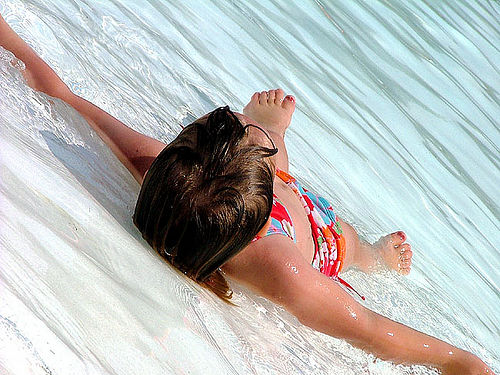

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


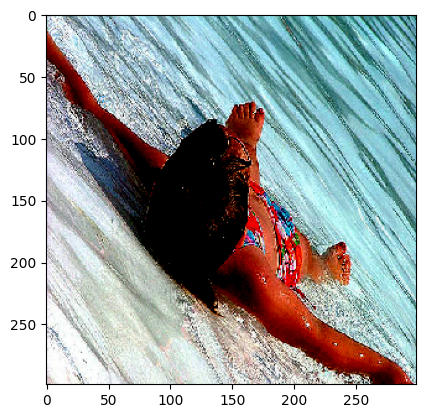

In [31]:
# display original and preprocessed image
example_image = "../dataset/Flicker8k_Dataset/667626_18933d713e.jpg"
display(Image(example_image))
image = preprocess_image(example_image, 299)
plt.imshow(np.squeeze(image))

In [32]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [33]:
# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

In [34]:
def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

In [35]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

In [36]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

In [37]:
filename = '../dataset/Flickr8k_text/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


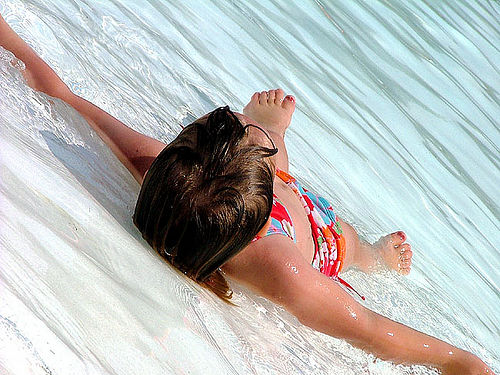

In [38]:
display(Image(example_image))

In [39]:
example_id = '667626_18933d713e'
descriptions[example_id]

['A girl is stretched out in shallow water',
 'A girl wearing a red and multi-colored bikini is laying on her back in shallow water .',
 'A little girl in a red swimsuit is laying on her back in shallow water .',
 'A young girl is lying in the sand , while ocean water is surrounding her .',
 'Girl wearing a bikini lying on her back in a shallow pool of clear blue water .']

In [41]:
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions.txt')

Vocabulary Size: 8763


In [42]:
# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

In [43]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = ' ' + ' '.join(image_desc) + ' '
			# store
			descriptions[image_id].append(desc)
	return descriptions


In [44]:
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

In [45]:
# load training dataset (6K)
filename = '../dataset/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('../dataset/Pickle/features_inceptionv3.pkl', train) #files/features_inceptionv3 or files/features_vgg16
print('Photos: train=%d' % len(train_features))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


In [46]:
train_features[example_id]

array([[0.39258307, 0.17952555, 0.5020331 , ..., 0.31590873, 0.6165921 ,
        0.37674195]], dtype=float32)

In [48]:
# load val dataset
filename = '../dataset/Flickr8k_text/Flickr_8k.devImages.txt'
val = load_set(filename)
print('Dataset: %d' % len(val))
# descriptions
val_descriptions = load_clean_descriptions('descriptions.txt', val)
print('Descriptions: val=%d' % len(val_descriptions))
# photo features
val_features = load_photo_features('../dataset/Pickle/features_inceptionv3.pkl', val)#files/features_inceptionv3 or files/features_vgg16
print('Photos: val=%d' % len(val_features))

Dataset: 1000
Descriptions: val=1000
Photos: val=1000


In [49]:
# load test set
filename = '../dataset/Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('../dataset/Pickle/features_inceptionv3.pkl', test)#files/features_inceptionv3 or files/features_vgg16
print('Photos: test=%d' % len(test_features))

Dataset: 1000
Descriptions: test=1000
Photos: test=1000


In [50]:
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

In [51]:
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer(filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [52]:
def max_len(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

In [53]:
filename = '../dataset/Pickle/tokenizer.pkl'
# only create tokenizer if it does not exist
if not isfile(filename):
    tokenizer = create_tokenizer(train_descriptions)
    # save the tokenizer
    dump(tokenizer, open(filename, 'wb'))
else:
    tokenizer = load(open(filename, 'rb'))
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_len(train_descriptions)
print('Description Length: %d' % max_length)

Vocabulary Size: 7577
Description Length: 32


In [54]:
from keras.backend import clear_session
clear_session()

In [55]:
def rnn_model_1(vocab_size, max_length, embedding_size, units, input_size):
    # feature extractor model
    inputs1 = Input(shape=(input_size,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(embedding_size, activation='relu')(fe1)
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, embedding_size, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(units)(se2)
    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(units, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    print(model.summary())
    return model

In [56]:
embedding_size = 256
units = 256
input_size = 2048
model = rnn_model_1(vocab_size, max_length, embedding_size, units, input_size)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 32, 256)      1939712     ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_1[0][0]']                
                                                                                              

In [57]:
def create_sequences(tokenizer, max_length, captions_list, image):
	# X1 : input for image features
	# X2 : input for text features
	# y  : output word
	X1, X2, y = list(), list(), list()
	vocab_size = len(tokenizer.word_index) + 1
	# Walk through each caption for the image
	for caption in captions_list:
		# Encode the sequence
		seq = tokenizer.texts_to_sequences([caption])[0]
		# Split one sequence into multiple X,y pairs
		for i in range(1, len(seq)):
			# Split into input and output pair
			in_seq, out_seq = seq[:i], seq[i]
			# Pad input sequence
			in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
			# Encode output sequence
			out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
			# Store
			X1.append(image)
			X2.append(in_seq)
			y.append(out_seq)
	return X1, X2, y

In [58]:
def data_generator(images, captions, tokenizer, max_length, batch_size, random_seed):
	# Setting random seed for reproducibility of results
	random.seed(random_seed)
	# Image ids
	image_ids = list(captions.keys())
	_count=0
	while True:
		if _count >= len(image_ids):
			# Generator exceeded or reached the end so restart it
			_count = 0
		# Batch list to store data
		input_img_batch, input_sequence_batch, output_word_batch = list(), list(), list()
		for i in range(_count, min(len(image_ids), _count+batch_size)):
			# Retrieve the image id
			image_id = image_ids[i]
			# Retrieve the image features
			image = images[image_id][0]
			# Retrieve the captions list
			captions_list = captions[image_id]
			# Shuffle captions list
			random.shuffle(captions_list)
			input_img, input_sequence, output_word = create_sequences(tokenizer, max_length, captions_list, image)
			# Add to batch
			for j in range(len(input_img)):
				input_img_batch.append(input_img[j])
				input_sequence_batch.append(input_sequence[j])
				output_word_batch.append(output_word[j])
		_count = _count + batch_size
		yield ([np.array(input_img_batch), np.array(input_sequence_batch)], np.array(output_word_batch))

In [59]:
num_of_epochs = 20
batch_size = 32
train_length = len(train_descriptions)
val_length = len(val_descriptions)
steps_train = train_length // batch_size
if train_length % batch_size != 0:
    steps_train = steps_train+1
steps_val = val_length // batch_size
if val_length % batch_size != 0:
    steps_val = steps_val+1

In [60]:
import random
# Setting random seed for reproducibility of results
random.seed('1000')
# Shuffle train data
ids_train = list(train_descriptions.keys())
random.shuffle(ids_train)
train_descriptions = {_id: train_descriptions[_id] for _id in ids_train}

In [61]:
generator_train = data_generator(train_features, train_descriptions, tokenizer, max_length, batch_size, random_seed='1000')
# Create the validation data generator
generator_val = data_generator(val_features, val_descriptions, tokenizer, max_length, batch_size, random_seed='1000')

In [62]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
# define checkpoint callback
filepath = '../dataset/model_weights/rnn_model_1_inceptionv3.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# define early stopping callback
early = EarlyStopping(patience=1, verbose=1)

In [63]:
history = model.fit(generator_train,
            epochs=num_of_epochs,
            steps_per_epoch=steps_train,
            validation_data=generator_val,
            validation_steps=steps_val,
            callbacks=[checkpoint, early],
            verbose=1)

Epoch 1/20


2022-12-21 18:11:32.595841: W tensorflow/core/common_runtime/forward_type_inference.cc:332] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_40/output/_23'


188/188 [==============================] - ETA: 0s - loss: 5.7975
Epoch 1: val_loss improved from inf to 4.76596, saving model to ../dataset/model_weights/rnn_model_1_inceptionv3.h5
188/188 [==============================] - 32s 150ms/step - loss: 5.7975 - val_loss: 4.7660
Epoch 2/20
188/188 [==============================] - ETA: 0s - loss: 4.4495
Epoch 2: val_loss improved from 4.76596 to 4.19994, saving model to ../dataset/model_weights/rnn_model_1_inceptionv3.h5
188/188 [==============================] - 27s 143ms/step - loss: 4.4495 - val_loss: 4.1999
Epoch 3/20
188/188 [==============================] - ETA: 0s - loss: 3.9642
Epoch 3: val_loss improved from 4.19994 to 4.01065, saving model to ../dataset/model_weights/rnn_model_1_inceptionv3.h5
188/188 [==============================] - 27s 143ms/step - loss: 3.9642 - val_loss: 4.0106
Epoch 4/20
188/188 [==============================] - ETA: 0s - loss: 3.6801
Epoch 4: val_loss improved from 4.01065 to 3.92023, saving model to ../

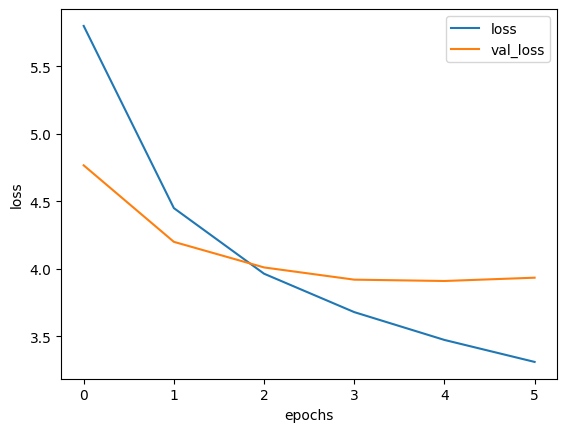

In [65]:
# using rnn_1 and inceptionv3
import matplotlib.pyplot as plt

for label in ["loss","val_loss"]:
    plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
#plt.savefig('models/rnn_1_inceptionv3_loss.png')
plt.show()

In [66]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = ''
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = tokenizer.index_word[yhat]
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == '':
			break
	return in_text

In [67]:
# generate a description for an image using beam search
def generate_desc_beam_search(model, tokenizer, photo, max_length, beam_index=3):
    # seed the generation process
    in_text = [['', 0.0]]
    # iterate over the whole length of the sequence
    for i in range(max_length):
        temp = []
        for s in in_text:
            # integer encode input sequence
            sequence = tokenizer.texts_to_sequences([s[0]])[0]
            # pad input
            sequence = pad_sequences([sequence], maxlen=max_length)
            # predict next words
            preds = model.predict([photo,sequence], verbose=0)
            word_preds = argsort(preds[0])[-beam_index:]
            # get top predictions
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                # map integer to word
                word = tokenizer.index_word[w]
                next_cap += ' ' + word
                prob += preds[0][w]
                temp.append([next_cap, prob])

        in_text = temp
        # sorting according to the probabilities
        in_text = sorted(in_text, reverse=False, key=lambda l: l[1])
        # getting the top words
        in_text = in_text[-beam_index:]

    # get last (best) caption text
    in_text = in_text[-1][0]
    caption_list = []
    # remove leftover  
    for w in in_text.split():
        caption_list.append(w)
        if w == '':
            break
    # convert list to string
    caption = ' '.join(caption_list)
    return caption

In [68]:
def calculate_scores(actual, predicted):
    # calculate BLEU score
    smooth = SmoothingFunction().method4
    bleu1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=smooth)*100
    bleu2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth)*100
    bleu3 = corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0), smoothing_function=smooth)*100
    bleu4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smooth)*100
    print('BLEU-1: %f' % bleu1)
    print('BLEU-2: %f' % bleu2)
    print('BLEU-3: %f' % bleu3)
    print('BLEU-4: %f' % bleu4)

In [69]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, features, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in tqdm(descriptions.items(), position=0, leave=True):
		# generate description
		yhat = generate_desc(model, tokenizer, features[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	print('Sampling:')
	calculate_scores(actual, predicted)

In [75]:
# evaluate the skill of the model
def evaluate_model_beam_search(model, descriptions, features, tokenizer, max_length, beam_index=3):
    actual, predicted = list(), list()
    # step over the whole set
    i = 0
    for key, desc_list in tqdm(descriptions.items(), position=0, leave=True):
        if i % 2 == 0:
            i += 1
            continue
        i += 1
        # generate description beam search
        yhat = generate_desc_beam_search(model, tokenizer, features[key], max_length, beam_index)
        # store actual and predicted
        references = [d.split() for d in desc_list]
        actual.append(references)
        predicted.append(yhat.split())
    print('Beam Search k=%d:' % beam_index)
    calculate_scores(actual, predicted)

In [71]:
filename = '../dataset/model_weights/rnn_model_1_inceptionv3.h5'
model = load_model(filename)

In [72]:
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

100%|████████████████████████████| 1000/1000 [58:14<00:00,  3.49s/it]


Sampling:
BLEU-1: 22.440625
BLEU-2: 12.866775
BLEU-3: 9.394457
BLEU-4: 3.844037


In [76]:
#test_descriptions2 = dict(list(test_descriptions.items())[0: 100])
#test_features2 = dict(list(test_features.items())[0: 100])
evaluate_model_beam_search(model, test_descriptions, test_features, tokenizer, max_length, 3)

100%|██████████████████████████| 1000/1000 [1:23:56<00:00,  5.04s/it]


Beam Search k=3:
BLEU-1: 21.593750
BLEU-2: 12.646465
BLEU-3: 9.705166
BLEU-4: 4.205811


In [77]:
evaluate_model_beam_search(model, test_descriptions, test_features, tokenizer, max_length, 5)

100%|██████████████████████████| 1000/1000 [2:18:22<00:00,  8.30s/it]


Beam Search k=5:
BLEU-1: 20.475000
BLEU-2: 12.087143
BLEU-3: 9.387350
BLEU-4: 4.042529


In [ ]:
evaluate_model_beam_search(model, test_descriptions[0:500], test_features[0:500], tokenizer, max_length, 7)